In [251]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,IsolationForest
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,IsolationForest,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_upload = pd.read_csv('transport_data.csv')

In [252]:
data=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
print(data.head())

          log        lat  request_ts    trans_ts label
0   30.295780  59.932167  1511956827  1511956594     0
8   30.385973  59.944260  1511956827  1511956782     0
13  30.374880  59.938213  1511956827  1511956802     1
17  30.347544  59.932667  1511956827  1511956811     0
23  30.312321  59.937405  1511956827  1511956820     2


In [253]:
questions=data_upload[data_upload.label=='?']
questions=questions.drop(['label'],axis=1)

In [254]:
bad_data=data_upload[data_upload.label=='-']

In [255]:
somemore=pd.merge(data, bad_data, on=['log', 'lat'], how='inner')
display(somemore.head())

log        lat  request_ts_x  trans_ts_x label_x  request_ts_y  \
0  30.29578  59.932167    1511956827  1511956594       0    1511956948   
1  30.29578  59.932167    1511956827  1511956594       0    1511957190   
2  30.29578  59.932167    1511956827  1511956594       0    1511957310   
3  30.29578  59.932167    1511956827  1511956594       0    1511975562   
4  30.29578  59.932167    1511956827  1511956594       0    1512026532   

   trans_ts_y label_y  
0  1511956936       -  
1  1511956981       -  
2  1511956981       -  
3  1511975540       -  
4  1512026521       -

In [256]:
samepos_data=somemore[['log','lat','request_ts_y','trans_ts_y','label_x']]

In [257]:
samepos_data=samepos_data.rename(index=str, columns={'request_ts_y': 'request_ts',
                                                     'trans_ts_y': 'trans_ts','label_x':'label'})


In [258]:
time1=pd.DataFrame(index=data.index.copy(),columns=['day'])
time2=pd.DataFrame(index=data.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=data.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=data.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=data.index.copy(),columns=['request_ts'])
for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day_sat']=time1
data['hour_sat']=time2
data['minute_sat']=time3
data['sec_sat']=time4

for index, row in data.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
data['day']=time1
data['hour']=time2
data['minute']=time3
data['sec']=time4

In [259]:
time1=pd.DataFrame(index=questions.index.copy(),columns=['day'])
time2=pd.DataFrame(index=questions.index.copy(),columns=['hour'])
time3=pd.DataFrame(index=questions.index.copy(),columns=['minute'])
time4=pd.DataFrame(index=questions.index.copy(),columns=['sec'])
time5=pd.DataFrame(index=questions.index.copy(),columns=['request_ts'])
for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['request_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day_sat']=time1
questions['hour_sat']=time2
questions['minute_sat']=time3
questions['sec_sat']=time4

for index, row in questions.iterrows():
    y=datetime.fromtimestamp(row['trans_ts'])
    time1.at[index,'day']=y.day
    time2.at[index,'hour']=y.hour
    time3.at[index,'minute']=y.minute   
    time4.at[index,'sec']=y.second
questions['day']=time1
questions['hour']=time2
questions['minute']=time3
questions['sec']=time4

In [243]:
indexes=list()
#не стоит это запускать

#for index, i in questions.iterrows():
    lat_i=i[1]
    log_i=i[0]
    count=0
    for ind, j in data.iterrows():
        lat_j=j[1]
        log_j=j[0]
        if (lat_j==lat_i) and (log_i==log_j):
            count+=1
        if count>1:
            indexes.append(count)
            break
    if(count<=1):
        indexes.append(count)
    if (index%100==0):
        print(index)
print(indexes)

IndentationError: unexpected indent (<ipython-input-243-04b2fe5dbaf5>, line 4)

In [260]:
indexes=[0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [261]:
to0=[5.722045894884786e-06, 3.6439844464383696e-05, 0.00141171633063479, 4.200499638693695e-05, 1.7584885520395803e-05, 4.077445665243988e-05, 0.005204177239133775, 0.0, 5.544449559688047e-05, 0.0009548789998653273, 0.00016885153216292202, 0.06375331793038531, 7.62939453125e-06, 0.07733107970237127, 0.0, 0.0, 0.00011432960182682578, 2.8863422295713902e-05, 5.006563090670276e-05, 1.6184389828183307e-05, 7.428871953466845e-05, 3.703401153564995e-05, 0.009797493709248853, 0.0, 3.3310411834689965e-05, 8.013134589673135e-05, 1.7584885517313034e-05, 0.009797493709248853, 0.0, 5.275465654731495e-05, 6.070644554964651e-05, 0.06279487648215805, 5.7220458987927714e-05, 0.07828288462399392, 0.0060969928815947285, 4.2862329586494887e-05, 3.814697265625e-06, 0.0010707957828194588, 4.26496119499357e-06, 0.005335801578823026, 3.932099938929987e-05, 0.0, 0.005335801578823026, 6.877043298747642e-06, 0.0001250295762372771, 0.00010898624135712931, 0.0046596808165206465, 1.9073486328125e-06, 1.8785205456527504e-05, 0.00018727016767324184, 0.00017978721228911244, 5.313258467426222e-05, 5.017450881236084e-05, 2.4425980522766453e-05, 4.403456260915831e-05, 0.00018727016767324184, 3.454355292563407e-05, 0.00018727016767324184, 0.0001226204159579882, 0.03625309006315671, 0.0, 0.00011380335913972254, 2.4795532233121357e-05, 2.054277345811875e-05, 0.0, 0.0005271498944194232, 1.9073486328125e-06, 7.448434520859854e-05, 0.043740434863592796, 6.823937919616058e-05, 1.9073486328125e-05, 0.00014896869041182951, 0.00014073079487378476, 2.359259962699684e-05, 0.0, 5.875748367514701e-05, 0.0001999079718233998, 5.875748367514701e-05, 9.536743167615214e-06, 1.9073486292597863e-06, 5.354182757448026e-05, 0.0, 7.629394527697286e-06, 0.00010412097216932653, 0.02658770716189907, 0.0, 1.388570763721192e-05, 5.0355448849429665e-05, 4.65643143280015e-05, 3.0755072587198445e-05, 3.927471214843479e-05, 1.6184389833207605e-05, 4.055078817038129e-05, 0.0, 0.0, 0.0, 3.264854958789546e-05, 5.188549236598819e-05, 0.07281874731066687, 7.629394527697286e-06, 0.0008963016624331899, 0.026536437302422236, 0.00010412097216711379, 0.0008963016624331899, 0.04512821271544297, 9.5367431640625e-06, 0.0, 4.264961199760036e-05, 0.006169846828088208, 5.27546565519391e-05, 0.0006357539488176619, 0.000160987456100534, 0.0, 5.0894409431233516e-05, 5.1885492358152176e-05, 0.0, 3.8194626599668745e-05, 5.7220458984375e-06, 0.0, 9.846427535884758e-05, 0.02222183617095501, 4.041599292834681e-05, 0.008016171513857874, 7.300437626052947e-05, 9.846427535100216e-05, 0.06756884623249909, 2.777141528223188e-05, 5.501634635647939e-05, 0.04396801087502503, 0.006693445107897055, 0.06365891764871595, 0.026842699754096665, 0.007582959965900652, 0.0, 0.020931903306603713, 6.662082365636055e-05, 0.05455608072479625, 0.0003414367157628326, 1.70598447958625e-05, 0.026679458222835174, 3.814697269177714e-06, 0.0, 2.442598051777289e-05, 4.464988674347275e-05, 1.9073486328125e-06, 0.005366141572215651, 3.814697265625e-06, 2.4795532233121357e-05, 3.56322130046289e-05, 0.07202173504239917, 5.3947966096456507e-05, 0.005628457838702239, 0.06814327162872748, 1.7584885517313034e-05, 5.7220458984375e-06, 0.049128359085557224, 2.905186884862389e-05, 0.01187344118132432, 0.0, 2.6497734055838836e-05, 0.0032499972619462972, 8.446346216426729e-05, 0.0017095718055407808, 5.394796614418732e-06, 1.758488551577165e-05, 0.00704757473582504, 5.491706867373748e-05, 0.0, 9.5367431640625e-06, 7.448434520541438e-05, 7.857257814043419e-05, 0.00011195015404132009, 0.0070891817631279965, 7.50681635029839e-05, 1.916861652623411e-05, 0.019431177548732338, 0.008125377932290985, 6.70833793452033e-05, 0.0, 0.07804347523680275, 5.39479660437014e-06, 2.412626388341228e-05, 0.07901966839687738, 0.004804180727184943, 1.9073486329546084e-05, 7.650822113795855e-05, 0.0, 5.7220458984375e-06, 0.0, 3.814697265625e-06, 1.9073486328125e-05, 0.0, 0.0, 0.024946454777099687, 6.496195359765206e-05, 1.078959322130102e-05, 3.8146972620722863e-06, 0.06400990036751537, 0.0, 7.62939453125e-05, 0.00010194952403940404, 0.0009903897444863757, 0.0, 1.2063131942267873e-05, 6.529709917786644e-05, 2.2243316249866566e-05, 0.00014655588312772127, 0.00010406854909158014, 3.411968959808029e-05, 5.9250734584842936e-05, 6.877043299732988e-06, 0.0, 5.206048607756947e-05, 4.973756717836494e-05, 0.0, 0.051892377807277026, 0.030510205868499316, 0.07517462880297478, 3.411968959808029e-05, 2.8863422302756998e-05, 3.8146972620722863e-06, 3.8146972585195726e-06, 0.06323229725744421, 0.0, 0.062214055003539985, 0.00014655588312772127, 5.132150286036555e-05, 5.132150286036555e-05, 0.0, 0.0017160043694368302, 0.0, 0.0014818134938707833, 0.0, 0.0027989098295396, 0.0, 0.0, 0.0, 0.006403672432842614, 5.1639504896582264e-05, 0.00014655588312772127, 0.045565164392207716, 0.06186976588972503, 0.0, 4.2134708470748505e-05, 0.004816218458378056, 0.024974360723200407, 1.9073486399179274e-06, 0.004146596983964022, 0.0, 0.0, 0.003617270464852441, 7.033954206115988e-05, 0.0, 0.0, 6.587950149353436e-05, 0.0, 4.46498867377057e-05, 0.0, 4.464988673891982e-05, 0.02146228961005885, 0.00023379613251281318, 0.00029793738082529655, 3.814697265625e-06, 0.05853133394508841, 4.8851961044423225e-05, 0.023129073571359217, 8.529922402697716e-06, 0.000443555964781399, 0.00021583400711072724, 5.5836796445395886e-05, 4.077445664545994e-05, 0.01613337219738898, 0.030933859077327586, 0.00014298755504103973, 8.767581889771426e-05, 0.0001531709023510318, 0.06389925049759342, 5.531311035389014e-05, 4.077445664545994e-05, 5.2754656548856334e-05, 0.007894104695487295, 0.00014620794598950806, 0.00034128751436771657, 3.6439844463639865e-05, 0.0, 1.0271386729059375e-05, 0.0, 0.0639081972121778, 2.8354775900494587e-05, 9.117445680783935e-05, 0.0, 0.05660226428897422, 4.264961204526501e-06, 0.00011450447860212885, 2.5942746179076088e-05, 0.07936328418064778, 0.06347730434424664, 4.825252777693576e-05, 4.768371581931774e-05, 4.126225977080825e-05, 0.0, 0.0, 0.06593762676960904, 3.6439844463639865e-05, 0.007775795103726425, 0.061898022617451635, 0.07548333052961999, 1.9168616532950767e-05, 0.0, 7.629394524144573e-06, 0.026266624058159396, 0.0622508932042568, 0.0, 1.9073486328125e-05, 4.264961198171214e-06, 7.169702960667611e-05, 0.0017172250718877128, 0.0, 0.0, 4.2134708470105214e-05, 0.0, 0.00032244911893467476, 4.077445664811897e-05, 0.0261092219023126, 0.0, 0.0, 0.06426735999395565, 0.0047583868393055164, 0.01620756153725528, 0.02295347501467574, 0.0, 2.9114413300554912e-05, 0.0, 9.536743160509786e-06, 9.993123549389851e-05, 0.0, 0.0, 0.0001647401648042719, 0.06426735999395565, 0.0008884662512046328, 9.536743160509786e-06, 0.0261092219023126, 0.06416192217886416, 1.0789593216276724e-05, 0.005761991624209746, 0.00010223459841352384, 0.006797779823919048, 4.448663249851456e-05, 0.0040640725533233075, 0.00037951924448136125, 0.026667309638008445, 3.8146972585195726e-06, 0.00648793994690855, 0.0001619899414606588, 0.00014575937785084032, 5.772684460293153e-05, 0.0, 4.718519926778023e-05, 0.06413368085468099, 3.8146972585195726e-06, 0.020944656043350735, 2.0631129887374818e-05, 0.0, 4.718519926778023e-05, 0.0063705515718705625, 6.5297099184093e-05, 5.302978047772757e-05, 0.0, 0.0001619899414606588, 0.05996381651481548, 0.08002223588692763, 0.000811816067072039, 1.3885707640627937e-05, 6.496195360140727e-05, 0.06886931110096405, 0.00012543627202604016, 0.0, 6.773102151484572e-05, 0.0, 0.06272709674494448, 0.00015640258789755712, 8.148196931188136e-05, 5.800974398270781e-05, 0.0, 5.3132584675537564e-05, 7.629394534802714e-06, 0.00011380335914520055, 5.394796614418732e-06, 5.149841307883207e-05, 0.02162170443808207, 0.07752863127077804, 7.629394527697286e-06, 0.020653409088418034, 0.07589600820541238, 6.585188484814479e-05, 0.06266398057443785, 5.2616555112809275e-05, 5.017450880722879e-05, 0.016069714574484698, 2.4425980524430978e-05, 0.03072554898346928, 0.06383224377335926, 0.00013658534080481077, 4.126225977080825e-05, 0.06335036176105646, 0.007591412413066283, 0.0034212289528888925, 0.0011406199985025836, 0.00012640412541031564, 0.008805885746166893, 0.06395296869721508, 0.0005881318091775535, 8.36628425548437e-05, 2.232494336885285e-05, 0.061976259453416886, 1.3885707640627937e-05, 0.00014765638147082397, 0.06385808705996367, 0.0002493671424753306, 0.0, 3.814697265625e-06, 5.6709551800989174e-05, 8.929977349210549e-05, 0.00013658534080768824, 0.08046633554526976, 0.0, 0.026273377307147103, 4.88891815804758e-05, 2.508725440591031e-05, 4.9480902752200495e-05, 0.06224630062734108, 0.0009563047372590349, 6.642942340084072e-05, 6.34892157596054e-05, 0.05787482008787942, 0.00020978233869206345, 0.03125528998834914, 0.059887659394187956, 2.6702880859375e-05, 0.06460444986233523, 0.05084314637525183, 1.629639386237627e-05, 1.9073486328125e-06, 2.5589767195382572e-05, 8.36628425563016e-05, 3.757041092892683e-05, 0.05169149206976426, 9.46975066136596e-05, 0.06029926106767828, 0.04754215563365497, 0.00018654025648493763, 0.0, 0.05392873561134206, 2.5589767195382572e-05, 0.0005661195818827232, 3.814697265625e-06, 7.337716698644423e-05, 0.06460444986233523, 0.0001762724510270556, 1.9451215795870913e-05, 0.07898117438861885, 0.06386879590402661, 0.07898117438861885, 0.04495754749758806, 3.77635762682732e-05, 0.06386879590402661, 0.06250236178942484, 4.1085546929431944e-05, 0.00024521857944209284, 0.026249081567269354, 1.758488552078115e-05, 0.06374729737557616, 0.027342986038722067, 7.854942429341889e-05, 0.027342986038722067, 0.0008986851134556895, 4.9920090974053956e-05, 0.06503772530728495, 0.02896310626027534, 5.39479660437014e-06, 0.00014896869041264828, 0.00934431975545311, 3.1456799518746766e-05, 0.0, 0.0008651629115961374, 0.06503772530728495, 3.814697264914457e-05, 0.035904507048765764, 2.0631129894272235e-05, 5.973991303093618e-05, 5.53131103515625e-05, 2.9051868843958947e-05, 0.0, 3.814697265625e-06, 3.6439844467916894e-05, 2.730907642914977e-05, 2.5589767195382572e-05, 8.33142458574317e-05, 2.5589767195382572e-05, 1.206313195013214e-05,
     2.5589767195382572e-05, 0.07985664716878106, 1.9168616518456932e-05, 2.7508173189078494e-05, 2.5589767195382572e-05, 0.0, 0.0, 0.020796131081713704, 8.566097860154666e-05, 0.06335036176105646, 0.001285231745398932, 1.5377536286989326e-05, 0.06399997047431602, 4.973756718217966e-05, 0.0307155797191234, 2.7771415288087914e-05, 2.3203897592358887e-05, 2.7771415288087914e-05, 0.06399997047431602, 2.442598051000512e-05, 0.019424344457389303, 4.303174656936065e-05, 0.015049376681967661, 2.5589767195382572e-05, 4.264961209292967e-06, 0.001494121280634239, 0.006673058387865688, 0.005088311418679343, 0.0732910709369776, 0.003636337033089895, 0.000933042511645127, 3.104938620144174e-05, 0.0006149594888685637, 0.0001268064128084662, 6.942853822305021e-05, 0.0006149594888685637, 0.0, 0.05847424723497022, 1.206313194339134e-05, 0.0, 2.594274617228487e-05, 5.394796611906584e-06, 2.6702880859375e-05, 3.454355291896443e-05, 0.00010094542405944865, 2.5942746179076088e-05, 7.864199878825032e-06, 6.49619536053711e-05, 2.9793738082529655e-05, 3.057712467552452e-05, 6.877043302689024e-06, 0.007475670903418809, 4.264961199601154e-05, 1.1601948795887412e-05, 0.00010850114939242687, 0.0, 7.036539743689238e-05, 6.773102151234455e-05, 0.004084661355279913, 4.264961201348858e-06, 3.932099939671014e-05, 0.0015116841970784674, 3.932099939671014e-05, 7.829428005107561e-05, 3.890243159522555e-05, 1.9913304352719748e-05, 6.4849853515625e-05, 5.958747616051053e-05, 3.0755072586317124e-05, 0.0004626332988184284, 3.438521647876096e-05, 5.035544884014443e-05, 9.351845300393114e-05, 0.06334719602677753, 0.004319989283718236, 0.001642032217400739, 5.7252239309941275e-05, 0.007389803393473978, 8.228170246665312e-05, 0.009450044024278846, 3.8902431585471125e-05, 0.008664037476171107, 7.036539743689238e-05, 0.008664037476171107, 3.236877965385447e-05, 3.454355292563407e-05, 0.06011217054102429, 9.536743166194128e-06, 0.015290175582649312, 0.02631882060475115, 1.0271386732357986e-05, 3.563221300557977e-05, 0.00041200496494447653, 0.0, 0.0, 0.005592509146341348, 0.005637300777295999, 3.982660869182797e-05, 2.697398304747461e-05, 0.0, 0.0014193647339648635, 3.5987782020505846e-05, 0.0, 7.724173252274584e-05, 0.0, 6.563053334634374e-05, 0.0, 8.572465916919553e-05, 0.0, 9.99312354879991e-05, 0.0, 4.644697441587068e-05, 9.307001418118173e-05, 0.0, 5.2995468107330266e-05, 3.264854959225405e-05, 5.9709456796640505e-05, 4.9591064453125e-05, 0.0, 0.00010412097216425024, 0.0, 0.0, 2.8863422302756998e-05, 0.0, 0.0, 3.833723305176121e-05, 0.00015904359982630133, 0.0, 4.722373353248576e-05, 8.529922409053003e-06, 3.104938620013229e-05, 5.5016346363376805e-05, 0.00023307144730540987, 0.00010078311777796764, 0.00918717389771582, 9.748025771469603e-05, 0.0, 0.0, 0.0, 0.00021365710396077333, 0.00012870010687452934, 0.010804425458175379, 0.00021694361439633455, 9.903530109975563e-05, 0.0052300320319073265, 0.06382825172977834, 0.0, 5.049973408973875e-05, 3.4385216475607856e-05, 3.24249267578125e-05, 6.67572021484375e-05, 0.0, 0.06382825172977834, 3.454355293269603e-05, 0.0005060336473729504, 0.00018536642045683795, 3.618939583017402e-05, 0.005286946092392511, 0.06266398057443785, 2.3203897592358887e-05, 0.0, 5.8009743976283127e-05, 1.0271386732357986e-05, 0.060592234688613494, 1.5377536293599222e-05, 0.0, 2.224331624560157e-05, 7.764103865285079e-05, 0.0, 0.016161198964940497, 0.0005803012220185377, 4.533715944254256e-05, 0.0005803012220185377, 3.927471214049818e-05, 0.00010377098471630435, 0.02664976648139086, 0.0006295290774263546, 3.438521647895803e-05, 1.9073486363652137e-06, 9.764805401741184e-05, 0.0, 9.719995351172372e-05, 0.0, 0.026730728682920375, 0.006357932312440247, 0.0002450107922027525, 6.529709918803647e-05, 0.026730728682920375, 0.010315286331506496, 0.026468983719320365, 0.020160324252419648, 8.940156284597303e-05, 0.00022115376343743507, 4.825252777356536e-05, 6.10649513000916e-05, 0.03672049269898165, 3.6239624019884786e-05, 6.10649513000916e-05, 7.764103865616731e-05, 5.722045901990214e-06, 0.02146798263368683, 2.5942746182471697e-05, 0.0, 2.911441330800278e-05, 1.0271386726420485e-05, 0.0, 7.829428005306623e-05, 0.00011225844550752381, 0.06100672682627567, 1.9073486292597863e-06, 7.93787080658794e-05, 0.0171040765214703, 0.0, 0.07914505220830773, 9.536743167615214e-06, 0.009217402135949163, 0.0086288808405349, 0.011138072210515196, 0.0, 4.722373352732002e-05, 0.0001188080711547656, 0.0, 0.0, 1.1444091796875e-05, 4.7836060348451436e-05, 5.734747459499904e-05, 0.02674555311672576, 0.06977086773719185, 3.0755072587198445e-05, 5.135693366178993e-05, 0.0, 1.9073486399179274e-06, 7.62939453125e-06, 2.9793738080255263e-05, 0.0, 0.06396133360554465, 6.236184205731131e-05, 0.0, 0.0, 0.04341221210818864, 3.814697265625e-06, 0.00014719987016579593, 0.0008831085962857936, 0.06396133360554465, 3.51697710315433e-05, 0.017611683908478275, 1.572839974903347e-05, 5.7726844598940444e-05, 0.00038113102181982, 0.0, 0.0, 2.6973983053503764e-05, 0.06396133360554465, 2.442598052554066e-05, 0.00010116142735424896, 0.0019060788696329796, 0.06396133360554465, 0.0, 0.0, 4.3494240764585034e-05, 6.823937919616058e-05, 6.877043295791605e-06, 5.3711425168746084e-05, 0.07689638371476262, 0.0058829586073156845, 4.959106445449143e-05, 0.009835595309841868, 8.529922396342428e-06, 5.7220458984375e-06, 0.007265036861411678, 0.014845290430543919, 0.0, 0.01227865619063678, 7.62939453125e-06, 0.0001200418012825023, 0.005459316933197674, 0.016364460825550077, 1.572839974903347e-05, 0.0, 1.5258789058947286e-05, 2.32038975952792e-05, 4.813930307054124e-05, 0.0, 0.026462230210213704, 6.942853821768217e-05, 4.5935037908763205e-05, 0.06411424261352895, 4.3536042069036126e-05, 7.724173253151864e-05, 4.213470846656709e-05, 3.6439844465127526e-05, 1.2794883594513642e-05, 0.0, 6.151014517087162e-05, 1.2794883594513642e-05, 0.0, 1.7584885517313034e-05, 1.3885707644043957e-05, 9.622191051618304e-05, 0.0640789832021706, 0.0, 4.264961199760036e-06, 0.02627066017981417, 0.010509021042358119, 0.0, 0.05725458821681262, 4.2862329583174924e-05, 0.06381329028090676, 1.5377536290073946e-05, 1.9073486328125e-06, 0.0017059844799040143, 0.06414599593175836, 2.054277345811875e-05, 0.0001329820099886024, 0.0002800361961640618, 0.0, 6.103515625e-05, 0.013616374867202841, 4.76837158203125e-05, 9.536743160509786e-06, 0.004262215813617249, 0.00015678591390657102, 0.06425646673441471, 0.06400895258626924, 1.7059844791096036e-05, 0.0, 0.00014500868079763576, 0.00021956888476734623, 0.0003938571014091013, 0.002029024530388477, 0.0, 0.0002696116736068922, 2.9854728398320253e-05, 9.5367431640625e-05, 0.00013038510254486302, 9.734954952728385e-05, 0.0, 0.005961050386241893, 0.00010137697040563318, 9.485104948714561e-05, 0.0, 0.015617567791643132, 0.008604787052044, 0.06036920783343914, 0.00019877647703205533, 0.009656613032974326, 0.009965792021133606, 2.4126263880041877e-05, 1.2212990257221923e-05, 0.029529216721349418, 2.4795532218637216e-05, 0.0, 8.938121423667189e-05, 0.07430996297488392, 0.03070469337360647, 0.07474264386588277, 0.003853146852759462, 6.48498535093555e-05, 1.572839976282002e-05, 0.003853146852759462, 0.01696719067416687, 0.02604522795590043, 0.06400895258626924, 0.08026699366837119, 0.004720303683590761, 2.5942746182471697e-05, 0.07836869398347047, 0.01563090684466135, 0.05847424723497022, 0.02604522795590043, 2.5942746182471697e-05, 0.0529107841128898, 3.6638970777214174e-05, 5.188549235397296e-05, 0.00012537825340085842, 1.1444091800427714e-05, 0.00629979005435104, 0.0065656159729215405, 0.0, 0.003612387391961302, 8.446346216234184e-05, 4.126225977080825e-05, 6.529709918803647e-05, 3.838465079148504e-05, 0.0, 0.0002777141528877112, 0.025878091242057928, 6.576896533800761e-05, 2.8354775907903008e-05, 6.151014517395623e-05, 0.0010463072075275377, 0.000570679858401169, 0.0001347754732247493, 0.022795850799163977, 0.00010071089768997779, 0.003612387391961302, 0.007032519598835424, 4.5776367183947286e-05, 5.188549235710737e-05, 0.007491292350335606, 0.01721172858960148, 0.02473960945119912, 0.0, 8.529922399520072e-06, 0.023715924733421562, 0.0, 2.911441330800278e-05, 6.908710585126814e-05, 0.0009296069727627212, 6.995056465489292e-05, 3.5169771033855376e-05, 1.9451215800748125e-05, 8.190502378254474e-05, 3.281526667709532e-05, 0.0, 2.4425980522211612e-05, 0.00018855759565997426, 6.484985351875975e-05, 7.179843987735564e-05, 0.0, 0.0001429493860057963, 0.02752403322255684, 0.06399436879081871, 0.06306563180245532, 0.0547659031019929, 1.375408659158321e-05, 7.033954205615038e-05, 0.0001335144042954539, 2.677091380128831e-05, 0.026671345004433872, 1.388570763721192e-05, 0.0, 8.7820926156779e-05, 0.0, 0.026671345004433872, 1.388570763721192e-05, 1.375408659158321e-05, 0.0639294505536328, 0.00019040078469025054, 0.0019344286202906248, 0.044174649758374915, 0.0, 5.6709551803617964e-05, 0.01101856089552037, 5.3541827577770826e-05, 3.057712467552452e-05, 3.259278772475254e-05, 0.06400895258626924, 0.003710283379413426, 9.021174309762003e-05, 0.06272181277041892, 0.00021454916883113635, 0.0803064868933002, 3.438521647895803e-05, 0.00013016169676454786, 5.737918456035275e-05, 3.264854959225405e-05, 0.06398711210482858, 0.027248575158362633, 0.007865761691752644, 0.0, 0.001821800529562024, 0.07527230504765241, 0.0, 6.212805738749954e-05, 8.047112697312679e-05, 2.4425980514443846e-05, 0.0641186179635057, 5.737918456035275e-05, 2.9793738082529655e-05, 0.0, 0.06393464564628262, 0.06409686116384185, 0.0019060788696329796, 0.010914381534894154, 1.0789593223813167e-05, 4.1831421278879755e-05, 0.026485167642993215, 0.007507527017187028, 5.354182757422714e-05, 0.00014340674390170586, 0.026351619745159087, 0.0, 0.026869672844475077, 0.06415880587305661, 6.484985351875975e-05, 0.0, 0.0, 3.9826608686043064e-05, 2.1324805996575828e-05, 2.412626388678268e-05, 0.0, 2.2967518957036932e-05, 3.703401153016073e-05, 0.06393464564628262, 7.41907132674283e-05, 3.703401153016073e-05, 0.0001645634049234237, 0.05260717373586317, 7.62939453125e-06,
    3.814697265625e-06, 0.061869426609383965, 5.035544884660372e-05, 0.0004992045535194843, 9.993123548454083e-05, 0.0, 2.412626388678268e-05, 0.0019060788696329796, 0.001776786111826596, 7.864199876240053e-06, 0.001776786111826596, 3.174460788172386e-05, 0.031293996372500195, 0.06268837610853359, 3.814697265625e-06, 0.0035623717436583002, 0.01622637746285042, 0.020000092515630473, 0.0001220852127473143, 0.0076520973023287125, 3.438521647600199e-05, 0.06364460572752216, 0.008187695628353852, 0.08006449554702237, 0.009555219681113756, 0.02227146608049152, 0.068077756804032, 0.07913326894394822, 9.330425116988699e-05, 0.06394411367186578, 6.52970991849232e-05, 5.163950488949625e-05, 0.001429169343131739, 2.886342229923545e-05, 0.0, 0.00018488496118244376, 3.757041093902709e-05, 6.866455078125e-05, 0.0001313857276857007, 0.0, 0.00014053678146765193, 0.0, 0.020796131081713704, 0.051779239449005685, 0.0004154212328054492, 1.33514404296875e-05, 0.06314189785252541, 0.0767102348681702, 2.0275394077169576e-05, 0.0, 0.0, 6.340320640466062e-05, 0.0008663835924682461, 0.026376904095226555, 1.9073486328125e-05, 1.078959322130102e-05, 0.06314189785252541, 0.06400895258626924, 0.0, 0.026209960514251274, 2.5942746182471697e-05, 0.0, 0.06379200120427884, 0.012899896712774696, 8.047112697851606e-05, 0.06314189785252541, 0.001866128887080018, 0.026376904095226555, 0.0, 0.0004046457094169958, 0.0004046457094169958, 6.563053334840871e-05, 4.69145731973604e-05, 0.06314189785252541, 7.033954206154522e-05, 0.0014407857054870427, 0.0, 0.06375736268160004, 6.484985351875975e-05, 0.0722038755921687, 0.007236811751463966, 1.7059844799040144e-05, 7.367404141371146e-05, 1.758488551384492e-05, 2.288818359375e-05, 0.06279487648215805, 0.0004191178911619592, 0.010697492804639023, 0.0, 0.00017671561923065902, 0.06397491671058629, 0.00044848657757564, 3.438521647994337e-05, 8.996945507103543e-05, 4.885196103554578e-05, 0.06381922411989746, 3.814697265625e-06, 0.00011121658124567712, 0.0004012691640335826, 6.890255686757037e-05, 1.7059844806984253e-05, 3.814697269177714e-06, 5.570633646587461e-05, 4.640779518296559e-05, 0.0, 0.0, 9.061411682296527e-05, 4.023556348748968e-05, 0.010697492804639023, 0.0, 0.026311139853146082, 0.04353866651347462, 0.0001312194867139162, 5.7220458984375e-06, 0.0, 0.038089469150257835, 3.814697265625e-06, 0.020365878095355092, 0.016061189398392472, 0.06314189785252541, 0.0, 7.552715253403426e-05, 0.010697492804639023, 1.375408659158321e-05, 5.394796606882288e-06, 0.015973363377854568, 6.662082365636055e-05, 0.0, 0.02916332067732927, 0.06314189785252541, 0.0755017346199897, 0.016211002620629533, 0.0, 0.0, 5.394796609394436e-05, 0.017180868398163227, 0.0, 2.2967518961462486e-05, 0.06314189785252541, 0.00011009879829148721, 0.019487987601089253, 0.06314189785252541, 0.0001249713687963956, 5.394796611906584e-06, 7.780486317651621e-05, 0.0016466915223377386, 0.005906404317957217, 8.19272292966302e-05, 0.0, 6.454057432437375e-05, 0.04502505027110572, 0.0, 0.01511836778163769, 0.07902068624139741, 0.0, 0.057512750498146845, 4.2649611994104954e-05, 8.148196931063392e-05, 0.05547383732746145, 0.0, 4.2350012419079816e-05, 0.0005186199833705906, 6.151014516029578e-05, 0.03131557941922909, 0.0001519188518656912, 2.7309076430638564e-05, 0.06314189785252541, 8.237008240810023e-05, 0.0, 0.00016654113733507599, 0.0035833512625265515, 0.02865573551072441, 0.06314189785252541, 0.0, 0.0, 1.5377536290514603e-05, 0.010068428056255194, 4.108554693734861e-05, 0.0036027351888884306, 7.593547529491459e-05, 2.9051868842559466e-05, 5.421703492340907e-05, 0.00614257000208501, 0.02240501898865917, 0.0, 0.0061253874019939055, 3.438521648467303e-05, 0.0, 0.016990190237364044, 0.0, 5.3947966092939504e-05, 0.0, 4.4486632492421705e-05, 1.7059844799040144e-05, 7.07777989008087e-05, 0.005629910332925965, 0.06364426204707725, 3.703401153564995e-05, 5.7220458984375e-06, 2.677091377977308e-05, 0.06314189785252541, 5.7220458984375e-06, 0.021427390878441553, 0.006679025104441599, 0.0, 0.0803793864213143, 5.9709456796640505e-05, 0.007909774780274709, 2.697398304697218e-05, 9.382914639154315e-05, 0.0, 0.05416185040202486, 0.016938370268473352, 0.06401414045967817, 0.06298129880262107, 1.4896869041264828e-05, 0.06400895258626924, 0.023477602280001078, 1.8785205466267034e-05, 0.06401414045967817, 0.006902701817150724, 0.025071373642848668, 0.00010223459841597626, 0.00011097097936539205, 0.0076520973023287125, 0.06401414045967817, 0.0004657368875170146, 0.0076520973023287125, 0.005410491855169987, 0.06314189785252541, 9.212711086509039e-05, 1.9073486328125e-06, 7.250434039302335e-05, 0.0067910911694710994, 1.9073486328125e-06, 1.7059844799040144e-05, 0.015280297022296687, 0.02345980635750799, 0.0, 1.9073486328125e-05, 0.003977911728929712, 0.0575254895641002, 0.0, 0.026384721509500192, 0.06314189785252541, 0.026384721509500192, 0.0, 0.04331830575223494, 6.877043291850224e-06, 0.0773523934097141, 1.2212990258331604e-05, 0.0019189377610458697, 0.014978281057248435, 3.2648549596612635e-05, 4.825252777131843e-05, 3.2592787725999984e-05, 0.021435879300696306, 0.00021119095665994887, 3.395937693551036e-05, 0.03573312434613396, 5.135693366178993e-05, 2.886342230181792e-05, 0.0, 0.03573312434613396, 2.288818359375e-05, 0.00535965271267515, 0.0791626859832071, 0.05346167580147566, 0.0267293692409118, 5.7220458984375e-06, 0.00019157225844558288, 1.9073486292597863e-06, 0.00043879383355146937, 0.0001079633460852425, 0.0, 4.264961204526501e-06, 8.400999277097013e-05, 0.06461681672940188, 0.06364088727799892, 0.0, 4.609316243559835e-05, 1.9073486328125e-06, 6.03156597102159e-05, 0.0634830356068965, 2.7508173175283658e-05, 7.03395420630866e-05, 0.04577221215782297, 0.07910757590177071, 0.06366477033332446, 7.69822543053363e-05, 0.0, 0.0, 5.371142516735832e-05, 0.06260600128435159, 0.026301709209785588, 0.06421397774125963, 3.0755072587639105e-05, 0.06366477033332446, 1.1444091796875e-05, 0.06292241671814543, 0.00025629542590699503, 0.0001520265745299497, 0.07902861805988204, 0.0008248571684878607, 4.0550788162694435e-05, 0.06366477033332446, 0.06224604045931958, 0.02656476952520494, 0.00015570321374053597, 0.06816217811324023, 2.3282157155123735e-05, 0.06224604045931958, 0.03044642886569256, 0.00019065855407345868, 0.0, 5.006563090453719e-05, 2.594274617228487e-05, 0.012071506881342616, 0.014753367319802485, 1.9073486399179274e-06, 0.00019928827020150212, 2.0275394077169576e-05, 6.877043296776951e-06, 0.06366477033332446, 6.823937919616058e-05, 0.06314189785252541, 0.06314189785252541, 0.0, 3.8337233054589274e-05, 0.01784044679078995, 3.8146972620722863e-06, 0.0, 0.06314189785252541, 4.609316243442226e-05, 1.907348633025663e-05, 0.00016193378660004333, 0.026605250217894394, 6.942853821338774e-05, 0.07963999723226813, 4.2004996393873726e-05, 0.021325147278264487, 0.0005253663618040664, 0.0, 5.049973409537449e-05, 0.0, 0.0, 1.629639386778185e-05, 0.00019484852278462677, 0.06400895258626924, 0.02083521366636604, 0.009932567222718675, 0.00022865920365365157, 0.00015880324017714424, 4.76837158203125e-05, 3.145679951185349e-05, 2.508725440239891e-05, 0.0054711018022607074, 3.145679951185349e-05, 1.9073486363652137e-06, 3.761879524863438e-05, 0.0001079633460852425, 4.8290210346878675e-05, 5.609680621464836e-05, 0.0, 0.00013461341848543514, 2.0542773464056252e-05, 3.8146972620722863e-06, 0.0001344511684369646, 0.00033308227467592974, 2.558976720332668e-05, 0.0, 6.484985351875975e-05, 0.004937250318348166, 1.9073486328125e-06, 0.0001435968797662255, 0.055401464632343765, 1.0789593213764577e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06279487648215805, 0.0, 6.348921576643619e-05, 0.007400340884465751, 1.2794883607224217e-05, 0.0, 0.00393905360730769, 0.0, 3.814697265625e-06, 0.0, 0.07742775915037828, 0.012645721435546875, 7.864199877101713e-06, 0.0, 1.9073486363652137e-06, 1.5728399755926745e-05, 0.011322620406853548, 0.06314189785252541, 0.0, 0.0, 0.02664992073804857, 0.0018611852837662544, 7.62939453125e-06, 1.70598447958625e-05, 0.0, 0.0015529753914880384, 1.3351440433240214e-05, 0.02106106149536479, 0.06421175219187515, 8.110157633006783e-05, 2.3203897591774824e-05, 2.5660751427806136e-05, 0.06421175219187515, 0.0, 0.00012953130224208198, 0.00010965181238187872, 0.0, 0.0, 0.0, 0.0009991448786319343, 2.063112988638947e-05, 3.7034011537113744e-05, 0.0, 0.007587796294117031, 4.6407795187054026e-05, 5.132150286511883e-05, 2.1324806000071238e-05, 0.0, 5.017450881182062e-05, 0.059875166500366256, 0.00011110203459706925, 2.7771415286135903e-05, 1.9073486363652137e-06, 0.00019073486328125, 7.406802306379797e-05, 0.030791571395394037, 3.814697265625e-06, 0.00011375539818357479, 0.0003161369225336928, 5.722045901990214e-06, 0.0001119501540438018, 0.0, 0.0, 5.504939913712701e-05, 5.810373768651841e-05, 0.008464578786036491, 0.0, 0.05490317468059347, 3.6837020713478025e-05, 2.7508173185137114e-05, 0.00016720606188293284, 0.06387535738097239, 0.004304591765899946, 2.157918644260204e-05, 0.00016995749977070208, 0.019249091297248194, 3.0517578125e-05, 0.0, 0.005664550890193788, 4.3494240764585034e-05, 0.005664550890193788, 0.0, 1.9073486331677714e-05, 0.0, 0.0, 0.06400895258626924, 3.2424926761156234e-05, 9.536743160509786e-06, 2.442598051832773e-05, 3.833723305529629e-05, 0.0009748398965849758, 0.029017866334547563, 0.026305745203536193, 0.0, 0.06253848076359671, 0.0, 7.448434519940999e-05, 2.132480599880018e-05, 0.026305745203536193, 9.5367431640625e-06, 3.05771246753029e-05, 0.0, 0.06314189785252541, 0.0, 4.023556348748968e-05, 0.0, 4.81393030675852e-05, 0.00010013126181340552, 2.985472839673143e-05, 0.06353126897107175, 0.0, 0.06395358908443459, 7.903423063316597e-05, 0.08052718508775113, 0.08035989653170517, 7.62939453125e-06, 5.750584957057165e-05, 0.0, 2.697398304697218e-05, 7.62939453125e-06, 0.005664667775949531, 0.0001280198989449703, 5.772684459753182e-05, 4.7223733534925135e-05, 0.060561121507816965, 0.0, 6.397441799163407e-05, 1.375408659158321e-05, 0.06400895258626924, 0.060561121507816965, 0.00407996496193687,
    0.016141436215566674, 1.6184389833207605e-05, 0.0171040765214703, 0.021867250236279497, 0.0, 8.850179869025804e-05, 0.024998653996005486, 0.0, 0.021269356029821468, 0.02369530519526307, 6.942853822734462e-05, 0.00814661178526426, 0.022351897343410504, 0.02860577001784817, 0.06314189785252541, 0.06374937578570371, 0.012922650152649482, 6.510180727339177e-05, 0.00016206852559723665, 9.5367431640625e-06, 0.05473339175447552, 0.029032348695385027, 0.010743835983794307, 0.0, 9.314815861698322e-05, 0.064148427642069, 0.044762941873262754, 0.000160987456100534, 0.004821889006856179, 0.055001664697184226, 0.03134053177781435, 0.06420409366163442, 0.00012291674412613673, 0.0, 0.030819619132671516, 2.132480599880018e-05, 0.06314189785252541, 0.0, 1.9168616526587622e-05, 0.06314189785252541, 0.0, 0.0, 0.07804170662900435, 5.354182757422714e-05, 2.7508173193019877e-05, 0.07757534765448953, 5.354182757422714e-05, 4.609316242971786e-05, 0.0, 0.0, 3.838465079942914e-05, 0.0, 0.007445554227997765, 3.0755072587198445e-05, 8.874809359841798e-05, 2.2967518949661013e-05, 0.0, 0.001429169343131739, 0.07816063861536264, 0.0002416016762358298, 6.87704329480626e-06, 0.07241242071012693, 8.022209489751088e-05, 7.864199871931754e-06, 1.9073486328125e-05, 0.0069229556463422295, 1.7584885508835423e-05, 0.06389889603148481, 4.4527502170605475e-05, 0.0001126466603106186, 6.719175321124472e-05, 3.264854959225405e-05, 0.0001222043493623317, 7.013235591884255e-05, 3.814697269177714e-06, 0.0004200542942619664, 3.0814160193775346e-05, 3.5169771023836385e-05, 3.075507258543581e-05, 0.0, 5.570633646587461e-05, 3.814697269177714e-06, 1.878520546915282e-05, 3.28152666783343e-05, 2.911441330125315e-05, 0.0, 0.0, 7.327794155997675e-05, 2.4425980522211612e-05, 1.2212990257221923e-05, 0.00010371838473756808, 1.0271386732357986e-05, 0.06380041033927863, 0.06387201452939638, 0.00021744610954388445, 0.00010605956096235538, 3.814697269177714e-06, 2.0275394077169576e-05, 0.0, 3.814697269177714e-06, 0.06314189785252541, 0.0, 5.7220458984375e-06, 0.0010463072075275377, 4.023556348748968e-05, 0.022124008275741867, 4.2134708469461916e-05, 0.009801619475255853, 2.412626389015308e-05, 0.008846885204992883, 1.629639386902929e-05, 0.0002180809412697725, 1.629639386902929e-05, 6.877043301703678e-06, 1.4896869045813611e-05, 5.7220458984375e-06, 0.0, 0.0005199650670943274, 0.0, 8.444192361160365e-05, 0.010659826651575189, 0.029481646143218083, 0.02736919838825503, 0.00014172254935545733, 0.000167553819572187, 1.1444091793322286e-05, 0.00013109466764403977, 1.9073486331677714e-05, 0.000167553819572187, 0.0, 6.791875387321567e-05, 2.9051868843958947e-05, 0.003646852581069839, 0.0, 0.0, 0.06314189785252541, 0.0, 0.0, 7.864199879686691e-06, 6.56305333413878e-05, 0.06314189785252541, 0.0685371542975356, 0.019831710860300486, 0.00011356335180392753, 0.06178880424468489, 3.8146972585195726e-06, 5.421703492565878e-05, 0.033562793148264915, 3.8003652275179814e-05, 0.0, 1.9073486292597863e-06, 0.000259742790046254, 8.616910551864891e-05, 0.006099887305889535, 0.0, 7.679299216917952e-05, 0.04443234076573831, 0.0, 1.5728399749895128e-05, 0.010587733321401465, 2.0275394082516956e-05, 7.62939453125e-06, 0.005674774731937896, 1.9073486292597863e-06, 0.06400895258626924, 1.3885707644043957e-05, 0.00011271123277812315, 6.294250488636521e-05, 0.06400895258626924, 1.71661376953125e-05, 2.4795532230115214e-05, 6.294250488636521e-05, 0.02658231252780376, 0.0, 9.5367431640625e-06, 3.932099938292359e-05, 0.005307154299687293, 0.0, 0.0, 0.06383104164123898, 0.043613121742621004, 7.676930159568065e-05, 5.275465654731495e-05, 5.8757483675954296e-05, 0.00015000299636932308, 0.06396937732451304, 0.0044989907051813756, 9.5367431640625e-06, 4.2862329586494887e-05, 3.814697265625e-06, 0.06314189785252541, 0.027023486132002086, 5.27546565519391e-05, 5.1179534393942786e-05, 0.00019255721228512098, 8.411818340759256e-05, 0.06314189785252541, 0.06047080789181907, 0.026278771956394605, 3.618939583579135e-05, 0.026665950373570585, 8.411818340759256e-05, 0.020931144131519516, 0.00027251066288785377, 0.08037371008425963, 0.0266605557427769, 0.007661106958705528, 0.023715924733421562, 0.06824933696743046, 0.006120468675637254, 0.04511446604659069, 0.0475563463462982, 0.016226859152708332, 0.0, 0.04953228639952627, 3.454355292563407e-05, 7.250434039750944e-05, 0.027653323083324268, 0.0, 0.014165401129690868, 0.02678063978225296, 0.04511446604659069, 0.00013020361454865712, 3.814697265625e-05, 4.718519926778023e-05, 5.461815285829954e-05, 0.07951494745326484, 0.0, 4.6407795180045275e-05, 0.0004252360951427335, 0.026240757092104976, 0.06388717815711557, 0.06314189785252541, 5.7220458984375e-05, 0.0261222876010608, 0.0, 0.0005470467408498603, 0.0624795441102221, 0.02122792493250922, 0.02623693378802881, 0.03170142234270237, 0.0016269091274425016, 0.00015345565098198456, 1.2212990259996125e-05, 0.02624504545391012, 0.00016077263269719327, 0.02650946411454647, 0.03170142234270237, 0.0, 8.734323991656048e-05, 0.026357014391180333, 0.026750947742131992, 0.02624504545391012, 8.566097859458536e-05, 0.06400895258626924, 5.371142517921741e-05, 0.0, 0.06418855191530623, 0.0, 0.07951681542247004, 0.06400895258626924, 1.5377536294039883e-05, 8.7738037109375e-05, 0.0, 0.06319586448346612, 0.0002703864310710045, 6.49619536053711e-05, 3.819462660676531e-05, 0.0780967232122557, 0.0, 0.02634486639162322, 0.06529550350893557, 0.026576917893776957, 0.0001841357175620601, 0.06347445395067043, 3.982660869182797e-05, 4.095251188316452e-05, 3.814697265625e-06, 0.06400895258626924, 4.2350012419079816e-05, 0.0, 4.00543212890625e-05, 0.007943179888158031, 1.6296393855723254e-05, 0.015970147981318582, 9.53674315624653e-06, 0.05853133394508841, 2.328215715919843e-05, 1.33514404296875e-05, 1.1444091800427714e-05, 0.06471150037539743, 1.1444091800427714e-05, 0.0, 0.06471150037539743, 3.927471214843479e-05, 6.142136455022474e-05, 6.877043299732988e-06, 0.00015565647707445652, 0.00013519321553750714, 2.8863422302756998e-05, 0.057857398863461466, 2.8610229497871843e-05, 8.411818340759256e-05, 3.814697265625e-06, 6.374654757335054e-05, 0.04741672690797264, 0.0, 3.516977103077261e-05, 7.088052435469805e-05, 8.591541770627257e-05, 0.020773494370694204, 3.8003652273931674e-05, 3.0755072587198445e-05, 0.07549500050333346, 0.06279832489922396, 0.002355031093414882, 0.00012368387478520651, 0.0001247236841113628, 0.00010013126181557108, 0.023393672347476555, 6.496195360224176e-05, 1.5728399759373383e-05, 3.814697269177714e-06, 6.773102152054838e-05, 5.394796609394436e-05, 1.078959322130102e-05, 0.0, 4.165712293066786e-05, 2.232494337128108e-05, 5.135693366865105e-05, 3.8146972620722863e-06, 6.317327560754299e-05, 5.850929890082708e-05, 6.877043298747642e-06, 5.163950489002114e-05, 3.814697265625e-06, 0.00630855697263516, 8.978730999634476e-05, 0.0006149594888685637, 3.833723305176121e-05, 9.725607897294452e-05, 2.979373809026259e-05, 6.877043296343399e-05, 0.0006433733198260005, 0.0074972971579008105, 0.0005175210138595567, 0.012871916455253455, 3.6439844467916894e-05, 0.0, 0.03606166411405279, 0.06400895258626924, 0.0002618908445339066, 1.9073486329546084e-05, 0.06400895258626924, 0.030974260555627915, 7.829428006250003e-05, 0.0, 4.4527502169235843e-05, 8.529922405875359e-06, 5.570633646587461e-05, 2.4795532220003643e-05, 5.117953439553161e-05, 0.062267886664275664, 5.117953439553161e-05, 2.508725440591031e-05, 0.08054135576131785, 1.9073486331677714e-05, 0.0, 0.0007256051577027684, 3.145679951357681e-05, 0.030974260555627915, 6.0945683701896076e-05, 0.023441755525005405, 0.0630276790636076, 0.000707119762950265, 0.026390741027780266, 0.06400895258626924, 3.814697269177714e-06, 0.0, 1.9073486328125e-05, 0.020691112166445674, 0.0, 3.374444201340258e-05, 7.167165461903568e-05, 0.0009607226265596104, 5.7220458984375e-06, 0.00010315564943352391, 0.006320572636153186, 7.593547529982262e-05, 0.006434869660054819, 2.0542773464715972e-05, 0.00025942746179180565, 2.697398304697218e-05, 2.9793738082529655e-05, 3.8146972620722863e-06, 0.026504069477171013, 0.026787901812140046, 0.026263146528602302, 7.829428006604852e-05, 4.12622597717936e-05, 2.730907643138296e-05, 1.9073486323861744e-05, 0.0, 0.06341995066873832, 0.00014921270154108937, 0.06452151405931514, 0.06953979401017087, 5.501634636633284e-05, 0.00013885707643507153, 2.6497734049701317e-05, 1.279488359292482e-05, 0.00021341859025699218, 0.00011445681143705366, 0.05852289398370668, 5.006563089898794e-05, 0.005575213658965315, 1.3885707644043957e-05, 0.0, 3.618939583017402e-05, 0.00022584167657226334, 0.00025621734440154715, 4.593503791141854e-05, 4.6564314335859835e-05, 3.70340115394924e-05, 6.576896533975915e-05, 0.006312995510257982, 0.00025621734440154715, 0.0, 7.864199877101713e-06, 3.4385216475607856e-05, 8.190502377923541e-05, 3.145679951357681e-05, 1.6184389830695457e-05, 0.06388568464609486, 7.62939453125e-05, 4.165712292871585e-05, 3.814697265625e-05, 0.021433957113329793, 0.018848616543615908, 0.0, 0.06407245475709317, 5.501634636633284e-05, 0.06407245475709317, 0.0002833488208825592, 6.247840634978942e-05, 7.564747625075162e-05, 0.026722615238599225, 2.8354775900494587e-05, 0.0010209661491454732, 0.06279487648215805, 1.5377536286108005e-05, 5.188549236154778e-05, 8.110157632772835e-05, 2.5660751432559414e-05, 0.016226859152708332, 2.594274618116569e-05, 0.016905542272821504, 0.0, 0.0788325899780317, 0.0161979678931404, 5.163950489303926e-05, 2.1579186437577746e-05, 0.038078592477437744, 5.1885492358152176e-05, 9.351845301088722e-05, 1.206313194339134e-05, 8.734323991283654e-05, 0.06059180131583856, 7.428871954114474e-05, 0.0, 0.00639178936628862, 0.014834953041669428, 0.030733615864190864, 5.3947966093944364e-06, 5.135693366178993e-05, 0.000160942253946422, 4.7185199266918575e-05, 8.047112697918972e-05, 0.0313244746298181, 0.0, 3.8902431585471125e-05, 1.758488551230354e-05, 2.4795532231754927e-05, 1.2063131945638273e-05, 0.045529432249360936, 0.023326601789487107, 6.103515625e-05, 5.504939915263688e-05,
    0.027471165997785398, 3.8146972659802714e-05, 0.003576526378955758, 0.0, 0.0010390709486999708, 3.104938621060788e-05, 0.06403068641708458, 0.0, 0.06287140746652561, 0.014943654894897308, 0.012226485605002132, 0.01626270866912078, 0.0, 0.0, 0.0, 0.0002840669074757784, 1.160194879530335e-05, 0.0365684130859593, 3.454355292563407e-05, 2.132480599880018e-05, 0.0, 3.2424926761156234e-05, 3.331041182167059e-05, 0.00017978721228911244, 0.0202757364287517, 8.529922399520072e-05, 4.264961199760036e-05, 5.394796611906584e-06, 1.945121579238719e-05, 0.0, 0.006184230506449652, 0.005946589380177393, 0.00012302029034791246, 0.05460299505164486, 0.0, 0.0014086360441188924, 1.9073486328125e-05, 0.0, 0.0, 0.007829313700064861, 0.00019301011109426145, 0.00029894305376682603, 6.0706445552213855e-05, 5.42505746974625e-05, 0.023129073571359217, 0.006903898087332113, 0.0, 0.0, 0.0, 1.758488551577165e-05, 0.06400123025476287, 3.9135521946038985e-05, 8.506432770148376e-05, 3.814697265625e-05, 1.1444091800427714e-05, 0.01621871468690839, 2.320389758827045e-05, 0.006903898087332113, 0.0004793937809375479, 3.438521647935217e-05, 1.9073486324572286e-05, 0.06016678597508032, 0.0, 3.583582731197604e-05, 7.337716697979514e-05, 0.00011502751374735913, 0.00010640202088061897, 0.006903898087332113, 0.016653239937694533, 0.07742775915037828, 3.857373888540061e-05, 3.6439844467916894e-05, 6.610001926865943e-05, 2.4425980524430978e-05, 0.0786112126685769, 0.0, 5.722045901990214e-06, 8.529922399520072e-06, 5.722045901990214e-06, 0.021175594548699297, 0.062338389244654215, 0.0, 2.697398304747461e-05, 2.5589767198560217e-05, 0.0, 9.37709697944146e-05, 0.06400123025476287, 0.0, 0.006746339298995938, 8.19272292896825e-05, 0.006746339298995938, 0.01295186475979584, 0.014970703965605002, 4.779801973438162e-05, 0.008793692230379188, 1.078959322130102e-05, 1.0789593211252428e-05, 0.0, 0.015898082548909197, 0.0, 0.06400123025476287, 0.0, 0.035755612480241866, 3.9274712146709445e-05, 0.0, 5.5016346368303535e-05, 0.021222519955341357, 0.000286610469914278, 0.007068355336589695, 3.145679951185349e-05, 0.00308425999947468, 1.0271386734996876e-05, 0.0, 0.0037835340756691583, 0.000133691397920106, 4.76837158203125e-05, 0.0, 4.779801973778407e-05, 0.0, 6.877043302689024e-06, 4.768371581818087e-05, 0.0, 0.0014263142363591952, 9.890664797027979e-05, 6.866455078125e-05, 3.438521647895803e-05, 0.0002572093400495755, 0.0, 5.6709551797643435e-05, 1.0271386734996876e-05, 5.4618152859788335e-05, 3.104938620842546e-05, 0.04365481104087825, 0.03618235756484563, 2.7508173193019877e-05, 0.00028427174189836073, 4.286232957969686e-05, 3.9826608688425084e-05, 0.006759010612528581, 9.777836317425763e-05, 5.39479660437014e-06, 0.06991637725850963, 0.02051173973300871, 3.563221300557977e-05, 6.877043295791605e-06, 0.0637243520636916, 0.06232393705549599, 1.9073486363652137e-06, 0.0024800234128656605, 0.07473444610953217, 0.00010978444237638977, 0.006903898087332113, 4.264961199760036e-06, 0.0, 3.6439844464383696e-05, 6.209877241554148e-05, 0.026390741027780266, 0.0, 8.047112697076898e-05, 6.823937919616058e-05, 2.3203897584766073e-05, 0.0, 0.020343876099375362, 5.635561639519387e-05, 0.006903898087332113, 6.397441799640053e-05, 0.0005972042283202963, 0.0001684632680245536, 0.0, 0.034707228971243405, 0.0001684632680245536, 0.0016279821155735178, 1.8785205465906313e-05, 0.0, 0.00011004922285303331, 1.9073486332388256e-05, 9.353790157623787e-05, 9.544369509274905e-05, 0.0, 0.07099741104654642, 1.0271386732357986e-05, 0.0, 0.00016296393862276476, 0.0, 5.343981065772327e-05, 8.572465917172502e-05, 7.782823853722826e-05, 0.00011627007029553817, 3.4332275390625e-05, 0.03504288114464663, 2.232494337219167e-05, 0.03459337540145298, 1.5728399755926745e-05, 0.06450227151499041, 7.864199877963372e-06, 0.0, 4.593503792056468e-05, 0.016210201330011626, 0.0, 0.06398765338930962, 4.183142128535935e-05, 0.0, 5.035544884660372e-05, 0.00028319470829754346, 1.5728399754203426e-05, 0.0, 0.0, 8.529922399520072e-05, 2.985472839673143e-05, 0.0, 0.0, 0.0, 2.1579186440089893e-05, 0.06391443498498445, 5.9250734588388284e-05, 8.71556065276784e-05, 0.00785306762544773, 0.0, 0.0001354217529296875, 0.0, 0.02021285237087096, 3.1282843522234676e-05, 0.005795434173542944, 0.016003256548915733, 0.0, 0.006213929914463335, 0.011316812511021696, 2.1324806000071238e-05, 2.442598051999225e-05, 0.062380579413437505, 0.0260490551664718, 0.00012710729279898664, 6.291359901164374e-05, 3.814697265625e-06, 2.697398304747461e-05, 0.00018707580315001265, 6.291359901164374e-05, 0.06403698122643475, 0.05996925083607168, 0.059917019469527204, 0.04492834115267464, 6.291359901164374e-05, 7.506816350930268e-05, 3.9320999389816864e-05, 5.2754656542305456e-05, 0.07963421563252888, 0.0033906441538108173, 1.375408659158321e-05, 0.028782944315549445, 0.08078547121804812, 0.02400833729953647, 0.07908908825568065, 0.0, 0.0, 0.02097000813734228, 0.07582984308735975, 0.0, 5.9709456796640505e-05, 0.05973111963145302, 8.825481644675898e-05, 0.03860567434777103, 3.814697269177714e-06, 1.9073486328125e-06, 3.7034011531624524e-05, 1.1444091796875e-05, 0.0, 0.0, 0.016139249417504973, 0.06266001489174984, 0.0628243892871221, 0.0, 0.0, 5.670955180218408e-05, 3.77635762632489e-05, 0.0, 0.00014364754015234102, 6.96116927718201e-05, 0.0, 0.02631789315252258, 0.026543190981854325, 0.02400460392083965, 8.648516883370069e-05, 0.06450227151499041, 0.05549769144585179, 0.01670631848933494, 1.1444091796875e-05, 0.0002482192762018679, 0.00023394391030939865, 0.005204177239133775, 0.0, 2.288818359375e-05, 0.0, 2.0275394082516956e-05, 0.06407839074109119, 0.009579106652488605, 0.030226300876673745, 4.353604206281024e-05, 1.3885707647459976e-05, 7.884989398497446e-05, 3.9274712146709445e-05, 0.07212733979677549, 0.06401557641738784, 0.016244026090426533, 0.06353020166927087, 2.7771415286135903e-05, 0.0002012501380356099, 0.0056192925032064415, 0.050721469072066705, 0.06386508529547961, 6.911342976376891e-05, 0.0, 6.348921576344772e-05, 3.6439844464383696e-05, 0.06386508529547961, 0.0001503300513803791, 6.209877241488676e-05, 0.007280630556505358, 0.06912771831740565, 0.004860230096394118, 0.02093764002818995, 0.02638262892892331, 0.00141171633063479, 2.6702880862927714e-05, 1.2063131949008673e-05, 8.316127531658798e-05, 0.0, 0.02735506961248376, 0.00012040492326775631, 1.9451215797264404e-05, 0.02638262892892331, 0.0, 4.2004996386775624e-05, 0.06386508529547961, 7.327794156608e-05, 2.412626388678268e-05, 8.33142458574317e-05, 0.06450227151499041, 2.3203897596447325e-05, 0.07985369594994589, 1.5728399755926745e-05, 2.7508173186122458e-05, 0.06385344465473519, 0.00013913189868802555, 3.814697265625e-06, 4.7223733534925135e-05, 5.7220458984375e-06, 0.05400098397508087, 0.044830054307660065, 6.529709918886668e-05, 0.0, 0.00037789096591482965, 0.0, 0.013783570202491827, 0.05722717271201182, 0.06370621860627534, 0.004250620467986969, 0.026458194437196936, 0.007004193478926813, 6.162832038887014e-05, 0.02028146287365722, 1.9073486328125e-06, 0.06419026456955584, 0.0008475240926294757, 5.275465654731495e-05, 0.06407857863396524, 0.02632896625892143, 0.020914739101686883, 9.1333922526881e-05, 0.06450227151499041, 8.540578147183711e-05, 0.0, 0.0046596808165206465, 0.010543945556078781, 0.009953483260989073, 0.0, 0.0, 0.006203279843295679, 0.07905076864533522, 0.00010696468271491969, 1.705984480221779e-05, 0.00014064028858814831, 0.0004972330215386971, 0.0, 0.0005393987329131355, 1.3754086596509939e-05, 0.06266398057443785, 0.06391382560172724, 0.0001666284917285275, 2.0631129881462745e-05, 0.06375802810885865, 3.8146972620722863e-06, 0.006387041910643689, 0.0, 0.00021585928880512247, 9.53674315624653e-06, 0.008048522401040599, 0.0, 0.03941800076107407, 0.04331425487779026, 4.2649611988067425e-05, 5.461815286475098e-05, 8.359759140324069e-05, 3.8146972585195726e-06, 2.558976720173786e-05, 0.0002132480599880018, 0.05190466923307964, 3.814697265625e-06, 1.8785205463020523e-05, 3.8146972585195726e-06, 0.06450227151499041, 0.06390996417049029, 0.06010332043678196, 0.0, 0.05516523209854484, 8.782092615647037e-05, 0.0, 0.02027944158020909, 4.2649612000778e-05, 0.027325635696419825, 0.0, 8.891191116620727e-05, 0.00019514702700751383, 0.00017398741809053362, 0.06225348472741188, 9.5367431640625e-05, 4.464988674772215e-05, 5.343981066178093e-05, 0.0, 0.04011980358045309, 8.6063493140296e-05, 8.88300401455311e-05, 0.0, 0.0, 3.7618795251696585e-05, 5.461815286053273e-05, 0.06384249891934446, 2.8354775905274214e-05, 3.6189395832420954e-05, 7.676930159568065e-05, 0.06834454761465712, 4.077445664678945e-05, 2.0631129887374818e-05, 0.0001831452008691811, 0.0, 3.264854959142384e-05, 0.07796661780937948, 3.075507258014789e-05, 3.480584638766224e-05, 0.0272976831710674, 0.05774601088847252, 0.0809349253062459, 0.0272976831710674, 2.2967518958807153e-05, 0.019333697232754153, 0.08034416109731841, 8.825481644637508e-05, 2.2967518958807153e-05, 3.4119689596491465e-05, 0.02060409562227171, 0.00014557206651431875, 0.004521115164502875, 5.3947966093944364e-06, 5.554283057617583e-05, 9.141355107221339e-05, 0.0, 1.705984480221779e-05, 0.0, 0.04543649546651236, 7.09574708470851e-05, 2.8610229486503157e-05, 1.1444091796875e-05, 0.006853897479799705, 3.583582730857238e-05, 3.264854959495222e-05, 4.264961199760036e-06, 0.00906816307049143, 0.023541147822365372, 0.0, 9.644849303876607e-05, 3.0755072581029206e-05, 0.0, 0.0076363055399108455, 1.9168616525527096e-05, 9.5367431640625e-05, 4.26496119499357e-06, 2.508725440591031e-05, 0.0015152849554532944, 0.009583776271620152, 0.0001936217229652468, 0.06319093681015238, 3.932099939067852e-05, 5.925073458438548e-05, 2.412626388341228e-05, 0.0, 0.06450227151499041, 0.0, 1.5377536293599222e-05, 0.0053467826882361074, 0.0, 1.206313194676174e-05, 1.6184389833207605e-05, 5.394796614418732e-06, 0.00011831712661541932, 5.922002676834068e-05, 0.0002520299783169434, 0.001429169343131739, 1.0789593218788873e-05, 0.0038522195781782215, 6.823937919616058e-05, 0.01100561581408363,
    0.0038522195781782215, 0.00015269514129823304, 5.006563091441757e-05, 2.2967518964117816e-05, 4.8290210343370577e-05, 2.3592599634751775e-05, 0.00010406854908532924, 0.0, 0.060544421185676364, 0.05809874872033222, 5.6709551804334913e-05, 0.06391382560172724, 2.0542773464715972e-05, 3.814697265625e-06, 0.05439561155473138, 0.01024203663658319, 1.7059844805395433e-05, 1.9073486363652137e-06, 0.0, 6.094568370434215e-05, 2.2967518957036932e-05, 0.020354545534039155, 0.061976259453416886, 2.9793738085713805e-05, 0.07719881425670719, 0.07409044725407032, 0.06796746427989639, 0.06308462100442558, 1.758488551384492e-05, 6.662082365636055e-05, 1.027138673631632e-05, 2.8610229488634786e-05, 5.8757483675954296e-05, 0.06369359825690228, 0.0, 1.6184389835719752e-05, 5.810373769958025e-05, 0.00015173914416236503, 0.00014364754016281338, 0.000456924463953593, 0.0010780485655642034, 3.6439844460850505e-05, 4.403456260561895e-05, 0.06450227151499041, 6.877043298747642e-06, 7.688768146799611e-05, 0.00012327139764447423, 0.007603537612459315, 5.117953439712043e-05, 0.02674555311672576, 0.06450227151499041, 8.411818341145928e-05, 4.2649612000778e-05, 2.6497734049701317e-05, 8.529922399520072e-06, 3.643984446717306e-05, 0.0, 5.343981066178093e-05, 0.04490673448843264, 2.0542773468014586e-05, 8.572465916698222e-05, 0.009003422593802886, 0.04401206970214844, 0.07770661742607268, 0.00017052379483545416, 0.06892861202609706, 9.8094107592892e-05, 0.0003343740460660659, 0.006449728380065104, 3.814697265625e-06, 0.026688888153349896, 0.0060435640923986855, 0.0, 0.020866223618757167, 4.303174657550203e-05, 1.375408658961252e-05, 0.04379043976043497, 0.00010250113557095785, 3.4332275390625e-05, 0.06291573634393147, 5.394796609494922e-05, 0.007801047513999247, 2.2243316252303706e-05, 5.394796609494922e-05, 0.00013481595647787153, 3.9135521940844525e-05, 0.0009536590575046651, 0.029783609970104537, 3.814697265625e-06, 0.051490388739567884, 0.0002365419921558188, 2.5942746182471697e-05, 0.0, 2.0275394087864333e-05, 0.030821522898213417, 3.454355292563407e-05, 6.0945683709790233e-05, 0.015925940319598514, 8.978730999362783e-05, 0.0003343740460660659, 0.06691913487826966, 0.01038394649936602, 0.0, 3.814697265625e-06, 0.03480938699692381, 0.0, 0.006166601784069085, 6.314447539232959e-05, 0.007486479205217593, 7.622238617968783e-05, 0.0, 0.0015515316872860142, 0.0015079940260579409, 8.366284255775951e-05, 0.0003343740460660659, 0.004298718690888497, 0.001429169343131739, 0.0, 8.529922399520072e-06, 0.009566311773970488, 0.00141171633063479, 3.618939583017402e-05, 1.9073486328125e-05, 1.0271386734996876e-05, 3.6189395823433216e-05, 1.0789593218788873e-05, 0.0009624534875941124, 0.029939066775539338, 0.00141171633063479, 1.618438982567116e-05, 0.07083392405462677, 3.814697265625e-06, 0.00515570306959751, 0.0, 0.06229654144623013, 0.06407087275719249, 4.973756717836494e-05, 1.5728399755926745e-05, 1.5728399755926745e-05, 0.0, 2.9051868842559466e-05, 0.0, 6.340320639675181e-05, 0.026321929152549155, 0.0, 2.3203897591774824e-05, 4.055078817272077e-05, 0.014934645514768717, 0.0, 9.5367431640625e-06, 0.060594563278711516, 0.034872968290669965, 0.0, 0.07949702908032372, 1.758488551384492e-05, 0.00018310546875, 2.0980834964490214e-05, 0.0, 5.7220458984375e-06, 2.4795532233121357e-05, 0.011653121572608678, 0.0, 0.0, 5.7220458984375e-06, 0.020272137197905285, 1.7584885519239762e-05, 0.0006872598231226803, 0.0006541204792956453, 4.055078816503391e-05, 0.06340990145408212, 3.411968959808029e-05, 3.932099939671014e-05, 0.0015357994405482101, 0.0, 3.8146972620722863e-06, 0.07544006440769986, 0.001429169343131739, 7.126442601458263e-05, 0.0, 0.018060158864825874, 7.126442601458263e-05, 0.00019108739698572359, 0.0, 2.7771415286135903e-05, 0.07812607457587949, 4.023556348748968e-05, 0.0641954277598111, 2.224331624560157e-05, 2.7771415286135903e-05, 0.0, 8.806912521477725e-05, 0.02898082284445638, 0.06228187393833029, 9.584308263421074e-05, 4.213470846592379e-05, 1.9073486363652137e-06, 0.02718556257619493, 2.6702880859375e-05, 0.02718556257619493, 0.03336132065461898, 0.0016279821155735178, 0.0, 0.026390741027780266, 4.5776367191052714e-05, 0.07455170108051346, 0.00024333463186711676, 0.0, 0.0, 0.005672426935574974, 1.9073486292597863e-06, 0.07227265269531269, 1.7059844800628965e-05, 6.91134297654357e-05, 5.772684459401027e-05, 4.88519610399845e-05, 7.629394530539457e-05, 0.0, 0.0, 0.000996388410482254, 0.00025697585744571583, 0.0, 4.0235563497762974e-05, 0.026570164161205806, 0.00011601948796202806, 7.857257814397012e-05, 0.04752316817748912, 0.00025697585744571583, 0.00014345747143916144, 0.0, 2.2967518964117816e-05, 9.956652172956991e-05, 0.014679640205762456, 2.9793738084804047e-05, 0.006067391124352908, 0.0, 0.0001249713687963956, 0.0, 0.004222101780923877, 1.0271386726420485e-05, 0.00141171633063479, 6.340320638467486e-05, 0.03456980973790043, 0.021098558556793514, 0.00141171633063479, 9.734954952192406e-05, 9.725607897935457e-05, 3.814697265625e-06, 3.411968959808029e-05, 5.661324341287492e-05, 1.758488551577165e-05, 0.0, 5.163950489356415e-05, 0.014991739020680872, 5.135693366178993e-05, 0.05453575557361729, 0.01521054281791066, 0.06450227151499041, 2.0275394082516956e-05, 0.0007933676192390122, 0.056559056818744645, 3.411968959490264e-05, 0.005493329628465748, 0.0019106188396322411, 0.0, 0.0, 0.0, 0.0, 0.026497315849005196, 0.0, 0.0, 1.0271386731698264e-05, 0.005392802863634659, 0.00010885263880516074, 0.0, 0.0, 7.523759049907005e-05, 1.9073486328125e-06, 0.016628639932827118, 4.264961200395565e-05, 9.421607235129142e-05, 5.734747459499904e-05, 0.0791626859832071, 9.918212891335543e-05, 0.00573049334999383, 9.353790157276055e-05, 0.0, 2.8863422295713902e-05, 3.0755072595130326e-05, 3.9135521940844525e-05, 0.06228439679753262, 0.06282013829819504, 9.045338212434083e-05, 0.0, 4.779801974232067e-05, 5.3711425168746084e-05, 5.722045901990214e-06, 5.922002676582333e-05, 5.7220458984375e-06, 2.0542773468014586e-05, 0.00015024532770967236, 5.813503514910954e-05, 1.7584885517313034e-05, 0.0001093028929282715, 0.05215645980346286, 1.7584885517313034e-05, 0.0, 8.094442433607046e-05, 0.0, 0.00022368084972600844, 0.0, 0.0642013184881111, 0.00014843045393149898, 4.0952511889617706e-05, 5.531311034408955e-05, 5.7220458984375e-05, 0.06450227151499041, 0.0026959311953866525, 6.837252932768845e-05, 0.06450227151499041, 3.395937693551036e-05, 3.8146972620722863e-06, 5.2616555112809275e-05, 7.864199877963372e-06, 5.465144646723552e-05, 0.007356117245524327, 2.508725440591031e-05, 8.529922399520072e-06, 7.864199878825032e-06, 7.477682412758904e-05, 0.00010264300573551907, 1.3754086597495284e-05, 7.864199877963373e-05, 0.02164559072921902, 0.0001750193748029542, 3.075507258411383e-05, 0.0, 3.814697272730427e-06, 1.9073486363652137e-06, 0.028904210958402555, 0.0, 0.04410557696569744, 7.62939453125e-06, 2.5942746173590872e-05, 4.055078816503391e-05, 5.722045894884786e-06, 0.00010087332017309802, 0.02954267521060762, 0.0, 3.145679951185349e-05, 0.0, 0.0, 4.825252777131843e-05, 0.026227502955678866, 2.5942746179076088e-05, 3.51697710315433e-05, 0.026227502955678866, 9.627860613714109e-05, 0.005696685540808187, 0.04543275492725688, 0.00010072895756920542, 0.007276958738216635, 6.0315659712462834e-05, 6.348921576344772e-05, 0.02105044175818477, 0.004575187107154161, 0.0, 0.0, 4.5776367191052714e-05, 6.58518848487622e-05, 1.6184389830695457e-05, 0.00015115061001708184, 0.06504589498244218, 4.235001241699973e-05, 3.104938620711602e-05, 9.2265217762036e-05, 0.07922379355660082, 2.442598051999225e-05, 4.055078816737339e-05, 0.0061270878506125195, 1.5728399756788404e-05, 0.005719666304115402, 0.02537633420344632, 0.0, 1.52587890625e-05, 0.0001878230030999028, 9.536743160509786e-06, 0.00011195015404489131, 0.0, 0.04482319385167429, 2.7309076429894168e-05, 0.0, 0.0, 1.9073486292597863e-06, 2.7309076429894168e-05, 0.0, 2.7309076429894168e-05, 0.0076150676199088115, 8.529922402697716e-06, 0.0634152736649593, 2.5087254397807076e-05, 5.9709456799818146e-05, 0.06450227151499041, 0.0, 0.0, 5.0355448853063016e-05, 0.0, 0.004579485281579708, 5.722045901990214e-06, 0.07957072893274489, 3.643984446196625e-05, 0.0808037533031144, 4.45275021728882e-05, 5.8009743980021124e-05, 0.00012561016712233156, 4.200499638387186e-05, 0.017980414507499622, 0.0009293095022824197, 0.00013595797262254462, 0.07238018473763234, 0.022059515629330808, 0.0, 0.0, 0.016555234574647627, 0.0, 0.0, 0.06270779808285255, 0.06300269009332517, 0.000171661376953125, 0.0037529661727417575, 7.310397299429056e-05, 0.06450227151499041, 0.062093294622838364, 0.061931084600391935, 3.411968959808029e-05, 1.5728399752480107e-05, 0.0007209803061420135, 0.0, 0.063885440578792, 1.2063131936650539e-05, 0.0007232473869851822, 0.0001888660430133862, 3.4332275390625e-05, 0.0, 0.0, 0.06279170626481857, 3.331041182818027e-05, 5.2892397399376096e-05, 0.0003251064414532136, 4.7185199268641894e-05, 5.0894409419250595e-05, 0.0, 2.979373808434917e-05, 0.0, 4.436379757085351e-05, 0.06376660959819123, 0.03504288114464663, 2.0631129887374818e-05, 0.02297838018349476, 1.629639386237627e-05, 0.06376660959819123, 3.236877965385447e-05, 0.0, 0.015786534697367474, 0.0, 0.03606863742401263, 4.948090275548723e-05, 0.017262892693658292, 0.0, 1.221299026443485e-05, 0.0, 0.0171040765214703, 0.0, 0.0001534082295806724, 0.0, 1.7059844805395433e-05, 1.489686904899776e-05, 1.0271386732357986e-05, 0.00037333395781431094, 9.5367431640625e-06, 0.0, 0.04511446604659069, 3.6439844467916894e-05, 2.2243316252303706e-05, 3.4332275390625e-05, 0.0, 4.264961204526501e-06, 0.05023586995332545, 0.05858544949632643, 4.2649612077041455e-06, 0.0, 0.0009587818703311945, 0.005996362237188198, 0.005230828078636365, 0.0, 0.06385860659342465, 2.5087254410502145e-05, 0.0, 1.9073486363652137e-06, 0.0016382570381787314, 6.209877241554148e-05, 4.264961199760036e-05, 0.0, 0.0021948038987063133, 3.197298929917265e-05, 4.6407795187054026e-05, 0.003212509654446541, 7.287968893230059e-05, 0.07914505220830773,
    0.03530893432946452, 0.0, 0.00024108162398233857, 0.00141171633063479, 3.683702070152111e-05, 0.05853133394508841, 0.0, 6.115424935104904e-05, 0.07231464064796883, 3.683702070152111e-05, 0.016728328303226687, 0.06450227151499041, 0.0, 0.022903323967414898, 5.0174508814251594e-05, 0.0001154536891969418, 3.4332275390625e-05, 0.005672355104555003, 0.000435026042372346, 0.0, 0.0, 0.03530893432946452, 0.07942458138488845, 1.33514404296875e-05, 5.39479660437014e-06, 0.00010202086731198374, 9.067431888149798e-05, 0.0, 4.264961193404749e-06, 6.759660776775112e-05, 2.9793738085258928e-05, 0.0, 6.106495129998063e-05, 0.021710623600244672, 0.0, 4.9037781264296534e-05, 7.013235592348036e-05, 0.00017271776462589482, 0.08014279239370066, 0.037578434837852254, 3.17446078798027e-05, 0.01324218791230941, 3.932099938757655e-05, 0.04618909108709048, 1.9073486324572286e-05, 0.005960830677220297, 0.0001423883980275684, 3.66389707844271e-05, 4.108554692613333e-05, 3.0755072587639105e-05, 0.023360403499985565, 0.0, 4.779801973778407e-05, 9.536743163920391e-05, 0.006301534657115275, 0.0006869527341387533, 3.4119689593313824e-05, 0.010638585591464862, 0.0, 0.06389140953936855, 0.07548277702303746, 0.005447377343795729, 2.86102294921875e-05, 0.06291573634393147, 3.2815266672139384e-05, 5.394796599345844e-06, 0.06403589715754736, 1.3885707642579949e-05, 5.394796599345844e-06, 3.454355291896443e-05, 0.006169264532659938, 1.4896869041264828e-05, 0.00010804755431058774, 0.017307694846168013, 0.0, 0.026559374889266865, 0.0, 0.00011069197180262466, 1.9073486331677714e-05, 0.00013153793067601521, 0.02634878808033473, 4.6132608880357014e-05, 0.026531042664723285, 0.009129957324108116, 0.0, 0.05854178377412686, 0.0, 0.006225765041038307, 0.0, 0.06398195120876576, 4.6132608873306454e-05, 5.3846718648884216e-05, 1.2063131937774006e-05, 0.0, 3.6239624019884786e-05, 0.06398195120876576, 0.0, 0.0, 0.005342518589452554, 0.06407437724150469, 0.026351619745159087, 0.0, 0.0, 5.570633646027905e-05, 0.06368960303518632, 0.06219103245224902, 0.0, 3.48058463882463e-05, 1.1444091793322286e-05, 0.0, 9.993123548454083e-05, 0.06279487648215805, 0.00010013126181340552, 0.00019844677015957654, 0.0, 0.00011110203459597141, 0.05969664323459498, 1.9073486328125e-06, 0.020805766301349945, 5.6355616392308083e-05, 6.554733382956661e-05, 0.06279487648215805, 1.9451215795870913e-05, 0.051829048524224264, 2.054277346603542e-05, 0.05574764091982233, 0.0316952094465457, 0.02646494801393937, 5.7220458984375e-06, 0.001448831864534984, 0.016226859152708332, 0.0011112970024524521, 8.817233529149033e-05, 0.0007684508572232364, 0.062459556571850885, 9.109461926132812e-05, 3.0517578117894573e-05, 9.650505555387152e-05, 5.822882660855769e-05, 0.0, 2.9854728401497893e-05, 6.877043302689024e-06, 0.006705990690207045, 0.0007019975849051634, 6.58795014921972e-05, 0.06318668247103253, 0.08076392376382283, 5.340576171875e-05, 0.04431033136962358, 0.07814238010831491, 0.02360938819903152, 2.4795532231754927e-05, 0.030156123661147786, 4.783606035128455e-05, 0.0, 0.0, 3.236877965385447e-05, 0.005246806508252602, 1.0271386735656598e-05, 0.004856298777091297, 0.0, 0.0, 0.0003757041092604105, 0.04395018027419442, 0.026479773001702293, 0.0, 7.829428005895154e-05, 6.815936426917206e-05, 0.000870971492564385, 4.992009097663306e-05, 3.833723305211472e-05, 2.3203897584766073e-05, 8.87480936015485e-05, 0.005204177239133775, 0.06450227151499041, 0.026479773001702293, 6.236184205589872e-05, 0.01597509876019568, 4.948090275521333e-05, 4.5935037913483794e-05, 0.014784444783345554, 0.0, 5.394796606882288e-06, 0.0, 0.0005541069367813222, 3.814697265625e-06, 0.016834449205120807, 0.06396351414879257, 9.599479318593557e-05, 0.011600701519352209, 0.0, 0.06115740540591567, 3.0755072587639105e-05, 0.025887206903937313, 0.0758915547675526, 1.3754086588627174e-05, 1.2212990257221923e-05, 6.408804937763639e-05, 0.0, 0.05273204595226647, 1.7059844799040144e-05, 0.05693942381324658, 4.0952511886473845e-05, 0.06381913180114233, 0.0005803012220185377, 9.536743164844097e-05, 0.0, 0.0, 0.0, 6.877043288894187e-06, 0.0, 7.310397299975948e-05, 0.01963270267279292, 0.01613978036649182, 4.813930307054124e-05, 1.572839974731015e-05, 3.8194626607120135e-05, 0.026603891064582986, 0.060156637990155935, 0.06363392292850512, 0.00011356335179599149, 8.529922396342428e-06, 0.0, 0.07798380350951342, 2.132480599880018e-05, 0.022778854643025866, 4.20049963866143e-05, 4.779801973806761e-05, 0.06450227151499041, 0.07619397461012241, 2.3203897587102326e-05, 1.945121579378068e-05, 0.03055989216787179, 0.06202790789240446, 0.04487749329092157, 0.0, 2.5589767198560217e-05, 1.52587890625e-05, 6.585188485164344e-05, 8.7820926156779e-05, 0.00013307772477797402, 0.0, 4.718519926778023e-05, 0.0006193011510869682, 0.005970403700346219, 8.470002483815963e-05, 1.3754086594539247e-05, 0.00011790130203998656, 0.026149260880174115, 4.0235563491026386e-05, 0.06325817837812658, 1.52587890625e-05, 0.02633407709579907, 0.0018361190458208111, 0.006294820644102605, 8.792442758386775e-05, 0.0, 0.06380222031046005, 0.0002587886239054345, 4.2649612000778e-05, 0.056921350888204755, 4.973756717781997e-05, 0.0, 1.1601948796471475e-05, 2.7771415288087914e-05, 2.886342229829637e-05, 0.0, 0.01620582949728524, 0.001570039909711855, 0.0019160947545151879, 0.0794231316689718, 0.07866558562162479, 0.006142047609380681, 4.469060712379448e-05, 0.06377814444770585, 4.108554692283472e-05, 0.0005766915194520405, 0.02633407709579907, 3.814697265625e-06, 0.01724668562156733, 2.558976720173786e-05, 0.0001069646827175804, 2.5942746181949295e-05, 0.021233279361083966, 2.5942746182471697e-05, 0.00010983413734377324, 0.0, 0.0, 0.0, 0.0, 6.496195360578835e-05, 7.940162009650888e-05, 2.442598051222448e-05, 1.9073486323861744e-05, 0.0, 0.0, 3.411968959808029e-05, 0.05777079861037543, 6.314447539232959e-05, 8.792442757616083e-05, 0.0, 9.037290755836115e-05, 2.8610229497871843e-05, 0.00018727016766535365, 4.718519926433359e-05, 3.259278772724743e-05, 0.04559380956752533, 0.0, 0.0, 0.04447222700555033, 7.0028532982747e-05, 2.979373807934551e-05, 0.0, 0.0, 0.0640467876880464, 5.035544884014443e-05, 0.0, 0.0001313857276817294, 0.015071970394510132, 3.6638970779988376e-05, 0.030575969385681568, 0.01523534941403472, 0.030789436672886247, 2.3203897596447325e-05, 0.014733717948244147, 0.0, 2.3203897596447325e-05, 2.5087254409421714e-05, 3.814697265625e-06, 5.3132584682169385e-05, 0.08023762430582383, 0.005610792395970437, 0.00030927880103633255, 1.3754086595524594e-05, 1.4896869033531896e-05, 0.07582576697465512, 0.0, 9.567212069690287e-05, 0.010880087052380192, 0.006344960860041784, 4.9737567174277726e-05, 7.337716698164211e-05, 1.8785205460134736e-05, 5.461815285829954e-05, 5.734747458790935e-05, 0.03783283512071479, 1.572839976454334e-05, 0.009115042707704218, 1.9073486328125e-06, 7.287968892876739e-05, 3.075507258279185e-05, 0.00014922489161734505, 9.314815862855002e-05, 0.0, 5.822882660180806e-05, 0.0, 0.00966190319602049, 0.0, 0.004137770753856286, 1.9073486328125e-06, 0.007736169609947059, 0.035248852379762316, 2.0542773468014586e-05, 0.02515690116722601, 0.005213273364242949, 9.956652172623509e-05, 3.4385216482308205e-05, 0.0019464200759173585, 2.9114413304278845e-05, 0.00012070669046246903, 4.8139303073497276e-05, 8.0108642578125e-05, 9.14135510670986e-05, 0.0, 0.020027256919991895, 0.0627009028507794, 2.5087254410502145e-05, 3.0755072587198445e-05, 0.0001050427994846678, 0.00023381947206149354, 0.06218551446387501, 0.005906793885895488, 6.408804938324028e-05, 2.7309076426668446e-05, 0.00014805006690787588, 0.02625044010487582, 7.629394534802714e-06, 0.0, 0.06242898871715094, 5.7220458984375e-05, 4.825252777356536e-05, 0.0002403562012027491, 9.650505554713072e-05, 0.00017564185231540985, 0.0007389296063831189, 5.7220458984375e-05, 3.480584638766224e-05, 3.3310411830011124e-05, 3.4543552926418726e-05, 0.05853133394508841, 5.8757483675954296e-05, 0.026560733992077694, 0.005619621700883951, 0.0005155489614456542, 0.0050551086602991634, 8.792442758826069e-05, 0.0, 2.566075142727799e-05, 3.814697265625e-06, 1.9451215799354637e-05, 0.00010406854909158014, 4.718519926174862e-05, 7.688768146799611e-05, 2.6973983039938166e-05, 2.32038975952792e-05, 0.0036122751002970097, 3.0517578125e-05, 0.0637973490518077, 6.496195360516248e-05, 0.0637973490518077, 0.00011475836910700634, 8.254655841210328e-05, 6.256568705313388e-05, 4.264961199760036e-06, 0.0054032328698748215, 8.698848152698891e-05, 0.00023002339831834444, 5.9709456796640505e-05, 0.022942320060706713, 1.9073486328125e-06, 9.559603947244923e-05, 0.054289443346646246, 0.0, 0.005802716623602203, 0.006264771295265364, 4.264961193404749e-06, 0.000993763415996542, 7.149377751568603e-05, 7.792166982961844e-05, 2.359259962613518e-05, 4.656431433294934e-05, 7.688768146306073e-05, 2.2888183600855427e-05, 7.5719578707387e-05, 2.2243316252303706e-05, 1.5377536293599222e-05, 0.007604509778403812, 0.0, 0.062261412556363194, 4.7836060348451436e-05, 0.01681137128240915, 4.8252527774688825e-05, 0.00015013632701544596, 1.221299026277033e-05, 5.132150286511883e-05, 0.0076520973023287125, 1.5377536296683842e-05, 0.04472548458646397, 0.07555398928515186, 0.0033518715101690712, 0.00012969970703125, 0.0, 0.07555398928515186, 0.006921943468916114, 0.06201080930317041, 0.005966062434726639, 0.0001593977540146244, 1.71661376953125e-05, 3.6837020713478025e-05, 0.05696917991278129, 3.0755072587198445e-05, 5.6355616389061576e-05, 0.015313917233269069, 5.6355616389061576e-05, 0.01597509876019568, 0.07957870414674917, 0.0004125917380720781, 0.007928674827662718, 0.00030624678552896575, 3.1744607875746924e-05, 3.776357626576105e-05, 0.06290386239082779, 0.02662198025495535, 0.02874978735407567, 2.0980834964490214e-05, 4.593503791082846e-05, 0.0002212853242911191, 4.235001241331959e-05, 0.0, 0.06423196136725506, 8.40099927732286e-05, 8.444192360710978e-05, 7.545486619893067e-05, 5.501634636633284e-05, 0.07221793947067631, 7.327794155997675e-05, 0.06324926947817203, 7.30043762550531e-05,
    3.8003652273931674e-05, 2.9793738080255263e-05, 1.9073486292597863e-06, 0.010720505425961641, 0.06379033711183466, 4.055078816503391e-05, 5.343981066469737e-05, 3.438521647186354e-05, 0.005309739665067283, 0.00010264300573023765, 3.814697265838163e-05, 5.343981066469737e-05, 0.01142721282440242, 9.920046710600936e-05, 0.00012141289110442771, 2.6973983051996476e-05, 0.04052287050667119, 9.947513435672988e-05, 0.012781085549479303, 0.04498519027940494, 0.003574644605510977, 0.00023969689047575668, 0.036398693123373994, 4.69145731973604e-05, 1.5377536301090443e-05, 0.00025439340597381734, 5.3947966093944364e-06, 4.3031746576289385e-05, 0.06404368319052743, 0.036412133506221626, 0.012621234759154321, 0.0061986048709364505, 4.26496119499357e-06, 0.06387778686451537, 0.0031258109836006637, 2.8354775899299678e-05, 0.0002629167840118013, 9.809410759924729e-05, 0.0004371117099238473, 2.9610013385886718e-05, 0.0640904675361364, 0.01633598752346364, 0.0008188036861056041, 0.0, 4.656431433411354e-05, 0.0, 0.056375535386176505, 1.0271386732357986e-05, 0.07157842542478281, 1.1601948795887412e-05, 3.0755072588079766e-05, 0.03052013982511915, 0.026334716364166212, 1.799389101609002e-05, 3.0755072587639105e-05, 5.8353647387612744e-05, 0.00019863000821282022, 0.005204177239133775, 9.299180407141804e-05, 0.00012273903307492194, 0.006993710632780915, 0.005204177239133775, 0.011237949394953681, 0.026422590931480507, 0.0, 0.06413658479356225, 4.825252777581229e-05, 0.029943876775761973, 0.026422590931480507, 4.4527502171518563e-05, 0.06379007622643056, 0.0038695548980155975, 7.25795653932207e-05, 0.06403408711586989, 0.06387734628098421, 0.008821367005222196, 7.25795653932207e-05, 1.7059844791096036e-05, 2.5942746179076088e-05, 6.151014517087162e-05, 9.777836317425763e-05, 0.06390996129585301, 1.2794883599280108e-05, 4.718519926433359e-05, 0.05783481083952059, 0.00018039323832094007, 0.026804656216301445, 2.232494337219167e-05, 0.0, 0.011190255617327373, 0.026486526570392552, 4.97375671789099e-05, 0.07589892800847872, 9.853814202708062e-05, 7.629394534802714e-06, 2.288818359375e-05, 2.063112988638947e-05, 0.06399915684048413, 0.0, 6.130279037471083e-05, 2.0542773468014586e-05, 0.06393622074643154, 5.7220458984375e-06, 0.06399915684048413, 1.705984480221779e-05, 0.06396578038349789, 0.0639989112732111, 0.00016296393861586227, 5.2892397393098504e-05, 0.030430596191473577, 7.237879166484191e-05, 8.019941727626918e-05, 8.374976502117969e-05, 7.237879166484191e-05, 5.501634636633284e-05, 0.06937992856254199, 0.016243861144557756, 0.0056829967038744085, 0.0639989112732111, 0.0002803542975008881, 0.0001335144042954539, 4.303174656936065e-05, 0.016243861144557756, 2.0542773468014586e-05, 0.0639989112732111, 0.008723855688933298, 3.814697265625e-06, 0.01665808597816155, 0.0, 2.359259962699684e-05, 0.04383918813618024, 0.0, 0.005644371534097071, 0.0068322420775498785, 0.007831565357104114, 0.008846885204992883, 1.5728399755926745e-05, 3.968935402491527e-05, 0.00013281776702185562, 5.7220458984375e-06, 1.1601948788878661e-05, 7.337716699032287e-05, 0.0638919071933029, 0.06401853205600654, 0.0007764876957271503, 0.044347920728611864, 0.004359089550874605, 0.044347920728611864, 0.026893568174173918, 0.0004020480995541788, 0.01969704896209973, 0.003796055064794024, 4.18314212813096e-05, 0.06416001887452828, 5.163950488595325e-05, 0.06288280140837366, 0.00013674505866191803, 0.06416001887452828, 0.06336589505731254, 8.817233529371905e-05, 7.327794155442835e-05, 0.026339471743685675, 4.264961204526501e-06, 2.9793738082529655e-05, 0.0, 0.0, 0.0770816105415218, 6.877043289879533e-06, 0.0, 5.394796611906584e-06, 5.394796611906584e-06, 7.629394527697286e-06, 6.877043289879533e-06, 0.0, 0.02632868244797594, 0.0, 0.0, 4.5935037917614306e-05, 0.010909730066713747, 4.9591064456677714e-05, 5.394796611906584e-06, 0.007641153809947996, 0.06389794147964963, 0.005903691411975188, 1.9073486292597863e-06, 6.759660776875357e-05, 7.965321738944083e-05, 0.018830531672622046, 0.024311927601751344, 0.0, 0.06621184824040074, 5.737918455692796e-05, 0.06421026793006523, 0.0, 0.011263555011503524, 0.0001093028929282715, 3.800365228070729e-05, 0.0006491181274746294, 0.06421026793006523, 0.0006166048387240898, 4.4690607126068875e-05, 3.51697710315433e-05, 8.013134588514603e-05, 0.03319565078814456, 5.554283057617583e-05, 6.106495130552903e-05, 0.05765876823524093, 2.697398304948433e-05, 9.5367431640625e-06, 2.697398304697218e-05, 5.734747458081966e-05, 5.0174508808309224e-05, 0.06421026793006523, 1.9073486292597863e-06, 0.0, 1.3754086597495284e-05, 3.814697265625e-06, 2.3592599633890115e-05, 4.264961193404749e-06, 2.132480599880018e-05, 0.07828414807706181, 0.026228861501347386, 0.003795579689573202, 0.00015202657452709702, 2.3899009865773125e-05, 0.0, 0.0038375157715873137, 0.0, 0.06269431864153675, 9.5367431640625e-06, 0.005910377321599056, 9.252115505702899e-05, 5.8009743972428313e-05, 0.00370881379055627, 1.52587890625e-05, 6.25656870503179e-05, 0.00010271386732357986, 9.903530110071354e-05, 0.0, 0.0, 0.001441033133894563, 2.232494337219167e-05, 5.554283057617583e-05, 0.0015226867186736068, 5.722045894884786e-06, 0.06405614900677488, 0.014902254507006848, 0.06405614900677488, 0.0, 2.730907642691658e-05, 1.71661376953125e-05, 0.0, 0.0, 2.5942746182471697e-05, 0.0, 0.0, 0.0008107465762343947, 0.07218357743383386, 0.00022433047238412643, 0.001846301654108163, 1.9073486292597863e-06, 0.06375867721042967, 1.3885707642091946e-05, 0.0, 0.0640905560866403, 0.0595304966350071, 0.0, 0.00432100140158515, 1.2212990257221923e-05, 0.060413916888108835, 0.00012794883599280107, 0.00014305114745994274, 0.05563711847011758, 0.0002867373729395467, 0.00011097097936850629, 0.00013059419836548782, 2.5087254409421714e-05, 8.446346216386616e-05, 0.04355385497987057, 0.008693546303936288, 0.020398326037192202, 5.9739913029915316e-05, 1.2063131940020939e-05, 4.675922650124098e-05, 5.8353647393883444e-05, 0.06372497513329554, 0.00010412097216138668, 8.529922396342428e-06, 0.00011949504935047117, 0.06279487648215805, 0.00014007005284815088, 0.0002051175879896065, 0.007349513255023126, 3.9274712146709445e-05, 1.2212990257221923e-05, 0.00010412097216711379, 0.0029665152159889453, 3.6239624019884786e-05, 6.496195360495385e-05, 3.4543552925241737e-05, 0.0625023452590716, 2.7771415288087914e-05, 0.0014654446402549842, 3.968935402781773e-05, 0.01543563312497223, 0.029143728380689397, 0.0024735274823370268, 0.06873294520846052, 0.0, 1.9073486363652137e-06, 1.7166137702417927e-05, 0.05474956563576953, 0.04910128969324032, 0.007826733707953382, 1.078959322130102e-05, 1.0789593228837464e-05, 1.3885707642091946e-05, 0.06346922898570628, 0.00011220982422125323, 5.343981066469737e-05, 0.06379207921957931, 0.05322502192764452, 1.0271386732357986e-05, 0.00038846281793168653, 0.021325147278264487, 0.015217603891741443, 3.8146972620722863e-06, 1.0271386729059375e-05, 0.026899365290733227, 0.03055989216787179, 0.029803315718312653, 1.9073486363652137e-06, 0.0004859997675400745, 1.0789593228837464e-05, 4.3031746568573294e-05, 0.005529098068066572, 0.00556504224756669, 0.08028585625932176, 9.584308262975654e-05, 3.454355292563407e-05, 0.005276139009434614, 0.005276139009434614, 3.814697272730427e-06, 0.06318668247103253, 0.005276139009434614, 0.00010178881884515837, 3.8902431591741825e-05, 5.922002676582333e-05, 0.0, 5.7220458984375e-06, 2.508725440591031e-05, 0.0, 0.07883659258304078, 5.9617994724317356e-05, 0.006344864533982029, 5.544449559688047e-05, 0.07768532592915192, 2.09808349609375e-05, 0.0, 2.132480599530477e-05, 2.132480599880018e-05, 5.089440942617406e-05, 0.061880112488017315, 5.394796609394436e-05, 0.0005326388450766584, 0.0, 0.0, 0.07845523912455495, 0.007058613865483416, 0.06400875914645668, 0.0, 0.005300458363436869, 0.0, 0.0003872669316146777, 0.004302659344166772, 0.0008659131723439371, 5.7220458987927714e-05, 0.0, 1.027138673301771e-05, 9.475511435222032e-05, 0.030244164256009516, 6.773102151704675e-05, 0.0034541867833100086, 0.030244164256009516, 0.06294428713037765, 2.5087254409421714e-05, 0.0, 0.032193761898289486, 0.08068967380894272, 7.52617632166505e-05, 0.01626107691457972, 6.869103662621783e-05, 0.00015115061001708184, 0.00021820601875802834, 0.0, 0.04360991399283601, 7.03395420630866e-05, 0.006080498508543142, 0.043913885807010625, 2.328215716501942e-05, 7.62939453125e-06, 0.05744587379926397, 0.00010007674882770466, 2.886342229665298e-05, 0.027174580674110573, 8.750968740380012e-05, 0.05630361987087838, 4.264961191815927e-06, 9.5367431640625e-06, 0.0, 1.9073486363652137e-06, 0.00010363065877690219, 0.06314415036452416, 4.264961193404749e-06, 5.188549236154778e-05, 0.00014525934421606278, 0.009458052423869625, 0.00141171633063479, 1.22129902555574e-05, 0.0, 0.07979296814420454, 0.06402208341543558, 0.0, 0.073963696395606, 0.02461558002214054, 5.7220458984375e-06, 7.62939453125e-06, 3.776357626576105e-05, 2.09808349609375e-05, 2.594274617568048e-05, 1.1444091800427714e-05, 3.1972989300232336e-05, 7.82012939453125e-05, 6.890255686757037e-05, 0.0, 3.1972989300232336e-05, 5.117953439712043e-05, 1.71661376953125e-05, 1.4896869033531896e-05, 0.06036316022285767, 0.03554519032854096, 5.722045894884786e-06, 0.0, 5.7220458984375e-06, 1.9073486328125e-06, 0.0, 0.0791626859832071, 0.0, 0.015971140811056245, 0.0010300971762894997, 1.9073486328125e-06, 1.1601948795887412e-05, 3.438521647876096e-05, 2.288818359375e-05, 6.890255687760161e-05, 0.0002567846683167344, 6.877043295831019e-05, 0.0572966137832293, 0.0, 0.0002047625594541777, 1.9073486363652137e-06, 0.0789410231060121, 9.599479318127664e-05, 9.794564877593193e-05, 0.07871038797523733, 8.331424586426374e-05, 4.1085546928112504e-05, 0.0002384185791083837, 0.01506160320340609, 0.04359198482164374, 0.0728559700182942, 2.0631129883433435e-05, 1.9073486292597863e-06, 0.02998077007471945, 8.013134588793666e-05, 0.042898058695018185, 0.06335036176105646, 0.0, 0.02628820266335947, 0.0035849468721405103, 0.0, 1.907348633025663e-05, 0.023391125245848226,
    2.5942746179076088e-05, 4.6914573203715685e-05, 0.06384356595782281, 1.629639385988139e-05, 7.847992176925072e-05, 0.02651889440699603, 0.0, 0.0007056597091955428, 1.9073486363652137e-06, 1.5728399750756788e-05, 0.06367702984004942, 4.718519926778023e-05, 0.060127624020034805, 0.005530087565903197, 1.3351440433240214e-05, 0.008381308552525498, 1.5728399750756788e-05, 0.06291573634393147, 5.7220458984375e-06, 7.477682412613912e-05, 0.002101912039764823, 3.516977103616745e-05, 0.06225938906784043, 3.516977103616745e-05, 1.9451215795870913e-05, 1.5728399750756788e-05, 1.160194879530335e-05, 0.0037724294239330513, 0.0, 3.145679951185349e-05, 7.600730456141457e-05, 0.0, 0.003992649298513386, 0.0, 1.537753630329374e-05, 6.45405743223789e-05, 5.135693365875521e-05, 2.2243316251085138e-05, 4.200499637967753e-05, 9.890664797123894e-05, 4.640779518822215e-05, 0.00012425611477379932, 0.03067571888659436, 0.0, 0.06386701815172406, 4.8290210348001265e-05, 0.0, 0.026837305136240348, 3.83846507962515e-05, 0.0365136702837396, 0.0, 0.06386701815172406, 0.0, 3.259278772891068e-05, 5.77268445984709e-05, 2.320389758827045e-05, 0.0, 6.8770432928355695e-06, 1.9073486328125e-06, 1.5728399757650064e-05, 5.875748366984202e-05, 1.5377536296683842e-05, 3.5987782024271714e-05, 0.006732905282421039, 0.004499520725091121, 0.030807497242758136, 0.007886696551432133, 0.00012971373089297738, 3.264854958789546e-05, 8.529922399520072e-06, 1.2063131941144406e-05, 4.0235563491026386e-05, 3.5014266492244376e-05, 0.0, 0.00011088899119376094, 0.012684302215041422, 5.554283057471182e-05, 0.014976208995386634, 6.773102152174895e-05, 0.06328933977978529, 6.8770432928355695e-06, 6.773102152174895e-05, 0.021269356029821468, 0.0002296751895644096, 0.0019060788696329796, 1.758488551577165e-05, 4.448663250156099e-05, 0.047382110616264815, 0.00015570321374053597, 0.00022118666098517188, 5.188549236598819e-05, 4.264961193404749e-06, 0.04161296655854302, 3.932099939671014e-05, 5.394796606882288e-06, 0.0694985204518693, 0.0306716901960316, 0.05847424723497022, 0.00017840593203101532, 0.0, 0.0045657607840780615, 0.0, 1.629639386237627e-05, 0.0061253874019939055, 8.031274136108759e-05, 1.9073486363652137e-06, 2.9854728398320253e-05, 0.007642396338626766, 3.2815266674204356e-05, 3.051757813210543e-05, 8.529922396342428e-06, 1.2063131945638273e-05, 0.007642396338626766, 0.0, 2.1324805994033713e-05, 1.3885707644043957e-05, 5.670955180218408e-05, 4.6914573203715685e-05, 0.0, 0.0, 0.0, 1.9073486399179274e-06, 4.1262259774749636e-05, 9.5367431640625e-06, 0.051900309440247615, 0.03544263497800882, 9.947513435672988e-05, 0.0, 0.00010918633865607167, 0.06368940588364685, 2.905186884115998e-05, 1.7584885517313034e-05, 0.0001860227255275656, 0.045817174524568516, 0.0, 9.061411682655477e-05, 8.642204863106683e-05, 2.508725440482988e-05, 0.0, 5.544449559688047e-05, 0.0, 3.374444200818149e-05, 0.0016279821155735178, 3.454355292210308e-05, 0.0, 0.0, 0.0, 2.6497734047911208e-05, 1.0271386731698264e-05, 0.00011401095683873405, 0.06015883818530507, 1.3885707642091946e-05, 0.0, 3.8146972620722863e-06, 1.027138673301771e-05, 0.0, 0.0, 0.0016279821155735178, 0.07600869174708019, 1.027138673301771e-05, 0.0, 0.006435886086133309, 0.0, 0.000478056302823025, 0.006435886086133309, 0.0, 1.9451215795870913e-05, 0.0005707404159396739, 2.750817318119573e-05, 1.4896869041264828e-05, 0.0, 1.027138673301771e-05, 0.0, 0.0, 0.00012485487249886356, 0.0, 4.264961199601154e-05, 2.9051868842559466e-05, 9.382914640266489e-05, 1.9451215800748125e-05, 0.03055989216787179, 8.019941727001673e-05, 3.8146972620722863e-06, 2.7508173187107804e-05, 0.052662704313731115, 3.8146972620722863e-06, 5.544449560042476e-05, 7.095747084555713e-05, 3.4332275390625e-05, 0.031167097845354864, 0.00011863953811709585, 0.0, 0.0, 6.151014517615953e-05, 5.1885492367033e-05, 0.004030234431177324, 0.0, 2.328215716501942e-05, 1.0271386732357986e-05, 0.005728231583420894, 0.0, 6.340320639514867e-05, 0.0016279821155735178, 3.1049386213008535e-05, 0.015738730846813213, 0.00141171633063479, 0.0, 0.06409067154268688, 0.02684405941979494, 4.962773067954135e-05, 0.026800858787918665, 2.7771415286135903e-05, 0.0260723773060792, 0.06268548592395416, 5.078707487371196e-05, 0.0260723773060792, 1.027138673301771e-05, 5.2060486076788506e-05, 5.3947966093944364e-06, 0.0014654446402549842, 0.026813007512354894, 0.06433222519557981, 0.03065411310083491, 1.027138673301771e-05, 6.103515625710543e-05, 8.566097860083472e-05, 4.286232958396539e-05, 0.043261456441672515, 1.945121578750998e-05, 3.259278772475254e-05, 3.4332275404835855e-05, 0.00010152041154457124, 5.4250574698087036e-05, 0.0641376222372434, 0.0001663225506345612, 1.3885707638675926e-05, 9.187007582696759e-05, 0.0, 4.65643143280015e-05, 7.448434520632414e-05, 7.864199877963372e-06, 0.0, 0.018006292921653042, 3.833723305883137e-05, 0.0001332006855854654, 0.061965955181448096, 0.07807752717090531, 0.06303198136174763, 0.0014654446402549842, 0.00401564612758832, 4.6132608873747114e-05, 0.0787946806500624, 8.163808654698372e-05, 0.0, 1.375408659158321e-05, 0.02651889440699603, 0.0, 0.00011214496304389267, 0.0269101545193307, 1.9073486328125e-06, 1.9073486328125e-06, 6.476565111162453e-05, 0.0639304725798905, 0.0, 0.02623693378802881, 0.031167097845354864, 2.412626388678268e-05, 0.02623693378802881, 0.08043095355901479, 0.00025788030671929275, 2.8863422295713902e-05, 7.967605046574149e-05, 5.3846718647499933e-05, 2.7771415284671894e-05, 0.0011942576779851353, 0.0, 3.9274712143603816e-05, 3.259278772475254e-05, 6.236184205731131e-05, 0.007142661051236845, 1.9073486328125e-06, 0.0, 0.00010550931310002474, 0.026773885669215142, 1.9073486328125e-06, 0.0, 0.06412017787787758, 3.814697269177714e-06, 4.874012885554064e-05, 1.9073486328125e-06, 0.0, 0.0, 0.026769850539456314, 0.06405634460360791, 3.7034011528696934e-05, 0.0, 2.02753940748301e-05, 1.2212990258331604e-05, 8.067430871031418e-05, 0.0, 0.0027898330160507742, 1.206313194339134e-05, 2.9610013380852012e-05, 5.888118378000382e-05, 4.2862329590289133e-05, 2.86102294921875e-05, 0.0787293529812928, 0.05847424723497022, 0.02664573112374896, 0.0, 5.135693366178993e-05, 0.0, 3.598778203218004e-05, 7.62939453125e-06, 0.0, 0.0006005362212885975, 0.0, 0.0, 8.616910551511015e-05, 7.638925321406285e-05, 0.0, 0.021645476441180898, 0.0, 0.07867125993259759, 0.0052249740090121255, 3.968935402491527e-05, 0.030971990366433486, 0.007378264786984783, 0.0075117472280720275, 5.8757483675954296e-05, 7.864199877963372e-06, 0.0, 0.07567408871184311, 0.0016468505817655793, 0.06383221205685051, 1.9073486331677714e-05, 0.00011583119545508557, 1.7584885519239762e-05, 3.259278773015812e-05, 0.005309739665067283, 7.864199877963372e-06, 0.01488471654244558, 0.006422009990583041, 7.257956539303398e-05, 0.06413313243567524, 5.3947966093944364e-06, 0.04481421873460957, 5.3947966093944364e-06, 0.02133595374075669, 7.864199877446376e-05, 0.0, 3.331041182818027e-05, 0.045442121169172685, 5.95874761673337e-05, 0.04307244047485298, 9.307001418118173e-05, 0.003620992246471712, 0.020277699335544467, 2.23249433746199e-05, 4.353604206281024e-05, 1.75848855111475e-05, 0.00038726693161481767, 7.676930159726947e-05, 0.0641001317608003, 0.06040836472426923, 0.062405315830092505, 0.00023093888653846, 9.536743171167927e-06, 0.06357428099722423, 3.454355292563407e-05, 1.9073486292597863e-06, 0.026277413360643865, 2.4425980517218048e-05, 0.00032362597528221265, 0.0001228427290991256, 2.9793738082529655e-05, 5.3947966093944364e-06, 6.4961953602659e-05, 0.02034054433038565, 0.07831227210816163, 0.06393652780720648, 4.2004996393873726e-05, 0.0, 1.9913304343872255e-05, 3.5987782028414166e-05, 4.452750217410565e-05, 0.06270800496319956, 4.0774456650279425e-05, 6.34032064029506e-05, 9.5367431640625e-06, 0.00016470703677889085, 9.90353011035873e-05, 7.126442601115954e-05, 4.609316243559835e-05, 9.5367431640625e-05, 0.062059853376241814, 0.00021747120382385998, 3.2592787718931156e-05, 0.004420687729757475, 0.04750138545453175, 0.06393993283112465, 5.875748367883745e-05, 0.0, 3.8573738891900415e-05, 5.0894409422712324e-05, 2.1579186440089893e-05, 1.33514404296875e-05, 3.8003652273931674e-05, 9.421607234827067e-05, 2.697398304697218e-05, 6.837252932788667e-05, 0.062304378050227, 4.8252527779182694e-05, 6.879687803982327e-05, 2.886342229923545e-05, 1.5728399755926745e-05, 0.000110626220703125, 4.3494240764585034e-05, 0.0, 0.00010412097216763444, 0.06395197607083171, 0.009510480960048107, 0.06388611981932214, 0.007214593288371357, 9.536743160509786e-06, 1.3754086588627174e-05, 6.256568705313388e-05, 0.05043922066201861, 4.386901856179293e-05, 0.0, 0.0, 6.877043295791605e-06, 0.0017286977362269002, 0.0017286977362269002, 0.00010923630571808787, 5.089440942351119e-05, 0.06101620263615263, 6.662082365636055e-05, 4.452750217410565e-05, 0.014724745404535168, 7.593547530133965e-05, 4.452750217410565e-05, 5.132150285746077e-05, 0.0, 9.061411681989922e-05, 0.04750220293493318, 0.0, 0.0003514700675357806, 0.0017286977362269002, 0.02128266791958944, 0.0002941277546182286, 0.010070844852458762, 0.00011978392385946337, 0.07742775915037828, 0.0017286977362269002, 6.879687803982327e-05, 0.0, 7.864199877963372e-06, 0.008649761910493303, 0.06409521787070888, 5.63233301553093e-05, 0.07799709476685451, 0.005626058059364915, 2.9114413307304545e-05, 0.06217146302891964, 0.06232393705549599, 1.206313194676174e-05, 7.864199877963372e-06, 7.864199877963372e-06, 0.0410281546079785, 0.0, 2.0275394082516956e-05, 0.0004463562583453667, 0.0, 1.9073486328125e-06, 7.545486619560788e-05, 0.05694683570779998, 5.7726844598940444e-05, 0.06314858325045898, 1.7166137698865214e-05, 5.9709456796640505e-05, 0.0, 3.374444200597256e-05, 0.02049541666422878, 5.772684460199245e-05, 0.017107011907963262, 3.913552194344176e-05, 1.8785205460134736e-05, 0.0205947147524126, 0.06409521787070888, 6.189338966212445e-05, 0.004557760319568012, 7.629394531960543e-05, 0.06368869369968563, 0.06409521787070888, 4.675922650124098e-05, 0.04344032601406159,
    2.7309076433119886e-05, 0.00013221379718779465, 2.9854728409442005e-05, 2.7771415288087914e-05, 0.00016080657126262465, 1.33514404296875e-05, 0.05486552246214921, 3.814697265625e-05, 0.0017829374306496983, 0.0, 3.516977103347003e-05, 2.905186884209297e-05, 7.864199877963372e-06, 0.08000351767896967, 0.0, 0.0008690584504227362, 0.06298029799567016, 1.9073486292597863e-06, 0.007469679880807338, 0.06404239450734617, 0.0010932369311360667, 0.0634079995015042, 5.9709456799818146e-05, 0.00011259820666206997, 9.353790156834146e-05, 0.0, 0.009142976290582219, 0.009669653555762077, 0.00011676962177565816, 0.05927026004135932, 0.02990330121739722, 3.374444201079203e-05, 4.973756717836494e-05, 1.70598447958625e-05, 6.877043295082156e-05, 0.07902458289688866, 3.6439844464383696e-05, 3.516977103501141e-05, 0.0, 6.05864722223991e-05, 0.03450557837685561, 0.005335801578823026, 0.026589066321551412, 6.585188485390729e-05, 0.00011426594391245768, 3.814697265625e-06, 2.9793738087988197e-05, 1.9073486328125e-05, 7.8849893984201e-05, 0.07989641077988625, 2.677091378686045e-05, 0.06389261460681206, 0.0, 4.973756717836494e-05, 1.7059844805395433e-05, 0.0, 1.0789593213764577e-05, 0.007625373734498515, 4.973756717836494e-05, 0.007625373734498515, 0.03055989216787179, 0.0, 1.7584885522707878e-05, 0.0, 0.0, 0.007425990197068552, 1.5728399755926745e-05, 2.697398304697218e-05, 0.005343337367012284, 0.0, 2.697398304697218e-05, 0.0171040765214703, 0.0, 1.9451215799354637e-05, 0.04508549304116275, 2.32038975952792e-05, 0.0, 0.0, 1.758488552078115e-05, 0.06450153223745125, 3.4332275394177714e-05, 0.0, 9.5367431640625e-06, 0.0791626859832071, 4.593503792056468e-05, 0.0006219623786774342, 0.00013060812619014283, 2.7771415287111908e-05, 3.5835827315001504e-05, 1.33514404296875e-05, 7.337716698330438e-05, 0.061512107908153604, 1.9073486292597863e-06, 0.0, 0.005876516374921519, 9.536743161930872e-06, 9.536743161930872e-06, 0.06200102571691601, 3.197298929917265e-05, 0.06200102571691601, 0.0, 7.724173252853589e-05, 3.197298929917265e-05, 3.98266086850222e-05, 0.06399895504336996, 0.06228789181551286, 3.174460788172386e-05, 0.01597497806384942, 0.0, 0.023683544210243206, 0.0001455720665291214, 7.629394531036838e-05, 1.9073486399179274e-06, 0.03600574217246455, 0.0, 2.0980834957384786e-05, 5.9587476166878826e-05, 1.9073486399179274e-06, 1.9073486292597863e-06, 0.0051816315836177, 2.8354775900494587e-05, 3.814697265625e-05, 3.501426648605146e-05, 0.0, 0.06390365559692888, 0.026156013971082453, 0.0010709537527517224, 0.017269210465561048, 0.0, 0.009885040157767156, 8.36628425548437e-05, 0.04340880392090779, 0.07783755867032435, 8.750968739164292e-05, 0.0512552407477888, 0.030677623043890014, 0.0, 0.007819055623093131, 0.062275061030350916, 8.366284255451971e-05, 1.206313194339134e-05, 5.5049399147466924e-05, 0.04315714979842855, 0.007819055623093131, 5.737918455350317e-05, 2.9051868842559466e-05, 0.06817100867141598, 6.484985352273043e-05, 0.0, 1.1601948803480225e-05, 5.006563089993538e-05, 1.9073486329546084e-05, 2.6702880862927714e-05, 5.737918455692796e-05, 4.4486632492421705e-05, 0.00016684667761580421, 0.005360232352081863, 0.0005544613594262411, 0.0, 0.019247530892659282, 0.01663145941267174, 0.0002414209155601625, 0.045225492507200676, 2.886342229923545e-05, 0.014724098572447636, 0.00024160167622542424, 0.0002414209155601625, 7.250434039592061e-05, 5.7220458984375e-06, 0.007683044863446374, 0.0, 0.004273763951787749, 1.1601948796471475e-05, 0.05818099084678157, 0.00018629631724662444, 1.7059844806984253e-05, 0.005326760337028965, 2.8863422295713902e-05, 5.132150286511883e-05, 0.07844777162654536, 0.00015039053906860163, 0.00014955364825372817, 0.000177301367372278, 3.0755072580588545e-05, 0.005921903463685815, 1.375408659158321e-05, 9.536743167615214e-06, 7.033954205229692e-05, 0.00016346545304493664, 1.7584885522707878e-05, 1.6296393863623713e-05, 7.036539743689238e-05, 0.00013477547321514617, 0.057064056906501175, 0.00011077410580257917, 0.06106982501202891, 1.3885707647459976e-05, 0.0639456040545723, 0.07895044982783048, 1.3885707647459976e-05, 0.0631018962732299, 2.442598051999225e-05, 0.00021039706775846008, 0.07243345703906756, 2.054277346141736e-05, 8.89732649976384e-05, 0.025040265912573734, 0.0790186507694439, 0.05786191876125724, 0.05549750131225294, 4.9920090979212164e-05, 0.005201941197656037, 0.0, 0.06303020032403231, 0.044141998483274186, 2.0631129890330855e-05, 1.0271386734996876e-05, 0.010218735425890673, 1.3885707647459976e-05, 1.758488551307423e-05, 0.060544421185676364, 0.04956847542027651, 8.891191117276161e-05, 0.05448258287653371, 0.02732426138325977, 0.00011141267292895144, 0.00010550931309732733, 0.026309084355485093, 5.800974398060519e-05, 2.412626388341228e-05, 1.9451215799354637e-05, 0.026309084355485093, 0.0056894726275192155, 1.160194879530335e-05, 0.0025521037458116143, 4.235001241203954e-05, 0.05836524913389246, 0.00299526679515326, 1.206313194676174e-05, 0.000779664770801936, 0.0002030766548763178, 1.9073486363652137e-06, 0.0014654446402549842, 0.06398970079673456, 0.06371357871563398, 0.00011528025234503061, 4.023556348748968e-05, 0.00010078311778321206, 0.026309084355485093, 0.07928781178759173, 9.392602730738314e-05, 0.00013615851057318664, 0.00011765419397957715, 1.4896869041264828e-05, 0.06428234728386062, 7.857257813336234e-05, 2.0631129887374818e-05, 3.51697710315433e-05, 1.5377536286108005e-05, 0.0008805032797295115, 1.5728399755926745e-05, 0.0, 0.0, 0.00011978392385663483, 0.0, 1.70598447958625e-05, 0.00761022472081502, 1.5377536293599222e-05, 0.009067407814961003, 5.0787074881584034e-05, 0.011082235904198282, 0.07493064538430257, 0.0007469626307017299, 2.86102294921875e-05, 7.552715253905854e-05, 0.0643825393132056, 7.937870807083064e-05, 6.094568370311912e-05, 1.375408659158321e-05, 0.007282267321205262, 0.0807660210132599, 1.9073486363652137e-06, 0.07949155359768081, 0.06419274200967173, 0.0002357177344248385, 0.00012958746148031427, 0.00046759226501197506, 2.8863422302756998e-05, 0.035904507048765764, 4.675922650196557e-05, 0.035904507048765764, 0.044725174841999574, 0.0, 0.0, 0.06395396716727304, 6.759660776775112e-05, 0.05200511672718276, 0.02441559019375067, 3.932099938654255e-05, 0.07392657348360315, 0.06398102541643569, 0.00011627007030089997, 0.06439915108156122, 0.003902286142611039, 6.621000273784555e-05, 4.718519926433359e-05, 0.003904707425236331, 0.05739821353818116, 0.06384222972799729, 0.01989764642410223, 3.411968959808029e-05, 0.031167097845354864, 0.006606601937369534, 1.9073486363652137e-06, 0.0, 0.07842649748540899, 0.00010178881885714128, 0.06251585375609747, 0.026559374889266865, 0.06259785859395559, 2.320389759294295e-05, 0.06384222972799729, 0.03565014941254969, 0.026559374889266865, 8.616910551180731e-05, 0.06360622811862418, 3.927471214325874e-05, 0.06386502727813144, 0.00780995544516428, 0.06381270840838743, 6.52970991845081e-05, 9.469750660907995e-05, 7.698225429239682e-05, 8.883004014392913e-05, 1.9073486292597863e-06, 0.02016970676665256, 4.6407795180045275e-05, 0.06386502727813144, 5.049973409671632e-05, 0.000989066479683409, 0.02640556620816318, 5.986158304471591e-05, 0.06355520890336348, 0.0005702717242704126, 0.05947838179940984, 0.026974009481467647, 0.026351619745159087, 5.2478090255328976e-05, 2.3203897591774824e-05, 0.0, 3.516977103501141e-05, 0.021378931063731607, 1.0271386726420485e-05, 0.06811767534442129, 3.663897077554965e-05, 0.02640692496118507, 4.613260888828889e-05, 0.011107360875232683, 8.529922402697716e-06, 0.006152017524176933, 0.04293295232033686, 0.010088669212796735, 1.5377536286108005e-05, 0.0015626715402005842, 0.011437381048378686, 0.07619249228858085, 0.06279487648215805, 5.354182757422714e-05, 0.007501516576879656, 3.968935402781773e-05, 3.814697269177714e-06, 0.0, 0.007760394061575228, 0.005717559327091846, 0.00013466745840533335, 0.00012285753566239994, 0.0, 0.04409505449668434, 0.017418503072310052, 0.016677621297059176, 0.0, 0.0008820203739246257, 0.015954529299544534, 2.4126263892400013e-05, 0.07830030295746944, 0.04355980596361264, 9.5367431640625e-06, 0.00035128370463436906, 0.00010377098471839395, 3.0755072587198445e-05, 1.5377536290073946e-05, 0.00014177387950247292, 0.030526374502836153, 1.5728399755926745e-05, 7.25795653932207e-05, 0.0, 0.04825533768524781, 0.0, 0.03545867544857508, 0.06403665126967019, 0.056398070487769604, 7.86419988313333e-06, 0.0, 4.403456260915831e-05, 1.5728399752480107e-05, 5.7220458984375e-06, 0.0627009028507794, 4.4486632496686706e-05, 0.0, 0.00010377098471917755, 0.002168278757899028, 0.06403665126967019, 1.9073486292597863e-06, 0.004415207228220169, 0.0, 0.0, 0.0058470959947655035, 0.0038214495027491108, 1.3885707642091946e-05, 0.002635425784845232, 0.059708266769214945, 9.421607235129142e-05, 2.697398304697218e-05, 3.4332275390625e-05, 0.01516960497806691, 9.831637549484156e-05, 9.163217277118159e-05, 0.05675849363840045, 0.005353378550423212, 9.469750661702278e-05, 7.310397299475403e-05, 0.06229168781887472, 0.037984036612457965, 1.7059844792684856e-05, 0.04374766091416896, 0.06307002357153356, 0.080122022056443, 4.5935037913483794e-05, 9.536743171167927e-06, 0.00011880807115214198, 1.5258789066052714e-05, 0.0, 0.02737322670308749, 0.06072285112509601, 0.0, 2.412626388678268e-05, 3.104938620908019e-05, 0.0, 0.06307002357153356, 0.026436615873701885, 3.0755072587198445e-05, 8.996945507103543e-05, 0.007808760776350709, 0.07297062470907778, 0.03618336577234514, 2.7771415284671894e-05, 0.06540888097532542, 0.0, 0.049068173788287324, 4.962773067967789e-05, 0.0, 0.00013330988887791864, 5.0065630903319065e-05, 0.018064301539753618, 0.0, 0.0, 2.1579186440089893e-05, 3.331041182960427e-05, 0.0, 0.0, 0.005752332326054611, 5.421703492565878e-05, 0.06314993530976519, 2.677091380128831e-05, 5.544449559920259e-05, 2.5087254410502145e-05, 0.02896310626027534, 0.0, 0.0, 0.02034111915761764, 6.0225118271640345e-05, 0.0, 0.00010843406985131756, 0.00011292083828442142, 0.06334363850379005, 0.014888736183369883, 0.0, 6.877043295200398e-05,
    0.01844687573519496, 0.07842085707350153, 3.1972989307014326e-05, 0.015901272251586582, 0.00017012865540535734, 0.0, 0.07062392425588168, 8.281056726774215e-05, 0.00013204859870791366, 2.232494337219167e-05, 0.06307002357153356, 0.06333127959181757, 0.026519567768111967, 0.05602549031770193, 9.652390235046382e-05]

to1=[1.1444091796875e-05, 3.833723305176121e-05, 0.0, 7.745338632235112e-05, 8.698848153197441e-05, 0.00012220434935556677, 0.0, 1.1444091800427714e-05, 1.375408659158321e-05, 0.0007832401230014375, 0.0003564701414605527, 4.656431433003884e-05, 0.0, 0.000267498420853367, 0.006067983195767959, 8.366284255775951e-05, 0.00028628661257666037, 1.7166137698865214e-05, 0.005970170624989752, 8.04937280445425e-05, 0.005863623084968714, 2.3203897584766073e-05, 0.00024223327636363479, 0.00027060162126111144, 0.00037852581855837494, 6.162832038887014e-05, 5.722045894884786e-06, 0.00024223327636363479, 0.005561172187599116, 0.0, 6.397441799989595e-05, 0.0, 6.740797823591998e-05, 0.0003533128455110904, 0.0016736264226918124, 3.618939583129748e-05, 0.0, 6.47656511149726e-05, 1.0789593218788873e-05, 8.529922393164784e-06, 0.0011212760631918312, 4.055078815768127e-05, 8.529922393164784e-06, 1.5258789058947286e-05, 5.554283057763984e-05, 9.853814203952763e-05, 0.004723390133310025, 0.0, 7.985848012640822e-05, 0.00020275394082162692, 0.0004572070234100333, 3.598778202653123e-05, 9.984018194457862e-05, 5.398167304262125e-05, 0.0, 0.00020275394082162692, 6.554733382201989e-05, 0.00020275394082162692, 0.00015654208777376703, 7.126442601115954e-05, 0.0, 0.00018944302820171708, 2.558976720173786e-05, 0.00010434783452598557, 4.213470846656709e-05, 0.0001927837946852612, 0.0, 0.0073216513266390814, 0.00013869979066999697, 9.299180407936081e-05, 5.725223930283979e-05, 0.00017397696305834014, 8.60634931387213e-05, 0.00010377098471839395, 0.006500478077648775, 5.9220026763992524e-05, 0.00015101817487824207, 5.9220026763992524e-05, 6.908710584773715e-05, 1.9073486292597863e-06, 1.2212990257221923e-05, 0.0, 1.3351440426134786e-05, 0.0002158592887975256, 0.026879462785949076, 0.0, 3.45435529185721e-05, 1.7584885519239762e-05, 4.5776367183947286e-05, 1.206313194339134e-05, 0.007547874039162919, 6.151014517439689e-05, 8.426941694760832e-05, 8.103426279702951e-05, 0.0, 8.103426279702951e-05, 6.291359902370698e-05, 5.734747458483715e-05, 0.0001770035973877133, 7.903423063668125e-05, 0.0, 0.02682826611093443, 0.007040295354067224, 0.0, 0.0004147025104244109, 3.814697265625e-06, 3.075507259160505e-05, 6.942853822021979e-05, 5.371142517215242e-05, 0.0023184173735056085, 2.412626388341228e-05, 5.371142517883893e-05, 0.0, 0.00012491313423268667, 0.0010260206086767077, 8.572465917599356e-05, 4.055078816971287e-05, 1.0271386729719097e-05, 0.0, 6.256568705594983e-05, 0.02238061331656182, 8.0493728050267e-05, 7.552715253403426e-05, 6.890255686491503e-05, 4.3494240762403884e-05, 0.0002479333134156173, 0.00012965762634419413, 0.0055670079629741255, 0.000539900964920474, 2.4425980522766453e-05, 0.00013153793067601521, 0.027134126941177925, 1.9073486328125e-06, 3.516977103231399e-05, 0.012380519314832446, 5.544449560225802e-05, 0.00016229284199663276, 0.0068273756786472505, 5.9617994720793855e-05, 0.026971069497144652, 4.213470846656709e-05, 0.0, 3.411968960284675e-05, 6.189338966212445e-05, 0.005932552443754571, 5.3947966093944364e-06, 2.8863422302756998e-05, 0.0, 1.2063131941144406e-05, 0.00022033798397494528, 2.32038975952792e-05, 1.0789593218788873e-05, 0.0003741370211115181, 0.005912345131853449, 0.0, 0.0005135693366185854, 5.810373768511893e-05, 0.011934251131369176, 4.7836060348451436e-05, 9.351845301016262e-05, 0.00015396450859535648, 8.7820926156779e-05, 1.206313194676174e-05, 8.905500434760258e-05, 6.8770432928355695e-06, 2.3203897589438575e-05, 9.067431888508512e-05, 0.00010742285033749217, 0.0, 4.264961191815927e-06, 7.985848013328134e-05, 3.0755072587198445e-05, 3.5169771033855376e-05, 4.448663249546813e-05, 3.833723305176121e-05, 0.01060821716717033, 0.00017250700461896184, 7.337716698330438e-05, 0.0, 0.00019451215795870914, 5.39479660437014e-06, 5.813503515377197e-05, 4.264961199760036e-06, 0.0001769316467924964, 4.2649612002366825e-05, 4.303174656936065e-05, 0.0, 0.0, 1.6184389828183307e-05, 4.2649612077041455e-06, 0.0008201000280447216, 2.697398304948433e-05, 6.151014517792217e-05, 0.0013750330154968923, 0.0024955592363344733, 0.00016931412522392655, 1.9073486292597863e-06, 1.2063131938897473e-05, 0.00111483181504664, 0.00011225844550752381, 0.006018436644889461, 9.226521775366346e-05, 0.006795230055743891, 2.5942746181949295e-05, 3.833723305105419e-05, 8.154891328726373e-05, 0.0, 0.0002220730526395857, 0.0015732562604969726, 2.697398304697218e-05, 2.2324943375530486e-05, 0.0, 1.3351440433240214e-05, 4.2134708470105214e-05, 4.783606035128455e-05, 7.167165462243934e-05, 6.106495130275483e-05, 0.00011088899119693857, 3.411968959808029e-05, 0.0, 1.758488551577165e-05, 2.697398304797704e-05, 0.00022591415335495373, 1.6184389828183307e-05, 4.077445664329949e-05, 0.0, 2.5087254398887507e-05, 2.5087254398887507e-05, 0.0, 2.5660751435464198e-05, 0.006002753424290198, 4.264961204526501e-06, 4.403456260561895e-05, 0.002865944761455332, 3.454355292563407e-05, 0.005934105841363665, 3.913552194863622e-05, 9.163217277118159e-05, 8.400999277048617e-05, 0.0, 0.00021676746590265855, 4.959106445449143e-05, 0.0, 1.1444091793322286e-05, 0.00018234891361998938, 0.0252676002033073, 3.075507258367317e-05, 0.004210887145409495, 0.0, 7.864199878411436e-05, 3.968935403481776e-05, 0.000124563155115171, 0.0, 0.00010315564943983012, 3.197298929917265e-05, 0.0, 4.20049963866143e-05, 0.0, 6.473755931022109e-05, 0.021617462627876786, 0.00017631372297439684, 0.0059171306852542705, 4.2134708470105214e-05, 0.0, 8.022209489860897e-05, 0.023301745001195313, 8.529922402697716e-06, 0.00010918633866395348, 0.00056565992435549, 2.132480599880018e-05, 0.0, 0.016195144940132897, 8.110157633006783e-05, 4.1085546923494446e-05, 8.767581889771426e-05, 0.0063645354501540895, 0.00017175671790851938, 2.2967518956741897e-05, 0.0, 4.20049963866143e-05, 8.792442758032257e-05, 0.006720647043758682, 0.00021063900287290226, 0.007480873247619981, 0.0, 0.0, 3.516977103347003e-05, 1.9073486292597863e-06, 6.4849853515625e-05, 5.835364739527693e-05, 3.516977103347003e-05, 0.0001348699152348609, 7.159547568940529e-05, 0.00012397766113461618, 0.000286261196513039, 8.940156284134949e-05, 2.09808349609375e-05, 4.264961200109577e-05, 0.0003040531490476864, 0.00014298755504596835, 1.9073486328125e-06, 0.0, 0.00022017281304471435, 0.007480873247619981, 3.2592787721426034e-05, 0.00026072137237002387, 4.640779518939028e-05, 5.3947966093944364e-06, 0.0, 1.2212990261105806e-05, 0.02655875691793025, 5.750584957764181e-05, 0.0, 1.1601948795887412e-05, 0.0, 8.87480935978835e-05, 1.16019488023121e-05, 0.0, 0.00022827704315119896, 0.00016284111128609844, 1.7059844800628965e-05, 0.00037888605638540637, 1.0789593223813167e-05, 0.0264122944685845, 4.60931624361864e-05, 0.00012454855131007774, 0.0, 0.0, 0.01627434532941172, 0.023115789107535742, 0.0, 0.00010264300573235022, 0.00035139242833547203, 0.00010523311022536097, 0.0063824445398550774, 0.0, 0.0, 0.006975830825363983, 0.0, 0.0009850047694927126, 0.00010523311022536097, 0.0264122944685845, 3.075507259072373e-05, 2.2967518956741897e-05, 0.00010723642575737455, 5.049973410302298e-05, 1.5377536290514603e-05, 5.3711425177577324e-05, 0.0, 0.006515643913387875, 0.026958955701205593, 0.005905154139501916, 6.115424935104904e-05, 0.006877951005601742, 0.00010599093620494279, 5.772684460293153e-05, 0.00035139242833547203, 0.005951384074498646, 3.8003652275179814e-05, 0.005905154139501916, 0.0004976864344954957, 0.006103445291115093, 0.0, 0.005951384074498646, 0.00014441790921162372, 0.0001079633460852425, 4.6132608873747114e-05, 0.0, 0.006877951005601742, 0.00022177798238752188, 6.151014517439689e-05, 0.001581872901600604, 1.9073486363652137e-06, 0.00015411801851802377, 0.00047117688473250434, 8.4978749887823e-05, 0.006002753424290198, 7.792166983092288e-05, 0.0, 0.0005357035749557881, 0.00013738207325283025, 7.406802306581068e-05, 4.609316243589238e-05, 0.006002753424290198, 6.487789669683437e-05, 7.250434040311704e-05, 6.719175320832008e-05, 5.394796614418732e-06, 9.163217276733616e-05, 0.013511895188976185, 0.00021431164793955703, 7.629394527697286e-06, 0.02094691091530656, 2.835477589786579e-05, 0.0001096518123764405, 6.340320640027871e-05, 7.745338632296353e-05, 1.1444091803980427e-05, 0.016148098916465233, 0.005956275994173214, 1.22129902555574e-05, 0.0, 0.0001519188518625689, 0.0, 0.0, 1.206313194676174e-05, 5.609680621839303e-05, 0.0012029201903903072, 9.085468570080764e-05, 0.00024151131280770563, 3.814697266406597e-05, 1.7059844799040144e-05, 0.00021768021031112503, 0.005860318974617892, 0.0, 3.814697269177714e-06, 3.9320999389816864e-05, 4.779801973948529e-05, 8.472149778180241e-05, 4.2134708470105214e-05, 8.529922396342428e-06, 6.51018072730795e-05, 0.0006492161987153567, 0.00012640412540323938, 7.965321738263506e-05, 1.1444091800427714e-05, 0.026565475343244566, 0.0010302225434737525, 5.275465654577357e-05, 4.3494240764585034e-05, 2.1324805997211357e-05, 0.0008120647402723175, 0.00012601498916694101, 4.1961669921875e-05, 0.0002315131567884266, 0.00013373220934618382, 0.00010235906879424087, 0.0005111729920676192, 3.395937693551036e-05, 0.0, 0.00025720934004267305, 1.629639386237627e-05, 0.0055193017618911065, 0.0, 5.398167304262125e-05, 2.232494336976344e-05, 0.00023030790478704194, 3.516977103077261e-05, 0.0001967899499504263, 0.00019514702701487532, 0.0001072364257595862, 0.0, 5.970945679822932e-05, 0.0, 0.006302084526914835, 5.465144646413575e-05, 0.00016632255063317596, 0.0, 0.0001326944513784282, 0.00011311397555271919, 0.0001449710438969411, 2.3592599633890115e-05, 0.0001449710438969411, 0.0013664192889769173, 0.0010811773380724954, 2.3592599633890115e-05, 0.0001831452008691071, 0.00326799851517122, 0.0062373764921719674, 0.026541250706073924, 0.005519387449095704, 4.2649612000778e-05, 0.027627166392074454, 0.006681581376501387, 0.027627166392074454, 0.005888458494907698, 5.609680621839303e-05, 0.00033038449740497856, 0.029180811917961843, 3.814697272730427e-06, 8.648516883166354e-05, 0.00023289187627494135, 0.0058227755113377305, 1.1444091800427714e-05, 8.234799631089364e-05,
    0.00033038449740497856, 7.724173252941317e-05, 0.0, 8.52992239793125e-06, 3.0755072588079766e-05, 0.00015429495556865567, 8.883004015079465e-05, 0.0, 1.7584885514230267e-05, 3.51697710315433e-05, 0.00025221034760735577, 0.0, 0.005574002763171526, 0.0, 8.394501146196955e-05, 0.0, 2.9051868839294005e-05, 3.516977102691915e-05, 4.0952511886473845e-05, 0.0, 0.0005312197079211587, 0.00026961167360576124, 0.021090540518275046, 5.722045898153283e-05, 0.0, 3.2815266674204356e-05, 3.5835827305546916e-05, 1.0271386738295487e-05, 1.6296393864871156e-05, 0.0, 6.25656870553e-05, 6.294250488636521e-05, 0.0, 1.0271386738295487e-05, 3.4119689591725e-05, 0.01058999811132456, 5.554283057519982e-05, 0.008558236545651588, 0.0, 3.242492675467775e-05, 3.259278771934697e-05, 0.00010983413733711014, 3.281526667296537e-05, 0.00027471117992552166, 1.5728399752480107e-05, 0.0008444192360373937, 7.167165460958109e-05, 0.0, 0.00010377098471839395, 7.965321738705881e-05, 0.0, 0.006067983195767959, 0.0, 0.00018374015165393518, 0.006067983195767959, 4.76837158203125e-05, 1.5728399759373383e-05, 7.864199877911673e-05, 5.132150285983741e-05, 0.0038228082258325038, 8.540578147159909e-05, 9.890664797027979e-05, 5.3405761722302714e-05, 0.0059471219070760875, 4.8889181587128816e-05, 4.349424077237488e-05, 3.814697272730427e-06, 5.8353647386915995e-05, 5.958747616505931e-05, 0.0009005130015661908, 6.151014517131228e-05, 0.00019881307738439004, 0.00010474800275692702, 3.281526667626933e-05, 0.0001712901021051557, 8.228170245915886e-05, 3.703401153217344e-05, 8.228170245915886e-05, 0.00013438350641845547, 0.00013615851057248988, 0.00012992390721804398, 0.00010087332017652399, 9.69000686317931e-05, 0.0, 0.005917211841128547, 1.7059844799040144e-05, 5.822882661228163e-05, 0.0, 0.00020814583737773933, 3.374444201340258e-05, 0.0, 3.8902431591741825e-05, 2.132480599880018e-05, 6.877043295791605e-05, 0.00014203025200753376, 6.49619536072487e-05, 9.187007582696759e-05, 0.00019881307738439004, 9.187007582696759e-05, 0.00017217981676558326, 3.395937693551036e-05, 0.00021484570069542233, 7.698225429767824e-05, 0.009266407694734866, 0.026612605492965773, 9.16321727708858e-05, 5.8228826611583394e-05, 0.0004222483905910806, 1.5377536301090443e-05, 0.007039450180502856, 3.374444201340258e-05, 0.0, 3.8573738892954436e-05, 0.00013922338555824175, 0.007039450180502856, 6.587950150402593e-05, 6.29135990168137e-05, 0.0, 5.132150286247812e-05, 0.0, 0.00399687079130403, 0.0, 0.005077883652758336, 0.0, 0.0059283687863496606, 5.9709456796640505e-05, 4.2004996386775624e-05, 0.0001290811486487475, 0.005940270356481398, 7.406802306526176e-05, 7.03395420596185e-05, 0.00010580198859249259, 4.825252777356536e-05, 7.676930159885828e-05, 9.567212068387052e-05, 0.0, 7.724173252607951e-05, 2.0631129887374818e-05, 3.516977102961657e-05, 7.724173252607951e-05, 3.6439844464383696e-05, 0.0001275073617046987, 7.724173252607951e-05, 9.725607897935457e-05, 1.618438982567116e-05, 6.115424933686586e-05, 4.609316243589238e-05, 0.0003778717112923234, 8.148196931329513e-05, 0.0011326391220053762, 0.0001392233855500649, 0.005559611107375536, 1.027138673301771e-05, 2.224331624925728e-05, 0.00011009879829838049, 0.00013281776701195788, 0.004180249019504122, 0.00033509135453020227, 5.1356933664824654e-05, 1.1444091796875e-05, 1.5377536293599222e-05, 0.0, 0.000416435843500942, 0.00013351440428905904, 1.70598447958625e-05, 0.00016145004847660074, 4.183142127644991e-05, 1.5377536293599222e-05, 7.013235592348036e-05, 0.0004589106178372126, 0.006492036464233405, 5.078707486784126e-05, 0.00011259820666170889, 6.340320640027871e-05, 4.903778126250013e-05, 0.0, 4.9480902752200495e-05, 0.005996753847725752, 0.0, 8.996945507638295e-05, 0.0072956992748325344, 5.958747616505931e-05, 9.553893879959338e-05, 0.005940270356481398, 0.01622616637573094, 0.0005103859662089025, 0.0003000363071054642, 0.0005103859662089025, 9.289394883743116e-05, 0.00022177798238434422, 0.026941447974956886, 0.0016744435382512076, 4.264961199696483e-05, 1.9451215799354637e-05, 0.00023844909473036473, 0.0013302372275889158, 8.049372805371854e-05, 0.0013302372275889158, 0.027022267565774277, 2.677091378711357e-05, 0.00039044782226461223, 1.5377536300209122e-05, 0.027022267565774277, 6.52970991845081e-05, 0.02676088796914609, 0.0003344121237784289, 5.3846718648884216e-05, 0.00019863000821353664, 0.00010599093620059538, 0.0001160194879623785, 1.0271386729059375e-05, 0.005916910267670423, 0.0001160194879623785, 5.6709551803617964e-05, 0.0, 0.01347878313535854, 0.000179290771484375, 1.9073486363652137e-06, 2.7771415287111908e-05, 0.0, 1.9073486363652137e-06, 7.600730456141457e-05, 3.7034011533637236e-05, 0.00011162471686095834, 1.3885707642091946e-05, 5.006563090670276e-05, 0.010744097388152261, 1.9073486292597863e-06, 0.0, 3.281526667709532e-05, 0.00113921576518224, 0.0005640723592481797, 7.864199877635942e-05, 0.00010264300572759694, 0.0068333018812133444, 0.00022575306223169878, 0.0, 0.0, 4.779801974090298e-05, 5.089440942431005e-05, 7.197556405871127e-05, 0.027037123755304256, 0.00016953958403652776, 4.813930307054124e-05, 0.0001455220761124609, 0.0, 9.536743159799244e-06, 6.348921576643619e-05, 0.00010301448528640453, 0.0, 5.132150286511883e-05, 6.151014517439689e-05, 8.366284255775951e-05, 0.006600572784153636, 7.545486619893067e-05, 3.814697269177714e-06, 0.00013037115089901017, 0.005892448229084262, 5.132150286511883e-05, 0.00018831626964150666, 0.011165652781683695, 6.942853822021979e-05, 0.00010135902599782122, 0.0007900407495461239, 0.0, 0.0, 4.783606035142621e-05, 5.132150286511883e-05, 2.9793738080255263e-05, 0.00017749618718889516, 0.0, 5.132150286511883e-05, 0.0, 0.00011162471686393292, 0.005950789877940164, 5.722045894884786e-06, 1.9073486328125e-06, 0.0059562759941803505, 0.0004707597635648207, 0.0005332838993320354, 1.9073486328125e-06, 0.0023146546013029655, 7.629394524144573e-06, 1.2063131945638273e-05, 0.00010626516934852443, 0.00012355144302552467, 0.0, 0.00013269445137505781, 1.7584885514230267e-05, 0.00010099946819209081, 1.221299026277033e-05, 0.01644306937202948, 5.394796609494922e-05, 0.0, 3.9135521946038985e-05, 2.288818359375e-05, 4.023556348748968e-05, 0.0, 0.026754168983283803, 6.397441800434465e-05, 4.5935037913483794e-05, 0.00016257280225280202, 8.996945506915249e-05, 3.618939583354442e-05, 0.005910990043939517, 6.34032064038056e-05, 5.3947966093944364e-06, 0.0001353008106282519, 4.1085546928112504e-05, 5.3947966093944364e-06, 5.3947966093944364e-06, 6.877043299732988e-06, 1.3885707644043957e-05, 0.0001495171554374518, 6.25656870503179e-05, 0.005940270356481398, 1.5377536290073946e-05, 0.02656282644298664, 0.003802501255950133, 0.005940270356481398, 0.00019755565453743708, 4.2862329583174924e-05, 5.275465654731495e-05, 1.70598447958625e-05, 0.005994531854401138, 2.905186884909038e-05, 5.0894409422712324e-05, 2.054277345811875e-05, 9.734954953083383e-05, 0.0002240302560402763, 0.0, 5.3029780483349984e-05, 0.013676221190778727, 5.888118377850773e-05, 9.536743160509786e-06, 1.2212990261660648e-05, 0.000144165782782747, 6.642942340257485e-05, 0.0, 2.73090764301423e-05, 0.0, 0.00020131339725301334, 0.0, 2.5087254409421714e-05, 4.973756717836494e-05, 0.0, 0.00027205638907136504, 0.0007595296000734547, 0.00011831712661186846, 2.442598051999225e-05, 1.7059844799040144e-05, 8.572465917599356e-05, 2.911441330358061e-05, 1.9913304337066487e-05, 0.006207131400074602, 0.005940270356481398, 0.015679028074064596, 0.0005405171616512669, 5.371142517215242e-05, 0.00032914891594919336, 0.0017778453800195108, 0.0021475127855408774, 8.874809359841798e-05, 1.907348633096717e-05, 0.00022118666098517188, 5.5542830574223816e-05, 0.005940270356481398, 8.529922405875359e-06, 9.734954952401229e-05, 0.00018890456352021413, 0.00028775058235466707, 2.2888183586644573e-05, 0.0010064097543270715, 0.0014013042606134554, 2.2888183586644573e-05, 0.010821976117420177, 0.02635010081777902, 0.0, 0.00045218646469414556, 2.0631129890330855e-05, 0.005905551798259587, 0.00010377098472205076, 0.009563900427415313, 0.0, 0.02635010081777902, 0.005905551798259587, 0.000254472047123148, 0.0, 9.567212069548631e-05, 0.00011475836911054923, 5.722045894884786e-06, 1.7993891008181694e-05, 0.0, 1.9073486328125e-06, 8.281056727322467e-05, 2.7771415288087914e-05, 2.3203897599367637e-05, 7.337716698330438e-05, 4.077445664944848e-05, 0.006067983195767959, 0.005968052421085144, 0.026189301780243934, 1.758488551846907e-05, 1.6296393855723254e-05, 8.529922399869612e-05, 0.0, 3.838465079942914e-05, 0.006355343173843975, 0.02296049045409233, 0.00657405745638409, 8.281056727322467e-05, 4.108554692613333e-05, 5.722045894884786e-06, 1.9451215799354637e-05, 0.0, 0.010690706101605529, 0.025033252088691015, 0.006067784446086088, 0.005946475588817774, 0.02389464280111631, 5.7220458984375e-06, 3.081416019443507e-05, 9.252115506406004e-05, 0.0010238323405487263, 0.006619031813285827, 6.106495129998063e-05, 1.758488551577165e-05, 0.0002904999042824394, 0.007045240853991061, 0.00590250938171273, 7.12644260121104e-05, 0.0049957389575079735, 7.337716698330438e-05, 8.572465916634985e-05, 2.697398304697218e-05, 8.734323991283654e-05, 0.02779899491803356, 2.320389758827045e-05, 9.5367431640625e-06, 9.226521775410412e-05, 1.758488551577165e-05, 7.250434040293012e-05, 0.00018970209898800793, 3.37444420156115e-05, 0.026963024056281447, 0.005837824300473313, 0.0001340175412795347, 0.00020446919682704767, 0.0, 0.026963024056281447, 0.005837824300473313, 2.132480599530477e-05, 6.070644554730242e-05, 0.00015072882156826674, 4.718519926778023e-05, 0.0005867321864026514, 0.0, 2.73090764301423e-05, 0.0002029422530565482, 3.51697710315433e-05, 0.006622903606478283, 6.908710585126814e-05, 0.0, 2.3203897587102326e-05, 8.7738037109375e-05, 0.00043121267698352413, 0.007668268349581269, 0.00042668800006668195, 0.005927807878272548, 5.63233301553093e-05, 0.0058243032209689995, 3.7570410926401773e-05, 5.017450881884343e-05, 0.02753112691368764, 0.0, 0.005937860581949009, 7.629394534802714e-06, 0.00011978392386647813,
    0.0, 0.00012628895078465918, 5.2478090256491105e-05, 0.0, 0.00031605060371582284, 0.0058243032209689995, 5.394796614418732e-06, 0.006574904079525859, 0.00014622038656592678, 1.1601948802896162e-05, 0.0, 0.0003199118938105983, 8.529922393164784e-06, 7.724173251941218e-05, 0.026777069913838263, 4.264961193404749e-06, 8.121364157062782e-05, 0.0001349912435886243, 0.026643639926860037, 5.39479661693088e-06, 0.027161097254893803, 4.779801973778407e-05, 7.337716698330438e-05, 0.006574904079525859, 5.7220458984375e-06, 5.394796610047594e-05, 8.154891329291415e-05, 8.715560652441293e-05, 0.006574904079525859, 0.007057758256865645, 0.005924391882343207, 0.00014622038656592678, 5.813503514910954e-05, 0.005924391882343207, 6.256568704880161e-05, 5.6709551800989174e-05, 0.005521204693400276, 0.0, 9.567212069831942e-05, 9.605162286119682e-05, 4.962773067940481e-05, 0.006997735657124766, 0.006642107949182169, 0.005963154300305523, 0.0, 5.609680620691742e-05, 1.9073486333809343e-05, 5.609680620691742e-05, 1.52587890625e-05, 3.8003652279459146e-05, 3.8337233054589274e-05, 1.027138673895521e-05, 3.331041182818027e-05, 0.016296761866509163, 0.010967384669327961, 0.00032394057894808234, 0.0, 1.52587890625e-05, 0.0, 0.00019493252330203816, 9.492772779809213e-05, 6.823937919616058e-05, 0.02249422413783587, 0.0010953562938936705, 8.374976501810509e-05, 7.12644260121104e-05, 2.0542773456799304e-05, 3.259278772475254e-05, 4.609316242795371e-05, 0.0, 2.5589767195382572e-05, 6.563053334551775e-05, 0.00010474800275990281, 3.800365228284695e-05, 0.00012136793724008967, 0.00018126837723566775, 1.027138673301771e-05, 0.0001320485987148927, 0.005955728709472343, 0.021090540518275046, 8.848124317325555e-05, 2.7309076430638564e-05, 1.71661376953125e-05, 0.0, 0.0006370658645177176, 2.0275394077169576e-05, 0.0, 0.0, 0.0, 0.0008789152734400834, 0.026677447945719888, 3.814697265198674e-05, 6.87704329480626e-06, 0.0, 0.0, 0.0, 0.026502168891265984, 1.9073486292597863e-06, 0.005995923882129055, 2.697398304697218e-05, 0.01295953176247679, 0.00021160397717435344, 0.0, 0.0019522978103876218, 0.026677447945719888, 0.0, 0.005838169840080114, 0.005838169840080114, 0.006868288007448375, 0.0, 0.0, 3.7570410926041046e-05, 1.6296393863623713e-05, 0.005995923882129055, 0.0, 7.337716698330438e-05, 1.1444091803980427e-05, 6.890255687022568e-05, 0.0, 9.567212069732784e-05, 0.006773063747401767, 5.089440942431005e-05, 0.0, 2.55897672049155e-05, 0.001133968089114756, 0.0, 0.0009069678406807605, 1.5728399755926745e-05, 0.00044079152909952976, 0.00015682071527177885, 0.00010271386732173264, 9.469750661702278e-05, 4.108554693207084e-05, 3.264854959225405e-05, 0.006952075143974131, 0.0003628025788489001, 7.310397300179874e-05, 2.442598052720518e-05, 3.6439844464383696e-05, 8.148196930988545e-05, 6.487789669693881e-05, 0.0, 0.0, 0.00010978444237638977, 3.6638970779988376e-05, 0.001133968089114756, 0.0, 0.026603232965743996, 0.00016562113453409322, 0.0001684632680210139, 0.0, 0.0, 0.00017933134877986542, 1.0271386732357986e-05, 0.013586388663517992, 0.016129315952191917, 0.0, 0.0, 4.264961199982471e-05, 0.001133968089114756, 2.132480599530477e-05, 1.078959322130102e-05, 0.016039168992533288, 0.0, 6.877043299732988e-06, 0.029351954044310975, 0.0, 0.00019859337412834614, 0.016278877656934632, 0.0, 2.886342229923545e-05, 4.4527502170605475e-05, 0.0108296057374073, 0.0, 5.5313110348989844e-05, 0.0, 0.00022901689994902417, 0.012918972983994723, 0.0, 7.013235592212767e-05, 0.0, 0.0002047270227314988, 4.4649886741955104e-05, 8.529922402697716e-06, 4.38690185546875e-05, 2.886342229923545e-05, 0.0, 0.0004747765841630461, 0.0, 0.00013771268467494113, 0.0, 2.886342229923545e-05, 0.0007389985294992078, 6.908710584420616e-05, 1.2063131940020939e-05, 0.00022745482324216734, 2.886342229923545e-05, 0.00011097097936539205, 0.00018425422173665347, 0.00013990112930978583, 0.0001188080711547656, 0.000125436272030632, 2.4425980522211612e-05, 0.0, 7.337716698034924e-05, 2.886342229923545e-05, 0.00015501241893019102, 6.476565112187802e-05, 0.0002543075878808797, 0.0, 2.886342229923545e-05, 0.0, 3.480584638707818e-05, 0.0025637092938797235, 5.850929889978474e-05, 8.99694550748013e-05, 8.019941727660716e-05, 1.52587890625e-05, 4.264961199760036e-05, 9.652390235608007e-05, 0.022559774213613482, 0.00011857819399420517, 3.683702071476569e-05, 7.077779891028694e-05, 5.922002676490793e-05, 0.010853720260060583, 0.0, 9.544369507854955e-05, 0.005995923882129055, 6.911342976376891e-05, 0.0, 7.864199878825032e-06, 1.206313194339134e-05, 0.00011004922284201141, 7.593547529991187e-05, 0.005917292995895167, 5.6709551800989174e-05, 0.0, 0.005917292995895167, 0.01315978613696405, 0.00013892255962089648, 0.0, 0.0002900173615805048, 5.835364737994855e-05, 1.0271386729059375e-05, 2.412626388341228e-05, 0.00012594279494622016, 0.000135475470400385, 3.814697266051326e-05, 0.017034932884492836, 1.6184389833207605e-05, 8.90550043482113e-05, 5.7220458984375e-06, 0.0, 0.023644903041878444, 5.0894409422712324e-05, 1.6184389833207605e-05, 0.0, 0.02524787867777415, 0.006464822784347335, 0.00011219361243678606, 0.0, 1.6184389833207605e-05, 0.005897440545826485, 0.0, 0.00015052352643546188, 0.0, 9.896180550125122e-05, 1.52587890625e-05, 0.001024743355522347, 0.00014401429505863517, 1.52587890625e-05, 0.0, 0.00019968947318835283, 0.0002344720361391204, 7.854942429169353e-05, 6.348921576344772e-05, 6.877043289879533e-06, 0.00033517276971413136, 0.0, 0.026679674487001797, 0.0, 0.026679674487001797, 2.3899009868892036e-05, 9.658042069375735e-05, 0.0, 0.0003081416019725868, 0.00033707766775376545, 7.013235592348036e-05, 0.008287406104854506, 5.772684459753182e-05, 0.00011880807115545003, 0.0001644307103138146, 0.013335092617936611, 3.6439844464383696e-05, 8.529922396342428e-06, 0.0, 3.281526667007441e-05, 1.7059844799040144e-05, 0.0001237867793242489, 0.0, 0.0001055093130946299, 0.0001324200054727231, 0.0, 9.567212069406974e-05, 0.0270209416402809, 8.092194914091654e-05, 0.006214889987147767, 4.264961191815927e-06, 0.0014681195843436275, 0.005917511554878424, 0.0, 1.9073486331677714e-05, 0.00011219361244089311, 0.0002709509408194769, 0.0005678167589799574, 0.0, 4.825252778030616e-05, 7.62939453125e-06, 7.428871953640155e-05, 0.00013675836005998414, 2.9114413307304545e-05, 0.0001317590029843944, 0.00039325162569637726, 6.351785967272136e-05, 5.8009743979437064e-05, 0.0001286859725421638, 0.005838844035239275, 0.0, 0.00021390385563344684, 0.00010497351002362834, 0.026593769653062746, 3.4385216481322855e-05, 6.10649512955419e-05, 5.8009743979437064e-05, 9.536743160509786e-06, 0.00013864732242878911, 0.00032886142062787645, 8.591541770982179e-05, 5.750584957057165e-05, 0.0008339826006707598, 7.545486619641612e-05, 5.8009743979437064e-05, 2.558976719220493e-05, 0.02685656138928083, 0.007372346595711799, 0.00037582512846106274, 4.718519926950355e-05, 2.558976719220493e-05, 1.9073486328125e-05, 5.089440942244604e-05, 4.973756717645757e-05, 0.0001088526388107634, 4.501504409964058e-05, 5.9861583044149915e-05, 0.01481465960316259, 1.1444091800427714e-05, 0.0004776756543763017, 2.730907642914977e-05, 1.9073486399179274e-06, 5.8009743979437064e-05, 3.331041182797685e-05, 0.0, 0.0, 5.7220458984375e-06, 6.815936425565122e-05, 0.0017069438264403407, 3.8146972620722863e-06, 5.722045894884786e-06, 0.0, 1.3754086585671139e-05, 0.00010072895756920542, 0.00014999086953229905, 0.02689697028266571, 0.006988950418684122, 0.0004826760433315013, 3.93209993889552e-05, 0.012981088165066025, 0.0005547204696232558, 1.3754086595524594e-05, 4.213470846721039e-05, 0.0, 0.0, 3.814697269177714e-06, 1.3351440426134786e-05, 0.0, 0.021129740383861076, 0.0025785350157393264, 0.00011565832470892801, 0.0007449924058580992, 0.00010406854908845468, 0.0058618306934798, 3.331041182818027e-05, 0.0003372557003238099, 0.0058618306934798, 0.0, 4.126225977277894e-05, 0.005917511554878424, 3.0755072587198445e-05, 3.331041182167059e-05, 0.0, 4.8851961047752274e-05, 9.444746706525851e-05, 2.594274617568048e-05, 0.00010315564943687408, 0.0001735687255821115, 1.9168616519163948e-05, 0.0, 7.337716698330438e-05, 0.0001292079128506575, 0.0, 0.00015373987221822078, 0.000860753281681152, 1.9073486363652137e-06, 0.0, 5.722045894884786e-06, 3.2815266674204356e-05, 0.0, 5.7220458984375e-06, 0.0, 0.0, 1.5377536301090443e-05, 2.442598051999225e-05, 3.37444420156115e-05, 7.629394534802714e-06, 3.6837020726722605e-05, 0.005940270356481398, 2.4425980522211612e-05, 0.0, 0.0, 0.00538500729855034, 2.3203897591774824e-05, 0.005940270356481398, 1.0271386729719097e-05, 6.719175321416937e-05, 9.037290756345987e-05, 0.0, 0.0, 0.0, 0.002404261939984535, 0.0, 1.9073486328125e-05, 0.00017059844798722378, 0.0, 2.9610013377190404e-05, 0.0, 0.012891676849245165, 3.4385216481914064e-05, 8.529922399520072e-06, 0.00592328062227875, 3.618939582680362e-05, 3.4385216481914064e-05, 0.0002667289139806586, 6.847886303682003e-05, 4.779801974430543e-05, 0.0002667289139806586, 0.0, 0.0, 1.33514404296875e-05, 0.0, 0.00016823636681131843, 0.006067983195767959, 0.0, 3.454355292916505e-05, 3.927471214325874e-05, 1.758488551307423e-05, 2.5087254408341282e-05, 4.349424076676619e-05, 0.00029051868842559466, 0.00012497136880371566, 0.0, 0.005912688469942518, 0.0002661896189361211, 0.0015487682643190639, 1.907348632528283e-05, 1.2063131941144406e-05, 2.8354775900494587e-05, 0.0003777898682574467, 2.508725440239891e-05, 0.00013099750391916485, 6.877043295811312e-05, 7.419071326989437e-05, 5.394796608640792e-05, 5.986158305082865e-05, 0.0005249611134199682, 0.0, 0.00016098745609842942, 3.814697265625e-06, 9.421607234942144e-05, 0.00016719518280648138, 4.973756717836494e-05, 0.0, 0.00010157414974342117, 0.0006837918003156773, 0.019378256605806905, 3.075507258543581e-05, 0.0, 2.2967518952021308e-05, 0.005852558721086358, 2.2967518952021308e-05, 7.19755640605942e-05, 4.4527502170605475e-05, 0.0, 0.0, 0.0, 4.825252777581229e-05, 1.7059844808573073e-05, 7.220265666899648e-05, 0.004462439318071449, 0.0, 0.02921500569880269, 0.026597839018637298,
    0.0, 8.400999276774372e-05, 0.0, 0.00010789593219291301, 5.398167305052958e-05, 0.026597839018637298, 1.71661376953125e-05, 2.0631129881462745e-05, 0.0, 0.0, 0.0, 5.6709551803378986e-05, 0.0, 6.130279037471083e-05, 0.00011690973603303625, 8.154891330188835e-05, 6.397441799163407e-05, 0.0, 4.3494240764585034e-05, 4.9480902752200495e-05, 0.0008889902148596364, 0.00031545147695540693, 2.8863422294774824e-05, 0.00015538746841751438, 0.0, 7.287968892876739e-05, 2.8863422294774824e-05, 0.0, 6.487789669704326e-05, 0.00011483759478370948, 7.149377751663384e-05, 1.7059844791096036e-05, 0.0, 7.07777989154569e-05, 4.165712293017986e-05, 0.0, 1.7059844791096036e-05, 0.004144397784673804, 0.016204969132569302, 1.9073486324572286e-05, 0.010744097388152261, 0.022026950261983005, 6.877043295791605e-06, 4.5935037913188756e-05, 0.02529181779321005, 0.0, 0.013438656683393451, 0.023874734717465266, 7.197556405682833e-05, 0.0001769316467829983, 0.022577149124156537, 0.00027561022748031266, 0.0, 2.9114413304278845e-05, 0.005741915219937228, 0.00017634467059020478, 0.00016650836762411054, 0.0, 0.00018939501324098657, 0.029229567617491053, 0.004132328367579738, 0.0013302372275889158, 5.3947966092939504e-05, 3.411968959808029e-05, 0.0009045338212164392, 0.007412760961377857, 0.00018469793522293875, 0.0003989460299778328, 9.421607234827067e-05, 6.879687803470145e-05, 0.006268388328422531, 0.0, 1.9073486292597863e-06, 6.340320640027871e-05, 0.0, 5.7220458984375e-06, 1.2063131951255606e-05, 0.0, 0.0, 2.4425980514443846e-05, 0.0007396013327571044, 3.2424926761365214e-05, 2.7508173193019877e-05, 0.0004315710845045108, 3.2424926761365214e-05, 0.0001332416473127211, 0.0, 0.0, 5.750584957021814e-05, 9.536743160509786e-06, 1.375408659158321e-05, 0.005324132672760135, 3.264854958872567e-05, 5.247809026204351e-05, 3.516977103347003e-05, 0.0, 0.00025183503438897615, 0.0004977887609108496, 6.87704329480626e-06, 0.0007196570717687237, 8.15489132935789e-05, 3.4543552939758004e-05, 6.759660776093441e-05, 9.734954952018388e-05, 1.799389101609002e-05, 3.4332275387072286e-05, 0.00012112790153327469, 9.947513435672988e-05, 0.00015986494649331999, 3.6439844464383696e-05, 4.264961200713329e-05, 8.019941727305847e-05, 0.005916797135229768, 0.0003453091272749997, 4.593503791584409e-05, 0.00012070669046853195, 5.302978047900539e-05, 0.0036376933923470836, 9.538650321991483e-05, 0.005916797135229768, 1.2212990259996125e-05, 5.5706336474632876e-05, 6.518557544950508e-05, 0.0001688946175144, 0.0, 3.516977103231399e-05, 0.00020582580792314213, 5.394796611906584e-06, 0.00010371838473756808, 5.3947966093944364e-06, 6.484985351875975e-05, 5.39479661693088e-06, 0.0009346708933205398, 0.006662044140464231, 0.005916797135229768, 2.7771415288087914e-05, 0.0, 0.005916797135229768, 0.0, 0.0, 0.005939268036000398, 0.0, 1.7059844800628965e-05, 0.022286490821766872, 4.4649886746811564e-05, 0.0004359616551885245, 8.825481644637508e-05, 0.0008506432770155068, 0.00015028164371065723, 4.0235563493552604e-05, 0.00015028164371065723, 0.0001887407970676743, 4.4527502166648754e-05, 0.005939268036000398, 0.0, 3.932099938654255e-05, 0.0, 0.0002246545792849785, 0.0040593205251002054, 0.029679265044779687, 0.027651088042688347, 0.00017696248634038438, 5.0174508816412456e-05, 2.32038975906067e-05, 7.16970296035572e-05, 1.2212990252783198e-05, 5.0174508816412456e-05, 0.005995923882129055, 0.00012749309514117348, 5.7220458984375e-06, 0.0, 2.6973983046469752e-05, 0.0, 0.0, 0.0, 2.6973983046469752e-05, 7.631778344619477e-05, 0.00016655205914273223, 0.0, 0.0002749031352298992, 0.01320098903761918, 0.00010071089769320744, 8.426941694021043e-05, 1.9073486292597863e-06, 5.206048609006496e-05, 8.40099927787135e-05, 1.0271386732357986e-05, 0.005940270356481398, 1.5728399754203426e-05, 0.0065298726020306995, 5.132150285825298e-05, 4.903778125904552e-05, 0.0, 7.327794155997675e-05, 0.00037192809273539477, 0.0, 5.371142517959589e-05, 0.0006392464075076119, 1.2212990257221923e-05, 0.005938935116710126, 2.9114413304977085e-05, 5.3947966093944364e-06, 0.0, 4.2862329586494887e-05, 0.00012601498915290613, 0.0, 0.0, 3.4385216475607856e-05, 1.9073486363652137e-06, 0.0, 0.026874068779220908, 0.0, 3.814697265625e-06, 0.0, 1.3754086588627174e-05, 0.0, 0.005932907795957709, 4.613260888123833e-05, 0.0002015752596406928, 6.031565971470976e-05, 5.0065630909003666e-05, 3.9274712146709445e-05, 0.0002814615897535402, 1.5728399754203426e-05, 1.9073486323861744e-05, 6.151014517351557e-05, 0.005837082988241904, 9.536743171167927e-06, 0.0, 0.027314696725553447, 0.004163023798910082, 8.040328563063809e-05, 0.006090348166570398, 0.005508223725528318, 0.0, 0.00014602121006478702, 0.02657086928828022, 0.004399900666165913, 0.026957630035482398, 0.005508223725528318, 0.0005163950489303926, 0.0003107749368397385, 0.0012915116604571583, 0.02695223601499637, 2.7309076423442728e-05, 0.02389464280111631, 0.0004692697871704335, 0.0008949917171432338, 0.0, 0.0002870163620839091, 0.01629716223039116, 7.159547568467296e-05, 0.000920251736552193, 2.3203897585350136e-05, 3.104938620711602e-05, 0.02793570402682752, 0.0, 0.00039169437094752876, 0.027072139996273663, 0.0, 6.995056465489292e-05, 3.814697265625e-05, 0.005951384074498646, 6.394597860152436e-05, 0.0001114126729205581, 0.005918507417714099, 6.563053334840871e-05, 0.0, 0.026541666021456033, 4.722373353248576e-05, 0.0, 0.0, 0.026414541982995563, 0.00020102404977806698, 0.0007100769752271109, 0.00033465137023103804, 0.01283350580437549, 0.02652913852595417, 0.0008493164533220753, 8.940156284923225e-05, 0.001206602674772291, 2.677091378736669e-05, 0.026537181162501054, 0.0027267781860312737, 0.02680129614225491, 0.0008493164533220753, 0.0, 0.0002252690977034407, 0.02664903388653067, 0.027042517794246948, 0.026537181162501054, 7.631778344637235e-05, 0.0, 0.0001126466603106186, 7.62939453125e-06, 0.0, 3.081416019113646e-05, 7.864199877963373e-05, 0.0, 4.0550788157347055e-05, 0.00028727608539325984, 3.331041182655285e-05, 0.0, 0.006676960693637166, 4.718519926433359e-05, 0.007534985058874544, 0.00020347038808175567, 0.0, 0.026636921276217338, 0.000600209006406065, 0.02686867477281238, 0.005810855859266689, 0.00010065669862657398, 3.982660869182797e-05, 7.428871954114474e-05, 9.5367431640625e-06, 0.0, 7.270476742025663e-05, 9.351845301016262e-05, 0.00013881777170508393, 7.250434039582715e-05, 0.00013438350642168266, 0.016050481540632842, 5.5542830574223816e-05, 0.0, 0.0002239734130931019, 7.257956539359415e-05, 4.5935037913483794e-05, 0.0, 0.00010406854908519901, 0.0, 0.0, 5.7505849585065486e-05, 5.135693366178993e-05, 1.52587890625e-05, 0.00012705003726379968, 0.00567460933115711, 0.0, 0.0002730108235961419, 1.5377536300209122e-05, 0.006787667191515849, 3.264854959225405e-05, 4.8553169484549924e-05, 9.734954952018388e-05, 0.0, 3.5987782028414166e-05, 1.9073486335230427e-05, 5.354182757473338e-05, 0.012138802018862376, 8.529922399869612e-05, 5.394796606882288e-06, 8.289838337606984e-05, 7.526176321773094e-05, 4.7377557180687016e-05, 4.8553169484549924e-05, 2.86102294921875e-05, 0.00010223459841067374, 0.02356938736031221, 7.149377751170522e-05, 0.0, 7.477682412686409e-05, 5.0065630909003666e-05, 5.961799472340806e-05, 3.5987782028414166e-05, 0.0, 2.5087254410502145e-05, 0.00015240897179383332, 3.8902431585471125e-05, 0.0, 5.9250734584842936e-05, 4.055078815968653e-05, 1.9073486328125e-05, 9.043327018970264e-05, 3.814697265625e-06, 1.9073486292597863e-06, 0.003782373812690822, 0.0, 2.3282157162982076e-05, 0.00017271776463334912, 0.00019781329593055686, 7.965321739250343e-05, 0.0006369630668107514, 3.8146972620722863e-06, 0.000326178923622862, 0.00026979377304305226, 1.945121579238719e-05, 1.9073486328125e-06, 7.337716698330438e-05, 0.0, 0.0002655327988408296, 5.39479660437014e-06, 0.0, 0.0005685946716429603, 0.00013530081063786782, 5.722045894884786e-06, 0.00013461341849822116, 8.190502377923541e-05, 4.718519926605691e-05, 8.470002483815963e-05, 1.5728399756788404e-05, 0.0, 1.5728399756788404e-05, 0.00013269445137505781, 0.0005120795957807281, 3.0755072588079766e-05, 8.4978749887823e-05, 0.0007351214606443521, 0.004129222574904246, 0.0005685946716429603, 8.049372805195068e-05, 0.023605931776596235, 0.00015448346505514177, 0.0059840454561367745, 0.026682722452722553, 0.0, 0.00591390414488684, 4.264961198171214e-06, 5.006563090670276e-05, 0.011965055811058105, 3.081416019113646e-05, 3.197298929917265e-05, 4.675922650196557e-05, 8.529922396342428e-06, 0.00017230654382430015, 5.163950489303926e-05, 2.224331624925728e-05, 6.314447539232959e-05, 0.00012212990259996125, 4.885196103831998e-05, 0.00012165236449510174, 5.570633646587461e-05, 4.3869018551134786e-05, 1.9073486328125e-06, 0.026795902149494427, 0.027083590859514443, 0.026566607023221105, 0.00020655801957189458, 0.005532555604556581, 3.1049386213008535e-05, 0.00012040492326421074, 0.005612358362247541, 0.00011051106214834403, 0.0001492127015350948, 0.00019259499453117248, 0.00028992326628561653, 9.351845300320656e-05, 0.005507690045446472, 6.0826182245211384e-05, 4.077445664944848e-05, 0.0067979481333027905, 0.00010250113557598214, 2.4795532221370073e-05, 2.697398306003535e-05, 0.0, 0.00011701859779493688, 0.0, 5.725223930283979e-05, 0.005960842883502523, 0.00024618839722619795, 7.013235591884255e-05, 3.24249267578125e-05, 0.00553499296569388, 9.725607897865782e-05, 0.0, 0.00024618839722619795, 0.0, 7.864199877101713e-06, 3.927471214843479e-05, 0.0013538467544386903, 0.0058376276858416835, 4.469060712152009e-05, 2.905186884115998e-05, 0.0007585998138668102, 2.6497734049701317e-05, 0.007120890389257778, 0.013495893911010085, 0.010413652800662943, 0.005940270356481398, 9.5367431640625e-06, 0.0, 9.5367431640625e-06, 0.0002176802103155143, 0.006551884701011474, 4.9480902752200495e-05, 0.02701422175123476, 3.438521647994337e-05, 2.4126263885659213e-05, 0.0, 6.151014517351557e-05, 3.075507258367317e-05, 3.438521647600199e-05, 0.0001457593778597663, 0.01629716223039116, 5.6709551800989174e-05, 0.017006032613053154, 0.005983270882324355,
    0.0002414133809207277, 0.016262609681277566, 0.0010999052970162085, 1.9073486324572286e-05, 0.0001808665403982879, 0.00010013126181340552, 9.421607235129142e-05, 2.412626388341228e-05, 0.00010655576876173663, 3.8146972585195726e-06, 2.8354775900494587e-05, 0.0, 0.0019365929753653794, 0.014895415548780228, 2.2967518959397227e-05, 0.005915593124484268, 0.0001332416473127211, 3.9274712146709445e-05, 0.00010187813080872602, 9.536743171167927e-06, 7.523759049726876e-05, 0.0, 3.927471214843479e-05, 6.209877241903334e-05, 4.108554693602917e-05, 0.0009567307133000907, 0.00023633427307290323, 0.023517781587257452, 6.961169277532447e-05, 0.0023628231476049205, 0.027755269179816352, 9.599479318897094e-05, 2.7309076423442728e-05, 3.081416019113646e-05, 3.454355292838039e-05, 6.877043288894187e-06, 4.8290210343370577e-05, 0.006002753424290198, 0.00012999389046863472, 0.0072058510557115475, 0.01228676638172824, 0.01632654109443489, 0.0, 0.006002753424290198, 5.3947966093944364e-06, 8.36628425627812e-05, 4.6407795187054026e-05, 0.00013885707643507153, 0.00025148086126479353, 8.792442758032257e-05, 0.0, 2.5589767195382572e-05, 4.5816086385590795e-05, 0.0004572070234100333, 0.013626697869909032, 9.212711086832673e-05, 2.4126263894646945e-05, 8.210465717360468e-05, 0.005910757703170213, 0.0, 4.264961199760036e-06, 5.570633646587461e-05, 8.659026689864543e-05, 0.0002835477590016001, 0.0, 7.126442601306125e-05, 3.6439844464383696e-05, 0.00026522435448594986, 0.005995516137645205, 4.768371581349129e-05, 0.00020663726009322576, 0.007485835793169622, 0.00012123297563370655, 7.310397298770932e-05, 0.023301745001195313, 4.656431433294934e-05, 0.0, 0.0, 0.0, 0.0059111857570285555, 0.0, 1.5258789066052714e-05, 9.727478027678123e-05, 0.00010531950143934644, 9.5367431640625e-06, 0.01628797035638991, 4.825252777693576e-05, 4.656431433294934e-05, 0.0005533415295457833, 3.819462660729755e-05, 1.7584885519239762e-05, 1.758488551577165e-05, 0.0, 4.4363797567798645e-05, 0.005126903809015055, 0.0011354300787790028, 0.00010640202088061897, 4.656431433294934e-05, 0.010843457477988771, 0.0, 0.00018587599287714192, 0.0, 0.00018642320548726527, 0.00706273685725466, 0.00011645765321106399, 0.0, 0.0, 0.00040261324084662695, 0.0, 0.0005404397547621365, 0.00014032953816859534, 0.0, 0.006573601175372373, 9.43703985390071e-05, 0.0, 3.6439844465127526e-05, 0.0, 7.62939453125e-06, 0.0005973047326447412, 0.00015240897178934277, 0.0005973047326447412, 0.005728782502980105, 0.0001945869559491044, 9.22652177686459e-05, 0.008855107344713255, 2.5589767195382572e-05, 3.516977102614846e-05, 0.00010071089769320744, 0.015967223803505362, 0.0, 0.0, 0.00010071089769320744, 2.3899009872010947e-05, 2.3899009865489586e-05, 0.0, 8.210465717022087e-05, 0.012867805664428378, 0.006811568984696342, 1.1444091796875e-05, 3.259278772475254e-05, 1.4896869038990436e-05, 0.0, 1.3754086595524594e-05, 1.5377536297124502e-05, 0.0002638835962058697, 8.083198585669362e-05, 1.3754086595524594e-05, 3.8573738891900415e-05, 0.006574904079525859, 0.0, 6.748888402419462e-05, 1.3754086595524594e-05, 3.618939583017402e-05, 1.0789593216276724e-05, 6.866455078125e-05, 3.480584638766224e-05, 0.00010687962131671457, 0.0, 0.00013515284528455232, 0.0, 3.9274712146709445e-05, 2.3592599633028456e-05, 0.00011653572365360622, 0.0, 3.9135521946038985e-05, 0.006678934685770688, 2.442598051777289e-05, 1.2063131942267873e-05, 2.8354775900494587e-05, 1.4896869041264828e-05, 1.9073486363652137e-06, 0.00018692989714000325, 0.011725524500135894, 8.0131345892334e-05, 0.005904773088908883, 7.002853298623051e-05, 0.0, 0.005908125305944051, 3.8902431598709274e-05, 0.00035707685618616424, 6.908710585126814e-05, 4.656431433294934e-05, 0.0, 0.0010989638995267672, 2.730907643684187e-05, 3.264854959225405e-05, 0.026682722452722553, 1.33514404296875e-05, 0.005991567105227986, 0.00011009879828373228, 0.0, 3.411968960284675e-05, 0.011517418390812804, 1.9073486322440657e-05, 4.656431433294934e-05, 3.800365227731948e-05, 0.005970538666639131, 3.0755072586317124e-05, 0.005940270356481398, 0.00011917495232466008, 3.0755072586317124e-05, 0.0, 6.67572021484375e-05, 0.0, 0.00014115668572347375, 0.005951838851528991, 0.001521864617430303, 8.19272292958858e-05, 1.9073486328125e-06, 0.0004726685461335347, 1.0271386732357986e-05, 1.9073486328125e-06, 8.36628425627812e-05, 0.005937860581949009, 7.448434520668805e-05, 8.69884815282353e-05, 0.00013298200998758327, 8.190502377923541e-05, 7.25795653967685e-05, 3.51697710315433e-05, 2.296751895733197e-05, 0.00010271386732357986, 8.446346216386616e-05, 0.0, 5.835364739458019e-05, 4.213470847364334e-05, 3.814697265625e-05, 0.016277885940982867, 0.0, 0.0, 0.005526790744983192, 0.006067983195767959, 6.510180727370403e-05, 5.1179534393942786e-05, 0.005996541513660049, 0.0, 5.722045901990214e-06, 0.0012034704851980923, 5.670955179573158e-05, 0.00010071089769320744, 0.0006671059207415664, 0.00010071089769320744, 6.236184205872389e-05, 3.7570410924598156e-05, 0.00015434210452652507, 0.00012543627202955156, 2.7508173180210384e-05, 1.9073486292597863e-06, 0.0074048472029962925, 0.005920383426271641, 0.013758506762155917, 5.6709551800989174e-05, 3.075507258411383e-05, 0.01606848490498164, 0.005920383426271641, 4.5337159437311325e-05, 0.00013759375607964655, 5.7252239310059636e-05, 0.0, 0.00011271123277199085, 0.02635602720381138, 0.0001694966626235997, 7.337716698311969e-05, 8.529922396342428e-06, 0.00011827099607077625, 3.982660869965459e-05, 7.337716698311969e-05, 3.075507258014789e-05, 0.00018227907297649012, 0.000656684927383041, 0.0006914000674216472, 7.337716698311969e-05, 4.779801974090298e-05, 5.9861583047772275e-05, 0.00010681152343039457, 0.0002359645431893077, 5.465144647033528e-05, 4.8290210348001265e-05, 0.02897977866247439, 5.8009743979437064e-05, 0.024179340960180325, 0.0002765589746153543, 6.236184205731131e-05, 0.0, 0.021264836502666962, 5.089440943283124e-05, 0.0, 2.288818359375e-05, 0.0005755643753464453, 8.163808654698372e-05, 0.00021630544477198562, 0.0, 0.005944003453865166, 3.4332275390625e-05, 4.675922650196557e-05, 6.487789669683437e-05, 3.331041182655285e-05, 0.016202532250965573, 8.529922401108894e-06, 0.00014921270153890953, 0.0, 0.00111483181504664, 0.00010157414974155322, 2.6702880862927714e-05, 0.0, 0.007055717520851156, 0.0058502947091680375, 6.837252933422958e-05, 0.026609951509185808, 0.026834985388270855, 0.02417406050633443, 0.007598946132498724, 0.0, 0.00014298755504596835, 0.016806175259186113, 0.005938271060034136, 0.006192559171005124, 1.7059844791096036e-05, 0.0, 0.0059443244611418755, 2.750817318316642e-05, 0.0, 0.00013885707644043958, 3.7034011533637236e-05, 8.366284255775951e-05, 0.00020465593078914607, 3.331041182472201e-05, 0.005945545905196939, 5.0499734096045405e-05, 6.49619536053711e-05, 0.00011407475703663391, 1.907348633096717e-05, 0.01631624551255514, 0.000536805982950011, 2.9051868828098147e-05, 0.0002012501380356099, 0.0, 0.0001861400283572669, 0.00012595723709944958, 0.0001249131342318187, 0.0, 0.00011201512802107581, 1.7059844799040144e-05, 0.00012595723709944958, 0.00010655576876682411, 2.677091378686045e-05, 6.209877242187048e-05, 0.0002072613175573354, 0.0001641317552046367, 0.021232477846352946, 0.02667467896438857, 0.0, 0.0007420248085385809, 0.0059075486199025385, 0.000223322751786418, 0.0009839497497521315, 0.027637677820535174, 1.0271386732357986e-05, 5.722045894884786e-06, 0.02667467896438857, 3.454355292838039e-05, 4.2004996386775624e-05, 0.00012595723709944958, 6.340320640615687e-05, 2.8354775905274214e-05, 5.384671865542808e-05, 0.0, 4.2649612061153235e-06, 4.023556348748968e-05, 1.9073486328125e-06, 0.0, 0.0, 0.0001658516136804838, 1.3754086587641829e-05, 5.3711425171773935e-05, 1.3885707645995968e-05, 5.810373768511893e-05, 0.0005369923203956029, 4.403456260915831e-05, 3.081416019113646e-05, 0.0003108510175231263, 0.00590250938171273, 0.00585594704062128, 0.0006467458939368512, 7.827104388948074e-05, 0.0, 0.026750100007670106, 3.8902431591741825e-05, 8.083198586004688e-05, 0.011432492417715063, 0.005915154319100198, 0.00013647875839867642, 3.7034011531624524e-05, 0.0, 3.145679951530013e-05, 0.026631684416507987, 0.021209456164313665, 8.57246591748869e-05, 0.0, 2.442598051999225e-05, 3.814697265625e-06, 0.004723390133310025, 0.0007438170588138643, 0.002430728569912277, 0.0, 0.0, 1.8785205466267034e-05, 1.1444091796875e-05, 0.00010708365514845428, 0.005520159892208116, 0.004568985074812777, 0.007268075537747921, 3.0755072588079766e-05, 5.394796609394436e-05, 0.0, 6.340320640027871e-05, 0.0, 0.0056164496599416585, 1.1444091796875e-05, 3.757041093109118e-05, 3.8146972620722863e-06, 0.00012313852227454356, 0.0, 0.00022436290413755313, 3.0755072588079766e-05, 0.00015528207730439243, 0.0, 0.00045676519855495994, 0.00013138572768683535, 7.28796889362057e-05, 2.0275394087864333e-05, 0.00017584885515085734, 5.39479661693088e-06, 0.00011941891359169218, 3.927471214843479e-05, 6.247840634978942e-05, 0.006784382246942513, 6.162832038623124e-05, 5.39479661693088e-06, 0.0, 4.0952511886473845e-05, 0.0002152855081086265, 3.411968960284675e-05, 0.0002340371955909161, 8.792442758032257e-05, 3.814697265625e-06, 0.013772979797599881, 0.00015353860318818364, 0.02760958352759624, 0.0, 0.00012273903307740634, 0.00011955592302842858, 5.371142517846045e-05, 4.0235563485637115e-05, 6.05864722223991e-05, 4.64077951765409e-05, 0.00010523311023051241, 0.005963387039850579, 0.000312199820950589, 6.911342976210214e-05, 8.201599121449021e-05, 0.00014160698847376214, 3.98266086850222e-05, 9.652390234828753e-05, 6.130279037471083e-05, 0.00014655588311551478, 2.1324806003566645e-05, 0.0001618438982893695, 9.117445680687318e-05, 0.0011159864088933786, 0.00011868552540416544, 0.0, 0.0003472684256828073, 0.00011653572365104773, 3.814697265340783e-05, 6.397441799989595e-05, 2.7771415291503933e-05, 1.758488551307423e-05, 0.027582939632565875, 0.00022390030808748252, 0.00021392936542388442, 0.027582939632565875, 2.2967518952021308e-05, 0.019465693801689377, 0.0003601203528200057,
    0.00012302029034262456, 2.2967518952021308e-05, 3.4385216485855443e-05, 0.013758478866168463, 0.0012400773490594365, 1.9073486399179274e-06, 0.0, 6.719175320771499e-05, 0.007000092393591196, 0.0, 0.0, 3.331041182167059e-05, 0.00022716674355847483, 4.768371582244413e-05, 2.8354775900494587e-05, 0.005938271060034136, 9.536743166194128e-06, 1.1601948796471475e-05, 0.00014283481771171737, 1.2063131940020939e-05, 0.00021747120381949766, 0.023710717291845512, 0.00022535790233662486, 3.331041182472201e-05, 9.44474670672674e-05, 3.516977103347003e-05, 0.0, 0.00015072882156134344, 1.9451215803535104e-05, 0.0, 2.55897672049155e-05, 3.800365227731948e-05, 3.480584638766224e-05, 0.005950860487729149, 4.8290210346878675e-05, 3.932099939067852e-05, 0.0, 1.2063131941144406e-05, 0.0, 0.0, 0.0, 1.9073486329546084e-05, 4.264961209292967e-06, 4.264961199760036e-06, 2.2888183590197286e-05, 1.907348632528283e-05, 2.9793738079800386e-05, 2.5589767196971393e-05, 1.6296393861128832e-05, 0.007430064052374853, 0.0, 2.0631129887374818e-05, 5.544449560323575e-05, 0.00696942789275151, 0.0002211866609829661, 5.544449560323575e-05, 0.00012130797284765395, 0.00011863953812492079, 3.98266086850222e-05, 9.727478027030275e-05, 0.0001194798260754839, 0.00011088899119376094, 0.005995923882129055, 0.0, 0.00016840927165633114, 2.5589767206504325e-05, 0.0, 2.132480599880018e-05, 1.489686904353922e-05, 0.00014161983323287059, 5.3132584667630396e-05, 1.7059844805395433e-05, 3.814697265625e-06, 0.0, 0.00011483759478671886, 0.0, 0.020497466799298925, 0.0, 9.163217277828087e-05, 0.0008851577372052664, 4.023556348748968e-05, 0.0008996945507141201, 4.722373353004638e-05, 4.718519926778023e-05, 6.877043295220105e-05, 5.8757483682066574e-05, 2.697398304948433e-05, 8.092194914795055e-05, 8.572465916619174e-05, 0.0, 8.52992238998714e-06, 4.43637975676459e-05, 0.00011219361244294665, 0.00014420362984799042, 0.0070683151910243885, 0.0, 6.151014517439689e-05, 4.264961199760036e-05, 0.0, 8.54057814714404e-05, 5.8228826611583394e-05, 6.70833793452033e-05, 6.877043291850224e-06, 2.64977340435638e-05, 0.027037123755304256, 0.0, 6.487789670383228e-05, 0.00011825561523082229, 0.00010495618051633948, 0.00018665723408300397, 0.0001299239072107422, 0.0, 5.2478090256491105e-05, 0.00015728399755323582, 8.013134589224944e-05, 0.0001424267173952662, 2.4795532227928927e-05, 0.0008227462796500151, 9.021174309070944e-05, 0.00018951022870444063, 0.0004065293362740695, 5.135693367049827e-05, 0.0, 3.890243159522555e-05, 0.0, 0.02698053180483279, 3.438521647895803e-05, 0.005937860581949009, 0.02116078428526315, 8.850179869316756e-05, 3.0755072587198445e-05, 7.660326244272449e-05, 2.4126263885659213e-05, 7.62939453125e-06, 7.714747778380083e-05, 7.629394538355427e-06, 0.0, 2.0631129887374818e-05, 7.629394538355427e-06, 0.0002942266875948994, 0.006781173501401757, 9.382914639630961e-05, 0.00010931953339240726, 1.9451215795870913e-05, 0.0004522669106053728, 0.0004028842270905234, 0.00026327630013269155, 4.5935037913483794e-05, 7.864199878618234e-05, 0.0, 6.35178596700543e-05, 6.151014517439689e-05, 0.015987539711707445, 7.714747778274681e-05, 0.0, 0.0009736524377147028, 0.0037094106207280287, 3.814697265625e-06, 1.7166137688207073e-05, 6.247840635673072e-05, 4.077445664894991e-05, 4.349424076178069e-05, 4.88519610399845e-05, 0.0, 7.949320214910395e-05, 1.9073486363652137e-06, 4.813930307054124e-05, 7.864199878825032e-06, 9.392602731510262e-05, 0.0, 7.545486619560788e-05, 0.0, 0.0, 9.382914638677668e-05, 6.408804937615613e-05, 0.0, 0.005949715955560042, 2.5660751432559414e-05, 2.697398304797704e-05, 0.005959754901619119, 5.3947966093944364e-06, 0.0008969670713714933, 0.0002560397978972451, 0.0, 8.625350231270197e-05, 0.0008759549212993732, 0.0001593521009384569, 8.529922399520072e-06, 5.394796611906584e-06, 4.779801973948529e-05, 2.979373807798087e-05, 0.0001348699152348609, 9.42353769457674e-05, 6.8770432928355695e-06, 0.0, 1.71661376953125e-05, 0.0, 0.00019127768521596985, 0.02661402086099297, 2.4425980514443846e-05, 0.0, 4.885196103554578e-05, 0.000232696533203125, 0.005889725806297949, 1.5728399754203426e-05, 4.264961204526501e-06, 8.110157633474678e-05, 0.0, 7.600730455249929e-05, 4.1657122934083883e-05, 5.1179534400298074e-05, 0.002527069230183126, 1.9073486363652137e-06, 3.2648549593084255e-05, 1.1601948789462724e-05, 3.411968959808029e-05, 0.00010034901762364125, 1.9073486363652137e-06, 3.2648549593084255e-05, 0.01134805180456046, 8.529922399520072e-06, 0.00070427411606763, 0.0007445014782010761, 0.007116361457897346, 0.0005884286455839491, 5.398167304262125e-05, 8.23479963159955e-05, 0.0015983991230706634, 0.0, 0.0, 0.00013083076964401507, 0.0, 0.006762149983325949, 0.00010078311777971578, 0.0019922592010577565, 0.006762149983325949, 0.00017717821289987772, 9.415813482053744e-05, 0.006782363582710707, 0.001044497618266647, 3.0755072586757784e-05, 2.697398304747461e-05, 0.00028921972047392017, 0.006782363582710707, 4.464988674316922e-05, 0.006540237275175427, 0.029197958326264116, 4.656431433003884e-05, 6.0706445552213855e-05, 0.0004367828369072053, 0.0, 0.027476101381597447, 1.4896869035806288e-05, 0.027476101381597447, 0.0005948114953107772, 0.0, 1.9073486363652137e-06, 0.026682722452722553, 0.0, 0.00027688107086994157, 1.9073486292597863e-06, 0.0, 0.005920530900502693, 8.263465508436e-05, 3.8146972620722863e-06, 0.0003346513702334679, 1.7059844800628965e-05, 0.00010099946819141989, 2.90518688476909e-05, 0.0, 3.1282843522234676e-05, 0.0, 0.0, 9.947513435700235e-05, 0.0068653158726276345, 0.0, 6.189338965916841e-05, 0.026861955390332946, 0.00013579732903714356, 4.2649612002366825e-05, 2.9051868843958947e-05, 0.0068653158726276345, 0.00010377098471343113, 0.0, 1.2063131937774006e-05, 9.099472383023501e-05, 0.007078175659102573, 3.1456799512715146e-05, 0.0011307939604625172, 0.0, 7.477682412686409e-05, 0.0, 5.135693366178993e-05, 1.5728399754203426e-05, 0.0, 5.206048608837287e-05, 0.0003670494097026004, 0.021241172014152328, 0.0, 6.510180727037324e-05, 0.00012868597253816184, 8.529922399520072e-06, 3.5835827315001504e-05, 7.149377752033031e-05, 5.7220458984375e-06, 0.00019107787759805193, 6.142136455386544e-05, 0.015051844122589923, 0.0, 0.00018921244525820587, 0.008752606743149335, 0.0, 1.5728399755065085e-05, 1.9451215802838358e-05, 0.00044711767064980085, 1.0271386732357986e-05, 1.221299026277033e-05, 3.438521647895803e-05, 0.00011857819399420517, 0.0, 8.366284255775951e-05, 0.0005732844018687623, 0.02678918298270257, 8.366284255775951e-05, 0.0005732844018687623, 0.00642216039083948, 0.0, 2.132480599880018e-05, 0.0, 0.0, 0.0, 0.0, 0.01672661375797088, 6.340320640027871e-05, 0.0001305941983690162, 0.00011225844551452593, 0.0, 6.877043295594537e-05, 1.221299026277033e-05, 9.226521776159533e-05, 0.0, 6.340320639931683e-05, 0.00017069438263998487, 5.132150286511883e-05, 0.0001268064128046187, 2.9051868842559466e-05, 5.5313110348009786e-05, 0.005940270356481398, 3.838465079466268e-05, 0.005581679391093091, 8.529922402697716e-06, 0.002620508223261577, 0.0, 8.734323991656048e-05, 0.00018067535481087048, 0.0, 0.0, 5.8757483675954296e-05, 3.081416019773368e-05, 0.0, 0.005920530900502693, 6.130279037437922e-05, 0.0, 0.006874024404665111, 0.0, 2.677091378686045e-05, 9.099472383023501e-05, 6.995056465489292e-05, 6.177572151396893e-05, 0.0010181472738188231, 0.0, 0.0027632340979151116, 5.9709456796640505e-05, 0.0, 3.8194626599668745e-05, 0.005943683041326907, 9.444746705980579e-05, 2.5589767195382572e-05, 3.4385216481914064e-05, 0.000409525118889757, 7.62939453125e-06, 9.993123548454083e-05, 0.002536946484409366, 4.718519926778023e-05, 2.32038975906067e-05, 6.209877241423204e-05, 5.384671864234035e-05, 0.013409298600813205, 0.005901426673411779, 1.3754086585671139e-05, 0.0, 1.2212990259996125e-05, 1.2063131949008673e-05, 0.029101243675906073, 0.0, 0.0006771517457886722, 1.9073486328125e-06, 0.005905090068042588, 8.848124316973268e-05, 2.6702880855822286e-05, 0.00011097097936557524, 0.02974032650816167, 0.00010871887206320707, 2.132480599880018e-05, 0.0, 4.464988674316922e-05, 0.0, 0.026519674974784774, 2.697398304697218e-05, 6.294250487925979e-05, 0.026519674974784774, 0.0002662989314413181, 3.6638970778323854e-05, 0.00022144966543188646, 0.00022806179646269083, 1.027138673895521e-05, 0.0001457593778649731, 2.1324805997529123e-05, 0.021193032941146522, 0.0, 0.0, 0.0, 0.0, 5.737918455692796e-05, 5.3947966093944364e-06, 6.394597860152436e-05, 0.0005988467240393348, 3.174460788172386e-05, 1.7059844805395433e-05, 0.00014177387950247292, 0.00017297033765799918, 3.0755072587198445e-05, 1.8785205463381247e-05, 2.750817318316642e-05, 0.0037051100211739903, 6.877043295791605e-06, 0.02556502215579423, 0.0, 2.697398304697218e-05, 0.0013726974900175656, 3.8146972620722863e-06, 3.683702071605336e-05, 0.0001688946175144, 0.00017029963902623566, 0.0, 0.0001688946175144, 0.0, 6.8770432928355695e-06, 0.0, 0.0, 0.0, 0.0, 4.1085546928112504e-05, 0.00010173519403911275, 1.9073486292597863e-06, 9.437039852866719e-05, 0.0, 0.0, 0.0, 5.722045894884786e-06, 0.0, 0.004643240360444266, 2.508725440347934e-05, 0.00020949600551281898, 1.7166137691759786e-05, 0.00019332086355397125, 8.929977349787254e-05, 0.00024740451376401533, 0.0013076568566101493, 0.0003438521647907627, 0.018108947407922026, 0.0008476893369383728, 0.00555156419939532, 3.598778202540147e-05, 0.02222135125103505, 0.0013302372275889158, 4.464988674316922e-05, 0.01666220781984009, 2.697398304697218e-05, 7.66744661028154e-05, 1.7584885514230267e-05, 5.583679645146381e-05, 0.0007750597477241428, 4.9737567185994394e-05, 7.854942429341889e-05, 0.0, 1.8785205463381247e-05, 0.0002599877809349237, 3.411968959808029e-05, 0.005924796232248256, 0.00170115931630098, 7.62939453125e-06, 0.0, 4.779801973778407e-05, 0.00078582763671875, 0.00020225991122036806, 0.0, 0.0, 1.0271386734996876e-05, 7.864199877101713e-06, 2.6702880859375e-05, 5.725223930283979e-05, 0.00020855616657452345, 6.348921576344772e-05, 3.281526667998628e-05, 1.0271386734996876e-05, 5.813503515377197e-05,
    0.005940270356481398, 3.128284352375097e-05, 8.956418519972722e-05, 3.51697710315433e-05, 0.0, 0.0003227197813729762, 4.9591064453125e-05, 8.956418519972722e-05, 0.00011259820665827858, 4.023556348748968e-05, 0.01586515119730752, 0.0, 8.154891329706888e-05, 4.7377557171533294e-05, 0.017393447570707016, 0.0, 3.833723305176121e-05, 0.0011605710980138687, 0.010744097388152261, 0.0011605710980138687, 0.0013367017106411731, 0.0, 3.703401153564995e-05, 1.489686904899776e-05, 5.1639504896582264e-05, 3.411968959808029e-05, 1.4896869041264828e-05, 0.005940270356481398, 0.0, 0.0, 0.00010364820990900822, 0.0, 0.0, 1.0789593216276724e-05, 0.00024172210825563315, 0.00010749056094059274, 3.814697265625e-06, 0.0, 0.0008086528393675009, 8.87480935978835e-05, 1.3351440426134786e-05, 0.0, 0.0, 3.4543552926418726e-05, 0.0, 0.0, 7.93787080716843e-05, 0.0001392364501953125, 0.00017271776462817034, 0.0, 0.0022639264131981917, 7.827104388445943e-05, 0.0010479401092627844, 0.0032784970627899005, 1.9073486399179274e-06, 0.0, 0.0, 0.0, 0.00034258551384088126, 0.0, 5.8881183773559136e-05, 0.0, 0.0, 7.33771669827503e-05, 0.0001228427290978017, 5.8881183773559136e-05, 0.010957844055360483, 0.0, 4.26496119499357e-06, 0.02307375897514651, 4.962773067244117e-05, 0.00018782300309698048, 0.0, 0.00010000401861981527, 0.006538050585935024, 1.5377536296683842e-05, 0.0011605710980138687, 0.0, 0.00013864732243328555, 0.0001126466603106186, 5.46181528518481e-05, 0.00012046533717180536, 3.8902431598709274e-05, 0.0, 2.835477589786579e-05, 5.8009743979437064e-05, 6.496195361246427e-05, 0.0, 0.00011900693885524629, 1.3885707644043957e-05, 5.722045905542927e-06, 2.2967518954086564e-05, 3.618939583129748e-05, 4.593503792056468e-05, 0.0005419186647492564, 0.0003752244898874784, 9.5367431640625e-06, 0.005837840814545007, 2.677091378736669e-05, 0.0005312436766107873, 5.1321502862214046e-05, 7.167165461109383e-05, 0.0009559603947556814, 2.1324805997529123e-05, 1.70598447958625e-05, 9.351845300248196e-05, 0.023548585750357846, 0.005940270356481398, 2.412626388678268e-05, 0.00011108566115137566, 8.148196931728695e-05, 0.0008325483926821131, 5.888118377701165e-05, 0.003913078077342177, 0.005940270356481398, 7.526176321881136e-05, 2.47955322265625e-05, 0.00026456513800177204, 3.454355292563407e-05, 7.714747778380083e-05, 2.6973983044460034e-05, 1.9073486363652137e-06, 3.1049386214754466e-05, 1.3885707642579949e-05, 1.9073486363652137e-06, 7.958467881655062e-05, 0.00011532757917656688, 3.7570410926041046e-05, 7.688768146755545e-05, 0.0108150793262613, 0.005940270356481398, 0.026851167388545732, 9.351845300465574e-05, 0.0, 4.613260887771305e-05, 0.005898776543981888, 0.026650185224716617, 0.0014428496742433694, 0.026822872116558125, 0.00012467992396997162, 0.005940270356481398, 0.0008475927695041696, 0.005940270356481398, 0.0019771809974883075, 0.0, 0.0, 5.737918456377754e-05, 5.425057469621343e-05, 0.006794048921513572, 0.005940270356481398, 3.48058463882463e-05, 0.0, 0.005940270356481398, 0.0, 0.0, 1.945121579378068e-05, 0.026643639926860037, 2.6973983046469752e-05, 0.0, 3.3959376933315416e-05, 8.289838337606984e-05, 0.0, 0.0, 3.128284352656694e-05, 5.089440942936951e-05, 0.005940270356481398, 0.00025675633188079907, 0.0, 0.0, 6.0315659722798724e-05, 0.0, 0.002915482679988335, 0.0005046838715615476, 0.0, 0.012233406421732035, 6.877043298747642e-06, 5.570633646867239e-05, 0.0, 2.47955322265625e-05, 0.0002933598927273842, 7.545486619794281e-05, 0.0009589469114679294, 0.00026977354584760546, 0.02675681906356093, 7.62939453125e-06, 3.8337233056003304e-05, 0.01629716223039116, 0.00030858991114925696, 0.00014537200174172385, 0.00010108947754616793, 0.00036874529948860917, 2.5942746179076088e-05, 0.00013869979067302602, 0.0001725175487399956, 0.00016749953003006096, 0.005975004543181067, 2.296751895644686e-05, 9.84642753511398e-05, 0.0006359684991105627, 0.0006438396502034224, 4.2350012419079816e-05, 0.0, 1.221299026443485e-05, 9.469750661587786e-05, 0.0009425390563700033, 0.0008105221853762475, 0.0237871870740695, 2.677091378761981e-05, 0.00012230849871628125, 0.000301511944059294, 0.00019338671654627791, 0.00010824938678760322, 4.6759226502690163e-05, 2.2243316248647994e-05, 5.986158304448951e-05, 0.004921972185357084, 2.1324805996575828e-05, 8.529922396342428e-06, 2.5589767190616105e-05, 0.000596414833665946, 0.02677167593194234, 9.536743160509786e-06, 8.529922396342428e-06, 0.00014334330922861677, 0.0007668703854647125, 6.791875387381428e-05, 9.1711542358671e-05, 0.0007145713074621486, 4.973756717863742e-05, 0.0, 0.0, 0.02677167593194234, 4.2649612000778e-05, 0.016041683757918535, 5.632333015843736e-05, 9.234404325035251e-05, 0.007660791880406586, 0.0, 3.6189395836914816e-05, 0.0, 0.00029361400475390683, 3.264854959578243e-05, 0.0003421551665785357, 5.875748366903474e-05, 2.442598051277932e-05, 0.00021105310353962026, 0.0, 0.00010696468271491969, 0.006790971439739685, 0.02619166565881673, 7.965321738365593e-05, 0.00019458695594569167, 5.838481089200732e-05, 0.00011475836910724253, 0.0, 8.083198585769959e-05, 0.005183394937092849, 0.0004303174656936065, 0.00012472368412114223, 5.3439810661907734e-05, 0.0005103859662089025, 0.00013166232953217274, 0.0, 0.0, 0.0, 0.00011009879829665717, 7.19755640605942e-05, 0.0027118721496566223, 0.01073581756626643, 0.016203342003571826, 0.006881174893218357, 1.9073486257070726e-06, 3.7570410926041046e-05, 0.026895644808037137, 0.0007738501492283289, 3.1049386213008535e-05, 0.00011271123278461617, 9.5367431640625e-06, 0.0, 9.421607235129142e-05, 0.0037343704113150284, 0.022976267519257118, 0.00034294107201625893, 9.28155903670993e-05, 0.0, 4.959106444793257e-05, 0.005984463708640046, 6.759660776434277e-05, 0.0, 0.0, 0.00044225817412764346, 0.0002574355451990535, 8.426941693313418e-05, 1.5377536293158562e-05, 5.800974397184425e-05, 3.438521647895803e-05, 0.0003051996221767047, 0.0, 0.00017650963289275016, 0.0005250581244028227, 0.00031701603200224855, 0.00014007005285797153, 3.104938620842546e-05, 0.00010327900978962153, 0.026441511563970895, 8.154891329291415e-05, 3.51697710315433e-05, 3.598778202238878e-05, 0.026626133368378758, 7.667446610352241e-05, 0.0018437314303445967, 4.8851961045532906e-05, 0.0002980899736039693, 1.9913304346934848e-05, 0.000145159130793537, 0.005997948844963661, 0.00026536833979482003, 5.501634636042077e-05, 0.0, 1.7166137698865214e-05, 9.536743164844097e-05, 3.6189395829050555e-05, 0.0002980899736039693, 0.01627217549857599, 0.0, 6.942853821485176e-05, 0.00038822393537622405, 6.49619536053711e-05, 9.421607234827067e-05, 5.8009743982591e-05, 0.0, 6.484985352210347e-05, 0.001516337364717005, 0.026626133368378758, 4.3494240764585034e-05, 0.010840674484759014, 0.0001239776611328125, 0.005733643540536171, 0.00010474800275990281, 0.013453945673328995, 5.609680622250009e-05, 5.1179534393942786e-05, 8.281056726520547e-05, 0.0002980899736039693, 0.0, 0.0, 7.667446610776452e-05, 0.006059054621058694, 0.0, 0.00590409286634105, 0.0, 1.1444091800427714e-05, 2.905186884115998e-05, 0.00024187256395848724, 0.00015000299637627992, 6.642942340532904e-05, 0.005940270356481398, 9.037290755836115e-05, 5.9709456799818146e-05, 0.00010116142735424896, 5.371142517215242e-05, 2.0275394087864333e-05, 0.00035337462070251813, 0.006067983195767959, 0.0, 0.00041880094824565885, 7.098310114261015e-05, 5.188549236024178e-05, 0.0, 0.0, 4.2004996386452986e-05, 4.2649611994104954e-05, 3.331041182655285e-05, 8.825481644599118e-05, 0.00759414636673446, 4.53371594456813e-05, 2.1579186437577746e-05, 0.0090584675500215, 2.2967518951431234e-05, 0.005913621473533045, 0.00010682855198577831, 0.0004268755327612714, 0.005913621473533045, 2.8863422302756998e-05, 1.1444091796875e-05, 2.3203897584766073e-05, 0.0011908165774922959, 9.536743161930872e-06, 0.00032057645471515695, 0.0, 3.281526667131339e-05, 7.013235593217626e-05, 0.0, 8.648516882899959e-05, 0.004239667051854434, 4.055078816503391e-05, 4.464988674438334e-05, 7.428871953640155e-05, 0.0, 0.00016373229928494124, 5.670955179334177e-05, 0.00035157873361592995, 8.08319858486458e-05, 0.001140773083026724, 3.814697269177714e-06, 6.791875387381428e-05, 2.9854728391964964e-05, 2.296751895644686e-05, 0.006946620542902831, 0.0001737258535268509, 0.00010322615910980203, 7.62939453125e-06, 0.0001397059637281065, 0.0, 5.188549236389859e-05, 0.0, 3.618939583017402e-05, 8.938121425304752e-05, 8.210465716658946e-05, 0.0015436001735099935, 0.0, 0.001310180531135881, 0.005826023171689182, 9.444746706238866e-05, 0.0002984254030701896, 2.86102294921875e-05, 6.877043302689024e-06, 4.855316949459852e-05, 9.117445680003555e-05, 0.0010198448847899824, 0.010947623554345318, 6.314447539232959e-05, 0.0001111020345974352, 9.109461926467554e-05, 6.773102152114867e-05, 0.00029214828562495245, 0.0001354620430340935, 2.4126263881165345e-05, 2.328215715919843e-05, 3.8573738892427425e-05, 0.0006689466220671452, 0.026542575100828414, 2.508725440591031e-05, 2.985472839673143e-05, 0.00010559547833202794, 0.0, 0.0059516820674102725, 0.0008021574580884495, 3.259278772475254e-05, 0.0001835024028162448, 0.000981860393312088, 0.0, 1.3754086599465975e-05, 5.135693366271354e-05, 9.844580002467804e-05, 0.0, 0.0001597169602619806, 0.026852492755476725, 1.9073486363652137e-06, 0.00045819659424797983, 6.877043295791605e-06, 0.00011426594391352513, 1.9073486328125e-06, 0.00010605956096235538, 1.705984480380661e-05, 1.9451215799354637e-05, 0.00015532892662897878, 2.288818359375e-05, 8.90550043482113e-05, 9.42160723445307e-05, 0.002632003587087762, 6.773102152114867e-05, 0.00013750118493692962, 1.1601948788878661e-05, 6.305799581457726e-05, 1.1601948788878661e-05, 3.0755072580588545e-05, 3.5987782028414166e-05, 6.209877241074017e-05, 7.210181492399521e-05, 6.563053334634374e-05, 8.929977348330315e-05, 0.00010580198859114761, 8.972651280146355e-05, 0.02313886973845127, 4.183142128406343e-05, 0.007007385244421028, 0.00020421995261114766, 0.006002753424290198, 7.310397299475403e-05, 1.1601948796471475e-05, 0.00013695772606592163, 2.86102294921875e-05,
    6.869103662651378e-05, 0.00010099946819209081, 2.5589767198560217e-05, 6.247840634978942e-05, 7.270476742081585e-05, 2.296751896382278e-05, 8.394501146519847e-05, 3.833723305176121e-05, 5.491706867040593e-05, 0.00033977048353816847, 5.394796614418732e-06, 3.174460788172386e-05, 0.00011765419397957715, 0.0003914481668846929, 0.00013083076965313085, 0.00012630335336428038, 1.6184389828183307e-05, 0.0001305524059955414, 0.0, 0.0001363854304559689, 0.00022436290414597955, 0.0001712901021051557, 9.003008820289395e-05, 3.563221300653063e-05, 0.0, 0.0001712901021051557, 2.2967518956741897e-05, 0.00010371838473567341, 0.00047836440601791835, 0.00026322102191372865, 6.48498535218945e-05, 3.264854958872567e-05, 0.00028592422029871087, 0.005845469686591147, 4.2350012419079816e-05, 0.015375379147107007, 4.2350012419079816e-05, 0.016041683757918535, 0.000420556316872685, 0.005525637709726131, 0.0, 0.00411757343185228, 3.1744607875746924e-05, 4.023556348748968e-05, 0.0006985298186199183, 0.026918347464784605, 0.00012830375716343085, 8.366284255289982e-05, 1.2794883605635395e-05, 0.00010244788362733502, 3.2815266683703234e-05, 0.0, 6.317327560754299e-05, 0.0002094960055163123, 0.0001080307179170129, 0.00011445681143711287, 7.864199877963373e-05, 0.00011259820665918129, 1.0271386734996876e-05, 1.0271386735656598e-05, 8.19272292896825e-05, 0.00012454855131007774, 5.1885492367033e-05, 5.39479660437014e-06, 0.004015673758995108, 4.264961198171214e-06, 6.719175321013538e-05, 0.00011225844550752381, 2.7309076437586267e-05, 0.0, 0.0010015305869973852, 9.844580001683114e-05, 0.00011225844550752381, 6.103515625e-05, 0.005875704098090203, 5.810373768511893e-05, 1.7059844800628965e-05, 0.000607079437191499, 9.947513435672988e-05, 0.005606542538539608, 0.0001416069884707953, 1.705984480221779e-05, 0.00027815918692747485, 0.00029667089725817365, 3.98266086908071e-05, 1.9073486333809343e-05, 0.00015640258789218473, 0.0001672386948912275, 5.722045899005934e-05, 0.0, 0.00025694754209974535, 0.005477075394375736, 0.0, 1.799389100629876e-05, 1.5377536294039883e-05, 0.00014896869041610536, 2.054277347263264e-05, 0.0008031568565491133, 0.007094485990717517, 0.005977904478413768, 0.005952498644343575, 0.0, 0.016400085087254178, 8.583068846945707e-05, 0.005906550909380685, 0.007062471836017174, 0.005906550909380685, 0.00012594279494847994, 0.005544865869893425, 0.00022664567227410326, 1.9451215797264404e-05, 0.0001266485237200472, 4.88519610372103e-05, 0.026630930833150022, 1.6296393863623713e-05, 2.5589767190616105e-05, 1.0271386731698264e-05, 0.00019529610803482368, 0.0, 0.0009736075995881589, 4.533715943910489e-05, 6.653886239372253e-05, 0.0, 0.0001518709506026793, 0.026722241944009333, 0.005920530900502693, 5.2995468093265114e-05, 0.0001442162433297419, 0.00024396920146998872, 0.026722241944009333, 6.518557544950508e-05, 0.0, 7.033954207618836e-05, 5.132150286247812e-05, 0.0, 2.697398304747461e-05, 0.00023700293833914303, 5.132150286247812e-05, 8.092194913589224e-05, 1.3754086593553902e-05, 8.978730999785415e-05, 0.0023985809627788284, 4.8252527765701094e-05, 2.3203897591774824e-05, 0.00010769343729499987, 0.0005425459807620781, 9.809410759448082e-05, 0.02709701886553816, 0.0055230259506225165, 1.1444091800427714e-05, 5.648457678030194e-05, 0.02677839500834903, 5.421703492015948e-05, 8.263465508772211e-05, 0.002088260195510915, 0.00010605956096388877, 3.7570410926041046e-05, 2.9854728398320253e-05, 0.0, 0.005937860581949009, 0.00014125973862382494, 8.013134589224944e-05, 5.135693366178993e-05, 6.877043295791605e-06, 0.0, 3.197298930129202e-05, 4.8740128857348014e-05, 5.421703492565878e-05, 4.1085546929431944e-05, 1.2794883589747176e-05, 0.0, 0.005916481398191698, 0.0001972331295233521, 9.727478027009377e-05, 0.005916481398191698, 0.006783439491807552, 4.533715943566723e-05, 0.01630792461612966, 4.7377557174250806e-05, 5.421703492565878e-05, 0.000135957972619604, 0.00018970209898800793, 0.00010194952404153099, 0.01630792461612966, 1.9913304346934848e-05, 5.421703492565878e-05, 0.00012680641280055741, 0.0001316070556640625, 0.01675565335909899, 0.0, 4.436379757085351e-05, 0.00014441790921457975, 0.0058563989790501635, 6.106495129287867e-05, 4.581608639269006e-05, 0.00037391817489158927, 0.0008506432770155068, 3.7034011533637236e-05, 6.394597860936603e-05, 4.00543212890625e-05, 1.9073486363652137e-06, 1.9073486331677714e-05, 0.00013307772477787219, 8.52992240746418e-06, 4.2862329583174924e-05, 0.0, 0.001030420274798589, 4.7836060348451436e-05, 0.001030420274798589, 0.02717497138353423, 0.0013517222451301326, 0.010752294030276114, 0.00011431369067196775, 7.638925321388545e-05, 0.0, 9.187007582283708e-05, 6.408804937901093e-05, 8.659026689864543e-05, 0.0, 0.00015377536293687355, 5.394796609042735e-05, 6.0315659714934456e-05, 0.02663152732213247, 0.005904424669473075, 8.28105672687241e-05, 0.0, 0.0, 0.0007634066105168752, 3.9320999382061925e-05, 5.7220458984375e-06, 7.967605046786769e-05, 7.967605046786769e-05, 7.629394527697286e-06, 3.9320999382061925e-05, 0.0, 0.026620739414969105, 1.3885707644043957e-05, 0.0, 3.8902431586864616e-05, 0.0005515503493320481, 6.151014517439689e-05, 0.005937186601200035, 3.814697265625e-06, 8.848124316973268e-05, 0.0, 1.758488550729404e-05, 5.632333014905317e-05, 2.5087254410502145e-05, 0.010414124408483607, 0.02460642609638213, 0.005910250522313111, 0.0002448845496509594, 6.57689653441895e-05, 6.247840634978942e-05, 0.0054551024530307395, 0.0001119501540438018, 7.167165461752295e-05, 9.544369509246506e-05, 0.0005168316514416488, 6.247840634978942e-05, 3.8146972585195726e-06, 6.823937919616058e-05, 2.5087254406990743e-05, 8.019941726613006e-05, 0.0005743526828498157, 0.005536770264127438, 7.337716698330438e-05, 0.00026047008805989163, 1.6184389830695457e-05, 0.005545628204077217, 3.8146972585195726e-06, 0.0001656211345374482, 0.0, 6.247840634978942e-05, 0.0, 0.0, 1.629639386237627e-05, 1.3885707644043957e-05, 5.491706866793811e-05, 7.629394527697286e-06, 9.252115506406004e-05, 6.877043299732988e-06, 0.02652099934958864, 2.5589767198560217e-05, 0.006039999442875255, 2.0542773456799304e-05, 0.0, 9.281559036768337e-05, 7.310397299132437e-05, 3.0814160197073956e-05, 1.9073486292597863e-06, 0.0005641658690967107, 0.00013477547322791682, 0.00013864732242878911, 6.8770432928355695e-06, 6.2128057381937e-05, 3.395937693890255e-05, 0.0001184400535245523, 4.903778126775115e-05, 0.0, 3.24249267578125e-05, 3.0755072594249005e-05, 0.005542935291685082, 0.005536770264127438, 2.697398304948433e-05, 2.697398304948433e-05, 2.979373808707844e-05, 0.014962816325852259, 2.979373808707844e-05, 2.132480599880018e-05, 8.940156284824691e-05, 2.8354775900494587e-05, 0.0, 0.0, 6.877043295791605e-06, 0.0, 5.722045898721717e-05, 9.226521775366346e-05, 0.00021264157306122612, 0.00014446828169870484, 1.0789593211252428e-05, 0.0, 4.962773067271425e-05, 7.629394534802714e-06, 0.0, 2.359259962699684e-05, 0.0002741544129844559, 0.0, 3.104938620777074e-05, 0.0025031769067038138, 9.067431887477212e-05, 0.00016229284199663276, 0.00010385859214830003, 0.0004751748674505184, 0.00015240897179392225, 4.0952511889617706e-05, 0.00012733605751399625, 1.9073486292597863e-06, 0.005739515974144066, 0.0001490785448464658, 5.0355448853063016e-05, 0.020539647626203472, 6.374654757335054e-05, 4.0952511889783176e-05, 1.2212990252783198e-05, 2.2967518954086564e-05, 5.8009743976984e-05, 0.00013438350641553084, 0.0001435081810453543, 2.9854728401497893e-05, 0.0, 3.5835827315001504e-05, 0.007303397315634135, 7.638925320661147e-05, 4.20049963866143e-05, 7.126442601115954e-05, 0.005835141855989356, 0.0001411051310579728, 0.0001145044785985781, 1.7993891008181694e-05, 8.940156284529088e-05, 0.0003814744948997149, 8.234799631007076e-05, 0.0, 0.00042288117271696183, 0.009394935099663458, 0.02934098028183888, 0.00022584167657034305, 0.00011734457714028488, 0.0, 2.3203897589438575e-05, 0.0, 0.00012965762634105835, 0.0004857302127481045, 0.0004371117099131507, 1.078959322130102e-05, 2.4126263891276546e-05, 0.005907099363090396, 0.00015226568535817742, 0.00018886604300653338, 0.007188238029581822, 1.2063131936650539e-05, 0.00025635219751752404, 0.0058370452813213585, 0.00016876532842786685, 0.012981088165066025, 0.00013817421169586662, 0.005943683041326907, 2.6973983044460034e-05, 0.02719072032231096, 0.0, 0.00019607692376979433, 9.5367431640625e-06, 0.0004561235929218756, 3.663897077277545e-05, 5.3132584675537564e-05, 1.2063131947885206e-05, 0.00017461357445008578, 0.00022584167656692256, 0.00017339047511299045, 2.508725440239891e-05, 8.529922396342428e-06, 8.529922396342428e-06, 2.132480599880018e-05, 0.0, 8.529922396342428e-06, 0.0, 2.2967518961462486e-05, 5.206048607926157e-05, 0.00011857819399420517, 1.9073486328125e-06, 5.734747458790935e-05, 0.0, 0.0002727508544957402, 0.00012594279494934082, 1.375408659158321e-05, 2.9051868842559466e-05, 0.00015756131307369446, 9.330425116182555e-05, 0.0, 3.814697265838163e-05, 2.2324943375530486e-05, 4.779801974742434e-05, 0.0001017351940347833, 2.3203897591774824e-05, 5.3132584675537564e-05, 0.0, 0.0, 0.00011546944326163035, 2.412626388341228e-05, 1.9451215797264404e-05, 0.00011857819399420517, 5.394796611906584e-06, 2.1324805994033713e-05, 0.0002941277546132062, 4.286232958570442e-05, 8.092194914091654e-05, 3.145679951185349e-05, 0.0, 1.1444091796875e-05, 3.104938620777074e-05, 0.0001817093714033307, 3.0517578117894573e-05, 0.0035184213532307696, 0.0001817093714033307, 0.00011285638574284093, 4.6407795184133714e-05, 0.00012965762633787033, 0.00042884815801847917, 0.00019971679859479406, 5.725223930970456e-05, 0.016346145148290588, 7.688768146843677e-05, 2.6702880862927714e-05, 0.0002214578792801448, 0.0, 0.0001731910369091029, 2.5589767200149037e-05, 1.0271386731698264e-05, 0.0002276786332106974, 4.264961199760036e-06, 0.0, 0.000149602291491543, 4.1262259778691016e-05, 2.886342229665298e-05, 0.027465645736558436, 6.0315659714035687e-05, 5.734747458838199e-05, 2.328215716501942e-05, 9.5367431640625e-06, 0.0, 4.5015044105360845e-05,
    4.533715943910489e-05, 9.037290756593425e-05, 0.00017917913654702194, 0.005825651308162897, 0.0001266485237200472, 0.00014620794599293772, 0.0, 0.003799546194270672, 0.0, 0.0006348491806223899, 4.962773067954135e-05, 5.7220458984375e-06, 0.000177670318593973, 0.024804538045003953, 3.814697269177714e-06, 3.814697265625e-06, 0.004949231586403222, 2.09808349609375e-05, 2.0980834964490214e-05, 7.629394534802714e-06, 1.5377536293599222e-05, 3.703401153564995e-05, 0.00012659106067710782, 0.0, 1.5377536293599222e-05, 4.8889181587128816e-05, 5.722045899005934e-05, 3.2368779648830175e-05, 6.642942339808654e-05, 0.0, 0.005922967073512168, 0.0, 3.814697269177714e-06, 0.0, 0.0, 0.0, 0.003687977819732208, 0.01603675228712534, 1.758488551577165e-05, 0.0, 0.00011475836911385592, 4.023556348748968e-05, 5.986158304448951e-05, 0.00010898624135712931, 0.0056634422822893155, 7.912623791767708e-05, 0.0005571711097549451, 2.6973983038933307e-05, 0.006793787341573083, 1.9073486257070726e-06, 8.14819693160395e-05, 4.6407795180045275e-05, 5.722045894884786e-06, 0.00016716254131016149, 0.00011546944326526878, 0.00010137697041184951, 0.0003012222259863119, 0.008677035208147589, 0.00016377673139286527, 0.00017551753341695555, 1.75848855111475e-05, 3.8146972620722863e-06, 0.00018707580315204108, 2.2243316247429425e-05, 0.0001322137971989164, 0.0, 0.0, 0.026580332678924793, 1.758488551230354e-05, 0.0, 5.722045894884786e-06, 0.02358017748127469, 0.005930091681917753, 9.757351351084059e-05, 4.593503791613913e-05, 0.0009847314228142226, 3.8003652275179814e-05, 0.026810758935315652, 0.0, 0.0007083534350797753, 0.0, 0.005906493012368809, 7.494690972958177e-05, 5.3846718648884216e-05, 2.5942746179076088e-05, 0.0005003837441385233, 9.444746706497152e-05, 0.00010343739977231025, 0.005906493012368809, 7.714747778380083e-05, 2.224331624925728e-05, 0.00015678591391227604, 0.00011069197181315404, 1.2063131934403606e-05, 3.703401152979478e-05, 1.2063131934403606e-05, 6.672994874777184e-05, 0.005906493012368809, 5.394796611906584e-06, 3.7034011531624524e-05, 0.0, 5.0787074871710584e-05, 8.71556065276784e-05, 2.6702880859375e-05, 1.9073486363652137e-06, 0.0, 3.814697265625e-06, 4.3494240773309656e-05, 1.9451215799354637e-05, 4.7185199274673514e-05, 1.1601948789462724e-05, 3.800365227607134e-05, 9.43703985390071e-05, 0.00012425611477379932, 2.3899009872010947e-05, 0.0, 0.0, 4.055078815968653e-05, 0.0, 0.027128732879314298, 9.536743167615214e-06, 0.00019264221190569075, 0.0, 0.0, 3.5014266492244376e-05, 9.21863248638461e-05, 0.00011004922284509015, 3.5987782028414166e-05, 0.0, 2.3592599633028456e-05, 5.7220458984375e-06, 5.421703492565878e-05, 3.39593769377053e-05, 8.497874988590923e-05, 6.773102152114867e-05, 5.421703492790849e-05, 2.0631129883433435e-05, 0.0, 8.897326499398269e-05, 0.00015971696026427165, 4.403456260977385e-05, 1.0789593218788873e-05, 0.006581303624555778, 4.0235563491026386e-05, 3.6638970779988376e-05, 0.0, 0.00011917495233011862, 9.234404325475535e-05, 3.242492675802148e-05, 0.008276072534865514, 1.2063131937774006e-05, 7.088052435976492e-05, 1.0789593218788873e-05, 1.2063131937774006e-05, 0.013438656683393451, 0.00016063680673430203, 0.0, 0.0, 3.264854958872567e-05, 0.00019692855069959565, 0.007372346595711799, 0.00013330988887791864, 7.95846788140814e-05, 7.764103865285079e-05, 0.0005570633646553157, 1.33514404296875e-05, 4.469060712152009e-05, 0.00016589547816177496, 2.5942746179076088e-05, 0.0, 0.004585846849885363, 0.0, 0.00013734234639922703, 0.0, 4.5015044106715644e-05, 3.683702071476569e-05, 8.52992238998714e-06, 7.629394534802714e-06, 4.609316243442226e-05, 0.0, 3.264854959225405e-05, 6.942853821826778e-05, 1.206313194676174e-05, 0.005456870771122511, 0.0, 5.394796606882288e-06, 4.874012886527263e-05, 1.5728399755926745e-05, 0.0001528380251126528, 7.829428005574924e-05, 0.0, 0.0, 4.4363797567798645e-05, 0.0, 7.782823853722826e-05, 6.394597859940499e-05, 7.19755640549454e-05, 0.00010497351002007797, 0.000152885623374653, 0.0, 9.993123547660714e-05, 9.281559037060368e-05, 9.584308262636285e-05, 6.151014517351557e-05, 0.00020967826278301562, 0.00043759832091643875, 0.0, 3.2648549589555875e-05, 9.226521776820524e-05, 8.529922396342428e-06, 0.0, 4.264961199124507e-05, 2.4425980514443846e-05, 5.986158305082865e-05, 0.0, 0.0, 0.0, 0.0, 4.0952511889452244e-05, 5.5313110354135156e-05, 1.9451215790993704e-05, 0.00013754086591701454, 0.0001508253343459523, 5.583679644891528e-05, 3.5014266492244376e-05, 7.62939453125e-06, 0.0, 0.0, 0.0, 0.0, 0.00013400396781758375, 0.0, 3.814697269177714e-06, 1.0271386729059375e-05, 5.7220458984375e-06, 0.00031012456485147527, 1.0271386729059375e-05, 7.864199877739341e-05, 3.264854959225405e-05, 3.857373888540061e-05, 2.5660751432559414e-05, 3.4543552924849404e-05, 0.00011857819399420517, 0.0, 7.864199877739341e-05, 9.536743167615214e-06, 0.0029769117549479232, 7.864199877739341e-05, 6.908710585126814e-05, 8.891191117527664e-05, 4.095251189590543e-05, 6.151014518144746e-05, 0.0, 9.384853057970081e-05, 2.508725440239891e-05, 4.286232957969686e-05, 7.967605047186493e-05, 2.508725440239891e-05, 6.58518848487622e-05, 5.8009743987029874e-05, 6.0315659719877713e-05, 0.0, 3.800365227179201e-05, 8.529922399520072e-06, 0.0, 4.8290210345756086e-05, 5.461815285656262e-05, 4.973756717836494e-05, 0.0, 8.529922401108894e-06, 1.5728399755926745e-05, 3.814697272730427e-06, 0.0, 0.00025404995968964086, 0.0, 1.1601948790046788e-05, 0.009665483315705523, 0.0, 6.209877241204962e-05, 0.0, 0.027135453235035346, 0.006970956375856097, 0.027092390143258278, 7.688768147108074e-05, 0.026364672740142227, 6.317327561408613e-05, 5.2995468099402634e-05, 0.026364672740142227, 0.0, 0.0, 0.0, 0.0, 0.027104504299983293, 9.644849303876607e-05, 4.1961669921875e-05, 0.0, 0.00016413175520451286, 6.031565971808017e-05, 8.217109385226667e-05, 0.00010497351001865783, 1.9073486257070726e-06, 3.259278772475254e-05, 0.0001382794873047369, 0.00010412097216763444, 7.337716698644423e-05, 0.00017885398416499576, 0.0001638544585778762, 0.00017993891013619607, 0.0007030462222529518, 0.0, 0.0012884644725071018, 0.0023071611051482302, 7.864199877963372e-06, 4.825252777131843e-05, 0.018138585955593412, 3.800365227179201e-05, 0.006179547009953888, 0.00014537200174172385, 0.0009844727817700904, 6.773102152495043e-05, 0.0, 3.281526667296537e-05, 0.00010007674882770466, 9.421607234755145e-05, 4.5935037913483794e-05, 0.0, 3.8902431585471125e-05, 0.026810758935315652, 0.006838455598545249, 0.00022390843204304577, 0.027201508470594105, 3.264854959225405e-05, 3.264854959225405e-05, 0.00017281252276806882, 0.0, 0.0, 0.02652913852595417, 0.0, 2.8354775905274214e-05, 0.02652913852595417, 9.22849304469857e-05, 7.337716698330438e-05, 1.9073486292597863e-06, 4.469060712379448e-05, 6.773102151704675e-05, 6.317327561065367e-05, 0.0, 0.00020271805199564244, 0.00010605956096235538, 3.7570410926041046e-05, 0.0007274978741238724, 0.0, 0.005910059702713835, 0.0, 0.0001514511682994519, 0.027065419915151344, 0.0, 0.006223370821823485, 3.1282843522234676e-05, 2.886342229923545e-05, 6.11542493506058e-05, 0.0, 4.403456261685257e-05, 0.005995923882129055, 0.02706135189742323, 2.7771415288087914e-05, 0.0001518829273376355, 0.005937860581949009, 0.006084563215240914, 0.0, 0.00010157414974742392, 1.9073486292597863e-06, 4.9920090974053956e-05, 0.0001194798260754839, 0.00583723225539215, 0.00011825561523792771, 0.00010392862492758911, 0.00011097097937174264, 0.0, 0.0, 0.026937379602512128, 0.0, 0.0, 3.411968960284675e-05, 0.0009619165919119299, 2.508725440239891e-05, 2.886342229923545e-05, 0.0016501035119583856, 0.0, 0.006825570404806839, 7.629394534802714e-06, 5.544449559333617e-05, 0.0, 0.013579741610210378, 1.7584885517313034e-05, 0.00013385456893531472, 8.529922402697716e-06, 0.00010599093620238549, 3.374444201340258e-05, 8.529922393164784e-06, 0.0, 0.00013269445137730474, 1.9073486328125e-06, 2.5087254409421714e-05, 5.875748367883745e-05, 2.8354775900494587e-05, 3.890243158825811e-05, 3.890243158338089e-05, 0.005898133871657796, 5.922002677268884e-05, 4.2350012419079816e-05, 0.0, 1.9073486328125e-06, 0.00760182477657042, 9.890664796479885e-05, 9.38291463883655e-05, 8.529922399520072e-05, 0.005915593124484268, 0.00023872355983399238, 0.005915593124484268, 0.013366623556012742, 0.00010789593219442031, 0.0, 4.20049963866143e-05, 0.0002924158919790161, 2.677091378686045e-05, 0.0002648400109513822, 0.0001455220761124609, 3.051757813210543e-05, 0.011355907346839769, 4.264961199760036e-05, 4.349424076676619e-05, 4.041599292834681e-05, 0.00030691130195986243, 8.154891329424367e-05, 7.745338632296353e-05, 4.0952511886473845e-05, 0.00046866858912712246, 0.000206134889005903, 2.508725440591031e-05, 0.00013546204303789528, 6.58518848487622e-05, 7.62939453125e-06, 0.02656954479773585, 1.375408659158321e-05, 7.337716698792181e-05, 0.00019943425557873804, 2.9051868843958947e-05, 0.005915593124484268, 0.00020221493958873655, 0.011456091153117529, 7.27047674344234e-05, 2.232494336976344e-05, 0.005330664087499145, 0.0, 1.9073486328125e-05, 0.0039233716295531155, 9.956652172746013e-05, 9.853814204475398e-05, 2.8354775899299678e-05, 3.104938620711602e-05, 9.5367431640625e-06, 0.0029166672383212767, 0.00010878577599816785, 8.806912521831662e-05, 7.68876814605049e-05, 6.340320639771369e-05, 2.0542773464715972e-05, 0.00015334893220704483, 0.0, 2.0631129894272235e-05, 0.00021150079766234917, 1.3885707644043957e-05, 0.00702419428872066, 9.133392252970031e-05, 4.2134708470105214e-05, 0.005515047367003047, 8.529922393164784e-06, 4.783606034788481e-05, 8.374976501325043e-05, 0.00018350240281639248, 0.001522843202189068, 8.092194914443355e-05, 8.897326499885698e-05, 5.206048609175706e-05, 0.005816085226082765, 8.092194913991168e-05, 7.62939453125e-06, 0.00021966827467175245, 0.005927016134311407, 2.2888183590197286e-05, 0.007009322235391952, 8.23479963125394e-05, 9.844580001683114e-05, 4.1085546929431944e-05, 4.2134708469461916e-05, 4.448663249851456e-05, 9.099472382725626e-05, 0.0010133174440144716, 0.00013307772478744507,
    4.303174656164456e-05, 0.0, 0.0, 0.00021447285151196874, 0.0, 0.0, 0.006861472971478885, 0.0014102376524874841, 0.0001266485237200472, 0.00016364339888612098, 4.613260888432295e-05, 0.006898122455331331, 8.529922399202307e-05, 4.613260888432295e-05, 6.576896533800761e-05, 0.005940270356481398, 0.00010094542406005281, 0.0002228579966575719, 0.005940270356481398, 0.0006221232107293284, 0.0, 0.013439920298284256, 0.000171756717906744, 0.0005135268325661291, 7.287968892634995e-05, 0.0, 0.0, 0.005816085226082765, 0.0, 1.9073486328125e-06, 0.008710279835804701, 3.6837020713478025e-05, 0.00018703690600786228, 0.00012947511862044218, 0.0056893930188068, 5.7347474587673026e-05, 0.0004268371805073166, 0.0, 0.005900496982253785, 1.9073486328125e-06, 1.9073486328125e-06, 0.00011264666031230294, 0.0, 2.3899009868892036e-05, 1.618438982567116e-05, 0.005940270356481398, 1.758488551307423e-05, 0.00020221493958585466, 6.209877241554148e-05, 1.705984480221779e-05, 5.925073458438548e-05, 3.814697265625e-06, 5.299546810247139e-05, 0.0, 0.005611139921972543, 0.0117001690432913, 7.438659668324021e-05, 0.017215520505447588, 1.3885707644043957e-05, 0.0, 0.00010071089769024693, 3.6837020713478025e-05, 4.973756717836494e-05, 9.469750661136978e-05, 7.698225429477346e-05, 7.126442601115954e-05, 3.6837020713478025e-05, 2.9793738082529655e-05, 6.151014517439689e-05, 3.7618795249174765e-05, 6.99505646580897e-05, 6.236184206241835e-05, 3.104938620711602e-05, 5.0787074881584034e-05, 1.0271386732357986e-05, 7.629394531960543e-05, 3.814697265625e-05, 5.3405761704539145e-05, 0.0, 8.359759139943095e-05, 6.151014518056614e-05, 1.9073486328125e-06, 0.0009564416788157438, 0.0, 0.0007878342720620444, 5.6709551797643435e-05, 0.0, 0.0, 0.0, 0.0, 5.7379184568855676e-05, 6.984647150495396e-05, 7.967605047186493e-05, 5.2995468099402634e-05, 0.0, 0.00920216888055726, 3.2368779656366614e-05, 5.035544884660372e-05, 7.310397300179874e-05, 0.00017361064027517103, 4.6759226502690163e-05, 5.421703492565878e-05, 7.300437625310388e-05, 0.00012022349937184637, 9.536743161930872e-06, 3.833723305176121e-05, 0.0059353750519026876, 0.0, 4.448663249546813e-05, 0.0002499500151098485, 8.529922393164784e-06, 0.026880788246480342, 6.67572021484375e-05, 8.09219491384044e-05, 2.677091378736669e-05, 4.023556348748968e-05, 3.5987782028414166e-05, 2.8610229488634786e-05, 0.0008957961896311401, 2.2243316251085138e-05, 3.563221301147511e-05, 0.005983270882324355, 0.00010696468271491969, 2.1324806000071238e-05, 8.523522556648236e-05, 6.58518848551421e-05, 0.0, 0.00010696468271491969, 0.0, 0.0, 0.0, 0.005558270492346692, 0.00014482039850488646, 0.00014482039850488646, 0.0, 3.6439844467916894e-05, 7.287968892876739e-05, 1.9073486399179274e-06, 0.0, 7.287968892876739e-05, 0.010744097388152261, 5.354182757422714e-05, 6.576896533182573e-05, 0.00046180294027602553, 2.288818359375e-05, 6.877043299732988e-06, 0.0, 1.758488552078115e-05, 0.00021211912192036614, 3.4332275394177714e-05, 5.394796611906584e-06, 1.9073486363652137e-06, 0.0, 3.757041091810513e-05, 0.001792388191434265, 9.314815862571288e-05, 0.0, 5.2754656550783063e-05, 2.1324805994033713e-05, 8.825481644637508e-05, 0.00019637356072602468, 1.9073486292597863e-06, 0.0, 2.7309076429894168e-05, 0.0, 0.0, 0.00014656829417397608, 4.973756718136222e-05, 0.00014656829417397608, 0.0, 6.908710585479911e-05, 4.973756718136222e-05, 2.7771415273447834e-05, 2.9051868850489866e-05, 6.877043295791605e-06, 0.0011475408937111603, 0.016040922203021835, 0.002654574344285096, 0.023853325184170885, 0.00015709884859477438, 4.23500124185998e-05, 0.005937170363446929, 3.1049386214754466e-05, 0.005983270882324355, 3.0755072587198445e-05, 4.903778126250013e-05, 0.005937170363446929, 7.629394524144573e-06, 2.3203897584182013e-05, 3.643984446196625e-05, 7.667446610352241e-05, 9.475511434306659e-05, 3.5987782035192734e-05, 3.6189395823433216e-05, 0.026448229648493412, 7.864199877101713e-06, 0.010561779572059081, 0.0007260863149876173, 0.0001658954781651652, 0.00021768021031112503, 0.0, 6.14213645559616e-05, 0.0002210221242716705, 0.0006181693084432421, 2.224331624925728e-05, 0.0, 0.0003795815467786432, 3.2815266674204356e-05, 4.76837158203125e-05, 3.7570410924598156e-05, 6.759660776193688e-05, 8.426941694728668e-05, 0.0003795815467786432, 1.3754086594539247e-05, 2.6973983045967322e-05, 0.0010378921315315405, 9.093473389361528e-05, 0.0, 8.281056727494306e-05, 6.879687804474811e-05, 6.585188484690998e-05, 0.0008792442757883513, 8.281056726430535e-05, 1.9073486333809343e-05, 0.00035876411497911544, 0.0, 0.0005887253323114754, 0.0001632427479551267, 0.012563959532919665, 0.016727214798561964, 0.006950191030478862, 0.00017551753342174287, 3.0755072587198445e-05, 0.007938960813858701, 0.0062516606651298184, 0.006950191030478862, 6.351785967272136e-05, 0.0, 3.4119689599669106e-05, 3.9135521940844525e-05, 5.3132584678088265e-05, 2.9793738084804047e-05, 2.3899009865773125e-05, 0.00017213755367869634, 2.4795532223009786e-05, 7.126442601115954e-05, 7.93787080658794e-05, 8.698848152917007e-05, 0.00020898309878824176, 6.070644554473508e-05, 0.0001436475401558318, 0.0002061084145065648, 1.991330434114995e-05, 6.177572151396893e-05, 5.922002676490793e-05, 4.948090274905072e-05, 0.00013990112930678278, 0.00019347135174592911, 0.005558270492346692, 0.0, 0.00019881307738439004, 7.912623792452817e-05, 4.59350379111235e-05, 0.00011069197180593039, 0.00022345303562124681, 0.005557724598919601, 0.0, 0.0003603071935624045, 0.005557724598919601, 0.0001302036145470958, 0.00016026269178475257, 0.00038951029275949306, 0.0004005613777071578, 0.0001324200054730301, 4.264961199601154e-05, 0.025225358820621685, 8.529922399520072e-06, 0.00028221026211661793, 0.0006314822016280554, 4.349424076178069e-05, 0.0, 0.006002753424290198, 0.00012297592407410423, 0.00033151123930182753, 1.2794883599280108e-05, 1.0271386734996876e-05, 0.00011195015404725196, 2.5589767195382572e-05, 2.697398304697218e-05, 0.0, 0.0009235369474708876, 4.1831421281795574e-05, 0.00010385859214830003, 0.02760824179712702, 0.00010803071791462934, 6.642942339257817e-05, 0.026606623385180717, 0.00011521711968667547, 0.00013954963473262685, 0.00012611599162915452, 0.026606623385180717, 4.303174656936065e-05, 4.613260888079767e-05, 0.0026111630647997672, 0.0001642093143465491, 0.00028656604057787665, 0.00012999389046774854, 0.001147940274315741, 0.0003684738892540844, 0.0073465810569669845, 3.814697265625e-06, 0.0, 0.0, 7.780486319114785e-05, 0.00012594279494266907, 3.814697265625e-05, 0.0001096518123825585, 0.026606623385180717, 0.00047933686225719145, 7.667446610776452e-05, 0.000282345585410342, 0.0033360961612811427, 0.005971526904665732, 0.0003274645985673579, 5.275465654037873e-05, 1.7059844799040144e-05, 9.33042511645127e-05, 2.2243316249866566e-05, 4.825252777131843e-05, 2.3203897592358887e-05, 0.0, 0.0, 0.006984113775025841, 0.005995923882129055, 8.192722929290822e-05, 0.0, 4.452750217410565e-05, 0.00026602556593784853, 8.103426279544068e-05, 9.31481586226575e-05, 0.0001202234993618136, 0.0008279562926736566, 5.394796606882288e-06, 0.00021154379524676201, 0.00013654538214644363, 8.234799630579178e-05, 4.16571229374999e-05, 4.779801973438162e-05, 3.814697265625e-06, 0.00010696468271510973, 1.0271386732357986e-05, 0.0003169471703565518, 0.0, 0.00014955364825409065, 0.00019267997749213833, 2.3282157162982076e-05, 4.8290210346878675e-05, 0.0, 8.60634931387213e-05, 0.0, 0.0009827288761528287, 4.213470847042686e-05, 0.005940270356481398, 2.1324806000071238e-05, 0.00013869979066696793, 0.0001715447771564522, 0.0006715736345667624, 0.00012284272909625715, 0.00018135866782790418, 6.518557544825766e-05, 2.861022949005587e-05, 0.00026563553403554816, 4.2862329586494887e-05, 2.2243316243164428e-05, 6.3403206405195e-05, 3.51697710315433e-05, 0.00017561078084353304, 3.2592787725999984e-05, 0.013336052883065528, 0.0047343835697801154, 0.0, 7.40680230712999e-05, 0.0, 0.005424035397196514, 0.0001803024642653881, 5.850929890082708e-05, 7.287968892802356e-05, 0.026851167388545732, 4.5935037913483794e-05, 4.165712293554789e-05, 3.2592787725999984e-05, 9.099472382427751e-05, 0.026851167388545732, 2.8354775901689493e-05, 0.00012010239784570935, 4.973756718245214e-05, 0.0, 2.73090764301423e-05, 3.0814160193775346e-05, 8.281056727494306e-05, 0.00014819742933061154, 0.00011559539851199449, 0.0001954822994245489, 2.7309076429894168e-05, 0.011184693846507924, 8.792442757862705e-05, 0.0, 5.017450881182062e-05, 0.00017461357445439337, 0.02669757953880822, 0.003905193737391977, 0.00012212990260162577, 0.0005444102271615951, 0.00034351343580295415, 0.02726984814065411, 0.026643639926860037, 1.52587890625e-05, 0.0, 2.09808349609375e-05, 1.1444091793322286e-05, 0.021532330733875334, 2.3203897587102326e-05, 0.00036847388924913745, 8.698848152138024e-05, 0.02669890435446547, 1.0271386726420485e-05, 5.531311034408955e-05, 0.0019400136043236666, 0.006212105660388202, 8.806912521154567e-05, 0.00040259065042987525, 0.005925585510077769, 2.5589767200149037e-05, 0.00018203941593456736, 0.00018665723408438348, 0.0, 9.171154235970541e-05, 9.322623755683638e-05, 3.516977102691915e-05, 1.9073486292597863e-06, 0.0005133036285704762, 2.5942746174896875e-05, 8.529922399520072e-06, 0.00025361282560111483, 0.00011972316609554455, 0.0005133036285704762, 0.00041921770026390653, 0.0011373764750681479, 0.010888542835525159, 0.006001372679761036, 0.0002706621126798443, 0.016016940922908715, 6.815936425565122e-05, 7.940162009650888e-05, 3.683702072010032e-05, 3.081416019641424e-05, 0.00045329134452901196, 0.005519492578907339, 4.0235563493552604e-05, 5.46181528595402e-05, 8.210465717022087e-05, 0.0, 6.236184205079168e-05, 3.3959376933315416e-05, 0.0, 6.394597859919305e-05, 0.0, 0.00011214496304389267, 1.758488551577165e-05, 3.757041091810513e-05, 3.4385216486249585e-05, 0.0067594812881735175, 5.544449559920259e-05, 2.8354775900494587e-05, 5.7220458984375e-06, 6.314447539232959e-05, 0.0004927793090129134, 0.0067594812881735175, 0.00013137188230684328, 0.0001375408659146497,
    1.758488551577165e-05, 8.52992238998714e-06, 6.87704329589014e-05, 0.0, 0.0, 9.627860613812644e-05, 2.6973983051494046e-05, 6.209877241423204e-05, 3.2815266668422434e-05, 0.00035997889536243247, 6.823937919457175e-05, 0.0011396819071361835, 0.0, 0.00013416675868353775, 6.247840634978942e-05, 9.809410759448082e-05, 9.226521777393381e-05, 5.8757483681374615e-05, 4.5497361915117505e-05, 3.174460788556617e-05, 0.0, 0.00022438722488178623, 4.783606034434341e-05, 0.0001416069884693597, 6.496195360307625e-05, 0.0010497558937266154, 3.2815266674204356e-05, 0.00015448346505514177, 0.00015678591391439384, 1.5728399759373383e-05, 3.128284353089919e-05, 0.027656691189127964, 0.00020110547083543724, 1.0271386732357986e-05, 2.288818359375e-05, 0.0025079277421012733, 1.0271386732357986e-05, 6.496195360307625e-05, 0.026728524088659753, 3.833723305176121e-05, 2.47955322265625e-05, 0.0, 5.925073457695169e-05, 5.8009743979437064e-05, 0.005930455769735248, 0.0009451908440203186, 0.0067594812881735175, 0.0005063103560452772, 5.188549235397296e-05, 0.0, 8.040328563063809e-05, 4.3494240764585034e-05, 0.01819185941154912, 0.0, 0.0067594812881735175, 0.0, 5.206048607926157e-05, 0.0, 0.0, 0.0, 0.005526232854742097, 3.833723305246822e-05, 7.622238618760004e-05, 8.529922399392966e-05, 7.03395420630866e-05, 0.029180811917961843, 0.00011296915355652502, 0.0, 0.020492510838154863, 1.916861651881044e-05, 0.0, 6.209877241554148e-05, 4.0952511886473845e-05, 1.33514404296875e-05, 0.007681193936720554, 1.1444091793322286e-05, 1.4896869045813611e-05, 0.018584951781123904, 0.00023460388183238479, 4.183142128163358e-05, 0.01597291412906484, 0.0001341667586913157, 5.340576171875e-05, 0.0006846611170874109, 0.0001290811486447578, 0.00016785751654584572, 0.00010965181237724388, 6.496195360307625e-05, 0.0, 0.02681824213187542, 0.00017192608239479014, 5.1885492358152176e-05]

to2=[1.3351440422582073e-05, 0.0, 0.0, 5.8009743982591e-05, 0.00044127408222576365, 5.11795344018869e-05, 0.01112875818187521, 0.0, 1.618438982567116e-05, 3.890243159522555e-05, 0.00016885153216292202, 0.0562635819444961, 3.814697265625e-06, 0.07125109178173922, 0.01469357708019342, 9.226521776159533e-05, 0.00011432960182682578, 1.7584885508835423e-05, 0.010642630902063835, 0.00010655576876421678, 0.010928622995653364, 3.281526667131339e-05, 0.010965556801113212, 0.00040977821781902, 0.0002382659423582493, 6.67299487538647e-05, 0.0, 0.010965556801113212, 0.014040242552957527, 0.0, 3.242492676094725e-05, 0.06015568758618346, 2.3203897594111076e-05, 0.07545514718943819, 0.0040283930114486145, 1.916861652623411e-05, 2.508725440347934e-05, 3.814697265625e-05, 8.529922399520072e-06, 6.877043291850224e-06, 1.5258789058947286e-05, 4.9737567174550207e-05, 6.877043291850224e-06, 1.9073486292597863e-06, 0.00023550156456535656, 2.905186884115998e-05, 0.0010549776160575994, 2.697398304697218e-05, 4.0952511886473845e-05, 0.0, 4.9920090974053956e-05, 0.00018638417215235517, 9.5367431640625e-06, 6.5547333821503e-05, 0.00011426594391441467, 0.0, 0.00013149643823825787, 0.0, 0.0001226204159579882, 0.036700168313937916, 0.0, 0.00016846326803428782, 3.6189395832420954e-05, 0.00014655588312161802, 6.554733382305369e-05, 0.001274388676606114, 2.697398304697218e-05, 0.007793814882383136, 0.04716758684218542, 7.03395420680961e-05, 3.1049386214754466e-05, 0.00020447809278723492, 0.00011827099607793804, 0.00010925295633140602, 0.007792781601492484, 6.791875386882577e-05, 0.00013486991524109103, 6.791875386882577e-05, 0.00013373220933534036, 1.9073486292597863e-06, 2.442598051999225e-05, 0.0, 4.469060712152009e-05, 0.00027060162126111144, 2.2967518956741897e-05, 0.0, 1.9073486363652137e-06, 5.2616555117960706e-05, 4.3494240766143006e-05, 1.9913304340129084e-05, 0.007574111200650399, 7.54548662057559e-05, 6.10649512955419e-05, 0.0001220852127535308, 0.0, 0.0001220852127535308, 6.291359902370698e-05, 0.00012988189916306831, 0.06607299377866789, 1.9073486292597863e-06, 5.504939914488195e-05, 1.9073486292597863e-06, 0.007063031227780317, 5.504939914488195e-05, 0.04680151012921101, 5.722045894884786e-06, 7.526176321881136e-05, 5.822882660855769e-05, 4.2350012419079816e-05, 0.0023581687460420774, 2.2967518949661013e-05, 8.316127531943991e-05, 0.0, 6.058647220987252e-05, 0.0010371768322434986, 0.00031424400827776767, 9.898018451620008e-05, 1.5258789058947286e-05, 0.0, 6.476565111329857e-05, 0.00013486991522782687, 7.965321738365593e-05, 0.00014843045393633818, 0.0006215762119743816, 5.83848108942125e-05, 0.060416555714603755, 0.0001351932155365047, 0.010316228645184824, 0.04660712214190666, 0.000152444772356353, 0.05601963410206912, 8.529922393164784e-06, 9.584308262636285e-05, 0.00012421218990806365, 0.00023269653319549542, 9.469750661816768e-05, 0.05791020856235289, 0.016003980797648018, 6.908710585126814e-05, 9.536743158378158e-06, 7.62939453125e-06, 3.8902431591741825e-05, 1.7166137702417927e-05, 0.00011426594391441467, 0.014209566179183506, 0.0, 4.077445665376939e-05, 9.903530110317676e-05, 3.8146972654828916e-05, 0.06516093968780107, 0.00010490417480681912, 0.011319175687738969, 0.06093069247440555, 0.014012032672164294, 9.5367431640625e-06, 0.05250620779134832, 5.53131103515625e-05, 0.002761622151526171, 2.911441330800278e-05, 6.130279038885964e-05, 0.0001484427082597513, 5.986158305445101e-05, 2.288818359375e-05, 3.932099939671014e-05, 7.571957870506022e-05, 0.00015806846126736082, 9.314815862331222e-05, 8.192722928323106e-05, 0.0, 1.5728399757650064e-05, 6.031565971897894e-05, 0.00017693164678426218, 0.00011088899119376094, 0.00011751496735398446, 0.0001055093130946299, 3.56322130046289e-05, 0.0, 0.0001026430057326143, 0.0, 0.07217469779664916, 0.0005647813575176796, 0.00010448719730226393, 0.07452114029821218, 0.0, 4.023556349961554e-05, 9.20480996153685e-05, 0.0, 9.5367431640625e-06, 8.529922396342428e-06, 1.2212990259996125e-05, 0.0004787900986562589, 6.585188485040863e-05, 5.017450881533202e-05, 0.028531318241074122, 0.002617981043334921, 1.52587890625e-05, 1.71661376953125e-05, 0.05645538419473893, 0.00124305292189933, 0.0001258994585473351, 0.014940837345948609, 9.559603947103154e-05, 0.00810772152842202, 6.162832039414791e-05, 2.4425980517218048e-05, 5.017450881290106e-05, 7.095747084918603e-05, 0.00023715638798355292, 0.0017207287105664643, 6.890255687022568e-05, 2.886342230369608e-05, 0.0, 0.00019157225843865, 0.00014067908413310944, 5.570633646149548e-05, 0.05528366821305397, 0.03388874897454343, 0.07329288734578684, 2.2324943375530486e-05, 5.722045901990214e-06, 1.9073486328125e-06, 3.814697269177714e-06, 0.06042738969769225, 8.529922396342428e-06, 0.05497973035809296, 7.095747084918603e-05, 0.0002075419694292131, 0.0002075419694292131, 0.0, 5.544449560396906e-05, 0.014848280344942545, 2.0542773464715972e-05, 5.049973409537449e-05, 0.0003567557828103672, 1.33514404296875e-05, 0.01423829251764708, 6.8770432938209145e-06, 2.3592599640783395e-05, 5.1639504896582264e-05, 7.095747084918603e-05, 0.046837979123126705, 0.05405334883777855, 0.0, 3.331041182818027e-05, 0.0, 0.00010123332603237609, 1.5728399755926745e-05, 0.0005487067760442876, 0.0, 4.2134708477503105e-05, 2.979373808707844e-05, 8.825481644599118e-05, 0.0, 4.077445664329949e-05, 0.00018504231011237345, 0.0, 5.275465654731495e-05, 0.0, 7.854942429652452e-05, 0.0003593517715783901, 9.244248058858299e-05, 0.01007630818947521, 4.2134708470105214e-05, 0.058728221849578745, 1.9073486292597863e-06, 0.0, 7.43865966796875e-05, 0.0013294219970703125, 0.001186341717720502, 0.00014007005285013435, 9.544369510709054e-05, 0.0, 0.03403105370679721, 0.0001866085023290254, 0.0005786941015158297, 0.014670336888877684, 0.056184823811583066, 0.0006299219193258061, 9.544369510709054e-05, 2.157918644260204e-05, 0.00015748047983145153, 0.008392878428049855, 0.0009359952683573807, 0.007507189501355749, 0.0, 0.00010377098471525955, 0.0006927221351886939, 0.05638954868361803, 5.4618152859788335e-05, 0.00015240897179392225, 0.0006927221351886939, 0.05818798025461131, 0.00012212990260173674, 2.1579186435065595e-05, 0.00014675433396660876, 0.0749456793338614, 0.0560242499604855, 4.5497361915117505e-05, 7.724173252607951e-05, 3.075507259689297e-05, 0.0, 0.0, 0.06329087575837689, 0.007507189501355749, 0.00010635072219429511, 0.054183281460785965, 0.07355440984502012, 4.9591064455857854e-05, 0.0, 3.833723305529629e-05, 6.877043295791605e-06, 0.054820721220496, 0.0, 1.375408658961252e-05, 6.877043297762297e-06, 7.340195238045218e-05, 6.621000274408858e-05, 0.0, 0.0002982546861161575, 0.0, 6.291359902456864e-05, 0.00042143773364041506, 6.52970991853383e-05, 0.0001350989995359433, 9.62786061479799e-05, 8.71556065276784e-05, 0.05667806964602879, 0.0, 1.5377536286108005e-05, 0.0002846745789612676, 0.0, 0.00010264300573551907, 0.0004030241652544309, 0.00022441964844250646, 0.008100553655713905, 3.8902431591741825e-05, 0.0, 0.00797983814354974, 0.05667806964602879, 0.00027084350585226957, 0.00022441964844250646, 0.0001350989995359433, 0.05661600964487603, 8.529922396342428e-06, 0.011166487009373106, 0.0001281902893057713, 0.00014283481770972485, 4.452750217410565e-05, 6.877043295791605e-06, 0.016401326826819024, 2.1579186432553448e-05, 0.013880270324940209, 6.908710584420616e-05, 0.016166317959399056, 5.98615830450555e-05, 5.772684460293153e-05, 0.0004030241652544309, 0.014370960644621487, 0.056652339987054975, 0.013880270324940209, 0.024206860644698618, 0.00820007420934427, 0.0, 0.014370960644621487, 0.011458339246520823, 9.536743166194128e-06, 0.00011900693886316097, 0.0, 0.016166317959399056, 0.05874566204747601, 0.0762130106791423, 0.0007009188326938386, 3.075507258367317e-05, 0.00011603516520903087, 0.06657534305128004, 0.00011356335179599149, 0.014848280344942545, 0.00010898624136067331, 0.0, 0.054824029766426766, 5.006563090886832e-05, 6.719175321477446e-05, 4.9920090974053956e-05, 0.014848280344942545, 3.395937693551036e-05, 1.572839974903347e-05, 0.0002468156298241312, 6.877043302689024e-06, 0.0001001312618144883, 0.00012010239785913749, 0.07156754477904315, 4.640779518471777e-05, 8.047112696891641e-05, 0.07386275786742848, 7.688768147460602e-05, 0.05544203065697291, 2.0542773464715972e-05, 6.397441800275583e-05, 0.0005608156397689885, 0.014708991483083673, 0.03396102344330848, 0.056215775078390554, 4.2134708470105214e-05, 6.995056464791812e-05, 0.056149538277171014, 3.104938620777074e-05, 0.0, 0.00023176444309580955, 7.367404143615368e-05, 0.010960342219130765, 0.05644204768619873, 3.331041182472201e-05, 0.0, 0.014253133936388253, 0.054482759190999534, 3.454355292916505e-05, 7.912623792452817e-05, 0.05628686682308848, 0.00011445681143705366, 3.51697710315433e-05, 5.7220458984375e-06, 9.712506909659939e-05, 0.000664373637861884, 0.00015334893220704483, 0.07674513444082116, 0.0, 0.0, 0.0008177700264920841, 0.00013281776701777408, 7.514082185063921e-05, 0.054746616643818934, 0.00011978392385516399, 4.2350012419079816e-05, 0.00017247536839632387, 0.0585868307650112, 2.9114413298227452e-05, 0.034213114894610104, 0.05912731013549865, 4.452750217760583e-05, 0.057033839380300606, 0.054263152967886905, 0.00010071089769320744, 0.01392865508880958, 2.886342230017453e-05, 8.529922396342428e-06, 3.4332275390625e-05, 0.05502989670495435, 3.104938620842546e-05, 0.058955411681207534, 0.050978933322384755, 0.00021844763219699344, 0.0, 0.057410586946391035, 2.886342230017453e-05, 0.016204618912323596, 2.0631129883433435e-05, 0.0002243304723734333, 0.057033839380300606, 0.00023292311596021062, 0.00014724929096694017, 0.074313619664949, 0.05621638300362645, 0.074313619664949, 0.047082537842256966, 0.0010816869898158325, 0.05621638300362645, 0.055135712808509214, 0.0032862991486462966, 0.00625863954268744, 1.9073486328125e-06, 0.01391200493542232, 0.05624494238577598, 6.29425048828125e-05, 0.01677554760578781, 6.29425048828125e-05, 0.00905584545492924, 5.8009743979437064e-05, 0.057689644550504675, 0.000821746356403743,
     3.8902431586864616e-05, 0.00017431121305862225, 0.010664394038588293, 0.013878912595480051, 1.1444091800427714e-05, 2.3592599633890115e-05, 0.057689644550504675, 7.428871953019891e-05, 0.03634468449940528, 8.163808654416159e-05, 6.247840634903022e-05, 9.33042511645127e-05, 3.51697710315433e-05, 0.0, 1.9073486257070726e-06, 8.929977348876668e-05, 0.00015259981108833016, 2.886342230017453e-05, 0.014313520505013846, 2.886342230017453e-05, 0.00013765984020817665, 2.886342230017453e-05, 0.0760459847279235, 0.00020543658910165318, 5.725223931076978e-05, 2.886342230017453e-05, 0.00019192325398920162, 0.0020028613809816567, 6.563053336203754e-05, 5.006563090115351e-05, 0.056149538277171014, 2.1579186437577746e-05, 4.88519610372103e-05, 0.056482193845299615, 1.6184389828183307e-05, 0.03395745464110489, 1.6296393863623713e-05, 4.5935037913483794e-05, 3.598778203632249e-05, 0.056482193845299615, 2.442598051000512e-05, 7.28796889213291e-05, 4.97375671802723e-05, 0.0005117562469990834, 2.886342230017453e-05, 6.487789670414561e-05, 5.0174508810740195e-05, 0.011522676385424781, 0.0, 0.06650101755996683, 4.973756717836494e-05, 4.656431433003884e-05, 6.87704329480626e-06, 0.0, 0.0, 4.88519610399845e-05, 0.0, 0.01469357708019342, 0.058717245880923384, 0.00017012865539962178, 0.01469357708019342, 4.5776367191052714e-05, 6.869103663332052e-05, 2.508725440482988e-05, 9.043327019269987e-05, 0.0038434456925802644, 2.9051868843958947e-05, 9.956652173528676e-05, 0.00012705003725723945, 0.014091747412764954, 1.206313195013214e-05, 6.576896533357726e-05, 4.76837158203125e-05, 4.7185199260886955e-05, 2.886342229923545e-05, 0.001239314359906401, 4.97375671802723e-05, 7.6769301592503e-05, 0.00016426469130620375, 8.75096873994638e-05, 0.00041264023081507764, 0.0002798022586163749, 3.2424926754468766e-05, 0.0002798022586163749, 0.0002601626331853622, 0.00032746459857538687, 6.209877241554148e-05, 7.03395420630866e-05, 0.00010013126179987076, 0.00010925295632104808, 0.010203389099021855, 8.707208412250754e-05, 0.00013563649518973266, 7.057189941761521e-05, 0.06057095493441708, 7.337716698330438e-05, 2.9610013382453965e-05, 6.340320640027871e-05, 5.810373768511893e-05, 4.533715943910489e-05, 0.010578100491149775, 7.506816351580198e-05, 0.011014701873749378, 7.6769301592503e-05, 0.011014701873749378, 3.968935403191531e-05, 5.725223930272143e-05, 0.058852906513429906, 0.00014572193484910782, 0.0005668420646186618, 6.877043295791605e-05, 3.4385216475607856e-05, 4.888918159378183e-05, 0.0016561729050123015, 1.629639386778185e-05, 0.007059237466657837, 0.011309838391450172, 0.011320771003050007, 1.907348632528283e-05, 6.103515625e-05, 0.007059237466657837, 8.497874989555785e-05, 5.4250574698087036e-05, 0.0, 1.489686904353922e-05, 0.0, 0.0040107623465300375, 0.00017486340919016147, 0.0050874991504243385, 0.00017486340919016147, 0.010891297396985081, 8.540578146834606e-05, 5.26165551125517e-05, 7.724173252485131e-05, 0.014266903642520482, 6.653886239056553e-05, 4.609316243295213e-05, 6.911342976376891e-05, 5.035544884660372e-05, 7.827104388688352e-05, 0.00013385456892356994, 0.0, 5.544449559688047e-05, 3.242492675467775e-05, 6.877043295200398e-05, 5.544449559688047e-05, 3.6439844464383696e-05, 0.00033751448914490977, 5.544449559688047e-05, 6.291359902370698e-05, 3.8337233056003304e-05, 4.4527502181562545e-05, 4.264961200109577e-05, 0.0003778717112923234, 6.697483011900324e-05, 0.00023584117108544757, 0.00016944299556360482, 0.014227443275556365, 2.9610013382453965e-05, 0.0001169097360284573, 0.00015560972637045103, 0.000587540782436584, 6.151014518849801e-05, 0.0004915041655023059, 7.406802306727447e-05, 0.0, 0.05632450676451059, 0.0, 0.00015515316872860143, 6.879687803736086e-05, 5.813503514910954e-05, 0.00013248867024712565, 0.0003049134080234317, 0.05632450676451059, 6.115424935104904e-05, 0.0005120973562802352, 0.00810122728144053, 2.2243316247429425e-05, 0.00011259820666170889, 0.05544203065697291, 5.632333015699364e-05, 0.0, 7.724173252607951e-05, 0.014777645345132906, 0.059267216430121686, 4.973756717836494e-05, 0.007719538535647926, 4.303174656936065e-05, 0.00010550931309193249, 0.014266903642520482, 5.800974397429731e-05, 0.00017472812638529762, 4.783606034519335e-05, 0.00017472812638529762, 9.38291463883655e-05, 2.2243316246210853e-05, 9.536743174010099e-06, 0.00021171569823988303, 5.922002676490793e-05, 2.32038975906067e-05, 6.748888402680516e-05, 0.0014797497850115343, 3.6837020713478025e-05, 0.0014797497850115343, 5.394796611906584e-06, 5.117953438917632e-05, 0.00021403987272158002, 6.877043295791605e-06, 5.394796611906584e-06, 0.011670228379757923, 0.0, 0.0234266560429048, 8.940156284597303e-05, 0.00019040078469551779, 7.764103865285079e-05, 0.00017081156293669212, 0.03723198644057191, 0.014151137147516778, 0.00017081156293669212, 0.00011167359289734512, 1.7584885514230267e-05, 1.0271386734996876e-05, 0.0001245631551119614, 1.5728399754203426e-05, 9.605162286387765e-05, 3.8337233056003304e-05, 1.5728399754203426e-05, 0.00017671561923065902, 3.2592787718099525e-05, 0.05941979515355395, 1.9073486292597863e-06, 1.5728399755926745e-05, 0.0, 1.9073486363652137e-06, 0.07474634760103262, 5.8009743979437064e-05, 0.00012749309514670107, 0.00023678794178880392, 0.013080377902300936, 0.00013048272230061018, 0.006852454906735358, 0.0002387235598199132, 3.8902431591741825e-05, 0.0, 1.6184389828183307e-05, 6.621000273784555e-05, 9.204809961654636e-05, 0.0, 0.06757921234642436, 4.813930307054124e-05, 0.00046233438417040546, 3.8902431591741825e-05, 2.5942746181949295e-05, 5.8757483675954296e-05, 1.9073486328125e-05, 0.0, 0.05651550627184705, 8.850179869171281e-05, 9.226521776159533e-05, 0.014895033438538038, 0.046673687800947286, 4.077445664678945e-05, 0.00027471780131076455, 0.009095897459205004, 0.05651550627184705, 0.00016945373033478754, 0.0005123210858183107, 4.0952511886473845e-05, 0.0001079633460852425, 0.0013478357085069963, 0.0, 0.0001888178813278004, 5.531311035866793e-05, 0.05651550627184705, 3.24249267578125e-05, 0.0002798087595258961, 0.0, 0.05651550627184705, 0.0, 2.7771415288087914e-05, 0.014373734878058349, 4.1262259774749636e-05, 3.814697269177714e-06, 0.010727952200192488, 0.07469044648631122, 0.005011015789140526, 2.1579186432553448e-05, 0.000318087199656139, 3.800365227179201e-05, 1.3351440426134786e-05, 1.2794883597691286e-05, 0.01762740164424336, 0.0, 0.01447680690696588, 0.00017238042491911639, 6.4849853515625e-05, 4.126225976883756e-05, 0.0005543169923658445, 2.697398304797704e-05, 0.0, 0.00011937320883768244, 4.213470847364334e-05, 6.291359902198365e-05, 8.988854727133315e-05, 3.814697269177714e-06, 0.00016684667761710388, 0.00010580198859114761, 0.056445117567725106, 7.477682413402305e-05, 0.00010343739977093452, 0.010575574641888536, 0.0, 4.1262259774749636e-05, 0.0002232494337219167, 8.400999277597105e-05, 4.1262259774749636e-05, 1.7584885516542342e-05, 0.0, 1.3885707644043957e-05, 0.00013109466763700997, 0.05646184650155805, 0.014266903642520482, 4.264961199760036e-06, 3.814697269177714e-06, 0.00012953130223350255, 0.014266903642520482, 0.05813973645007378, 6.209877241816039e-05, 0.056139970146913624, 3.104938620013229e-05, 0.014713905980162898, 0.00010187813080433614, 0.05666566125350611, 0.0, 0.0001389225596279204, 0.0002967628530746453, 0.0, 0.00011219361244500018, 0.001035472502739972, 6.496195359806931e-05, 4.8290210343370577e-05, 5.2892397405781806e-05, 0.00015491851467911778, 0.05675042674188894, 0.056458382503258304, 2.73090764301423e-05, 3.8902431591741825e-05, 5.875748368287386e-05, 0.00014525934421634267, 7.247924803976957e-05, 0.0, 0.0, 0.00022952466339288478, 0.0007642091675980916, 5.7220458984375e-05, 0.00010099946819209081, 0.00024566324599102006, 0.00031424400827776767, 8.234799631434975e-05, 0.00011751496734775686, 0.007963751583980142, 0.014266903642520482, 0.0004177267689352958, 0.00021690168725325775, 0.059215929291480736, 0.0006502492497875311, 7.782823854062387e-05, 0.00032480976802606274, 0.00039209818207314683, 8.964538573863479e-05, 0.03292776794019132, 0.00011740656582807433, 0.014266903642520482, 0.00015872303940264235, 0.07238176297494106, 0.03413749649562888, 0.0728340143930939, 8.529922393164784e-06, 0.0009530122366063262, 0.001550852728968098, 8.529922393164784e-06, 0.00029084408748072656, 4.9920090974053956e-05, 0.056458382503258304, 0.07668079613549454, 2.0631129890330855e-05, 0.013906061749342735, 0.07329559008512071, 0.000265861411714699, 0.058717245880923384, 4.9920090974053956e-05, 0.013906061749342735, 0.0563682264033634, 0.00011195015405173113, 0.0001433940592071144, 5.7220458980822286e-05, 5.7220458984375e-06, 2.5660751437840837e-05, 0.00011097097936166719, 0.0, 0.0, 0.0001841357175629433, 3.4805846380653487e-05, 0.0001736106402787229, 0.00017942261414782934, 0.01469357708019342, 0.01287931469082134, 0.0, 8.698848152698891e-05, 8.234799630579178e-05, 0.00017506094216144475, 0.0, 3.703401153016073e-05, 0.007857174472031476, 0.0002677091378782231, 0.016680798353994566, 0.0, 0.00014310200105083554, 6.106495129654062e-05, 6.932366121390583e-05, 6.397441799640053e-05, 0.00015565647707445652, 0.0003362834685529407, 0.014694972058323734, 0.014333990834423502, 0.0, 0.0, 1.3754086588627174e-05, 8.366284255775951e-05, 0.0002671650130382423, 0.016763654581436877, 1.5728399756788404e-05, 0.00020092449034972502, 8.940156284529088e-05, 0.016664931898837117, 0.01386130460116754, 1.489686904353922e-05, 0.00500967941479848, 5.1179534400298074e-05, 0.00015033005137424877, 0.0, 0.00020026252362911193, 7.419071326962036e-05, 0.05645734645198327, 0.05585616526539378, 0.057815126516674684, 5.394796614418732e-06, 0.000145572066524001, 0.0, 3.563221300557977e-05, 1.75848855111475e-05, 0.01406570961289283, 8.36628425548437e-05, 0.00023046581217869743, 0.0, 1.75848855111475e-05, 0.01406570961289283, 5.2754656552324447e-05, 0.056259335946189974, 0.00023241495074047573, 0.0, 0.047230817524153965, 0.0, 8.103426279702951e-05, 0.012989997128610601, 0.00012212990259996125, 0.015015213096088283, 3.51697710315433e-05,
        0.056458382503258304, 1.9168616518456932e-05, 0.00025148086126479353, 0.05526894772941965, 0.007710872454934156, 0.0767808810398191, 0.014176844066986626, 0.00010474800275640949, 0.01390205538449422, 5.394796609042735e-05, 0.0564132483668229, 0.0, 0.00022558379275470762, 0.014712798887115776, 3.3959376933315416e-05, 0.06871166731992394, 0.0, 9.31286286571672e-05, 0.00018645247512588404, 6.877043298747642e-06, 0.0569580154208417, 0.01390205538449422, 3.814697265625e-06, 0.014742859986532858, 0.056235380687152385, 0.056596443809970184, 0.0, 0.01298444165037254, 0.0, 6.24784063516332e-05, 4.2649612061153235e-06, 8.252451955541135e-05, 9.993123548311683e-05, 0.00010531950143645113, 0.0, 1.33514404296875e-05, 0.0, 0.05660594442257648, 5.1179534400298074e-05, 0.014742859986532858, 8.631674574528668e-05, 0.0001135633518004667, 1.5377536293599222e-05, 4.656431433003884e-05, 0.014742859986532858, 0.007901844062186997, 0.014156415564449716, 0.056235380687152385, 5.544449560225802e-05, 0.014156415564449716, 6.908710585126814e-05, 0.05608320660885648, 0.013921616288886893, 1.52587890625e-05, 0.05403760776017396, 8.022209489751088e-05, 3.98266086908071e-05, 0.016743169657756896, 0.015104496623692669, 0.01446149632848101, 0.0, 6.397441800434465e-05, 3.0814160203671184e-05, 6.397441800434465e-05, 3.081416019641424e-05, 0.03415740624792396, 0.05546698460536426, 3.6439844460106674e-05, 6.759660776775112e-05, 0.00045130061325177295, 0.0003251735752279619, 0.00026035134171902843, 3.2815266675856334e-05, 5.421703492340907e-05, 0.05596355130621653, 0.0, 0.07623029697989146, 0.010396288351795152, 9.384853057536855e-05, 0.06573796774104487, 0.07461665492408226, 0.00012958746147749054, 0.056415006540859174, 0.00010789593218738629, 7.179843987763878e-05, 0.0, 1.0271386732357986e-05, 4.581608639269006e-05, 0.0021899161674912094, 6.209877242950893e-05, 0.00019290641569187075, 0.00017548643993645367, 9.415813482320021e-05, 0.00012634655122130734, 0.014412122783664022, 6.563053336203754e-05, 0.05520341100805283, 6.518557545199997e-05, 3.264854959225405e-05, 0.055618930807680905, 0.07042783352915688, 2.132480599880018e-05, 0.0, 0.0, 1.33514404296875e-05, 0.00011037930523980116, 0.0, 5.544449559920259e-05, 2.2243316244992284e-05, 0.055618930807680905, 0.056458382503258304, 0.0, 0.0, 0.00010178881884782124, 0.014705481818862519, 0.05630545076399666, 0.001747197978655839, 0.00012680641280141242, 0.055618930807680905, 0.00047187126728579794, 0.0, 0.0, 0.010102178538424666, 0.010102178538424666, 0.016730053219165125, 0.0, 0.055618930807680905, 0.00011955592303239608, 2.224331624925728e-05, 0.014705481818862519, 0.056210036837248324, 5.1179534400298074e-05, 0.0653695912353824, 0.00013990112930978583, 0.00010662402998917088, 0.00022112908706481768, 0.00826863505102973, 2.5589767198560217e-05, 0.06015568758618346, 2.8354775900494587e-05, 0.012336745848965725, 0.0, 0.001055686023254209, 0.056382575844841715, 0.0002009606994825323, 8.698848152138024e-05, 8.996945507103543e-05, 5.725223930899441e-05, 0.05633894818687784, 8.529922402697716e-06, 0.007899322760661605, 6.151014517087162e-05, 2.2888183597302714e-05, 8.775876672515615e-05, 8.529922396342428e-06, 8.148196930988545e-05, 8.897326499093626e-05, 0.0, 0.0, 1.907348633025663e-05, 2.288818359375e-05, 0.012336745848965725, 0.0, 6.877043301703678e-06, 0.04685120817760147, 0.0002889428587846743, 3.454355292563407e-05, 0.0, 0.03871468447471889, 1.9073486363652137e-06, 0.0001844219723012972, 0.00014976027292446949, 0.055618930807680905, 0.0, 5.3541827581567634e-05, 0.012336745848965725, 5.2754656552324447e-05, 1.221299026277033e-05, 1.9073486328125e-05, 3.814697265625e-05, 8.252451954949927e-05, 0.0003411968959808029, 0.055618930807680905, 0.07352972573487926, 9.567212070426898e-05, 0.0, 7.629394527697286e-06, 1.5728399755926745e-05, 8.806912521831662e-05, 0.0, 0.00061533798374604, 0.055618930807680905, 0.00011380335914746321, 0.0003891178201337323, 0.055618930807680905, 3.501426650017905e-05, 0.0, 0.0001657967667549189, 1.9073486363652137e-06, 0.00015302832934564766, 6.142136455132799e-05, 7.629394527697286e-06, 0.00016859278875387153, 0.04843611294641195, 0.0, 0.018113972274973366, 0.0745232256552627, 7.629394527697286e-06, 0.05856535420318655, 0.00018319485389472638, 4.9737567185449433e-05, 0.05837678877947869, 7.629394527697286e-06, 8.163808654283353e-05, 0.0012797954002939699, 0.0001093028929282715, 0.03425198730301479, 0.0002159603859667688, 6.340320639440054e-05, 0.055618930807680905, 4.640779518822215e-05, 7.629394527697286e-06, 0.00013020361454678354, 3.0755072588079766e-05, 0.032043116658538706, 0.055618930807680905, 7.629394527697286e-06, 0.0, 5.5016346359435425e-05, 0.0003144812456582876, 3.8003652279459146e-05, 4.779801974232067e-05, 9.74242613883488e-05, 2.9051868842559466e-05, 5.7220458987927714e-05, 6.314447539232959e-05, 4.469060712379448e-05, 0.0001966327509940942, 0.011472573283574896, 8.019941726663702e-05, 0.00012141289110933915, 0.0003011255913514508, 0.0, 7.197556404477756e-05, 0.014705481818862519, 0.0002008882746913425, 2.508725440347934e-05, 4.3494240764585034e-05, 0.011306177090650796, 0.060908367700737175, 5.922002676330597e-05, 0.014070541373529151, 6.151014517087162e-05, 0.055618930807680905, 0.014070541373529151, 0.00048445528873051515, 4.200499638935675e-05, 0.0, 0.07693701355173305, 5.583679644891528e-05, 7.688768146843677e-05, 5.3947966093944364e-06, 0.0001868909696254062, 0.00012064639740478708, 0.05761049336430275, 0.0004019938041948083, 0.056514965550013584, 0.05575977993299581, 8.28105672687241e-05, 0.056458382503258304, 0.00011464736119459508, 0.00010764275405166929, 0.056514965550013584, 2.9793738085258928e-05, 0.0001460087525101062, 0.00795109202481222, 1.799389100629876e-05, 3.2815266675856334e-05, 0.056514965550013584, 0.010217142331983458, 3.2815266675856334e-05, 0.01054617697476772, 0.055618930807680905, 0.00021937826155326638, 3.814697265625e-06, 0.0011717968283910534, 0.011570562894303414, 3.814697265625e-06, 0.00010662402998917088, 0.01814379259676314, 0.026744067241101583, 1.375408659158321e-05, 1.5377536293599222e-05, 1.2212990257221923e-05, 0.05818497219107565, 0.0, 0.00010448719730628479, 0.055618930807680905, 0.00010448719730628479, 1.9451215795870913e-05, 0.0467209722320758, 2.2967518964117816e-05, 0.07125829835987912, 0.00015358598433747663, 5.722045898650663e-05, 0.0007134707748711083, 6.908710585283745e-05, 6.151014517439689e-05, 5.7220458984375e-05, 0.00017043843690502247, 2.886342229923545e-05, 0.00010559547833908684, 0.03616630968462141, 1.7059844799040144e-05, 0.0, 7.62939453125e-06, 0.03616630968462141, 1.52587890625e-05, 0.010662470044377453, 0.07625559970911988, 0.0569354581806208, 4.264961198171214e-06, 0.0, 0.015444628092845799, 1.22129902555574e-05, 0.0004061533097632466, 0.012034351166717904, 0.0, 1.3351440436792927e-05, 8.237008240390466e-05, 0.05738924398976195, 0.055775460897382785, 0.0, 3.128284353371516e-05, 3.814697265625e-06, 0.00015876887337994963, 0.056285751508131476, 4.7185199271226876e-05, 6.686610467091308e-05, 0.04696354525649383, 0.0746965646667609, 0.05600031549059712, 6.58518848417649e-05, 0.014078010017876367, 0.0, 0.0002889365634002709, 0.06007256250931935, 3.814697269177714e-06, 0.05667772098274838, 4.5935037913483794e-05, 0.05600031549059712, 5.722045901990214e-06, 0.05570852996580969, 0.00028765574558299367, 0.0003777946830502356, 0.07455845908671924, 0.0008307658354895546, 4.6093162443831045e-05, 0.05600031549059712, 0.054744951317989544, 0.0, 0.007871241429477656, 0.06103951977986346, 2.7771415273447834e-05, 0.054744951317989544, 0.033869167713968924, 9.727478027699021e-05, 2.9610013385886718e-05, 7.036539743304034e-05, 1.0789593218788873e-05, 0.014476894232419784, 0.00010958543717823856, 7.629394534802714e-06, 6.942853822305021e-05, 1.1444091793322286e-05, 1.0271386731698264e-05, 0.05600031549059712, 5.813503515377197e-05, 0.055618930807680905, 0.055618930807680905, 8.631674574528668e-05, 2.3899009869175575e-05, 0.0210499506788382, 0.0, 3.814697265625e-06, 0.055618930807680905, 2.4126263880041877e-05, 0.0001338545689302017, 0.00037337780580340007, 1.758488551577165e-05, 0.00790039368111527, 0.07669659234334657, 4.768371582130726e-05, 0.000743229911984714, 0.0016026961516500818, 5.394796611906584e-06, 5.7220458984375e-06, 0.0, 0.0, 0.0, 0.00014838142654161545, 0.056458382503258304, 0.00010490417481037184, 0.00010662402999558971, 0.00017569362588942486, 0.0003609679334162479, 0.00011923598943499534, 0.014265476495660786, 6.374654757558284e-05, 0.010325060062858294, 0.014265476495660786, 1.2063131949008673e-05, 3.9274712146709445e-05, 0.012034351166717904, 0.0, 3.1282843522234676e-05, 0.0, 5.394796614418732e-06, 2.0980834964490214e-05, 0.0, 0.00012419754482846407, 0.00027202295663134116, 0.00014854070643194618, 0.0, 5.1179534400298074e-05, 3.075507259072373e-05, 1.758488551037681e-05, 6.209877241423204e-05, 0.057919942490709315, 4.501504409964058e-05, 0.0, 4.023556348395296e-05, 5.035544884377778e-05, 0.0, 8.631674574528668e-05, 0.06015568758618346, 0.0, 8.616910551345872e-05, 2.9793738082529655e-05, 7.149377752156246e-05, 3.814697265625e-06, 6.022511826893998e-05, 0.014266903642520482, 1.2063131952379073e-05, 0.0, 0.07141152755208763, 0.0005955083325329214, 0.00012898246812970515, 0.014266903642520482, 1.3885707638675926e-05, 0.00015876887337994963, 0.013354906994516165, 0.055618930807680905, 0.0, 0.0, 0.030026443954570877, 8.281056726782398e-05, 5.722045894884786e-06, 2.7309076423442728e-05, 0.0, 4.9627730686504986e-05, 8.09219491434287e-05, 0.0006094568370311912, 0.05672342267872728, 0.00011863953811709585, 0.014144138847715442, 0.00012016296387074021, 0.05672342267872728, 0.0005483088259518077, 0.00029184927241708873, 9.920046709009341e-05, 0.0005483088259518077, 0.0, 0.0001512949525152981, 4.973756717536765e-05, 7.676930159409182e-05, 0.00011659814236128178, 0.01469357708019342, 9.469750661702278e-05, 6.151014517087162e-05, 0.00020389904807668115, 9.831637549146432e-05, 3.075507259160505e-05, 2.6702880859375e-05,
        0.058892839894366555, 1.7584885514230267e-05, 4.2649612000778e-05, 0.014025647935052855, 4.5337159437311325e-05, 0.0016977127930563646, 0.033982962531116545, 1.1444091796875e-05, 7.829428005505684e-05, 0.0001108889911935165, 3.8146972620722863e-06, 4.2350012419079816e-05, 0.00011225844550692018, 3.83846507962515e-05, 3.197298930807401e-05, 7.698225430058302e-05, 7.013235591420474e-05, 0.0, 0.05793195089037425, 8.848124316973268e-05, 6.484985350768364e-05, 0.00015353860319453893, 0.05638221796630943, 0.00010580198859114761, 0.00010123332604462558, 0.00030755072587198445, 0.0005749572664428524, 0.0001878230030999028, 0.0, 0.011328691544676882, 0.01419423786650412, 0.011328691544676882, 0.00014976027292216187, 1.0271386729059375e-05, 0.0, 2.508725440591031e-05, 0.056458382503258304, 0.00018457971591532993, 2.1324805997529123e-05, 4.45275021671053e-05, 0.0044709069729509335, 5.35418275737209e-05, 3.814697265625e-06, 6.877043299732988e-06, 0.0, 0.05531345265381549, 0.0, 0.0004553452823451534, 4.9737567185449433e-05, 6.877043299732988e-06, 0.0, 3.927471214843479e-05, 0.0, 0.055618930807680905, 0.0, 7.66744661028154e-05, 2.508725440591031e-05, 9.846427535705828e-05, 0.0001073720393755918, 9.544369509260705e-05, 0.060806834051990936, 2.508725440591031e-05, 0.056384980311566836, 0.00035296258194080486, 0.07728821213026729, 0.07686847825227076, 1.9168616532950767e-05, 0.00017401877941984744, 0.0, 7.287968892876739e-05, 1.9168616532950767e-05, 0.008937098325753113, 7.629394524144573e-06, 6.837252933373405e-05, 5.9342762703338795e-05, 0.05925676053862226, 0.0, 5.289239740245083e-05, 3.913552194344176e-05, 0.056458382503258304, 0.05925676053862226, 0.0004845003431642802, 0.00012823285151375918, 8.698848152574254e-05, 0.0, 0.00045066737273142724, 7.884989397741184e-05, 0.00014838142653239054, 7.688768147548734e-05, 0.0001888178813278004, 5.8103737687917895e-05, 3.145679951530013e-05, 0.0002587605069292284, 1.3885707649411988e-05, 0.0001828370511014632, 0.032056990501702375, 0.055618930807680905, 0.05627412909727242, 0.0008672146037217267, 9.725607897935457e-05, 0.0003128109908177656, 0.0, 0.057918550122874723, 1.7584885520395803e-05, 0.0, 0.0014797497850115343, 7.23787916547307e-05, 0.05665491626883186, 0.04662254347348672, 0.00785881174912336, 6.877043295791605e-06, 0.05789123215222017, 0.03417327194800508, 0.056626904282205334, 0.0062861723068406055, 0.0, 0.03399219652659609, 6.90871058583301e-05, 0.055618930807680905, 8.631674574528668e-05, 0.00014955364825445312, 0.055618930807680905, 0.0, 1.2212990257221923e-05, 0.07257663200173513, 3.145679951788511e-05, 2.7508173193019877e-05, 0.07144434484658267, 3.145679951788511e-05, 0.0001661584218940702, 0.0, 0.0, 5.1179534390765145e-05, 0.00018413571755860085, 1.9168616525880604e-05, 0.0053369918784413025, 8.252451954654324e-05, 8.394501145599609e-05, 0.0006927221351886939, 0.0, 0.07224152643352216, 0.0004075303773941186, 4.264961196582392e-06, 0.06536953677942299, 8.60634931387213e-05, 3.618939584365562e-05, 3.814697265625e-05, 0.00012207031249289457, 2.5589767196971393e-05, 0.0562880596737374, 3.618939583354442e-05, 7.149377751663384e-05, 0.00014765638147706532, 5.8009743979437064e-05, 0.00018707580315327263, 0.00044140597070204074, 0.01404191928852704, 7.967605046922845e-05, 5.089440942590777e-05, 1.33514404296875e-05, 3.411968960125793e-05, 0.003649142275487499, 0.00011521711967838284, 0.01404191928852704, 9.43703985390071e-05, 5.970945679028522e-05, 0.00014283481770972485, 2.7309076426668446e-05, 0.0, 2.9793738084804047e-05, 0.00013970596371748416, 1.160194879530335e-05, 0.0004613458031768585, 6.67299487410697e-05, 0.05616103333766843, 0.056362470312885854, 0.00013048272229375512, 0.016747653310284355, 0.01404191928852704, 4.7836060348451436e-05, 4.8290210346878675e-05, 0.01404191928852704, 0.055618930807680905, 0.0, 0.014271049629572005, 0.0, 7.287968892876739e-05, 0.00018785205462710302, 9.384853058403306e-05, 0.010806799858062632, 8.7738037109375e-05, 5.089440942351119e-05, 6.740797822797841e-05, 0.00019267997749213833, 6.740797822797841e-05, 0.00017323304297881377, 3.833723304751911e-05, 0.014271049629572005, 0.0, 3.814697265625e-05, 0.0, 0.00017029963902623566, 8.400999276613051e-05, 5.275465654731495e-05, 0.00012333040741145012, 0.00024488454965322843, 3.075507259072373e-05, 2.508725440347934e-05, 0.00011097097936881161, 7.940162009002292e-05, 3.075507259072373e-05, 0.014705481818862519, 0.00014896869041283023, 9.536743167615214e-06, 4.7185199266918575e-05, 3.8146972620722863e-06, 0.0, 0.055618930807680905, 0.0, 3.8146972620722863e-06, 0.000105112043255217, 0.00022938989834478401, 0.055618930807680905, 0.0614122615471847, 0.00047303784253122615, 0.0002817780819484101, 0.053984570318287725, 0.0, 6.454057432437375e-05, 0.0349968046689934, 6.585188484814479e-05, 0.014266903642520482, 0.0, 0.016549239754133242, 0.00016655205913907053, 6.576896534140765e-05, 0.0, 5.089440942777178e-05, 0.045471185805816064, 0.0, 7.340195237131278e-05, 0.011964774713259931, 6.151014517439689e-05, 0.014272431867410338, 5.132150286247812e-05, 1.5258789066052714e-05, 0.056458382503258304, 7.428871953640155e-05, 4.783606035170952e-05, 6.759660776775112e-05, 0.056458382503258304, 6.0945683696448e-05, 5.9127807613634786e-05, 6.759660776775112e-05, 1.758488551577165e-05, 3.8902431591741825e-05, 9.5367431640625e-06, 4.2649612004591175e-05, 2.442598051777289e-05, 0.0, 0.014208187043212339, 0.05634097729446766, 0.047025870193418556, 8.148196931188136e-05, 0.00012141289110197199, 5.822882660855769e-05, 0.00020207996464290768, 0.056436993373009905, 0.00010804755431140304, 9.536743177562813e-06, 0.01403697841359639, 7.629394534802714e-06, 0.055618930807680905, 2.835477589571496e-05, 0.004176830475072346, 4.2649612000778e-05, 0.013085952562396433, 0.014332760482084468, 0.055618930807680905, 0.0592257833597509, 0.0, 0.004408427377713537, 2.2967518952021308e-05, 0.014332760482084468, 0.024292912372940303, 0.0003224321949892267, 0.07724023157275721, 2.0275394087195912e-05, 3.2424926761365214e-05, 0.0, 0.06113281281420936, 0.004565569549083084, 0.04625199514952032, 0.051029409502408994, 0.0004397503854188206, 0.00018122823363927497, 0.053181239514493314, 2.4126263880041877e-05, 1.9073486292597863e-06, 0.0002938121833980688, 0.0, 0.017106138809658875, 6.877043291850224e-06, 0.04625199514952032, 0.00014482039850488646, 3.814697265625e-05, 0.014370960644621487, 8.22817024692061e-05, 0.0750324607826894, 0.014066423963079023, 5.922002676582333e-05, 0.00044339599988380484, 0.00011483759478370948, 0.05628745953522327, 0.055618930807680905, 2.4425980522766453e-05, 9.536743166194128e-06, 2.3203897594111076e-05, 0.001437625995215051, 0.06001821017119824, 0.0008649799763236158, 3.814697265625e-06, 0.03185562303320579, 0.00011162471686672539, 0.0008971597043511413, 2.7771415281255875e-05, 5.394796601857992e-06, 0.002819255491799696, 0.0, 0.03185562303320579, 0.001734429207431092, 0.00020656682557530076, 4.264961199760036e-06, 4.26496119499357e-06, 5.394796601857992e-06, 7.638925321069199e-05, 0.056458382503258304, 3.395937694329243e-05, 0.0, 0.05664618199343396, 0.0, 0.07513690251692258, 0.056458382503258304, 0.0, 0.0003683702071426902, 3.331041182167059e-05, 0.05565701328155553, 0.015343352242344389, 6.49619536053711e-05, 0.0075610533182241865, 0.07220679311623397, 0.0, 0.0, 0.057994968270143304, 1.221299026277033e-05, 0.013484354828642324, 0.05621982130732875, 6.877043295791605e-05, 0.00018426409364129666, 0.0, 0.056458382503258304, 7.965321738365593e-05, 3.6837020713478025e-05, 0.00010250113558351859, 0.00046712911151563846, 8.850179869171281e-05, 0.0005708423930550524, 0.0, 0.058728221849578745, 0.0005324919775987665, 7.270476742734002e-05, 6.189338966508049e-05, 0.05739731605062042, 3.264854959495222e-05, 0.0, 0.05739731605062042, 6.576896533800761e-05, 5.3541827577770826e-05, 9.536743167615214e-06, 0.00016979688468313892, 0.013994529261020846, 4.5935037917024236e-05, 0.05860307518073193, 1.5377536300209122e-05, 0.006808970683990479, 8.529922402697716e-06, 3.28152666783343e-05, 0.05078911165245114, 0.0, 4.5497361915117505e-05, 4.403456260915831e-05, 7.667446610352241e-05, 0.0, 5.302978047900539e-05, 7.667446609998733e-05, 0.07360028644580431, 0.05558013654196966, 7.013235592212767e-05, 0.00012682075660266166, 0.00011753044512179486, 0.00011483759478022805, 8.031274136842809e-05, 0.00014497104389885754, 5.583679644891528e-05, 2.508725440591031e-05, 0.00011162471686672539, 7.18997071265059e-05, 6.748888401917433e-05, 0.0, 0.00012045023653844253, 0.00030995442299209955, 7.676930158297007e-05, 3.454355292563407e-05, 0.00010945256603493149, 6.823937919933821e-05, 3.075507259072373e-05, 0.00015013632701246711, 0.0, 0.0, 0.0037924926149427015, 0.0, 4.264961198171214e-06, 0.00010271386731671875, 0.0002430429219033809, 0.00012705003726379968, 8.529922399392966e-05, 7.098310114079635e-05, 0.0002671377777101379, 0.015541087077062692, 4.023556348816333e-05, 2.6973983050489187e-05, 0.03651428446827797, 0.056458382503258304, 0.00032861795890062726, 5.39479660437014e-06, 0.056458382503258304, 0.03126796522896943, 3.890243158477438e-05, 6.52970991845081e-05, 4.992009096170142e-05, 0.00014495849609375, 5.3029780486800105e-05, 1.7059844799040144e-05, 3.174460788364502e-05, 0.05481840771437066, 3.174460788364502e-05, 0.00012166731593534062, 0.07720208954944234, 5.734747459523536e-05, 0.0001657199505633988, 0.00012485487250760152, 0.004144689645024643, 0.03126796522896943, 2.7508173185137114e-05, 5.970945679346286e-05, 0.05557422174438399, 0.008956318800082096, 0.0, 0.056458382503258304, 0.014036525245661513, 1.0789593216276724e-05, 2.508725440482988e-05, 0.00026705605504130767, 0.0, 3.757041092315526e-05, 3.081416019443507e-05, 6.908710585126814e-05, 0.00012040492325650052, 0.0001239776611328125, 2.1579186435065595e-05, 0.00015866572832554186, 7.864199878825032e-06, 5.810373768511893e-05, 0.00025447204712804767, 0.0001131139755520003, 3.563221300653063e-05, 0.0, 1.9073486292597863e-06, 7.724173252607951e-05, 7.18997071265059e-05,
        0.0002444086987248298, 0.014050260349277926, 2.9051868843958947e-05, 3.259278772392092e-05, 0.014063849338885038, 0.05599873620463612, 0.00016654113733629664, 0.057042422491612746, 0.06729832180209144, 7.827104388688352e-05, 0.013768705896448078, 0.0002046203755514551, 6.103515625355271e-05, 0.007928461694450908, 0.00017486340919016147, 0.058712063271886404, 0.00012063131943166647, 0.011287691787349037, 6.106495129998063e-05, 0.0, 2.750817318316642e-05, 0.01292443486342286, 0.0007274078564376444, 3.51697710315433e-05, 6.256568705313388e-05, 0.014004182302404206, 9.584308262904951e-05, 2.86102294921875e-05, 0.0007274078564376444, 0.0, 5.554283057812784e-05, 4.264961199124507e-05, 0.0013672231026687243, 0.01405065132221111, 4.4486632502170275e-05, 0.05642563834742129, 0.00031921176107379217, 0.00013885707643702356, 0.016836683132063063, 0.00010931953339389492, 0.0003312422690696594, 0.014266903642520482, 0.05657940839328908, 8.529922399520072e-06, 0.05657940839328908, 0.0023533807019397194, 0.014834349395200244, 3.411968959808029e-05, 3.814697265625e-06, 1.8785205459774015e-05, 5.1885492355278965e-05, 0.06015568758618346, 0.00010662402999177655, 4.264961199124507e-05, 0.00010455680902813112, 0.0001400180980908873, 0.0004397503854188206, 3.242492676094725e-05, 0.00021012022939942033, 0.0145893160510414, 0.07387189631132687, 0.0, 0.0012491910452408, 2.224331624925728e-05, 0.03870269443344911, 0.00016497187474537916, 9.093473389361528e-05, 6.394597860046467e-05, 7.745338632077633e-05, 0.059268123044927346, 2.5660751434936056e-05, 0.0, 0.0035809301009265887, 4.264961200332012e-05, 0.03396302099894037, 0.014061030006401125, 0.00015377536293854807, 9.04533821211195e-05, 8.782092615647037e-05, 3.800365227607134e-05, 0.03416674573298839, 0.0, 4.041599292164029e-05, 0.00012561016713236566, 9.492772781258297e-05, 0.0009505506858805845, 0.04683750147944925, 0.00014242671739650323, 1.0271386729059375e-05, 0.0024201879242104003, 0.00017933134878190588, 4.45275021728882e-05, 3.0755072587198445e-05, 0.0, 2.3203897591774824e-05, 9.35184530116118e-05, 0.056519466418793254, 0.014848280344942545, 0.06028674469671203, 0.00020600248247223827, 0.0024114499464896067, 0.0, 0.0, 0.014848280344942545, 3.374444200336201e-05, 0.00019127768522061073, 2.3203897596447325e-05, 0.03706748006857567, 0.00014600875250889953, 4.7377557178827663e-05, 0.0, 0.0, 4.613260887771305e-05, 4.9920090974053956e-05, 3.242492675802148e-05, 0.00022506713867542771, 3.516977103231399e-05, 2.566075142727799e-05, 0.014002529626987798, 0.0, 8.470002483815963e-05, 0.011416104745064286, 7.098310114060542e-05, 0.057897780098655365, 0.0, 9.353790158051207e-05, 8.698848152917007e-05, 0.00034640832979216795, 0.014727724097336102, 0.0005109167185979202, 0.00013827948730767714, 0.007995995846896224, 0.00013373220934283957, 5.544449560323575e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014001160238356567, 0.0565640061304569, 0.0, 5.206048608733157e-05, 6.4849853515625e-05, 0.0, 0.00029067517575237815, 1.7166137698865214e-05, 0.0, 0.0005449312067856466, 0.00010559547832317222, 1.33514404296875e-05, 0.05897983912923418, 0.0, 8.022209490088963e-05, 0.005136838321081079, 0.00011601948795256625, 0.00046937830857401704, 0.0, 0.0006875694204971313, 0.07141152755208763, 0.00017192608239021814, 3.51697710315433e-05, 7.095747084422017e-05, 0.007082407718138463, 0.0758712327765736, 0.0, 1.3885707642579949e-05, 6.29425048828125e-05, 1.3885707642579949e-05, 0.024505589700122656, 0.05442166019623728, 0.0, 0.014878864697135206, 5.501634636633284e-05, 2.9793738082529655e-05, 8.392333984019729e-05, 0.0565640061304569, 0.0, 0.002257044707055774, 8.19272292896825e-05, 0.002257044707055774, 0.0008897265166819634, 0.018123385829841784, 2.7508173186122458e-05, 0.005183825505734994, 0.0, 4.264961201348858e-06, 0.0005397931424097962, 0.0002353083879523581, 0.0, 0.0565640061304569, 0.0005397931424097962, 0.03618037153258333, 7.095747085128699e-05, 2.4795532220003643e-05, 7.958467882165934e-05, 0.0008392875827290268, 0.007614737976122491, 0.00013373220934618382, 3.331041182675628e-05, 0.00016807410697632186, 1.572839974903347e-05, 0.00010600809655346831, 4.656431432712835e-05, 0.0002778254782193096, 0.0001217121592181976, 0.00010600809655346831, 7.717105226190151e-05, 0.014742859986532858, 8.529922393164784e-06, 8.874809360177756e-05, 0.00010600809655346831, 0.00011103652632009799, 7.428871953165835e-05, 6.866455078125e-05, 3.480584638766224e-05, 0.0003514338380402781, 0.0, 4.264961199760036e-05, 1.572839974903347e-05, 3.8337233054589274e-05, 2.5589767195382572e-05, 0.046827467272982246, 0.036646144961158804, 2.054277346603542e-05, 0.015355596534063395, 5.8757483675954296e-05, 3.39593769377053e-05, 6.151014517263425e-05, 7.16970296035572e-05, 1.9073486363652137e-06, 0.06281091288622909, 5.822882660180806e-05, 1.9451215795870913e-05, 0.01386806158296285, 0.0562281854422401, 0.054981241250677104, 0.013953588634505559, 3.395937693551036e-05, 0.07290388698335801, 0.00012040492326961352, 0.0, 0.0001405367814584907, 0.001217468267080162, 0.00021837267732790697, 0.0, 0.0, 7.523759050087134e-05, 0.010893640171867986, 5.7252239301064424e-05, 1.2794883604046573e-05, 0.0002081370981736537, 0.00012166731593183183, 2.905186884862389e-05, 0.0, 2.8863422295713902e-05, 0.008845577442153238, 5.017450881182062e-05, 0.014266903642520482, 0.035602968500433076, 5.017450881182062e-05, 5.3132584675537564e-05, 0.00010550931310079544, 0.0, 0.0001392233855436402, 0.014709235348706459, 0.0016709168733120418, 2.328215716501942e-05, 0.0, 0.06887985763215772, 3.4385216481914064e-05, 0.0, 0.000150245327707733, 0.014712798887115776, 0.00011219361243751084, 7.250434039750944e-05, 1.758488551577165e-05, 0.00015720302171289834, 5.135693366178993e-05, 0.03571021546965523, 1.907348633025663e-05, 0.03550272160462745, 0.00013691787608866815, 0.0568686267530332, 9.226521776512062e-05, 3.598778202653123e-05, 8.366284255775951e-05, 6.890255687730657e-05, 0.0, 0.05638966800422335, 0.014001870606748238, 0.01469357708019342, 8.470002483815963e-05, 0.0014421624332961972, 0.014741546043284271, 0.0, 0.0, 0.0013500808612235413, 9.46975066193126e-05, 0.0005397931424097962, 0.0003228155865647477, 0.0005397931424097962, 2.2324943375530486e-05, 0.056339864083844296, 0.00011831712660854668, 8.472149778180241e-05, 0.0004925540891015861, 2.508725440239891e-05, 0.007446949569930316, 0.01412234481111534, 0.00034766105316004053, 4.235001241331959e-05, 3.8146972585195726e-06, 3.800365227607134e-05, 0.01412234481111534, 6.642942339808654e-05, 0.01356957752590639, 7.7241732520114e-05, 3.174460788172386e-05, 0.054923976423129156, 9.764805403129079e-05, 0.0001885575956546196, 0.00020232285470467979, 1.758488551577165e-05, 0.00011515395239510978, 0.00015143915741942755, 0.00020232285470467979, 0.05651421525771059, 0.0588006257975645, 0.05908618215514332, 0.04670893044348548, 0.00020232285470467979, 2.063112988441878e-05, 3.45435529185721e-05, 9.846427534893758e-05, 0.07529000851042442, 4.8252527774688825e-05, 3.2424926754468766e-05, 0.0002067076706133324, 0.07728845334160839, 0.0003898883743540295, 0.07630948566475686, 4.0774456650279425e-05, 0.0, 0.0002103624828907779, 0.07388901935109522, 0.0, 4.023556348748968e-05, 0.05889794368617082, 8.374976501503048e-05, 0.039157610315001014, 4.452750217410565e-05, 0.014306590703475152, 1.5728399755926745e-05, 0.0, 2.8354775900494587e-05, 3.331041182167059e-05, 0.00014500868078772897, 0.060096493283794454, 0.060239791145415444, 0.0, 0.00124305292189933, 6.984647149505827e-05, 8.04711269675691e-05, 0.0, 0.016907761642658083, 0.014168201747526974, 1.9073486328125e-06, 0.0, 0.0, 0.0004238993833651801, 0.007625225119957856, 0.0568686267530332, 0.05835688916687139, 0.00014620794598950806, 0.014275196706107725, 0.015537431014967863, 0.00021957716896645152, 0.01112875818187521, 0.014305206934309062, 2.5942746174896875e-05, 0.0, 3.4119689596491465e-05, 0.056485337801367025, 0.010369952114819232, 0.03379700773712351, 4.779801974232067e-05, 0.014338147108786227, 0.00014386264780527554, 4.973756717645757e-05, 0.07001018022071731, 0.05647226414939818, 0.0003078817561918303, 0.055684711973389894, 9.77039220744206e-05, 0.00027317734033018243, 0.011316058807150788, 0.05412821815079286, 0.05616252744628799, 0.00017175671790863774, 1.33514404296875e-05, 0.00011201512802107581, 3.800365227607134e-05, 0.05616252744628799, 0.00010322615912128988, 0.00019451215795870914, 5.6323330153624955e-05, 0.06684176043359309, 3.814697265625e-05, 0.00020793599525963764, 0.0, 0.0, 0.0005893552957155373, 0.01394136111726988, 8.33142458574317e-05, 0.0009899488527471212, 0.00010655576876160944, 0.00019500716004939325, 1.7584885517313034e-05, 0.0, 5.722045894884786e-06, 7.013235592715197e-05, 0.05616252744628799, 3.833723304893314e-05, 5.1885492358152176e-05, 5.1321502870400254e-05, 0.0568686267530332, 6.877043299732988e-06, 0.07605530985738214, 1.33514404296875e-05, 2.9114413294503516e-05, 0.05626703359257463, 0.00020676926014789366, 4.3494240764585034e-05, 6.563053335253865e-05, 1.945121579378068e-05, 0.05744695079057287, 0.046297595126035436, 4.501504409964058e-05, 0.0, 0.00016840927166405663, 0.01386130460116754, 0.0, 0.0582786307229436, 0.05620585838090836, 8.08319858499871e-05, 0.0, 0.00013813471266555714, 0.00011259820665520935, 0.00023093888653053757, 0.014032412631707118, 0.06147151472716265, 6.0315659726843204e-05, 0.0, 0.0564774975676817, 0.0, 0.00018468808650848336, 0.00021414182885039307, 0.0568686267530332, 5.750584957728831e-05, 3.890243158825811e-05, 0.0010549776160575994, 0.012098877683242543, 0.00030221094942446653, 0.0005641884381173515, 0.0, 6.394597859940499e-05, 0.07454673707841176, 0.0001036482099055432, 0.013909190918936738, 0.004575600568605124, 0.008650222230897876, 0.0, 5.135693366178993e-05, 0.0, 0.05544203065697291, 0.056327105403566086, 0.014543030902126232, 0.0, 0.05622288394330055, 0.0, 2.4425980515553527e-05, 0.0, 0.0002872507568643837, 3.6439844463639865e-05, 5.132150286511883e-05, 0.0, 0.040164680536226564, 0.04673294622774515, 0.00018254831106583044,
        1.7166137698865214e-05, 6.759660776574621e-05, 1.0789593218788873e-05, 7.477682412686409e-05, 0.0001821992223219185, 0.05533994260644505, 0.008178391557126598, 7.406802306434688e-05, 1.0789593218788873e-05, 0.0568686267530332, 0.05641698477581813, 0.0590865179608952, 0.0002081370981736537, 0.057990533615593844, 8.263465509108422e-05, 3.890243158825811e-05, 0.0002589572616304118, 0.00015302832933422313, 6.0315659720327095e-05, 2.4795532220003643e-05, 0.0001492127015350948, 0.00015557465411455325, 0.0001942875912182266, 0.0547737682537689, 0.00018936619841014498, 1.9073486292597863e-06, 0.00013885707644043958, 0.010684670992711497, 0.04081591488054933, 0.00015268322827293016, 5.501634636633284e-05, 0.0002886342229923545, 7.629394527697286e-06, 0.00040061586720156007, 0.00022260482773604938, 0.056431336388573054, 0.0, 7.057189941636696e-05, 9.204809960984725e-05, 0.0659403765086117, 3.051757813210543e-05, 0.00014161983322789437, 0.0001866572340823142, 0.00017933134877669136, 5.922002675712702e-05, 0.0720678068615236, 6.748888402158406e-05, 0.00020189084811876305, 0.0, 0.05845311060763516, 0.07744960844073247, 0.0, 9.187007582018174e-05, 0.0006597358732547895, 0.0767415633662762, 2.9854728398320253e-05, 9.187007582018174e-05, 7.327794155775739e-05, 0.0001386997906632549, 0.000163854458579365, 9.157260043040963e-05, 1.6184389820646865e-05, 4.303174656936065e-05, 0.016877592632029294, 0.0, 0.0, 3.516977103347003e-05, 0.04703420006023149, 6.576896533800761e-05, 2.9854728399909073e-05, 0.014275196706107725, 6.563053334551775e-05, 3.583582730857238e-05, 0.000128019898942112, 3.814697265625e-06, 0.010788042777716233, 0.00019338671654852048, 0.0, 0.0, 3.236877965385447e-05, 0.0006927221351886939, 4.264961200109577e-05, 0.00018488496118904097, 0.0, 4.26496119499357e-06, 8.067430871031418e-05, 3.438521647895803e-05, 0.01049286276321353, 0.005968305694344861, 0.055749593894008756, 3.281526668122526e-05, 0.0, 2.7508173177254348e-05, 0.0, 0.0568686267530332, 0.0, 5.570633646587461e-05, 5.39479661693088e-06, 1.2212990261660648e-05, 2.6973983050489187e-05, 0.0006830119313679554, 0.0006894583836968201, 3.4385216475607856e-05, 5.544449559333617e-05, 0.007453176809020547, 0.0, 3.814697272730427e-06, 2.47955322265625e-05, 0.01681208365573634, 0.012976678908640966, 2.47955322265625e-05, 0.0001273217717687165, 0.00015908934145350009, 5.7726844591897345e-05, 4.5935037913483794e-05, 0.0, 0.00020804094277196336, 0.014705481818862519, 0.05925108668052125, 0.058686745378416685, 0.00018912590417582365, 0.056327105403566086, 0.00018006017641000285, 0.0, 0.057784613656134874, 0.011707872847481204, 1.7059844805395433e-05, 0.0, 0.0, 0.00012975579340014442, 0.00010696468271491969, 0.00041972505730944416, 0.054482759190999534, 6.662082366795594e-05, 0.07490068507502827, 0.07214366030665277, 0.06558032197115739, 0.05584538774831861, 4.023556348748968e-05, 4.5337159440898455e-05, 3.814697272730427e-06, 5.934276270082665e-05, 5.1885492358152176e-05, 0.056224548554771686, 0.0, 2.5660751435464198e-05, 7.036539744074443e-05, 0.0003890991210973027, 6.642942340084072e-05, 0.007099490078208603, 0.0, 0.00019789603799803593, 6.151014517263425e-05, 0.0568686267530332, 7.067492414668593e-05, 5.8228826611583394e-05, 0.0001518709506106214, 7.780486318557388e-05, 9.536743160509786e-06, 0.0, 0.0568686267530332, 6.672994875508326e-05, 6.0706445557348535e-05, 4.0550788162694435e-05, 3.39593769377053e-05, 0.00017297033765799918, 0.0, 6.291359902370698e-05, 0.04610954252704564, 7.179843987858257e-05, 0.00016265110477147704, 0.010725895118297355, 0.04639150459923953, 0.07188856195988948, 0.00032028126455283803, 0.06664965462365714, 5.9709456796640505e-05, 0.0014053678146201053, 2.697398304697218e-05, 1.9073486292597863e-06, 0.0, 2.0631129890330855e-05, 0.014712798887115776, 0.0001358375077498235, 4.973756717863742e-05, 4.0235563481426744e-05, 0.04723163333301512, 0.0002081458373649125, 4.448663249851456e-05, 0.060211538361133375, 0.00014999086953229905, 2.224331624560157e-05, 0.00012750736170177577, 0.00014999086953229905, 0.00013481595647787153, 0.008215466021042544, 0.0010539011678592457, 0.033241108685348464, 4.452750217410565e-05, 0.054807966306801834, 0.00031652793928658714, 0.0002772224779764582, 4.5935037913483794e-05, 7.864199877360211e-05, 0.03399377503954748, 0.00010087332017464306, 4.055078816503391e-05, 0.0002088350783294778, 0.00012630335335650104, 0.0014053678146201053, 0.05969560222973649, 0.00018155915281241057, 2.4795532223009786e-05, 0.00010301448529344295, 0.03563989163481492, 0.0001112165812462864, 2.677091378736669e-05, 0.00016823636681518513, 5.888118377850773e-05, 3.800365227731948e-05, 2.8863422295713902e-05, 2.835477590312338e-05, 0.0, 0.00018625725732219272, 0.0014053678146201053, 7.327794156275095e-05, 0.0, 0.0, 0.00010013126181340552, 0.01039034185615446, 0.0, 0.014358634522620824, 8.7820926156779e-05, 9.912709396641146e-05, 0.010714527337241717, 6.877043291850224e-06, 0.000268665475101485, 0.033334863835656155, 0.0, 4.593503790994335e-05, 0.06859958216248617, 0.00015191885186881352, 1.758488551500096e-05, 3.814697269177714e-06, 0.05490468890567629, 0.05659510742790634, 0.00011003269273266568, 0.00012932048784396308, 1.71661376953125e-05, 6.106495129998063e-05, 2.5942746181949295e-05, 0.0, 7.197556405682833e-05, 4.264961198171214e-06, 1.2212990257221923e-05, 1.7584885519239762e-05, 0.0001028731274461318, 0.018101935955022755, 0.010597907505326526, 7.62939453125e-06, 0.059268162789568514, 0.03563119446105966, 0.0, 0.07503173146177117, 1.5377536301090443e-05, 1.5728399754203426e-05, 0.002585818927976645, 1.9073486363652137e-06, 4.403456261331321e-05, 4.737755717611016e-05, 0.013779970702762526, 0.0001338545689360741, 1.9073486363652137e-06, 4.403456261331321e-05, 6.8770432928355695e-06, 1.758488551769838e-05, 0.00011645765321711538, 0.0002190131287718423, 0.01682844046303778, 0.05556588994986316, 3.7570410926041046e-05, 1.6184389830695457e-05, 2.9854728398320253e-05, 0.0, 7.62939453125e-06, 0.07356093410576241, 0.0, 0.008336000591708649, 5.7220458984375e-06, 0.021308991117523945, 0.008336000591708649, 0.0023824891729434233, 8.392333984375e-05, 0.008197447147236745, 0.07252596835086547, 4.6407795180045275e-05, 0.05664426593675107, 0.00013215875398068881, 0.008197447147236745, 0.0, 0.008331581781629509, 0.000834224666316289, 0.05485981062895836, 2.5942746179076088e-05, 0.00013991413066620395, 1.2063131949008673e-05, 2.412626389015308e-05, 3.2815266672139384e-05, 2.412626389015308e-05, 0.03511201228484689, 5.3132584675537564e-05, 1.1444091796875e-05, 0.0, 0.0, 0.0726384918184529, 5.722045901990214e-06, 0.0, 0.012158523531647324, 0.011158804089404045, 1.9073486328125e-06, 0.07025762378944747, 1.0271386726420485e-05, 9.963957127810979e-05, 8.254655841399135e-05, 0.0, 4.640779517595684e-05, 7.857257813405227e-05, 0.0, 0.00014298755504085019, 0.007626079077349745, 7.857257813405227e-05, 7.189970712122813e-05, 5.3947966093944364e-06, 0.0001485774390627694, 0.00010013126181340552, 0.05087030178071771, 0.007626079077349745, 5.1179534400298074e-05, 0.0, 1.758488550729404e-05, 4.768371581818087e-05, 0.0002849619710679369, 4.3031746568573294e-05, 0.004449286755002849, 0.0, 0.00014602121006984528, 0.0, 5.3439810661907734e-05, 8.529922396342428e-06, 0.0, 3.66389707816529e-05, 0.03563849010330103, 0.00010750748192609533, 0.0, 0.00020797098364269494, 3.9274712146709445e-05, 6.877043295791605e-06, 0.00010918633866072629, 4.593503790994335e-05, 3.454355292563407e-05, 0.0003049134080234317, 0.00011167359289528204, 9.226521776247666e-05, 0.00010978444237638977, 0.057879403899624066, 0.00037942337481266657, 0.0568686267530332, 1.7059844800628965e-05, 4.469060711287741e-05, 0.05794372016636547, 8.359759140324069e-05, 7.937870806383062e-05, 2.412626389352348e-05, 0.0001966327509940942, 0.0, 9.226521776159533e-05, 0.0002410816239820575, 5.3947966093944364e-06, 9.226521776159533e-05, 0.0002410816239820575, 0.0064392914698884465, 0.011234664262876845, 2.32038975952792e-05, 0.0, 0.0, 6.130279037471083e-05, 1.9073486328125e-06, 5.8757483675954296e-05, 9.5367431640625e-06, 5.206048608030286e-05, 8.400999276967956e-05, 0.07625559970911988, 0.00010223459842041711, 3.438521647501665e-05, 0.00011214496304389267, 0.00010287312744132328, 5.394796609394436e-05, 0.00010315564943687408, 1.2212990259996125e-05, 0.05501570802092678, 0.06016793032293324, 8.446346215760843e-05, 0.014266903642520482, 0.0, 0.014343928387552144, 3.6439844464383696e-05, 0.002671162598324569, 1.9073486292597863e-06, 6.209877241292259e-05, 1.907348632599337e-05, 2.3203897591774824e-05, 5.6709551800989174e-05, 6.642942340084072e-05, 0.0555685736903087, 5.6709551800989174e-05, 0.012158523531647324, 4.779801974430543e-05, 0.0, 0.016616547291526347, 0.0, 0.056696098526328925, 0.00014976027292216187, 6.454057432437375e-05, 0.00023282157164903003, 0.0010343739977231024, 0.0568686267530332, 0.00045981345601422876, 7.714747778432783e-05, 0.0568686267530332, 9.912709396148959e-05, 0.014307974593072322, 0.00013037115089901017, 2.054277346141736e-05, 0.0001435081810453543, 0.011290138555148281, 0.00010931953339240726, 0.00014177387949984414, 0.0025751502323237284, 7.477682412758904e-05, 0.0, 2.7309076437586267e-05, 7.514082185208209e-05, 0.0003624765407539146, 0.013540978177309216, 7.340195237749803e-05, 0.0, 1.3754086594539247e-05, 2.4425980522211612e-05, 0.00011088899118911669, 0.0, 0.04673775002096135, 0.0, 0.013907426376200144, 1.3885707644043957e-05, 1.9073486328125e-06, 0.00011097097936557524, 0.00011380335914746321, 5.206048608212512e-05, 5.3029780486800105e-05, 0.0, 0.0, 5.583679644891528e-05, 1.9073486292597863e-06, 6.58518848551421e-05, 0.00025464354352231806, 1.9073486292597863e-06, 8.529922401108894e-06, 0.01133909056984198, 0.046573504093814576, 0.00012697843152689544, 5.661324340988257e-05, 6.90871058583301e-05, 3.8337233044691044e-05, 6.031565971470976e-05, 9.252115505754167e-05, 0.0, 0.0, 0.0, 7.428871953640155e-05, 7.428871953430359e-05, 0.0005738298857566457, 0.05787324003141501, 6.484985350914653e-05,
        1.0271386735656598e-05, 0.0001815992232522266, 0.07488299917174851, 3.8384650797840325e-05, 5.501634636633284e-05, 2.0275394082516956e-05, 0.0037191581686458228, 0.011346387221797179, 0.0003396419732514503, 0.0, 2.6702880862927714e-05, 0.0002376850287605127, 3.618939583129748e-05, 0.00011796299817599919, 2.7309076426668446e-05, 0.04592413908716915, 2.1579186435065595e-05, 2.7309076426668446e-05, 0.0, 5.394796606882288e-06, 2.1579186435065595e-05, 0.0, 2.1579186435065595e-05, 6.34032064038056e-05, 9.984018195082276e-05, 0.05598826228721342, 2.1324806002295587e-05, 4.948090275863701e-05, 0.0568686267530332, 0.0, 0.0001888178813278004, 0.00013817421170332094, 0.0, 0.0009752223385700922, 6.209877240157403e-05, 0.07505747246166086, 3.057712468305933e-05, 0.07735753027312631, 8.19050237856886e-05, 0.00018707580314725978, 0.00017255971874671397, 0.00038080156938840194, 0.0002816166507731778, 5.0065630909003666e-05, 0.005563356375471624, 0.06553695401554777, 0.00025188558989287075, 0.0014797497850115343, 0.0, 0.0008777306728143783, 0.0, 3.8337233056003304e-05, 0.055487939712026514, 0.055791014962699434, 0.0013683760959965928, 3.890243159383206e-05, 0.00010687962133066276, 0.0568686267530332, 0.05476490053114844, 0.05431683169116692, 3.104938620777074e-05, 0.01413863456470488, 0.00033018623364299514, 0.0, 0.056415971082143045, 8.47000248371996e-05, 5.017450881182062e-05, 0.00027060162126842357, 4.973756718190718e-05, 0.001734429207431092, 0.00017828354057310356, 0.0601551212554829, 0.00013785790251686608, 4.644697441820496e-05, 0.0009228670438017933, 7.095747084918603e-05, 1.1444091789769573e-05, 0.00017828354057310356, 4.718519926950355e-05, 0.014266903642520482, 2.750817317922504e-05, 0.0561216584099876, 0.03571021546965523, 0.00014161983322789437, 0.026318010096656488, 0.0002672535087105249, 0.0561216584099876, 4.7377557180687016e-05, 0.0, 0.0007454683699903717, 0.0, 0.036522812141923704, 3.516977104618645e-05, 0.00021008559895520801, 0.0, 2.2967518954086564e-05, 2.5942746183255298e-05, 0.0, 2.5942746183255298e-05, 0.00020161135189179132, 0.0, 8.806912521770108e-05, 1.489686904899776e-05, 4.0235563491026386e-05, 0.00224941752146299, 2.9051868842559466e-05, 0.014266903642520482, 0.04625199514952032, 3.51697710315433e-05, 1.758488551577165e-05, 4.973756718190718e-05, 0.0, 5.394796611906584e-06, 0.053656668400480036, 0.058745905515394665, 5.394796611906584e-06, 0.0, 0.00010910300938472817, 0.00010599093619701517, 1.9073486292597863e-06, 0.0, 0.056342576172540786, 9.226521776159533e-05, 0.0, 0.00012680641280141242, 2.9051868851889348e-05, 1.9168616525527096e-05, 0.0001373423464039142, 7.159547568703912e-05, 0.0006516883042834868, 3.1049386210171395e-05, 0.0007106633576389348, 5.73474745843645e-05, 1.5258789066052714e-05, 0.07474634760103262, 0.03583578492500596, 0.0, 0.00024805067136568195, 0.0, 7.179843988764295e-05, 0.058728221849578745, 0.0, 9.748025771288866e-05, 0.06550700955835523, 7.179843988764295e-05, 0.000615837358938758, 0.0568686267530332, 0.0, 6.142136455386544e-05, 3.145679951185349e-05, 8.817233528595695e-05, 4.973756718190718e-05, 0.006793466042303437, 0.01353472061216727, 9.384853058121709e-05, 2.5942746183255298e-05, 0.03583578492500596, 0.07496898147622937, 8.698848152917007e-05, 0.00016306436490745973, 5.850929889746844e-05, 2.86102294921875e-05, 0.0, 1.0789593218788873e-05, 8.549093181719867e-05, 3.4385216481914064e-05, 0.0, 0.00037415160629777954, 0.024936708704438777, 1.9451215797961146e-05, 3.51697710315433e-05, 5.8009743976399936e-05, 0.0005527922809347018, 0.07664190252711632, 0.03816094872035645, 1.16019488023121e-05, 0.0006649757033305032, 3.932099938757655e-05, 0.049648384602666795, 6.51018072764103e-05, 0.01133754163238009, 0.0015658856011790308, 3.438521647876096e-05, 4.2134708470105214e-05, 0.000181348637754626, 0.00015359782734137146, 0.014266903642520482, 6.394597859919305e-05, 0.0001146949491758187, 1.7584885521166495e-05, 0.0008656337394315563, 5.5444495604824574e-05, 0.000201421795380763, 0.014266903642520482, 0.05664783310653229, 0.07356029850337585, 0.01039643602142943, 2.132480599880018e-05, 0.060211538361133375, 7.237879165697763e-05, 0.0, 0.05657469102362036, 3.814697265625e-06, 0.0, 8.497874988535104e-05, 0.01136680333056226, 4.183142127369608e-05, 5.491706866793811e-05, 0.00021596038597015757, 0.014266903642520482, 1.9073486292597863e-06, 0.00011880807115716109, 7.250434038900456e-05, 2.6973983046469752e-05, 0.013683978432561783, 4.403456260854277e-05, 0.001591859273996165, 0.0, 0.010657305834809724, 0.014266903642520482, 0.058359685056835434, 0.014266903642520482, 0.003710869189314427, 0.0, 0.056451951087381054, 0.00018453043553112256, 5.632333015867798e-05, 0.00811719265553808, 0.014266903642520482, 3.5835827308761474e-05, 0.056451951087381054, 0.014266903642520482, 0.0, 1.9073486292597863e-06, 0.05653996070589262, 0.0, 3.8146972620722863e-06, 0.0, 5.3947966097461365e-05, 0.06089468924372181, 0.054563354719685535, 0.0, 7.270476742761962e-05, 5.648457678318114e-05, 0.014266903642520482, 0.0, 0.06015568758618346, 0.00017954422912508155, 8.083198586457377e-05, 0.0, 0.0029373094632857374, 0.05888735482721679, 1.9073486292597863e-06, 9.918212890625e-05, 0.0, 4.315837287264334e-05, 0.06015568758618346, 2.47955322265625e-05, 0.055361860069509515, 3.395937693551036e-05, 0.058232730058288974, 0.034301242207239735, 0.0, 0.0, 5.2616555117960706e-05, 0.0004397503854188206, 0.00043018217764629447, 7.287968892876739e-05, 0.00011341910359958854, 0.0600087365764166, 9.536743163494066e-05, 0.00017448852292769194, 0.0002276706437953902, 0.00010578479479875219, 0.014537035006213162, 3.932099938654255e-05, 0.00014242671740002393, 0.0022928837593093063, 0.00023716405785119502, 4.5935037913483794e-05, 0.05592426872582161, 0.0772535098856014, 9.576713723469199e-05, 0.046770809062832056, 0.07264709482671733, 0.00011141267293174922, 4.1262259778691016e-05, 0.03351288405412574, 0.00012819028930059092, 0.00039507908160604316, 3.913552195573531e-05, 1.6296393863623713e-05, 1.027138673631632e-05, 5.7220458984375e-05, 0.0012594756104029076, 2.412626388678268e-05, 1.52587890625e-05, 6.473755930519679e-05, 0.04673045352831998, 0.0, 6.71917532069082e-05, 6.142136455805775e-05, 0.00014177387949578145, 0.00020326466813526788, 6.348921576344772e-05, 0.0002697398304742437, 0.0005619011520809293, 4.5015044105360845e-05, 0.01112875818187521, 0.0568686267530332, 0.0, 7.05718994140625e-05, 8.806912521831662e-05, 0.00023780744428263947, 8.93812142448597e-05, 0.00014597137346437548, 0.0, 2.6497734046121098e-05, 0.0, 0.0008424027160421678, 1.1444091796875e-05, 0.01963272602083632, 0.05629093091721604, 9.53674316372144e-05, 0.013601734259919455, 0.0, 0.05947653835781371, 0.008226031793570029, 0.00011003269272675361, 0.07387435783881657, 5.8103737687917895e-05, 4.315837287264334e-05, 0.00013059419836278964, 0.0, 0.05617720106234351, 0.005193767764431973, 0.058080734100567966, 0.0001514511682939486, 0.0562608023873873, 0.00017472812638529762, 0.00013546204303819542, 0.0, 0.0, 0.0, 0.00014575937786236967, 0.00014976027292216187, 0.002745108739102622, 0.0003371909720885737, 0.00012858698875695517, 0.01674763810465941, 7.629394527697286e-06, 5.354182757422714e-05, 1.907348632528283e-05, 0.05936113076768162, 0.05607357256471387, 0.00012547976839751072, 4.973756718190718e-05, 9.947513435972715e-05, 0.0720921519268943, 0.0037486660475038462, 0.0005101756499028646, 0.0003672030044894067, 0.00020221493958940675, 0.0568686267530332, 0.0741242213660902, 0.014608686872068205, 1.945121579378068e-05, 0.033906208547025495, 0.05467613987778429, 0.046282423916606356, 0.0002614181169972005, 0.00010803071791676199, 1.5377536293158562e-05, 0.00014656829417328257, 2.750817318316642e-05, 0.00026998248716279165, 0.0, 0.0001249568126961082, 0.000655473338220199, 0.005100988093596022, 9.567212069690287e-05, 0.0, 9.037290756345987e-05, 1.7584885520395803e-05, 8.392333984375e-05, 0.05580742837637237, 5.1639504896057375e-05, 0.0, 4.1831421278879755e-05, 0.0038215575519921757, 1.0271386726420485e-05, 0.00012309419861040156, 0.056254595713246716, 0.00025101751520430497, 0.014630250767141556, 0.05812850776389943, 9.085468569528845e-05, 0.0, 1.2063131944514806e-05, 6.106495129998063e-05, 1.5377536286108005e-05, 0.00012309419861040156, 5.734747458790935e-05, 3.8902431591741825e-05, 0.0002456854581861155, 0.07512505052533486, 0.07358621339378002, 6.4849853515625e-05, 9.163217277118159e-05, 0.05629987593828086, 8.866607131996891e-05, 0.00046323054946484, 0.0, 4.448663249851456e-05, 0.0001430511474677587, 4.2649611995376005e-05, 0.014039008483429821, 0.0004346118931184, 0.0001545423271080591, 7.16970296035572e-05, 6.908710584459849e-05, 9.9182128910076e-05, 0.00012309419861040156, 0.0, 0.0, 0.00013822685952430232, 0.014615083635320873, 8.331424587792782e-05, 0.014069466657500238, 0.00016443071030977597, 0.00012112790152270144, 7.287968892876739e-05, 0.05847648332590862, 0.00016113427551645726, 0.0001381347126597686, 0.014266903642520482, 9.171154235468112e-05, 6.610001927358016e-05, 5.835364738412902e-05, 3.374444200818149e-05, 2.5660751437840837e-05, 0.04693885598337938, 0.01469357708019342, 0.0, 0.0455496829028354, 0.00010065669862011122, 7.159547568940529e-05, 0.0, 0.0, 0.05653823434349796, 3.757041092892683e-05, 3.331041182167059e-05, 1.907348633594097e-05, 0.0004552134365925918, 2.508725440591031e-05, 0.03391008211738932, 0.00014026471184425533, 0.03398352985386961, 0.014007923775150265, 0.017656513277809024, 0.00029029946446089, 0.014007923775150265, 2.8863422302756998e-05, 0.0, 2.4795532223009786e-05, 0.07715618892098848, 0.01131601524542551, 0.0003457986775637464, 9.622191051963378e-05, 3.6837020713478025e-05, 0.07389566193537907, 3.8902431591741825e-05, 0.00018042348618141889, 0.00013864732243533827, 1.3885707644043957e-05, 4.640779518296559e-05, 0.0001024478836177442, 0.0, 0.00012467992398002622, 3.374444201340258e-05, 0.038436930394425306, 1.8785205453641717e-05, 0.0002403562012027491, 0.0, 2.3203897584182013e-05, 0.0001228575356690186,
        9.20480996153685e-05, 0.007855831617772802, 1.078959322130102e-05, 0.0001520265745213917, 6.115424935104904e-05, 0.010672696717618215, 0.0, 7.8641998786527e-05, 2.697398304697218e-05, 4.768371582713371e-05, 0.03586647834949663, 0.00014572193485194441, 0.02866036948850796, 0.0, 0.0014565950845430292, 0.013882934417495182, 7.629394530965783e-05, 0.0003395134143192297, 2.7309076422946465e-05, 7.287968892839548e-05, 0.00011225844550631655, 0.0001475084785517764, 0.0006852559759004565, 0.0005080032506187805, 0.060115172764424005, 0.00013563649519013235, 8.254655841670032e-05, 0.0001170962942511737, 0.0004480970478648042, 0.05481765271705072, 0.00012212990260506579, 6.34892157596054e-05, 6.96116927718201e-05, 0.0012842519838663787, 0.0, 0.0, 5.3541827570177216e-05, 0.055083851931861834, 0.00010945256604285603, 0.014369573706810872, 0.0013697645155111237, 1.9073486324572286e-05, 0.00017564185231540985, 0.00029031826157325624, 0.00010945256604285603, 3.838465079148504e-05, 4.888918157922836e-05, 6.877043295791605e-06, 0.058728221849578745, 0.0001177623675490747, 0.0, 0.011317590433789881, 0.00022214675896397652, 2.0631129887374818e-05, 0.0001242121899076272, 1.9073486328125e-06, 7.149377751919294e-05, 3.814697269177714e-06, 0.00015543428597585997, 0.00017293878619517808, 1.1601948795887412e-05, 9.157260043455355e-05, 0.0001187621313193507, 0.002692763564391632, 8.529922412230647e-06, 6.518557546156369e-05, 0.05626008979925459, 2.0542773470653473e-05, 0.05626008979925459, 4.5337159440898455e-05, 6.877043295909847e-05, 9.204809960947918e-05, 0.00014330523495683164, 5.035544885454327e-05, 3.663897078720131e-05, 0.000301004754434259, 8.929977348876668e-05, 0.0003652759377872031, 9.77039220744206e-05, 0.01692100477706297, 0.057675511716533935, 0.014848280344942545, 0.01144089733679484, 5.501634636928888e-05, 0.00010655576876421678, 5.371142517215242e-05, 6.209877241794214e-05, 0.00011141267293393878, 2.359259962613518e-05, 0.0, 0.00012045023653292927, 2.296751896382278e-05, 2.224331625717799e-05, 3.6189395824556687e-05, 7.477682412686409e-05, 0.0009199294908222485, 9.475511434306659e-05, 0.05479618803341593, 0.00010223459842041711, 0.019897356446266296, 0.00010363065877729452, 0.0002096088501345395, 2.8354775898343754e-05, 5.132150286511883e-05, 3.2815266675856334e-05, 0.0003065554901560126, 0.045810138841273655, 0.07358364601701048, 0.0, 0.00011676962176950687, 0.0, 0.07358364601701048, 3.5169771029231226e-05, 0.05462573323345912, 0.005716279303009141, 0.0001717567178926594, 5.1885492363637385e-05, 0.0001744051054446477, 0.05815943613598051, 0.01411893835430273, 0.0001656321170071753, 0.00011601948796354662, 0.0001656321170071753, 8.806912521831662e-05, 0.07664019330804052, 0.011505398253826606, 9.896180550440099e-05, 0.004128354226183681, 3.1744607875746924e-05, 5.875748367756886e-05, 0.0549977155827984, 0.0, 0.032195933057043456, 8.217109386150278e-05, 3.331041182818027e-05, 6.11542493506058e-05, 6.791875386882577e-05, 0.0, 0.056749289894708954, 0.00014927364199001243, 0.000168236366814299, 0.00012045023653990523, 9.956652172385307e-05, 0.06535415350600682, 7.327794155997675e-05, 0.055987730995945256, 9.536743164630934e-05, 6.877043295791605e-06, 5.1885492367033e-05, 0.0, 0.00020275394082109216, 0.05620804814733141, 1.6184389828183307e-05, 9.658042069319605e-05, 0.0002388149780829733, 0.010848402289916903, 0.0011491803212815622, 7.514082185352499e-05, 9.658042069319605e-05, 0.013541383451493529, 0.01068362071261938, 5.8009743978853e-05, 3.927471214498409e-05, 0.0413489323451992, 0.0006592476774402807, 0.0007239889408938994, 0.04616255290790239, 2.5660751430182775e-05, 0.0002958604537234297, 0.036963312872675694, 4.779801973750053e-05, 7.237879166034804e-05, 0.00043439420201591095, 0.0003342652286730751, 2.224331624255514e-05, 0.056485272365118404, 0.03690116221861949, 0.0005693619372082122, 6.454057432437375e-05, 9.536743167615214e-06, 0.05641306496258592, 5.554283057275981e-05, 2.054277347263264e-05, 0.0013601147831731467, 0.00798091011174039, 0.010290106100681776, 0.014386065005026842, 0.05655872182995845, 8.210465717385227e-05, 3.703401153016073e-05, 0.013930502470083261, 0.016787387020774022, 0.013930502470083261, 0.058136545920747795, 0.014130429730815517, 0.06947001370632297, 3.2648549589555875e-05, 7.098310114442395e-05, 0.03389223280674207, 4.65643143262552e-05, 4.448663250034242e-05, 2.2243316251085138e-05, 1.2063131949008673e-05, 0.00018754193959121391, 0.01112875818187521, 0.0010531052005376383, 0.00019425013819082665, 0.011598949618037629, 0.01112875818187521, 0.013227753749468467, 5.77268445984709e-05, 0.012158523531647324, 0.056660831994572995, 0.00019811651458134823, 0.033348328568330074, 5.77268445984709e-05, 4.464988674316922e-05, 0.05620641816069182, 2.4425980523321297e-05, 0.00010490417480255588, 0.05648828805371353, 0.05634270079039836, 0.010940951442467681, 0.00010490417480255588, 3.4385216485855443e-05, 2.7771415288087914e-05, 0.00024165437262976187, 0.0024933803603577683, 0.056339048533334664, 4.1831421278879755e-05, 0.00020532145143109472, 0.05832136003543958, 0.0007617941843485484, 3.5987782028414166e-05, 0.013947883958951376, 0.0, 0.013171313889288003, 5.3947966093944364e-06, 0.00011279189637332862, 0.07383468595386201, 0.0021770527760910634, 0.00028352209740980567, 1.7166137691759786e-05, 2.979373809026259e-05, 0.05650277321656313, 0.014712798887115776, 0.00022668579719388037, 7.179843987858257e-05, 0.056461508487565794, 3.814697269177714e-06, 0.05650277321656313, 3.516977103231399e-05, 0.05638878956128831, 0.05658294175022424, 8.782092615384693e-05, 4.9480902752063554e-05, 0.033863208577514715, 0.01209559433384703, 0.00017136442142754333, 2.90518688397605e-05, 0.01209559433384703, 0.006803678334630829, 0.06708203736592584, 3.703401154150512e-05, 0.011335055831280333, 0.05658294175022424, 0.0022421238116363783, 0.0, 5.970945679346286e-05, 3.703401154150512e-05, 3.982660869046681e-05, 0.05658294175022424, 0.010909137989126164, 8.190502378254474e-05, 6.866455078480271e-05, 0.0, 3.85737388848736e-05, 0.047127478669724165, 0.01423262374006331, 8.782092616464932e-05, 0.00013631872851925587, 0.0008251834761278639, 5.089440942351119e-05, 3.8003652273931674e-05, 0.00010798019298131351, 3.501426649843729e-05, 3.8902431591741825e-05, 3.057712466843293e-05, 0.00011450447860946704, 0.05642028044408331, 0.05642850829615817, 0.0001324886702485066, 0.046744423035112975, 4.183142128535935e-05, 0.046744423035112975, 0.0003586626975624515, 0.0005525816457497155, 0.0004938817703365727, 4.353604205829647e-05, 7.448434520632414e-05, 0.05656041138689943, 0.00010377098471734916, 0.06019548496357942, 4.023556348395296e-05, 0.05656041138689943, 0.060615502130007104, 0.00022329016894974638, 8.792442757423411e-05, 5.39479660437014e-06, 0.01385585599918093, 0.00015440102046592965, 0.0, 0.0, 0.07480088282554129, 2.38990098686085e-05, 8.631674574528668e-05, 7.571957871741005e-05, 7.571957871741005e-05, 4.640779518471777e-05, 2.38990098686085e-05, 0.0, 4.264961204526501e-06, 3.833723305529629e-05, 2.9793738082529655e-05, 0.00015353860318182837, 0.012682111231187064, 0.00014305114745880588, 0.014261510514148958, 3.9826608693189115e-05, 0.05646306629254812, 0.011399562829990223, 7.629394527697286e-06, 3.2592787723505106e-05, 2.7508173191049187e-05, 0.00038951029275949306, 0.0007647397734708042, 0.013975316803206801, 0.0636081546853332, 0.00018654025649274774, 0.05668974477629622, 0.014009081897947707, 0.01336972211160986, 2.9793738079800386e-05, 8.625350231270197e-05, 0.0007167165461752294, 0.05668974477629622, 3.703401152979478e-05, 2.3203897591774824e-05, 2.5087254406990743e-05, 6.212805738749954e-05, 0.03489040930172552, 0.014069519535496027, 8.470002484023971e-05, 0.058338065506821045, 4.3031746568573294e-05, 0.014147155055853181, 2.6973983044460034e-05, 5.354182757827707e-05, 6.719175321124472e-05, 0.05668974477629622, 2.132480599880018e-05, 0.0, 5.9617994720793855e-05, 7.629394527697286e-06, 2.3203897591774824e-05, 0.0, 0.00017552789669240533, 0.07323052643790859, 0.0, 4.8290210346878675e-05, 0.013066902345454235, 7.149377752175202e-05, 1.3885707638675926e-05, 0.0, 1.907348633096717e-05, 0.05547613245169371, 1.5258789058947286e-05, 0.00580743058218854, 0.00018789078302393157, 5.4618152859788335e-05, 2.2243316246210853e-05, 7.629394534802714e-06, 4.235001242275996e-05, 0.0006332512360486194, 1.705984480221779e-05, 0.0, 4.76837158203125e-05, 7.571957870971377e-05, 0.014119375865406713, 0.014069519535496027, 3.4332275390625e-05, 7.179843987858257e-05, 0.05659257470769696, 4.196166991476957e-05, 0.05659257470769696, 6.340320639675181e-05, 0.00022263751087052826, 5.8009743987029874e-05, 0.0, 0.0, 5.398167304073832e-05, 0.0, 6.510180727339177e-05, 4.609316242971786e-05, 0.07004013569406042, 0.0022993046235598663, 6.496195360495385e-05, 1.9073486328125e-06, 0.056261302777936964, 5.583679644891528e-05, 0.0, 0.05660970477580449, 0.058979150263595126, 0.0, 7.523759049907005e-05, 0.0025645009900320237, 0.05926217633194736, 0.00025499332387961704, 0.0001983642578125, 0.05830498050682925, 7.629394531463162e-05, 4.959106445175857e-05, 0.0001781100086939877, 3.8146972585195726e-06, 0.014209973122252884, 0.047022197403313135, 0.010823056500534068, 0.00046096713998225496, 5.4618152859788335e-05, 2.905186884629142e-05, 7.167165462073751e-05, 7.676930159568065e-05, 0.0562571533494655, 0.00013394966023223942, 0.00022144966543121325, 6.031565971897894e-05, 0.06015568758618346, 4.613260888740757e-05, 0.007327940362895029, 8.04711269675691e-05, 0.00015019689272010827, 0.00012992390721032495, 0.009756061222046902, 0.00010495618051633948, 2.47955322265625e-05, 8.7820926152921e-05, 9.187007582962292e-05, 0.054505279883309096, 0.00010013126181123995, 0.0, 0.0001419149416941702, 0.0005203427454327148, 2.697398304948433e-05, 0.0, 0.0616056731379636, 8.988854727133315e-05, 7.629394534802714e-06, 3.39593769377053e-05, 0.058015414515360644, 0.05254990798707511, 0.0008768909582052101, 1.078959322130102e-05, 2.5942746173590872e-05, 0.013942727507709607,
        0.05606826082617753, 0.00023688010705963172, 0.007908484098582344, 0.05625438142914501, 0.05674859113331203, 0.014068472152060994, 0.0002455965973356604, 0.000743229911984714, 0.01815670914716231, 0.014307974593072322, 1.7166137698865214e-05, 1.0789593218788873e-05, 0.033906208547025495, 0.03315201439721061, 1.5728399757650064e-05, 0.0002645651380098145, 4.196166992898043e-05, 2.9610013382453965e-05, 4.8139303068570546e-05, 0.00693947222167193, 0.07649482564632815, 0.0002422858353873262, 3.0755072587198445e-05, 0.0, 0.0, 3.814697272730427e-06, 0.05592426872582161, 0.0, 1.0789593216276724e-05, 8.0108642578125e-05, 2.8354775902645417e-05, 0.0001966327509940942, 5.7220458984375e-06, 6.4849853515625e-05, 0.0, 0.07605554919108089, 0.0, 4.4527502166648754e-05, 0.00017461357444678715, 0.07188564915705371, 8.470002484615993e-05, 4.403456261269767e-05, 5.163950488949625e-05, 3.264854959225405e-05, 4.779801974232067e-05, 0.054113520502125076, 6.529709918097971e-05, 4.5816086385590795e-05, 0.0, 0.0, 0.07256811418625166, 0.0001568207152640874, 0.05649170806946849, 0.0001966327509940942, 1.7584885520395803e-05, 1.9913304352719748e-05, 0.0003218845078999174, 2.06311298804774e-05, 9.605162286303107e-05, 6.67299487538647e-05, 1.0271386731698264e-05, 5.961799471727035e-05, 8.929977348299963e-05, 0.033802184868832484, 6.773102151704675e-05, 0.00018266784506592952, 0.033802184868832484, 0.0602245181001333, 7.067492414313839e-05, 0.0, 0.034484500007491994, 0.07713384099764732, 0.00011037930524532632, 0.00010923630571957667, 9.171154236073983e-05, 7.43865966796875e-05, 0.00020314829948897713, 0.0, 0.0469939672077329, 6.890255687022568e-05, 3.7034011531624524e-05, 0.04490863340716314, 2.7771415288087914e-05, 4.4527502170605475e-05, 0.058209943693223236, 0.00014971168100883793, 0.0, 0.0, 4.779801973778407e-05, 0.0580120373885322, 5.554283057617583e-05, 0.0, 0.0, 3.264854959578243e-05, 5.9127807620740214e-05, 0.055936746853822265, 0.0004903778126595475, 0.013897935961094232, 0.0001511506100193234, 0.010451190259201645, 0.0, 0.003817238914624986, 0.0, 0.07684297851331363, 0.05656913166986359, 8.631674574528668e-05, 0.07200280764136079, 0.00032961280177979773, 2.508725440591031e-05, 1.9073486292597863e-06, 0.004958292454154294, 3.264854959578243e-05, 4.4486632497905275e-05, 2.508725440482988e-05, 5.670955179573158e-05, 7.270476742081585e-05, 0.00012868597253742464, 0.0, 5.670955179573158e-05, 4.737755717611016e-05, 1.4896869035806288e-05, 0.00010495618051530647, 0.05923002528994373, 0.035950941807798766, 0.01412911393527759, 0.0, 3.814697269177714e-06, 4.108554693602917e-05, 0.0, 0.07625559970911988, 0.003699924513102429, 0.0, 2.412626389015308e-05, 4.108554693602917e-05, 0.00017696248634206923, 7.428871953849949e-05, 9.536743167615214e-06, 0.0006693027404620761, 0.011495816640112039, 7.287968893118484e-05, 0.05838886602871024, 1.7166137691759786e-05, 0.007933581960076016, 3.4543552922887744e-05, 0.07443432738885267, 1.5258789069605427e-05, 4.0235563486816015e-05, 0.0739559373880569, 0.0001435968797694344, 0.00020991236102260716, 0.00040143232211536543, 0.0002938121833986454, 0.046988612813542, 0.06611128693060221, 1.2212990257221923e-05, 2.1324806002295587e-05, 0.03341183778752971, 5.3405761704539145e-05, 0.04391364340634932, 0.056149538277171014, 0.0, 9.53674315624653e-06, 2.7771415286135903e-05, 0.0, 5.722045901990214e-06, 0.00018319485389716768, 0.014184993329897129, 9.218632487178476e-05, 0.056295350436804066, 0.0013631339096038875, 5.035544884014443e-05, 9.536743166194128e-06, 0.0, 0.00014675433396660876, 6.130279037437922e-05, 0.013916915416907302, 0.060932182828340675, 0.0001693141252234463, 0.05894566211022614, 0.010171943727347227, 2.697398304697218e-05, 0.01099965029534357, 0.013916915416907302, 0.060211538361133375, 8.996945507043288e-05, 0.0002499427375869352, 5.2478090248614444e-05, 0.0, 0.05479261209247046, 0.0, 2.288818359375e-05, 0.013916915416907302, 5.725223930272143e-05, 5.1356933667859377e-05, 0.0, 3.454355292563407e-05, 0.000148773193359375, 1.1444091800427714e-05, 1.0789593218788873e-05, 0.0, 9.171154235290784e-05, 7.002853297829583e-05, 9.559603947386692e-05, 4.737755717611016e-05, 1.9073486324572286e-05, 8.497874987833386e-05, 4.640779518822215e-05, 0.00012273903307740634, 0.03394321962320896, 0.0, 0.056358405568003825, 4.8290210348001265e-05, 0.0, 3.8146972620722863e-06, 1.52587890625e-05, 0.0370174058169866, 0.0, 0.056358405568003825, 3.454355292563407e-05, 2.9854728401497893e-05, 5.725223930283979e-05, 1.9451215795870913e-05, 0.0, 3.438521647935217e-05, 5.0174508808309224e-05, 0.00020156623555284242, 0.0, 3.411968959808029e-05, 2.649773404535391e-05, 0.00010123332603237609, 0.00010626516935439104, 0.0339891532716502, 0.0004213470847036896, 3.104938620842546e-05, 2.2967518956741897e-05, 1.489686903808068e-05, 0.014773804418897012, 4.0235563491026386e-05, 4.469060712379448e-05, 0.0, 7.638925321743372e-05, 0.015301501693878741, 0.0001831452008691071, 0.0006938791719142322, 1.3885707649411988e-05, 0.05583029841382411, 1.0789593216276724e-05, 1.3885707649411988e-05, 5.8103737687917895e-05, 0.00039246913598073833, 0.0, 3.0755072587198445e-05, 0.0, 0.0508141956665647, 0.007871241429477656, 0.00027309076429725437, 1.75848855111475e-05, 2.6702880859375e-05, 0.042498930574104476, 9.5367431640625e-06, 2.6702880862927714e-05, 0.0671883006521651, 0.03394223120993196, 0.058717245880923384, 0.004597451320435602, 0.0, 0.0, 0.0, 0.00022484881917002263, 0.011472573283574896, 2.3203897594111076e-05, 7.629394527697286e-06, 1.2794883605635395e-05, 3.618939583129748e-05, 2.224331624560157e-05, 7.210181492531095e-05, 1.758488551577165e-05, 0.01402014747228846, 3.618939583129748e-05, 2.132480599880018e-05, 4.97375671789099e-05, 4.0774456650279425e-05, 4.675922650196557e-05, 8.019941728235266e-05, 0.0, 0.0, 0.0001963735607364458, 5.9617994724317356e-05, 4.6759226502690163e-05, 0.00012982586727451956, 0.05529219715443971, 0.03595108777820726, 7.337716698330438e-05, 0.0, 1.945121578890347e-05, 0.0561741703569869, 0.00016823636681164065, 7.369872697650846e-05, 0.00019664200146657658, 0.04701161333738039, 0.0, 3.411968960443558e-05, 6.189338965719773e-05, 4.973756717781997e-05, 0.0, 5.425057469683797e-05, 1.2212990257221923e-05, 0.00010173519403911275, 5.3132584675537564e-05, 0.00011880807115054499, 0.0, 0.0, 0.0, 2.677091378711357e-05, 4.59350379199746e-05, 7.571957869969072e-05, 0.059022913766532625, 0.00013363696330774606, 3.454355292563407e-05, 1.9451215799354637e-05, 8.426941694021043e-05, 0.0, 0.0, 5.3132584675537564e-05, 0.07397237465885159, 8.426941694021043e-05, 1.572839976282002e-05, 2.09808349609375e-05, 8.631674574528668e-05, 0.00019895026871345975, 2.09808349609375e-05, 0.00010552655177802951, 1.9073486292597863e-06, 6.0826182250558764e-05, 4.7836060354967606e-05, 3.0814160193775346e-05, 0.0001966327509940942, 8.426941694021043e-05, 0.00010552655177802951, 9.536743167615214e-06, 0.0029976530934780225, 0.00010552655177802951, 0.00016230404968238795, 8.99694550674955e-05, 0.00016611462684811473, 3.8337233056003304e-05, 0.033906208547025495, 7.310397299475403e-05, 1.9073486292597863e-06, 0.00012112790152656151, 0.05608797634218294, 1.9073486292597863e-06, 0.00013210368782747491, 3.395937692214116e-05, 5.9587476167788586e-05, 0.03411149178432493, 7.745338632296353e-05, 0.0001324200054756911, 0.0, 0.00011880807115955658, 2.3592599634751775e-05, 1.9073486292597863e-06, 0.0, 1.206313194676174e-05, 6.151014517439689e-05, 0.011346545130390698, 8.201599121449021e-05, 0.00017506094216283822, 5.3132584675537564e-05, 5.7220458984375e-06, 0.00019188533947231827, 0.0, 3.8902431591741825e-05, 0.05659376294685466, 1.0271386729059375e-05, 0.006991822129382108, 1.2212990259996125e-05, 7.494690973392166e-05, 5.93427626983145e-05, 0.055451550706132204, 1.9073486332388256e-05, 5.93427626983145e-05, 8.426941694021043e-05, 9.536743167615214e-06, 6.877043301703678e-06, 0.0, 0.0, 0.05681638588237774, 0.03393239454338447, 8.426941694021043e-05, 7.516502568712439e-05, 0.0002483950896608565, 2.288818359375e-05, 0.04419866984924806, 2.1324806003566645e-05, 5.2754656550783063e-05, 5.089440941738658e-05, 6.759660776634769e-05, 0.00010682855197854715, 0.056901099173643055, 5.0894409432032377e-05, 0.00017132195719059463, 0.0003048179435878445, 0.0, 0.0014370527122337402, 0.0023926584378698304, 7.406802306727447e-05, 0.0, 0.00027729464485660077, 1.3885707645995968e-05, 0.00807151924240161, 0.05986245589622227, 0.0725404131947923, 0.06026557405902723, 0.0, 8.529922396342428e-06, 0.00011831712661060847, 0.07373205133995135, 0.000144165782782747, 0.0, 4.973756717836494e-05, 9.536743166194128e-06, 0.006858684858715897, 0.0002867373729395467, 0.0, 1.52587890625e-05, 1.52587890625e-05, 0.00017926033247823853, 0.056322299919836095, 0.0, 3.814697265625e-06, 0.03411149178432493, 5.1885492358152176e-05, 3.814697265625e-06, 0.07675305985310124, 0.00014839368490379278, 0.0, 8.0108642578125e-05, 3.0517578125e-05, 6.837252933403136e-05, 0.0011564652865338454, 5.544449559370282e-05, 0.0005887284220148104, 1.2794883604046573e-05, 0.0003238282555837563, 0.0016651055247190556, 0.013961717079045003, 0.0, 0.00018134863775313138, 0.0, 8.366284256099931e-05, 0.013655696070696709, 0.056640409478699895, 1.9073486328125e-06, 8.110157632772835e-05, 8.366284256099931e-05, 4.403456261685257e-05, 0.014705481818862519, 4.264961199760036e-06, 0.05656063676454488, 0.0005783262224806892, 0.014712798887115776, 0.014694233302121466, 4.656431433003884e-05, 9.584308262459531e-05, 1.5728399750756788e-05, 0.00016324274796479862, 0.00015140311906788737, 0.014052031680381492, 4.8290210340985074e-05, 8.359759140648301e-05, 5.737918455692796e-05, 0.07365097648361513, 0.058717245880923384, 5.394796611906584e-06, 0.0, 0.00010978444237638977, 0.0002081370981736537, 0.001338193680292673, 0.00010978444238089556, 2.32038975952792e-05, 0.00022593830711652906, 6.748888401917433e-05, 0.016867248088296646, 3.6439844465127526e-05, 0.00011450447860923032, 0.0, 9.536743164161976e-05, 5.163950489303926e-05,
        0.07379706650096315, 5.394796606882288e-06, 6.151014517483755e-05, 0.03404412811078889, 7.406802306434688e-05, 8.675815899310424e-05, 4.3494240764585034e-05, 0.0, 0.00019073486327414457, 0.07370585574414452, 4.448663250034242e-05, 0.056296506402543134, 8.58306884666149e-05, 0.01369749482945035, 0.00014007005285444, 2.697398304697218e-05, 0.010848402289916903, 0.0, 0.00019804304966157172, 0.011611671701588057, 0.0001088526388037912, 0.05657278424934493, 0.014061030006401125, 0.04588303159208723, 0.014061030006401125, 8.848124317065169e-05, 0.00014620794598950806, 0.0, 2.9793738084804047e-05, 0.04681196046838187, 6.672994874777184e-05, 0.04648799021295938, 0.00017782382234224605, 2.835477591507245e-05, 0.0, 5.275465654731495e-05, 4.779801973948529e-05, 0.00010789593218437171, 0.0003207976690925718, 8.013134589241857e-05, 0.05667225316514974, 0.05923145500450186, 0.059986048517968925, 0.0002717352679554749, 4.349424076988213e-05, 0.05615482998609751, 0.00014655588311773414, 0.0, 1.9073486328125e-06, 5.7220458984375e-05, 0.0003687502323696447, 0.00013356888885151768, 6.662082365636055e-05, 0.014061030006401125, 6.66208236531057e-05, 0.00018318492436743438, 0.07324052304621387, 0.05638664462175788, 0.005342132137336986, 0.0, 6.587950149353436e-05, 0.003942029600429428, 6.877043295791605e-05, 0.05545122700301484, 1.9913304345913984e-05, 0.00024851222953647354, 9.5367431640625e-06, 0.00295648882302081, 4.813930307546797e-05, 8.228170246426484e-05, 2.3282157170840414e-05, 0.0001332416473127211, 0.05472041115256702, 0.0002376161423095312, 3.075507257970723e-05, 6.348921576344772e-05, 0.05094936087449638, 0.056441362105175745, 0.007045519948579489, 5.9617994724317356e-05, 4.165712292676384e-05, 0.013848509753172885, 7.82012939453125e-05, 0.00015240897178894262, 0.0001950071600496365, 9.777836317093112e-05, 0.0016706196542990782, 6.877043295791605e-05, 0.05492559297040332, 0.0001220703125, 0.01416391302806335, 9.627860613714109e-05, 1.0271386735656598e-05, 6.759660776915456e-05, 0.014163186128357368, 1.1444091796875e-05, 0.016892689417759014, 0.056494654865981535, 0.010525363801884917, 0.056403271284277606, 2.677091378711357e-05, 6.151014517439689e-05, 4.126225977277894e-05, 0.0011025069065729559, 0.053855145507676346, 9.536743166194128e-06, 0.0, 0.0, 0.00014269466487606296, 5.4618152859788335e-05, 5.4618152859788335e-05, 0.01696101929434156, 0.0015546763488812308, 0.059423802074288774, 0.00017116262247444825, 0.0002011778174367747, 0.0005162717475337715, 0.00015913506991113968, 0.0002011778174367747, 6.291359902370698e-05, 0.014266903642520482, 0.00010682855197861058, 0.0509548328263306, 0.014266903642520482, 0.001542012042175616, 5.4618152859788335e-05, 3.411968959808029e-05, 0.0003497528232714034, 0.010568208450705658, 8.606349313179255e-05, 0.07141152755208763, 5.4618152859788335e-05, 0.01416391302806335, 0.0, 0.0, 0.00503945765174686, 0.056620102286673565, 0.00020663726009611155, 0.07205049064017398, 0.002018974251426055, 1.705984480380661e-05, 0.059885514389134704, 0.054981241250677104, 0.013789481098921325, 0.0, 0.0, 0.04194067451442046, 0.0, 4.3494240758664755e-05, 2.328215716705677e-05, 0.014266903642520482, 0.0, 9.53674316474462e-05, 0.05834734426101368, 0.0, 0.06045228460904033, 0.0, 9.567212069690287e-05, 6.748888401917433e-05, 0.014426312679940377, 0.00010108947753155487, 3.331041182818027e-05, 0.00044137300227919935, 1.758488551230354e-05, 0.0, 0.02385315406225129, 0.056620102286673565, 5.089440941738658e-05, 4.6407795187054026e-05, 3.932099939067852e-05, 0.056116740715611596, 0.056620102286673565, 1.799389101232415e-05, 0.046693087738664055, 2.4425980523321297e-05, 3.197298929917265e-05, 5.80097439891325e-05, 2.5942746179076088e-05, 0.00016220315266013565, 8.092194913739953e-05, 0.05793425827393763, 2.9854728399909073e-05, 7.327794156774452e-05, 0.0, 0.00019267997748844564, 2.905186884209297e-05, 0.0, 0.07673612591881512, 0.0, 0.0002374323474059362, 0.06034620744213777, 0.0, 4.235001241251956e-05, 0.0565710002074285, 0.0, 0.05615084664924573, 0.00013869979067234205, 0.0003171766510179709, 8.529922399520072e-06, 0.001734429207431092, 0.00549636853317165, 0.010593891648173369, 6.0586472220721435e-05, 0.05892211282855296, 0.03336274865959814, 2.2967518956741897e-05, 9.5367431640625e-06, 4.4486632497905275e-05, 0.00012202560082946651, 0.07452930213618311, 0.0, 0.013089348248232402, 0.0, 3.8902431591741825e-05, 0.03549911615352118, 6.877043291850224e-06, 2.442598051999225e-05, 0.00011271123278317327, 0.00010769343730569658, 0.00013373220934283957, 2.979373808434917e-05, 1.758488551577165e-05, 0.00011572121667570124, 0.07682638424699963, 8.792442757739394e-05, 0.05635654854068881, 0.0145893160510414, 0.0, 3.6439844465127526e-05, 4.0235563491026386e-05, 5.4618152861773394e-05, 5.3405761722302714e-05, 0.0, 5.3405761722302714e-05, 0.033906208547025495, 0.0, 0.014212112741914472, 0.00013466745840533335, 0.00013466745840533335, 4.3494240764585034e-05, 3.814697265625e-06, 7.287968892876739e-05, 3.814697269177714e-06, 2.09808349609375e-05, 7.287968892876739e-05, 0.0, 9.085468570528266e-05, 0.0, 0.04677465205154148, 4.213470847364334e-05, 1.2063131942267873e-05, 0.0, 0.0, 0.061799504888034935, 6.879687803223903e-05, 5.394796611906584e-06, 4.349424076988213e-05, 0.07625559970911988, 8.444192360261591e-05, 0.00011201512801659924, 8.90550043482113e-05, 5.670955180218408e-05, 5.4618152859788335e-05, 2.3203897596447325e-05, 3.776357626576105e-05, 0.059579176229896766, 1.206313194339134e-05, 0.0, 0.00010264300573499093, 2.224331625595942e-05, 2.224331625595942e-05, 0.05457489283773694, 5.583679644187649e-05, 0.05457489283773694, 0.0, 0.00027370951312020856, 5.583679644187649e-05, 4.737755716881579e-05, 0.056493166546881066, 0.05487875684269167, 0.001219649157908137, 0.0, 0.0026894758754796013, 0.0002700161722433029, 0.00021175006210218334, 0.00011601948795630424, 0.014243685753171085, 0.03643945810014873, 0.0145893160510414, 0.00011949504934446018, 3.51697710315433e-05, 0.014243685753171085, 6.719175320771499e-05, 4.183142127240016e-05, 0.00020543658909848663, 5.8009743979437064e-05, 4.183142128535935e-05, 6.103515625e-05, 0.05639672343814432, 2.442598051999225e-05, 7.864199877101713e-06, 0.00011972316609226179, 0.0005954747319143124, 0.010939474997212616, 0.0, 0.04687713427111783, 0.07199514635335832, 1.22129902555574e-05, 0.054688721382659296, 0.03394479269722352, 0.0005641884381173515, 0.000835847526820456, 0.05483585407262725, 8.394501146180812e-05, 0.00018011067992295253, 1.9168616518456932e-05, 0.04407766465256347, 0.000835847526820456, 5.737918455350317e-05, 5.39479660437014e-06, 0.06575914959694311, 4.768371581462816e-05, 0.0, 0.00014565950846369836, 2.697398304747461e-05, 8.281056727224272e-05, 0.0007189970712683576, 0.00011751496734775686, 7.406802306727447e-05, 0.0005462647816336472, 6.877043295791605e-06, 0.0006024082187079029, 0.00025257790156438194, 0.00023379613251003074, 0.0003532047129617607, 0.01481963737485256, 0.04641222413375315, 2.4425980515553527e-05, 0.0003783479748870337, 0.014677699113632633, 0.01481963737485256, 8.883004014736189e-05, 5.7220458984375e-06, 3.56322130046289e-05, 5.934276271087524e-05, 9.831637549821878e-05, 3.2368779661390915e-05, 0.05843706231764501, 0.00016966828313772132, 4.126225977277894e-05, 0.0107835825841051, 7.864199878962897e-05, 9.003008820214129e-05, 0.0757169515406808, 7.438659666793621e-05, 0.0001551062663236711, 0.00027729464485054035, 4.613260888344163e-05, 0.00010363065878043318, 5.089440942510891e-05, 3.438521647895803e-05, 0.00013970596371986084, 0.00019567760971495783, 0.014212112741914472, 6.31444753908272e-05, 7.6769301592503e-05, 0.00014675433397307315, 0.05833589311441615, 0.00016098745609632482, 0.05944337190911534, 0.014214953294561508, 0.056353488262682536, 0.07404883165839704, 0.014214953294561508, 0.055621891009562906, 0.0003019640720697525, 0.0005641529721060481, 0.07038452192119511, 6.576896534140765e-05, 7.724173251941218e-05, 0.00012040492326421074, 0.07451905512690178, 0.05859644633412195, 0.058096278921704034, 9.252115505651631e-05, 0.0, 0.014848280344942545, 0.055589221069652736, 0.047428106136007474, 3.932099938705955e-05, 6.877043302689024e-06, 0.011592400539343038, 5.3029780473382974e-05, 2.4126263884535746e-05, 0.05925108668052125, 0.05296037873433098, 6.8770432928355695e-06, 0.057861121048791354, 5.8509298894109805e-05, 0.00012733605751399625, 0.00011546944326796827, 6.397441799481172e-05, 0.00010803071791224577, 6.408804937330132e-05, 3.5987782031426866e-05, 6.397441799481172e-05, 0.011306748055557314, 3.081416019971285e-05, 0.0006297370830778933, 5.8509298903143385e-05, 0.058490027977546204, 0.00013817421170959823, 0.001201781006015843, 0.0007926886763013893, 0.007370455156896281, 5.722045894884786e-06, 0.0, 0.05647241769575992, 0.056189563100011254, 0.0002090527192209793, 6.911342976210214e-05, 0.0001321587539789455, 6.397441799481172e-05, 0.07505842252549831, 3.145679951788511e-05, 0.00014921270154108937, 0.00335871963238587, 0.014440473390863809, 0.05704899813056188, 0.00013658534080193327, 2.224331624925728e-05, 4.5816086385590795e-05, 2.9793738087988197e-05, 6.151014517439689e-05, 3.4332275387072286e-05, 3.8902431591741825e-05, 0.001734429207431092, 0.016538325124440752, 0.014705481818862519, 5.9587476170517855e-05, 6.773102152405002e-05, 4.8290210343370577e-05, 0.010816837106466344, 0.00012502957623467564, 0.013214394343914155, 0.07305469445986149, 0.00014298755502833906, 3.927471215326577e-05, 5.970945679028522e-05, 0.056850836242464516, 7.724173253274684e-05, 7.369872698413993e-05, 4.264961198965625e-05, 4.973756717536765e-05, 0.07722929657156437, 0.00011432960183014488, 0.0765845082742797, 0.056696175108751454, 0.00042114413302305837, 0.00021229912727342812, 5.7220458984375e-05, 5.465144646723552e-05, 0.03634468449940528, 0.00026456513800658725, 0.03634468449940528, 0.04662094151950425, 0.0, 0.014266903642520482, 0.05639613461592312, 0.00014177387950213837, 0.05545272570501819, 0.027811754624722206, 0.00010599093620187403, 0.07199343202197579,
        0.0565703136489885, 4.813930307054124e-05, 0.06172117225882486, 1.9073486328125e-05, 4.903778125904552e-05, 9.1870075822247e-05, 2.412626388678268e-05, 0.05819522741004847, 0.056347707198002146, 0.00040170410498517313, 0.004742244093241471, 0.03411149178432493, 8.792442757693152e-05, 1.0271386726420485e-05, 0.013232546450320614, 0.07345231600215937, 5.609680622250009e-05, 0.0552904044606642, 1.9073486292597863e-06, 0.05537478964155428, 4.959106445640443e-05, 0.056347707198002146, 0.0361186941133676, 1.9073486292597863e-06, 0.00013048272229936378, 0.05613269309817093, 0.00047150105717691553, 0.05622037120934157, 0.0001593064347659507, 0.05630902547478272, 0.00010051202489098859, 3.927471214222353e-05, 0.00020564013629294927, 0.00010578479479875219, 0.00013583750773425937, 3.598778202540147e-05, 3.814697265625e-06, 0.05622037120934157, 8.022209490063622e-05, 0.0009628332926979174, 0.0, 0.003920752177738379, 0.05613555579501465, 4.9920090974053956e-05, 0.0589920159439038, 9.204809960911109e-05, 0.0, 3.757041092279454e-05, 2.3203897587102326e-05, 4.264961200109577e-05, 3.6439844460850505e-05, 0.0003152899790669544, 6.510180728390457e-05, 0.06101932525962635, 0.00010137697041258477, 1.9073486328125e-06, 3.968935403891534e-05, 0.013156298576767613, 0.0020602226058604534, 0.002541622031776933, 0.04392940482501405, 0.011441312611403864, 0.014255007151868376, 2.8354775901689493e-05, 0.013666642626808048, 0.0740844463708783, 0.06015568758618346, 3.598778202653123e-05, 0.001176630061187628, 2.6973983041947883e-05, 0.0, 0.0007237879166075248, 6.563053335625561e-05, 1.9451215799354637e-05, 0.00014114379882697276, 0.00010173519403731437, 0.0007237879166075248, 0.045098074834781635, 0.020523726442224947, 0.0005012263984259564, 0.014795463662448752, 0.000880387584417349, 0.0001983642578125, 7.514082183621027e-05, 0.07327467806212529, 0.04674770052702658, 1.70598447958625e-05, 0.0005894571382931017, 0.010769068918837962, 3.075507258543581e-05, 1.2794883594513642e-05, 0.00011972316609554455, 0.03395826006073106, 2.6702880859375e-05, 2.697398304697218e-05, 0.0, 0.05170357267110985, 0.0, 0.035919886927046646, 0.056546027328778135, 0.05804145240749851, 7.86419988571831e-06, 0.00677820959429785, 6.961169277882885e-05, 4.4527502170605475e-05, 5.772684460293153e-05, 0.060115172764424005, 0.0001712901021051557, 0.00677820959429785, 0.00014446828169105934, 7.864199878411436e-05, 0.056546027328778135, 8.529922394753606e-06, 0.00012148777725010314, 0.0, 0.0, 6.374654757111823e-05, 2.3203897584766073e-05, 2.4126263884535746e-05, 0.00011771601962981195, 0.05896437200982897, 7.033954205769176e-05, 0.001211909569240552, 4.973756718190718e-05, 0.018130308624492164, 0.0023138741129103964, 9.809410759448082e-05, 0.05832879753234789, 1.7059844805395433e-05, 5.632333014736883e-05, 3.51697710415623e-05, 0.05488424856205795, 0.038599847966576714, 0.00015312339277306808, 0.04717047106216008, 0.05583507769810725, 0.0770674437898946, 9.53674316372144e-05, 0.0003303900030301466, 0.0001492127015350948, 2.9793738077071118e-05, 2.886342229829637e-05, 0.0001049041748046875, 0.059315241019559165, 8.529922399520072e-06, 4.613260887727239e-05, 0.002544961350490609, 8.529922399520072e-06, 0.05583507769810725, 3.814697265625e-06, 5.8353647387612744e-05, 2.9051868836495042e-05, 0.00018638417215235517, 0.06621201208478311, 0.036679183316859744, 0.014183615395484208, 0.05826198023636818, 0.00677820959429785, 0.0525836666458149, 6.759660777557028e-05, 0.0, 0.00016457445797813769, 3.0755072587198445e-05, 0.0001978500744572383, 0.0, 0.00677820959429785, 2.9854728399909073e-05, 0.0001958912975464675, 0.0, 0.0002026193249438125, 1.9073486328125e-06, 0.013986605211530525, 0.055885972972810144, 0.00010299682617542771, 2.6973983044460034e-05, 4.264961199760036e-06, 0.000821746356403743, 7.523759049366616e-05, 0.0, 0.0004951801789027204, 0.0001668139679189245, 0.0, 7.033954206539868e-05, 4.464988674438334e-05, 0.05608547770465746, 6.708337935025394e-05, 9.536743160509786e-06, 5.9709456796640505e-05, 0.00028252591563677706, 0.0735761788810986, 0.0001079633460852425, 0.00013990112930978583, 0.0007304846456189665, 9.605162286303107e-05, 0.06839546898900649, 0.0001330777247714563, 0.00013153793067601521, 5.163950489303926e-05, 0.05583507769810725, 0.05607214531312864, 0.0001375408659158321, 0.057760360710586954, 0.0002361725874701294]

questions['to0']=to0
questions['to1']=to1
questions['to2']=to2
display(questions.head())
display(questions.tail(5))

log        lat  request_ts    trans_ts day_sat hour_sat minute_sat  \
11  30.359190  59.931217  1511956827  1511956787      29       15          0   
18  30.355488  59.931679  1511956827  1511956811      29       15          0   
41  30.312258  59.937222  1511956918  1511956905      29       15          1   
42  30.367332  59.931988  1511956918  1511956907      29       15          1   
56  30.329239  59.934929  1511956978  1511956967      29       15          2   

   sec_sat day hour minute sec       to0       to1       to2  
11      27  29   14     59  47  0.000006  0.000011  0.000013  
18      27  29   15      0  11  0.000036  0.000038  0.000000  
41      58  29   15      1  45  0.001412  0.000000  0.000000  
42      58  29   15      1  47  0.000042  0.000077  0.000058  
56      58  29   15      2  47  0.000018  0.000087  0.000441

log        lat  request_ts    trans_ts day_sat hour_sat  \
58617  30.234991  59.955528  1512302184  1512302161       3       14   
58623  30.234760  59.955654  1512302184  1512302170       3       14   
58626  30.411003  59.923630  1512302184  1512302179       3       14   
58638  30.237368  59.930607  1512302275  1512302261       3       14   
58660  30.382755  59.942825  1512302365  1512302360       3       14   

      minute_sat sec_sat day hour minute sec       to0       to1       to2  
58617         56      24   3   14     56   1  0.063070  0.000065  0.055835  
58623         56      24   3   14     56  10  0.063331  0.000000  0.056072  
58626         56      24   3   14     56  19  0.026520  0.026818  0.000138  
58638         57      55   3   14     57  41  0.056025  0.000172  0.057760  
58660         59      25   3   14     59  20  0.000097  0.000052  0.000236

In [269]:
#print(len(indexes))
questions['same']=indexes
#display(questions.head())
fited=questions.loc[questions['same'] == 1]
indexess=fited.index.values
fited['ind']=indexess
#display(len(fited))
new=questions.loc[questions['same'] == 0]
#display(new.head())
unstable=questions.loc[questions['same'] == 2]
#display(unstable.head())
fited=pd.merge(fited,data,on=['log','lat'])
display(fited.head())
#fited=fited.drop(['request_ts_y','trans_ts_y','day_sat_y','hour_sat_y','minute_sat_y','sec_sat_y','day_y',
                  #'hour_y','minute_y','sec_y','request_ts_x','trans_ts_x','day_sat_x','hour_sat_x',
                  #'minute_sat_x','sec_sat_x','day_x','same',
                  #'hour_x','minute_x','sec_x'],axis=1)
fited=fited.drop(['request_ts_x','trans_ts_x','day_sat_x','hour_sat_x',
                  'minute_sat_x','sec_sat_x','day_x',
                  'hour_x','minute_x','sec_x','same'],axis=1)
fited=fited.rename({'request_ts_y':'request_ts','trans_ts_y':'trans_ts','day_sat_y':'day_sat','hour_sat_y':'hour_sat',
                  'minute_sat_y':'minute_sat','sec_sat_y':'sec_sat','day_y':'day',
                  'hour_y':'hour','minute_y':'minute','sec_y':'sec'},axis='columns')
display(fited.head())

log        lat  request_ts_x  trans_ts_x day_sat_x hour_sat_x  \
0  30.355488  59.931679    1511956827  1511956811        29         15   
1  30.355488  59.931679    1512244494  1512244448         2         22   
2  30.294598  59.938126    1511957099  1511957084        29         15   
3  30.294598  59.938126    1512114909  1512114882         1         10   
4  30.294598  59.938126    1512150930  1512150894         1         20   

  minute_sat_x sec_sat_x day_x hour_x    ...    hour_sat_y minute_sat_y  \
0            0        27    29     15    ...            22           52   
1           54        54     2     22    ...            22           52   
2            4        59    29     15    ...            19           14   
3           55         9     1     10    ...            19           14   
4           55        30     1     20    ...            19           14   

   sec_sat_y  day_y  hour_y  minute_y  sec_y     to0_y     to1_y     to2_y  
0         53      2      22        52     43  0.000036  0.000038  0.000067  
1         53      2      22        52     43  0.000036  0.000038  0.000067  
2         17     30      19        13     52  0.005204  0.000290  0.011129  
3         17     30      19        13     52  0.005204  0.000290  0.011129  
4         17     30      19        13     52  0.005204  0.000290  0.011129  

[5 rows x 31 columns]

log        lat     to0_x     to1_x     to2_x    ind  request_ts  \
0  30.355488  59.931679  0.000036  0.000038  0.000000     18  1512244373   
1  30.355488  59.931679  0.000036  0.000038  0.000000  53185  1512244373   
2  30.294598  59.938126  0.005204  0.000000  0.011129     85  1512058457   
3  30.294598  59.938126  0.005204  0.000000  0.011129  26524  1512058457   
4  30.294598  59.938126  0.005204  0.000000  0.011129  37298  1512058457   

     trans_ts label day_sat hour_sat minute_sat sec_sat day hour minute sec  \
0  1512244363     2       2       22         52      53   2   22     52  43   
1  1512244363     2       2       22         52      53   2   22     52  43   
2  1512058432     1      30       19         14      17  30   19     13  52   
3  1512058432     1      30       19         14      17  30   19     13  52   
4  1512058432     1      30       19         14      17  30   19     13  52   

      to0_y     to1_y     to2_y  
0  0.000036  0.000038  0.000067  
1  0.000036  0.000038  0.000067  
2  0.005204  0.000290  0.011129  
3  0.005204  0.000290  0.011129  
4  0.005204  0.000290  0.011129

In [265]:
to0=[0.0, 6.142136454029557e-05, 2.5942746176202878e-05, 0.0, 0.0015490172329785871, 3.1049386202532946e-05, 0.0006423122189478925, 5.648457678666017e-05, 1.7584885510762155e-05, 1.489686904899776e-05, 1.1444091800427714e-05, 1.8785205460134736e-05, 0.0, 1.2063131940020939e-05, 9.421607234999681e-05, 3.374444201340258e-05, 5.800974397312919e-05, 2.442598051888257e-05, 0.0015654499269945224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04315834779777334, 3.128284352656694e-05, 1.9073486292597863e-06, 0.0, 2.6973983045967322e-05, 2.3592599633890115e-05, 8.019941727305847e-05, 5.670955180218408e-05, 0.0, 0.0, 0.00010135902599902459, 6.911342976210214e-05, 0.0, 9.5367431640625e-06, 9.171154235970541e-05, 0.0, 5.722045901990214e-06, 0.00015780356439747662, 5.7220458984375e-06, 4.9591064453671573e-05, 7.62939453125e-06, 9.725607898255959e-05, 0.0, 2.9051868842559466e-05, 4.640779517537278e-05, 8.190502378237927e-05, 7.098310113907802e-05, 2.961001338062316e-05, 2.6702880862927714e-05, 5.734747458814567e-05, 0.0, 8.010864257457229e-05, 7.098310114079635e-05, 1.5728399755926745e-05, 3.814697265411837e-05, 0.00016716254131218835, 6.0225118271640345e-05, 2.7771415288087914e-05, 0.0001417738794977889, 1.572839974731015e-05, 4.5935037917024236e-05, 3.075507258014789e-05, 2.4795532227928927e-05, 0.0, 0.00040500517090118616, 8.996945507766336e-05, 8.444192361048018e-05, 0.0, 2.6497734049701317e-05, 3.8194626606942725e-05, 0.0002997451627612096, 3.480584640167974e-05, 6.236184205731131e-05, 2.5589767198560217e-05, 1.9073486363652137e-06, 3.583582731197604e-05, 0.0, 5.135693365492882e-05, 0.0001260149891596816, 3.259278772558417e-05, 0.0, 7.169702960667611e-05, 2.0631129887374818e-05, 3.454355292563407e-05, 0.0, 3.814697265625e-06, 2.4126263889029612e-05, 0.00022351001091282593, 0.0, 0.0, 3.51697710315433e-05, 3.982660869965459e-05, 1.705984480221779e-05, 0.0001365453821548305, 0.00014572193485794306, 0.0, 3.814697265625e-06, 4.403456260915831e-05, 3.814697265625e-06, 3.2815266674204356e-05, 8.252451954949927e-05, 0.0, 0.020773494370694204, 4.055078816503391e-05, 1.6296393870276734e-05, 2.8863422302756998e-05, 8.65061986575971e-05, 0.0, 8.09219491469457e-05, 0.00018727016767324184, 0.05722410702202704, 7.514082185208209e-05, 1.5377536293158562e-05, 0.00018727016767324184, 0.0, 6.877043291850224e-06, 4.640779518238153e-05, 0.00017660235647525913, 0.0, 2.4126263884535746e-05, 1.5377536293158562e-05, 0.0, 6.877043295791605e-06, 0.0, 7.149377751568603e-05, 5.117953439712043e-05, 0.0, 0.0, 0.0, 0.019937361163111882, 0.009616826839331388, 0.0, 6.115424934395745e-05, 2.697398304697218e-05, 3.77635762632489e-05, 4.403456260915831e-05, 2.5942746179076088e-05, 0.01205239052133091, 0.008324493040533294, 1.078959322130102e-05, 0.04458921019622969, 1.3885707650875996e-05, 3.77635762632489e-05, 5.017450881236084e-05, 4.581608639269006e-05, 2.7508173187107804e-05, 1.1444091800427714e-05, 1.0271386726420485e-05, 0.0, 4.403456260915831e-05, 3.057712466843293e-05, 8.148196931063392e-05, 8.4978749887823e-05, 0.00012634655122130734, 5.247809024977657e-05, 0.018344205775352333, 1.9073486328125e-06, 6.719175320721074e-05, 0.0, 4.264961193404749e-06, 0.0, 6.209877241554148e-05, 0.0, 0.0, 0.00011827099607358367, 0.0, 1.5728399761096702e-05, 0.0, 1.9073486328125e-06, 0.0033958332427569743, 0.0, 0.0, 0.0001850423101106157, 0.0, 1.9073486328125e-06, 0.0033958332427569743, 6.672994875081827e-05, 9.351845300248196e-05, 0.004838529590893857, 0.0, 0.00014026471184754046, 0.00010764275405519457, 3.2368779661390915e-05, 0.0022024583386990575, 0.0, 2.886342229923545e-05, 0.0, 0.0, 1.9073486328125e-06, 0.0033958332427569743, 0.0022024583386990575, 0.027174580674110573, 0.0, 2.886342229923545e-05, 0.005411004194646859, 0.027174580674110573, 0.0, 4.264961200109577e-05, 2.979373807798087e-05, 0.005411004194646859, 0.0, 0.00011701859779262058, 0.0022024583386990575, 8.281056726430535e-05, 4.4690607126068875e-05, 0.0, 2.9793738079800386e-05, 0.0013878789266173269, 0.026541831940190844, 2.3592599633028456e-05, 2.7309076430638564e-05, 0.0001710775832758799, 4.264961199760036e-06, 7.629394534802714e-06, 6.877043296776951e-06, 0.02967574125309526, 0.0, 4.0952511889452244e-05, 3.259278772724743e-05, 0.0001121936124442754, 6.942853821875578e-05, 6.995056465557102e-05, 2.0631129887374818e-05, 3.197298930129202e-05, 0.0, 0.0, 0.00020225991121748682, 4.126225978164705e-05, 2.508725440482988e-05, 2.6702880866480427e-05, 2.7771415288087914e-05, 0.0008963016624331899, 8.817233528818567e-05, 0.0, 0.0, 0.0008963016624331899, 4.055078816804181e-05, 8.289838337745945e-05, 2.886342229923545e-05, 7.167165461430838e-05, 0.0, 0.0, 0.0004119873046875, 7.638925321388545e-05, 5.3947966093944364e-06, 0.0, 0.0, 0.06272513198130002, 0.0, 0.00011469494917558238, 8.642204863898614e-05, 0.0, 4.26496119499357e-06, 0.003155162835606868, 0.0, 0.0, 0.0, 0.005603577341664755, 4.26496119499357e-06, 0.0, 7.477682412260495e-05, 0.0, 0.0, 8.529922405875359e-06, 7.250434039012609e-05, 1.5728399752480107e-05, 0.0, 4.452750217760583e-05, 4.403456260346456e-05, 0.0, 0.00011641078583074347, 1.9451215795870913e-05, 3.331041182675628e-05, 0.0, 1.9073486333809343e-05, 2.3203897592358887e-05, 3.6189395827927085e-05, 0.00010013126181557108, 0.0010463072075275377, 0.0001169097360284573, 0.0, 7.494690972958177e-05, 0.0077077912303733604, 0.0, 0.0, 5.017450881236084e-05, 0.0, 4.286232958064542e-05, 0.0, 4.20049963866143e-05, 0.0, 0.0, 1.0271386734996876e-05, 9.5367431640625e-06, 0.00015274278408253152, 0.0002961799840908218, 0.0, 0.0, 0.043819072154409194, 9.485104949400396e-05, 0.0, 0.0, 0.0, 5.609680622250009e-05, 2.32038975906067e-05, 7.780486318487715e-05, 2.985472839514261e-05, 9.72747802734375e-05, 0.00018291662332877665, 0.0, 8.540578147159909e-05, 2.8863422292192352e-05, 1.5258789066052714e-05, 5.049973409537449e-05, 3.814697265625e-06, 3.703401154059025e-05, 5.3132584672221654e-05, 0.0, 2.0275394082516956e-05, 0.0, 0.00011214496304389267, 6.151014517439689e-05, 0.0, 0.07906667109442798, 9.599479318057073e-05, 0.0, 0.007112396660906958, 0.0, 5.7220458984375e-06, 1.9073486292597863e-06, 0.05630092050897819, 0.005366141572215651, 3.51697710315433e-05, 7.782823854428068e-05, 0.0, 0.0, 0.0, 5.4618152859043936e-05, 3.968935403072018e-05, 0.0, 0.0, 0.00012123297563303582, 0.07864874699131602, 0.0, 1.70598447958625e-05, 5.7220458984375e-06, 3.8337233056003304e-05, 8.022209489641278e-05, 0.0, 0.0, 8.190502378237927e-05, 5.1356933655720486e-05, 2.224331624925728e-05, 3.8337233056003304e-05, 9.226521776600194e-05, 2.961001337558845e-05, 2.697398304697218e-05, 1.7059844799040144e-05, 3.8003652273931674e-05, 3.814697265625e-06, 8.891191116163448e-05, 8.529922399520072e-06, 2.4795532233121357e-05, 0.0, 1.9073486328125e-06, 5.421703492840843e-05, 0.003884862298868393, 0.0, 5.7220458984375e-06, 3.0814160197073956e-05, 2.3899009872010947e-05, 5.7220458984375e-06, 0.004186461234537884, 0.003973223295301862, 0.0, 0.0, 0.0003798498090854111, 0.006787260110899917, 2.9854728391964964e-05, 4.452750217760583e-05, 0.00014079540659487597, 0.0, 0.0, 2.7309076429894168e-05, 0.004131560613445733, 5.7220458984375e-06, 0.0076520973023287125, 1.71661376953125e-05, 5.1885492358152176e-05, 1.9073486331677714e-05, 0.0001568207152640874, 0.0, 0.0076520973023287125, 1.1601948788878661e-05, 5.394796609344193e-05, 4.464988674438334e-05, 0.0, 5.2995468099402634e-05, 0.0, 2.2243316251085138e-05, 5.7220458984375e-06, 0.0004204005809074513, 2.3899009872294486e-05, 0.0, 0.008125377932290985, 3.0755072586317124e-05, 2.9610013380852012e-05, 5.850929889978474e-05, 5.7220458984375e-06, 0.0, 4.71851992600253e-05, 0.0, 0.006284317501931137, 5.7220458984375e-06, 0.0, 2.9854728398320253e-05, 6.554733382201989e-05, 2.508725440482988e-05, 2.9854728398320253e-05, 3.0755072586317124e-05, 4.718519926778023e-05, 0.004804180727184943, 1.3885707645507965e-05, 2.697398304697218e-05, 0.0202697434578701, 0.0001084508436215678, 0.001613027270998387, 1.9913304339108216e-05, 1.2063131941144406e-05, 0.0, 6.719175321124472e-05, 0.0, 6.0315659712912216e-05, 9.599479318664147e-05, 9.5367431640625e-06, 0.0, 9.003008819717369e-05, 9.5367431640625e-06, 5.275465654384684e-05, 5.6096806220446556e-05, 4.962773067967789e-05, 8.529922399520072e-06, 5.7220458984375e-06, 5.394796606882288e-06, 0.060316381359350364, 7.337716698330438e-05, 0.0001158311954516925, 2.835477589786579e-05, 5.7220458984375e-06, 8.65061986575971e-05, 0.0, 0.00580695165275269, 0.0, 4.9480902752200495e-05, 9.5367431640625e-06, 1.2794883596102464e-05, 0.0, 9.5367431640625e-05, 9.5367431640625e-06, 1.0271386726420485e-05, 4.464988675106097e-05, 0.0, 2.9793738082529655e-05, 8.529922399520072e-06, 0.0, 0.0, 0.0, 0.001637020785673962, 0.0, 0.054898544646441595, 0.03840848263718367, 0.06409428727219436, 8.750968739466286e-05, 0.0, 3.516977102691915e-05, 0.0, 4.452750217410565e-05, 3.8146972620722863e-06, 0.0, 1.4896869038990436e-05, 8.750968739466286e-05, 4.077445664678945e-05, 4.874012885123076e-05, 0.0, 0.0, 3.8146972620722863e-06, 1.1444091796875e-05, 0.07776798262904122, 0.00012425611476823677, 6.984647149302092e-05, 5.1356933667727436e-05, 0.0, 7.629394527697286e-06, 8.782092615693333e-05, 5.609680621839303e-05, 3.104938620777074e-05, 6.877043296185744e-05, 8.529922396342428e-06, 5.5016346363376805e-05, 0.0, 2.0275394084856434e-05, 2.8863422302756998e-05, 3.516977103000192e-05, 3.264854958872567e-05, 8.217109385952361e-05, 6.653886239698139e-05, 6.209877241554148e-05, 5.554283057519982e-05, 2.1324806002295587e-05, 2.5942746176202878e-05, 6.563053334840871e-05, 3.8573738891900415e-05, 6.394597860152436e-05, 9.652390235046382e-05, 4.501504409542564e-05, 0.0, 5.722045894884786e-06, 0.0, 1.758488551577165e-05, 0.0, 5.206048607926157e-05, 0.00014655588312772127, 0.0, 0.0, 2.7771415287111908e-05, 3.8146972620722863e-06, 5.544449559382504e-05, 0.00014655588312772127, 4.613260888079767e-05, 8.529922405875359e-06, 0.0, 0.0, 4.452750217897546e-05, 4.264961193404749e-06, 1.9451215795870913e-05, 0.0, 1.0271386732357986e-05, 0.0, 0.0, 3.814697265625e-06,
     0.0, 2.412626388678268e-05, 0.00014655588312772127, 3.075507258014789e-05, 0.0, 0.00141171633063479, 0.0, 0.0001239776611266909, 0.0, 9.5367431640625e-06, 0.00020182776989686587, 0.00014655588312772127, 5.986158305048905e-05, 0.004816218458378056, 0.00010343739977093452, 1.3754086588627174e-05, 0.004816218458378056, 5.722045905542927e-06, 9.061411682962082e-05, 0.0, 1.5728399761096702e-05, 4.9480902752200495e-05, 4.4363797561383434e-05, 0.00015320652487536463, 7.629394534802714e-06, 7.629394527697286e-06, 0.0, 0.0006278857279432939, 3.411968960125793e-05, 5.9220026763992524e-05, 3.374444201079203e-05, 0.0, 0.00029396072969845727, 5.875748366903474e-05, 0.0, 1.0271386732357986e-05, 0.0, 0.0, 2.7309076429894168e-05, 9.187007582018174e-05, 0.0, 0.022399750408237187, 0.0, 3.438521647501665e-05, 0.0, 0.007640964556534464, 0.000997244241197023, 0.02323105221259062, 0.0, 0.0, 6.496195360307625e-05, 0.0, 0.0, 0.0, 0.00044664957611587216, 5.206048608381722e-05, 2.132480600102453e-05, 0.00010978444238342623, 7.406802306727447e-05, 2.7309076430638564e-05, 0.000997244241197023, 6.82393792056935e-05, 0.00028105414752033523, 1.9073486324572286e-05, 5.275465654731495e-05, 5.275465654731495e-05, 1.9073486292597863e-06, 0.0002593994140625, 5.772684459940998e-05, 7.62939453125e-05, 1.7584885519239762e-05, 3.833723305883137e-05, 3.8146972620722863e-06, 4.077445664545994e-05, 0.0002593994140625, 3.501426649050262e-05, 0.00039089480409937473, 1.758488551769838e-05, 4.4527502166648754e-05, 0.0, 8.190502377758074e-05, 3.4119689599669106e-05, 2.6702880862927714e-05, 0.0, 1.0271386729059375e-05, 2.4795532227928927e-05, 8.190502377758074e-05, 3.057712467596774e-05, 2.6702880862927714e-05, 0.0, 1.2212990259996125e-05, 2.6702880862927714e-05, 0.031040208761907377, 0.00010065669862011122, 2.9610013385886718e-05, 0.0, 1.206313194339134e-05, 2.442598051888257e-05, 0.0, 1.3885707644043957e-05, 2.6702880862927714e-05, 1.758488551846907e-05, 0.0, 0.0, 3.8337233054589274e-05, 0.07572522683851196, 1.9073486399179274e-06, 1.0789593216276724e-05, 0.0, 5.0065630903319065e-05, 5.461815286127713e-05, 0.0, 2.4126263884535746e-05, 2.835477589571496e-05, 4.3494240764585034e-05, 5.394796601857992e-06, 0.0, 0.0001533489322098729, 0.07860503152041398, 5.117953439712043e-05, 0.0, 0.0, 0.0, 1.0271386729059375e-05, 0.026502710488410106, 4.3494240764585034e-05, 3.98266086908071e-05, 3.0517578125e-05, 0.0, 0.0, 3.7034011531624524e-05, 1.221299026277033e-05, 3.0755072587198445e-05, 3.8194626606942725e-05, 3.8003652273931674e-05, 5.635561638870085e-05, 6.408804937615613e-05, 8.083198585669362e-05, 0.0, 7.098310114079635e-05, 4.1961669918322286e-05, 0.005691985004610591, 0.0, 3.5169771044645064e-05, 0.0, 5.810373768511893e-05, 1.9073486328125e-05, 0.0, 0.0, 1.0789593226325316e-05, 8.750968740627802e-05, 0.0001341803156882344, 2.5942746181949295e-05, 0.0, 0.0002562954259138692, 0.0, 1.6296393863623713e-05, 0.0, 0.0, 7.829428006250003e-05, 3.6439844460850505e-05, 6.236184205731131e-05, 0.06426735999395565, 0.00011790130203297473, 4.2134708470105214e-05, 0.00011292083829006227, 0.0001714599275020167, 5.835364739458019e-05, 5.1885492352405755e-05, 0.0, 1.9073486328125e-05, 1.9073486363652137e-06, 1.206313194339134e-05, 0.0, 2.4425980517218048e-05, 6.877043295909847e-05, 0.0013516092030512394, 9.133392252970031e-05, 3.0814160193775346e-05, 0.004030570662381873, 0.0025151622869867872, 4.2134708470105214e-05, 0.000151294952509386, 0.004868177371005217, 4.992009097486841e-05, 6.740797824044366e-05, 7.827104388445943e-05, 4.6914573203715685e-05, 8.792442757423411e-05, 0.0, 0.0001561814582452039, 0.0, 0.004868177371005217, 0.0, 0.06394372804927563, 0.0, 2.4795532225196073e-05, 6.877043296185744e-05, 5.371142517215242e-05, 0.0, 0.0, 8.773803711648043e-05, 0.0, 5.006563090670276e-05, 1.5258789055394573e-05, 1.3754086585671139e-05, 3.9826608688425084e-05, 0.00768326930268994, 0.0, 7.126442601115954e-05, 0.0, 0.0, 0.024190631712448417, 0.0, 0.00011501169915174854, 4.973756718136222e-05, 0.06394372804927563, 0.0, 0.0, 0.00276672605644438, 7.864199870208435e-06, 0.0, 0.00017880312569058175, 8.529922399520072e-06, 0.005835559559385275, 0.00018171938155443721, 0.0, 1.206313194339134e-05, 0.0, 0.00020929620831889348, 9.226521775718874e-05, 8.529922402697716e-06, 0.005392802863634659, 2.3899009875413397e-05, 3.9274712146709445e-05, 5.8009743979437064e-05, 2.3899009875413397e-05, 0.0, 0.0040640725533233075, 2.1324806003566645e-05, 0.003702743421994767, 0.0071724069459484455, 0.007479297456605117, 6.759660777115947e-05, 7.85494242979048e-05, 7.93787080658794e-05, 4.26496119963293e-05, 0.002333046050425833, 3.932099939671014e-05, 7.864199877963373e-05, 0.0014654446402549842, 0.0015397644061766374, 7.688768147504668e-05, 3.1049386215409196e-05, 0.00011004922284022574, 6.348921576344772e-05, 9.536743160509786e-06, 6.209877241554148e-05, 0.007620528791960449, 6.209877241554148e-05, 7.257956539284726e-05, 2.697398304697218e-05, 2.132480599880018e-05, 3.83846507962515e-05, 5.299546810375005e-05, 2.9793738079800386e-05, 1.9168616519517455e-05, 2.6973983044460034e-05, 5.398167305052958e-05, 7.438659667832107e-05, 3.2815266674204356e-05, 6.815936426241164e-05, 0.0, 5.77268445984709e-05, 0.05847424723497022, 0.0, 5.371142517883893e-05, 1.2794883599280108e-05, 0.0, 0.0, 2.1324806000071238e-05, 3.757041092099092e-05, 0.0, 0.0, 2.4425980515553527e-05, 0.0, 0.0, 3.8003652279459146e-05, 3.438521647166647e-05, 0.00012975579339721992, 0.0, 0.0064942957856957825, 0.0001126466603106186, 2.3899009869175575e-05, 1.5377536293599222e-05, 0.06266879793763962, 0.035904507048765764, 8.374976501503048e-05, 3.281526667709532e-05, 0.0, 7.419071326404888e-05, 0.00014067908413156806, 0.016438409693706586, 0.00012992390721303706, 0.0002946776478577456, 8.228170246171185e-05, 0.06049874446661444, 8.529922399520072e-06, 2.9854728404675537e-05, 0.0, 0.00011426594391441467, 0.0, 1.9073486292597863e-06, 1.758488550729404e-05, 0.00018211933665664157, 6.142136454239172e-05, 0.00010769343729638415, 4.126225977080825e-05, 7.629394534802714e-06, 0.06383224377335926, 3.411968960125793e-05, 5.394796609394436e-05, 0.0778169612030624, 0.0001850423101106157, 4.718519926778023e-05, 5.7252239309941275e-05, 4.126225977080825e-05, 0.0016794721886791723, 9.559603947556814e-05, 2.2243316249866566e-05, 2.6973983045967322e-05, 0.0016794721886791723, 2.9051868842559466e-05, 4.183142127644991e-05, 1.945121579517417e-05, 0.006306696060509406, 3.5169771023065694e-05, 4.126225977080825e-05, 4.609316243589238e-05, 0.0034212289528888925, 0.00015115061001708184, 0.0, 5.722045894884786e-06, 9.536743162641414e-06, 0.0, 2.3592599633890115e-05, 4.264961199760036e-05, 5.810373768511893e-05, 5.3947966093944364e-06, 0.004804180727184943, 1.907348632030903e-05, 4.264961190227105e-06, 5.117953440347572e-05, 0.0, 4.403456260915831e-05, 0.004804180727184943, 8.083198585669362e-05, 0.0, 2.35925996278585e-05, 4.403456260915831e-05, 0.061976259453416886, 5.661324340689022e-05, 0.0001188080711547656, 1.9073486328125e-05, 1.70598447958625e-05, 3.643984446196625e-05, 5.163950488949625e-05, 4.9737567174550207e-05, 5.725223930272143e-05, 0.00011279189638089839, 2.7508173175283658e-05, 3.516977103077261e-05, 0.0, 0.06460444986233523, 6.305799581812345e-05, 0.0, 1.221299026277033e-05, 0.0, 7.14937775168234e-05, 3.411968959808029e-05, 3.8146972585195726e-06, 8.234799631089364e-05, 5.340576171875e-05, 1.7584885520395803e-05, 0.0, 4.2350012425640065e-05, 1.9168616525880604e-05, 0.00012112790152975027, 2.558976720173786e-05, 8.648516882899959e-05, 0.0, 0.0, 0.06364428974164184, 2.054277346339653e-05, 0.00010708365514794804, 2.224331624925728e-05, 4.2649611988067425e-05, 0.06370830486636396, 2.5589767195382572e-05, 7.287968892876739e-05, 2.4425980524430978e-05, 0.0, 4.264961199760036e-06, 9.725607897935457e-05, 2.6497734055838836e-05, 2.8354775899299678e-05, 2.5589767195382572e-05, 3.563221300557977e-05, 0.0009288141592381174, 5.925073458084013e-05, 7.629394538355427e-06, 3.982660868298047e-05, 0.00010264300572786102, 0.0, 0.03488739601372573, 2.5942746182471697e-05, 0.0, 8.254655841481225e-05, 2.508725440239891e-05, 7.095747084918603e-05, 6.740797824044366e-05, 0.00013088637133772907, 0.00015793030963504373, 0.00012419754483108296, 8.40099927787135e-05, 0.0, 4.448663249851456e-05, 5.609680621839303e-05, 0.0097279574706241, 2.1579186427529153e-05, 4.959106444793257e-05, 5.0065630909003666e-05, 2.5589767195382572e-05, 0.0002116813288104282, 1.4896869038990436e-05, 2.8610229495740214e-05, 4.549736191318132e-05, 4.448663249607742e-05, 4.9591064462416714e-05, 1.6184389833207605e-05, 8.648516882899959e-05, 4.023556348748968e-05, 0.0, 0.0, 0.004538228557002577, 7.406802306526176e-05, 3.9274712146709445e-05, 0.011216271927570727, 0.0, 1.0789593218788873e-05, 3.9274712146709445e-05, 2.558976720173786e-05, 0.004072271520423967, 7.88498939804197e-05, 0.0, 9.536743166194128e-06, 3.454355292210308e-05, 0.05928497054391415, 0.00019489519422127933, 0.00010065669862973805, 0.02748825693302468, 3.9320999397571796e-05, 3.2815266672139384e-05, 1.3754086594539247e-05, 2.027539408017748e-05, 4.7185199274673514e-05, 3.7570410935419855e-05, 9.748025771469603e-05, 0.00012909523971422332, 5.275465654384684e-05, 4.9037781264296534e-05, 0.0001341667586904066, 0.00015930643476527013, 0.0, 3.24249267578125e-05, 0.00010635072219047215, 0.00015230151960508065, 8.228170245421759e-05, 0.0001317037696975244, 0.06145878653795814, 2.6973983046469752e-05, 0.0, 0.0, 5.275465654731495e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6973983043455172e-05, 0.0001444682816934515, 3.814697265625e-06, 0.0, 3.8146972620722863e-06, 0.0, 6.563053334551775e-05, 0.0, 3.8146972620722863e-06, 8.996945506975502e-05, 0.07139647796535945, 2.0275394077169576e-05, 3.913552194344176e-05, 4.1262259774749636e-05, 0.0, 9.252115505527123e-05, 3.8146972620722863e-06, 5.722045897726957e-05, 4.2649611989974015e-05, 0.00010244788362118366, 0.0001137553981847066, 6.58518848487622e-05, 0.0001918853394709057, 5.394796611906584e-06, 4.315837287515549e-05,
    0.00010796334608900837, 0.00020476255944808854, 0.000429627897994779, 0.0, 5.9861583047772275e-05, 1.0789593216276724e-05, 2.5589767195382572e-05, 0.0, 7.406802307697209e-05, 0.0, 0.0, 5.9861583047772275e-05, 0.0, 3.145679951185349e-05, 0.0, 0.0, 4.644697441587068e-05, 0.0, 0.00017569362588529803, 2.5589767195382572e-05, 1.2063131937774006e-05, 0.0307155797191234, 0.0, 0.0, 3.618939583017402e-05, 0.0, 2.5589767195382572e-05, 1.5258789058947286e-05, 7.077779890167035e-05, 0.0, 3.501426648605146e-05, 5.554283057519982e-05, 2.7771415288087914e-05, 4.264961201348858e-06, 1.1601948795887412e-05, 5.822882660669572e-05, 0.016994104370605344, 8.411818341468154e-05, 0.0, 0.0, 0.0, 1.0271386729719097e-05, 2.9854728398320253e-05, 0.000133514404296875, 0.0, 0.00015411801851802377, 0.00012022349936919727, 0.00013037115090150505, 7.337716698441257e-05, 0.029429014362941142, 0.00019689160004522614, 8.540578147159909e-05, 4.403456260854277e-05, 1.52587890625e-05, 3.833723305105419e-05, 0.00012040492326421074, 2.47955322227365e-05, 3.0755072587198445e-05, 0.0, 0.0006149594888685637, 4.00543212890625e-05, 1.8785205463020523e-05, 5.8757483666036265e-05, 0.00014218385361567212, 8.374976501503048e-05, 1.5728399755065085e-05, 5.2616555112809275e-05, 1.3885707644043957e-05, 0.0, 0.005088311418679343, 5.722045894884786e-06, 9.42353769457674e-05, 0.00016602700208500395, 0.00011444091796875, 4.286232958570442e-05, 0.0, 5.722045894884786e-06, 1.8785205466267034e-05, 7.571957871508327e-05, 0.0006149594888685637, 9.353790157855608e-05, 9.21863248782533e-05, 0.0, 2.359259962699684e-05, 6.247840634978942e-05, 0.0009243165761415001, 1.9451215795870913e-05, 0.0001341803156882344, 5.394796609394436e-05, 0.0001268064128084662, 0.0006149594888685637, 1.2212990257221923e-05, 5.554283057519982e-05, 4.7836060351992834e-05, 3.890243159522555e-05, 5.343981066178093e-05, 0.0, 3.9320999389816864e-05, 2.677091378736669e-05, 0.0001268064128084662, 3.814697265625e-06, 0.0, 4.055078816503391e-05, 0.0, 7.167165462054841e-05, 1.9451215795870913e-05, 0.0, 3.814697265625e-06, 5.772684459095826e-05, 0.0, 3.814697265625e-06, 1.2794883599280108e-05, 8.52992240746418e-06, 1.1444091796875e-05, 4.613260889489879e-05, 5.2616555115256204e-05, 0.00013622529095206525, 3.6239624019884786e-05, 6.34032064029506e-05, 4.1831421275963935e-05, 1.9073486292597863e-06, 0.00012881312564612805, 4.16571229374999e-05, 8.444192360373937e-05, 0.00020915710638678525, 0.020296251310568638, 0.0, 1.9073486292597863e-06, 9.536743160509786e-06, 0.0, 0.0001851700576681862, 3.051757813210543e-05, 0.020443712990577862, 0.0, 0.0003058485721126954, 4.448663250034242e-05, 3.0517578125e-05, 2.558976720173786e-05, 3.075507258367317e-05, 0.0, 0.00015019689272471008, 4.5935037918204383e-05, 2.3592599633028456e-05, 3.516977103616745e-05, 0.00015019689272471008, 2.558976719220493e-05, 0.0, 3.264854958872567e-05, 0.008575745743409737, 7.179843987858257e-05, 3.411968960284675e-05, 1.5728399755926745e-05, 6.022511827377814e-05, 0.0037954210581873384, 0.0001055093130946299, 0.026688888153349896, 1.7059844799040144e-05, 0.0, 0.00010511204326076116, 5.394796614418732e-06, 3.927471214843479e-05, 6.837252933046348e-05, 1.9451215788206725e-05, 3.0755072586317124e-05, 2.9793738082529655e-05, 8.996945507766336e-05, 4.235001242484004e-05, 9.351845300393114e-05, 5.2060486085509313e-05, 1.5377536293158562e-05, 5.465144646413575e-05, 2.6973983043455172e-05, 9.351845300393114e-05, 8.047112697497935e-05, 5.91278076171875e-05, 0.0006095553211133476, 3.438521647895803e-05, 8.049372805195068e-05, 4.69145731973604e-05, 6.106495129998063e-05, 3.2592787722257664e-05, 0.0016402011650983718, 0.006210410623675976, 0.001642032217400739, 4.59350379111235e-05, 3.814697265625e-05, 0.00010824938677721185, 8.817233529594777e-05, 4.533715943910489e-05, 7.724173252607951e-05, 0.02646494801393937, 0.0007274978741177994, 4.1085546929431944e-05, 0.0007274978741177994, 5.1885492358152176e-05, 8.444192360373937e-05, 0.00012958746148271965, 9.212711086516394e-05, 1.758488551230354e-05, 6.890255687022568e-05, 7.638925321778855e-05, 4.9920090974053956e-05, 7.827104388428628e-05, 5.8353647387612744e-05, 0.0001068966390098931, 4.609316243589238e-05, 8.529922399520072e-06, 7.477682412686409e-05, 9.993123547660714e-05, 0.00010495618051182008, 2.697398304697218e-05, 1.71661376953125e-05, 4.448663249851456e-05, 0.00011796299816945058, 0.0, 1.0789593218788873e-05, 1.2794883599280108e-05, 0.0, 9.567212069690287e-05, 9.173137403388676e-05, 1.3885707652828007e-05, 0.0, 0.0, 0.02147424117506709, 0.00012749309514446878, 0.0, 0.0, 4.613260888167899e-05, 6.348921576536887e-05, 8.103426280179597e-05, 1.9073486328125e-06, 0.005254269143895189, 0.00011955592303233941, 4.8851961044423225e-05, 0.00011620747536230745, 0.00011676962177623848, 3.757041092928756e-05, 0.0001709818636377264, 0.0, 6.317327561408613e-05, 0.0, 7.593547531267278e-05, 0.0, 6.317327561408613e-05, 7.593547531267278e-05, 0.00014160698847404926, 6.4849853515625e-05, 0.0, 4.613260888432295e-05, 6.4849853515625e-05, 1.1444091800427714e-05, 7.197556405306246e-05, 4.722373353248576e-05, 2.7309076426668446e-05, 3.438521647895803e-05, 0.0, 1.1601948796471475e-05, 8.90550043482113e-05, 6.03156597169567e-05, 0.0, 0.0, 0.0, 2.5660751429654633e-05, 5.275465654461753e-05, 1.1601948795887412e-05, 3.0517578121447286e-05, 0.0, 5.5313110348009786e-05, 5.1885492358152176e-05, 2.558976720173786e-05, 4.303174657550203e-05, 0.0, 3.480584638766224e-05, 8.14819693131288e-05, 0.00018633536898528767, 0.0, 0.0, 0.0, 6.162832039546736e-05, 0.0, 0.016209157382252974, 0.00047880529497181245, 9.421607235129142e-05, 0.005382231319028231, 0.0010606299103499296, 4.303174656164456e-05, 7.864199877446376e-05, 2.296751894995605e-05, 1.5728399755926745e-05, 3.1049386200787015e-05, 3.0755072587198445e-05, 5.371142517215242e-05, 0.00011900693884909676, 3.757041093253407e-05, 8.022209490063622e-05, 0.0, 0.0, 4.2649611989974015e-05, 9.5367431640625e-06, 6.984647150087926e-05, 3.66389707816529e-05, 5.421703492565878e-05, 0.00012749309514446878, 1.758488551846907e-05, 3.5987782024271714e-05, 3.4385216475607856e-05, 3.833723305176121e-05, 0.0, 6.686610467172381e-05, 0.0, 0.014666739097501451, 0.00010843406984406849, 1.206313194339134e-05, 3.374444201079203e-05, 9.947513435672988e-05, 2.7771415294919953e-05, 5.39479660437014e-06, 6.397441799481172e-05, 5.554283057812784e-05, 0.0052300320319073265, 5.3947966093944364e-06, 1.3885707650875996e-05, 0.00010264300572812509, 4.235001241955983e-05, 0.0, 0.0, 1.206313195013214e-05, 5.188549235266696e-05, 1.7166137691759786e-05, 5.384671864234035e-05, 1.758488551846907e-05, 0.00021505725882827841, 6.847886302989324e-05, 0.00011432960182682578, 2.2967518956741897e-05, 4.353604206281024e-05, 8.031274136108759e-05, 4.18314212813096e-05, 3.45435529260264e-05, 8.529922401108894e-06, 9.918212890625e-05, 5.5542830574223816e-05, 0.0161979678931404, 4.593503792056468e-05, 0.0, 0.0, 0.0, 0.0008412791373937196, 2.5589767196971393e-05, 0.0001692389055395746, 0.060592234688613494, 6.877043296776951e-06, 2.5589767196971393e-05, 0.0015256750447531317, 1.907348633025663e-05, 0.00026702880858948675, 3.8146972652697286e-05, 3.7570410933976965e-05, 3.51697710315433e-05, 5.394796611906584e-06, 6.518557544950508e-05, 0.023129073571359217, 7.864199870208435e-06, 5.4250574698087036e-05, 4.2004996386775624e-05, 3.1972989307014326e-05, 3.174460788364502e-05, 4.6759226502690163e-05, 5.132150286775954e-05, 0.00011413852157999276, 4.533715944045006e-05, 2.0631129894272235e-05, 0.0, 5.722045894884786e-06, 0.0, 3.104938620711602e-05, 7.300437625625974e-05, 5.583679645085701e-05, 4.353604206109812e-05, 2.9051868842559466e-05, 2.5589767198560217e-05, 1.758488551577165e-05, 2.9051868843958947e-05, 3.6439844464383696e-05, 5.206048608381722e-05, 0.0, 2.861022949005587e-05, 0.015144850196494928, 4.1262259774749636e-05, 2.730907642369086e-05, 0.0, 0.0009482131998054883, 1.8785205463020523e-05, 0.0, 2.2967518956741897e-05, 8.848124316927318e-05, 7.903423063316597e-05, 3.480584638182161e-05, 0.0019060788696329796, 0.0001068966390167393, 5.394796611906584e-06, 0.0019060788696329796, 4.718519926778023e-05, 0.0, 9.536743167615214e-06, 2.7309076429894168e-05, 0.0002304658121856364, 6.115424935127065e-05, 0.0019060788696329796, 0.0, 0.01478490799909788, 5.9220026771773436e-05, 0.0, 0.0, 2.442598051999225e-05, 3.081416019113646e-05, 0.00011162471686095834, 7.088052436119894e-05, 0.0037842820715128394, 6.142136454029557e-05, 3.4385216481914064e-05, 4.4690607126068875e-05, 0.008169190894195995, 0.000151294952509386, 9.043327019599684e-05, 2.3203897591774824e-05, 0.011664210252546051, 5.722045901990214e-06, 0.015942606150357565, 0.04831478317156064, 1.7584885517313034e-05, 6.14213645523209e-05, 5.275465654731495e-05, 5.394796601857992e-06, 1.9073486363652137e-06, 9.485104949400396e-05, 0.0076520973023287125, 3.814697269177714e-06, 3.814697269177714e-06, 3.8384650801017966e-05, 3.814697265625e-06, 1.5728399752480107e-05, 9.538650322204604e-05, 4.9737567171280436e-05, 1.7584885517313034e-05, 1.5728399755926745e-05, 1.71661376953125e-05, 0.02045511424496169, 0.008027018879621654, 0.02045511424496169, 9.536743160509786e-06, 9.5367431640625e-06, 9.5367431640625e-06, 7.629394534802714e-06, 0.005799825691272627, 0.0, 0.00025264270852416086, 0.0, 4.3494240761157505e-05, 3.438521647600199e-05, 0.0, 0.00020476255944808854, 7.629394531463162e-05, 6.294250488636521e-05, 3.0755072587198445e-05, 3.8384650797840325e-05, 0.00024672717599761646, 0.00141171633063479, 9.71999535083077e-05, 1.5728399755065085e-05, 4.640779518238153e-05, 2.132480599530477e-05, 7.62939453125e-06, 0.05395006314549832, 1.2212990259996125e-05, 0.0, 3.833723305246822e-05, 1.6184389823159012e-05, 0.0, 3.857373889840022e-05, 0.0, 8.0108642578125e-05, 6.374654757558284e-05, 6.585188484752738e-05, 2.6973983050489187e-05, 0.0, 3.145679951185349e-05, 0.00015490677264592707, 0.0006149594888685637, 0.00010250113557095785, 2.86102294921875e-05, 6.563053334427877e-05, 2.697398304697218e-05,
    0.0006149594888685637, 5.7220458984375e-06, 0.07593495194361677, 0.0, 3.0755072588961087e-05, 1.71661376953125e-05, 6.748888401395324e-05, 0.0, 0.0, 0.0, 0.0, 0.02674555311672576, 8.103426279861833e-05, 0.0, 0.0, 6.942853822021979e-05, 0.0, 0.0, 3.2815266677921306e-05, 5.934276270836309e-05, 0.0, 0.0001270357193401086, 0.0038118447128791424, 8.529922396342428e-06, 0.0068901881041075344, 8.444192359699858e-05, 3.242492675467775e-05, 0.0, 0.000156402587890625, 6.177572151451739e-05, 0.044553732176921906, 3.4332275390625e-05, 7.631778343926914e-05, 5.722045894884786e-06, 0.02507553693676799, 0.0001239776611328125, 6.518557544825766e-05, 5.501634636633284e-05, 6.877043298747642e-06, 0.0001382794873109114, 5.117953440347572e-05, 6.837252933403136e-05, 3.6837020710902685e-05, 6.4849853515625e-05, 5.117953440347572e-05, 2.47955322265625e-05, 0.0001112165812462864, 0.0, 2.7508173185137114e-05, 0.0005313943121623177, 0.0001632427479639684, 0.0, 0.0, 0.00010427808328657941, 4.3494240764585034e-05, 3.075507259072373e-05, 5.3439810647452324e-05, 5.722045901990214e-06, 4.108554693273056e-05, 0.00011051106213914641, 8.591541770982179e-05, 0.0, 7.698225429767824e-05, 0.00020261932493016762, 2.412626388678268e-05, 0.07923815676114998, 3.24249267578125e-05, 7.884989398497446e-05, 0.0, 0.0, 0.00011108566115235165, 0.007335496455240056, 3.516977102460708e-05, 0.00012992390721533188, 3.7034011533637236e-05, 8.210465716972567e-05, 0.007335496455240056, 0.0, 6.374654756782293e-05, 0.00010306744450459515, 0.00010593943845366528, 1.9073486292597863e-06, 4.992009098070533e-05, 4.0235563484626625e-05, 0.0, 0.00010306744450459515, 0.0, 0.000156959843532112, 0.0, 0.003076922257990289, 5.0787074871710584e-05, 5.7220458987927714e-05, 0.0, 0.0, 3.242492676429098e-05, 2.4795532220003643e-05, 3.0755072580588545e-05, 2.5087254410502145e-05, 9.003008821072169e-05, 6.877043296579881e-05, 0.0, 4.18314212813096e-05, 4.108554693075139e-05, 0.00029114413303906454, 5.583679645085701e-05, 8.031274136159383e-05, 4.656431432712835e-05, 0.0, 6.587950149353436e-05, 0.0017544041146807042, 0.0, 2.0542773456799304e-05, 0.0, 0.00141171633063479, 3.281526667626933e-05, 0.0, 4.57763671875e-05, 0.002800373004120454, 3.4385216479155094e-05, 0.0070014809060349, 3.2592787725999984e-05, 3.6439844465127526e-05, 7.86419988485665e-06, 0.0, 2.0631129887374818e-05, 1.0271386734996876e-05, 5.6709551798599355e-05, 4.718519926778023e-05, 4.349424076988213e-05, 1.2212990265544532e-05, 3.663897078720131e-05, 5.722045894884786e-06, 4.005432129616793e-05, 0.0001072364257576905, 3.264854959578243e-05, 7.764103865285079e-05, 2.132480599880018e-05, 0.0, 1.7584885517313034e-05, 4.5935037913483794e-05, 0.0070014809060349, 9.475511435493781e-05, 0.0, 1.9168616525880604e-05, 4.403456260915831e-05, 5.461815285209623e-05, 7.937870806383062e-05, 0.01620708106960463, 0.0, 5.554283057959185e-05, 0.0, 8.848124317019219e-05, 8.529922402697716e-06, 0.0, 9.984018195163721e-05, 1.3885707638675926e-05, 0.003442759527060482, 4.38690185546875e-05, 2.054277345811875e-05, 0.0001650490390960425, 0.0022937855862246947, 4.077445664678945e-05, 3.800365227179201e-05, 0.00011279189637735381, 1.9451215795870913e-05, 0.00021956888476734623, 1.1444091803980427e-05, 0.04476807131250765, 7.571957870667106e-05, 5.670955179620954e-05, 3.281526667007441e-05, 1.6184389828183307e-05, 0.03869336475189158, 0.018972547949885513, 0.004161374899746094, 0.0, 2.4795532223009786e-05, 5.6323330150737514e-05, 5.4618152859788335e-05, 0.0001624272831389194, 1.572839976282002e-05, 0.007690656985980779, 0.0002328918762678419, 0.00031327584375222614, 2.4795532223009786e-05, 0.0, 0.002029024530388477, 0.0, 0.003916258209877587, 1.7584885514230267e-05, 0.0, 0.003916258209877587, 3.145679951185349e-05, 0.0, 0.0, 3.8337233044691044e-05, 4.2649611994422713e-05, 2.2888183590197286e-05, 0.001636964115608889, 0.012776596166797903, 0.06483136945850425, 3.236877965134232e-05, 5.554283057519982e-05, 0.003916258209877587, 1.2212990257221923e-05, 3.1282843522234676e-05, 0.0, 2.5087254410502145e-05, 0.00608887107637919, 2.5942746179076088e-05, 0.00018287684154332467, 0.023352848852933508, 8.110157633006783e-05, 0.011624038103164962, 0.06400895258626924, 0.005284432876347413, 1.9913304339108216e-05, 3.833723304893314e-05, 0.006108282135390654, 5.875748366903474e-05, 1.6184389830695457e-05, 0.00013944531804137872, 1.9913304339108216e-05, 5.648457677682291e-05, 0.0, 3.814697265625e-06, 0.0013955328440636806, 5.810373768511893e-05, 2.6973983046469752e-05, 0.0001532065248720032, 0.0, 8.964538573863479e-05, 4.76837158203125e-05, 3.890243158407764e-05, 4.264961198171214e-06, 0.0065656159729215405, 2.054277346603542e-05, 5.734747458814567e-05, 3.833723305105419e-05, 8.121364157705251e-05, 0.0, 5.275465654384684e-05, 0.0, 4.200499638935675e-05, 0.0065656159729215405, 3.6638970777214174e-05, 4.077445664678945e-05, 5.275465654384684e-05, 4.959106445913729e-05, 0.0, 2.90518688397605e-05, 0.0, 2.224331624925728e-05, 2.7771415291503933e-05, 5.722045901990214e-06, 0.0, 0.00014330523495361623, 0.0, 0.0065656159729215405, 0.0, 0.00017613825042986229, 0.00012260558074909006, 0.0, 0.0, 0.0, 0.00014330523495361623, 0.0, 0.0001093028929282715, 9.5367431640625e-06, 0.0, 7.827104388965388e-05, 1.8785205459774015e-05, 0.0001245631551158782, 4.60931624361864e-05, 0.00020655801957215704, 0.06395287620178035, 5.39479660437014e-06, 0.003612387391961302, 1.799389101609002e-05, 5.394796611906584e-06, 0.0, 3.6189395829050555e-05, 0.06279487648215805, 0.025878091242057928, 0.02670507204057644, 5.39479660437014e-06, 0.005282818942569748, 4.9591064449572286e-05, 0.0010463072075275377, 6.67299487538647e-05, 0.005282818942569748, 4.718519926433359e-05, 0.003612387391961302, 4.403456261269767e-05, 1.9451215796567658e-05, 0.02669428278236102, 0.00017684938168922935, 0.00332718859896173, 3.0517578125e-05, 5.725223930283979e-05, 0.0, 2.32038975952792e-05, 0.0010463072075275377, 0.004736602621015287, 3.6189395829050555e-05, 1.9073486331677714e-05, 1.9073486363652137e-06, 8.905500434303713e-05, 0.0, 6.115424935104904e-05, 5.421703492840843e-05, 7.270476743470301e-05, 0.0, 3.516977103347003e-05, 6.4849853515625e-05, 1.5728399752480107e-05, 0.0, 0.0632389984107613, 0.0, 7.864199871070095e-06, 4.403456260915831e-05, 0.006862679874207722, 3.128284352656694e-05, 0.0, 9.918212891144243e-05, 1.8785205463020523e-05, 2.5660751432559414e-05, 4.888918158837626e-05, 1.279488359292482e-05, 0.007491292350335606, 0.007647246455865307, 2.288818359375e-05, 2.442598052554066e-05, 0.0001485774390728031, 8.40099927732286e-05, 3.814697269177714e-06, 9.536743167615214e-06, 0.001429169343131739, 8.529922399520072e-06, 2.3592599634751775e-05, 2.296751896382278e-05, 8.529922399520072e-06, 0.0001485774390728031, 1.758488551230354e-05, 3.5169771033855376e-05, 1.9073486399179274e-06, 0.0001485774390728031, 6.587950149086004e-05, 0.029400794426940643, 5.838481088086536e-05, 0.0791626859832071, 3.516977102691915e-05, 0.0, 0.0, 7.159547568940529e-05, 8.675815899115161e-05, 5.3132584678853474e-05, 5.3981673048646645e-05, 1.0271386734996876e-05, 3.814697265625e-06, 0.0, 3.145679951960843e-05, 0.00011219361244089311, 0.0, 5.6096806220446556e-05, 0.027102278632185752, 9.584308263244319e-05, 5.371142517555875e-05, 2.9793738082529655e-05, 8.444192360373937e-05, 0.021384427332167305, 2.8354775899299678e-05, 5.3132584678853474e-05, 0.0001112165812462864, 4.6093162437362505e-05, 4.264961199696483e-05, 1.9073486292597863e-06, 0.0076497200585599725, 1.3754086593553902e-05, 0.0, 1.5377536290514603e-05, 5.132150286802361e-05, 9.067431887820979e-05, 8.529922399520072e-06, 0.0048275626912043755, 0.0, 0.00011004922284509015, 4.2134708469783565e-05, 0.001991041762100164, 2.7508173186122458e-05, 3.93209993889552e-05, 0.0, 3.7034011528696934e-05, 5.354182757422714e-05, 0.0015910043180450493, 3.913552194828992e-05, 8.16380865398454e-05, 9.650505555387152e-05, 2.1324806005155465e-05, 0.00020915710639439876, 5.722045901990214e-06, 4.303174657550203e-05, 0.0033936422494512757, 6.29425048828125e-05, 0.0, 0.06306870590852519, 0.0, 1.3754086585671139e-05, 9.093473389599985e-05, 3.9135521946038985e-05, 8.092194914091654e-05, 3.833723305246822e-05, 9.093473389599985e-05, 1.75848855111475e-05, 0.0, 3.8384650797840325e-05, 0.0, 0.00017921973911118411, 5.722045901990214e-06, 9.353790157725209e-05, 0.00015669307249863336, 2.1579186440089893e-05, 0.00728813287033107, 3.7570410926041046e-05, 0.00728813287033107, 0.0019060788696329796, 0.027248575158362633, 1.9451215799354637e-05, 0.00012297592407696956, 0.007865761691752644, 1.206313194339134e-05, 3.814697265625e-06, 0.00010412097216594234, 5.188549235266696e-05, 0.0019060788696329796, 0.000131828012047232, 0.02683458600049539, 2.4425980514443846e-05, 0.004374686109084678, 2.6497734049701317e-05, 0.026869672844475077, 4.581608637863943e-05, 2.4425980517218048e-05, 3.0755072587198445e-05, 0.026351619745159087, 1.9073486292597863e-06, 0.00016188884868494934, 0.0019060788696329796, 1.0789593223813167e-05, 0.0, 0.0019997201945921397, 0.007789294463370674, 5.6323330148812554e-05, 0.0, 2.7309076426668446e-05, 4.2649611994422713e-05, 0.0043179087294746244, 5.7220458984375e-06, 0.007789294463370674, 0.0, 0.0, 8.891191117276161e-05, 2.777141528906392e-05, 7.448434520596024e-05, 7.514082185532861e-05, 0.027045471668429927, 8.228170246665312e-05, 0.0, 2.7771415288087914e-05, 0.011818230879460656, 2.777141528906392e-05, 3.814697265625e-06, 7.098310113984172e-05, 1.5728399754203426e-05, 2.054277346603542e-05, 3.145679950582187e-05, 6.719175321124472e-05, 5.875748367883745e-05, 0.0, 0.0006300864934511213, 4.885196104164902e-05, 4.3494240764585034e-05, 5.299546810605161e-05, 0.00042004996386530417, 3.0814160197073956e-05, 0.0063235810388879675, 0.00011108566115235165, 4.609316243589238e-05, 0.0027232002698018955, 0.026273377307147103, 0.0, 1.9073486292597863e-06, 0.0, 7.41907132674283e-05, 8.192722928670491e-05, 0.0, 5.772684459095826e-05, 0.00011330678360198323, 6.496195360557972e-05, 0.0005451447979862147,
    0.0, 7.149377751919294e-05, 5.544449559993589e-05, 0.0, 9.920046710443826e-05, 0.02695063640199424, 0.0, 3.833723305529629e-05, 3.145679951185349e-05, 0.0, 0.0, 2.5942746176202878e-05, 0.0, 1.9073486324572286e-05, 9.956652172535034e-05, 2.777141528906392e-05, 0.0, 1.9073486324572286e-05, 0.008187695628353852, 6.162832039414791e-05, 0.07879425449647785, 4.2862329583174924e-05, 0.0034493792272519454, 0.0, 0.06364460572752216, 0.004092640855877918, 0.0018036742278939736, 0.06314189785252541, 0.001429169343131739, 0.06239711313458963, 3.982660868298047e-05, 1.758488551230354e-05, 0.0018036742278939736, 6.662082365636055e-05, 0.07461687607909387, 0.0, 0.00010789593218537657, 0.000787723439575283, 6.151014518056614e-05, 0.00015359782734137146, 0.0, 0.04687306377918367, 4.3494240760222726e-05, 2.1324806000071238e-05, 0.0, 5.39479660437014e-06, 2.47955322265625e-05, 0.026209960514251274, 0.006440296183009305, 8.444192360261591e-05, 0.0, 3.618939583017402e-05, 0.0, 7.03395420630866e-05, 0.0, 0.0, 0.0001633318664401697, 2.1324805992444892e-05, 0.05758584764355115, 0.0, 6.115424935149226e-05, 6.340320640466062e-05, 0.0014654446402549842, 0.0, 0.00016749953003006096, 4.613260887991635e-05, 6.510180727339177e-05, 6.877043295791605e-05, 5.722045894884786e-06, 4.286232958349111e-05, 0.026376904095226555, 0.00014238839802428467, 0.0, 7.514082184883558e-05, 4.5497361907223816e-05, 0.026209960514251274, 9.5367431640625e-06, 1.5728399755926745e-05, 0.0, 2.8863422302756998e-05, 0.06375736268160004, 1.279488359292482e-05, 1.1444091803980427e-05, 4.5497361907223816e-05, 0.0, 0.0, 6.877043298747642e-06, 1.3885707652828007e-05, 7.337716698330438e-05, 0.0, 1.9913304343872255e-05, 0.0, 2.9854728399909073e-05, 0.00010455680903091792, 1.5377536300649782e-05, 4.69145731973604e-05, 8.529922399520072e-06, 3.331041182818027e-05, 0.06375736268160004, 5.2060486076788506e-05, 4.303174657550203e-05, 0.00013754086591484676, 0.0, 0.02638938226861339, 3.982660868298047e-05, 3.259278771934697e-05, 0.0, 1.9073486292597863e-06, 3.927471215326577e-05, 0.0, 5.1885492358152176e-05, 1.3885707642579949e-05, 0.000187541939587673, 3.454355292563407e-05, 0.026351619745159087, 0.0, 0.005538555859648221, 9.067431887820979e-05, 0.02640828378205571, 3.075507259072373e-05, 7.419071327080773e-05, 6.719175321124472e-05, 0.04539253505201552, 0.00020142179538493461, 3.411968959808029e-05, 0.00011734457714288349, 3.814697269177714e-06, 0.00011949504933822236, 0.00012779235840199021, 3.618939583017402e-05, 0.0, 0.0004396676493543121, 1.33514404296875e-05, 0.00019844677015957654, 0.06335036176105646, 2.558976719220493e-05, 3.145679951960843e-05, 0.0002085561665777076, 9.330425116182555e-05, 5.925073458438548e-05, 3.331041182167059e-05, 3.6439844463639865e-05, 0.0, 1.1601948796471475e-05, 1.3754086596509939e-05, 4.3158372880179786e-05, 1.3885707638675926e-05, 2.4795532230115214e-05, 0.005953664944883533, 1.9913304352719748e-05, 0.00012419754482846407, 0.0, 4.71851992600253e-05, 2.9854728398320253e-05, 5.0894409432032377e-05, 5.501634636633284e-05, 5.7220458984375e-06, 3.4119689596491465e-05, 0.0, 0.0, 3.5169771033855376e-05, 5.421703492565878e-05, 0.0, 2.5942746183255298e-05, 0.0, 3.8902431591741825e-05, 0.0, 0.0, 5.206048609175706e-05, 6.496195361079529e-05, 3.4543552926418726e-05, 2.7508173187107804e-05, 3.4119689596491465e-05, 5.7220458984375e-06, 5.0499734096045405e-05, 4.613260887991635e-05, 0.0, 0.00012022349936654817, 2.7508173187107804e-05, 0.06223420392922335, 1.3885707645507965e-05, 6.209877242252521e-05, 0.0017272124001140139, 2.3592599633890115e-05, 0.0, 0.00637520402689258, 1.9073486328125e-06, 6.209877242252521e-05, 3.0755072586757784e-05, 0.0, 5.394796606882288e-06, 3.598778203218004e-05, 0.0, 6.662082365636055e-05, 0.0007171047471115033, 7.629394534802714e-06, 4.108554693075139e-05, 1.4896869041264828e-05, 0.002016449118930093, 5.722045901990214e-06, 1.2212990266099372e-05, 0.0, 0.06376959306354302, 1.9073486328125e-06, 0.002016449118930093, 2.9854728398320253e-05, 1.3351440426134786e-05, 9.312862865629405e-05, 0.0, 5.925073458438548e-05, 0.007051397730311772, 0.026883181448393304, 0.0, 0.0, 0.007783749323703649, 0.0, 0.0, 0.0, 5.925073458438548e-05, 0.0, 0.0, 1.758488551577165e-05, 0.008281342275629476, 5.394796611906584e-06, 0.0035160356685737587, 2.0542773468014586e-05, 0.026746912552254958, 0.0, 0.014885147798264059, 7.210181492399521e-05, 0.0, 4.3494240764585034e-05, 4.213470847364334e-05, 3.081416019443507e-05, 0.0, 1.9073486292597863e-06, 8.019941726579209e-05, 2.4126263892400013e-05, 0.0001512949525074153, 1.9073486292597863e-06, 9.067431887820979e-05, 0.07902068624139741, 8.289838337092011e-05, 2.0980834957384786e-05, 2.7508173185137114e-05, 4.452750217410565e-05, 4.9591064462416714e-05, 0.0, 3.411968959490264e-05, 7.167165462054841e-05, 7.650822113140444e-05, 1.0789593218788873e-05, 0.03573312434613396, 0.0, 3.814697272730427e-06, 2.3282157160944728e-05, 6.662082365493655e-05, 0.00010078311779208721, 1.2063131942267873e-05, 0.00992726133319418, 1.5258789069605427e-05, 3.480584638766224e-05, 0.03573312434613396, 0.0, 0.00013166232952218813, 4.3158372880179786e-05, 5.3947966093944364e-06, 3.264854958789546e-05, 0.0, 4.581608639269006e-05, 5.1356933659151044e-05, 2.6497734046121098e-05, 0.0, 6.454057432437375e-05, 0.0, 5.3947966093944364e-06, 5.343981066178093e-05, 0.003126919355349155, 1.3885707644043957e-05, 8.359759139943095e-05, 3.814697265625e-06, 6.866455078125e-05, 6.877043285938151e-06, 0.0007096772407607396, 0.00012022349936654817, 0.0009437425345676612, 5.661324340689022e-05, 0.0, 8.529922399520072e-06, 8.210465717682343e-05, 6.662082365636055e-05, 1.70598447958625e-05, 0.0057521498655373334, 0.00022535790234336027, 9.5367431640625e-06, 0.01493648258205535, 1.7059844800628965e-05, 0.0, 1.7059844799040144e-05, 3.9320999389816864e-05, 0.00741581956039247, 1.9073486292597863e-06, 0.06314189785252541, 4.213470847042686e-05, 0.0, 9.117445680687318e-05, 0.046716883149711404, 1.629639386237627e-05, 0.0, 3.6239624026990214e-05, 8.715560651974799e-05, 0.0, 0.00019986247096908166, 5.8228826611583394e-05, 0.0, 0.0001269784315288166, 2.9793738087988197e-05, 3.0814160200372574e-05, 6.563053335625561e-05, 1.1444091796875e-05, 0.0, 7.667446610776452e-05, 1.705984480221779e-05, 0.0037535884508873682, 3.683702071476569e-05, 6.115424935127065e-05, 0.0, 4.0550788162694435e-05, 1.3885707652828007e-05, 0.0, 4.7185199268641894e-05, 0.0, 0.0, 0.0006528595538265709, 3.932099939257417e-05, 0.0, 2.86102294921875e-05, 0.0, 0.005401645002962128, 0.0, 8.331424586621576e-05, 0.00014877319335281615, 6.49619536053711e-05, 1.33514404296875e-05, 6.82393792056935e-05, 0.0, 3.757041092892683e-05, 1.0271386729059375e-05, 0.0006528595538265709, 2.02753940748301e-05, 8.374976501810509e-05, 2.132480599880018e-05, 7.780486318348365e-05, 6.866455078480271e-05, 8.572465917599356e-05, 1.2794883599280108e-05, 0.0, 4.286232958570442e-05, 0.0, 0.006302944305896844, 7.098310114614228e-05, 4.5935037918204383e-05, 8.792442758039964e-05, 0.0038758530372719154, 0.0, 0.0, 0.0, 0.000628499593368305, 0.0, 0.023807690666766985, 0.0, 0.00012495681269654205, 0.0, 8.19272292889381e-05, 0.006902701817150724, 7.62939453125e-06, 0.0076520973023287125, 0.0, 0.0, 8.929977348876668e-05, 0.0, 6.151014517087162e-05, 0.007496106287526812, 5.035544884808397e-05, 0.06202790789240446, 1.8785205460134736e-05, 1.3754086585671139e-05, 0.007496106287526812, 1.8785205460134736e-05, 2.2888183586644573e-05, 0.0004474267513098631, 7.62939453125e-06, 1.078959322130102e-05, 6.877043295791605e-06, 5.722045901990214e-06, 9.777836317425763e-05, 5.39479660437014e-06, 9.117445680783935e-05, 6.642942339808654e-05, 0.015968042640945434, 0.07886528302210227, 0.06318668247103253, 1.0789593213764577e-05, 1.991330434489312e-05, 5.461815285829954e-05, 0.0, 0.0, 3.6189395823433216e-05, 1.2063131936650539e-05, 1.3754086593553902e-05, 6.847886303840329e-05, 0.004139563518901923, 2.4795532230115214e-05, 1.705984480221779e-05, 0.00011483759478370948, 2.9051868842559466e-05, 0.018720041888705012, 0.0, 5.394796611906584e-06, 5.5313110355115214e-05, 2.3899009872294486e-05, 8.110157632772835e-05, 1.9451215795870913e-05, 0.05341529011875653, 0.026278771956394605, 5.1639504896057375e-05, 0.0, 0.06292444328334323, 3.4119689596491465e-05, 0.07421369071177716, 0.0, 0.06314189785252541, 2.886342230181792e-05, 4.768371582130726e-05, 0.0015631475540975777, 2.3592599634751775e-05, 0.0, 0.0039257979778151665, 0.06057550865169764, 5.734747458790935e-05, 4.45275021728882e-05, 0.0, 2.6497734049701317e-05, 3.814697265625e-05, 0.0, 0.0, 1.907348632599337e-05, 3.618939583017402e-05, 3.2648549589555875e-05, 0.00013869979067068094, 0.00013954963473520042, 0.005139800278766384, 0.07988073164869586, 0.0791215992876186, 0.03573312434613396, 1.9073486292597863e-06, 8.675815899310424e-05, 0.0, 4.6407795184133714e-05, 0.005139800278766384, 4.533715944254256e-05, 0.0006927641476128578, 0.0, 2.90518688397605e-05, 0.0, 1.1444091800427714e-05, 2.232494337219167e-05, 0.00019259499452765408, 3.9320999389816864e-05, 8.773803711648043e-05, 0.00010578479480028956, 3.703401154059025e-05, 0.062174107510961515, 7.002853298448875e-05, 9.536743169746842e-06, 4.00543212890625e-05, 3.683702071476569e-05, 0.0002017195899211857, 3.927471214498409e-05, 0.027084635612172572, 7.033954206539868e-05, 5.986158304471591e-05, 2.2243316249866566e-05, 1.799389101609002e-05, 0.00012063131942402689, 0.057076161338306, 1.705984479745132e-05, 1.6184389833207605e-05, 0.00014675433396660876, 0.0, 3.281526667626933e-05, 1.9073486363652137e-06, 0.005610995662392271, 3.814697265625e-06, 8.529922399520072e-06, 0.062199076212609096, 6.0315659711339364e-05, 9.314815861567377e-05, 0.0, 0.0, 0.0020953628933933067, 1.2212990257221923e-05, 0.0, 2.4126263889029612e-05, 1.0271386726420485e-05, 1.9073486328125e-06, 0.00013530081063055572, 0.0017451072612205247, 0.0, 0.0017451072612205247, 0.0, 0.0, 3.51697710315433e-05, 0.0017451072612205247, 0.0, 4.353604206281024e-05, 3.757041092315526e-05, 2.9610013380852012e-05,
    0.015768850335582767, 0.0, 6.058647221781348e-05, 5.570633646587461e-05, 2.3592599634751775e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 1.160194879530335e-05, 3.454355292563407e-05, 4.469060712379448e-05, 3.8146972654828916e-05, 8.90550043482113e-05, 0.0, 0.0, 6.03156597169567e-05, 0.0, 6.759660776775112e-05, 9.252115505651631e-05, 2.8863422302756998e-05, 2.961001337925006e-05, 4.2649611998235886e-05, 1.4896869041264828e-05, 8.529922399520072e-06, 5.117953440347572e-05, 3.814697265625e-06, 1.375408659158321e-05, 0.026502710488410106, 1.5728399757650064e-05, 0.00013734234640041116, 6.209877241554148e-05, 4.779801973778407e-05, 6.877043295909847e-05, 7.287968893230059e-05, 5.570633646587461e-05, 5.017450881182062e-05, 8.047112697497935e-05, 0.0, 0.005911153754067373, 4.403456261269767e-05, 3.1049386214754466e-05, 0.005911153754067373, 0.0007235491277226006, 5.0787074871710584e-05, 0.0016191761038267226, 0.0007235491277226006, 0.000144820398504091, 5.394796606882288e-06, 0.026818402134284037, 0.00013754086590913177, 0.06400895258626924, 3.5835827308761474e-05, 6.662082366164968e-05, 1.629639386778185e-05, 0.06400895258626924, 0.0, 0.0011568851711889123, 0.0309982265183233, 0.0, 0.06400895258626924, 3.075507258014789e-05, 2.697398304948433e-05, 0.00014073079487378476, 3.814697269177714e-06, 0.03480487458023118, 3.8573738891373405e-05, 2.9051868842559466e-05, 0.00015866572832554186, 2.5942746183255298e-05, 0.001539183075852438, 1.9073486363652137e-06, 0.0, 3.618939583017402e-05, 4.264961199760036e-05, 2.3203897584766073e-05, 3.2368779658878764e-05, 0.0, 1.7059844792684856e-05, 3.8146972585195726e-06, 0.0, 1.3885707644043957e-05, 0.006248453452294597, 2.835477589571496e-05, 9.163217277828087e-05, 0.0, 3.8146972620722863e-06, 1.3885707644043957e-05, 7.002853298100524e-05, 0.006275010324144088, 1.907348632599337e-05, 7.00285329875852e-05, 0.0, 0.0, 0.000286102294921875, 6.314447538589077e-05, 1.71661376953125e-05, 0.0, 0.00017166137694957229, 5.394796611906584e-06, 0.00756405508021909, 2.90518688476909e-05, 1.705984480221779e-05, 0.0, 7.067492413959086e-05, 1.2794883591335998e-05, 0.0057479893335258036, 0.00011597244349334916, 0.0010780485655642034, 1.3885707649411988e-05, 1.9073486328125e-06, 2.9854728398320253e-05, 3.62396240234375e-05, 2.412626388678268e-05, 9.299180407141804e-05, 1.0789593218788873e-05, 2.2967518954086564e-05, 0.031167097845354864, 4.264961199760036e-06, 0.0001373291015625, 5.261655511010477e-05, 0.014711530356502581, 2.9051868842559466e-05, 3.814697265625e-06, 3.8146972657671084e-05, 0.0, 2.132480599880018e-05, 5.63233301553093e-05, 1.2063131937774006e-05, 2.1579186440089893e-05, 0.0, 6.394597860046467e-05, 3.563221300557977e-05, 3.075507258367317e-05, 0.0, 5.810373769304933e-05, 0.003097571762683791, 3.563221300557977e-05, 0.0, 3.3310411833265974e-05, 0.014686945254365617, 1.9073486292597863e-06, 0.0001068115234375, 0.0, 0.0, 1.5728399757650064e-05, 2.5087254408341282e-05, 0.0, 2.750817318316642e-05, 1.9451215800748125e-05, 0.0, 3.3959376933315416e-05, 3.081416019443507e-05, 0.0019835077753379764, 3.264854959578243e-05, 3.0517578125e-05, 4.722373354281724e-05, 0.00041767015664377, 0.0, 0.0, 2.232494336976344e-05, 0.005162310516101322, 7.189970712980452e-05, 0.0, 9.536743166194128e-06, 0.0014517968017554138, 9.734954951990544e-05, 1.0271386734996876e-05, 4.264961193404749e-06, 7.82012939453125e-05, 0.006427222945015527, 6.348921576344772e-05, 1.9073486363652137e-06, 0.06390643971176635, 1.71661376953125e-05, 3.145679951099183e-05, 0.0, 4.69145731973604e-05, 1.71661376953125e-05, 0.0018611852837662544, 0.0, 0.00141171633063479, 0.0, 1.3351440433240214e-05, 4.464988674316922e-05, 0.00141171633063479, 0.0, 0.0, 1.9073486324572286e-05, 4.640779518354965e-05, 5.0894409419250595e-05, 8.470002484167976e-05, 0.0038475907266919806, 1.3351440433240214e-05, 0.0, 2.3203897594111076e-05, 3.374444200597256e-05, 7.419071326523624e-05, 0.06311481555617743, 4.768371582130726e-05, 3.374444200597256e-05, 0.06232393705549599, 4.8851961042758703e-05, 0.0018270169880545749, 4.5935037917024236e-05, 0.06001615187680099, 3.145679950668353e-05, 0.00010662402999660656, 0.06314189785252541, 3.8384650797840325e-05, 0.0, 0.0753781438592833, 1.3351440433240214e-05, 0.00010662402999660656, 0.006674395020968141, 2.0542773462077085e-05, 2.063112988638947e-05, 2.90518688397605e-05, 3.128284352375097e-05, 0.0, 0.0, 4.7836060348451436e-05, 2.750817318119573e-05, 1.3351440433240214e-05, 0.0, 0.0, 3.8146972620722863e-06, 3.0755072587198445e-05, 9.353790157529609e-05, 0.0, 0.0795518438709758, 0.00018944302819381205, 1.5258789058947286e-05, 2.3899009872010947e-05, 0.007587796294117031, 3.8146972620722863e-06, 3.104938620777074e-05, 3.259278772807906e-05, 3.8146972620722863e-06, 0.06375931443732887, 1.5728399755926745e-05, 0.0272976831710674, 3.890243159522555e-05, 8.529922396342428e-06, 1.9073486335230427e-05, 8.792442757539014e-05, 0.00011141267293393878, 0.007587796294117031, 7.62939453125e-06, 3.45435529260264e-05, 6.932366121390583e-05, 2.224331624925728e-05, 3.128284352375097e-05, 1.7584885517313034e-05, 0.007372338700311742, 0.0, 2.7771415286135903e-05, 4.023556348934224e-05, 8.529922399520072e-05, 5.371142517076465e-05, 0.0, 0.0, 4.286232958728536e-05, 8.529922399520072e-05, 2.6702880859375e-05, 1.9451215800748125e-05, 0.0, 0.0, 5.737918455692796e-05, 2.961001338062316e-05, 0.0, 0.0, 0.0, 3.128284352375097e-05, 1.9073486363652137e-06, 2.7771415288087914e-05, 0.0, 0.0, 1.3351440426134786e-05, 3.057712467552452e-05, 0.02073147592643885, 4.165712293213187e-05, 4.948090274891377e-05, 0.0, 3.9320999397571796e-05, 0.0055709239258507895, 9.5367431640625e-06, 3.814697265625e-06, 4.768371582599684e-05, 4.5816086385590795e-05, 4.4486632496686706e-05, 3.814697265625e-06, 0.0, 5.275465654731495e-05, 3.62396240234375e-05, 8.897326499032698e-05, 0.00013627869169537544, 0.0003034603063786029, 3.51697710315433e-05, 3.128284352375097e-05, 3.932099938705955e-05, 5.275465654731495e-05, 1.5377536293599222e-05, 4.286232958349111e-05, 0.03599171883600298, 0.0036820267416653066, 0.0, 0.00010742285034430483, 0.0, 5.394796609394436e-05, 0.0, 1.7584885517313034e-05, 6.209877241292259e-05, 9.536743169746842e-06, 5.135693366178993e-05, 0.004304591765899946, 0.0, 7.629394527697286e-06, 5.394796609394436e-05, 0.0, 2.1324805997529123e-05, 1.5728399756788404e-05, 0.00010392862493000156, 0.0, 0.0, 4.888918158837626e-05, 3.057712466843293e-05, 6.869103662641513e-05, 0.0001174685218101475, 0.0, 0.0, 8.905500434760258e-05, 5.394796609394436e-05, 0.016300430068594485, 1.206313194676174e-05, 0.0, 3.1049386215409196e-05, 0.0, 0.0, 0.0, 0.0, 0.00017730136736956447, 0.0, 0.00016385445857291356, 0.02832004922352162, 8.529922402697716e-06, 6.20987724161962e-05, 0.0, 0.024938139902408823, 0.028577035594300634, 8.472149778180241e-05, 0.0063321331842267166, 3.259278772475254e-05, 5.394796611906584e-06, 0.00020314829949484784, 1.9073486335230427e-05, 3.516977102691915e-05, 0.0, 0.00529538516895816, 5.394796611906584e-06, 4.077445664678945e-05, 3.833723305246822e-05, 0.0, 2.7508173185137114e-05, 2.296751895644686e-05, 0.0, 4.20049963866143e-05, 0.0009748398965849758, 1.5258789069605427e-05, 7.406802307221478e-05, 0.0001485407064250121, 0.062184953163616205, 8.366284255775951e-05, 9.5367431640625e-06, 1.9073486292597863e-06, 0.00012749309514670107, 8.529922399520072e-06, 0.0, 1.9168616525527096e-05, 0.0, 2.0542773467354862e-05, 7.359993507985969e-05, 1.71661376953125e-05, 0.0004609513555909165, 0.0, 3.438521647895803e-05, 7.033954205537969e-05, 0.0001485407064250121, 0.0, 1.1601948796471475e-05, 5.7252239296685176e-05, 0.004062833916285248, 0.0001485407064250121, 1.9451215799354637e-05, 1.5728399755065085e-05, 5.722045894884786e-06, 6.96116927718201e-05, 5.006563090792089e-05, 9.312862865221935e-05, 3.8146972620722863e-06, 4.023556348748968e-05, 3.838465079942914e-05, 0.0001485407064250121, 5.810373768511893e-05, 0.007738545917905278, 4.023556348748968e-05, 4.213470847718146e-05, 3.814697265625e-06, 0.0, 5.206048608381722e-05, 0.06400895258626924, 0.00015528207730587613, 0.0, 0.0001485407064250121, 0.00012982586727326687, 0.05260873451089983, 0.0, 0.005664667775949531, 2.750817318316642e-05, 0.023715924733421562, 0.0, 2.9793738082529655e-05, 0.0, 0.0, 1.3351440426134786e-05, 8.092194914041411e-05, 4.825252777693576e-05, 3.814697265625e-06, 0.0, 1.2063131938897473e-05, 3.814697265625e-06, 0.020533408872692893, 0.01621188274914231, 0.00010392862493000156, 2.1324806000071238e-05, 0.06400895258626924, 4.264961199760036e-05, 7.600730456355423e-05, 0.0, 2.777141528906392e-05, 1.991330434489312e-05, 1.6184389828183307e-05, 7.149377752383721e-05, 0.0, 2.47955322265625e-05, 3.913552195088715e-05, 0.0, 3.9320999389816864e-05, 6.8770432928355695e-06, 2.677091378736669e-05, 7.19755640549454e-05, 8.019941727305847e-05, 0.02917041705669017, 7.002853298100524e-05, 6.995056465479604e-05, 1.9073486328125e-05, 6.49619536053711e-05, 1.945121579238719e-05, 0.0, 0.00020911361806961296, 3.516977102075362e-05, 9.536743167615214e-06, 0.026475737292038858, 2.0980834957384786e-05, 2.9051868842559466e-05, 3.7034011527782064e-05, 0.0, 0.0, 2.677091378736669e-05, 1.0271386729719097e-05, 0.05805596807743757, 0.005583753919723962, 1.375408659158321e-05, 0.0, 0.005583753919723962, 0.02631789315252258, 0.0, 0.0010443443552917181, 0.0, 3.4332275390625e-05, 0.0, 7.250434039592061e-05, 0.0006149594888685637, 3.2815266674204356e-05, 0.0, 7.903423062862185e-05, 1.7166137698865214e-05, 4.20049963866143e-05, 0.043441775308222824, 1.0789593216276724e-05, 8.806912521831662e-05, 7.629394527697286e-06, 0.0, 0.0006149594888685637, 0.01626270866912078, 1.2794883605635395e-05, 2.232494337704813e-05, 0.0, 4.691457319100511e-05, 0.02085980061859048, 1.9073486328125e-06, 2.9793738079800386e-05, 2.1324805997529123e-05, 0.0, 0.06407958706910342, 7.287968893099888e-05, 0.009932215416337735, 1.9073486321019573e-05, 0.0002692268369912071, 1.0271386734996876e-05, 7.638925320696629e-05, 0.06319197791937285, 0.0, 0.0, 0.0, 4.264961200395565e-05,
    0.035904507048765764, 0.0, 1.9073486399179274e-06, 4.464988674438334e-05, 0.0, 7.167165461430838e-05, 0.06314189785252541, 4.165712293896391e-05, 0.0, 5.3947966093944364e-06, 5.722045894884786e-06, 7.287968893099888e-05, 0.0, 0.0, 9.536743160509786e-06, 8.529922393164784e-06, 3.932099938654255e-05, 0.00014620794598950806, 7.287968893099888e-05, 0.00017551753342174287, 2.2888183590197286e-05, 1.9073486321019573e-05, 0.0, 3.83846507962515e-05, 0.0, 2.2888183590197286e-05, 0.0, 4.264961199760036e-05, 7.506816350930268e-05, 0.0, 0.0, 1.2063131934403606e-05, 9.536743160509786e-06, 2.3899009868892036e-05, 0.0, 0.00012232336993687839, 3.374444201079203e-05, 0.005813440936495407, 0.0, 6.8770432928355695e-06, 0.0, 0.0017564734103568287, 4.6564314324217855e-05, 0.0, 0.00010371838473567341, 2.8610229495740214e-05, 7.857257813336234e-05, 0.0019722953270871206, 0.0, 9.5367431640625e-06, 0.0, 5.394796606882288e-06, 5.135693366178993e-05, 6.03156597236975e-05, 0.003162917769685302, 1.9073486328125e-05, 0.0, 0.06376146662867528, 0.003968846032393327, 2.7309076429894168e-05, 5.925073458438548e-05, 3.6439844464383696e-05, 2.8610229488634786e-05, 0.0047583868393055164, 3.6189395829050555e-05, 1.629639386237627e-05, 9.652390234484759e-05, 0.0001108889911942498, 0.0, 6.866455078125e-05, 5.544449559688047e-05, 9.259976268338867e-05, 0.0014654446402549842, 0.0006341037830162791, 0.0630577124568098, 0.0, 5.340576171875e-05, 0.0, 3.6439844461594335e-05, 0.002356566865341302, 1.7166137698865214e-05, 0.06224760583437996, 1.5728399755926745e-05, 3.8573738892954436e-05, 1.9073486363652137e-06, 0.014812471447248267, 0.06434000641087756, 0.0, 0.00035925558331194443, 0.0, 0.0, 0.0, 1.5728399755926745e-05, 0.0, 2.677091378711357e-05, 8.89732649976384e-05, 9.536743160509786e-06, 0.004868177371005217, 0.0, 0.01825339776705738, 0.0, 1.2063131940020939e-05, 1.3754086595524594e-05, 0.004868177371005217, 9.536743160509786e-06, 2.5589767196971393e-05, 0.00012750736170358268, 8.929977348633844e-05, 0.0, 0.0014975067726932492, 1.0789593218788873e-05, 3.438521647600199e-05, 0.0, 2.9793738085713805e-05, 0.0002667289139806586, 7.764103865450905e-05, 5.035544884660372e-05, 2.8354775900494587e-05, 6.209877241837862e-05, 0.0, 0.004868177371005217, 0.0, 5.354182757422714e-05, 0.0019344286202906248, 0.0010463072075275377, 0.02149251558767812, 0.003968846032393327, 4.3494240758976355e-05, 1.9073486363652137e-06, 0.004868177371005217, 1.1601948795887412e-05, 7.62939453125e-06, 0.0, 0.0010463072075275377, 0.0047583868393055164, 0.00013939313042820364, 0.0, 0.006782303506982538, 3.927471214015311e-05, 0.0, 0.0, 3.454355292563407e-05, 5.7220458984375e-06, 5.2478090256491105e-05, 0.0, 0.0, 0.0, 0.006782303506982538, 0.00020542773465402086, 0.0, 0.0006703591068569172, 1.9451215799354637e-05, 9.117445680568402e-05, 8.80691252217021e-05, 0.00020542773465402086, 5.875748368287386e-05, 0.023121611459757982, 5.9220026771773436e-05, 5.394796606882288e-06, 1.0271386734996876e-05, 1.5728399752480107e-05, 4.2134708470105214e-05, 0.008171400541245983, 0.0, 0.0, 0.0, 0.0002961001338167587, 0.005341700367447517, 0.005204177239133775, 0.03818220690499279, 4.9037781264296534e-05, 0.0, 4.609316243589238e-05, 0.00023223487209397183, 0.0, 0.005072466297706591, 0.0008094801979114153, 7.827104388965388e-05, 2.7771415288087914e-05, 0.0202695500690982, 0.0, 2.3203897591774824e-05, 3.4543552940150336e-05, 4.825252777693576e-05, 4.973756717836494e-05, 3.259278772475254e-05, 0.0038138584168331364, 8.28105672764978e-05, 0.0, 1.9073486292597863e-06, 9.037290756593425e-05, 5.2995468099402634e-05, 0.0015873404076871766, 0.00011444091796875, 2.328215715919843e-05, 5.398167304262125e-05, 0.003577537823582595, 0.021550109883598456, 3.145679951185349e-05, 2.4795532230115214e-05, 0.0, 0.0016343217792554585, 0.06333956813700829, 1.3885707644043957e-05, 0.0, 2.47955322265625e-05, 0.003575757306558225, 4.2649611992833897e-05, 3.057712467574613e-05, 0.06933490545573782, 1.9073486399179274e-06, 3.075507258543581e-05, 5.017450881884343e-05, 0.003575757306558225, 1.0789593218788873e-05, 1.9073486399179274e-06, 0.0, 0.006338691169059899, 0.0001310530348686362, 1.0271386726420485e-05, 0.0, 0.003646852581069839, 0.005213273364242949, 1.9073486399179274e-06, 1.0271386726420485e-05, 0.0, 0.02148153995169404, 2.1324805994033713e-05, 0.0010932369311360667, 9.037290756593425e-05, 0.0, 0.00745290907523532, 0.0, 8.426941693988877e-05, 6.877043295791605e-05, 0.0, 3.8146972585195726e-06, 0.00745290907523532, 1.945121579238719e-05, 4.264961204526501e-06, 7.667446611059258e-05, 0.0, 0.0, 3.374444200336201e-05, 0.0, 0.0, 4.303174657550203e-05, 3.9135521946038985e-05, 6.621000273160249e-05, 9.956652173201999e-05, 7.077779890167035e-05, 4.959106444793257e-05, 0.0, 1.9073486363652137e-06, 5.394796606882288e-06, 0.0, 1.9073486292597863e-06, 0.06422300265607998, 5.970945679028522e-05, 0.00020695391877626517, 0.002500865021072103, 3.8337233056003304e-05, 5.7220458984375e-06, 0.0, 1.2063131936650539e-05, 0.002500865021072103, 4.874012886527263e-05, 9.04533821211195e-05, 1.7584885508835423e-05, 4.264961198171214e-06, 2.5942746183255298e-05, 2.5589767200149037e-05, 0.0, 3.395937693551036e-05, 0.001468689410397801, 6.984647149505827e-05, 0.007767072118948887, 3.145679951099183e-05, 0.0, 1.2063131941144406e-05, 0.026419073067182386, 0.0, 1.33514404296875e-05, 2.8354775899299678e-05, 0.0, 0.00011341910360197835, 2.7508173189078494e-05, 0.007767072118948887, 0.0, 0.0, 9.984018194566455e-05, 0.0001299239072161664, 6.476565111507723e-05, 0.0, 0.0, 4.436379756459104e-05, 5.9709456796640505e-05, 6.837252932788667e-05, 9.757351350375691e-05, 0.0001299239072161664, 0.0019820280106622903, 2.0542773464715972e-05, 4.055078816703918e-05, 0.06400895258626924, 0.014844253670302905, 3.145679951530013e-05, 6.294250488636521e-05, 0.01683163617047569, 2.0631129891316198e-05, 6.070644554730242e-05, 8.572465916619174e-05, 0.0, 2.7309076429894168e-05, 4.722373353248576e-05, 0.03121643433741759, 2.0631129891316198e-05, 3.932099938292359e-05, 0.0001299239072161664, 6.662082365636055e-05, 0.0050493282541030846, 7.638925321388545e-05, 4.9591064456677714e-05, 7.629394531605271e-05, 9.576713722464439e-05, 0.0003384778110791492, 5.0065630910086445e-05, 0.0008223858280266836, 4.349424076302707e-05, 4.4486632502170275e-05, 1.9073486292597863e-06, 5.5313110356462796e-05, 0.0035841029724759605, 2.697398304697218e-05, 2.9793738082529655e-05, 1.9073486292597863e-06, 1.9451215803535104e-05, 2.697398304747461e-05, 7.523759049726876e-05, 2.7508173180210384e-05, 1.489686903808068e-05, 1.5258789066052714e-05, 0.06400895258626924, 0.02350133106703397, 1.5377536294480543e-05, 7.857257814112413e-05, 3.814697265056566e-05, 1.1601948802896162e-05, 6.487789669683437e-05, 0.07405686430635011, 3.8194626606942725e-05, 0.00018107761592288984, 0.0076520973023287125, 5.583679644794441e-05, 4.88519610399845e-05, 0.00015377536293925313, 0.0, 0.0010780485655642034, 0.0, 5.9127807620740214e-05, 0.0010780485655642034, 3.075507258543581e-05, 1.7584885517313034e-05, 1.991330434489312e-05, 0.0003794665191590656, 5.2060486085509313e-05, 0.0, 3.663897078720131e-05, 8.529922399202307e-05, 9.734954952373387e-05, 7.41907132674283e-05, 4.286232958064542e-05, 5.7379184555628904e-05, 0.06062059999519904, 0.0004252360951427335, 0.0, 0.0, 4.023556349035272e-05, 0.0004252360951427335, 0.0, 0.0, 9.918212891280885e-05, 1.9073486399179274e-06, 0.00010412097216594234, 0.00024108916898298084, 0.0010932369311360667, 2.5942746182471697e-05, 0.0, 6.70833793452033e-05, 0.0010932369311360667, 0.0, 0.00014878541944661863, 3.433227538351957e-05, 0.0001259427949505245, 5.49170686654703e-05, 0.0, 3.814697265625e-06, 1.9073486328125e-06, 0.0004252360951427335, 0.0, 0.0, 0.0, 0.00017423815066286034, 0.0004252360951427335, 0.0, 0.02619377655068698, 1.5377536297565163e-05, 6.209877241554148e-05, 0.0, 0.0, 3.814697265625e-05, 6.759660776775112e-05, 5.4618152859788335e-05, 0.00010173519404264292, 5.421703492015948e-05, 0.0004006158671938132, 8.80691252217021e-05, 5.7220458984375e-05, 0.06877931159987866, 0.00013631872852482328, 4.609316243589238e-05, 0.0001036306587694479, 6.847886303523676e-05, 1.7166137702417927e-05, 5.132150285772484e-05, 0.0025873133233632276, 0.005862307311493863, 7.86419988485665e-06, 5.206048608381722e-05, 0.0040433168326207474, 4.1262259774749636e-05, 0.06425154127468306, 0.011064821879587941, 3.2592787723505106e-05, 0.012062652424365994, 7.864199870208435e-06, 0.00027806107887743515, 4.286232958728536e-05, 0.0, 3.4385216475607856e-05, 3.814697265625e-05, 0.0036203954107513004, 0.02623965080298927, 4.3494240764585034e-05, 0.06391882936219798, 0.0, 6.314447538589077e-05, 3.2368779656366614e-05, 0.07842699846463352, 3.145679951185349e-05, 8.38582913834757e-05, 3.814697265625e-06, 0.0, 0.0, 8.806912522185597e-05, 1.5377536294039883e-05, 0.00011776236756196406, 0.0, 0.00011296915355652502, 1.5377536294039883e-05, 4.26496119963293e-05, 2.508725440482988e-05, 0.00010742285034430483, 0.06418855191530623, 1.945121579517417e-05, 9.226521776600194e-05, 0.06319586448346612, 2.86102294921875e-05, 1.945121579517417e-05, 4.9591064450392146e-05, 1.9073486328125e-06, 1.9073486328125e-06, 0.0, 0.0, 9.299180407141804e-05, 0.00010385859214830003, 6.291359902370698e-05, 0.06433523569870446, 5.188549235684617e-05, 3.145679951357681e-05, 0.0, 4.403456260915831e-05, 0.0, 5.188549235684617e-05, 0.0, 0.00014622038657023667, 0.0, 6.0945683696448e-05, 4.055078816570233e-05, 0.02634486639162322, 0.0, 7.780486318139342e-05, 0.025913177665937176, 0.0, 5.925073457889591e-05, 9.53674315624653e-06, 0.02625044010487582, 3.814697265625e-06, 0.06400895258626924, 2.054277346603542e-05, 8.964538573863479e-05, 9.53674315624653e-06, 8.47214977878811e-05, 2.5087254401318478e-05, 0.0, 0.00014525934421279733, 0.051905421289305004, 4.992009096699536e-05, 3.197298930129202e-05, 5.394796608892007e-05, 2.8610229488634786e-05, 3.814697265625e-06, 0.00023012617733411802, 0.0002790275693408517, 5.7220458984375e-05, 3.9274712143603816e-05,
    8.806912521477725e-05, 0.00011380335914746321, 7.912623792547019e-05, 0.023273094501261502, 0.0, 5.343981066888183e-05, 0.007320061387892514, 6.877043295831019e-05, 0.0, 0.060388580816977795, 4.353604206109812e-05, 3.24249267578125e-05, 1.0789593216276724e-05, 1.9168616525880604e-05, 0.0, 0.0, 0.06471150037539743, 4.962773067954135e-05, 1.9073486292597863e-06, 5.299546809147501e-05, 1.8785205460134736e-05, 6.748888401395324e-05, 0.008293801942839544, 0.005637300777295999, 0.005900082951277564, 4.452750217638837e-05, 4.6914573203715685e-05, 0.0014680155052736316, 2.9854728398320253e-05, 1.9451215799354637e-05, 4.3158372877667635e-05, 3.197298930129202e-05, 5.1179534400298074e-05, 0.0009800431688103185, 0.00013691787608980646, 0.061225199621219736, 0.0, 1.9073486328125e-06, 3.932099939533148e-05, 0.00021119095666334998, 2.9051868843958947e-05, 5.9617994720793855e-05, 3.411968959808029e-05, 7.629394527697286e-06, 0.0, 5.722045901990214e-06, 4.3494240764585034e-05, 6.476565111842531e-05, 7.864199890888267e-06, 4.9591064453125e-05, 1.5728399759373383e-05, 4.5816086385590795e-05, 0.00010315564943983012, 0.0, 8.800714107381599e-05, 3.2815266674204356e-05, 1.4896869041264828e-05, 2.9114413307304545e-05, 1.0271386731698264e-05, 3.075507259160505e-05, 2.9051868843958947e-05, 0.002041526936009071, 1.5377536293158562e-05, 3.075507259160505e-05, 0.0, 1.3885707642091946e-05, 3.8146972620722863e-06, 1.9073486363652137e-06, 2.09808349609375e-05, 6.031565971111467e-05, 9.947513436408685e-05, 3.281526667296537e-05, 0.010445187249962769, 3.618939582680362e-05, 9.5367431640625e-06, 0.008102669550305424, 3.814697265625e-06, 1.2212990259996125e-05, 0.00630855697263516, 7.571957870434428e-05, 0.0, 2.328215715919843e-05, 2.677091378711357e-05, 3.618939582680362e-05, 2.47955322265625e-05, 3.145679950840685e-05, 0.02132338418393448, 5.7220458984375e-06, 2.6973983046469752e-05, 0.0006149594888685637, 0.00011219361244765768, 2.063112988441878e-05, 0.06314189785252541, 0.005551699518648685, 3.618939582680362e-05, 5.722045901990214e-06, 3.454355292563407e-05, 6.610001926865943e-05, 0.0014132410852693714, 0.020277699335544467, 7.62939453125e-06, 5.206048608381722e-05, 0.00010301448529350873, 0.0014132410852693714, 1.2794883594513642e-05, 7.067492413604332e-05, 0.00770233100036549, 1.705984479745132e-05, 5.394796609394436e-05, 6.961169277532447e-05, 6.314447539232959e-05, 2.8354775901689493e-05, 5.925073458438548e-05, 1.1444091803980427e-05, 4.0235563484626625e-05, 0.06395603817855974, 6.0586472224076776e-05, 0.0, 4.718519926778023e-05, 5.810373768185347e-05, 0.00028916311124742175, 6.022511827377814e-05, 0.0, 9.259976268338867e-05, 0.0001984009342032752, 0.0, 0.00011103652632040314, 3.2815266674204356e-05, 3.259278772475254e-05, 2.3592599634751775e-05, 7.287968893583379e-05, 5.722045891332073e-06, 3.411968959808029e-05, 2.288818359375e-05, 4.34942407714401e-05, 8.866607131324355e-05, 0.00011401095683195843, 6.942853821680377e-05, 1.1601948796471475e-05, 9.947513435482251e-05, 0.062267886664275664, 6.877043295673364e-05, 0.02149198475905535, 6.911342976376891e-05, 1.7059844800628965e-05, 9.171154235970541e-05, 0.0001297557934007711, 0.0047032715080410434, 0.0001237867793242489, 0.0, 0.023260528854845038, 3.4543552926418726e-05, 0.0, 0.00011341910359672075, 0.06314189785252541, 5.725223930461516e-05, 2.328215716501942e-05, 1.7584885514230267e-05, 0.00016720606188730971, 0.06405963967301483, 8.817233529149033e-05, 2.8354775899299678e-05, 0.007389556994665757, 8.444192361048018e-05, 0.007389556994665757, 7.782823853435506e-05, 9.809410759448082e-05, 0.01747816734308516, 0.026502710488410106, 0.0001108889912014606, 2.8354775902645417e-05, 0.0036103988601245973, 0.0, 8.217109386546112e-05, 5.461815286053273e-05, 9.853814203801473e-05, 0.0001900469773419365, 7.864199877963373e-05, 5.635561638545434e-05, 3.6638970779988376e-05, 3.516977102807519e-05, 1.1444091796875e-05, 0.0005956915752597636, 4.165712293213187e-05, 5.5016346363376805e-05, 0.07742775915037828, 9.53674315624653e-06, 8.523522556878788e-05, 0.0002180809412697725, 0.0, 0.0, 2.47955322265625e-05, 7.864199878825032e-06, 0.0, 0.0009057877966185125, 3.1049386200787015e-05, 0.005317967105147719, 0.0009057877966185125, 6.151014517792217e-05, 0.06400895258626924, 4.353604206281024e-05, 4.2649611992833897e-05, 4.165712292676384e-05, 4.165712292676384e-05, 7.167165461903568e-05, 0.0, 0.0, 4.055078816503391e-05, 2.35925996278585e-05, 3.83846507962515e-05, 4.5935037913483794e-05, 6.151014517351557e-05, 6.348921576344772e-05, 0.00010497351002743691, 7.340195238100609e-05, 5.461815285829954e-05, 7.827104387943812e-05, 4.349424076894735e-05, 0.0015291572163105467, 0.003695866842230521, 1.1444091800427714e-05, 3.128284351941871e-05, 6.662082365981883e-05, 9.71250691021111e-05, 5.117953439712043e-05, 4.874012885123076e-05, 5.117953439712043e-05, 4.055078816503391e-05, 3.814697265625e-06, 3.814697265625e-06, 0.00010244788362151438, 8.75096873994638e-05, 7.036539743689238e-05, 9.299180407141804e-05, 6.877043295988674e-05, 2.750817318316642e-05, 6.394597859474236e-05, 0.00010559547833202794, 0.0, 2.9793738082529655e-05, 0.0, 4.549736192107501e-05, 2.697398304697218e-05, 6.374654757887814e-05, 1.71661376953125e-05, 1.3754086587641829e-05, 6.236184205731131e-05, 8.0131345892334e-05, 7.62939453125e-05, 0.00015570321374480095, 0.022311304695111802, 1.9073486322440657e-05, 3.4385216479155094e-05, 2.750817318316642e-05, 0.0, 4.948090274905072e-05, 0.06531470042547205, 0.0, 8.96453857421875e-05, 9.53674316474462e-05, 0.0, 0.00012727890488207146, 9.226521776159533e-05, 0.018261800590658857, 2.8354775900494587e-05, 2.750817318119573e-05, 4.183142127240016e-05, 5.6096806220446556e-05, 3.814697266406597e-05, 0.0, 4.2004996386452986e-05, 2.2888183590197286e-05, 0.00016859278875519792, 2.7309076426420316e-05, 0.00015780356439429896, 4.962773067967789e-05, 0.005575213658965315, 9.567212069973599e-05, 0.0, 3.433227538351957e-05, 6.510180727037324e-05, 4.7185199268641894e-05, 2.232494337219167e-05, 0.0005668645270824125, 3.56322130046289e-05, 9.536743161930872e-06, 3.0814160197073956e-05, 0.00012297592407696956, 2.132480599530477e-05, 2.0275394082516956e-05, 1.705984479745132e-05, 5.206048608381722e-05, 0.0, 7.448434520596024e-05, 3.51697710315433e-05, 7.714747778380083e-05, 2.9051868842559466e-05, 2.8354775905274214e-05, 1.489686903808068e-05, 6.115424935104904e-05, 0.0, 8.606349314218566e-05, 0.00010552655177019542, 3.7570410926401773e-05, 9.734954951586821e-05, 2.8354775900494587e-05, 3.0517578125e-05, 0.00010552655177019542, 0.006312995510257982, 9.599479318106487e-05, 5.465144646413575e-05, 1.7166137691759786e-05, 4.055078816804181e-05, 0.004271931274827088, 0.00020347038807156482, 0.0, 0.008189077577402946, 0.0028959683257903032, 1.618438982567116e-05, 0.0, 8.529922401108894e-06, 1.6184389830695457e-05, 2.911441330800278e-05, 0.0, 6.815936426241164e-05, 0.0, 8.529922393164784e-06, 1.3754086593553902e-05, 1.1601948795887412e-05, 7.688768147055194e-05, 0.0, 5.8353647386915995e-05, 4.76837158203125e-05, 5.9861583044149915e-05, 5.501634636633284e-05, 0.00011077410580276269, 3.24249267578125e-05, 5.501634636633284e-05, 7.864199878514835e-05, 2.7771415284671894e-05, 8.426941694085373e-05, 3.757041092315526e-05, 2.7771415294919953e-05, 4.20049963866143e-05, 0.0, 7.2479248046875e-05, 1.8785205456527504e-05, 0.0010376677769921242, 1.206313194339134e-05, 6.890255687022568e-05, 2.224331624925728e-05, 6.642942339533235e-05, 7.912623791767708e-05, 2.5589767200149037e-05, 2.5660751432559414e-05, 0.00010250113558100644, 0.001567809250789409, 1.7059844800628965e-05, 9.809410759606965e-05, 1.3885707644043957e-05, 2.9051868842559466e-05, 6.496195360557972e-05, 1.945121579238719e-05, 3.7034011533637236e-05, 2.697398304697218e-05, 6.837252933403136e-05, 0.053171678203848924, 5.5049399145743605e-05, 6.03156597169567e-05, 7.937870806673307e-05, 4.885196104220386e-05, 0.00011765419398297524, 2.4425980517218048e-05, 0.00011431369067054509, 1.206313194339134e-05, 0.0, 6.115424935104904e-05, 3.438521647895803e-05, 4.00543212890625e-05, 4.9920090967402586e-05, 0.0, 0.0, 2.9114413297529212e-05, 5.1179534400298074e-05, 5.737918456035275e-05, 0.0, 0.00011475836911917025, 4.609316243912665e-05, 0.0, 0.0003737868056599051, 0.0, 1.3754086588627174e-05, 7.28796889213291e-05, 5.11795344018869e-05, 0.0, 7.688768147504668e-05, 5.340576171164457e-05, 6.484985351917771e-05, 1.52587890625e-05, 2.47955322227365e-05, 0.007856202083264568, 1.5728399755065085e-05, 7.864199878825032e-06, 8.540578146834606e-05, 3.8194626606942725e-05, 2.132480599880018e-05, 3.2815266674204356e-05, 4.2134708469461916e-05, 0.007856202083264568, 3.411968960125793e-05, 0.0, 8.23700824086761e-05, 5.3947966093944364e-06, 3.0517578125e-05, 1.916861653259726e-05, 3.4543552924849404e-05, 1.52587890625e-05, 2.6702880859375e-05, 0.0, 5.3947966093944364e-06, 0.0, 0.0, 8.58306884765625e-05, 3.814697269177714e-06, 0.07784823525471166, 5.725223931076978e-05, 0.0, 3.814697265625e-06, 0.0010505682502694868, 6.177572151506584e-05, 0.00017432164804411456, 8.331424586963178e-05, 2.1324806005155465e-05, 0.00011271123278605906, 0.0, 2.9051868843958947e-05, 9.351845299697506e-05, 8.707208412562047e-05, 4.183142128163358e-05, 3.932099939533148e-05, 5.39479660437014e-06, 5.0355448853063016e-05, 4.656431433207619e-05, 0.01701188838441503, 0.0, 2.9854728385609676e-05, 9.353790156754459e-05, 0.0, 0.00022109618095048894, 0.00011037930523384626, 4.34942407714401e-05, 5.554283057617583e-05, 0.0, 3.6189395827927085e-05, 3.057712467552452e-05, 2.4126263887906145e-05, 1.7993891020232476e-05, 5.394796611906584e-06, 0.011471321295576967, 3.6189395832420954e-05, 1.9451215802141613e-05, 5.206048608837287e-05, 0.00010363065878396417, 4.5816086385590795e-05, 0.00010798019298545531, 0.0, 0.00021606143581922262, 6.869103662621783e-05, 0.0010463072075275377, 8.782092614258157e-05, 0.0, 0.0, 2.8354775900494587e-05, 9.117445680999469e-05, 0.0010463072075275377, 3.98266086850222e-05, 3.1972989300232336e-05, 1.0271386729059375e-05,
    0.0019060788696329796, 3.618939583129748e-05, 2.7309076426668446e-05, 3.454355292563407e-05, 0.0051165486530241255, 6.877043295791605e-06, 2.02753940748301e-05, 1.33514404296875e-05, 1.945121579517417e-05, 0.0019060788696329796, 0.013733243011043384, 1.9913304345913984e-05, 7.406802306873827e-05, 4.768371582244413e-05, 0.0019060788696329796, 4.055078816737339e-05, 4.055078816503391e-05, 0.0, 0.0, 6.877043295811312e-05, 0.00010978444238342623, 2.224331624925728e-05, 0.0, 1.8785205463020523e-05, 3.264854959578243e-05, 6.115424935082743e-05, 0.022961206615100576, 6.529709918097971e-05, 4.18314212813096e-05, 3.2424926761156234e-05, 0.007283374277048183, 3.0755072587198445e-05, 0.07589744210545389, 1.1444091796875e-05, 0.007283374277048183, 6.62100027325236e-05, 1.9073486328125e-05, 3.174460788172386e-05, 4.286232958349111e-05, 5.206048608381722e-05, 4.4486632496686706e-05, 0.0, 0.0, 1.9073486322440657e-05, 7.847992175664451e-05, 0.00764752427364627, 0.0, 0.0, 8.190502377294769e-05, 0.00681856195088159, 5.421703492840843e-05, 5.725223929573831e-05, 0.0, 0.0, 6.022511827029016e-05, 0.026535078326164217, 3.242492676094725e-05, 2.6973983046469752e-05, 4.8139303077438656e-05, 0.05671167891457291, 3.932099939309117e-05, 5.725223929573831e-05, 0.0, 0.0, 1.9913304346934848e-05, 0.023715924733421562, 8.529922393164784e-06, 0.0, 1.33514404296875e-05, 3.814697265625e-06, 9.204809961617827e-05, 9.984018195055127e-05, 2.3203897591774824e-05, 3.2815266674204356e-05, 0.02146202865456575, 5.39479660437014e-06, 0.0001744885229374395, 0.0, 7.126442600583471e-05, 2.9051868843958947e-05, 0.00010377098472178956, 0.0, 4.183142128406343e-05, 1.52587890625e-05, 0.00010910300938683987, 3.9135521946038985e-05, 7.903423063316597e-05, 4.644697441587068e-05, 6.177572151396893e-05, 0.00012302029034879378, 6.563053334427877e-05, 1.4896869041264828e-05, 1.9913304345913984e-05, 0.04511446604659069, 0.006903898087332113, 1.1444091800427714e-05, 2.9610013382453965e-05, 0.0001010894775428163, 4.8889181587128816e-05, 5.554283057812784e-05, 0.006903898087332113, 3.618939583129748e-05, 3.8902431591741825e-05, 7.62939453125e-06, 4.077445664811897e-05, 0.07903725313986582, 0.0743904074646409, 1.2063131942267873e-05, 5.5836796445395886e-05, 0.0, 0.0, 4.264961196582392e-06, 4.718519926778023e-05, 0.0, 7.367404142695605e-05, 0.00012141289110688343, 2.0275394082516956e-05, 0.0, 4.464988674316922e-05, 3.259278772475254e-05, 3.8146972652697286e-05, 8.394501145470452e-05, 0.0, 1.4896869041264828e-05, 1.9073486363652137e-06, 0.0, 1.3754086587641829e-05, 7.367404142695605e-05, 9.109461926564258e-05, 7.71710522691896e-05, 5.722045894884786e-06, 2.328215716501942e-05, 0.004121369072603078, 1.71661376953125e-05, 7.62939453125e-06, 8.529922396342428e-06, 0.0055837959431922395, 1.3885707645507965e-05, 3.242492676094725e-05, 0.0, 0.006752529501779942, 2.2243316251085138e-05, 0.0, 0.0001354620430340935, 3.814697269177714e-06, 1.9073486292597863e-06, 0.0076520973023287125, 1.8785205463020523e-05, 5.461815286127713e-05, 7.847992175664451e-05, 0.006903898087332113, 6.672994873802327e-05, 0.0, 0.06186859057234933, 0.0, 5.3439810668755026e-05, 0.04751352765782482, 0.0, 0.00013885707644043958, 0.003272165398386659, 9.690006863445046e-05, 6.115424935104904e-05, 0.0076520973023287125, 1.4896869041264828e-05, 6.151014517087162e-05, 4.126225978066171e-05, 4.264961199760036e-06, 0.006903898087332113, 6.151014517087162e-05, 3.4385216481322855e-05, 0.0, 0.006020430166918699, 0.0, 1.078959322130102e-05, 3.411968960125793e-05, 0.007071012414884465, 0.0001313857276932823, 0.00010749056093731463, 1.1601948796471475e-05, 5.1885492358152176e-05, 3.761879524863438e-05, 0.0, 0.01699672474314278, 5.9709456799818146e-05, 0.0, 0.0016720606188908881, 2.328215715919843e-05, 0.00015682071525622315, 8.529922402697716e-06, 0.0, 0.00141171633063479, 0.0016193614549280392, 0.0007664717918229905, 3.51697710315433e-05, 0.0010822451445494181, 2.7771415288087914e-05, 0.0, 0.0016193614549280392, 0.006903898087332113, 0.0, 0.06400123025476287, 5.11795344018869e-05, 0.006276372604332909, 0.00010406854908532924, 9.956652172956991e-05, 0.0, 5.2478090256491105e-05, 4.264961199760036e-06, 7.864199878825032e-06, 2.063112988638947e-05, 1.9073486335230427e-05, 3.8573738891373405e-05, 0.0, 5.838481089200732e-05, 8.874809360177756e-05, 4.264961199760036e-05, 0.007916755116655096, 5.554283057812784e-05, 7.714747778028742e-05, 5.4618152859788335e-05, 7.013235592212767e-05, 4.7223733534925135e-05, 3.761879524863438e-05, 7.545486620674376e-05, 4.874012885554064e-05, 1.0271386734996876e-05, 0.0001312610666997084, 0.00011341910360197835, 7.864199877101713e-06, 5.725223930461516e-05, 0.0060991199877583726, 0.00756284513825266, 2.5589767190616105e-05, 0.0, 0.00011469494917558238, 0.0028191851639025626, 2.8863422295713902e-05, 0.005751968031707677, 6.877043302689024e-06, 0.0, 0.0028191851639025626, 6.29425048828125e-05, 0.007458300215293136, 0.0, 7.937870805973304e-05, 5.7220458984375e-05, 0.005201941197656037, 0.06992512259624364, 2.5942746174896875e-05, 0.0, 5.049973408973875e-05, 1.758488551577165e-05, 3.7570410926041046e-05, 6.621000273784555e-05, 0.005201941197656037, 0.0, 9.204809960984725e-05, 1.3754086596509939e-05, 0.07301780353989701, 0.0017309900799878707, 0.006903898087332113, 0.0, 0.00010696468272201494, 0.07973904042235756, 1.375408659158321e-05, 3.4119689591725e-05, 4.959106445640443e-05, 1.9073486292597863e-06, 0.0, 3.0517578125e-05, 6.397441799640053e-05, 7.864199878825032e-06, 0.06402877046171317, 8.190502377940088e-05, 4.403456260915831e-05, 2.8354775900494587e-05, 3.331041182167059e-05, 7.780486318139342e-05, 2.9610013380852012e-05, 2.9610013385886718e-05, 0.07856658361579381, 0.0, 2.288818359375e-05, 0.0, 0.06340879564862978, 2.6973983045967322e-05, 4.264961199760036e-06, 0.0, 1.5377536293599222e-05, 0.0, 0.0, 0.06232393705549599, 3.77635762632489e-05, 0.0001070836551411138, 5.8228826605531994e-05, 6.209877241554148e-05, 0.0051572876536627715, 1.7059844799040144e-05, 0.0, 1.9073486328125e-06, 2.3203897584766073e-05, 5.722045901990214e-06, 0.0, 2.3203897584766073e-05, 1.078959322130102e-05, 0.0, 0.006903898087332113, 5.722045901990214e-06, 0.007928674827662718, 4.349424076676619e-05, 0.0, 0.0, 3.075507258014789e-05, 0.00011471080745509118, 9.5367431640625e-06, 0.003650697171860706, 0.0, 0.00014731104365979977, 3.281526667007441e-05, 0.007666806048141751, 1.9073486363652137e-06, 3.057712467552452e-05, 3.331041182167059e-05, 0.0060296708575233015, 3.259278772475254e-05, 1.0789593218788873e-05, 7.197556405682833e-05, 0.06015013450901139, 0.0001340718213745676, 0.026390741027780266, 5.648457677682291e-05, 0.007666806048141751, 8.529922399520072e-06, 1.3351440426134786e-05, 0.006903898087332113, 1.758488550729404e-05, 0.06193905381212041, 5.394796599345844e-06, 1.5728399755065085e-05, 2.7309076415998758e-05, 1.2063131945638273e-05, 0.005719338412288875, 0.0, 4.2862329586494887e-05, 1.9073486328125e-06, 0.00016296393863041573, 1.758488551577165e-05, 7.667446610387592e-05, 5.875748366984202e-05, 1.9073486257070726e-06, 0.0, 0.0, 0.0, 4.264961199918918e-05, 2.3592599634751775e-05, 9.437039853642213e-05, 2.730907642914977e-05, 4.813930306364382e-05, 0.0, 0.0001188080711547656, 0.0, 9.5367431640625e-05, 3.9135521946038985e-05, 7.724173252607951e-05, 0.00010945256603548868, 0.0001532065248708532, 0.0, 0.0, 4.108554693273056e-05, 5.722045894884786e-06, 1.907348632030903e-05, 6.961169277474041e-05, 1.33514404296875e-05, 0.006075233258992094, 5.384671864234035e-05, 7.62939453125e-06, 5.371142517883893e-05, 5.7726844605513996e-05, 0.0, 0.06398765338930962, 7.864199877963372e-06, 0.001018383073505049, 0.0034707315079986075, 5.722045899290151e-05, 3.6439844461594335e-05, 0.0, 4.464988674316922e-05, 2.8610229488634786e-05, 0.0, 0.00029184927241708873, 0.0, 5.371142517013385e-05, 0.004736602621015287, 2.7309076429894168e-05, 0.02675770179882696, 0.00010434783452182946, 3.0814160193775346e-05, 0.0010092163547356229, 0.0, 7.903423062613543e-05, 9.734954952728385e-05, 8.092194914091654e-05, 3.761879524863438e-05, 0.00714559623212395, 0.00014436751915104874, 0.026995153159941474, 0.0, 0.00014597137346353988, 3.857373889840022e-05, 3.4385216475607856e-05, 4.9591064459683854e-05, 6.20987724177239e-05, 3.12828435293829e-05, 5.7220458984375e-05, 3.814697265625e-06, 0.0, 3.9320999389816864e-05, 1.027138673895521e-05, 5.7220458984375e-06, 4.26496119499357e-06, 1.078959322130102e-05, 4.2134708470105214e-05, 1.3351440433240214e-05, 6.151014516822766e-05, 2.1324805996575828e-05, 5.7220458984375e-06, 5.7220458984375e-06, 9.538650322204604e-05, 6.610001926609654e-05, 5.7220458984375e-06, 0.00011024739087170759, 0.0009597906436296486, 5.7220458987927714e-05, 9.712506909541333e-05, 5.7220458984375e-06, 8.022209489751088e-05, 2.132480599880018e-05, 3.2815266674204356e-05, 9.727478026988479e-05, 3.9274712149815075e-05, 3.8902431591741825e-05, 0.0, 0.026458194437196936, 5.8103737687917895e-05, 7.864199877963373e-05, 5.7220458984375e-06, 2.777141528906392e-05, 2.5087254406990743e-05, 7.523759049546745e-05, 2.442598051999225e-05, 3.814697265625e-06, 7.310397300179874e-05, 0.0, 0.0, 7.62939453125e-06, 1.9073486363652137e-06, 0.009833339529856882, 0.0, 0.0, 0.0, 4.20049963866143e-05, 1.945121578890347e-05, 0.0016205101585698893, 7.650822113087303e-05, 0.0, 4.286232958396539e-05, 2.442598051999225e-05, 0.0, 0.0, 0.00014177387950586648, 0.052185973917869874, 0.0, 0.0, 0.00586295142896505, 0.0012643419749598455, 2.442598051999225e-05, 5.875748366476768e-05, 0.0, 1.1444091796875e-05, 0.0007137384215302559, 4.64077951905584e-05, 0.0, 0.00586295142896505, 1.0271386729719097e-05, 0.00017660235647525913, 2.3203897587102326e-05, 2.442598051999225e-05, 3.8573738891900415e-05, 0.0, 0.00011214496304389267, 2.3203897587102326e-05, 0.0, 2.442598051999225e-05, 1.1444091796875e-05, 0.007561189962767451, 0.007561189962767451, 3.814697269177714e-06, 4.3031746570148e-05, 3.757041092279454e-05, 3.480584638182161e-05, 1.9073486363652137e-06, 6.03156597169567e-05,
    0.027014573437097393, 4.9920090974053956e-05, 1.160194879530335e-05, 1.1444091796875e-05, 0.030430596191473577, 0.0, 3.2368779648830175e-05, 0.0, 1.1444091796875e-05, 0.00011167359289783056, 0.0, 3.814697265625e-05, 3.516977102961657e-05, 6.484985352273043e-05, 0.06450227151499041, 0.05700793982525462, 0.0, 1.1601948795887412e-05, 0.02631789315252258, 1.9451215797264404e-05, 0.06397477025279603, 0.0, 0.0, 7.126442601800574e-05, 4.264961193404749e-06, 0.00010427808328430501, 6.8770432928355695e-06, 3.81946266142167e-05, 3.6439844464383696e-05, 2.442598051999225e-05, 0.0, 1.0271386726420485e-05, 8.978731000057108e-05, 0.0001226204159579882, 5.9709456796640505e-05, 0.00011850146916373885, 3.618939583017402e-05, 0.0, 8.514981950436398e-05, 3.05771246753029e-05, 0.00011850146916373885, 1.9073486363652137e-06, 1.5728399752480107e-05, 4.2649612061153235e-06, 0.0, 0.007928674827662718, 1.70598447958625e-05, 0.0, 0.00012454855131007774, 0.0, 4.183142127644991e-05, 0.0, 4.3494240764585034e-05, 0.000260965444588445, 0.0, 6.877043298747642e-06, 0.0009431872739056475, 7.270476742053623e-05, 7.827104388428628e-05, 0.06400737845177558, 0.06395318975280762, 3.454355291935676e-05, 1.705984480221779e-05, 0.0, 0.007240584822921104, 3.1972989300232336e-05, 0.00016829041865348794, 4.023556348748968e-05, 0.036016017923373694, 0.007240584822921104, 0.0017830353691462048, 7.036539743602568e-05, 0.00019073486328224476, 1.70598447958625e-05, 0.0, 6.291359903060026e-05, 0.0003058485721126954, 0.0, 2.508725440591031e-05, 8.89732649976384e-05, 9.536743166194128e-06, 3.7618795251696585e-05, 5.394796614418732e-06, 2.6973983046469752e-05, 0.07914505220830773, 0.005342518589452554, 0.02638262892892331, 2.4425980524430978e-05, 6.719175321043792e-05, 3.501426649398613e-05, 0.0, 5.2995468096333874e-05, 0.07783946380839905, 8.625350230861674e-05, 0.0, 0.0, 0.06090639945830284, 1.799389100629876e-05, 4.959106446023043e-05, 4.59350379111235e-05, 0.0, 0.0, 1.6184389823159012e-05, 3.259278772807906e-05, 0.006949646635931571, 5.089440941818545e-05, 7.864199877963372e-06, 1.2063131940020939e-05, 0.0, 0.0, 0.026378592975886385, 2.697398304797704e-05, 0.001370752160013167, 5.089440941818545e-05, 0.0001310530348686362, 1.0789593218788873e-05, 0.0, 1.5258789058947286e-05, 6.454057432437375e-05, 1.5728399756788404e-05, 0.0, 0.026383987622222927, 2.4795532227928927e-05, 3.703401153564995e-05, 0.0001041908285808385, 0.0, 0.0, 0.003680995086466719, 0.0782887468740333, 0.026813007512354894, 6.291359902198365e-05, 0.00010013126181069856, 1.2212990252783198e-05, 6.408804936907197e-05, 1.9073486328125e-06, 0.00010593943846018956, 3.814697265625e-06, 1.9073486363652137e-06, 1.0789593231349613e-05, 0.00019188533947231827, 0.06385344465473519, 0.0, 0.06984812385760493, 4.023556348748968e-05, 3.927471214843479e-05, 0.0, 4.023556348748968e-05, 0.0, 0.006664082055413247, 5.810373769304933e-05, 2.7309076416743154e-05, 0.0004243239883882615, 0.0, 0.0, 0.0, 8.775876671079421e-05, 7.310397300133527e-05, 1.375408659158321e-05, 0.0, 5.13569336578316e-05, 5.3541827581567634e-05, 0.0001112165812462864, 3.8337233048226126e-05, 2.3203897589438575e-05, 1.206313194339134e-05, 3.7034011527782064e-05, 0.05820143052954234, 0.0, 6.942853822148859e-05, 0.0001112165812462864, 0.0, 0.0, 7.6389253220982e-05, 0.004250620467986969, 9.289394884749774e-05, 3.331041182818027e-05, 0.0, 5.632333016156542e-05, 4.7185199262610274e-05, 0.0, 3.2368779648830175e-05, 0.005553841906887726, 2.2967518949365975e-05, 2.905186883089711e-05, 1.33514404296875e-05, 0.0014654446402549842, 3.8902431598709274e-05, 0.0, 8.190502378237927e-05, 4.023556348748968e-05, 0.00010737203937212076, 0.0014654446402549842, 5.722045894884786e-06, 0.0, 5.7220458984375e-06, 7.62939453125e-06, 0.02632896625892143, 0.00012975579339011755, 0.0012183360156402285, 6.748888402439542e-05, 7.126442601458263e-05, 4.640779518296559e-05, 6.748888402439542e-05, 6.49619536053711e-05, 1.5258789066052714e-05, 0.007121026284219451, 0.0, 4.9591064453125e-05, 3.331041182167059e-05, 0.0, 0.0, 0.0019346571055137815, 1.9073486399179274e-06, 4.722373353248576e-05, 0.0, 5.1179534393942786e-05, 9.896180550453794e-05, 0.0, 0.0, 0.0, 5.132150286987211e-05, 1.3754086596509939e-05, 1.7059844806984253e-05, 8.019941727626918e-05, 2.0631129881462745e-05, 0.0, 0.00024225580305994808, 9.252115505651631e-05, 0.00018359159471089838, 3.411968959808029e-05, 0.00013385456893556786, 0.0038435403455154373, 1.758488551307423e-05, 0.0006676701064949334, 0.0, 0.0, 0.0, 0.0, 6.256568705313388e-05, 0.00015658856011790308, 0.01649662998729054, 1.6184389830695457e-05, 5.3947966096456507e-05, 0.0, 0.06391382560172724, 0.005594869996530376, 4.0952511889617706e-05, 0.0, 0.0043857378037228415, 0.00141171633063479, 8.90550043482113e-05, 6.8770432928355695e-06, 0.0, 0.0, 1.2794883597691286e-05, 0.0, 3.56322130046289e-05, 0.06391382560172724, 0.00141171633063479, 8.572465916919553e-05, 9.045338212374151e-05, 7.197556404703708e-05, 4.05507881677076e-05, 2.7771415288087914e-05, 0.0, 5.722045899005934e-05, 6.8770432928355695e-06, 0.0, 9.770392207774964e-05, 0.0, 5.394796611906584e-06, 2.232494337219167e-05, 5.0065630910086445e-05, 1.9073486363652137e-06, 0.0, 5.722045899005934e-05, 0.026640336495351708, 0.0, 9.584308263244319e-05, 2.7508173186122458e-05, 0.0, 8.978731000208048e-05, 0.0001488831920384875, 0.0055965967535189735, 3.0755072587198445e-05, 0.0, 2.2243316255350135e-05, 5.734747458790935e-05, 0.0, 6.031565971111467e-05, 0.0055965967535189735, 0.05652815488663789, 5.6709551800989174e-05, 0.013783570202491827, 3.2368779656366614e-05, 0.0, 1.33514404296875e-05, 0.0, 8.154891329490842e-05, 5.2995468099402634e-05, 0.00013744825916401957, 0.0001900469773419365, 0.07597964406276331, 7.688768146799611e-05, 0.0, 4.718519926778023e-05, 2.7508173186122458e-05, 0.00010599093620059538, 0.0001629304494419267, 2.8354775905274214e-05, 2.4425980514443846e-05, 0.0, 0.0017503808133603768, 2.132480599530477e-05, 4.7223733534925135e-05, 7.406802306928719e-05, 1.3754086595524594e-05, 0.00010371838473567341, 0.0017503808133603768, 0.00045196113995742317, 8.529922402697716e-06, 4.903778126761296e-05, 0.0, 3.6439844464383696e-05, 7.593547530133965e-05, 0.0, 5.39479660437014e-06, 2.697398304697218e-05, 5.9220026763992524e-05, 0.0002225721397967134, 3.8384650797840325e-05, 0.014745853893632956, 4.675922650124098e-05, 4.264961199760036e-06, 9.38291463947208e-05, 3.480584639408693e-05, 2.3899009865489586e-05, 0.002826995035284067, 0.00010531950143355584, 4.69145731973604e-05, 0.0014175142484740427, 2.2243316255350135e-05, 8.806912521800885e-05, 0.0, 0.006313043052208705, 0.05539133108612905, 2.5589767198560217e-05, 0.0014175142484740427, 8.019941727626918e-05, 3.075507258279185e-05, 0.0, 0.02320815825148014, 5.3947966093944364e-06, 0.00017401877941828985, 2.594274617568048e-05, 0.006313043052208705, 0.00017585919890168174, 0.0, 0.0, 0.0, 0.0, 0.0, 7.159547568703912e-05, 8.792442757885826e-05, 0.0, 0.04476532044159747, 9.644849303876607e-05, 0.0, 1.0271386729719097e-05, 5.544449559688047e-05, 0.0, 2.3203897591774824e-05, 3.259278772807906e-05, 9.5367431640625e-05, 9.757351350375691e-05, 5.2995468099402634e-05, 3.43852164765932e-05, 2.3203897591774824e-05, 5.7220458984375e-06, 0.00010152041154610644, 0.00012123297563381834, 2.3592599633890115e-05, 5.7220458984375e-06, 1.2212990257221923e-05, 1.1444091796875e-05, 4.992009096699536e-05, 6.719175321043792e-05, 7.965321738365593e-05, 0.0, 5.9220026771773436e-05, 0.0, 0.00016662849172169544, 6.662082366531138e-05, 0.014824742555630693, 0.0, 0.0, 4.501504410250071e-05, 0.0, 1.0789593218788873e-05, 3.814697265625e-06, 0.0, 3.411968959808029e-05, 4.9591064453125e-05, 3.814697269177714e-06, 9.536743167615214e-06, 0.0, 4.264961193404749e-06, 0.0001032261591166291, 3.1972989307014326e-05, 0.0, 3.598778203218004e-05, 0.00011298525405659757, 0.06391382560172724, 4.613260888167899e-05, 0.026468983719320365, 4.452750217638837e-05, 0.0, 1.9073486399179274e-06, 0.0004395724836513853, 6.115424935814063e-05, 0.004500206706988247, 3.643984446196625e-05, 0.06450227151499041, 5.2478090255328976e-05, 1.907348633025663e-05, 4.5776367191052714e-05, 3.259278772475254e-05, 0.0001697968846784697, 1.2212990257221923e-05, 9.252115506406004e-05, 1.5258789069605427e-05, 0.07914505220830773, 8.929977348876668e-05, 4.264961193404749e-06, 5.958747616233004e-05, 7.337716698330438e-05, 4.436379757406111e-05, 3.814697265625e-06, 7.406802307422749e-05, 8.529922405875359e-06, 0.0, 0.05653589276365208, 0.0, 2.3592599634751775e-05, 3.761879524863438e-05, 0.060544421185676364, 0.00011955592304021774, 9.377096979737743e-05, 7.270476742053623e-05, 0.06450227151499041, 0.0, 9.734954952018388e-05, 0.0017091206087580385, 5.77268445984709e-05, 6.0225118263314194e-05, 0.0, 0.0003566486941130023, 8.529922399520072e-06, 6.209877241794214e-05, 0.0001514391574221123, 0.0, 1.9073486363652137e-06, 5.570633646587461e-05, 5.3947966093944364e-06, 0.0, 0.00037842489051641173, 1.3754086588627174e-05, 1.5377536300649782e-05, 3.4543552925241737e-05, 3.374444201079203e-05, 1.3754086588627174e-05, 5.394796606882288e-06, 0.0, 1.9073486333809343e-05, 3.814697265625e-06, 0.0, 2.0542773468014586e-05, 2.2967518957036932e-05, 0.07707669978267824, 5.1356933664824654e-05, 1.7993891020232476e-05, 5.5444495598469286e-05, 0.0, 6.877043295791605e-06, 5.810373768511893e-05, 7.545486619893067e-05, 6.869103661941109e-05, 3.814697265625e-06, 5.421703492790849e-05, 0.00019244382104011265, 2.8610229485082073e-05, 1.078959322130102e-05, 2.7309076429646034e-05, 0.008242212915268353, 5.501634636928888e-05, 0.0, 0.0, 7.864199878290803e-05, 0.0251095306984617, 0.06244589199913361, 0.0, 5.986158304720628e-05, 5.421703493115808e-05, 0.0, 0.0015462704910824793, 2.6973983044460034e-05, 4.055078816971287e-05, 0.0, 7.126442601115954e-05, 0.0, 0.0, 9.536743164488826e-05, 0.00023777684630975387, 5.343981065886449e-05, 0.0001775474200416601, 0.0012366637250637586, 3.104938620777074e-05, 0.0, 7.257956539359415e-05, 2.1579186440089893e-05, 5.394796609394436e-05,
    6.0225118263314194e-05, 1.9073486328125e-06, 6.162832039414791e-05, 3.104938620777074e-05, 0.0, 0.002498242297694546, 5.1885492358152176e-05, 1.279488360086893e-05, 0.0, 4.992009097486841e-05, 1.9073486328125e-06, 0.0, 1.5377536293599222e-05, 0.0, 1.3754086588627174e-05, 3.618939583129748e-05, 4.903778126084192e-05, 0.00015019689272349196, 5.017450881884343e-05, 4.2134708470105214e-05, 0.0055589632547066005, 0.0, 0.0, 6.877043291850224e-06, 0.00141171633063479, 3.259278772475254e-05, 5.394796608892007e-05, 6.932366121390583e-05, 2.7771415287111908e-05, 0.00141171633063479, 0.0003343740460660659, 3.259278772475254e-05, 9.33042511645127e-05, 1.279488360086893e-05, 0.06450227151499041, 4.2350012419079816e-05, 4.640779518939028e-05, 0.00141171633063479, 0.0, 8.444192359699858e-05, 5.888118377850773e-05, 0.062080384355597776, 8.28105672687241e-05, 1.9073486363652137e-06, 0.0, 6.115424935104904e-05, 0.0, 6.70833793452033e-05, 0.0, 4.403456261685257e-05, 0.00141171633063479, 6.877043302689024e-06, 1.7584885519239762e-05, 0.0005605690817480752, 0.0, 0.00010116142734915813, 1.7059844808573073e-05, 2.697398304697218e-05, 5.722045901990214e-06, 0.016204652699927474, 0.0, 5.722045894884786e-06, 2.2888183600855427e-05, 5.810373768511893e-05, 0.00141171633063479, 0.0, 0.0, 2.0542773459438194e-05, 5.206048608733157e-05, 5.0894409419250595e-05, 6.759660776775112e-05, 0.005988467240354052, 0.0, 0.06450227151499041, 0.010476084020243819, 2.054277346339653e-05, 3.374444200336201e-05, 6.653886239056553e-05, 4.9920090971474856e-05, 0.0014654446402549842, 0.00141171633063479, 0.0009227625738361184, 0.0, 3.618939583017402e-05, 0.034644587082110996, 0.0, 1.7584885517313034e-05, 2.6702880859375e-05, 0.030821522898213417, 6.031565972257403e-05, 4.959106446023043e-05, 2.5589767195382572e-05, 0.0, 0.0, 0.000812801351766102, 0.06450227151499041, 0.04510411018415043, 0.0029342220152398855, 0.0, 0.0, 1.0271386735656598e-05, 0.0017302837730493721, 1.375408659158321e-05, 0.0, 0.0, 2.6497734049701317e-05, 3.814697265625e-06, 4.581608637863943e-05, 1.9073486328125e-06, 0.008326890192943475, 0.0, 1.1444091793322286e-05, 0.0017302837730493721, 0.007486479205217593, 0.021130477273082898, 3.814697265625e-06, 7.406802306526176e-05, 9.117445680568402e-05, 0.006939244695918565, 0.0045657607840780615, 0.0, 0.00016117942381200918, 0.0069003616399916125, 1.629639386237627e-05, 0.0638704696857842, 0.0001087188720703125, 0.006188320844953659, 0.0, 0.0, 0.0, 0.0045657607840780615, 0.007486479205217593, 0.00022812559443308186, 0.0, 0.0, 0.0, 0.010200100500731599, 0.0015079940260579409, 6.529709918284768e-05, 3.833723305176121e-05, 0.0, 0.0, 0.0, 0.0, 0.0014792075843316234, 2.67709137800262e-05, 8.497874988535104e-05, 0.00141171633063479, 2.697398304697218e-05, 7.337716698330438e-05, 0.00415154223733771, 5.7220458984375e-06, 3.7034011533637236e-05, 3.411968960125793e-05, 0.005564942554391085, 3.8146972620722863e-06, 0.00012063131942402689, 1.206313194676174e-05, 0.0001079633460852425, 0.0, 6.773102151934782e-05, 9.226521776159533e-05, 2.5942746179076088e-05, 0.0, 8.529922399520072e-06, 2.412626388678268e-05, 0.0, 9.226521776159533e-05, 0.00010099946818511324, 1.9913304352719748e-05, 0.0047583868393055164, 4.722373354281724e-05, 3.081416019773368e-05, 0.0, 6.877043295831019e-05, 3.6638970779988376e-05, 0.0, 7.714747778380083e-05, 0.00011857819398917631, 4.403456261269767e-05, 0.021698321636485773, 0.0, 2.1324806003566645e-05, 0.0, 1.5377536293599222e-05, 1.7059844799040144e-05, 5.1885492356062566e-05, 2.1324806003566645e-05, 5.722045901990214e-06, 7.864199871070095e-06, 3.0755072594689665e-05, 0.0, 1.9073486363652137e-06, 0.00011917495233011862, 5.371142517215242e-05, 0.0, 0.00014067908412424647, 2.3203897591774824e-05, 0.00015655370716101546, 5.961799471988456e-05, 0.0037929664587813368, 0.0, 0.0, 6.653886239382437e-05, 3.814697265625e-06, 2.0275394087195912e-05, 0.0, 3.7570410926041046e-05, 0.00022535790234336027, 0.0, 1.9073486328125e-06, 4.783606034491003e-05, 0.001615892433636172, 1.52587890625e-05, 7.098310113907802e-05, 1.9073486328125e-06, 1.5377536296683842e-05, 0.0, 0.0, 5.7220458984375e-06, 0.0, 0.0, 3.331041182167059e-05, 2.5942746181949295e-05, 9.42160723531614e-05, 2.4425980517218048e-05, 8.110157633775468e-05, 3.4543552921318415e-05, 0.0, 3.4332275387072286e-05, 0.0, 0.07240240189288465, 0.0, 0.0, 0.0, 4.768371582244413e-05, 3.3310411831638546e-05, 5.7220458984375e-06, 1.4896869041264828e-05, 8.289838337884906e-05, 3.3310411831638546e-05, 0.0, 0.005470367986844236, 2.224331624560157e-05, 2.1324805992444892e-05, 0.0, 0.00016953958403181146, 9.809410759448082e-05, 0.0021843597423999383, 6.642942339257817e-05, 8.19272292896825e-05, 0.00022118666098517188, 4.403456260915831e-05, 5.670955180648575e-05, 0.001429169343131739, 0.004020721681538685, 1.375408659158321e-05, 3.8146972620722863e-06, 1.52587890625e-05, 0.0, 3.814697266051326e-05, 0.003811373216052869, 0.01520000818301526, 3.057712468239449e-05, 6.585188484752738e-05, 1.6184389833207605e-05, 9.912709396504427e-05, 0.0, 0.0, 0.0, 6.518557544950508e-05, 3.814697265625e-06, 8.7820926156779e-05, 0.0, 0.0, 3.932099939533148e-05, 0.0, 0.0, 6.212805738968092e-05, 0.0, 0.0, 1.9073486328125e-06, 5.035544884808397e-05, 3.2815266674204356e-05, 1.9073486328125e-06, 0.0, 4.9920090974053956e-05, 1.9073486328125e-06, 5.394796606882288e-06, 0.07342989432297178, 2.6702880859375e-05, 5.394796606882288e-06, 2.9793738079800386e-05, 1.1444091796875e-05, 0.0022212448585386484, 0.008603827909782402, 3.0755072586317124e-05, 0.0, 3.814697265625e-06, 4.1085546929431944e-05, 0.005712110158394542, 0.0, 2.508725440239891e-05, 4.5776367191052714e-05, 0.00141171633063479, 3.598778202653123e-05, 5.2478090255328976e-05, 8.529922399520072e-06, 0.006607397315109022, 0.0, 0.00014100196516807011, 0.00141171633063479, 7.638925321743372e-05, 2.7771415287111908e-05, 1.9073486292597863e-06, 2.777141528223188e-05, 1.9073486292597863e-06, 2.47955322265625e-05, 5.5444495595291646e-05, 0.0019144773778705308, 2.224331625717799e-05, 3.242492676094725e-05, 0.00011790130203297473, 4.2649611992833897e-05, 0.00141171633063479, 4.7377557177969504e-05, 5.888118378000382e-05, 3.814697265625e-06, 4.077445664678945e-05, 0.0, 0.0, 8.470002483527952e-05, 5.822882660855769e-05, 0.005266808166429725, 0.0001318280120516012, 0.00015780356439064897, 1.618438982567116e-05, 0.02656476952520494, 0.003825499023342229, 0.00013944531803996947, 7.62939453125e-06, 5.722045894884786e-06, 5.734747459476272e-05, 8.891191116727426e-05, 5.934276270836309e-05, 3.0755072587198445e-05, 1.9073486292597863e-06, 0.00141171633063479, 2.9854728398320253e-05, 2.86102294921875e-05, 0.0, 2.054277346603542e-05, 5.531311034923486e-05, 5.850929889746844e-05, 0.00141171633063479, 0.007473897611330738, 7.86419988485665e-06, 0.0, 0.0, 7.367404142695605e-05, 1.9451215795870913e-05, 2.224331624925728e-05, 0.0, 2.5087254398887507e-05, 0.07828435592040281, 2.1324806002295587e-05, 0.00141171633063479, 3.583582731197604e-05, 0.0, 5.648457677826251e-05, 9.003008819717369e-05, 0.0, 0.01601625542028335, 0.0, 0.004083789767213401, 0.0076520973023287125, 1.7584885517313034e-05, 3.259278772475254e-05, 0.005201941197656037, 0.00024020479571330993, 1.3885707645995968e-05, 0.0076520973023287125, 8.263465508436e-05, 0.00141171633063479, 3.683702070023344e-05, 4.593503790817313e-05, 0.0072674498330141295, 0.062192604710408224, 1.9073486292597863e-06, 5.722045894884786e-06, 8.529922399520072e-06, 0.014295142194481063, 0.011932129747685987, 0.0, 0.006563586838395373, 0.0, 3.814697265625e-06, 0.007928674827662718, 0.0, 0.0, 0.00141171633063479, 1.9073486324572286e-05, 0.0, 0.0, 6.961169277590853e-05, 0.00141171633063479, 6.151014516690568e-05, 0.0, 0.005482267128139196, 0.00012630335336090038, 0.00141171633063479, 0.005213273364242949, 0.0, 0.00014605857635062672, 5.7220458984375e-06, 5.39479660437014e-06, 1.7584885520395803e-05, 0.0, 0.00019286869445700756, 0.04343023706425722, 0.007041651140559078, 0.029794721015461316, 0.00141171633063479, 5.39479660437014e-06, 0.0, 0.0, 0.00019286869445700756, 0.0, 2.3899009865489586e-05, 3.24249267578125e-05, 1.9073486292597863e-06, 1.0271386726420485e-05, 0.0398279520407796, 3.857373889892723e-05, 4.58160863854429e-05, 5.3947966093944364e-06, 0.0, 3.56322130046289e-05, 0.0, 0.00141171633063479, 2.224331624925728e-05, 4.58160863854429e-05, 3.075507257750393e-05, 0.0, 2.697398304697218e-05, 9.652390234484759e-05, 1.5258789058947286e-05, 0.00141171633063479, 0.0, 1.5258789058947286e-05, 9.807556253108039e-05, 2.054277346141736e-05, 1.2212990268873576e-05, 6.55473338300835e-05, 1.5258789058947286e-05, 2.4425980524430978e-05, 8.28105672687241e-05, 4.58160863854429e-05, 8.750968739799255e-05, 7.098310114079635e-05, 0.00141171633063479, 4.023556348748968e-05, 3.583582730857238e-05, 0.0, 0.06450227151499041, 0.0, 4.264961199696483e-05, 0.00141171633063479, 9.5367431640625e-06, 0.0, 2.3592599634751775e-05, 7.688768146473524e-05, 0.00647863862869963, 4.448663249059385e-05, 0.00141171633063479, 2.3592599634751775e-05, 0.0, 6.791875386882577e-05, 1.9073486328125e-06, 7.523759049907005e-05, 2.7309076429894168e-05, 0.0006359684990977553, 0.00141171633063479, 7.629394527697286e-06, 2.7309076429894168e-05, 0.0, 6.484985351249025e-05, 2.886342229829637e-05, 1.1601948796471475e-05, 4.718519926605691e-05, 5.7220458984375e-06, 0.0, 8.523522557649945e-05, 3.454355293269603e-05, 8.529922399520072e-06, 4.779801974232067e-05, 7.237879166259497e-05, 0.0, 0.0, 0.02018180982666719, 6.236184205731131e-05, 0.07914505220830773, 0.0, 2.063112988638947e-05, 0.0, 0.0, 0.0, 0.0, 3.814697269177714e-06, 5.722045901990214e-06, 3.057712466865454e-05, 5.813503514910954e-05, 0.0, 3.1049386202532946e-05, 0.0, 0.0, 0.0, 3.1049386202532946e-05, 0.0002962536729242147, 0.00141171633063479, 0.0010850198762555857, 1.52587890625e-05, 2.412626388341228e-05, 0.00044687757904666574, 1.1444091796875e-05, 0.0019060788696329796, 1.3885707650875996e-05, 0.00020045317638872168, 6.212805738073725e-05, 0.0006637682859036417,
    3.259278772475254e-05, 2.4425980522766453e-05, 3.454355292210308e-05, 0.00141171633063479, 0.00010116142735806708, 0.006467533470867625, 0.0, 2.232494337704813e-05, 0.0, 0.0006288381209702608, 0.006221689671602113, 0.00141171633063479, 4.7836060349018054e-05, 0.0025066160643103736, 9.5367431640625e-06, 6.877043291850224e-06, 0.0027228395473964744, 0.03520253606459508, 0.007615684588730343, 6.791875387880279e-05, 9.218632487795928e-05, 0.007912951140494257, 0.0, 2.0980834957384786e-05, 1.75848855111475e-05, 0.00141171633063479, 0.003677164859612727, 0.06377968936006863, 0.0, 0.0, 0.0016117806955092773, 1.7584885517313034e-05, 0.00141171633063479, 4.196166992898043e-05, 0.0, 0.06996248144776938, 4.675922650196557e-05, 3.814697265625e-06, 2.9610013385886718e-05, 3.259278772475254e-05, 1.7584885517313034e-05, 0.00141171633063479, 9.536743160509786e-06, 0.0007534678950133688, 1.9073486328125e-06, 4.183142128535935e-05, 6.585188484752738e-05, 6.247840634284813e-05, 1.7584885517313034e-05, 5.188549235031615e-05, 6.869103664042321e-05, 3.9320999382061925e-05, 0.00010264300573551907, 0.0, 0.0065591697850299535, 2.2243316252303706e-05, 0.0, 0.0, 0.055249738400202246, 0.0, 0.0, 0.00024684510738513555, 2.9793738079800386e-05, 4.464988674316922e-05, 9.38291463947208e-05, 0.0, 8.252451955344065e-05, 7.940162009505807e-05, 3.454355292563407e-05, 0.0009453140019373351, 2.911441330800278e-05, 0.0, 0.044110881526592025, 4.9920090974053956e-05, 3.814697266406597e-05, 0.0, 4.53371594456813e-05, 0.0, 3.075507259160505e-05, 0.00933916990040499, 0.0, 1.5728399754203426e-05, 1.9451215797961146e-05, 5.8103737683719444e-05, 2.2888183597302714e-05, 5.089440942431005e-05, 3.6439844465127526e-05, 0.006276429118080443, 5.299546809761253e-05, 4.718519926605691e-05, 0.0, 0.0, 0.00010878577599081763, 2.8354775900494587e-05, 0.0002697937730495825, 4.303174656936065e-05, 1.5728399757650064e-05, 2.0631129887374818e-05, 6.03156597169567e-05, 0.0, 5.354182755979928e-05, 0.0002697937730495825, 2.5660751429654633e-05, 0.0, 3.7034011531624524e-05, 2.0631129887374818e-05, 0.004001448785019436, 0.035072677103116984, 3.757041092315526e-05, 4.581608639269006e-05, 3.4332275390625e-05, 0.0, 0.030430596191473577, 5.734747459476272e-05, 3.2592787718931156e-05, 3.4332275390625e-05, 0.00016430897944856088, 7.829428005895154e-05, 0.0, 4.1831421278879755e-05, 5.3947966093944364e-06, 3.2592787718931156e-05, 4.825252777131843e-05, 3.516977103077261e-05, 9.38291463947208e-05, 3.927471213704748e-05, 5.800974397312919e-05, 1.9073486363652137e-06, 5.3947966093944364e-06, 4.264961199760036e-06, 5.750584957799532e-05, 0.00015835589006185774, 0.0, 2.6973983045967322e-05, 0.00010000401862272896, 0.0, 0.0005345206297152429, 0.0, 5.117953439712043e-05, 1.9073486292597863e-06, 0.0, 6.877043291850224e-06, 2.6973983045967322e-05, 6.587950149086004e-05, 0.0, 3.2424926751543006e-05, 1.9073486328125e-06, 6.823937919933821e-05, 1.9073486292597863e-06, 0.0, 0.0039537662557130055, 0.0, 6.911342976376891e-05, 0.0594526689526643, 0.0001080307179170129, 0.004575187107154161, 3.4332275390625e-05, 2.412626388678268e-05, 0.0, 0.07745036386752263, 1.3754086593553902e-05, 7.864199877963373e-05, 5.725223930899441e-05, 0.0, 3.4332275390625e-05, 0.0, 0.00013149643823789716, 0.0003811501117680382, 2.886342229665298e-05, 0.0, 0.007405077126391191, 0.00011790130203998656, 2.8354775900494587e-05, 0.00011121658124957655, 0.0, 2.132480599880018e-05, 3.4332275390625e-05, 0.0, 0.022184564141769357, 2.5589767198560217e-05, 0.014523580653531692, 6.236184205731131e-05, 0.02051518733745156, 5.722045901990214e-06, 2.9793738075251603e-05, 6.877043297210503e-05, 0.0, 5.11795344018869e-05, 0.0, 7.638925321388545e-05, 6.397441799512948e-05, 0.0, 9.85381420423471e-05, 3.0517578125e-05, 5.722045901990214e-06, 0.0, 2.3592599633890115e-05, 4.264961199760036e-05, 9.918212890898285e-05, 2.3203897591774824e-05, 3.814697265625e-06, 2.3899009875413397e-05, 8.529922405875359e-06, 6.115424935104904e-05, 0.0, 5.3947966093944364e-06, 0.0076805917033316885, 1.758488551846907e-05, 0.0, 1.9168616525880604e-05, 1.0789593218788873e-05, 3.814697269177714e-06, 1.6184389823159012e-05, 0.0, 3.932099938705955e-05, 6.115424935082743e-05, 0.006356545159779406, 3.516977103000192e-05, 3.683702071476569e-05, 7.62939453125e-05, 0.003975443521114938, 0.0, 0.0001239776611293691, 0.0, 0.0, 2.3203897592358887e-05, 0.007009205195392113, 0.0, 4.023556348748968e-05, 0.0, 5.340576171875e-05, 0.0, 2.7309076429894168e-05, 5.089440941738658e-05, 1.9073486328125e-06, 0.0076150676199088115, 0.0, 0.0, 0.0, 0.0, 6.24784063516332e-05, 0.0, 0.003893985717974905, 0.004271851223635689, 0.0, 0.0, 5.3439810654553225e-05, 0.0, 0.004271851223635689, 9.5367431640625e-06, 5.3439810654553225e-05, 5.3541827581567634e-05, 0.0, 3.075507259072373e-05, 0.0, 3.411968960125793e-05, 4.077445664329949e-05, 3.075507258455449e-05, 4.8740128861657894e-05, 0.0, 0.0, 6.58518848551421e-05, 5.117953440347572e-05, 7.629394534802714e-06, 0.00012040492326066517, 3.264854959225405e-05, 5.9587476170517855e-05, 0.0005135126637710464, 7.638925321388545e-05, 3.4332275390625e-05, 4.3494240760222726e-05, 0.07903561788578013, 0.06408124853250534, 0.0, 5.2754656552324447e-05, 6.476565111675128e-05, 6.719175321124472e-05, 3.501426649843729e-05, 0.0, 0.06366562666852911, 8.750968739799255e-05, 0.0, 0.0, 6.476565111675128e-05, 9.719995351172372e-05, 1.9073486399179274e-06, 0.06349665390876584, 0.0, 4.165712293017986e-05, 0.0, 3.83846507962515e-05, 6.476565111675128e-05, 4.023556348108991e-05, 2.232494337219167e-05, 0.0019060788696329796, 3.4332275390625e-05, 0.0031709113151963844, 0.026361050335815907, 0.0019060788696329796, 6.476565111675128e-05, 0.0, 0.002943004328585383, 5.772684459095826e-05, 8.891191116369224e-05, 3.814697265625e-06, 5.017450881884343e-05, 0.0, 0.0, 6.0315659719877713e-05, 3.814697266051326e-05, 0.0, 0.004102346882437544, 0.00024919201483644785, 0.0, 0.063885440578792, 0.0, 0.0, 0.00018638417215235517, 0.0, 0.004102346882437544, 3.9320999389816864e-05, 0.06037438208224966, 3.776357626576105e-05, 0.0, 5.6709551798599355e-05, 0.030390740084346033, 0.06379450083996942, 7.827104388688352e-05, 0.0, 0.00010007674882066275, 0.02054310046410905, 3.814697265625e-05, 9.947513435672988e-05, 5.1885492358152176e-05, 7.287968891835378e-05, 6.340320640359185e-05, 2.9610013385886718e-05, 0.0037279508397967324, 0.0, 3.4332275390625e-05, 0.07502731223242565, 7.650822113113873e-05, 5.554283057763984e-05, 3.6439844472193916e-05, 3.0755072587198445e-05, 0.00010687962132356186, 0.023202273262089873, 2.835477590312338e-05, 0.0001154536891969418, 2.0542773467354862e-05, 0.0, 0.005830913263545786, 6.374654757335054e-05, 5.343981066583858e-05, 1.3885707645507965e-05, 3.4332275390625e-05, 5.0065630903319065e-05, 4.353604206281024e-05, 0.005830913263545786, 0.0, 3.4332275390625e-05, 0.0, 3.927471215326577e-05, 3.6439844467916894e-05, 3.4332275390625e-05, 0.0001068966390167393, 1.2212990259996125e-05, 0.0, 0.0, 9.5367431640625e-06, 0.06450227151499041, 1.9073486363652137e-06, 5.035544884660372e-05, 1.9073486363652137e-06, 6.518557545199997e-05, 5.354182757422714e-05, 8.529922396342428e-06, 4.2134708470105214e-05, 0.00141171633063479, 5.394796601857992e-06, 0.0056192925032064415, 8.529922396342428e-06, 0.0001787624284897194, 5.9250734584842936e-05, 3.56322130046289e-05, 8.529922401108894e-06, 3.057712467574613e-05, 0.00141171633063479, 1.7059844808573073e-05, 0.006840364904240014, 3.4332275390625e-05, 5.394796614418732e-06, 4.7185199271226876e-05, 5.421703492565878e-05, 3.264854959142384e-05, 5.394796614418732e-06, 0.00141171633063479, 8.529922399520072e-06, 1.9073486363652137e-06, 1.2212990259996125e-05, 3.4332275390625e-05, 1.5258789058947286e-05, 0.00015863133174037224, 1.907348632528283e-05, 9.536743167615214e-06, 0.0, 3.4332275390625e-05, 0.0, 0.0, 1.078959322130102e-05, 3.057712467596774e-05, 8.897326499032698e-05, 2.0980834964490214e-05, 0.0, 0.0, 0.00013691787608980646, 0.0041360541754439425, 3.9320999397571796e-05, 0.0001119501540438018, 0.0, 0.0041360541754439425, 0.0, 1.1601948795887412e-05, 5.609680621464836e-05, 0.0, 0.0, 0.06385860659342465, 2.0980834957384786e-05, 3.4332275390625e-05, 7.864199878825032e-06, 0.0, 9.5367431640625e-06, 3.438521647895803e-05, 4.264961198171214e-06, 5.609680621464836e-05, 0.0, 2.0980834957384786e-05, 0.05853133394508841, 1.3754086583700447e-05, 6.4849853515625e-05, 0.0, 6.877043295791605e-06, 5.2754656550783063e-05, 3.4332275390625e-05, 0.0, 6.20987724161962e-05, 6.151014516646502e-05, 4.2004996379516206e-05, 1.8785205460134736e-05, 5.394796606882288e-06, 0.0, 6.8770432928355695e-06, 5.6709551803378986e-05, 1.572839976282002e-05, 0.00010593943846018956, 5.63233301553093e-05, 4.7185199266918575e-05, 0.0, 1.375408659158321e-05, 0.03530893432946452, 1.4896869046723369e-05, 0.0012625437790918558, 0.08065706195541769, 0.002161079028994914, 6.995056465498979e-05, 3.814697265625e-06, 6.879687803982327e-05, 0.00010327900978555363, 0.0001038585921473866, 0.06450227151499041, 2.5589767190616105e-05, 0.0, 0.0, 4.973756717836494e-05, 0.006082408888176061, 4.8851961042758703e-05, 0.0, 0.007894848698801624, 0.0, 1.9073486328125e-06, 0.007480481276309211, 1.3885707649411988e-05, 8.988854727133315e-05, 6.585188484053007e-05, 2.7508173187107804e-05, 0.007480481276309211, 5.772684459095826e-05, 2.9854728398320253e-05, 2.86102294921875e-05, 6.35178596700543e-05, 5.4217034930158205e-05, 8.529922399520072e-06, 0.00011233943422686006, 2.9854728398320253e-05, 0.009555487712749363, 0.0, 0.030156791989062282, 0.00010455680903532496, 0.003848356522698206, 3.0755072588961087e-05, 5.4618152859788335e-05, 8.148196931379411e-05, 3.814697269177714e-06, 0.00046622483389266315, 0.03069600545769354, 0.06417430754465153, 0.0, 0.0, 0.07905329928805957, 9.314815862964123e-05, 2.6973983044460034e-05, 0.00012624573321376825, 0.0, 0.0, 3.174460788172386e-05, 0.0, 2.2888183600855427e-05, 3.563221300557977e-05, 3.814697265625e-06, 7.792166983753203e-05, 0.01613337219738898, 2.979373807798087e-05,
    0.026273377307147103, 0.0, 7.270476742789922e-05, 0.0, 1.2063131940020939e-05, 4.183142127644991e-05, 2.835477589571496e-05, 5.570633646587461e-05, 0.0, 0.0, 7.782823853435506e-05, 4.183142127644991e-05, 0.00141171633063479, 0.00016413175520451286, 0.02682112128309524, 0.02518679088970659, 5.261655511499863e-05, 0.0013114086454697814, 3.37444420156115e-05, 0.00014627013832616855, 2.3899009872010947e-05, 2.6973983051494046e-05, 5.722045894884786e-06, 1.9073486321019573e-05, 0.03055989216787179, 3.618939583017402e-05, 0.0, 0.02682112128309524, 5.206048608837287e-05, 0.07255158779628565, 0.00013486991522832932, 9.725607897935457e-05, 4.644697441251515e-05, 0.00014110513105912537, 5.554283057617583e-05, 0.00011601948795887413, 5.722045891332073e-06, 0.0010463072075275377, 1.1444091800427714e-05, 5.635561638581506e-05, 0.06450227151499041, 0.0010463072075275377, 9.252115506047128e-05, 0.026543190981854325, 0.0065484753698430665, 0.00018374015165393518, 0.031241792340452327, 0.0, 1.0789593216276724e-05, 0.0, 0.008534647733918065, 0.0, 5.722045901990214e-06, 0.0, 0.0, 0.00011069197180262466, 0.00013037115089235715, 2.55897672049155e-05, 5.3981673044504186e-05, 2.2967518954086564e-05, 0.0, 0.00021694361439823987, 0.001026800370132599, 2.320389758827045e-05, 4.2004996386452986e-05, 7.167165461430838e-05, 0.002362172545490331, 0.026531042664723285, 1.5728399755926745e-05, 7.688768146799611e-05, 6.576896534140765e-05, 0.0, 9.043327019434836e-05, 1.758488551577165e-05, 4.213470847718146e-05, 5.188549235397296e-05, 0.0, 3.7618795251696585e-05, 4.1831421278879755e-05, 0.0076520973023287125, 4.469060712379448e-05, 4.38690185546875e-05, 6.454057433665784e-05, 4.20049963866143e-05, 0.0076520973023287125, 5.7220458984375e-06, 0.0007006203268989963, 3.411968959808029e-05, 0.026351619745159087, 0.002229794156403968, 1.3754086588627174e-05, 2.5589767198560217e-05, 0.001090357996356811, 8.529922399520072e-06, 0.00011322648681569555, 0.0, 0.0, 5.5444495598469286e-05, 5.722045894884786e-06, 5.343981066583858e-05, 0.0, 0.0, 2.4425980522766453e-05, 9.993123548454083e-05, 0.08008362036423154, 7.419071326989437e-05, 5.5016346364362155e-05, 0.06219103245224902, 0.0, 0.0, 5.39479660437014e-06, 8.497874987833386e-05, 0.0001593064347605061, 0.06398195120876576, 7.965321738501708e-05, 0.0, 0.00012784928149721863, 3.4543552940150336e-05, 0.0002448845496473068, 0.0, 0.00012549426383663925, 0.0, 2.224331624925728e-05, 0.00010013126181340552, 6.151014516646502e-05, 0.0789858419918396, 0.06398333094539818, 0.0, 6.484985351729687e-05, 0.0, 2.3282157161235775e-05, 3.9274712146709445e-05, 0.00010013126181340552, 0.0001297557934007711, 2.054277347263264e-05, 0.007623842364898235, 4.264961200109577e-05, 0.00010013126181340552, 9.5367431640625e-06, 4.05507881677076e-05, 0.003757517954797918, 0.0, 0.004478454996009134, 5.206048608381722e-05, 2.9051868842559466e-05, 4.593503791584409e-05, 5.6355616392308083e-05, 3.7034011533637236e-05, 7.197556405682833e-05, 3.411968960125793e-05, 0.06450227151499041, 0.00013428872233295876, 1.5258789066052714e-05, 0.05986281077497945, 1.6184389830695457e-05, 0.00010013126181340552, 0.00015473053521821383, 6.877043291850224e-06, 0.006971060750391798, 0.026481131931177383, 7.629394527697286e-06, 2.7771415291503933e-05, 4.57763671875e-05, 0.00012302029034879378, 5.163950489356415e-05, 0.0, 0.007714427345612639, 0.0, 0.00016719518280648138, 0.007714427345612639, 0.0, 2.3899009872010947e-05, 1.71661376953125e-05, 0.0, 0.0, 0.007022728159883106, 0.0, 3.814697265625e-06, 0.0012559756782993287, 1.9451215794477425e-05, 0.0003583582730876147, 5.722045897869066e-05, 0.0, 0.0, 5.275465654731495e-05, 3.757041092892683e-05, 2.3203897587102326e-05, 4.403456261592925e-05, 0.0, 0.0001238602302243964, 0.0, 1.7584885514230267e-05, 1.8785205460134736e-05, 5.6709551800989174e-05, 0.06450227151499041, 6.177572151451739e-05, 0.06398630805823198, 8.529922393164784e-06, 0.0, 0.06395076299158611, 9.777836317758414e-05, 1.9073486324572286e-05, 0.026479773001702293, 5.7252239301064424e-05, 6.877043295791605e-05, 0.0, 0.00011882338049249667, 9.437039853642213e-05, 0.0023102866114471793, 0.06450227151499041, 1.078959322130102e-05, 5.934276270836309e-05, 0.0023102866114471793, 0.00010871887206320707, 1.3351440433240214e-05, 7.864199877963372e-06, 0.00013797660344243488, 0.00021788066792108877, 7.477682412686409e-05, 0.0, 0.00037198677651415304, 2.32038975952792e-05, 6.070644555478119e-05, 1.945121579238719e-05, 0.0, 8.583068848011521e-05, 2.6702880862927714e-05, 0.06450227151499041, 7.629394527697286e-06, 2.86102294921875e-05, 0.062266805565368344, 2.7309076429894168e-05, 0.00010135902599661784, 2.697398304697218e-05, 0.07473725669421677, 2.0542773464715972e-05, 0.06279487648215805, 0.02670239611594161, 0.0, 2.7309076429894168e-05, 3.814697269177714e-06, 2.0275394084856434e-05, 6.291359902370698e-05, 7.724173252116675e-05, 1.9913304352719748e-05, 0.0009183938134231148, 4.88519610399845e-05, 0.00011337098008587209, 0.0, 2.8863422302756998e-05, 4.88519610399845e-05, 5.394796609394436e-05, 0.0, 0.06410468062430605, 0.0, 0.0, 1.7059844792684856e-05, 0.00010187813080872602, 2.5942746179076088e-05, 1.2063131951255606e-05, 0.0, 0.007806260674079093, 1.2063131951255606e-05, 0.0, 1.2063131936650539e-05, 0.0, 4.825252777131843e-05, 0.0035906763812081637, 0.0, 0.06780916374025293, 4.5935037917024236e-05, 9.312862866007768e-05, 0.00013450527353106676, 0.00013358250652231697, 0.0, 4.5935037917024236e-05, 0.019463161907086142, 5.1179534390765145e-05, 5.9220026766738733e-05, 0.003901889442161288, 0.0, 4.640779518939028e-05, 0.056413890276939216, 4.2649612061153235e-06, 3.454355292563407e-05, 0.0018373460768656895, 9.5367431640625e-06, 9.289394883305438e-05, 4.34942407714401e-05, 3.7570410926041046e-05, 6.52970991845081e-05, 6.151014517087162e-05, 0.0, 3.05771246753029e-05, 0.0001320485987148927, 4.464988674104452e-05, 0.0, 2.5942746182471697e-05, 3.81946266142167e-05, 2.412626388678268e-05, 6.773102151894764e-05, 6.823937919616058e-05, 6.791875386543359e-05, 3.104938620777074e-05, 5.275465654731495e-05, 6.791875387102073e-05, 1.1444091803980427e-05, 0.0, 1.9073486328125e-05, 0.007928674827662718, 4.464988674104452e-05, 0.02513487846633905, 8.648516883135014e-05, 5.7220458984375e-06, 3.1049386213008535e-05, 1.907348632528283e-05, 1.5377536293158562e-05, 0.0, 0.0, 6.642942339808654e-05, 5.722045901990214e-06, 9.322623756294202e-05, 0.007642853309863145, 0.00018291662331929294, 0.0, 0.0005596045172327498, 0.0012618707770672196, 0.0, 4.9920090974053956e-05, 0.0006585188484814479, 0.0, 6.115424935814063e-05, 0.0001206313194339134, 2.861022949005587e-05, 0.0762077921809394, 3.85737388848736e-05, 5.394796609394436e-05, 0.0, 0.07207455854055593, 0.05198614741190094, 5.9709456796640505e-05, 1.279488359292482e-05, 0.0076363055399108455, 0.0, 6.662082365636055e-05, 0.0, 0.0, 5.7347474587673026e-05, 3.583582730857238e-05, 0.0, 5.9220026763992524e-05, 0.0, 0.00010798019299016192, 6.20987724161962e-05, 2.412626388678268e-05, 0.00017561078084137217, 3.0755072594249005e-05, 0.00013138572768626804, 4.5935037913483794e-05, 0.03177666206090356, 7.884989397741184e-05, 0.054468544564127565, 5.1356933667727436e-05, 3.8337233054589274e-05, 5.354182757422714e-05, 0.06450227151499041, 1.3754086594539247e-05, 7.69822542953016e-05, 0.00010925295632644413, 0.00012732177176115903, 0.0, 6.877043296185744e-05, 0.0, 4.8889181587128816e-05, 4.2350012409159433e-05, 2.6973983045967322e-05, 0.00010412097216763444, 6.473755931524538e-05, 2.911441330125315e-05, 0.0, 0.0004448663249851456, 0.01597497806384942, 1.1601948795887412e-05, 5.188549235136096e-05, 3.757041092315526e-05, 0.05041237327169984, 2.32038975952792e-05, 0.005371229213395047, 3.281526667131339e-05, 7.095747085281494e-05, 5.394796614418732e-06, 0.029220886079478894, 7.067492413920733e-05, 0.0002479553222690684, 5.7220458987927714e-05, 0.0, 0.0, 0.00013759375607452472, 0.00017693164678828354, 0.0, 2.8354775893086162e-05, 0.0, 4.108554693273056e-05, 7.638925321388545e-05, 3.281526667296537e-05, 0.0, 6.961169277590853e-05, 3.6837020713478025e-05, 3.128284352656694e-05, 8.289838337606984e-05, 1.9073486328125e-06, 0.001570039909711855, 0.06377814444770585, 0.00012136793724008967, 5.661324340689022e-05, 0.00011322648681378044, 0.00010271386732357986, 1.758488551577165e-05, 2.5942746183255298e-05, 4.108554693734861e-05, 7.60073045558871e-05, 0.00011322648681378044, 0.02633407709579907, 8.631674574528668e-05, 0.026863461356295373, 1.5728399755926745e-05, 4.888918158172324e-05, 0.0, 0.0, 0.003487634827992514, 3.438521647895803e-05, 0.0, 5.850929889746844e-05, 8.929977348633844e-05, 0.0012525414846132892, 7.629394527697286e-06, 2.2967518958807153e-05, 7.013235591961552e-05, 7.629394534802714e-06, 9.34600830078125e-05, 0.08047496463289137, 1.907348633025663e-05, 0.0, 8.047112697497935e-05, 6.877043295791605e-06, 2.288818359375e-05, 5.822882661460909e-05, 4.2350012419079816e-05, 4.5935037918204383e-05, 2.288818359375e-05, 0.0069778227164484855, 0.0001367450586649904, 9.5367431640625e-06, 1.0271386729719097e-05, 3.480584638766224e-05, 1.1444091800427714e-05, 3.757041092315526e-05, 0.043417975210588516, 0.0, 2.328215716705677e-05, 0.0, 4.825252777356536e-05, 0.0, 3.104938620777074e-05, 8.110157633207308e-05, 0.005774228257448335, 0.00010552655177372718, 3.1049386202532946e-05, 3.814697265625e-06, 4.4486632502170275e-05, 6.03156597169567e-05, 0.0, 5.722045901990214e-06, 2.4425980522766453e-05, 4.9737567174277726e-05, 5.2616555112809275e-05, 2.442598051222448e-05, 6.03156597169567e-05, 2.0542773464715972e-05, 0.00011009879828804057, 0.00012454855130550758, 4.2862329586494887e-05, 3.197298930807401e-05, 5.2616555112809275e-05, 0.0, 0.00014036841959641337, 8.905500434942876e-05, 0.00011426594391441467, 0.0001093028929282715, 0.0001419277585752792, 5.135693366271354e-05, 4.108554693734861e-05, 8.891191116948444e-05, 4.64077951765409e-05, 0.0, 1.6184389830695457e-05, 7.724173252450041e-05, 0.00010626516935770695, 0.0, 3.081416019773368e-05, 3.331041182675628e-05, 
    0.0014663579188185752, 9.544369509274905e-05, 0.005201941197656037, 3.081416019971285e-05, 0.00019692855070709697, 0.005201941197656037, 1.0789593211252428e-05, 3.814697265625e-06, 5.49170686654703e-05, 0.00041264023081507764, 8.529922399520072e-06, 0.00019082067466650712, 5.722045901990214e-06, 7.629394527697286e-06, 2.6973983044460034e-05, 0.0014189955990610292, 5.810373768511893e-05, 0.0002180809412697725, 1.9073486328125e-06, 5.394796614418732e-06, 2.5942746179076088e-05, 6.847886302989324e-05, 0.00019737141907160232, 0.0, 6.877043295397467e-05, 3.814697265625e-06, 5.922002677360424e-05, 0.07790961631988433, 3.1049386215409196e-05, 9.475511434678529e-05, 0.0, 5.554283057617583e-05, 4.403456260977385e-05, 0.0, 4.041599292834681e-05, 0.00014079540659487597, 1.3754086595524594e-05, 7.62939453125e-06, 7.688768147055194e-05, 8.252451954949927e-05, 0.00011062622070569765, 3.128284352375097e-05, 4.023556348108991e-05, 8.217109385622501e-05, 0.000493395368693993, 7.98584801309903e-05, 4.4363797564743783e-05, 1.3885707650875996e-05, 8.217109385886389e-05, 0.003127384114539356, 0.0001868130902784888, 3.281526667709532e-05, 0.0015953007410169026, 4.264961199760036e-05, 0.0001351528452985909, 1.0789593213764577e-05, 5.0894409431233516e-05, 2.9793738087988197e-05, 0.0, 5.7220458984375e-06, 0.0, 0.004149421498114316, 0.00427376352616907, 4.126225978164705e-05, 5.384671864234035e-05, 0.0, 0.00783556740174064, 4.829021034926418e-05, 0.0, 0.0, 2.328215716705677e-05, 3.411968960125793e-05, 0.04109043900594084, 7.667446610352241e-05, 2.697398304697218e-05, 8.866607132111528e-05, 0.0, 0.005309739665067283, 0.0, 0.0, 1.0271386726420485e-05, 0.00011219361244765768, 0.00694595514404183, 0.0, 0.023500992983929797, 0.0, 4.286232958349111e-05, 0.0, 4.959106444984557e-05, 0.0, 0.0001743112130553568, 0.0, 2.7309076430638564e-05, 0.014900659323820628, 2.6497734049701317e-05, 7.688768146473524e-05, 0.014528023000322972, 0.014528023000322972, 0.0, 1.9073486292597863e-06, 1.279488360086893e-05, 0.06464545431886645, 1.9073486292597863e-06, 0.027747529786611054, 2.9051868836028547e-05, 2.9114413297529212e-05, 3.4385216482308205e-05, 0.0, 0.001564078213815559, 0.0, 4.055078816503391e-05, 5.302978048117769e-05, 8.110157633742046e-05, 0.0, 3.814697265625e-06, 0.0, 0.00012130797283715228, 3.814697265625e-06, 0.0, 0.026424467709843753, 1.7166137688207073e-05, 8.866607131324355e-05, 9.469750662031439e-05, 0.0002064523182332582, 7.629394534802714e-06, 9.777836317425763e-05, 5.188549235031615e-05, 8.04937280466471e-05, 5.7220458984375e-05, 0.06384351755099371, 4.264961198171214e-06, 1.3754086594539247e-05, 5.7220458984375e-05, 0.00012425611476823677, 0.00011162471686186892, 2.5087254410502145e-05, 6.877043295200398e-05, 5.1356933659151044e-05, 5.7220458984375e-05, 4.973756718136222e-05, 0.00014298755503838588, 3.411968959808029e-05, 1.1601948795887412e-05, 1.7059844799040144e-05, 5.7220458984375e-05, 6.518557545075253e-05, 1.9451215802141613e-05, 9.725607897935457e-05, 5.554283057519982e-05, 0.00010271386733030903, 9.35379015782663e-05, 0.00012010239785332615, 5.554283057763984e-05, 1.9073486328125e-05, 1.5728399755926745e-05, 2.3203897584766073e-05, 0.026560733992077694, 4.59350379111235e-05, 0.0001728125227793618, 4.581608637834363e-05, 0.00020261932493016762, 0.00031424979669595845, 0.0006326103529463935, 2.328215715919843e-05, 3.814697265340783e-05, 4.464988673861629e-05, 0.00010327900977925495, 2.3203897591774824e-05, 0.0, 2.132480599880018e-05, 0.0, 5.188549235136096e-05, 9.536743162641414e-06, 0.0, 2.677091378736669e-05, 1.3885707638675926e-05, 4.349424076302707e-05, 0.00012244227482351505, 2.7771415294919953e-05, 0.0, 0.0, 3.833723304398403e-05, 0.02887807010935694, 0.00010034901762364125, 0.00010742285034430483, 4.903778126761296e-05, 0.0, 0.0, 0.0, 8.540578146834606e-05, 0.0004644893251185054, 2.6973983044460034e-05, 2.2324943375530486e-05, 4.779801973806761e-05, 0.00013658534079697207, 0.00013285884680341558, 1.0271386729059375e-05, 4.077445664678945e-05, 5.017450880722879e-05, 8.529922402697716e-06, 6.8770432928355695e-06, 7.337716698016454e-05, 9.492772780080471e-05, 8.529922402697716e-06, 3.242492675467775e-05, 1.9073486335230427e-05, 4.448663250156099e-05, 0.026288871001003824, 0.0004846204678320298, 0.035846367582977594, 5.27546565519391e-05, 8.80691252153928e-05, 8.891191116948444e-05, 6.473755931775753e-05, 1.907348633096717e-05, 4.829021035038677e-05, 0.00011831712661541932, 0.00015230151960374586, 4.675922650196557e-05, 0.00011037930523384626, 5.670955179334177e-05, 3.197298930129202e-05, 4.9480902752200495e-05, 4.59350379111235e-05, 2.224331624925728e-05, 5.0787074871710584e-05, 0.00010789593218889358, 1.2063131945638273e-05, 9.392602731163968e-05, 3.83372330514077e-05, 2.6973983039435736e-05, 7.688768146799611e-05, 4.4363797567798645e-05, 0.0009489955572245714, 2.132480599880018e-05, 8.529922399392966e-05, 1.5377536297124502e-05, 4.656431433294934e-05, 0.00011796299816945058, 4.200499638387186e-05, 5.6323330150737514e-05, 0.004491706814654344, 0.0003860202221885229, 2.7309076429894168e-05, 2.132480599880018e-05, 0.00013438350642047247, 2.7309076429894168e-05, 5.206048608837287e-05, 4.7377557181545176e-05, 0.020414604756426428, 2.5942746183255298e-05, 0.0001650600596285748, 1.9073486292597863e-06, 0.06355913392830297, 0.060570424379357786, 9.415813481787467e-05, 0.0005788543858690986, 0.05412924229307048, 2.7309076443789574e-05, 7.827104388428628e-05, 0.0033518715101690712, 1.70598447958625e-05, 6.03156597169567e-05, 3.145679950582187e-05, 0.0033518715101690712, 4.76837158203125e-05, 2.224331625595942e-05, 4.264961204526501e-06, 0.0033518715101690712, 2.328215716501942e-05, 6.189338966212445e-05, 2.2324943375530486e-05, 0.0076520973023287125, 0.00013771268467853315, 5.92507345853004e-05, 0.079301427101599, 2.3899009868892036e-05, 0.01026766285671994, 5.609680621368199e-05, 3.0814160197073956e-05, 0.00015115061001708184, 3.2815266674204356e-05, 1.7059844789507212e-05, 3.9320999389816864e-05, 8.938121424940849e-05, 4.6407795180045275e-05, 7.600730454572367e-05, 0.00011077410579548323, 4.3494240766143006e-05, 2.5087254409421714e-05, 3.5014266492244376e-05, 6.070644555478119e-05, 2.2243316246210853e-05, 0.00013175900298573157, 4.9737567185721914e-05, 0.0, 0.007876479029147548, 0.00010593943845647968, 9.734954952373387e-05, 0.0063089292045175865, 5.7220458984375e-06, 1.9073486321019573e-05, 6.473755932026968e-05, 0.00150165401600792, 5.6709551798599355e-05, 3.643984446196625e-05, 0.00150165401600792, 0.0037289324313162934, 0.0453796058432089, 1.5728399752480107e-05, 0.007608993194536803, 0.018675250883958435, 0.00017717821289899805, 0.0001831551325556567, 9.204809960947918e-05, 4.448663249059385e-05, 0.0056580332614339915, 2.6973983044460034e-05, 4.448663249851456e-05, 0.0001300498499582732, 4.126225978164705e-05, 0.00018703690600583344, 0.005213273364242949, 4.768371582130726e-05, 7.62939453125e-06, 8.237008240036722e-05, 0.0639747737500416, 4.6914573203715685e-05, 1.1601948795887412e-05, 4.3494240763650255e-05, 8.75096874014771e-05, 4.041599292834681e-05, 4.9591064455857854e-05, 0.0, 0.02662198025495535, 0.0, 2.886342229829637e-05, 2.4126263887906145e-05, 3.9274712146709445e-05, 0.0632378606224704, 1.078959320874028e-05, 8.19050237871778e-05, 4.69145731973604e-05, 1.7584885522707878e-05, 1.7059844799040144e-05, 3.932099939309117e-05, 2.0275394087864333e-05, 5.648457677826251e-05, 0.0, 5.5049399145743605e-05, 0.00012547976840539515, 4.452750217638837e-05, 0.0001186395381100134, 6.719175320136146e-05, 7.51650256928941e-05, 7.095747085128699e-05, 1.8785205463381247e-05, 1.3885707640627937e-05, 2.55897672049155e-05, 0.009665865530883153, 3.374444201340258e-05, 5.53131103515625e-05, 5.7252239301064424e-05, 0.003583203033724047, 3.5169771045415756e-05, 3.703401154150512e-05, 4.213470847364334e-05, 3.331041182818027e-05, 2.6497734049701317e-05, 5.6709551798599355e-05, 0.0006149594888685637, 0.00010116142734915813, 0.00044415020073241553, 0.00010427808329203795, 8.792442757423411e-05, 0.00011219361244089311, 0.06335036176105646, 0.00011641078582888076, 0.0, 3.081416019443507e-05, 5.722045899148043e-05, 0.0023896087008618734, 1.9073486292597863e-06, 0.004520577214583846, 0.0, 7.688768147504668e-05, 9.469750661702278e-05, 0.004520577214583846, 2.3203897591774824e-05, 0.0, 0.0001239776611328125, 8.163808654266753e-05, 4.183142128163358e-05, 5.800974397301237e-05, 0.0, 7.724173252730771e-05, 5.750584957728831e-05, 8.675815899310424e-05, 2.328215716880307e-05, 0.0005988376114958088, 4.055078816737339e-05, 2.5942746182471697e-05, 4.76837158203125e-05, 0.00384395063901382, 3.4543552925241737e-05, 0.016123823308069486, 0.05847424723497022, 2.777141527442384e-05, 3.7570410926041046e-05, 4.813930308433608e-05, 0.0070573252587609915, 0.000851558007221063, 0.0, 5.986158304448951e-05, 0.006271550252283905, 0.0, 6.748888401636298e-05, 3.4119689599669106e-05, 0.0012988540034655953, 5.4618152859788335e-05, 0.00010392862491474449, 1.7059844799040144e-05, 0.00011298525405593786, 4.885196103554578e-05, 0.00761022472081502, 0.01586362669590637, 6.529709918097971e-05, 0.00761022472081502, 7.600730456355423e-05, 0.014953900962125406, 0.00761022472081502, 4.581608639283797e-05, 1.9073486399179274e-06, 0.00014100196516489828, 5.006563090670276e-05, 0.0, 5.089440942431005e-05, 1.206313194676174e-05, 0.0, 4.640779518354965e-05, 1.916861651881044e-05, 2.5589767200149037e-05, 0.00015683231399275205, 1.916861653259726e-05, 8.366284255775951e-05, 0.06404368319052743, 3.454355292563407e-05, 5.822882660785946e-05, 1.8785205466267034e-05, 5.465144646413575e-05, 3.982660869182797e-05, 0.00012705003725723945, 2.508725440239891e-05, 6.866455078125e-05, 0.0061986048709364505, 1.9073486292597863e-06, 6.662082366409081e-05, 0.0002866675832274894, 3.800365227179201e-05, 0.025995345762407605, 0.004483774216620359, 0.0, 0.02650946411454647, 0.06207451848927788, 4.640779517712496e-05, 0.00010173519403911275, 0.07771145567952999, 2.5087254410502145e-05, 4.8851961047197434e-05,
    5.554283057519982e-05, 3.395937693551036e-05, 1.9073486399179274e-06, 0.0, 4.948090275548723e-05, 0.06283861085071404, 0.00010178881884169663, 4.640779518354965e-05, 9.652390234870876e-05, 4.779801973126271e-05, 5.384671865542808e-05, 2.7771415288087914e-05, 0.0640904675361364, 0.0061399448551552474, 0.0, 9.71250691021111e-05, 5.421703491940958e-05, 4.3158372880179786e-05, 0.0, 2.6973983042450313e-05, 3.927471215326577e-05, 8.514981950436398e-05, 1.1444091789769573e-05, 5.8757483675954296e-05, 6.911342976602396e-05, 4.609316244236092e-05, 0.0, 0.0, 1.5377536294480543e-05, 3.982660869182797e-05, 2.2243316246210853e-05, 0.06313092783587353, 3.833723305176121e-05, 3.145679950840685e-05, 2.5589767196971393e-05, 7.428871954087109e-05, 6.29425048828125e-05, 5.117953439712043e-05, 0.003941750883993891, 0.06379007622643056, 6.576896533934702e-05, 3.0755072586317124e-05, 7.827104388688352e-05, 7.126442601306125e-05, 2.054277345547986e-05, 0.016207699356232102, 0.0010373311542014032, 0.0001839083711238009, 0.00013892255962845695, 1.206313194339134e-05, 0.0, 9.392602731510262e-05, 5.9250734584842936e-05, 5.750584957764181e-05, 4.023556348748968e-05, 1.9073486328125e-06, 0.0, 3.8902431598709274e-05, 1.9073486328125e-06, 3.264854959578243e-05, 6.672994874777184e-05, 1.9073486324572286e-05, 0.0, 0.0, 0.054784712226795165, 0.0, 0.06403408711586989, 0.00454699472922924, 0.0, 0.007687799300970817, 5.7220458984375e-06, 0.007856202083264568, 0.0061117331499302985, 0.07410750762173555, 0.06399915684048413, 0.0004888062337017103, 5.1356933656776045e-05, 3.85737388848736e-05, 6.070644555478119e-05, 4.5935037913483794e-05, 3.1972989300232336e-05, 6.151014517351557e-05, 3.1049386202532946e-05, 0.00015359782734137146, 5.2478090255328976e-05, 4.2004996386452986e-05, 0.0, 1.2063131937774006e-05, 0.00011458387982082817, 5.465144646413575e-05, 1.206313194339134e-05, 0.0, 0.0007199906347637598, 0.0, 0.0, 0.0038968738330501, 0.0, 5.2616555112809275e-05, 1.9073486363652137e-06, 0.0, 0.0038968738330501, 2.224331625595942e-05, 1.9073486363652137e-06, 0.00010925295632644413, 3.0755072593808344e-05, 0.0001507288215702898, 2.2243316252303706e-05, 2.7309076429646034e-05, 5.206048609006496e-05, 2.296751894995605e-05, 0.00022955636132243558, 0.0, 0.05186764418475018, 4.973756717836494e-05, 0.0, 1.4896869041264828e-05, 0.0, 0.0, 2.9051868845824924e-05, 0.0, 0.0, 2.558976720173786e-05, 6.719175321416937e-05, 9.5367431640625e-06, 0.0035270548371941434, 3.2592787721426034e-05, 7.854942429341889e-05, 8.19272292896825e-05, 0.0171040765214703, 3.128284352375097e-05, 0.00013834524387961266, 6.247840634978942e-05, 4.718519927381185e-05, 0.0, 0.00013574373892713993, 6.151014517131228e-05, 8.529922399520072e-05, 0.0, 3.4119689591725e-05, 0.0, 3.411968960125793e-05, 8.529922399520072e-05, 4.76837158203125e-05, 0.0014624625959386705, 0.004030192908062515, 0.002053403207152406, 0.0, 6.554733381499007e-05, 8.529922396342428e-06, 2.132480599880018e-05, 8.210465717327455e-05, 4.959106445175857e-05, 4.97375671802723e-05, 1.907348633025663e-05, 1.7059844800628965e-05, 0.012401800966254869, 0.0047583868393055164, 3.259278772475254e-05, 9.947513434910041e-05, 0.06308967366408062, 0.0047583868393055164, 1.9073486328125e-06, 2.886342229829637e-05, 6.759660777115947e-05, 9.777836317425763e-05, 0.0007764876957271503, 5.275465654731495e-05, 1.375408659158321e-05, 0.00392452682329411, 5.722045891332073e-06, 0.0011418329487557868, 0.026543190981854325, 5.132150286511883e-05, 3.516977103231399e-05, 1.027138673895521e-05, 9.5367431640625e-06, 7.310397300003756e-05, 5.4618152859788335e-05, 6.877043288894187e-06, 1.027138673895521e-05, 0.0, 0.06416001887452828, 8.342333880855194e-05, 5.163950489251437e-05, 6.877043288894187e-06, 0.0, 0.0, 0.005527475276726566, 3.814697269177714e-06, 0.0, 5.734747458838199e-05, 5.6709551800033246e-05, 8.529922402697716e-06, 0.0016459435160666959, 9.956652173059078e-05, 6.719175321124472e-05, 5.722045898863826e-05, 0.0005604262880558604, 0.07865787048720627, 3.145679950840685e-05, 1.5377536286108005e-05, 5.384671864234035e-05, 6.61000192637387e-05, 0.0, 1.7166137691759786e-05, 6.877043289879533e-06, 0.0, 3.5987782028414166e-05, 8.7820926156779e-05, 0.00012166731592720914, 5.7220458984375e-06, 0.0, 0.0001386079582139905, 6.877043296579881e-05, 3.454355292563407e-05, 1.160194879530335e-05, 7.033954206578403e-05, 0.00010495618050962495, 4.609316243589238e-05, 1.878520546915282e-05, 0.0, 6.773102152114867e-05, 0.00010455680903091792, 3.3959376933315416e-05, 0.0, 0.0, 6.686610467131845e-05, 3.8902431585471125e-05, 0.0, 3.438521647501665e-05, 0.00024009117892883703, 0.0, 1.0271386734996876e-05, 0.0, 0.0, 1.206313194676174e-05, 0.005903691411975188, 3.8146972620722863e-06, 0.0, 4.183142127612593e-05, 0.029245118839325044, 0.0, 8.540578146834606e-05, 0.0, 5.7220458984375e-06, 9.536743160509786e-06, 4.5497361907223816e-05, 5.544449559370282e-05, 0.006633855063299475, 5.2995468099402634e-05, 5.343981066203453e-05, 4.768371581249653e-05, 0.00010071089769024693, 0.06242937355660047, 0.00012732177176467166, 1.33514404296875e-05, 0.00010078311777971578, 0.000505069375379727, 3.4543552921318415e-05, 0.07508125875380789, 8.394501146519847e-05, 0.006279118004753363, 0.0, 0.0, 2.9051868842559466e-05, 0.0004623501213337827, 4.38690185546875e-05, 2.9051868842559466e-05, 0.06396463683965113, 1.0271386735656598e-05, 6.408804937901093e-05, 2.9051868842559466e-05, 0.01659452557875985, 2.09808349609375e-05, 0.002294612544091886, 2.9051868842559466e-05, 3.454355293269603e-05, 7.827104389432891e-05, 5.0174508808309224e-05, 5.925073458678716e-05, 7.8849893984201e-05, 0.04329807031800101, 7.506816350930268e-05, 0.0001495536482493784, 1.1601948796471475e-05, 6.177572151506584e-05, 3.6638970777214174e-05, 5.0174508808309224e-05, 0.00011004922285149393, 0.0, 0.00439580139044085, 1.4896869038990436e-05, 0.0, 1.9073486321019573e-05, 0.0, 0.00013860795820812394, 9.218632487795928e-05, 0.000613837420642382, 4.286232958949867e-05, 6.791875386822716e-05, 2.3203897589438575e-05, 4.286232958949867e-05, 6.305799581103105e-05, 0.0001055093130946299, 2.886342229923545e-05, 0.0001578035643915937, 1.5258789058947286e-05, 0.0, 5.3132584678853474e-05, 1.9073486292597863e-06, 2.9051868845824924e-05, 1.3754086585671139e-05, 0.0, 4.077445664329949e-05, 3.1456799512715146e-05, 0.0001162074753753693, 0.0, 7.629394534802714e-06, 2.677091378736669e-05, 0.0, 4.264961193404749e-06, 1.9073486292597863e-06, 0.00010885263880447597, 7.629394534802714e-06, 0.00016430897944856088, 1.9073486333809343e-05, 0.005594869996530376, 2.558976719379375e-05, 3.814697269177714e-06, 3.8146972585195726e-06, 2.558976719220493e-05, 5.0174508808309224e-05, 2.0542773464715972e-05, 3.2368779656366614e-05, 0.0038375157715873137, 0.00014254161370493606, 0.0, 7.90342306296507e-05, 3.8146972585195726e-06, 0.0, 0.00011062622070079735, 6.87968780422857e-05, 1.52587890625e-05, 7.189970712320729e-05, 1.9073486292597863e-06, 4.3031746568573294e-05, 0.0, 0.004373716358709178, 4.1961669921875e-05, 3.4543552921318415e-05, 2.2967518956741897e-05, 6.130279037471083e-05, 0.005911396541384976, 2.5660751432559414e-05, 3.516977102884588e-05, 5.006563090670276e-05, 0.000128685972546587, 0.026228861501347386, 0.0, 9.536743160509786e-06, 3.5169771033084684e-05, 0.00014036841959361342, 5.77268445984709e-05, 4.3494240758976355e-05, 0.026228861501347386, 3.814697272730427e-06, 8.237008240390466e-05, 0.0, 5.958747617233737e-05, 1.7584885514230267e-05, 2.09808349609375e-05, 1.9073486324572286e-05, 0.00010412097217219008, 2.911441330125315e-05, 0.0, 0.0171040765214703, 5.570633646587461e-05, 0.0, 2.508725440239891e-05, 4.7683715816759786e-05, 0.0, 1.8785205466267034e-05, 4.023556348748968e-05, 0.0, 2.8610229497871843e-05, 3.838465079942914e-05, 2.2967518961462486e-05, 0.0, 7.629394524144573e-06, 0.0, 3.838465079942914e-05, 0.0, 5.822882660855769e-05, 3.618939583017402e-05, 2.3592599640783395e-05, 0.00011831712660854668, 4.8851961044423225e-05, 6.866455078125e-05, 2.296751895644686e-05, 3.890243159522555e-05, 1.799389101609002e-05, 4.353604205658435e-05, 0.00045367641439453043, 3.411968960284675e-05, 6.14213645523209e-05, 4.469060712379448e-05, 3.927471214325874e-05, 0.0, 0.00010223459841352384, 5.7220458984375e-06, 3.814697265625e-06, 5.8353647387612744e-05, 0.003950614014052583, 0.0003462612706371419, 0.07956276409899432, 3.814697269177714e-06, 2.558976719379375e-05, 0.0, 5.7220458984375e-06, 3.814697265625e-06, 2.8863422302756998e-05, 6.408804937901093e-05, 0.0065339706683504, 7.057189941636696e-05, 0.0015345814020068843, 5.609680622624476e-05, 1.9073486292597863e-06, 0.0, 3.757041092748394e-05, 0.0015345814020068843, 1.9073486363652137e-06, 0.01492817098616087, 1.9073486292597863e-06, 2.1324805997211357e-05, 0.0001106919718023798, 5.461815285656262e-05, 0.007652354263852349, 3.259278773015812e-05, 7.857257813689826e-05, 8.529922399520072e-06, 0.028223415848383226, 0.0177194971043259, 0.0, 8.897326500068484e-05, 0.007652354263852349, 9.20480996153685e-05, 1.3754086594539247e-05, 0.00016548928804828824, 0.0, 2.697398304697218e-05, 1.7059844805395433e-05, 0.0, 7.095747085281494e-05, 0.00010427808329203795, 5.734747458814567e-05, 0.0, 3.516977103616745e-05, 0.0, 0.0, 0.0, 1.7059844808573073e-05, 0.0, 3.5987782028414166e-05, 1.5728399752480107e-05, 3.814697265625e-06, 0.0, 7.013235591691013e-05, 4.8252527770194956e-05, 4.3494240764585034e-05, 8.698848153197441e-05, 0.0, 0.043324700714123705, 4.264961209292967e-06, 0.0016224486436879797, 9.067431889196045e-05, 3.814697265625e-06, 0.00012908114865074234, 5.6709551800033246e-05, 6.103515624289457e-05, 4.264961209292967e-06, 0.00013137188231313615, 2.697398304697218e-05, 0.0, 2.6702880859375e-05, 4.992009098070533e-05, 0.0001206313194339134, 0.008484727145495396, 4.0952511886473845e-05, 4.64077951905584e-05, 0.00563670832353531, 3.814697265625e-06, 1.6184389830695457e-05, 0.0, 0.00563670832353531, 2.328215716501942e-05, 0.026773885669215142, 0.00016615842190145175, 0.001429169343131739, 2.7771415287111908e-05,
    2.7771415286135903e-05, 0.001429169343131739, 0.0, 0.0, 2.7771415286135903e-05, 0.016440168015532615, 8.0108642578125e-05, 0.0, 0.00010264300573551907, 0.0, 0.0, 3.331041182818027e-05, 1.9451215796567658e-05, 0.0, 0.0014654446402549842, 4.2649611989974015e-05, 0.07272166819584572, 0.00010271386732331598, 0.07502829167405854, 0.0, 5.722045894884786e-06, 1.9451215796567658e-05, 8.848124316973268e-05, 1.7166137702417927e-05, 0.0, 1.9073486328125e-06, 4.5935037913483794e-05, 0.02633271845219047, 1.206313194339134e-05, 0.0, 0.0024735274823370268, 2.7771415288087914e-05, 0.02633271845219047, 7.23787916614715e-05, 0.0, 3.9320999389816864e-05, 4.779801973608285e-05, 5.7220458984375e-06, 0.00743791845492411, 0.0024735274823370268, 2.9793738075251603e-05, 0.0, 6.518557544950508e-05, 9.5367431640625e-06, 1.9073486328125e-06, 2.90518688397605e-05, 0.0024735274823370268, 1.9073486328125e-06, 0.0015881790108055462, 0.00010898624135712931, 0.00010264300572786102, 4.264961198171214e-06, 1.945121579378068e-05, 0.0005585243116926487, 0.0, 3.438521647600199e-05, 0.00023895965214892608, 2.697398304697218e-05, 3.0755072587198445e-05, 6.487789669359653e-05, 0.08075321669541591, 5.922002676490793e-05, 0.005276139009434614, 2.9051868836028547e-05, 0.0016232523008484078, 3.932099939671014e-05, 2.911441330800278e-05, 8.0131345892334e-05, 5.7220458984375e-06, 0.0, 4.448663250460741e-05, 0.0, 0.00013486991523234876, 0.0, 5.7220458984375e-06, 1.9913304346934848e-05, 5.0065630909003666e-05, 0.0017352816348807196, 7.622238617364255e-05, 9.5367431640625e-06, 5.722045894884786e-06, 0.0, 0.0, 3.264854958872567e-05, 1.9073486292597863e-06, 2.3282157161235775e-05, 0.0, 0.06214438317768773, 0.0, 0.00010178881884515837, 0.005276139009434614, 2.2324943375530486e-05, 3.128284352375097e-05, 3.833723305529629e-05, 0.0, 4.2649611994104954e-05, 2.508725440239891e-05, 3.128284352375097e-05, 0.0, 1.0271386729059375e-05, 0.0, 0.0, 2.6973983045967322e-05, 3.0517578121447286e-05, 3.0755072587198445e-05, 0.05450580383248375, 1.0271386729059375e-05, 5.7220458984375e-06, 9.794564877676214e-05, 0.0, 5.2892397399247984e-05, 6.719175321477446e-05, 1.8785205463020523e-05, 5.9617994724317356e-05, 1.5728399759373383e-05, 0.0, 0.0, 4.286232958949867e-05, 7.545486619057876e-05, 5.132150286775954e-05, 0.0, 3.814697265625e-06, 0.0, 1.1444091796875e-05, 1.33514404296875e-05, 4.903778126250013e-05, 1.5377536294480543e-05, 7.257956540031631e-05, 5.813503514642864e-05, 0.05450580383248375, 1.1444091796875e-05, 5.394796606882288e-06, 1.9073486363652137e-06, 7.629394527697286e-06, 4.165712292871585e-05, 9.5367431640625e-06, 1.0271386732357986e-05, 9.5367431640625e-06, 3.454355292563407e-05, 1.5258789058947286e-05, 5.7220458984375e-06, 5.725223930272143e-05, 9.764805401741184e-05, 0.0526585631402358, 5.313258467681291e-05, 4.825252777244189e-05, 1.33514404296875e-05, 0.003959797248451628, 9.536743160509786e-06, 1.71661376953125e-05, 1.206313194339134e-05, 7.66032624360016e-05, 0.00011937320883421974, 2.7309076429646034e-05, 3.814697265625e-06, 4.055078816737339e-05, 0.0, 9.5367431640625e-06, 1.375408659158321e-05, 3.932099939533148e-05, 0.0, 0.0005299546809860987, 5.544449559688047e-05, 6.348921576344772e-05, 4.8889181587128816e-05, 3.4332275390625e-05, 0.0, 0.00020063458201361655, 1.3885707638675926e-05, 1.9073486399179274e-06, 4.5935037913483794e-05, 1.1444091793322286e-05, 4.4527502171518563e-05, 3.5835827308761474e-05, 9.037290756241013e-05, 2.054277346141736e-05, 0.0, 0.0, 4.055078816503391e-05, 1.2063131945638273e-05, 3.281526667007441e-05, 9.003008821072169e-05, 6.4849853515625e-05, 0.0, 3.9320999389816864e-05, 1.1444091796875e-05, 0.0, 5.961799471727035e-05, 0.0, 0.054860280130760504, 3.104938620777074e-05, 1.1444091796875e-05, 4.9920090974053956e-05, 9.912709396641146e-05, 5.421703492790849e-05, 5.722045901990214e-06, 0.00016716254131595828, 1.279488360086893e-05, 0.00013695772606324988, 5.9861583047772275e-05, 1.9073486363652137e-06, 5.275465654538822e-05, 1.3351440436792927e-05, 2.886342229665298e-05, 7.745338632357596e-05, 0.0637790973700658, 0.00010796334608938496, 1.9073486363652137e-06, 0.005236684635265678, 4.948090274905072e-05, 8.234799631089364e-05, 0.005795832141891981, 3.145679951357681e-05, 0.05480843675052612, 0.0, 0.00010687962132356186, 2.4795532225196073e-05, 0.03618235756484563, 2.886342229665298e-05, 7.62939453125e-06, 0.0, 0.0, 0.04332906777815396, 2.886342229665298e-05, 0.0, 8.650619865673543e-05, 5.925073458678716e-05, 5.925073458438548e-05, 4.4363797567798645e-05, 3.6239624026990214e-05, 0.0, 0.0, 5.9250734584842936e-05, 0.0, 4.2134708470105214e-05, 5.934276270836309e-05, 0.0, 0.0, 8.529922393164784e-06, 0.004483774216620359, 3.8384650797840325e-05, 4.549736191109619e-05, 0.0, 2.132480599530477e-05, 1.0271386729059375e-05, 2.886342229665298e-05, 0.0, 0.0, 1.0271386729059375e-05, 3.145679951013017e-05, 0.0, 5.017450881884343e-05, 0.0001565072244599223, 5.725223930295815e-05, 3.814697269177714e-06, 0.0, 2.886342229665298e-05, 0.0, 0.0, 1.9073486324572286e-05, 0.00770906360284633, 1.9073486328125e-05, 2.886342229665298e-05, 0.00010635072220028444, 6.697483011323619e-05, 0.005835559559385275, 0.014633859393823015, 0.0001417738794989838, 5.275465654731495e-05, 9.725607897614955e-05, 0.0, 8.342333881334436e-05, 0.00013461341849298593, 3.331041182472201e-05, 0.0, 0.0, 0.005265201267239881, 8.529922398725661e-05, 0.00018359159471089838, 2.7309076429894168e-05, 0.00141171633063479, 0.0, 0.00011863953811498253, 0.0016961638624596947, 1.7584885521166495e-05, 0.0, 0.00010135902599782122, 0.0, 4.829021035038677e-05, 0.007053037143276627, 3.454355292916505e-05, 1.9073486328125e-06, 0.07636367465243034, 0.004071760490046662, 7.310397300133527e-05, 0.0, 6.29135990168137e-05, 5.461815285482569e-05, 0.005201941197656037, 3.814697265625e-06, 2.6497734049701317e-05, 0.0, 0.0, 6.8770432928355695e-06, 2.3203897591774824e-05, 0.0015169082640519456, 0.0076520973023287125, 1.9073486328125e-06, 8.529922393164784e-06, 5.661324341287492e-05, 0.0, 0.01846836869086006, 1.33514404296875e-05, 0.020651261690559374, 3.4332275390625e-05, 7.337716698330438e-05, 5.722045894884786e-06, 1.2794883599280108e-05, 7.717105226190151e-05, 7.337716698330438e-05, 5.1885492355278965e-05, 5.078707487371196e-05, 7.62939453125e-06, 0.00010271386732701043, 2.1579186432553448e-05, 2.5942746179076088e-05, 0.021367052180817216, 5.822882660855769e-05, 1.9073486328125e-06, 9.622191051963378e-05, 1.9451215799354637e-05, 1.5728399755926745e-05, 2.697398304697218e-05, 3.1049386202532946e-05, 2.47955322265625e-05, 0.03554519032854096, 3.0755072587198445e-05, 0.04831409615296545, 0.006067345255145003, 7.337716698330438e-05, 6.642942340257485e-05, 8.529922399520072e-06, 5.5016346364362155e-05, 0.003598042703206539, 0.0005005981743332752, 0.03554519032854096, 7.337716698330438e-05, 2.2888183590197286e-05, 7.098310114337385e-05, 0.0, 3.814697269177714e-06, 7.179843988311276e-05, 0.0, 1.9073486328125e-06, 0.015971140811056245, 7.210181492399521e-05, 0.0, 4.959106445913729e-05, 0.0, 9.28155903670993e-05, 0.0, 0.0, 7.937870806758673e-05, 0.007423201173093607, 7.903423063316597e-05, 6.563053334840871e-05, 5.8384810886436335e-05, 0.0, 1.9073486328125e-06, 4.077445665376939e-05, 0.0001492736419931901, 0.060544421185676364, 6.397441799512948e-05, 0.0, 1.8785205459774015e-05, 1.9073486328125e-06, 3.6239624019884786e-05, 0.00399685804839671, 1.9073486363652137e-06, 3.800365227731948e-05, 1.9073486363652137e-06, 1.33514404296875e-05, 0.0111624340432423, 0.00024059825181528874, 0.0008118048637846364, 1.1444091796875e-05, 0.00029029946446446135, 2.886342229829637e-05, 5.1498413089490214e-05, 7.210181492399521e-05, 0.0, 2.328215716880307e-05, 1.9073486292597863e-06, 2.1324806002295587e-05, 0.00012262041596390125, 0.0, 1.1444091800427714e-05, 8.28105672687241e-05, 4.0774456650279425e-05, 5.810373768185347e-05, 3.8902431585471125e-05, 3.0517578125e-05, 1.0271386732357986e-05, 9.163217277118159e-05, 0.00011077410580202863, 5.1356933655720486e-05, 0.0, 2.1324805997529123e-05, 0.00019895026870610276, 0.005724484559784596, 1.2063131940020939e-05, 3.9320999383785244e-05, 0.0, 8.529922402697716e-06, 0.0001869590874458671, 4.286232958396539e-05, 1.9073486328125e-06, 7.337716698330438e-05, 1.5258789058947286e-05, 1.4896869035806288e-05, 5.261655511010477e-05, 9.536743160509786e-06, 0.000770228849120777, 1.5377536301090443e-05, 1.9073486328125e-06, 9.956652173637568e-05, 4.656431432712835e-05, 1.0271386732357986e-05, 0.00011882338049249667, 2.224331624925728e-05, 0.0, 0.0, 3.0814160197073956e-05, 3.438521647876096e-05, 9.536743167615214e-06, 1.9073486328125e-06, 1.572839976195836e-05, 7.629394534802714e-06, 0.0, 1.9073486363652137e-06, 2.9793738087988197e-05, 1.572839976195836e-05, 0.0060549499590391, 7.629394527697286e-06, 5.722045894884786e-06, 6.473755931273323e-05, 0.0, 4.885196102999737e-05, 0.00011690973603639802, 3.516977103616745e-05, 3.2368779661390915e-05, 1.572839974731015e-05, 0.00012260558074942167, 5.340576171875e-05, 5.554283057959185e-05, 4.7836060348451436e-05, 0.00013530081063055572, 3.618939583017402e-05, 4.235001242612009e-05, 6.877043288894187e-06, 5.3947966093944364e-06, 4.885196103831998e-05, 0.0001707796126396157, 0.0, 4.4363797567798645e-05, 2.132480599530477e-05, 2.0275394087864333e-05, 0.07787163274413943, 4.303174656936065e-05, 2.132480599530477e-05, 1.206313194339134e-05, 6.877043288894187e-06, 0.00014813604612960864, 5.2754656550783063e-05, 1.9073486292597863e-06, 2.6973983050489187e-05, 0.0003914853396711834, 0.00014813604612960864, 0.0, 6.877043298747642e-06, 2.911441330800278e-05, 0.0, 2.6702880855822286e-05, 0.0, 0.06335036176105646, 0.07588037483056957, 1.9073486363652137e-06, 6.554733382201989e-05, 0.0, 4.2134708470748505e-05, 2.4795532220003643e-05, 0.0001286859725458498, 7.650822113087303e-05, 0.0, 8.28105672687241e-05, 0.00013892255962089648, 3.145679951099183e-05, 0.0, 1.9073486363652137e-06, 1.2063131940020939e-05, 3.0755072593367684e-05, 5.206048608030286e-05, 8.28105672687241e-05, 3.331041182472201e-05,
    7.369872698349631e-05, 7.629394527697286e-06, 6.554733382956661e-05, 4.0235563485637115e-05, 0.0, 0.020419984671575058, 0.0, 0.0, 0.0, 2.288818359375e-05, 0.06386701815172406, 0.0, 2.6973983045967322e-05, 3.17446078798027e-05, 0.0, 0.00097179740403715, 2.6702880859375e-05, 0.008085872664933044, 4.264961199760036e-05, 0.0, 0.06386701815172406, 2.5087254409421714e-05, 0.0002082419443357895, 0.00012040492325959586, 0.026424467709843753, 0.0, 5.206048609175706e-05, 2.6973983045967322e-05, 0.0, 9.536743161930872e-06, 0.007723513843824447, 5.725223930295815e-05, 0.0, 2.508725440347934e-05, 0.0002502700164208634, 0.007723513843824447, 1.6184389830695457e-05, 2.3899009868892036e-05, 4.264961196582392e-06, 0.05657243439056857, 0.026226144478344194, 0.007723513843824447, 4.023556348748968e-05, 5.875748366984202e-05, 2.3899009868892036e-05, 0.005423691980533477, 0.00011329072878723456, 0.009666966173477351, 0.005423691980533477, 3.6439844461594335e-05, 5.772684460105337e-05, 0.00011329072878723456, 3.145679951960843e-05, 6.340320640027871e-05, 0.0, 0.030807497242758136, 7.629394527697286e-06, 1.3885707642091946e-05, 1.9073486328125e-06, 6.484985352022263e-05, 0.00011601948795887413, 8.19272292896825e-05, 0.07587728425085691, 1.9073486363652137e-06, 0.0, 7.62939453125e-06, 0.0, 4.041599292834681e-05, 1.9073486363652137e-06, 1.9073486363652137e-06, 4.5776367191052714e-05, 0.0, 0.0003853599549835733, 8.083198586340012e-05, 0.0, 0.007198122736074327, 5.722045901990214e-06, 4.448663250156099e-05, 5.7220458984375e-06, 0.04354779821514337, 0.0019060788696329796, 1.758488551577165e-05, 3.927471214843479e-05, 0.00024225580305793415, 0.0019060788696329796, 0.0, 5.6355616389422296e-05, 0.00012230849869810905, 3.761879525529918e-05, 0.05847424723497022, 0.06396223496984815, 6.03156597169567e-05, 8.444192361048018e-05, 8.281056726095039e-05, 0.0036165281637464616, 2.9793738082529655e-05, 0.0, 0.009681100616255097, 0.006633438543549328, 4.5935037913483794e-05, 4.718519927381185e-05, 3.4543552926418726e-05, 0.0, 0.0, 0.008216268151677216, 0.0, 4.0550788162694435e-05, 5.9127807620740214e-05, 0.00012750736169810884, 4.783606034788481e-05, 0.00031907497068246255, 0.007469089817310775, 0.00043434395010567996, 3.6439844464383696e-05, 0.0, 1.1444091793322286e-05, 9.536743160509786e-06, 3.8384650797840325e-05, 0.0, 7.55271525365464e-05, 0.02613171853820285, 0.0, 0.0006149594888685637, 5.973991303876281e-05, 5.9220026763992524e-05, 1.9073486292597863e-06, 1.9073486328125e-06, 0.003992331743440938, 5.970945679346286e-05, 1.5728399755926745e-05, 0.0, 0.020710091231409752, 0.0, 2.4795532227928927e-05, 9.5367431640625e-06, 0.0, 5.7726844598940444e-05, 0.003992331743440938, 5.570633646587461e-05, 0.0, 1.7166137691759786e-05, 3.4543552924849404e-05, 0.007659648277100919, 9.415813482406381e-05, 3.8902431591741825e-05, 0.0, 0.0171040765214703, 2.442598051777289e-05, 2.3203897591190764e-05, 4.656431433003884e-05, 4.783606034519335e-05, 4.533715943910489e-05, 0.0001145044785977496, 0.06597000304607487, 0.0, 0.011217239092519574, 0.0, 0.03125702446772828, 3.9274712146709445e-05, 0.007642396338626766, 4.3031746570148e-05, 3.264854958872567e-05, 1.629639386778185e-05, 9.437039853556046e-05, 0.0, 0.0, 0.0, 2.132480599880018e-05, 0.008024269196314068, 4.165712293213187e-05, 3.264854958872567e-05, 3.814697265625e-06, 5.635561638617579e-05, 7.523759049672836e-05, 2.132480599880018e-05, 3.51697710315433e-05, 2.132480599880018e-05, 0.005649770453548345, 3.264854959225405e-05, 0.0, 8.750968740627802e-05, 0.0, 0.0062453797355481394, 0.00010742285034783733, 0.0016775182731510311, 0.0, 0.0017544041146807042, 0.00011880807115716109, 0.0, 3.618939583017402e-05, 7.90342306296507e-05, 0.0016775182731510311, 0.0016279821155735178, 1.2063131944514806e-05, 1.9073486333809343e-05, 1.758488551577165e-05, 9.5367431640625e-06, 1.375408659158321e-05, 0.0, 0.0, 2.9051868842559466e-05, 0.0016279821155735178, 4.813930308433608e-05, 7.337716698792181e-05, 0.00141171633063479, 0.0, 1.279488360086893e-05, 3.9826608693189115e-05, 2.7508173186122458e-05, 0.0016775182731510311, 0.00048710637007733266, 0.0, 7.629394531676326e-05, 6.106495129998063e-05, 4.609316243265811e-05, 0.038453965532041695, 0.0, 3.264854958872567e-05, 7.629394527697286e-06, 6.877043296579881e-05, 0.0016775182731510311, 4.609316244236092e-05, 0.001027855649137402, 6.151014517439689e-05, 0.0, 0.0, 2.2888183590197286e-05, 5.163950489356415e-05, 7.629394527697286e-06, 0.0016279821155735178, 7.629394531676326e-05, 0.0, 0.0, 0.007001275920307643, 0.0, 0.0, 0.00011108566115137566, 7.629394531676326e-05, 0.0, 0.0, 0.0074540834203639505, 5.7220458984375e-06, 1.6296393861128832e-05, 7.62939453125e-06, 0.00011195015404132009, 0.0, 0.0016279821155735178, 7.629394531676326e-05, 0.0, 1.6296393861128832e-05, 0.0074540834203639505, 0.0, 2.697398304697218e-05, 0.0, 0.0, 2.5087254406990743e-05, 0.00012208521275186565, 8.092194914041411e-05, 5.394796611906584e-06, 0.0, 4.644697441820496e-05, 0.0, 8.47214977878811e-05, 4.0054321285509786e-05, 0.0016279821155735178, 5.394796611906584e-06, 0.0, 0.0, 1.027138673301771e-05, 1.5728399755926745e-05, 0.0, 3.145679951185349e-05, 0.00034055655091582516, 0.0016279821155735178, 0.07906947482654295, 1.9073486363652137e-06, 1.2063131935527073e-05, 2.985472839673143e-05, 0.019107641537994352, 2.9793738079800386e-05, 3.5835827308761474e-05, 1.9073486328125e-06, 1.572839976282002e-05, 0.0016279821155735178, 0.0, 6.291359902370698e-05, 1.206313194339134e-05, 1.9451215799354637e-05, 1.9073486363652137e-06, 0.00020687479954173803, 0.04464746075561936, 0.0, 0.0, 7.62939453125e-06, 0.0, 5.5444495604824574e-05, 3.438521647895803e-05, 2.224331624925728e-05, 8.366284256067532e-05, 0.0, 1.629639386237627e-05, 1.9073486328125e-06, 0.0016279821155735178, 0.00018602272553142686, 8.366284256067532e-05, 5.986158304720628e-05, 8.092194914041411e-05, 0.03711720140175518, 0.0, 0.00015159522460286333, 0.062081556513033716, 0.0016279821155735178, 0.0, 3.927471214843479e-05, 0.0, 1.0271386735656598e-05, 3.8146972620722863e-06, 0.0, 0.0, 2.886342230181792e-05, 5.2995468096333874e-05, 0.0, 1.027138673301771e-05, 3.8146972620722863e-06, 0.0, 5.421703492790849e-05, 0.008393444724705221, 6.908710585322978e-05, 5.0894409432032377e-05, 1.0271386734996876e-05, 0.0, 0.006308044865608746, 1.9451215797264404e-05, 0.0, 0.0016279821155735178, 0.0016466285570599867, 0.00846621010606336, 0.00011483759477898889, 9.377096980091837e-05, 1.7584885517313034e-05, 8.472149777572371e-05, 0.0, 1.1444091793322286e-05, 5.925073458884574e-05, 0.0014654446402549842, 0.0034249338002840684, 0.0, 9.567212069718617e-05, 0.0016279821155735178, 0.0, 1.52587890625e-05, 0.00010687962133522762, 5.9587476161875165e-05, 0.0014654446402549842, 1.9073486328125e-06, 0.00010687962132356186, 6.8770432938209145e-06, 0.0, 0.0031979570962490985, 6.256568705313388e-05, 0.00011583119545508557, 0.0031480036578908177, 0.0, 1.027138673301771e-05, 0.0, 0.0, 0.0014654446402549842, 0.0, 3.8146972652697286e-05, 0.0037967124412918948, 0.0016279821155735178, 0.0, 1.0271386729059375e-05, 3.411968960125793e-05, 0.0037967124412918948, 1.9073486328125e-06, 0.0, 0.00015320652487536463, 7.149377751568603e-05, 3.264854959578243e-05, 6.576896533800761e-05, 0.00010071089768755556, 4.2134708477503105e-05, 5.925073458084013e-05, 9.5367431640625e-06, 0.0, 5.394796611906584e-06, 0.0, 0.0, 0.0, 9.437039853728379e-05, 0.06409067154268688, 1.1444091800427714e-05, 1.027138673301771e-05, 0.0, 0.0, 3.56322130046289e-05, 0.0002353083879591543, 3.516977102691915e-05, 2.83547759028844e-05, 0.00012063131943975543, 1.9073486333809343e-05, 3.081416019773368e-05, 8.374976500888125e-05, 0.0, 3.0755072588961087e-05, 1.1444091796875e-05, 6.866455078125e-05, 5.006563090670276e-05, 5.2060486076788506e-05, 0.0, 5.3947966093944364e-06, 6.340320640102683e-05, 0.0014654446402549842, 5.006563090670276e-05, 6.209877241554148e-05, 3.618939583017402e-05, 8.848124316973268e-05, 3.4332275390625e-05, 0.0014654446402549842, 4.353604206281024e-05, 9.599479318664147e-05, 4.549736192301119e-05, 0.00012117294444166657, 0.0, 0.0, 3.411968959808029e-05, 1.2063131949008673e-05, 0.04862242169146101, 6.487789669683437e-05, 0.0, 7.159547569707165e-05, 9.061411682296527e-05, 0.0265485856175965, 3.833723305211472e-05, 0.0, 7.523759049366616e-05, 0.00027082335705877253, 8.110157632772835e-05, 6.247840636291281e-05, 0.0011942576779851353, 0.0, 3.833723305246822e-05, 0.0, 1.9073486328125e-06, 0.0011942576779851353, 0.0001079801929833844, 0.003088527537339064, 9.5367431640625e-06, 0.00010315564943687408, 5.394796609394436e-05, 0.0, 4.0235563485637115e-05, 0.00010495618051169095, 2.0275394077169576e-05, 1.9073486292597863e-06, 0.0, 0.00011645765321711538, 0.00012208521275175466, 9.77039220744206e-05, 0.007421194505316906, 1.9073486363652137e-06, 5.354182757422714e-05, 1.9073486363652137e-06, 8.59154177059571e-05, 0.0, 0.0269101545193307, 3.3959376933315416e-05, 0.0, 3.128284352505065e-05, 1.9073486292597863e-06, 0.0, 0.07894628468219368, 0.0, 0.0, 1.9073486331677714e-05, 0.0, 0.07219998507435998, 0.0, 0.0, 0.0014654446402549842, 3.454355292838039e-05, 0.0, 0.06380048788812702, 0.0018690002099361702, 0.0, 0.07793601993838706, 0.0014654446402549842, 1.9913304352719748e-05, 3.454355292838039e-05, 0.0, 2.6702880859375e-05, 0.0639304725798905, 3.8146972620722863e-06, 5.035544884660372e-05, 4.108554692613333e-05, 0.0, 2.8863422295713902e-05, 0.00013385456893556786, 0.0011942576779851353, 0.007764527669934064, 4.81393030675852e-05, 3.9320999389816864e-05, 5.4618152859788335e-05, 3.8146972620722863e-06, 0.0, 6.877043295791605e-06, 4.264961199760036e-06, 6.697483011748559e-05, 4.64077951765409e-05, 0.00018266784505940062, 0.0001121449630362188, 6.487789669035869e-05, 3.927471214843479e-05, 3.982660869182797e-05, 2.3592599640783395e-05, 5.934276271087524e-05, 6.877043296501054e-05, 0.0011942576779851353, 3.6638970778323854e-05, 2.1324805997211357e-05, 3.0517578125e-05, 4.7185199274673514e-05, 5.7252239309941275e-05, 7.62939453125e-06, 0.007142661051236845,
    0.00014386264780527554, 1.078959322130102e-05, 5.394796614418732e-06, 3.618939582680362e-05, 0.026725334059945555, 0.0003446764220675181, 0.0, 1.2063131945638273e-05, 0.0, 6.247840635054864e-05, 3.4385216475607856e-05, 0.011601025777106826, 9.5367431640625e-06, 5.6096806220446556e-05, 0.0, 0.0, 0.06232070925770263, 1.9073486292597863e-06, 3.45435529260264e-05, 0.007801047513999247, 1.75848855111475e-05, 6.058647223492569e-05, 6.115424935104904e-05, 1.9073486292597863e-06, 8.529922393164784e-06, 0.00015226568534429253, 6.984647149302092e-05, 0.006434153034052612, 3.5987782020505846e-05, 1.2212990258331604e-05, 1.9073486328125e-06, 6.911342976376891e-05, 3.5987782024271714e-05, 2.0542773471313196e-05, 0.0018639949371080894, 1.9073486328125e-06, 0.0014654446402549842, 1.33514404296875e-05, 8.19272292896825e-05, 1.9073486292597863e-06, 8.529922396342428e-06, 0.0057384332602009236, 6.518557544950508e-05, 4.2649611989974015e-05, 0.0, 1.8785205463020523e-05, 0.00010363065877258655, 3.814697265340783e-05, 5.394796609143221e-05, 5.722045891332073e-06, 8.366284256018936e-05, 1.489686904899776e-05, 2.47955322265625e-05, 5.394796611906584e-06, 0.0001087188720703125, 6.961169277415635e-05, 0.0787293529812928, 5.135693366178993e-05, 0.0, 4.20049963866143e-05, 1.9073486363652137e-06, 4.00543212890625e-05, 0.0, 0.06351290600023222, 3.982660869182797e-05, 0.07828677731851794, 2.442598051999225e-05, 0.0, 0.0, 0.0, 4.973756717809245e-05, 2.594274618116569e-05, 0.00013385456893556786, 8.366284255775951e-05, 1.9073486328125e-05, 0.0, 1.7584885517313034e-05, 1.71661376953125e-05, 5.135693366113021e-05, 0.000475603414925231, 2.861022949431913e-05, 0.0037993542152403156, 3.819462660676531e-05, 1.7584885517313034e-05, 2.9854728399909073e-05, 7.864199877963372e-06, 3.757041092928756e-05, 5.035544884660372e-05, 9.117445680783935e-05, 5.0174508814251594e-05, 7.002853298448875e-05, 3.0755072587198445e-05, 9.536743167615214e-06, 0.0001174065658329225, 0.06419953002534533, 0.0009042462069361198, 0.06395938286693721, 0.0075117472280720275, 3.814697265625e-06, 0.003940899846297595, 0.06419953002534533, 3.814697265625e-06, 3.8146972620722863e-06, 4.055078816703918e-05, 0.00010723642576514692, 9.544369509629892e-05, 1.9168616519517455e-05, 4.9591064456677714e-05, 7.864199877963372e-06, 0.016430730225290437, 7.013235592212767e-05, 7.013235591459123e-05, 3.9320999397571796e-05, 0.007796386636459977, 5.5049399145743605e-05, 0.0, 0.0027124462512567917, 1.3754086593553902e-05, 0.0, 1.9073486335230427e-05, 0.0, 0.001429169343131739, 0.00020869566905145162, 5.722045894884786e-06, 5.7220458984375e-06, 9.117445680999469e-05, 0.001429169343131739, 0.0, 4.948090274891377e-05, 0.00012779235840199021, 0.0009587647954914544, 0.026433898184768392, 0.0, 0.0, 0.02649192120966684, 0.001429169343131739, 2.6973983044460034e-05, 0.005649489699103013, 0.04348602459561952, 0.0, 6.877043299732988e-06, 2.7309076429646034e-05, 3.2592787722257664e-05, 0.0, 0.0054884956973845775, 4.0952511889617706e-05, 0.0, 0.0, 4.57763671875e-05, 2.6497734055838836e-05, 5.425057469683797e-05, 0.05340024950327079, 4.581608637863943e-05, 0.0, 2.8610229495740214e-05, 4.2649611988067425e-05, 2.054277346339653e-05, 3.0755072587198445e-05, 1.9073486328125e-06, 1.9073486363652137e-06, 0.0, 1.8785205465906313e-05, 0.0, 3.56322130046289e-05, 1.1601948795887412e-05, 0.0, 0.016202118658671074, 1.9073486328125e-06, 1.3885707642091946e-05, 4.644697441820496e-05, 4.264961191815927e-06, 1.8785205463020523e-05, 1.9073486292597863e-06, 3.104938620777074e-05, 1.1444091793322286e-05, 3.757041092315526e-05, 8.806912521831662e-05, 2.6973983043455172e-05, 1.8785205463020523e-05, 3.174460788364502e-05, 6.585188484937962e-05, 4.609316243265811e-05, 0.0032295912841897936, 1.0789593218788873e-05, 5.554283057275981e-05, 0.0, 1.9073486328125e-05, 7.829428005895154e-05, 1.206313194339134e-05, 0.0, 6.256568705594983e-05, 0.0, 7.159547568940529e-05, 1.9073486328125e-06, 4.403456260915831e-05, 2.3203897584182013e-05, 1.5377536286989326e-05, 0.0, 0.0, 7.629394534802714e-06, 0.0, 0.0, 8.28105672704425e-05, 1.7993891014207083e-05, 3.5169771039250217e-05, 0.00015806846126753229, 0.00034291985501691725, 5.394796609394436e-05, 0.0, 2.7771415288087914e-05, 0.00010385859214830003, 1.7584885521166495e-05, 2.5942746179076088e-05, 0.0015885374587115983, 1.758488550729404e-05, 7.629394527697286e-06, 0.0, 3.814697265625e-06, 2.697398304747461e-05, 0.0001260149891525835, 1.71661376953125e-05, 2.7508173180210384e-05, 6.348921576536887e-05, 9.5367431640625e-06, 5.491706867126967e-05, 0.0007580913045905862, 2.777141528759991e-05, 1.5377536286548666e-05, 0.0, 1.6184389833207605e-05, 4.3494240762403884e-05, 0.0, 0.00011546944326796827, 0.0008515323739745024, 0.009678448738570801, 4.5935037913483794e-05, 2.750817317922504e-05, 2.86102294921875e-05, 8.897326500312198e-05, 0.00621868784529912, 4.2134708463350614e-05, 0.0004319207719256933, 1.7166137698865214e-05, 4.581608639269006e-05, 0.0003114589939188958, 2.8354775900494587e-05, 3.145679951185349e-05, 0.0, 5.4618152859788335e-05, 9.794564877676214e-05, 3.563221300557977e-05, 0.0, 4.88519610399845e-05, 7.098310113907802e-05, 0.04371560014398515, 0.0015018720384816424, 1.9073486292597863e-06, 2.5942746182471697e-05, 2.7771415288087914e-05, 0.0, 7.247924803976957e-05, 0.0, 3.281526667709532e-05, 6.719175321124472e-05, 0.0752104394307512, 3.6239624019884786e-05, 1.33514404296875e-05, 6.082618224220349e-05, 8.067430871694981e-05, 0.0, 0.00011978392385833195, 2.750817318316642e-05, 0.0, 0.0, 0.033623818325532955, 2.2888183590197286e-05, 4.88519610372103e-05, 2.320389758827045e-05, 1.2212990259996125e-05, 3.814697265625e-06, 4.2350012419079816e-05, 4.4363797567798645e-05, 0.0064191664510161, 5.394796611906584e-06, 1.7584885517313034e-05, 0.002463272638747281, 0.0, 0.0, 0.0017286977362269002, 8.446346216346502e-05, 0.00864319236775647, 9.5367431640625e-06, 0.016475626262450194, 0.0, 0.0, 0.0017286977362269002, 4.041599292164029e-05, 2.1324805992444892e-05, 4.779801973154625e-05, 0.06261873445493031, 3.814697272730427e-06, 3.480584638766224e-05, 1.9073486292597863e-06, 6.87968780422857e-05, 5.394796611906584e-06, 5.925073458884574e-05, 0.003919137337867426, 0.0017286977362269002, 2.5589767200149037e-05, 5.2478090263205637e-05, 0.06283595319919774, 4.549736191318132e-05, 0.0, 5.0065630903319065e-05, 3.814697265625e-05, 0.0009893110493713819, 0.004278427878941, 0.0009893110493713819, 0.06283595319919774, 2.9114413304278845e-05, 0.026298991966320948, 1.9073486331677714e-05, 4.165712293213187e-05, 2.86102294921875e-05, 3.8902431598012525e-05, 4.3494240764585034e-05, 3.051757813210543e-05, 0.0, 1.705984480221779e-05, 0.0017286977362269002, 2.3203897598783574e-05, 0.017475819006763902, 5.3132584678853474e-05, 8.606349313950866e-05, 3.174460788172386e-05, 5.1356933664824654e-05, 0.06320577931462781, 1.8785205460134736e-05, 0.06198540666367681, 0.0017286977362269002, 0.0, 9.5367431640625e-06, 7.406802306654257e-05, 2.3899009872010947e-05, 4.3158372880179786e-05, 3.51697710315433e-05, 0.005282818942569748, 3.5169771033855376e-05, 0.006089652530097791, 0.0026346774941926193, 0.0015070818394011527, 6.877043296776951e-06, 6.115424935104904e-05, 3.7570410926041046e-05, 0.0037720880251665106, 0.00012547976839751072, 9.5367431640625e-06, 0.0075388545251761615, 0.00010550931310156613, 4.264961201348858e-06, 7.854942428686256e-05, 8.929977348087492e-05, 0.0, 0.0075388545251761615, 7.864199877963372e-06, 9.846427535485605e-05, 4.973756717836494e-05, 4.675922650124098e-05, 8.929977348087492e-05, 0.0, 3.932099938430224e-05, 3.927471214498409e-05, 2.9610013385886718e-05, 3.516977103077261e-05, 0.0, 4.2350012419079816e-05, 3.0755072587198445e-05, 0.0, 7.629394531676326e-05, 3.814697265625e-06, 0.0, 0.0, 0.0, 4.436379757406111e-05, 6.576896533934702e-05, 0.0, 7.864199877963372e-06, 0.0, 9.067431887910657e-05, 0.0, 2.4795532220003643e-05, 0.0, 0.050599368712444824, 7.864199877963372e-06, 0.0, 0.0022248295904941234, 3.982660869727258e-05, 0.05500868427754754, 0.003857900587538853, 0.0, 7.864199877963372e-06, 0.060588269734517725, 1.9073486328125e-06, 4.959106444984557e-05, 4.1961669921875e-05, 0.0, 9.392602731510262e-05, 3.4385216482308205e-05, 9.234404324594968e-05, 4.9737567185721914e-05, 0.0, 8.529922399520072e-06, 0.0047583868393055164, 0.026298991966320948, 3.7570410924598156e-05, 2.5087254406990743e-05, 0.0, 5.7726844598940444e-05, 1.758488551577165e-05, 0.06305679822051773, 0.0, 0.0047583868393055164, 0.0, 4.2004996386452986e-05, 0.0, 0.0, 2.835477589571496e-05, 0.0, 9.5367431640625e-06, 1.9073486328125e-06, 0.0353395367014064, 3.982660869182797e-05, 5.7220458984375e-06, 0.006972005268855409, 0.00014838142653376057, 0.0, 2.3203897591774824e-05, 0.0, 5.8353647386915995e-05, 0.0, 0.00010991691233996513, 7.629394524144573e-06, 0.00758234897063109, 0.01728887264206501, 2.558976720332668e-05, 7.428871953019891e-05, 2.2243316255350135e-05, 1.3754086594539247e-05, 5.973991303876281e-05, 0.00018774551035881598, 0.062228816045567494, 1.1601948802896162e-05, 6.911342976376891e-05, 5.1179534390765145e-05, 0.0, 0.0, 0.004589461709544307, 0.0, 0.0, 5.398167303659586e-05, 5.299546810375005e-05, 6.87704329569307e-05, 1.799389101609002e-05, 5.394796611906584e-06, 5.800974398586175e-05, 9.067431887297855e-05, 1.7993891014207083e-05, 7.41907132674283e-05, 5.135693366178993e-05, 3.374444201822205e-05, 0.0, 1.9073486328125e-06, 8.75096873994638e-05, 4.825252777356536e-05, 4.53371594456813e-05, 5.670955180314001e-05, 8.75096873994638e-05, 1.33514404296875e-05, 5.461815286053273e-05, 4.235001241107951e-05, 7.864199877963372e-06, 6.151014517439689e-05, 4.5935037914073865e-05, 2.777141528759991e-05, 4.23500124185998e-05, 0.003927117355805007, 0.06404239450734617, 3.833723305529629e-05, 8.529922396342428e-06, 4.783606034519335e-05, 6.340320640220247e-05, 5.722045905542927e-06, 0.0, 6.0315659719877713e-05, 1.2063131941144406e-05, 7.864199877963372e-06, 0.007469679880807338, 0.00011565832470892801, 2.697398304697218e-05, 4.353604207074825e-05,
    5.4618152859788335e-05, 1.0271386731698264e-05, 6.877043295456588e-05, 5.925073458678716e-05, 0.07965612661405296, 0.0, 2.8610229493608584e-05, 3.8146972585195726e-06, 7.864199877963372e-06, 7.523759050033096e-05, 2.1324806002295587e-05, 8.470002483815963e-05, 3.264854958872567e-05, 0.010743835983794307, 0.00011201512801920048, 0.007412719736384135, 5.394796609394436e-05, 0.0004188009482397045, 9.712506909541333e-05, 0.00010804755430807912, 7.864199877963372e-06, 7.013235591285205e-05, 3.242492676094725e-05, 9.72747802734375e-05, 5.13569336530816e-05, 3.374444201340258e-05, 3.0755072587198445e-05, 3.24249267578125e-05, 2.8610229497871843e-05, 0.00015728399756254175, 5.9250734588388284e-05, 3.6439844464383696e-05, 1.3754086585671139e-05, 6.653886238751034e-05, 1.5377536300209122e-05, 5.722045891332073e-06, 4.3494240757729976e-05, 5.7220458984375e-06, 0.0008884580618275343, 4.7185199266918575e-05, 6.209877241554148e-05, 4.353604206281024e-05, 3.98266086850222e-05, 2.9793738087988197e-05, 0.057033554254728405, 0.00022712670359162495, 3.0755072587198445e-05, 4.973756717836494e-05, 1.7584885514230267e-05, 5.835364738900623e-05, 2.0631129887374818e-05, 0.0, 8.566097858833602e-05, 0.0001565072244599223, 0.006416716546408517, 4.7836060351992834e-05, 8.374976501503048e-05, 0.0, 1.1601948795887412e-05, 4.973756717836494e-05, 9.89066479680189e-05, 0.007625373734498515, 4.973756717836494e-05, 3.833723305176121e-05, 4.973756717836494e-05, 0.0, 0.0, 4.023556348395296e-05, 0.00010419082858591138, 0.0, 0.007425990197068552, 6.305799581414741e-05, 0.0, 0.0, 1.5728399754203426e-05, 0.0, 4.183142127644991e-05, 0.056918906570797144, 1.7059844799040144e-05, 0.0, 0.0, 0.0, 1.9451215799354637e-05, 2.697398304697218e-05, 0.0, 0.0, 6.151014517087162e-05, 2.6973983046469752e-05, 6.877043299732988e-06, 6.4849853515625e-05, 2.886342229829637e-05, 5.394796609143221e-05, 9.536743167615214e-06, 5.163950489251437e-05, 1.758488552078115e-05, 2.5087254409421714e-05, 1.758488551230354e-05, 0.0, 0.0, 3.59877820302971e-05, 1.1444091796875e-05, 0.0, 1.758488551577165e-05, 6.748888402158406e-05, 2.0542773471313196e-05, 7.629394527697286e-06, 2.4425980517218048e-05, 0.0002191708743520868, 3.814697269177714e-06, 1.6296393864871156e-05, 3.2815266674204356e-05, 0.0, 0.0, 2.7771415287111908e-05, 9.538650321998586e-05, 8.767581889771426e-05, 1.0271386734996876e-05, 0.0, 5.9587476161875165e-05, 0.00564648649232192, 2.7771415287111908e-05, 0.0, 5.247809024977657e-05, 9.536743161930872e-06, 0.0, 0.0, 3.480584638766224e-05, 6.585188484114749e-05, 0.0015482044137433795, 6.791875387880279e-05, 0.015200520841890297, 6.823937919616058e-05, 3.454355292563407e-05, 9.536743161930872e-06, 0.0, 0.02099179761758732, 5.7252239301064424e-05, 0.00010640202088061897, 3.516977102807519e-05, 0.0, 0.0, 0.0, 2.6973983045967322e-05, 9.918212890625e-05, 0.08060611934557596, 2.9051868842559466e-05, 5.772684459800136e-05, 1.705984480221779e-05, 0.00013220003853988172, 9.173137402657355e-05, 3.5169771037708833e-05, 3.197298929239066e-05, 6.662082365636055e-05, 2.7309076426420316e-05, 1.9451215803535104e-05, 0.0052612976929629586, 4.235001241251956e-05, 2.1324806003566645e-05, 0.0015474381876353761, 4.183142127612593e-05, 1.629639386902929e-05, 6.8770432928355695e-06, 4.023556348748968e-05, 0.0, 0.00018051419937061943, 0.0, 3.8146972585195726e-06, 3.814697265625e-06, 3.8337233056003304e-05, 0.0, 0.0, 7.287968892876739e-05, 9.312862866007768e-05, 1.7059844799040144e-05, 7.250434039881788e-05, 0.0002866675832274894, 0.00013759375607964655, 8.392333984019729e-05, 0.00016716254131595828, 3.259278772392092e-05, 6.911342976210214e-05, 0.000377428584163987, 8.359759140324069e-05, 0.01663395505800414, 0.007598832907797998, 8.36628425548437e-05, 0.0015973791433560828, 0.0006402017888059516, 4.4363797571006244e-05, 4.023556348748968e-05, 0.04340880392090779, 1.6184389835719752e-05, 1.33514404296875e-05, 1.9073486328125e-06, 0.011317886801870913, 8.36628425548437e-05, 0.011317886801870913, 3.6439844464383696e-05, 0.0, 7.792166982431373e-05, 4.6132608880357014e-05, 2.1324806000389e-05, 2.412626388678268e-05, 1.70598447958625e-05, 5.035544884660372e-05, 0.0, 3.77635762632489e-05, 0.017445349244933257, 2.7771415280767872e-05, 0.00012958746148271965, 0.0, 4.264961200395565e-05, 5.2478090263205637e-05, 0.029014805633200292, 3.618939583017402e-05, 6.942853822305021e-05, 0.0077538861975916095, 7.126442601020866e-05, 4.2004996379354884e-05, 0.005360232352081863, 1.1444091796875e-05, 8.385829138557666e-05, 0.0004734414306321291, 2.90518688397605e-05, 0.0010212351406510005, 3.264854959578243e-05, 0.003791320220473844, 0.00014176104871264653, 0.00020793599524842728, 0.006645267510342963, 0.0026147377635621933, 3.9320999382061925e-05, 5.810373768231996e-05, 0.007563206866490934, 1.0271386732357986e-05, 0.007563206866490934, 1.5728399750756788e-05, 5.722045894884786e-06, 1.7584885519239762e-05, 0.001541298206398166, 0.0, 3.4385216475607856e-05, 2.8610229490766416e-05, 0.0004779193042985327, 2.2888183600855427e-05, 5.7220458984375e-05, 5.7220458984375e-06, 0.05055210221834414, 2.4126263880041877e-05, 2.8354775901689493e-05, 4.640779518354965e-05, 1.3351440436792927e-05, 0.00011219361244765768, 0.007597473361525485, 0.00019244382103926757, 2.2243316252303706e-05, 0.06266504364581083, 0.00594258946904044, 1.3351440436792927e-05, 4.20049963866143e-05, 2.5942746179076088e-05, 0.0012080625878766516, 8.996945507706081e-05, 3.1049386215409196e-05, 3.4543552924849404e-05, 0.007255976370833612, 6.394597860046467e-05, 0.0015355435904515291, 0.00011483759478070011, 0.001310530348686362, 0.00010523311023051241, 4.973756718245214e-05, 0.001310530348686362, 7.287968893118484e-05, 3.501426649050262e-05, 1.6296393863623713e-05, 6.62100027325236e-05, 1.1601948788878661e-05, 6.961169277590853e-05, 0.0, 2.90518688476909e-05, 1.6296393863623713e-05, 0.0, 6.585188484814479e-05, 7.179843987584558e-05, 8.342333880156637e-05, 0.00012543627202161038, 4.973756717863742e-05, 3.4543552924849404e-05, 5.772684459095826e-05, 8.529922399297637e-05, 5.1885492352405755e-05, 0.0639456040545723, 5.421703492015948e-05, 6.866455078835543e-05, 0.0049335735759573705, 2.232494337704813e-05, 0.036695137321721874, 4.88519610399845e-05, 0.0007857998593059753, 0.0001495536482565374, 5.7252239296685176e-05, 0.00011894578420767871, 5.049973410302298e-05, 3.85737388848736e-05, 8.25465584093943e-05, 0.0001031556494437715, 0.05617043515368171, 1.6184389828183307e-05, 3.4385216473045954e-05, 0.00011141267292955965, 5.544449559688047e-05, 0.0001158311954516925, 3.814697265625e-05, 4.023556348748968e-05, 0.0, 4.768371581249653e-05, 0.003484151716692651, 0.00010593943845366528, 1.9073486328125e-06, 0.06398970079673456, 0.002816149068154977, 3.6837020713478025e-05, 6.0945683697671035e-05, 6.340320639675181e-05, 4.235001241699973e-05, 2.8863422295713902e-05, 2.224331624925728e-05, 3.331041182818027e-05, 0.005225267825571231, 0.0, 6.610001927378518e-05, 7.036539744372976e-05, 0.0, 3.6439844464383696e-05, 0.06410964585375638, 6.397441799290513e-05, 1.9168616519517455e-05, 1.0271386726420485e-05, 3.8146972585195726e-06, 6.374654757887814e-05, 0.0, 0.0, 7.940162008063534e-05, 1.2063131944514806e-05, 3.83846507962515e-05, 2.558976720173786e-05, 4.4363797567798645e-05, 0.0, 5.4618152859788335e-05, 1.758488551577165e-05, 6.0586472220721435e-05, 0.0, 3.968935403072018e-05, 7.448434519859122e-05, 1.375408659158321e-05, 1.907348632528283e-05, 1.907348633096717e-05, 0.001076177415303969, 1.0789593218788873e-05, 5.8353647388309487e-05, 1.5728399755926745e-05, 0.0076733856324154885, 4.4363797564743783e-05, 1.5377536300649782e-05, 4.4486632502170275e-05, 4.448663249851456e-05, 0.0, 0.06728389966270436, 7.638925321388545e-05, 0.0, 5.3132584675537564e-05, 6.397441799481172e-05, 7.300437625625974e-05, 0.00761022472081502, 0.0, 5.3132584678853474e-05, 5.0355448853063016e-05, 3.281526667626933e-05, 7.724173251941218e-05, 1.6184389828183307e-05, 0.0005718738871734083, 3.454355291778743e-05, 0.021305356156303468, 1.572839976282002e-05, 0.00012999389046686237, 0.00386719627210844, 5.017450881182062e-05, 6.942853821738937e-05, 5.135693366178993e-05, 0.037203210585791055, 3.411968959490264e-05, 9.559603947897059e-05, 0.0, 3.932099938533623e-05, 0.00012421218990495408, 0.04342842654929703, 3.39593769377053e-05, 8.444192360373937e-05, 1.375408659158321e-05, 8.938121424304018e-05, 8.750968740047044e-05, 0.06419274200967173, 0.07648705326594045, 5.8757483675954296e-05, 0.0, 3.516977103077261e-05, 4.3494240764585034e-05, 5.737918455350317e-05, 4.640779517887715e-05, 4.126225977672032e-05, 5.2478090255328976e-05, 0.00012028400440198621, 4.533715943566723e-05, 8.529922401108894e-06, 0.00015826396964194485, 1.70598447958625e-05, 8.529922401108894e-06, 4.9591064453671573e-05, 1.3885707642579949e-05, 4.183142128535935e-05, 4.7185199262610274e-05, 0.0, 2.2888183586644573e-05, 7.210181492531095e-05, 0.008889674002192, 2.320389759294295e-05, 0.005907729667813971, 2.558976719379375e-05, 4.593503791141854e-05, 0.04347522615383619, 0.0003676782458423403, 6.162832039282848e-05, 0.0, 0.0012487584985845022, 8.529922399520072e-06, 1.991330434114995e-05, 3.331041182167059e-05, 3.128284353089919e-05, 3.501426649398613e-05, 0.0, 0.0004879384029209793, 0.0, 0.00011445681143699446, 1.9073486363652137e-06, 4.656431433003884e-05, 0.0052873221288933904, 0.0036744268217003655, 2.0275394084856434e-05, 0.00024681562982366447, 3.7034011531624524e-05, 1.3754086592568557e-05, 0.0064420075346468385, 4.436379756153618e-05, 7.30043762550531e-05, 5.725223930283979e-05, 7.59354753028567e-05, 0.0, 2.8354775899299678e-05, 2.905186884909038e-05, 2.3592599633028456e-05, 2.7771415287111908e-05, 2.905186884909038e-05, 2.232494337219167e-05, 0.0, 2.2967518956741897e-05, 0.06386502727813144, 0.0, 5.275465654731495e-05, 8.529922399520072e-06, 7.90342306296507e-05, 0.006216811150672934, 1.1444091796875e-05, 4.165712293213187e-05, 2.5942746181949295e-05, 5.0065630903319065e-05, 0.0, 0.06386502727813144, 0.02640556620816318, 3.4385216475607856e-05,
    0.0, 0.06386502727813144, 6.837252933095902e-05, 2.6702880859375e-05, 5.3439810661654125e-05, 3.7034011533637236e-05, 6.212805738629977e-05, 0.00010687962132064542, 6.759660777456782e-05, 0.03671159092692914, 4.126225977080825e-05, 0.00017650963289236627, 0.07547085160787904, 0.005014626682630637, 8.019941727947991e-05, 0.005352878365813049, 0.0, 0.06116558182532972, 0.06380005224485724, 0.0, 0.0, 2.412626388678268e-05, 4.264961198171214e-06, 0.009028193536174657, 6.52970991845081e-05, 8.263465507533971e-05, 2.3203897598199514e-05, 4.718519926778023e-05, 3.104938620777074e-05, 0.0, 3.5987782035192734e-05, 2.3203897591774824e-05, 3.6439844460850505e-05, 6.87704329480626e-06, 0.043699372252179625, 5.465144646413575e-05, 0.0, 5.722045901990214e-06, 0.0, 7.62939453125e-06, 0.0038676985880984893, 4.3494240764585034e-05, 1.9451215788206725e-05, 0.004436267000787009, 6.877043295791605e-05, 5.5706336463076826e-05, 0.0, 0.0, 1.9913304338087352e-05, 0.00015669307250049293, 0.0, 0.06312762324770693, 0.0, 0.022294156416557277, 0.0010279034297545953, 7.250434039592061e-05, 5.810373769164985e-05, 1.70598447958625e-05, 0.004146749638461441, 2.6497734055838836e-05, 0.005115810558928005, 0.0, 0.0, 0.001406621447239506, 3.081416019113646e-05, 0.0, 0.000138345243878682, 5.313258466890574e-05, 6.866455078125e-05, 0.0, 8.366284256018936e-05, 3.438521647501665e-05, 5.163950489251437e-05, 5.5444495592114e-05, 4.5816086385590795e-05, 2.7771415288087914e-05, 0.00019244382103926757, 0.005517154863043255, 4.5816086385590795e-05, 5.8353647386915995e-05, 3.197298930129202e-05, 4.6407795184133714e-05, 0.0006427878087272932, 0.0, 5.394796606882288e-06, 0.0, 9.567212069690287e-05, 1.9073486363652137e-06, 5.394796609394436e-05, 0.00021837267732629338, 2.47955322265625e-05, 5.609680622250009e-05, 0.00016242728314125565, 0.0, 3.331041182167059e-05, 1.945121578890347e-05, 0.026622793329082465, 7.477682412613912e-05, 1.1444091796875e-05, 0.0, 0.0, 5.9127807620740214e-05, 5.089440942617406e-05, 1.2063131942267873e-05, 2.8354775908380972e-05, 0.00019107787759961234, 5.089440942617406e-05, 0.0, 0.06497407888244597, 1.9451215795870913e-05, 5.275465654731495e-05, 2.886342230533947e-05, 0.0, 4.581608637834363e-05, 5.398167304073832e-05, 1.9073486399179274e-06, 0.005722035725909176, 4.1085546929431944e-05, 8.529922399520072e-06, 0.0014666518833847367, 7.62939453125e-06, 4.126225977080825e-05, 2.288818359375e-05, 0.003969304322882113, 0.0, 0.0014666518833847367, 0.0, 0.001549969286428133, 0.013608769427193329, 5.3981673044504186e-05, 8.675815899310424e-05, 1.907348632528283e-05, 4.656431433003884e-05, 3.819462660002357e-05, 0.00890033946823992, 5.8009743972428313e-05, 0.0076497200585599725, 3.9320999389816864e-05, 5.398167304262125e-05, 0.0, 0.005477159085369409, 7.745338632296353e-05, 4.825252777356536e-05, 0.0034780019856687737, 0.0, 0.0, 0.0, 4.2649612077041455e-06, 0.0, 9.5367431640625e-06, 5.5444495594558345e-05, 1.758488551577165e-05, 0.030526374502836153, 5.2995468095822415e-05, 0.00013734234640041116, 3.2424926761365214e-05, 0.004059268544948968, 1.1444091796875e-05, 0.0001080307179170129, 2.6973983051494046e-05, 9.536743158378158e-06, 0.0, 0.00010550931309385921, 4.05507881677076e-05, 0.0, 8.648516882899959e-05, 4.855316948203778e-05, 2.0631129887374818e-05, 0.004059268544948968, 4.2134708469461916e-05, 0.0, 3.8573738891373405e-05, 0.0, 2.232494337219167e-05, 7.523759048934305e-05, 1.6184389833207605e-05, 0.0, 0.0003104059740076163, 5.299546810247139e-05, 2.132480599880018e-05, 4.165712293554789e-05, 0.004536414908215457, 2.1324805997529123e-05, 0.00018418510356926643, 3.814697265625e-06, 1.9451215802838358e-05, 2.5660751430182775e-05, 5.661324340605236e-05, 4.718519926778023e-05, 0.007428011241784329, 0.0, 2.9051868842559466e-05, 0.0, 0.0, 0.00020613488900208976, 7.782823853513865e-05, 0.0, 0.015121120854221133, 5.925073458289872e-05, 0.0, 0.00018681309027656633, 5.722045898153283e-05, 1.9073486328125e-06, 7.14937775168234e-05, 2.132480599880018e-05, 0.00010769343730104036, 0.0, 0.0001335144042954539, 7.03395420630866e-05, 3.9274712149815075e-05, 3.4332275390625e-05, 0.06229168781887472, 0.0, 3.0517578125e-05, 3.3310411831841976e-05, 7.847992176286128e-05, 7.864199878187404e-05, 0.0, 0.0, 0.003595576291972159, 3.4332275390625e-05, 0.003595576291972159, 0.0, 0.0005247393066431991, 3.4332275390625e-05, 6.621000273784555e-05, 0.0037674654918891494, 5.7220458984375e-06, 0.0, 2.558976720173786e-05, 0.0, 1.9073486257070726e-06, 0.00013345989749859012, 7.62939453125e-06, 7.167165462054841e-05, 0.0, 0.0, 1.9073486328125e-06, 0.0001245485513147567, 1.9073486328125e-06, 3.93209993889552e-05, 0.0001096518123825585, 0.007337277413761803, 0.007808760776350709, 0.0, 0.042965943918122536, 8.529922399520072e-06, 0.0, 0.00022712670359162495, 0.0, 6.209877241554148e-05, 2.6702880859375e-05, 2.47955322227365e-05, 0.0, 0.00038983238540254983, 1.9073486328125e-06, 0.0, 0.0010510650543101155, 6.877043295791605e-05, 3.411968960125793e-05, 5.3947966089422494e-05, 4.464988673891982e-05, 0.00015669307250594186, 1.2063131941144406e-05, 2.0275394082516956e-05, 3.104938620777074e-05, 4.452750217410565e-05, 5.722045901990214e-06, 0.00011471080744747081, 0.0, 0.0, 1.572839976454334e-05, 8.529922393164784e-06, 2.1579186440089893e-05, 0.06279487648215805, 1.907348632599337e-05, 5.289239740245083e-05, 0.005752332326054611, 0.0, 1.1444091803980427e-05, 3.0814160197073956e-05, 2.9051868842559466e-05, 0.0, 1.9073486363652137e-06, 0.0002446467398814015, 3.757041092279454e-05, 9.536743160509786e-06, 0.06372401440811781, 1.71661376953125e-05, 2.9051868842559466e-05, 6.142136454492918e-05, 5.722045901990214e-06, 1.758488550729404e-05, 2.0542773464715972e-05, 0.00013434289285995738, 3.7034011533637236e-05, 0.0, 2.9793738085713805e-05, 3.8146972620722863e-06, 2.0542773464715972e-05, 0.0, 1.9073486292597863e-06, 0.0, 0.0007453927242106655, 2.8354775905274214e-05, 1.9073486292597863e-06, 0.0, 4.644697441820496e-05, 0.017484114779641343, 0.0, 0.000137382073255987, 0.0, 0.0, 0.007659492490680935, 0.0, 0.0, 2.1324806000071238e-05, 2.0542773464715972e-05, 2.2324943375530486e-05, 0.0, 4.3494240764585034e-05, 2.697398304697218e-05, 6.142136455132799e-05, 0.0, 0.0, 5.39479660437014e-06, 1.945121578890347e-05, 1.0789593216276724e-05, 3.331041182167059e-05, 0.0, 1.9073486292597863e-06, 4.533715944254256e-05, 3.776357625822461e-05, 9.314815861567377e-05, 0.0, 0.0, 0.06372401440811781, 4.973756717836494e-05, 6.247840635054864e-05, 9.536743160509786e-06, 3.9826608693869696e-05, 0.00013394966023982764, 4.8290210346878675e-05, 3.8194626599668745e-05, 0.0035501799358812793, 3.890243158407764e-05, 6.52970991845081e-05, 0.0003636989268967599, 3.374444201079203e-05, 8.529922401108894e-06, 3.9320999389816864e-05, 5.035544884014443e-05, 0.0, 8.529922399392966e-05, 0.0, 0.00010923630571957667, 0.06333127959181757, 6.130279037471083e-05, 9.475511434678529e-05, 0.008145332950546908, 6.653886238425149e-05, 0.0018159882259291796, 0.0, 6.484985350851957e-05, 9.353790157500632e-05, 2.132480599085607e-05, 3.4543552925241737e-05]

to1=[0.006067983195767959, 0.00019844677015957654, 1.705984480221779e-05, 0.0, 3.411968960125793e-05, 3.174460787169115e-05, 8.767581889771426e-05, 3.2368779661390915e-05, 9.536743160509786e-06, 1.206313194676174e-05, 1.9451215802838358e-05, 1.0271386734996876e-05, 0.0, 9.5367431640625e-06, 9.5367431640625e-06, 3.374444201079203e-05, 9.212711086509039e-05, 1.9168616519517455e-05, 2.412626388678268e-05, 0.006067983195767959, 0.0, 8.572465917599356e-05, 0.0, 0.0, 0.0001588032401742426, 2.5942746176202878e-05, 7.629394534802714e-06, 0.0, 2.6973983045967322e-05, 1.9168616525880604e-05, 8.342333880725229e-05, 2.4425980524430978e-05, 0.0, 8.366284255775951e-05, 8.192722928670491e-05, 3.516977102884588e-05, 7.19755640605942e-05, 8.16380865398454e-05, 3.833723305176121e-05, 1.1444091800427714e-05, 7.62939453125e-06, 0.00013546204304169706, 1.9451215797264404e-05, 3.438521646476905e-05, 4.126225977277894e-05, 9.725607898255959e-05, 3.081416019113646e-05, 5.343981066178093e-05, 1.907348632528283e-05, 0.00012588500977273043, 3.264854959142384e-05, 0.0001131139755463691, 8.092194914091654e-05, 2.697398304697218e-05, 5.7220458984375e-06, 0.0001503300513857882, 8.16380865512999e-05, 8.31612753179732e-05, 0.00011375539819054434, 0.0002252044905152705, 2.4425980524430978e-05, 0.00012284272909625715, 0.0001417738794977889, 0.0001518709506019654, 9.53865032200569e-05, 4.0235563486816015e-05, 5.117953439870925e-05, 0.0, 0.0003571379803123277, 0.004076036159478829, 2.9051868843958947e-05, 0.0, 0.00020142179538641487, 2.442598051999225e-05, 0.00027060162126111144, 3.0755072588079766e-05, 1.9073486363652137e-06, 1.206313194339134e-05, 1.945121579378068e-05, 8.342333880156637e-05, 0.0, 0.005561172187599116, 0.00017627245102867016, 7.406802306178525e-05, 4.055078815768127e-05, 9.947513435291514e-05, 1.916861651881044e-05, 6.151014517351557e-05, 4.055078815768127e-05, 3.814697265625e-06, 4.9591064456677714e-05, 8.616910551345872e-05, 0.00012965762633787033, 0.0, 3.814697265625e-05, 0.00013048272229157395, 4.7836060348451436e-05, 0.00020883507833298218, 0.0001406790841261732, 0.00012965762633787033, 5.394796611906584e-06, 0.0, 3.814697265625e-06, 8.40099927732286e-05, 8.606349313683164e-05, 4.264961193404749e-06, 0.012138802018862376, 8.217109385886389e-05, 4.023556348748968e-05, 1.1444091793322286e-05, 0.00012309419861040156, 0.0, 5.4217034928908364e-05, 0.00020275394082162692, 0.0003656193803202427, 2.3899009865489586e-05, 0.0, 0.00020275394082162692, 4.055078815768127e-05, 5.722045901990214e-06, 5.800974398586175e-05, 0.000259378376279161, 2.1579186440089893e-05, 8.316127532229182e-05, 0.0, 0.0, 1.9073486323861744e-05, 8.659026690028883e-05, 6.877043295791605e-05, 0.00017930091666875525, 4.055078815768127e-05, 2.1579186440089893e-05, 0.0, 0.020078917337085018, 0.000133514404296875, 8.659026690028883e-05, 3.4543552924849404e-05, 2.9793738079800386e-05, 0.0, 0.0, 1.3754086588627174e-05, 0.0002442970370887448, 0.0004011240789083252, 2.0631129887374818e-05, 0.0007516502569424998, 2.594274617568048e-05, 0.0, 6.340320640027871e-05, 0.006132265863548502, 7.571957871239852e-05, 1.3754086592568557e-05, 1.907348633096717e-05, 4.055078815768127e-05, 0.0, 1.6184389833207605e-05, 4.2649612077041455e-06, 6.397441799481172e-05, 6.877043296579881e-05, 3.814697266051326e-05, 0.01847218388281321, 0.0, 0.0010599368204174907, 0.0, 3.51697710315433e-05, 2.5942746179076088e-05, 0.00013153793067251216, 2.5942746179076088e-05, 0.0, 2.5942746179076088e-05, 0.0, 4.213470846656709e-05, 5.39479660437014e-06, 0.0, 0.0, 0.0, 7.629394531676326e-05, 0.006031201654108256, 0.000132488670252854, 0.0, 0.0, 4.533715943252849e-05, 0.000155153168729868, 8.825481644714288e-05, 3.814697265625e-06, 8.529922399202307e-05, 5.7726844598940444e-05, 7.792166982961844e-05, 0.0, 3.814697265625e-06, 0.0, 0.0, 0.000132488670252854, 0.0, 0.0, 0.0, 0.027465645736558436, 0.0, 0.0, 0.0, 0.027465645736558436, 0.0, 0.0009633998874596295, 8.874809359895245e-05, 0.0, 0.0, 5.635561638870085e-05, 0.0, 9.734954951969663e-05, 0.006794709653812631, 0.0, 5.37114251725309e-05, 7.937870806383062e-05, 0.026833660105638223, 4.2649611998235886e-05, 1.758488551577165e-05, 0.00015312339274983495, 1.9073486328125e-05, 5.7220458984375e-06, 0.0001406790841261732, 0.0002306551583551315, 7.50681635061433e-05, 0.00011771601962440088, 5.934276271087524e-05, 0.00015709884858235187, 8.331424587792782e-05, 8.392333984375e-05, 2.0542773464715972e-05, 0.00375927189969517, 7.50681635061433e-05, 6.877043299732988e-06, 6.374654757335054e-05, 4.6093162429423834e-05, 5.117953440347572e-05, 8.707208412873342e-05, 2.0542773464715972e-05, 0.0, 4.644697441251515e-05, 0.0, 8.103426279702951e-05, 0.0, 5.2060486075877376e-05, 0.00020981701919680007, 5.961799471988456e-05, 0.0, 1.1444091796875e-05, 0.0, 0.005527475276726566, 4.88519610399845e-05, 4.501504409964058e-05, 0.0, 1.1444091796875e-05, 0.000128685972548588, 1.907348632528283e-05, 9.043327019434836e-05, 5.313258468344473e-05, 0.0, 0.0, 0.0032211978865487262, 7.884989398342756e-05, 4.2862329586494887e-05, 1.907348632528283e-05, 0.00182435977405035, 0.0, 7.884989398342756e-05, 3.075507259160505e-05, 4.2862329586494887e-05, 0.0, 4.7377557180687016e-05, 7.86419987730851e-05, 4.264961198171214e-06, 0.0, 2.508725440347934e-05, 3.2368779658878764e-05, 0.0, 0.00011121658125298854, 3.814697269177714e-06, 8.0131345892334e-05, 0.0, 6.115424935104904e-05, 4.1961669921875e-05, 3.6189395827927085e-05, 0.00012680641279264862, 0.0, 0.00014067908412887062, 0.0, 0.00590908427210247, 3.8146972620722863e-06, 3.516977103231399e-05, 0.0, 5.63233301553093e-05, 0.0, 0.0, 0.0, 7.448434520632414e-05, 5.7220458984375e-06, 3.516977103231399e-05, 2.6973983042450313e-05, 6.837252933095902e-05, 3.438521647895803e-05, 8.996945506975502e-05, 5.722045894884786e-06, 0.0, 0.0002919240544321817, 4.8851961047197434e-05, 5.7220458984375e-06, 5.722045894884786e-06, 0.0, 0.00012705003725019918, 6.340320640113371e-05, 2.9854728398320253e-05, 9.5367431640625e-06, 0.0001962716423506417, 7.167165461771205e-05, 5.810373768185347e-05, 3.8003652273931674e-05, 2.8863422292192352e-05, 7.545486619210545e-05, 3.833723305176121e-05, 0.005934796109790117, 3.12828435293829e-05, 3.6837020713478025e-05, 5.810373768185347e-05, 2.0275394082516956e-05, 2.508725440482988e-05, 0.0001629304494419267, 5.421703492015948e-05, 5.810373768185347e-05, 9.605162286387765e-05, 8.848124317677843e-05, 2.508725440482988e-05, 3.776357626576105e-05, 0.0, 0.0, 1.9073486292597863e-06, 0.000142030252004862, 5.3947966093944364e-06, 4.264961198171214e-06, 6.4849853515625e-05, 0.0, 5.2616555115256204e-05, 5.810373768185347e-05, 9.599479317591181e-05, 3.683702070023344e-05, 5.2616555115256204e-05, 5.810373768185347e-05, 0.00016098745609767175, 0.0002288818359375, 3.0755072587198445e-05, 2.86102294921875e-05, 0.0, 8.446346216346502e-05, 0.00012123297563370655, 0.0, 3.0755072587198445e-05, 0.00016284111128264458, 6.0315659714035687e-05, 0.00011195015404519397, 8.446346216346502e-05, 0.0002239003080867562, 1.9451215796567658e-05, 7.854942429341889e-05, 5.6709551798599355e-05, 0.00027066211267278415, 0.00018692989713003442, 3.1972989300232336e-05, 3.51697710315433e-05, 5.722045901990214e-06, 0.0, 1.9073486328125e-06, 0.00010235906879424087, 1.3754086595524594e-05, 0.0, 0.0, 0.0008488987171640454, 4.7836060348451436e-05, 0.0, 3.982660869182797e-05, 2.9114413301951385e-05, 5.7220458984375e-06, 0.0, 5.544449559920259e-05, 4.656431433003884e-05, 8.21046571700558e-05, 6.877043295752192e-05, 0.007542129457385505, 5.7220458984375e-06, 0.0, 0.00010315564944022425, 2.911441330125315e-05, 0.0, 0.0, 2.0275394082516956e-05, 2.3592599633890115e-05, 8.019941727694513e-05, 0.00021966827467422028, 0.0, 0.0, 4.67592264950095e-05, 4.656431433003884e-05, 1.52587890625e-05, 1.7166137702417927e-05, 2.5589767200149037e-05, 0.0, 3.9320999389816864e-05, 0.0, 9.956652173637568e-05, 2.224331624925728e-05, 1.7166137702417927e-05, 0.00017250700461896184, 3.264854959495222e-05, 3.145679951185349e-05, 1.279488359292482e-05, 0.0, 0.005907680403622936, 0.00012028400440705641, 0.0, 8.529922399520072e-06, 0.0, 0.0, 0.0012835138375133254, 4.1262259774749636e-05, 0.0001348699152348609, 6.487789669683437e-05, 4.26496119963293e-05, 0.003915376079598673, 0.0001769316467924964, 2.697398304948433e-05, 0.00017166137694744066, 0.0001997167985979156, 0.00013885707643507153, 4.264961202937679e-06, 6.142136454812858e-05, 5.583679644891528e-05, 0.0, 0.0001757350337676975, 5.017450881290106e-05, 6.151014517792217e-05, 5.609680622250009e-05, 3.968935403191531e-05, 0.0, 7.724173252309676e-05, 0.00010749056094059274, 4.948090275535028e-05, 5.384671865542808e-05, 0.00013352802752070457, 0.005998895271512127, 0.0, 5.394796606882288e-06, 0.00011004922284509015, 3.51697710315433e-05, 2.8354775900494587e-05, 7.057189941761521e-05, 0.0, 0.006026577009667043, 0.0, 0.00010406854908526413, 0.0, 0.00015334893220739833, 2.412626388341228e-05, 1.572839974903347e-05, 0.0, 6.49619536053711e-05, 6.291359902198365e-05, 2.7508173175283658e-05, 6.247840633590685e-05, 1.3351440436792927e-05, 5.4618152859788335e-05, 0.00010108947753550979, 0.0, 0.0, 1.3351440436792927e-05, 2.5589767206504325e-05, 0.0, 7.51650256928941e-05, 5.006563090670276e-05, 3.814697265625e-05, 0.0, 0.0, 6.106495130708258e-05, 0.0, 4.452750217410565e-05, 2.6702880859375e-05, 3.454355292563407e-05, 0.0004094584879108419, 0.0, 4.403456261269767e-05, 9.652390235825636e-05, 0.006738171423219942, 0.00010871887206320707, 2.6702880859375e-05, 1.3885707645995968e-05, 0.00016840927165552642, 0.00011653572365104773, 3.104938620777074e-05, 6.151014517439689e-05, 0.00010871887206320707, 8.529922402697716e-06, 9.5367431640625e-06, 7.958467882412856e-05, 3.411968959490264e-05, 5.6709551798599355e-05, 2.1324805995622536e-05, 7.406802306928719e-05, 1.7584885508835423e-05, 0.0069290067046404126, 2.508725440239891e-05, 4.783606035128455e-05, 3.264854958872567e-05, 3.145679950582187e-05, 0.0010834562915137827, 8.529922399520072e-06, 5.354182757473338e-05, 0.00021747120381949766, 
     0.0001010894775390625, 8.51498195116058e-05, 4.2649612000778e-05, 0.0001277923583984375, 0.00016789002292377767, 0.00011431369067848831, 0.0013302372275889158, 5.722045894884786e-06, 4.1085546929431944e-05, 1.6184389828183307e-05, 1.6184389823159012e-05, 7.864199877739341e-05, 0.0, 0.0, 0.0, 7.724173252695679e-05, 1.1444091796875e-05, 7.62939453125e-06, 0.0, 3.8146972620722863e-06, 4.403456260561895e-05, 0.0, 0.0, 4.213470847042686e-05, 2.777141528906392e-05, 1.9913304345913984e-05, 3.814697265625e-06, 8.529922396342428e-06, 0.005995923882129055, 0.0, 5.421703492565878e-05, 3.814697265625e-06, 3.128284353089919e-05, 0.0, 1.3885707640627937e-05, 2.6973983046469752e-05, 0.0, 3.454355292563407e-05, 0.00014500868079184121, 0.005995923882129055, 5.722045901990214e-06, 8.16380865398454e-05, 0.0, 2.2243316255350135e-05, 0.00018234891361998938, 9.5367431640625e-06, 4.5015044105360845e-05, 0.00018234891361998938, 3.814697269177714e-06, 0.00013477547322791682, 0.0, 1.9451215797961146e-05, 4.2649611992833897e-05, 1.9073486335230427e-05, 0.0002687467083653152, 7.629394534802714e-06, 2.132480599530477e-05, 0.0, 2.677091378736669e-05, 7.514082184414618e-05, 0.00022263751087685902, 5.371142517555875e-05, 4.737755717611016e-05, 7.629394534802714e-06, 7.864199878411436e-05, 1.9073486328125e-06, 5.9250734581297595e-05, 0.0, 4.737755717611016e-05, 2.9051868842559466e-05, 5.91278076171875e-05, 0.00010315564943983012, 0.022555908249309572, 4.737755717611016e-05, 4.76837158203125e-05, 0.0, 2.677091378736669e-05, 0.0, 0.0006236184205749168, 6.103515625e-05, 0.0, 4.6914573203715685e-05, 0.0, 0.00010315564943983012, 0.0, 0.0005437148111310214, 4.403456260915831e-05, 3.0755072586317124e-05, 0.0060991199877583726, 1.1601948795887412e-05, 2.911441330125315e-05, 0.0, 5.2995468096333874e-05, 0.00027900149199483037, 3.814697265625e-06, 0.0, 0.0, 0.0, 0.0007212300338679758, 7.013235592077497e-05, 6.877043296481348e-05, 3.454355292210308e-05, 0.00022154821160087632, 0.0, 4.3158372880179786e-05, 0.0007143370768747147, 8.549093181997288e-05, 1.5377536287429983e-05, 6.563053335253865e-05, 4.264961199760036e-05, 0.0, 0.0, 2.2243316252303706e-05, 0.0, 7.688768146799611e-05, 5.6709551800989174e-05, 6.877043295791605e-05, 0.0, 3.516977102884588e-05, 0.0, 0.00013734234640041116, 5.465144646723552e-05, 0.0, 5.035544884660372e-05, 1.7059844799040144e-05, 5.3947966085905485e-05, 0.0, 3.814697265625e-06, 4.023556348748968e-05, 0.0, 1.206313194676174e-05, 0.0, 5.2995468096333874e-05, 1.9073486328125e-06, 0.0, 6.84788630349399e-05, 0.00021133732706948865, 5.3947966093944364e-06, 2.9793738075251603e-05, 0.0, 0.005822760516496582, 8.905500434760258e-05, 3.0755072587198445e-05, 0.00010385859214830003, 1.758488551577165e-05, 5.5049399145743605e-05, 5.394796601857992e-06, 0.0, 5.6709551798599355e-05, 0.00039395407586334167, 4.593503791082846e-05, 0.0, 0.0, 0.0, 2.911441330125315e-05, 0.026794576970370687, 5.973991303672108e-05, 7.854942429341889e-05, 0.00020670767060389122, 0.0, 0.0, 0.00012172710331221681, 3.174460788172386e-05, 5.835364738412902e-05, 9.171154235970541e-05, 0.005901170221514518, 0.000162292841993543, 8.331424586084772e-05, 0.000124563155115171, 3.968935402901285e-05, 7.62939453125e-05, 1.3885707652828007e-05, 4.813930307054124e-05, 0.0, 7.337716698311969e-05, 3.968935402901285e-05, 1.1444091796875e-05, 2.2243316249866566e-05, 4.126225977080825e-05, 0.0, 1.0789593226325316e-05, 0.00015780356439112133, 0.0004674560910362524, 1.7059844800628965e-05, 0.0, 0.000316711780130177, 4.126225977080825e-05, 9.037290756151035e-05, 0.00022827704315119896, 5.39479660437014e-06, 5.661324340689022e-05, 2.2888183597302714e-05, 1.3754086594539247e-05, 9.956652172623509e-05, 0.000148773193359375, 0.00016284111128609844, 0.00014298755504085019, 0.0005958747616497743, 5.970945680299579e-05, 4.213470847300004e-05, 0.0, 9.920046709883694e-05, 4.60931624361864e-05, 5.38467186502685e-05, 0.0002614181169911868, 3.1972989300232336e-05, 0.00021022408650972488, 0.0001093195333896179, 0.00014007005285444, 0.00013220003853731886, 4.8139303073497276e-05, 2.6973983043455172e-05, 7.25043403889111e-05, 6.151014516690568e-05, 0.0, 6.0586472224076776e-05, 0.0001055265517631319, 0.00010371838473567341, 0.00016039883454594794, 0.0001222043493704829, 0.0, 0.00016044418979392364, 0.0002614181169911868, 0.0, 5.017450881290106e-05, 0.0, 0.00011601948795373437, 1.71661376953125e-05, 0.00012454855131007774, 3.374444201079203e-05, 0.0, 0.00011601948795373437, 0.00014686584472300979, 7.66744661028154e-05, 6.340320640027871e-05, 1.8785205460134736e-05, 7.847992177244545e-05, 1.1444091796875e-05, 1.206313194339134e-05, 7.66744661028154e-05, 9.605162286303107e-05, 0.00035139242833547203, 0.0, 0.024372883355876236, 0.0005732844018687623, 0.007185327356048413, 4.165712293896391e-05, 0.0, 0.0, 0.0005732844018687623, 0.00010662402999527196, 1.0271386729059375e-05, 0.00035139242833547203, 0.00305438881947808, 3.145679951185349e-05, 0.0, 0.0001537753629345821, 0.00035139242833547203, 1.8785205465906313e-05, 0.00035139242833547203, 0.00015658856011773, 0.0002039793215402403, 8.529922401108894e-06, 0.00020908752072952875, 0.0, 7.629394531036838e-05, 0.00015793030963504373, 0.0, 0.00035139242833547203, 2.750817318316642e-05, 7.629394527697286e-06, 2.5589767200149037e-05, 6.35178596700543e-05, 3.814697265625e-06, 9.896180550275764e-05, 1.078959322130102e-05, 3.0517578125e-05, 7.631778345338677e-05, 4.448663249607742e-05, 3.3310411834893395e-05, 0.00010299682616832229, 0.0, 0.0001870758031491433, 0.00011483759478370948, 3.968935403891534e-05, 0.005837355655003225,
    0.00017766008029472378, 2.132480599880018e-05, 8.281056726070491e-05, 5.394796606882288e-06, 8.281056726070491e-05, 9.021174309070944e-05, 3.24249267578125e-05, 8.366284255775951e-05, 7.337716698441257e-05, 5.4217034923909006e-05, 2.9793738080255263e-05, 0.0001295313022249231, 1.9451215795870913e-05, 3.814697266051326e-05, 0.00011259820665785731, 8.529922402697716e-06, 5.461815285829954e-05, 0.0, 8.190502377923541e-05, 0.0, 0.0, 0.00014177387950457598, 0.0036461826534813987, 0.0, 0.0, 6.291359902456864e-05, 0.0004807464567063697, 3.8146972620722863e-06, 0.006002753424290198, 2.09808349609375e-05, 7.19755640605942e-05, 3.8146972620722863e-06, 0.005515808545924837, 4.71851992600253e-05, 7.884989398342756e-05, 0.0, 0.00011037930523636329, 9.92004671016376e-05, 9.53865032200569e-05, 4.7836060348451436e-05, 0.00023172519757525578, 0.0, 0.0001443675191536303, 6.0315659714934456e-05, 0.00010071089769320744, 9.629749726333446e-05, 0.0005016471947717157, 0.010572450504643501, 0.000138857076443758, 0.00024749272550001, 4.779801974402189e-05, 0.00017876242849517793, 1.71661376953125e-05, 6.151014518056614e-05, 0.00013734234640041116, 0.0035280057054252415, 0.0, 5.7220458984375e-06, 2.3203897598783574e-05, 5.394796609394436e-05, 2.979373808980771e-05, 0.0001239776611328125, 0.0, 1.9073486399179274e-06, 5.135693365492882e-05, 9.346008300425979e-05, 3.800365227731948e-05, 0.00011292083828442142, 0.006001120195849993, 0.00017709606233888334, 0.00012260558074942167, 0.0, 0.0, 5.343981066178093e-05, 2.7508173193019877e-05, 2.5087254401318478e-05, 0.0, 5.7220458984375e-06, 4.448663249851456e-05, 3.3959376933315416e-05, 3.4332275390625e-05, 8.234799630562721e-05, 0.0, 0.0001324886702485066, 5.609680621839303e-05, 6.759660777456782e-05, 0.0, 1.7584885508835423e-05, 3.2368779658878764e-05, 0.0, 8.411818340759256e-05, 4.768371581931774e-05, 2.4126263889029612e-05, 4.4690607126068875e-05, 0.0001769316467924964, 2.8863422294774824e-05, 6.837252933095902e-05, 1.991330434114995e-05, 0.0, 0.0, 0.0001769316467924964, 6.585188484752738e-05, 0.0, 4.2649611994422713e-05, 0.0, 0.00024268341291984108, 0.00014218385361567212, 0.00015794182688382824, 9.187007582696759e-05, 3.10493862049336e-05, 5.8009743980021124e-05, 2.6702880859375e-05, 1.1444091800427714e-05, 2.1579186435065595e-05, 4.973756717836494e-05, 3.9826608688425084e-05, 0.0025302868559422304, 1.1444091800427714e-05, 0.00023648815658015791, 0.0001346134184995803, 1.1444091796875e-05, 7.367404142695605e-05, 1.1444091796875e-05, 2.9854728399909073e-05, 7.09574708470851e-05, 3.8146972585195726e-06, 6.106495129998063e-05, 5.4217034930158205e-05, 1.991330434489312e-05, 3.057712466821132e-05, 3.516977103231399e-05, 6.4849853515625e-05, 0.00015866572832554186, 2.288818359375e-05, 7.250434039582715e-05, 3.057712466821132e-05, 0.0, 2.5087254408341282e-05, 6.877043295791605e-05, 0.00018743521904860907, 7.903423062613543e-05, 1.7059844805395433e-05, 0.00012040492326421074, 0.0, 2.697398304697218e-05, 7.095747084422017e-05, 0.0, 1.907348632528283e-05, 0.00023403719558987376, 0.0001750713324532872, 1.1444091803980427e-05, 0.0, 3.2815266674204356e-05, 4.3494240764585034e-05, 2.47955322265625e-05, 5.9587476169608095e-05, 2.3203897591774824e-05, 0.002831402351168987, 2.5087254410502145e-05, 0.0002111909566632858, 3.2592787721426034e-05, 2.5087254410502145e-05, 0.00012045023654058032, 0.00015043891171532333, 1.2212990259996125e-05, 3.927471213704748e-05, 0.00010965181237872703, 0.00018614002836236346, 0.00011782413644012834, 0.00012313852228235776, 0.00026961167360576124, 4.718519926778023e-05, 7.667446611059258e-05, 5.275465655463653e-05, 7.310397298863626e-05, 0.0004885382274017197, 8.897326499702913e-05, 0.0, 0.0003634387631004469, 0.0004129751160435056, 0.0013970596372407098, 0.0002442598051999225, 0.00011751496734844881, 7.864199878566535e-05, 8.163808653635925e-05, 4.8889181587128816e-05, 4.023556348748968e-05, 0.006642107949182169, 0.0, 1.375408659158321e-05, 4.20049963866143e-05, 0.0, 0.00019678994995634894, 0.0, 1.9073486292597863e-06, 0.0, 2.0631129887374818e-05, 7.287968892523421e-05, 7.514082184414618e-05, 0.006642107949182169, 2.9051868842559466e-05, 3.0755072587198445e-05, 0.0005930382156429633, 0.0008660139981579649, 9.061411682296527e-05, 0.02776480831125653, 0.0, 5.722045894884786e-06, 1.1601948795887412e-05, 7.967605046225453e-05, 0.0, 0.00012117294444815355, 5.822882660855769e-05, 1.5728399757650064e-05, 1.7993891014207083e-05, 6.585188484690998e-05, 0.00013269445137730474, 0.003284104868057247, 0.0, 6.397441799640053e-05, 8.792442757423411e-05, 0.00016113427550977074, 4.264961199760036e-05, 0.00011597244349621223, 0.00044310052837586014, 7.506816350623356e-05, 0.0, 0.00026961167360576124, 0.0010459455401365348, 2.697398304948433e-05, 0.0, 2.697398304948433e-05, 0.0, 0.0, 8.529922399520072e-06, 0.00018094697915087008, 3.814697269177714e-06, 0.0, 2.3203897587102326e-05, 0.00026961167360576124, 0.00018528790031666336, 0.0, 2.3203897594111076e-05, 8.103426279385186e-05, 0.0006783085254415038, 5.398167305052958e-05, 8.734323991283654e-05, 0.0005312197079211587, 3.814697265625e-06, 4.041599292952045e-05, 1.9073486292597863e-06, 9.30700141835844e-05, 4.5776367191052714e-05, 5.6355616389422296e-05, 8.897326499702913e-05, 5.7220458984375e-05, 0.000133514404296875, 5.7220458984375e-06, 2.4126263892400013e-05, 0.00027309076429894166, 7.30043762550531e-05, 0.0006175687380529125, 6.05864722223991e-05, 0.0, 8.529922399520072e-06, 0.0, 0.0, 0.00015565647707863574, 0.0, 1.2063131944514806e-05, 0.0, 0.0, 6.142136454812858e-05, 0.0, 1.2063131944514806e-05, 0.0001888660430133862, 0.0, 2.9610013380852012e-05, 0.0, 6.397441799512948e-05, 4.533715943775972e-05, 6.05864722223991e-05, 0.0, 2.8354775908380972e-05, 0.0, 0.0, 1.7166137688207073e-05, 4.023556348748968e-05, 1.9073486363652137e-06, 3.0755072593808344e-05, 5.4618152859788335e-05, 1.3885707642091946e-05, 7.62939453125e-06, 0.00015543428597756018, 6.348921576344772e-05, 0.01711378262253686, 8.572465916919553e-05, 4.959106445175857e-05, 1.9073486363652137e-06, 0.0, 0.0001588032401742426, 2.7309076429894168e-05, 0.00020613488901195164, 4.959106445175857e-05, 0.00013037115090025762, 0.00011483759478341444, 0.00017634467059020478, 7.667446610352241e-05, 0.029626562905136676, 0.0001169097360284573, 6.773102151514586e-05, 0.00016220315266013565, 3.814697265625e-06, 8.163808654565566e-05, 0.00012208521275186565, 2.6702880866480427e-05, 3.0755072587198445e-05, 0.0, 0.0, 6.348921576344772e-05, 1.8785205463020523e-05, 8.825481644675898e-05, 0.00011900693885786553, 2.697398304948433e-05, 2.6497734046121098e-05, 9.963957127810979e-05, 7.50681635029839e-05, 7.523759049726876e-05, 3.281526667296537e-05, 1.9073486363652137e-06, 0.00012425611476823677, 0.0001495536482533657, 0.0001194189135853369, 7.864199871931754e-06, 7.523759049726876e-05, 4.0235563491026386e-05, 1.027138673895521e-05, 7.095747084918603e-05, 0.0, 0.0001451591307864414, 6.070644554730242e-05, 0.0, 0.0011524427096661187, 7.28796889339742e-05, 3.6189395827927085e-05, 3.703401152979478e-05, 0.00033813369832643353, 3.454355292563407e-05, 0.00010377098471839395, 0.0, 6.995056464791812e-05, 6.247840634794564e-05, 2.0631129887374818e-05, 6.103515624289457e-05, 0.00017238042492210393, 0.0, 0.00010983413733587622, 4.874012885554064e-05, 0.00010377098471839395, 1.9073486292597863e-06, 7.523759049726876e-05, 4.055078816503391e-05, 0.0, 9.492772778631387e-05, 2.09808349609375e-05, 0.0, 7.62939453125e-06, 0.0009425081777447103, 0.0, 7.62939453125e-06, 0.0036582449550676137, 8.148196931063392e-05, 1.1444091796875e-05, 4.108554692283472e-05, 2.9793738085258928e-05, 0.00012680641280055741, 0.0001282328515129137, 0.00011850146916671237, 3.411968960125793e-05, 0.0, 4.825252777693576e-05, 0.000295312762961198, 4.959106444793257e-05, 0.00012028400440542268, 0.013628745275883678, 3.814697265625e-06, 0.0, 0.00010327900977873006, 3.814697265625e-06, 0.00020232285471358873, 0.0019237093189818683, 0.011673555328493035, 0.0, 0.005929070767199434, 5.4217034928908364e-05, 4.264961199760036e-05, 1.4896869046723369e-05, 2.886342230533947e-05, 3.814697265625e-06, 0.0, 6.91134297654357e-05, 1.4896869041264828e-05, 5.1885492358152176e-05, 0.0, 1.71661376953125e-05, 0.00010264300572759694, 6.151014517131228e-05, 0.00010550931309732733, 0.00010923630572106546, 3.057712468305933e-05, 1.3754086593553902e-05, 4.7836060348451436e-05, 2.7771415288087914e-05, 0.00016012643327114497, 0.02698053180483279, 6.91134297654357e-05, 0.0, 6.877043295436882e-05, 9.384853057255258e-05, 1.279488360086893e-05, 7.428871953640155e-05, 5.163950489002114e-05, 1.9073486292597863e-06, 5.035544884660372e-05, 0.004156738923836491, 8.394501146188883e-05, 0.0, 0.0002555064181058096, 3.057712467574613e-05, 9.423537695152004e-05, 6.314447538438838e-05, 0.0, 9.045338211812293e-05, 3.438521647895803e-05, 1.9073486331677714e-05, 5.035544884660372e-05, 4.973756717836494e-05, 4.5497361915117505e-05, 7.310397300179874e-05, 8.792442758155567e-05, 4.2862329583174924e-05, 0.00012830375716908196, 8.529922399520072e-06, 1.3885707644043957e-05, 3.757041092748394e-05, 5.2060486086290285e-05, 0.00021890513207332995, 0.00010682855197861058, 4.973756717836494e-05, 0.02675681906356093, 0.0, 1.5728399750756788e-05, 0.0, 0.00011329072879728315, 4.6914573198949214e-05, 4.768371582244413e-05, 6.209877241314083e-05, 1.758488551230354e-05, 7.002853298448875e-05, 2.442598051277932e-05, 6.52970991845081e-05, 4.126225977080825e-05, 7.477682412686409e-05, 0.0060214996337959945, 1.160194879530335e-05, 5.722045899148043e-05, 7.967605046922845e-05, 1.2794883591335998e-05, 6.106495129476513e-05, 1.5377536301090443e-05, 8.529922398820991e-05, 3.145679951185349e-05, 1.52587890625e-05, 0.007039450180502856, 5.132150286775954e-05, 8.572465917298977e-05, 0.007039450180502856, 4.264961199760036e-05, 3.516977102460708e-05, 1.6296393863623713e-05, 0.0, 0.007039450180502856, 0.013480164298824484, 2.2324943375530486e-05, 0.0, 0.007039450180502856, 0.0001803932383107227, 0.00012801989894523495, 
    5.394796606882288e-06, 2.32038975906067e-05, 1.2212990257221923e-05, 0.00014921270153700218, 5.9709456796640505e-05, 4.613260888432295e-05, 1.3754086594539247e-05, 2.8863422295713902e-05, 0.000295047784052495, 2.8610229495740214e-05, 0.0, 0.0001125982066562926, 0.0, 2.8610229495740214e-05, 0.0, 0.0, 0.00013048272229593627, 0.0, 0.0001125982066562926, 5.8757483675954296e-05, 0.0, 3.454355291778743e-05, 6.773102151584619e-05, 0.00013519321553349733, 5.63233301553093e-05, 3.1456799518746766e-05, 7.676930159885828e-05, 9.536743164261452e-05, 5.875748368287386e-05, 8.529922399520072e-06, 3.516977102961657e-05, 0.0, 7.676930159885828e-05, 4.593503790817313e-05, 5.465144646413575e-05, 8.359759140640195e-05, 7.438659668105393e-05, 7.724173252607951e-05, 2.4795532227928927e-05, 3.8146972620722863e-06, 9.163217277132949e-05, 5.4618152859788335e-05, 3.516977102961657e-05, 4.286232958270064e-05, 4.448663249851456e-05, 0.0002678993204638718, 3.516977102961657e-05, 7.724173252607951e-05, 7.724173252607951e-05, 2.9610013385886718e-05, 0.00011162471686393292, 0.016276350813150677, 0.0070509578921855364, 6.115424935104904e-05, 1.2212990252783198e-05, 1.7993891014207083e-05, 5.6484576774783475e-05, 3.075507258279185e-05, 5.206048608485851e-05, 2.0631129887374818e-05, 5.822882660180806e-05, 7.327794155997675e-05, 7.47768241296733e-05, 0.001073334069516384, 3.982660869182797e-05, 4.4034562616237024e-05, 3.833723305246822e-05, 3.833723305246822e-05, 2.835477589571496e-05, 7.676930159568065e-05, 9.918212890898285e-05, 0.0019485487075437092, 4.213470847042686e-05, 8.938121424758897e-05, 4.023556348748968e-05, 0.0001908873901854981, 0.00010681152344460543, 5.4618152859788335e-05, 7.629394534802714e-06, 4.613260888123833e-05, 7.629394534802714e-06, 0.007726171153071268, 9.553893879228793e-05, 0.005559611107375536, 4.825252777356536e-05, 4.2134708463350614e-05, 3.932099938929987e-05, 1.027138673301771e-05, 0.00017926033248738643, 7.448434520404975e-05, 1.1444091796875e-05, 4.2134708470105214e-05, 3.374444201079203e-05, 9.947513434910041e-05, 0.004331825162551921, 0.0, 0.0, 1.7584885520395803e-05, 1.2063131949008673e-05, 3.4385216475607856e-05, 4.183142127644991e-05, 5.3947966097461365e-05, 0.00017141748692264157, 0.0001084508436236922, 0.00019623456798722682, 7.41907132674283e-05, 9.544369509274905e-05, 4.2350012419079816e-05, 0.0011938783626091421, 9.80755625327386e-05, 3.145679951530013e-05, 4.779801973778407e-05, 5.078707487958266e-05, 0.016262609681277566, 7.864199877963372e-06, 4.3031746568573294e-05, 4.3031746568573294e-05, 0.0, 0.0009069116829172149, 0.0, 0.0011341525447192704, 3.331041182309458e-05, 0.005914737008652921, 0.0, 2.232494336885285e-05, 5.661324341371278e-05,
    0.0072956992748325344, 3.814697266335543e-05, 5.035544884660372e-05, 6.621000273784555e-05, 0.005910502579404339, 0.00666018613265745, 0.023301745001195313, 1.3754086585671139e-05, 5.670955180218408e-05, 4.2134708469783565e-05, 4.5935037913483794e-05, 3.618939583017402e-05, 0.0001659393310546875, 5.465144646723552e-05, 0.0002526067067157919, 2.7508173185137114e-05, 5.394796606882288e-06, 0.0, 3.454355293269603e-05, 0.0, 8.446346216386616e-05, 0.00023419258846536903, 0.0007566502751065371, 4.9591064453125e-05, 3.890243159104508e-05, 0.00014989381946187597, 5.425057469621343e-05, 4.992009097663306e-05, 3.438521647994337e-05, 1.5377536286548666e-05, 0.0, 0.00010065669862273672, 0.0006175245554111359, 0.006538543565854935, 3.5169771029231226e-05, 0.0, 0.005928972593053465, 7.593547530133965e-05, 0.0, 2.9051868842559466e-05, 8.69884815282353e-05, 8.767581890026475e-05, 0.0007947764064393351, 0.0, 0.00010605956096235538, 4.2649611994104954e-05, 0.0, 4.973756717237036e-05, 0.00111483181504664, 5.7220458984375e-06, 1.2212990257221923e-05, 0.00012705003725723945, 4.9591064453671573e-05, 0.0, 1.3885707642091946e-05, 0.007446692604322832, 0.0002269023492120827, 0.0, 1.3885707642091946e-05, 1.2212990259996125e-05, 8.022209489100677e-05, 0.006592358680032826, 7.088052436119894e-05, 1.078959322130102e-05, 0.00022535790233662486, 8.010864257101957e-05, 4.448663249059385e-05, 0.00024919201483644785, 0.00011219361244500018, 2.558976720173786e-05, 4.613260888432295e-05, 6.576896533357726e-05, 6.877043296776951e-06, 0.016010076395588015, 6.115424935127065e-05, 7.167165460806835e-05, 4.64077951905584e-05, 0.0, 0.0, 1.9073486363652137e-06, 9.0674318877313e-05, 0.0, 0.0, 0.0, 5.38467186502685e-05, 3.075507259072373e-05, 2.558976720173786e-05, 8.566097858833602e-05, 3.104938620777074e-05, 4.403456260854277e-05, 2.7771415288087914e-05, 0.0, 0.011637171524644165, 9.896180550440099e-05, 0.011637171524644165, 0.0, 3.814697265625e-05, 2.697398304747461e-05, 1.9073486292597863e-06, 2.3899009872294486e-05, 1.5728399755926745e-05, 0.00047038867867554493, 0.0, 2.59427461845613e-05, 0.00010742285034430483, 1.5728399755926745e-05, 0.00020375626160867228, 7.629394531463162e-05, 4.5935037913483794e-05, 5.888118377850773e-05, 5.188549235475656e-05, 4.403456260915831e-05, 0.0, 7.631778344628355e-05, 4.2649612000778e-05, 5.275465654731495e-05, 1.1444091796875e-05, 0.0001488343137733414, 0.00017945302560942194, 9.536743167615214e-06, 7.62939453125e-06, 0.0001659393310495422, 1.0789593213764577e-05, 0.0, 6.340320640027871e-05, 7.62939453125e-06, 5.632333015218124e-05, 4.593503790994335e-05, 8.698848152574254e-05, 3.0755072587639105e-05, 6.340320639675181e-05, 0.005958830952923003, 0.00021907125877931565, 0.0, 5.9127807620740214e-05, 0.0037121081544889594, 0.0014569746689063647, 1.1444091800427714e-05, 0.0, 1.9451215795870913e-05, 7.210181492963412e-05, 0.0, 0.00011401095682857063, 6.563053334840871e-05, 0.003543648955116162, 8.606349313950866e-05, 0.0, 0.0, 0.0, 0.027037123755304256, 2.0275394084856434e-05, 0.0, 0.0, 3.8003652273931674e-05, 0.0, 0.0, 1.878520546915282e-05, 0.000152444772356353, 0.0, 0.006600572784153636, 1.3754086597495284e-05, 2.677091378711357e-05, 2.508725440239891e-05, 9.868570953580116e-05, 0.0036403086574993276, 0.0, 0.0010836560594112636, 7.958467882165934e-05, 0.0004535200191980952, 3.411968959808029e-05, 6.03156597102159e-05, 2.886342229923545e-05, 0.02536865146680281, 1.8785205463020523e-05, 2.90518688476909e-05, 8.022209490063622e-05, 5.3947966093944364e-06, 4.264961199760036e-05, 0.0, 4.3536042069036126e-05, 7.448434520632414e-05, 6.554733382201989e-05, 0.0, 0.00019493252329890956, 8.792442757423411e-05, 0.0, 4.640779518354965e-05, 2.442598052554066e-05, 7.98584801309903e-05, 0.00011162471686393292, 0.0, 9.043327019434836e-05, 5.554283057617583e-05, 4.213470847364334e-05, 3.9826608693189115e-05, 1.9073486292597863e-06, 0.00014495849609730271, 5.8103737687917895e-05, 1.1601948796471475e-05, 0.0,
    0.00010235906879582968, 0.00021778046217826207, 3.480584639467099e-05, 0.0002465206603359383, 5.7220458984375e-05, 9.392602731510262e-05, 9.536743164261452e-05, 6.748888402158406e-05, 9.853814203952763e-05, 0.0, 6.189338966212445e-05, 0.00040963614644866066, 0.00375326860117501, 0.0001694537303313085, 0.0, 6.748888402158406e-05, 7.96760504766276e-05, 0.0, 4.593503791141854e-05, 4.264961201348858e-06, 6.4849853515625e-05, 4.3494240764585034e-05, 8.606349313257992e-05, 0.0, 0.0, 0.00016988256495785128, 0.0, 4.213470847364334e-05, 0.00013817421170606725, 6.66208236596154e-05, 0.0001353008106282519, 8.606349313257992e-05, 0.00018707580314986775, 2.4795532220003643e-05, 4.055078816503391e-05, 0.00011771601962440088, 0.00018042348617631105, 5.635561638256855e-05, 6.748888402158406e-05, 0.00115536374090246, 0.00014305114746676395, 0.00016716254131218835, 0.000736167390560457, 7.937870806178183e-05, 1.572839974731015e-05, 0.0001353008106282519, 2.2888183586644573e-05, 0.0, 6.748888402158406e-05, 6.209877242034279e-05, 0.0, 0.0, 2.5589767196971393e-05, 0.0001353008106282519, 3.8194626606942725e-05, 0.00016853883388042086, 4.448663250034242e-05, 0.0, 0.00016456340492852967, 6.34032064038056e-05, 3.9826608693869696e-05, 2.4425980514443846e-05, 8.850179869454576e-05, 0.00012547976839416257, 0.00014907854484305674, 2.86102294921875e-05, 1.7059844794273677e-05, 5.504939914488195e-05, 6.082618225289824e-05, 0.0010835570194343664, 7.197556406285373e-05, 0.00011645765321711538, 3.24249267578125e-05, 0.00010878577599816785, 3.075507258543581e-05, 1.758488551577165e-05, 6.877043299732988e-06, 1.9913304352719748e-05, 0.0, 4.948090275548723e-05, 0.0, 3.8146972659802714e-05, 
    6.189338966212445e-05, 0.00010099946818511324, 1.375408659158321e-05, 0.016273974806459895, 0.0, 6.340320640027871e-05, 0.0, 0.00019960747454759415, 9.5367431640625e-06, 0.0, 4.165712292871585e-05, 9.523382365306966e-05, 5.8228826611583394e-05, 5.421703492790849e-05, 2.054277345811875e-05, 9.099472383023501e-05, 7.367404142953138e-05, 4.315837287515549e-05, 3.0517578125e-05, 0.00010434783452598557, 8.289838336577038e-05, 0.0003520285643094313, 7.257956540050304e-05, 1.5377536286108005e-05, 0.0, 0.00021392936542458126, 0.00012397766113937135, 2.47955322265625e-05, 0.0002601626331853622, 0.01043660057802978, 1.375408659158321e-05, 0.0005732844018687623, 2.9051868839294005e-05, 6.151014517615953e-05, 8.154891329008894e-05, 0.00022690234921047002, 2.2243316246210853e-05, 1.206313194339134e-05, 0.00022751079637143854, 0.0002757751746731007, 2.9051868839294005e-05, 0.0018942430380779547, 4.973756717836494e-05, 0.0018942430380779547, 2.508725440591031e-05, 1.5377536290073946e-05, 0.0, 2.508725440591031e-05, 5.734747458790935e-05, 8.572465917599356e-05, 0.0, 1.945121579238719e-05, 0.0011582444262618831, 8.767581889771426e-05, 8.529922399520072e-06, 0.0009110979378063769, 0.0003778331991331114, 3.932099938705955e-05, 2.3203897587102326e-05, 2.508725440591031e-05, 0.0013434573620909347, 5.609680622153372e-05, 0.00020911361806961296, 3.9320999383785244e-05, 0.0002370413100591736, 0.0001443675191536303, 0.00025421458559333516, 0.023526504826414364, 0.00012733605751298518, 0.004693834239615054, 0.0, 3.814697265625e-06, 5.875748368287386e-05, 1.0789593216276724e-05, 4.973756717836494e-05, 3.2815266674204356e-05, 5.461815285656262e-05, 0.00014838142652928512, 5.875748368287386e-05, 0.0001686359402258683, 0.0, 1.5728399757650064e-05, 2.328215715919843e-05, 8.806912521723942e-05, 5.394796610148081e-05, 0.00017297033765533522, 0.0, 0.0066475420664977875, 3.703401153016073e-05, 7.340195238045218e-05, 3.814697269177714e-06, 0.0, 2.911441330358061e-05, 0.00012750736169810884, 5.970945679505168e-05, 0.00015230151960445774, 0.0, 4.948090275535028e-05, 0.0, 4.5935037917024236e-05, 0.0, 0.00011259820666074599, 0.00015866572832554186, 4.948090275535028e-05, 2.9051868842559466e-05, 0.0001353008106282519, 0.00015584333966054133, 0.00011532757917656688, 2.4425980524430978e-05, 0.005970839663973059, 3.264854959578243e-05, 8.572465917599356e-05, 0.0, 0.00011532757917656688, 0.0, 1.705984480221779e-05, 9.912709396504427e-05, 1.9168616525527096e-05, 1.9073486328125e-06, 0.0, 0.0, 0.0, 1.705984480221779e-05, 0.00010474800275990281, 5.9250734584842936e-05, 0.0, 0.00023351587599025828, 5.810373768511893e-05, 1.758488551577165e-05, 3.0517578117894573e-05, 8.529922399202307e-05, 3.081416020301146e-05, 0.0, 8.281056727322467e-05, 2.0631129887374818e-05, 0.0, 0.0, 3.075507259072373e-05, 0.0, 0.026189301780243934, 0.026996713885796112, 0.0, 0.0, 4.055078816436549e-05, 0.0, 9.037290756083553e-05, 0.0, 9.173137402635193e-05, 8.281056727322467e-05, 4.6446974421560485e-05, 3.2648549589555875e-05, 0.02698592583151628, 0.00674543005839027, 7.884989398119314e-05, 7.167165461752295e-05, 2.5942746181949295e-05, 0.0, 1.8785205466267034e-05, 0.0, 2.7508173186122458e-05, 2.4425980516663208e-05, 4.718519926778023e-05, 3.2648549589555875e-05, 6.961169277415635e-05, 0.005995923882129055, 7.688768147037568e-05, 5.421703492840843e-05, 2.861022948437153e-05, 0.0, 6.610001927122231e-05, 5.961799471817964e-05, 5.7220458984375e-06, 0.0, 3.454355292563407e-05, 5.531311034641719e-05, 4.779801974118652e-05, 6.209877241685093e-05, 0.00010157414975035926, 1.7059844800628965e-05, 5.531311034641719e-05, 0.00011559539852108067, 1.8785205463020523e-05, 1.5728399755926745e-05, 6.672994874777184e-05, 1.2212990259996125e-05, 5.3947966093944364e-06, 5.39479660437014e-06, 2.777141528906392e-05, 3.28152666783343e-05, 0.0, 0.00012908114864538774, 0.0, 0.0008527725661635769, 0.0, 9.5367431640625e-06, 6.58518848487622e-05, 5.5444495594558345e-05, 6.115424935104904e-05, 0.0, 5.7220458984375e-06, 3.057712468239449e-05, 0.006067784446086088, 0.0, 4.2649611992833897e-05, 0.029598285494565574, 0.00011475836911196639, 9.605162286387765e-05, 6.563053335129967e-05, 0.0, 0.0, 8.47214977799628e-05, 8.707208412733259e-05, 0.00011917495233011862, 0.00018782300310394353, 0.00590250938171273, 6.610001926865943e-05, 0.0, 3.761879524863438e-05, 5.986158304720628e-05, 0.0, 8.094442434193052e-05, 0.02739667168339944, 6.877043295831019e-05, 3.2592787721426034e-05, 2.697398304697218e-05, 0.00012611599162184716, 0.021527381748568088, 0.0001246799239730695, 4.613260888740757e-05, 4.609316243589238e-05, 0.0001340175412795347, 2.6973983054508623e-05, 4.5935037908763205e-05, 0.0, 7.179843988311276e-05, 2.1579186440089893e-05, 1.2063131942267873e-05, 5.888118377850773e-05, 0.002353148812679169, 1.489686904353922e-05, 0.00018727016767714977, 2.1579186440089893e-05, 0.00011868552541170189, 2.7309076428405375e-05, 3.0755072587198445e-05, 4.6759226502690163e-05, 3.9826608693189115e-05, 0.0, 3.51697710315433e-05, 6.397441799481172e-05, 4.264961199760036e-06, 6.151014517087162e-05, 5.275465654461753e-05, 7.714747778731424e-05, 0.000571329719568788, 0.00025324677369526757, 2.09808349609375e-05, 2.412626388678268e-05, 5.8228826611583394e-05, 4.165712293554789e-05, 0.0, 4.76837158203125e-05, 0.0, 8.625350230861674e-05, 0.00011264666030604681, 3.0755072586317124e-05, 4.264961193404749e-06, 1.916861651881044e-05, 0.00011264666030604681, 1.22129902555574e-05, 0.0, 6.879687803982327e-05, 0.0, 7.167165461771205e-05, 2.2888183590197286e-05, 1.5377536293599222e-05, 9.322623756294202e-05, 0.00012456315511838063, 0.0, 4.973756717536765e-05, 0.0, 0.0, 0.02753112691368764, 0.005872757104129738, 0.003090133187597522, 6.35178596700543e-05, 3.0517578125e-05, 3.814697265625e-06, 0.00013358250652231697, 3.4332275390625e-05, 0.0, 7.250434038900456e-05, 0.027126080508389508, 4.718519926778023e-05, 2.9114413307304545e-05, 0.00015143915741638484, 0.027161097254893803, 5.986158304471591e-05, 6.177572151451739e-05, 0.00015140311907124412, 0.026643639926860037, 5.39479661693088e-06, 0.0002525562955620096, 0.0, 8.529922393164784e-06, 0.0005732844018687623, 8.529922400473365e-05, 0.0, 0.0, 5.7220458984375e-06, 2.9114413307304545e-05, 7.631778344619477e-05, 6.348921575576308e-05, 2.9854728398320253e-05, 0.0, 0.0, 0.0, 0.00019255721228216496, 8.529922399202307e-05, 0.005355249410935497, 4.59350379111235e-05, 0.027342704836525004, 7.220265667246895e-05, 0.0, 0.0038467703995574967, 0.00018817132547425562, 0.0018665723408300397, 7.629394534802714e-06, 2.1324805994033713e-05, 4.183142127369608e-05, 8.154891329141846e-05, 7.12644260189566e-05, 0.00011601948795887413, 6.0225118271640345e-05, 0.00010871887206320707, 8.529922399520072e-06, 4.448663250460741e-05, 0.00010412097216594234, 0.00011659814235773668, 0.0002139293654352875, 9.392602731798842e-05, 1.75848855111475e-05, 7.698225429767824e-05, 3.7034011531624524e-05, 0.0002627437646167814, 0.026565475343244566, 3.7570410926041046e-05, 3.264854959578243e-05, 0.0, 7.095747085128699e-05, 3.5632212997782694e-05, 3.7570410926041046e-05, 8.013134589673135e-05, 8.648516882899959e-05, 0.00017631372296732516, 0.005920082014383416, 0.0, 1.9073486328125e-06, 0.00010978444237034088, 0.006738171423219942, 8.540578146485502e-05, 0.027241920101103833, 3.516977103000192e-05, 8.022209490063622e-05, 0.005955728709472343, 3.516977103000192e-05, 0.005940270356481398, 8.978731000057108e-05, 0.0, 0.0, 7.516502569659033e-05, 0.001847920624690485, 0.0, 0.0, 0.00019493252330203816, 5.6096806220446556e-05, 0.0002288818359375, 9.314815862331222e-05, 3.2592787725999984e-05, 0.0, 0.00012421218990451763, 6.576896534243796e-05, 7.477682412686409e-05, 0.0, 0.0, 3.2424926754468766e-05, 2.1579186427529153e-05, 0.0, 7.477682412686409e-05, 0.0001851700576681862, 0.0004465844110410285, 1.206313194339134e-05, 6.397441799417619e-05, 6.942853822305021e-05, 1.027138673301771e-05, 9.644849304024148e-05, 0.0, 0.00020369376106519995, 0.0009563884260999432, 0.0001129208382863417, 1.206313194339134e-05, 1.2063131945638273e-05, 2.508725440591031e-05, 0.026502168891265984, 1.206313194676174e-05, 2.905186884909038e-05, 6.866455078125e-05, 5.737918455692796e-05, 0.00010071089769320744, 5.986158304471591e-05, 6.866455078125e-05, 0.00045867273347641223, 9.993123548454083e-05, 5.554283057617583e-05, 0.0003656193803202427, 0.0, 0.0001174065658329225, 4.64077951812134e-05, 0.0, 0.0, 0.00017544497338710786, 2.9051868836028547e-05, 9.947513435672988e-05, 5.958747616278492e-05, 3.8146972585195726e-06, 4.023556348395296e-05, 0.026677447945719888, 0.0002410891689900919, 0.0, 0.00010235906879582968, 4.1831421270942257e-05, 0.026502168891265984, 0.0, 2.9051868842559466e-05, 0.0, 9.117445680687318e-05, 0.0, 2.7508173177254348e-05, 6.877043295791605e-06, 4.1831421270942257e-05, 2.886342229923545e-05, 0.00013330988887674954, 1.7166137688207073e-05, 7.629394527697286e-06, 0.004416340447453881, 0.00013330988887674954, 0.00011201512802143878, 1.0271386726420485e-05, 8.12136415788047e-05, 0.0021207109469438966, 0.0002648194053787614, 2.3203897591774824e-05, 3.968935402901285e-05, 3.2592787725999984e-05, 0.0, 0.0001609422539578742, 5.609680621935939e-05, 0.00016166397172009375, 0.0, 0.026681397651673617, 1.572839976368168e-05, 1.8785205465906313e-05, 0.0, 5.275465654037873e-05, 0.00013352802752314048, 0.0, 2.9051868842559466e-05, 3.814697265625e-06, 6.662082365636055e-05, 3.9274712146709445e-05, 0.026643639926860037, 0.0, 1.6184389833207605e-05, 0.0023148769883850682, 0.02670022924064055, 5.394796609394436e-05, 0.00017423815065578224, 5.554283058154386e-05, 0.0005887006141388034, 5.722045898721717e-05, 2.0542773464715972e-05, 4.959106445175857e-05, 1.33514404296875e-05, 7.827104389432891e-05, 0.00023715638797560962, 4.055078816503391e-05, 0.0, 2.8863422295713902e-05, 2.697398304697218e-05, 0.00015274278408253152, 0.0, 2.0542773469993753e-05, 2.7309076429646034e-05, 0.00029241589197947956, 4.005432129616793e-05, 0.0, 9.469750661473296e-05, 4.2134708470748505e-05, 0.0, 
    3.3310411833265974e-05, 0.0, 0.003612202587250884, 3.197298930807401e-05, 1.1444091800427714e-05, 3.480584638766224e-05, 7.62939453125e-05, 3.6189395823433216e-05, 0.0, 9.163217277118159e-05, 0.00011322648681378044, 8.891191116727426e-05, 3.104938620777074e-05, 1.9073486292597863e-06, 4.5935037918204383e-05, 0.0, 0.0, 2.5087254406990743e-05, 5.421703492565878e-05, 6.877043288894187e-06, 2.7771415288087914e-05, 1.9073486292597863e-06, 2.3203897584766073e-05, 6.877043288894187e-06, 0.00111483181504664, 5.722045901990214e-06, 7.257956539004636e-05, 4.200499639355108e-05, 3.2815266674204356e-05, 8.698848152574254e-05, 3.643984447479732e-05, 5.8009743979437064e-05, 4.4527502171518563e-05, 0.0, 0.00012680641279564113, 3.2815266674204356e-05, 5.7220458987927714e-05, 1.33514404296875e-05, 6.877043298747642e-06, 0.00010580198858897003, 4.2649611998235886e-05, 0.0, 0.00010412097217466315, 1.9073486328125e-06, 6.877043298747642e-06, 2.132480599880018e-05, 6.877043299732988e-06, 1.0789593216276724e-05, 1.9913304353740612e-05, 1.1444091800427714e-05, 4.3494240764585034e-05, 3.281526667007441e-05, 1.9073486363652137e-06, 0.0001839874800155762, 6.340320640027871e-05, 0.0, 1.5258789058947286e-05, 3.1049386214754466e-05, 6.877043299732988e-06, 3.8337233044691044e-05, 3.814697265625e-06, 0.0, 0.00011923598944158771, 6.8770432928355695e-06, 2.8610229490766416e-05, 0.0, 0.0, 2.1324805994033713e-05, 0.027174538102045086, 0.0, 0.00111483181504664, 6.877043291850224e-06, 0.0, 0.0, 2.886342229923545e-05, 0.0, 0.0, 2.886342229923545e-05, 4.20049963866143e-05, 0.000412097668869803, 1.9073486292597863e-06, 7.827104388688352e-05, 0.00017401877941984744, 0.027038449694535865, 2.697398304697218e-05, 0.007709679655821653, 2.6973983046469752e-05, 2.697398304697218e-05, 3.37444420156115e-05, 0.00018881788132880527, 0.0001145044786118342, 8.93812142448597e-05, 0.0, 3.331041182818027e-05, 7.149377751919294e-05, 0.0002366726847258445, 0.0, 7.688768146799611e-05, 1.7059844799040144e-05, 3.857373889892723e-05, 2.0980834957384786e-05, 0.00025942746179076086, 7.367404142695605e-05, 5.554283057275981e-05, 2.886342229923545e-05, 0.00010412097216138668, 3.145679951013017e-05, 8.400999277097013e-05, 1.52587890625e-05, 0.0, 0.0, 0.0059241195369745744, 0.00010497351002362834, 3.24249267578125e-05, 6.96116927764926e-05, 3.281526667626933e-05, 0.0027230933940596514, 7.494690972705019e-05, 2.0631129891316198e-05, 0.0, 0.0, 2.7771415287111908e-05, 2.4126263889029612e-05, 6.877043298747642e-06, 1.9073486292597863e-06, 0.0, 0.006160630972231368, 7.688768146799611e-05, 4.9737567185449433e-05, 2.886342229923545e-05, 0.00010235906879424087, 0.0, 6.877043298747642e-06, 0.002516604676466988, 4.903778126761296e-05, 6.151014517131228e-05, 2.7771415288087914e-05, 2.8863422302756998e-05, 0.0001383978266393084, 6.877043285938151e-06, 2.063112988836016e-05, 0.00013627869169537544, 5.371142517215242e-05, 5.371142517013385e-05, 0.0, 4.436379756459104e-05, 0.0002593222671678819, 3.833723305176121e-05, 4.4527502171518563e-05, 1.9073486328125e-06, 0.007062382205602162, 6.8770432928355695e-06, 0.007843268284703974, 0.0, 0.0, 4.4363797567798645e-05, 7.369872698349631e-05, 6.877043298747642e-06, 0.0, 0.0, 5.188549235031615e-05, 5.394796614418732e-06, 1.9073486331677714e-05, 0.00020369376106519995, 5.922002676490793e-05, 5.394796614418732e-06, 2.0631129887374818e-05, 6.142136454492918e-05, 0.0, 0.00018727016767620895, 9.80755625319095e-05, 5.394796614418732e-06, 7.19755640549454e-05, 0.00013750118494851077, 2.697398304747461e-05, 2.9051868843958947e-05, 4.464988674438334e-05, 0.00010412097216425024, 1.33514404296875e-05, 0.0, 5.006563090128885e-05, 0.0023693085945164986, 4.196166991476957e-05, 0.00010412097216425024, 0.006752023858532163, 1.3885707652828007e-05, 0.0, 8.019941727305847e-05, 0.0, 7.629394534802714e-06, 2.8610229495740214e-05, 3.932099939257417e-05, 1.9073486328125e-06, 2.5589767200149037e-05, 0.0, 9.536743161930872e-06, 0.00011796299816945058, 2.730907642914977e-05, 6.151014517439689e-05, 0.005312321717760105, 0.000135475470400385, 4.5497361907223816e-05, 1.9073486328125e-06, 0.001075128960792548, 0.00014330523495999976, 2.8610229495740214e-05, 6.773102152405002e-05, 4.6407795187054026e-05, 4.2862329589024384e-05, 8.019941727305847e-05, 5.958747616278492e-05, 0.0002290089572149099, 8.540578146834606e-05, 0.00010071089769320744, 7.745338632733795e-05, 0.005995923882129055, 3.145679951185349e-05, 2.9793738082529655e-05, 9.652390235664169e-05, 0.00013818737553257626, 2.3899009868892036e-05, 3.331041182655285e-05, 0.0, 0.00017544497338015566, 1.991330434489312e-05, 0.0, 0.0006236184205749168, 0.00017544497338015566, 5.6709551800989174e-05, 0.00111483181504664, 8.715560652907787e-05, 5.006563090670276e-05, 5.813503514910954e-05, 0.0, 0.0, 1.1444091800427714e-05, 4.9591064455857854e-05, 0.00111483181504664, 0.00011214496304389267, 0.0, 7.965321738569766e-05, 7.337716698644423e-05, 0.0, 2.2243316247429425e-05, 0.0, 0.0, 2.1324805995622536e-05, 7.864199879686691e-06, 0.00011751496735190859, 2.442598051999225e-05, 3.281526667131339e-05, 2.697398304697218e-05, 7.854942429169353e-05, 1.0789593226325316e-05, 7.287968892876739e-05, 4.286232958728536e-05, 0.016033376365237006, 0.0002038990480821979, 5.7220458984375e-06, 1.221299026277033e-05, 2.3899009868892036e-05, 5.800974397429731e-05, 0.0, 0.006795230055743891, 5.772684460504446e-05, 3.7570410926041046e-05, 5.810373768231996e-05, 8.806912521723942e-05, 0.00011108566114551962, 2.3203897584766073e-05, 6.454057432437375e-05, 0.0001449710438969411, 3.174460788172386e-05, 0.012203342357195836, 0.0, 0.00010137697040904214, 7.237879166596537e-05, 2.296751896382278e-05, 2.5942746179076088e-05, 1.5377536293599222e-05, 9.934705080514707e-05, 0.02657086928828022, 3.128284352375097e-05, 1.2794883597691286e-05, 0.00014155559780678733, 4.5935037917024236e-05, 0.00011583119545297954, 1.2794883597691286e-05, 0.0, 1.7059844799040144e-05, 5.2060486076788506e-05, 0.00046934730502736454, 9.307001418118173e-05, 0.0, 2.1324805997529123e-05, 1.2063131951255606e-05, 1.5377536293158562e-05, 0.0001237867793242489, 0.0, 3.757041092748394e-05, 8.529922399392966e-05, 0.005838844035239275, 0.0, 1.705984480221779e-05, 4.286232958949867e-05, 1.2212990265544532e-05, 0.006724295590839115, 0.00012244227482041586, 2.5942746176202878e-05, 0.00020347038808175567, 9.163217276423023e-05, 0.0, 1.3351440436792927e-05, 3.145679950840685e-05, 0.0, 0.00010099946818511324, 2.5942746176202878e-05, 7.448434520632414e-05, 3.932099939154018e-05, 0.005838844035239275, 3.8902431599406016e-05, 0.0, 9.536743160509786e-06, 8.331424586523974e-05, 3.1049386213008535e-05, 0.002466870664918513, 0.00020096069948165562, 0.0011805733084992278, 2.9051868843958947e-05, 9.605162286472423e-05, 0.00011850146916614053, 2.5087254408341282e-05, 5.1639504896057375e-05, 0.002333849744423118, 0.00022075861047714672, 1.9073486331677714e-05, 0.027379985305746132, 9.117445680568402e-05, 2.7771415286135903e-05, 4.264961199760036e-06, 1.5258789055394573e-05, 0.006520348785970571, 0.0001055093130946299, 9.727478026988479e-05, 3.081416019971285e-05, 8.529922396342428e-06, 0.0, 3.0755072587198445e-05, 7.629394534802714e-06, 4.7223733534925135e-05, 3.0755072587198445e-05, 1.629639386237627e-05, 0.00022664567226662874, 6.0315659711339364e-05, 4.9737567174277726e-05, 0.0, 8.529922393164784e-06, 0.00010803071791939646, 0.0013538467544386903, 8.529922393164784e-06, 2.7771415280767872e-05, 7.337716697536242e-05, 3.128284353089919e-05, 0.00012659106068454832, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0755072587639105e-05, 0.0, 0.0, 4.264961200109577e-05, 0.00017552789669240533, 4.613260888740757e-05, 0.015840817356435066, 0.0, 7.25795653932207e-05, 5.206048607756947e-05, 5.810373768651841e-05, 1.8785205460134736e-05, 0.0001688946175144, 8.606349313950866e-05, 1.8785205460134736e-05, 0.0, 4.973756717645757e-05, 0.0024403636911714496, 5.299546810605161e-05, 4.577636718039457e-05, 0.00010474800275990281, 0.0, 0.0, 3.454355292563407e-05, 0.0, 7.250434039592061e-05, 8.19272292896825e-05, 0.0, 3.81946266142167e-05, 4.7185199266918575e-05, 2.4425980522766453e-05, 9.536743160509786e-06, 5.8009743976984e-05, 5.722045894884786e-06, 3.7570410925680325e-05, 0.026794576970370687, 8.773803711648043e-05, 8.616910551345872e-05, 0.0001568207152640874, 1.1444091796875e-05, 0.0002715142768749122, 1.3351440433240214e-05, 2.0542773468014586e-05, 0.006945545555544604, 0.0001397059637179692, 3.331041182655285e-05, 0.0, 8.782092615091485e-05, 9.043327019929381e-05, 0.0, 0.0, 3.8146972652697286e-05, 2.5589767206504325e-05, 0.0, 0.00013827948731414568, 7.62939453125e-06, 0.027109898351639794, 0.0012456315511524174, 0.0, 0.00012847377104987267, 8.092194914443355e-05, 3.814697269177714e-06, 0.0, 9.956652172956991e-05, 1.5377536301090443e-05, 5.035544884660372e-05, 9.956652172956991e-05, 0.0, 3.8003652273931674e-05, 7.095747084422017e-05, 0.00010925295632644413, 1.9073486328125e-06, 0.0001657967667549189, 1.758488551577165e-05, 0.00013385456893556786, 0.00013547547040598708, 8.583068847087816e-05, 4.959106445175857e-05, 1.5728399761096702e-05, 2.8354775899299678e-05, 6.740797823742787e-05, 7.169702960667611e-05, 9.536743161930872e-06, 3.331041182818027e-05, 0.0, 0.00011751496734775686, 2.2888183600855427e-05, 2.8354775899299678e-05, 0.0, 0.0002370413100591736, 7.638925322115942e-05, 2.6973983045967322e-05, 0.0, 2.594274617568048e-05, 0.0, 6.256568706028209e-05, 4.264961193404749e-06, 2.7771415288087914e-05, 0.0001249131342397389, 1.9073486292597863e-06, 0.0, 7.448434520632414e-05, 8.446346216466843e-05, 3.7034011533637236e-05, 0.0, 0.0002817522591738144, 2.0980834964490214e-05, 2.5942746179076088e-05, 2.558976720173786e-05, 0.0, 8.281056726520547e-05, 4.640779518354965e-05, 0.00015288562338471417, 4.264961201348858e-06, 9.423537695152004e-05, 0.0, 2.224331624925728e-05, 0.0, 0.00010377098471343113, 3.800365227731948e-05, 0.005918507417714099, 0.00012680641280055741, 3.7570410926041046e-05, 6.877043291850224e-06, 9.33042511645127e-05, 4.264961199760036e-06, 
    0.0001429493860057963, 4.055078816503391e-05, 0.00736083672018784, 0.00013519321553449978, 5.3947966093944364e-06, 1.6184389823159012e-05, 0.00022535790233662486, 5.722045894884786e-06, 8.366284255289982e-05, 5.2060486082775925e-05, 0.00011356335179503677, 0.00013734234640041116, 0.00010065669861694715, 0.0, 0.0, 0.0, 8.392333984375e-05, 7.310397299475403e-05, 0.0, 0.0, 8.514981950969587e-05, 0.00022142502203154613, 7.629394527697286e-06, 0.006074579310982315, 0.0, 0.0, 7.629394534802714e-06, 1.9073486331677714e-05, 0.0, 8.90550043457764e-05, 2.1324805992444892e-05, 0.0, 2.2243316251085138e-05, 3.0517578125e-05, 4.613260887286579e-05, 3.643984446196625e-05, 6.4961953602659e-05, 3.932099939257417e-05, 2.063112988441878e-05, 0.0, 0.0, 1.3885707647459976e-05, 4.448663250156099e-05, 0.00015916935764570273, 0.0, 3.145679950409855e-05, 1.52587890625e-05, 0.0001080475543055705, 0.00013574373892619147, 4.264961193404749e-06, 7.210181491403312e-05, 0.00011483759479079036, 0.00011532757917856461, 9.536743160509786e-06, 3.7618795249174765e-05, 0.0, 3.411968959808029e-05, 0.0, 0.0, 0.0, 5.394796609444679e-05, 0.0, 0.0, 0.00011857819399420517, 0.0, 5.465144646413575e-05, 0.0, 0.0, 0.00011857819399420517, 0.00012260558074301048, 3.411968960125793e-05, 1.206313194339134e-05, 0.00010965181237872703, 3.9320999389816864e-05, 0.0, 0.0, 0.0001927837946773174, 4.973756718435951e-05, 4.041599292164029e-05, 0.0001335280275181672, 5.737918455350317e-05, 4.973756718435951e-05, 0.0, 0.00014540953485169753, 5.394796609444679e-05, 2.5087254398887507e-05, 0.00031486854153894666, 2.2967518961462486e-05, 6.151014517792217e-05, 0.0, 4.829021035038677e-05, 0.0002667289139806586, 0.00022145787928904895, 0.0, 6.151014517792217e-05, 4.1961669921875e-05, 2.6702880859375e-05, 2.4795532223009786e-05, 6.236184205731131e-05, 0.0, 0.0002667289139806586, 0.0, 0.0, 2.9793738082529655e-05, 0.0, 0.0, 0.0, 0.0, 7.287968892876739e-05, 1.5728399755926745e-05, 0.0, 0.00021667514049506076, 0.0002081458373649125, 5.3947966093944364e-06, 8.28105672687241e-05, 0.0, 0.0, 5.822882660855769e-05, 5.0787074871710584e-05, 1.758488551230354e-05, 3.8337233044691044e-05, 4.469060712379448e-05, 0.027582939632565875, 7.660326242812873e-05, 0.00013654538214609625, 1.0271386731698264e-05, 2.224331624560157e-05, 0.00182729971833855, 0.0, 3.814697265625e-06, 8.529922396342428e-06, 0.0016241294805573853, 5.3132584678853474e-05, 0.0, 8.529922393164784e-06, 2.3899009865773125e-05, 2.6497734047911208e-05, 6.51018072730795e-05, 3.814697269177714e-06, 0.0, 4.1085546929431944e-05, 2.6497734047911208e-05, 2.4425980514443846e-05, 2.697398304747461e-05, 0.0, 7.126442601115954e-05, 3.663897078276258e-05, 0.0, 2.4425980514443846e-05, 8.210465716972567e-05, 5.461815284589293e-05, 0.0, 0.0, 5.7220458984375e-06, 0.0, 1.5377536293599222e-05, 8.549093182274708e-05, 0.0, 0.0, 6.877043295811312e-05, 5.132150286511883e-05, 0.02102556013197097, 3.6189395829050555e-05, 0.00010406854908838958, 1.2063131944514806e-05, 3.9320999397571796e-05, 6.877043297762297e-06, 4.613260888079767e-05, 3.8146972620722863e-06, 3.7034011527782064e-05, 0.00688479966508322, 7.419071326989437e-05, 3.8146972620722863e-06, 0.0, 0.0, 3.174460788364502e-05, 0.00010441753916181858, 0.0001312610666997084, 0.00018951022870987563, 6.094568370311912e-05, 0.0, 0.00010065669861694715, 0.0, 6.397441799640053e-05, 3.8902431585471125e-05, 6.29135990297386e-05, 4.7185199266918575e-05, 0.0, 6.563053334840871e-05, 0.0, 3.075507259072373e-05, 0.0, 3.281526667626933e-05, 0.0001080475543055705, 2.2243316252303706e-05, 6.03156597135863e-05, 2.750817317922504e-05, 0.005940270356481398, 1.3885707644043957e-05, 3.075507259072373e-05, 0.0, 5.132150285983741e-05, 8.80691252217021e-05, 8.90550043482113e-05, 0.0, 0.0, 4.165712292871585e-05, 4.303174656936065e-05, 8.988854727133315e-05, 0.00016758638485823827, 0.0, 0.0, 3.890243159522555e-05, 1.5728399749895128e-05, 0.016375345491404934, 0.00010931953339315109, 0.0, 6.518557545075253e-05, 5.722045894884786e-06, 7.564747625075162e-05, 0.0, 0.0, 0.00012881312564612805, 
    5.722045894884786e-06, 7.2479248046875e-05, 0.0285160131445374, 5.3947966093944364e-06, 3.8902431585471125e-05, 0.0, 0.02512505728628308, 0.02877348972515482, 4.533715944254256e-05, 1.75848855111475e-05, 9.584308262940302e-05, 5.394796614418732e-06, 0.00023761614230667944, 1.9073486363652137e-06, 8.866607131324355e-05, 0.0, 1.5377536296683842e-05, 5.394796614418732e-06, 7.41907132674283e-05, 0.0001377126846685936, 1.9073486323861744e-05, 5.135693366178993e-05, 6.35178596700543e-05, 0.0, 3.757041092279454e-05, 2.2967518963527742e-05, 1.5377536290073946e-05, 5.973991303774195e-05, 0.0, 1.3754086584685792e-05, 0.0001119501540438018, 1.71661376953125e-05, 3.814697269177714e-06, 0.00022716674355766943, 5.394796606882288e-06, 0.0, 3.7034011531624524e-05, 0.0, 1.907348633025663e-05, 4.20049963866143e-05, 4.825252777244189e-05, 2.8863422295713902e-05, 5.8757483684257766e-05, 3.128284353089919e-05, 9.469750661702278e-05, 0.0, 5.8757483684257766e-05, 9.605162286387765e-05, 9.037290756593425e-05, 9.1552734375e-05, 0.0, 3.264854958872567e-05, 3.93209993889552e-05, 3.259278772724743e-05, 8.606349314643739e-05, 3.438521646476905e-05, 6.394597859919305e-05, 1.9073486328125e-06, 0.0, 4.235001241491965e-05, 0.0, 8.773803711648043e-05, 3.757041093217335e-05, 0.0, 8.529922399520072e-06, 6.877043288894187e-06, 0.0, 2.7771415288087914e-05, 0.0, 1.0271386734996876e-05, 0.0, 0.0, 5.648457677826251e-05, 6.473755931022109e-05, 0.0, 0.0007878181099638239, 8.529922402697716e-06, 0.02389464280111631, 2.3203897591774824e-05, 5.275465654461753e-05, 0.0, 0.0, 2.232494337219167e-05, 8.572465917298977e-05, 5.750584957764181e-05, 0.0, 2.3203897591774824e-05, 1.758488551037681e-05, 0.0, 0.01175958517904513, 0.016296330016101954, 1.6296393870276734e-05, 9.787133492025375e-05, 0.0, 8.446346217028432e-05, 0.00019649394158513983, 0.0, 7.820129395224462e-05, 1.991330434489312e-05, 2.3592599633890115e-05, 9.710633896156341e-05, 0.0, 2.47955322265625e-05, 7.220265667096734e-05, 2.6973983046469752e-05, 2.6702880859375e-05, 6.877043295791605e-06, 2.5660751432559414e-05, 2.861022948437153e-05, 9.173137401948196e-05, 0.02936775479641558, 5.934276271087524e-05, 7.600730454911148e-05, 2.911441330800278e-05, 0.005366011404120607,
    1.945121579238719e-05, 0.0, 0.00020157525963373417, 3.516977102075362e-05, 0.0009255673327601637, 0.026767607035302933, 2.320389758827045e-05, 7.638925321388545e-05, 2.8354775899299678e-05, 0.00012022349936919727, 5.7220458984375e-06, 1.5377536293158562e-05, 2.73090764301423e-05, 0.0005387542474324409, 0.0, 6.890255687022568e-05, 0.0, 0.0, 0.026609951509185808, 0.0, 2.288818359375e-05, 0.0, 9.02117430915357e-05, 0.0, 0.00015986494650451028, 0.0, 0.0001221299026001832, 0.0, 1.1444091793322286e-05, 4.718519926605691e-05, 1.078959322130102e-05, 0.00013970596372121896, 1.9073486328125e-05, 3.0814160193775346e-05, 4.264961198965625e-05, 0.0, 0.0, 0.01632654109443489, 1.6184389830695457e-05, 0.006574904079525859, 0.0, 2.3899009865489586e-05, 0.02114680207557673, 2.9854728398320253e-05, 9.165202160857007e-05, 3.814697269177714e-06, 
    5.343981066888183e-05, 3.814697265625e-05, 0.0, 0.0009023351710177491, 8.52992240746418e-06, 0.00025603979789671577, 1.7059844808573073e-05, 4.9920090966588134e-05, 5.7220458984375e-06, 5.343981066888183e-05, 0.005995923882129055, 0.0, 3.814697265625e-06, 0.0, 0.0, 6.877043301703678e-06, 3.968935403191531e-05, 4.213470847042686e-05, 0.0, 0.0, 4.183142128649327e-05, 0.0, 6.8770432928355695e-06, 5.722045894884786e-06, 0.0, 0.0, 0.0, 1.2063131949008673e-05, 5.206048608733157e-05, 1.5377536294039883e-05, 0.00022017281304391415, 0.0, 0.00012022349936564634, 6.984647149098357e-05, 7.985848012785072e-05, 0.0, 2.32038975906067e-05, 7.62939453125e-06, 6.984647149098357e-05, 5.5313110348009786e-05, 5.7252239309941275e-05, 3.516977103347003e-05, 4.023556348748968e-05, 0.0, 3.8146972620722863e-06, 9.536743160509786e-06, 0.00019825418793357487, 4.464988675106097e-05, 8.254655841210328e-05, 0.00012309419860770415, 2.5942746186128504e-05, 0.0, 0.0, 0.0, 8.978730999709946e-05, 5.822882660855769e-05, 4.464988675106097e-05, 9.853814203952763e-05, 5.835364738621925e-05, 9.690006862738749e-05, 9.956652172956991e-05, 0.0, 3.0755072587198445e-05, 0.0, 4.264961199760036e-06, 0.00010764275406224512, 2.442598051277932e-05, 0.00018311540258799728, 7.33771669762859e-05, 0.0, 0.00012421218990451763, 5.394796611906584e-06, 2.5589767195382572e-05, 0.0, 7.095747084995002e-05, 4.3158372867619046e-05, 0.0, 2.5942746182471697e-05, 4.69145731973604e-05, 0.00014557206652139422, 7.523759049726876e-05, 4.825252777131843e-05, 6.130279037471083e-05, 9.622191051963378e-05, 0.0002042288594316597, 0.0, 0.00010013126180799161, 0.00016364339887821192, 4.825252777131843e-05, 5.800974397932025e-05, 0.00015014844210188425, 9.536743160509786e-06, 0.0001159724434989, 1.7166137698865214e-05, 0.00011746852181205112, 0.0, 7.6769301592503e-05, 1.9073486363652137e-06, 0.007126548016559845, 9.956652172623509e-05, 0.0, 0.0036376933923470836, 0.00015014844210188425, 0.0, 0.0010844077967349544, 0.0, 0.0, 0.00018708552617845354, 5.922002677360424e-05, 0.0, 0.0, 2.3203897591774824e-05, 0.012109580423983418, 0.0, 0.0009914269029997363, 8.529922401108894e-06, 0.0, 8.022209489751088e-05, 0.0, 6.39459785983453e-05, 5.810373768511893e-05, 0.0, 3.075507257926657e-05, 0.0, 5.313258467426222e-05, 0.0, 0.00010235906880059615, 0.000379039653663922, 6.866455078125e-05, 8.148196931063392e-05, 2.4795532220003643e-05, 2.132480599530477e-05, 0.0, 0.0, 3.703401153656482e-05, 0.00012397766113144608, 4.718519926778023e-05, 0.0, 0.01348481292865683, 5.394796611906584e-06, 6.340320639931683e-05, 0.0, 0.0, 6.672994874777184e-05, 3.663897078276258e-05, 0.0, 0.0, 0.0, 0.0002784990272284543, 0.0, 0.0, 3.890243158477438e-05, 0.0, 0.0, 6.866455078835543e-05, 1.33514404296875e-05, 6.348921576344772e-05, 0.005995923882129055, 0.0, 4.264961193404749e-06, 0.0, 0.0, 0.0, 0.0006099490984559564, 2.288818359375e-05, 8.154891328593422e-05, 0.0012964542038178704, 0.0, 7.523759049366616e-05, 0.023294160788479665, 2.063112988836016e-05, 0.00011380335915520388, 0.00590121337525104, 5.888118377701165e-05, 4.903778126940936e-05, 0.00018660850233134942, 0.0, 0.0, 0.0, 0.00033660785782130455, 1.9073486292597863e-06, 0.00029014277449943845, 0.00037089471906803816, 1.71661376953125e-05, 0.0, 0.0, 0.00657844654060016, 6.563053334551775e-05, 2.750817318316642e-05, 2.2888183586644573e-05, 0.00016296393861794134, 0.0038340748718519455, 0.011344104916596022, 6.563053334551775e-05, 5.3947966093944364e-06, 0.000443412409202036, 3.8146972620722863e-06, 3.56322130046289e-05, 4.126225978066171e-05, 3.2815266674204356e-05, 9.947513436463181e-05, 0.0, 4.264961202937679e-06, 5.922002676490793e-05, 3.501426648779322e-05, 3.7570410926041046e-05, 5.3846718648884216e-05, 2.8354775900494587e-05, 9.947513435672988e-05, 6.30579958106012e-05, 0.013496890714105095, 3.145679951185349e-05, 1.33514404296875e-05, 3.0755072587198445e-05, 5.670955179979427e-05, 0.00015454232710994452, 6.151014517131228e-05, 0.0, 0.00021444740637628843, 4.20049963866143e-05, 0.00011121658125298854, 2.508725440239891e-05, 0.0006717794526749619, 0.0, 1.0789593218788873e-05, 8.529922402697716e-06, 4.20049963866143e-05, 6.662082365107143e-05, 0.0, 0.0, 2.86102294921875e-05, 0.00010923630572726877, 2.3203897594111076e-05, 0.0, 3.4385216481914064e-05, 0.0, 0.0, 2.3203897594111076e-05, 0.0, 0.013480630232446006, 7.629394527697286e-06, 2.054277346141736e-05, 5.135693366508854e-05, 7.724173252274584e-05, 0.0, 0.0, 0.000110626220703125, 2.9793738082529655e-05, 7.724173252274584e-05, 1.9073486292597863e-06, 0.0, 6.394597860046467e-05, 1.9073486399179274e-06, 0.0001093028929282715, 4.403456260500341e-05, 0.0, 0.00016413175520451286, 0.0, 0.0, 6.212805738291863e-05, 6.340320640615687e-05, 8.60634931387213e-05, 0.00022513986480054402, 0.00011121658124665198, 6.340320640540875e-05, 0.0, 0.0, 5.3439810668755026e-05, 0.0, 1.5728399754203426e-05, 4.264961199760036e-05, 4.779801973154625e-05, 6.877043296776951e-06, 1.7584885520395803e-05, 3.057712468239449e-05, 8.210465716939555e-05, 0.0, 6.942853822021979e-05, 1.7584885520395803e-05, 2.750817317922504e-05, 7.724173252607951e-05, 8.698848153135123e-05, 1.9073486292597863e-06, 8.929977348876668e-05, 2.750817318316642e-05, 0.0, 7.667446610352241e-05, 7.12644260092578e-05, 3.4332275394177714e-05, 0.0, 3.932099938654255e-05, 0.0, 0.005915969481032282, 0.02671101718650935, 0.0, 1.5258789066052714e-05, 1.799389100629876e-05, 0.0, 0.00011103652632009799, 4.1262259778691016e-05, 0.0, 9.226521775718874e-05, 4.5935037914073865e-05, 3.51697710315433e-05, 0.0, 6.96116927764926e-05, 4.5935037914073865e-05, 9.226521775718874e-05, 3.4385216481914064e-05, 0.00012063131943503686, 9.307001417623077e-05, 0.00022968310926644344, 0.0, 3.0755072587198445e-05, 3.331041182472201e-05, 4.783606034434341e-05, 0.0, 0.014905050426282127, 0.005932907795957709, 1.3885707644043957e-05, 0.01693108989841939, 0.0, 2.3592599640783395e-05, 0.00014716279365268423, 0.0, 7.864199878825032e-06, 8.891191116948444e-05, 0.03145799970463726, 0.0, 3.242492676429098e-05, 0.0, 0.0008884887716276694, 7.782823853304905e-05, 8.625350230861674e-05, 5.5313110355115214e-05, 0.0018278132994642004, 0.00012611599162915452, 0.005736712415030496, 3.8902431585471125e-05, 9.725607897782174e-05, 2.9610013384055917e-05, 4.464988673861629e-05, 8.529922396342428e-06, 0.0001419149416977991, 6.610001926609654e-05, 6.890255687052072e-05, 5.188549235684617e-05, 8.529922396342428e-06, 2.6497734047911208e-05, 0.00018122823363979845, 7.724173252607951e-05, 4.6132608874187775e-05, 6.529709917745133e-05, 1.9168616525527096e-05, 0.0, 0.023678235311213932, 0.0026322461535761665, 4.264961193404749e-06, 0.00010264300573023765, 8.094442434301882e-05, 1.2212990259996125e-05, 0.0006618939475771906, 0.0008813519358861264, 0.006118134931313572, 0.0, 8.57246591748869e-05, 0.0, 9.993123548454083e-05, 5.7220458984375e-06, 0.0, 5.7220458984375e-06, 0.00018851900426284434, 0.0, 4.8740128859155386e-05, 0.005995516137645205, 2.7771415284671894e-05, 0.0056540071215729045, 0.00020754196942973549, 0.0, 0.0009151557327070232, 3.927471214843479e-05, 5.7252239301064424e-05, 2.8610229497871843e-05, 2.9114413300554912e-05, 7.159547568467296e-05, 0.0001930478046991726, 0.0, 0.006785894242699391, 3.59877820246483e-05, 0.00011528025234503061, 0.0, 3.59877820246483e-05, 0.006785894242699391, 5.135693366178993e-05, 1.7584885514230267e-05, 1.6184389830695457e-05, 0.00023654199215152172, 0.0, 0.0003310500136856866, 0.0, 0.0001222043493623317, 0.0, 0.0, 0.00010798019297554008, 3.145679951013017e-05, 3.4332275390625e-05, 3.598778202653123e-05, 0.0, 7.629394527697286e-06, 0.0, 0.0, 3.857373889892723e-05, 0.0, 1.5728399755926745e-05, 0.00013088637133772907, 0.0, 3.857373889892723e-05, 0.026485987114704942, 1.5377536297565163e-05, 2.6973983042450313e-05, 1.5728399755926745e-05, 0.0, 4.613260888079767e-05, 6.291359902370698e-05, 4.992009096699536e-05, 1.2063131945638273e-05, 1.9073486324572286e-05, 3.516977103424072e-05, 0.0013100375232608721, 3.7034011527782064e-05, 0.001018447373028216, 0.00020102404977806698, 5.343981066178093e-05, 5.9250734581297595e-05, 6.022511826545199e-05, 0.0, 0.00014719987015907488, 5.2616555112809275e-05, 2.677091378711357e-05, 3.6439844464383696e-05, 3.259278772475254e-05, 4.7836060348451436e-05, 8.850179869600052e-05, 6.686610467486538e-05, 0.004411941468790079, 3.8384650797840325e-05, 0.004939965575356917, 2.835477588950144e-05, 0.00021864738622721333, 5.078707486583989e-05, 0.0, 6.837252933422958e-05, 5.609680622153372e-05, 5.925073457695169e-05, 0.02653178722450754, 1.7059844794273677e-05, 5.3947966093944364e-06, 0.0, 6.837252932768845e-05, 3.890243159522555e-05, 0.0005181252089409156, 3.77635762632489e-05, 7.864199878825032e-06, 1.9073486328125e-06, 0.0, 3.081416019113646e-05, 0.00010681152344105271, 4.0550788157347055e-05, 0.00030810027753068903, 0.0, 0.00013020361453970562, 4.0550788157347055e-05, 8.7820926156779e-05, 6.115424936523222e-05, 5.609680621464836e-05, 6.686610467486538e-05, 0.0, 0.00016940004966639887, 6.672994874777184e-05, 4.6132608880357014e-05, 0.0, 3.982660869727258e-05, 0.0, 1.1444091793322286e-05, 0.0, 0.0, 0.00022793414694616677, 3.7034011533637236e-05, 0.00012284272909625715, 0.00015449523925425979, 3.236877965134232e-05, 4.353604205487223e-05, 0.0, 0.00021863906678593027, 0.0, 3.236877965134232e-05, 0.0, 7.013235592212767e-05, 0.0, 8.806912522185597e-05, 8.234799631171652e-05, 0.026636921276217338, 0.0, 7.62939453125e-06, 0.026205701741777644, 0.0, 5.925073457889591e-05, 5.5542830574223816e-05, 0.026542575100828414, 0.00018921244525537664, 0.0, 8.529922399520072e-05, 0.006722064053825777, 5.5542830574223816e-05, 7.864199871931754e-06, 3.24249267578125e-05, 0.0, 0.00022126066258382483, 0.00012284272910409019, 9.351845301016262e-05, 3.480584638707818e-05, 1.7059844792684856e-05, 0.0024626618696643398, 1.9073486328125e-05, 0.0007857998593059753, 9.061411682962082e-05, 2.3592599633028456e-05, 1.572839976195836e-05, 3.0755072587198445e-05, 0.00019968036389621583, 0.00017581782027347223, 
    0.023452086569333095, 1.945121579378068e-05, 8.782092615091485e-05, 1.9073486332388256e-05, 0.00010910300938683987, 1.945121579378068e-05, 0.00015644910167243864, 4.126225978164705e-05, 1.758488551846907e-05, 4.5497361917053694e-05, 6.022511827029016e-05, 0.0, 0.0, 0.0005296147694233371, 1.1601948802896162e-05, 4.4527502170605475e-05, 4.200499638935675e-05, 7.965321738365593e-05, 6.151014517263425e-05, 0.00040156370680670357, 1.221299026443485e-05, 4.023556348748968e-05, 9.045338211467686e-05, 5.35418275737209e-05, 4.264961198171214e-06, 0.0013067064380072857, 0.005873609428773517, 9.163217277118159e-05, 2.054277346339653e-05, 2.054277346603542e-05, 3.104938620711602e-05, 7.600730456034474e-05, 5.961799471727035e-05, 0.0, 0.00010910300938895159, 3.1744607875746924e-05, 0.00019895026871700198, 
    1.3351440433240214e-05, 9.576713722959743e-05, 0.00035139242833410285, 0.005908734567645353, 0.0, 2.8354775901689493e-05, 5.078707487371196e-05, 2.4126263892400013e-05, 0.0001245485513146479, 5.3947966097461365e-05, 1.0271386732357986e-05, 7.714747778485485e-05, 0.0001666284917319435, 0.0, 9.925546135894616e-05, 7.406802306928719e-05, 1.3885707644043957e-05, 1.7059844799040144e-05, 1.0271386731698264e-05, 0.0, 3.814697266193434e-05, 5.0499734096045405e-05, 1.3885707644043957e-05, 0.0, 0.0, 2.886342229923545e-05, 8.848124317325555e-05, 3.0755072581029206e-05, 2.86102294921875e-05, 9.067431886445912e-05, 6.151014518232878e-05, 4.023556348748968e-05, 0.0036703122180628987, 0.0, 0.00011062622070067485, 0.00020838165715660409, 3.814697265625e-06, 1.9073486328125e-06, 1.9073486292597863e-06, 4.2862329586494887e-05, 0.0, 0.00011709629423653281, 9.538650321998586e-05, 0.0, 9.5367431640625e-06, 0.00023056050470816568, 0.013399769641899909, 7.62939453125e-06, 2.7771415287111908e-05, 0.0, 4.16571229374999e-05, 0.00015429495556057484, 0.0, 1.6184389833207605e-05, 0.0, 1.5258789066052714e-05, 0.00012045023654058032, 5.3132584675537564e-05, 0.0, 0.011355907346839769, 5.7220458984375e-06, 3.4385216482308205e-05, 2.9854728398320253e-05, 0.0, 7.629394527697286e-06, 7.967605046574149e-05, 4.353604206281024e-05,
    8.400999277548709e-05, 6.759660777115947e-05, 2.9610013379021208e-05, 4.264961199124507e-05, 2.8863422302756998e-05, 0.0, 7.714747778485485e-05, 5.465144647417899e-05, 5.7220458984375e-06, 3.833723305176121e-05, 0.0, 4.640779518296559e-05, 3.6837020713478025e-05, 0.0002750817318350144, 6.518557544950508e-05, 0.0, 0.0002853893297510812, 0.00011121658124445854, 0.0, 0.0002320389759193836, 6.740797823742787e-05, 6.408804937901093e-05, 7.095747084918603e-05, 0.00013182801206203587, 2.7508173193019877e-05, 5.117953440347572e-05, 4.4034562616237024e-05, 5.5313110356462796e-05, 0.00016154015594526836, 8.792442757176789e-05, 2.4795532218637216e-05, 5.6709551800989174e-05, 3.98266086908071e-05, 1.7059844799040144e-05, 5.425057469621343e-05, 0.021635335597402647, 3.56322130046289e-05, 1.2794883596102464e-05, 9.171154235970541e-05, 4.9920090974053956e-05, 8.42694169366723e-05, 6.662082365717427e-05, 8.4978749887823e-05, 0.023434747857817444, 4.973756717536765e-05, 8.4978749887823e-05, 0.0001107741058094916, 0.0, 1.71661376953125e-05, 1.572839974903347e-05, 1.5728399755926745e-05, 0.0001429493860057963, 0.0003284463206793904, 6.45405743223789e-05, 0.0001324200054756911, 0.0, 0.0010628314116058165, 0.0, 7.257956539359415e-05, 8.019941727322745e-05, 0.017617988420193586, 0.026794576970370687, 0.0015274278408448352, 8.400999277548709e-05, 0.0036713984021890544, 0.0, 7.237879166259497e-05, 0.0001289824681341182, 0.00016094225395181126, 0.007488147979752054, 5.810373768511893e-05, 3.598778203632249e-05, 8.698848153010485e-05, 0.00010315564943352391, 3.814697265625e-06, 3.83372330514077e-05, 8.470002483815963e-05, 9.16321727708858e-05, 0.0004006567294582367, 3.8146972657671084e-05, 2.7771415286135903e-05, 0.00017501937480876177, 0.0, 2.132480599880018e-05, 3.618939583017402e-05, 0.00015880324017099963, 2.132480599880018e-05, 6.675720214275316e-05, 3.1049386200787015e-05, 2.697398304697218e-05, 6.675720214275316e-05, 1.71661376953125e-05, 0.0, 3.6837020713478025e-05, 8.606349314407532e-05, 0.0, 0.0, 4.9591064446566146e-05, 6.103515625e-05, 6.103515625e-05, 0.00010072895756920542, 4.9591064455857854e-05, 0.0001375011849420056, 4.448663249851456e-05, 6.151014517351557e-05, 1.9073486324572286e-05, 7.419071327299978e-05, 2.1324805997529123e-05, 5.354182757422714e-05, 1.3885707644043957e-05, 4.593503791377883e-05, 2.1324805996575828e-05, 5.7726844605513996e-05, 5.3947966093944364e-06, 0.00018843214469884287, 6.162832040074515e-05, 0.00013547547040638724, 4.2649611989974015e-05, 6.473755930519679e-05, 4.2649611989974015e-05, 5.1885492358152176e-05, 4.3494240763650255e-05, 4.3494240763650255e-05, 1.9451215789600212e-05, 8.897326499885698e-05, 3.8902431591741825e-05, 0.0002729575167846423, 8.734323991283654e-05, 3.454355292563407e-05, 0.00012273903308248553, 0.00022584167656980298, 0.005612358362247541, 2.4126263887906145e-05, 0.005612358362247541, 3.7570410926041046e-05, 5.3132584675537564e-05, 0.0001746864798135703, 3.618939583017402e-05, 3.838465078989621e-05, 6.162832039282848e-05, 0.00010925295633184019, 0.002430789183964958, 0.00014161983322468855, 0.022473234718300514, 0.00019637356073354723, 3.0517578125e-05, 3.2592787722257664e-05, 6.103515625e-05, 9.469750661702278e-05, 0.00038844408735741606, 0.00015230151960508065, 7.337716698792181e-05, 0.001268042610897769, 0.00015230151960508065, 0.00010687962132559069, 0.00013780511374045137, 0.01838966848465353, 2.8354775900494587e-05, 5.343981066178093e-05, 3.1049386215409196e-05, 5.835364738970298e-05, 8.342333881204471e-05, 0.005995923882129055, 4.2350012419079816e-05, 7.43865966796875e-05, 0.00023192135878783818, 8.529922399520072e-06, 0.00019523089909273628, 0.0025897046694827452, 2.359259962699684e-05, 9.584308263244319e-05, 0.0, 4.464988674559745e-05, 0.00015658856011591246, 6.142136454172978e-05, 0.0003752584225047934, 2.412626388678268e-05, 3.454355292563407e-05, 0.0009263040157129651, 5.2995468099402634e-05, 0.0030515581304072204, 5.958747617233737e-05, 3.5987782028414166e-05, 5.725223929573831e-05, 4.264961199760036e-06, 0.0, 0.0054159314725772305, 4.403456260915831e-05, 4.593503791584409e-05, 0.00011088899119730522, 7.622238617550947e-05, 1.16019487882946e-05, 9.322623755683638e-05, 0.0, 9.584308263201898e-05, 0.0, 5.648457677682291e-05, 0.00025841582571327235, 5.117953439712043e-05, 0.00023713337685357064, 0.0, 4.264961199760036e-05, 0.00023270435007442415, 5.017450881884343e-05, 1.9073486328125e-05, 7.631778344628355e-05, 0.0001469153778965127, 0.0002474927254991612, 0.0, 0.000278472900390625, 6.984647148719993e-05, 1.2794883599280108e-05, 0.0, 3.0755072587198445e-05, 1.2212990268873576e-05, 3.1972989293450347e-05, 0.0, 0.00012794883599280107, 0.0, 8.529922393164784e-06, 3.264854959578243e-05, 7.167165461430838e-05, 8.14819693131288e-05, 0.0, 0.00014310200105211406, 1.0271386732357986e-05, 6.348921576344772e-05, 0.0, 5.722045898863826e-05, 7.2479248046875e-05, 0.0, 2.0542773464715972e-05, 6.510180727037324e-05, 7.622238618573311e-05, 0.0008297646154873979, 0.005906550909380685, 6.510180726600158e-05, 0.0, 2.777141528906392e-05, 4.1657122934083883e-05, 3.331041182167059e-05, 1.1601948795887412e-05, 2.905186884909038e-05, 9.469750661029643e-05, 4.722373353004638e-05, 5.9861583047772275e-05, 1.705984480221779e-05, 4.023556348748968e-05, 0.00019943425558488796, 8.013134589241857e-05, 5.6709551800989174e-05, 3.2592787725999984e-05, 3.0755072587198445e-05, 2.2243316246210853e-05, 5.9709456796640505e-05, 3.174460788172386e-05, 0.00011445681143663924, 0.00015429495557216908, 5.725223930283979e-05, 0.00023348471561168477, 9.652390235046382e-05, 0.00018602272552851272, 0.00014612083225683847, 8.19272292834792e-05, 5.2616555120407635e-05, 5.398167304073832e-05, 8.792442757908947e-05, 1.9073486328125e-06, 3.6439844464383696e-05, 6.10649513000916e-05, 2.86102294921875e-05, 0.0001661912606109006, 2.15791864300413e-05, 3.6439844464383696e-05, 1.9073486328125e-06, 2.7309076429894168e-05, 4.959106444793257e-05, 2.6497734049701317e-05, 1.9073486328125e-06, 7.884989398342756e-05, 5.188549235475656e-05, 0.0, 0.00035147006753223316, 7.688768146799611e-05, 1.5377536287429983e-05, 6.748888401395324e-05, 8.529922399520072e-06, 7.688768146799611e-05, 8.606349313950866e-05, 1.9451215789600212e-05, 6.662082365636055e-05, 8.210465717022087e-05, 2.8610229486503157e-05, 0.0, 0.00010071089768890124, 6.151014517439689e-05, 0.00012582719804741396, 8.540578146834606e-05, 5.299546809505523e-05, 7.54548662057559e-05, 4.6446974421560485e-05, 0.0, 5.289239739950421e-05, 0.0, 0.00010474800276676007, 0.0, 8.583068847300979e-05, 5.8228826605531994e-05, 3.6239624026990214e-05, 6.877043295791605e-05, 2.8354775901689493e-05, 0.0, 0.0, 5.7220458984375e-06, 0.0, 6.890255686993066e-05, 4.76837158203125e-05, 1.2794883591335998e-05, 3.2368779661390915e-05, 0.0, 3.814697265625e-06, 2.5942746179076088e-05, 0.00027253736130004543, 8.90550043482113e-05, 4.448663249607742e-05, 1.6184389835719752e-05, 5.3846718648884216e-05, 0.005920530900502693, 7.406802306105335e-05, 5.188549235031615e-05, 7.03395420630866e-05, 4.581608637863943e-05, 2.90518688397605e-05, 4.885196103554578e-05, 0.00010696468272220498, 5.0065630904401844e-05, 0.017122344209888715, 4.992009097663306e-05, 6.340320639953058e-05, 6.20987724177239e-05, 5.7220458984375e-06, 0.006549082275643161, 0.0003452511775712865, 2.886342229923545e-05, 0.00010343739976523508, 5.7220458984375e-06, 4.9037781264296534e-05, 4.76837158203125e-05, 2.7508173186122458e-05, 9.1552734375e-05, 2.558976720173786e-05, 0.00018703690600786228, 3.6189395832420954e-05, 0.00010923630572652437, 6.529709919114976e-05, 0.00010412097217219008, 0.006908089194489125, 0.00013654538215641853, 0.0, 0.0001584936707311791, 0.00012965762633787033, 0.0, 0.00011024739085978355, 0.00022827704315119896, 9.099472383708614e-05, 2.8354775900494587e-05, 7.369872698349631e-05, 0.0, 8.750968739466286e-05, 5.810373768511893e-05, 0.0013367343695434592, 0.0, 7.494690972705019e-05, 8.210465717327455e-05, 3.1049386214754466e-05, 5.343981066583858e-05, 0.000150245327707733, 0.007036852012286453, 4.1961669918322286e-05, 5.206048608381722e-05, 0.0, 0.006119936074122888, 0.0001449710438969411, 8.929977348633844e-05, 6.587950148952288e-05, 0.0, 0.00026168934457475063, 5.734747459499904e-05, 0.0005732844018687623, 0.006002753424290198, 0.0002304658121794619, 0.0061199339935596375, 4.57763671875e-05, 0.0005732844018687623, 3.7034011537113744e-05, 3.8146972620722863e-06, 2.2888183600855427e-05, 0.02313224432636762, 0.0002200984456901803, 1.2212990259996125e-05, 2.5589767195382572e-05, 0.0, 5.206048608381722e-05, 1.7166137691759786e-05, 1.3885707645995968e-05, 0.0, 9.5367431640625e-06, 4.126225977573498e-05, 3.857373889892723e-05, 0.00013970596372398368, 3.081416019443507e-05, 7.593547530133965e-05, 0.0, 0.00010264300572759694, 0.00017912837039309916, 0.00011857819398917631, 2.508725440591031e-05, 0.0, 0.0, 0.00010412097216412008, 3.0755072587198445e-05, 9.984018194810791e-05, 0.00015028164370416418, 3.104938620777074e-05, 0.005983270882324355, 0.00014379941425631042, 0.02682694090319395, 1.0789593218788873e-05, 9.794564877323376e-05, 5.343981065468003e-05, 0.000177496187195767, 1.1601948796471475e-05, 0.00015028164370416418, 0.0, 3.104938620777074e-05, 0.0001069646827106752, 0.02389464280111631, 8.707208412390836e-05, 4.055078816971287e-05, 0.00017868100628941347, 1.206313194676174e-05, 9.157260043743951e-05, 7.419071327080773e-05, 2.6702880859375e-05, 3.075507257970723e-05, 0.02175816553279598, 0.00010497351002362834, 0.0016713783834098456, 0.00026522435448594986, 4.825252777356536e-05, 5.734747458814567e-05, 0.00020915710638678525, 0.0, 4.448663249851456e-05, 0.00010071089769320744, 4.055078816737339e-05, 1.5258789066052714e-05, 4.023556348748968e-05, 3.8902431585471125e-05, 8.616910551157138e-05, 5.49170686654703e-05, 0.0014488017325364254, 2.6702880859375e-05, 8.366284255451971e-05, 2.2243316247429425e-05, 4.656431433294934e-05, 9.5367431640625e-06, 4.2134708470105214e-05, 0.0001010894775428163, 7.31039729952175e-05, 6.877043289879533e-06,
    4.656431433294934e-05, 0.00010412097217101863, 2.296751895644686e-05, 3.814697265625e-06, 9.84642753554066e-05, 1.7059844799040144e-05, 0.0002149557369034841, 4.3158372880179786e-05, 7.337716698681363e-05, 0.0, 0.0, 1.9451215797961146e-05, 9.133392252005533e-05, 0.0, 6.984647150087926e-05, 0.00018456986089176856, 1.6184389828183307e-05, 0.0, 3.264854958789546e-05, 0.0009104268731797057, 1.1444091796875e-05, 1.5728399757650064e-05, 0.0, 5.017450881182062e-05, 1.9073486363652137e-06, 0.0, 1.6296393863623713e-05, 6.984647150087926e-05, 0.00014805006691945573, 4.549736192301119e-05, 1.2063131940020939e-05, 2.3203897592358887e-05, 0.00025720226792965047, 6.151014517439689e-05, 0.0001423372894806338, 2.3592599633028456e-05, 0.00013153793068394865, 2.063112988441878e-05, 3.1049386210171395e-05, 0.0, 4.656431433003884e-05, 2.232494337219167e-05, 0.0, 0.0001375408659158321, 1.758488551230354e-05, 1.2212990257221923e-05, 0.0, 1.9073486331677714e-05, 5.394796609394436e-05, 7.327794155664771e-05, 4.656431433294934e-05, 8.675815898716825e-05, 4.264961200395565e-05, 0.00021259879750202597, 8.572465917599356e-05, 0.0001429493860057963, 0.000655473338216684, 0.0002794119274476763, 0.0001521222639555935, 8.956418519654958e-05, 0.005655170330083767, 4.644697441587068e-05, 0.0, 1.0789593226325316e-05, 0.0, 1.221299026277033e-05, 8.529922399520072e-06, 4.656431433294934e-05, 0.0, 6.351785967538843e-05, 0.0, 3.683702071476569e-05, 0.0002794119274476763, 2.5589767195382572e-05, 1.4896869041264828e-05, 2.2967518961462486e-05, 0.00011009879829062555, 0.00015358598433835903, 6.877043301703678e-06, 6.877043291850224e-06, 9.003008820500143e-05, 0.0, 0.017113201323695936, 3.174460788364502e-05, 0.0, 3.833723305211472e-05, 0.00026566292338069765, 0.0001484304539364295, 6.877043295791605e-06, 0.0, 0.0, 9.536743167615214e-06, 0.0010910634377782763, 0.00010749056094059274, 0.0001233304074121644, 3.927471214498409e-05, 0.0, 9.536743167615214e-06, 4.656431433294934e-05, 0.0, 2.224331624925728e-05, 0.00017547607421875, 3.800365227731948e-05, 5.135693366508854e-05, 0.0001498938194575361, 0.0, 9.314815862331222e-05, 1.9073486323861744e-05, 7.057189941070183e-05, 6.877043291850224e-06, 5.838481088086536e-05, 4.34942407567952e-05, 0.0005732844018687623, 5.661324341371278e-05, 1.3754086595524594e-05, 2.5942746183255298e-05, 1.5377536293599222e-05, 6.90871058583301e-05, 1.7584885517313034e-05, 4.315837287264334e-05, 4.718519927553517e-05, 6.740797823893577e-05, 1.705984480221779e-05, 6.890255688409241e-05, 4.0235563486816015e-05, 0.00013654538214609625, 0.00011659814236128178, 1.1444091796875e-05, 2.2967518954086564e-05, 4.3494240761157505e-05, 0.0018536494851012196, 4.200499638935675e-05, 5.722045901990214e-06, 0.0, 0.0001975556545444344, 1.489686904899776e-05, 0.0006397441799640054, 3.814697265625e-06, 1.7584885521166495e-05, 0.00010071089769320744, 1.489686904899776e-05, 0.0010579322010521083, 4.264961201348858e-06, 0.0, 0.0001030674444973631, 5.491706867040593e-05, 0.0, 0.0002403940376698986, 1.3754086588627174e-05, 0.0, 9.04533821211195e-05, 0.00012208521275186565, 4.593503791377883e-05, 1.078959322130102e-05, 0.0, 0.0001282328515103772, 0.00010991691233719093, 4.8851961044423225e-05, 0.0003093670093183118, 2.2243316251085138e-05, 4.656431433294934e-05, 0.0001282328515103772, 7.8641998786527e-05, 0.0007924958973520885, 3.7034011531624524e-05, 0.0008167818274450518, 4.959106445640443e-05, 1.0271386735656598e-05, 0.0, 3.501426648605146e-05, 0.0001254362720271206, 7.629394527697286e-06, 3.0755072588079766e-05, 0.00011431369067208631, 5.491706866793811e-05, 2.861022948437153e-05, 0.006416569420330052, 0.00010392862492237303, 0.00011380335914055616, 3.174460788172386e-05, 0.000282345585404006, 1.33514404296875e-05, 0.00011528025234908647, 2.4425980521656772e-05, 8.648516883432751e-05, 0.002630758613524508, 5.394796614418732e-06, 0.0005732844018687623, 5.425057469683797e-05, 0.0, 2.4425980521656772e-05, 0.0, 0.0006671059207451216, 0.00033188414295097355, 0.00013336445698862716, 3.264854959225405e-05,
    4.448663250156099e-05, 7.2479248046875e-05, 1.33514404296875e-05, 0.0010989638995267672, 0.0, 1.1444091793322286e-05, 0.0, 0.0, 5.289239739617324e-05, 0.0, 4.656431433294934e-05, 1.1444091793322286e-05, 0.0, 2.2967518957036932e-05, 0.0, 0.006002753424290198, 9.536743166194128e-06, 8.874809359818892e-05, 6.49619536053711e-05, 8.47000248346395e-05, 3.411968960284675e-05, 0.00029204242012669684, 9.228493045484246e-05, 0.0, 4.4363797564743783e-05, 7.780486318348365e-05, 7.406802306654257e-05, 1.3754086588627174e-05, 2.3203897591190764e-05, 5.3947966093944364e-06, 0.0001565885601099406, 0.00022283350901063957, 0.0026973315432597808, 0.026682722452722553, 0.00016098745609842942, 0.0, 1.9168616525880604e-05, 7.077779890167035e-05, 4.656431433294934e-05, 2.2888183597302714e-05, 0.0008920296601415246, 1.9073486363652137e-06, 6.554733382201989e-05, 1.5377536286989326e-05, 4.5337159437311325e-05, 7.91262379186191e-05, 0.00111483181504664, 2.4425980522766453e-05, 1.1444091796875e-05, 0.00015191885186346097, 0.0036445454770221335, 0.00010065669862973805, 4.533715943746079e-05, 1.9073486257070726e-06, 1.9073486328125e-06, 0.0, 0.0, 0.00011380335913972254, 1.0271386735656598e-05, 0.005889725806297949, 2.730907642914977e-05, 3.128284352505065e-05, 0.0, 9.037290756593425e-05, 0.0, 5.1885492358152176e-05, 2.4425980522766453e-05, 4.3494240764585034e-05, 4.286232958349111e-05, 0.00016719518280648138, 0.0, 0.0, 6.877043295988674e-05, 5.722045894884786e-06, 4.1657122934083883e-05, 9.777836317425763e-05, 4.213470847364334e-05, 3.8902431598012525e-05, 4.903778126250013e-05, 5.722045901990214e-06, 0.00011024739087742376, 9.764805401817518e-05, 4.1085546929431944e-05, 3.1049386210171395e-05, 1.4896869041264828e-05, 6.031565972257403e-05, 4.26496119963293e-05, 0.00013627869170298315, 8.98885472624377e-05, 5.722045901990214e-06, 2.5589767196971393e-05, 4.8290210346878675e-05, 0.0006671059207415664, 7.270476742053623e-05, 0.0, 5.934276271087524e-05, 0.0, 9.157260043455355e-05, 0.02704923778187918, 9.330425116182555e-05, 0.00011676962177507786, 5.5444495598469286e-05, 2.9610013377190404e-05, 9.421607235733291e-05, 0.00011634826660220316, 3.374444201079203e-05, 7.406802306727447e-05, 6.35178596700543e-05, 5.53131103515625e-05, 0.02728639948208504, 2.9610013377190404e-05, 7.210181492531095e-05, 3.0755072588961087e-05, 7.03395420630866e-05, 1.9073486333809343e-05, 6.189338966212445e-05, 2.0631129890330855e-05, 0.00010550931308923506, 1.9073486292597863e-06, 0.006067983195767959, 0.0010652930577912468, 6.305799581812345e-05, 0.0, 4.26496119499357e-06, 0.00012419754483108296, 2.911441330125315e-05, 9.377096979679932e-05, 5.7726844591427804e-05, 3.081416019971285e-05, 0.0, 3.814697269177714e-06, 7.077779890167035e-05, 4.5935037918204383e-05, 0.0, 0.00010287312744264069, 4.9591064453125e-05, 2.7771415287111908e-05, 0.00016457445797813769, 0.0, 8.022209489751088e-05, 4.235001241251956e-05, 4.264961199760036e-05, 0.00016044418980397544, 1.8785205456527504e-05, 6.130279037504245e-05, 0.0, 0.026750100007670106, 7.629394531605271e-05, 6.022511826545199e-05, 0.0, 3.2815266674204356e-05, 0.0059439606107890165, 5.925073458678716e-05, 0.0, 0.005920383426271641, 2.0275394087864333e-05, 6.236184205731131e-05, 6.487789669683437e-05, 1.7584885514230267e-05, 4.783606034788481e-05, 0.0025365908277167623, 0.0, 5.722045891332073e-06, 6.236184205731131e-05, 9.918212889832471e-05, 3.516977102807519e-05, 5.922002676490793e-05, 5.6096806220446556e-05, 0.005995923882129055, 2.7309076429894168e-05, 0.0, 5.722045891332073e-06, 6.236184205731131e-05, 0.00014525934421634267, 0.00023126159741689977, 0.0, 6.487789669683437e-05, 0.0, 4.2134708470105214e-05, 0.0, 5.875748366476768e-05, 0.0, 4.675922650196557e-05, 2.232494337219167e-05, 5.384671864234035e-05, 6.487789669683437e-05, 0.0, 0.0059028495940368015, 0.00027108517462654414, 0.0, 0.0, 8.529922399520072e-06, 6.487789669683437e-05, 9.567212069690287e-05, 0.0, 1.2794883594513642e-05, 0.0, 4.675922650196557e-05, 0.0, 0.0, 1.9073486328125e-06, 0.0038976672811673694, 3.814697265625e-06, 0.0007608695561790334, 1.6184389835719752e-05, 0.0008799473900759069, 0.02731336135407115, 9.35379015782663e-05, 5.9250734581297595e-05, 4.675922650196557e-05, 0.0, 0.0005732844018687623, 3.833723305246822e-05, 8.572465917599356e-05, 4.675922650196557e-05, 3.0814160197073956e-05, 0.0, 7.724173252607951e-05, 7.967605046659197e-05, 7.428871954433727e-05, 0.0, 0.0001055093130946299, 0.0, 7.167165461109383e-05, 0.026609951509185808, 0.000134003967814044, 3.081416020301146e-05, 0.0, 0.0005732844018687623, 0.00016526931016757197, 3.104938620144174e-05, 0.00015429495556707466, 1.907348632528283e-05, 4.768371582130726e-05, 3.8146972620722863e-06, 0.0, 0.0005732844018687623, 6.719175320771499e-05, 6.837252933422958e-05, 0.0001488220916987846, 5.958747615732638e-05, 0.00015028164370416418, 0.00011259820665918129, 3.814697265625e-06, 7.864199890888267e-06, 0.00010013126181340552, 0.00015028164370416418, 9.536743167615214e-06, 3.814697265625e-06, 1.1444091796875e-05, 5.7220458984375e-06, 0.0, 0.0059393969721288934, 5.7220458984375e-06, 0.0001545423271113915, 0.0, 0.0013923396800703423, 0.0, 8.47214977799628e-05, 0.00510012220622847, 0.0, 4.264961198171214e-06, 3.6189395827927085e-05, 0.00017921973910744093, 5.3132584675537564e-05, 2.4795532227928927e-05, 8.89732649976384e-05, 9.330425117112161e-05, 5.722045899148043e-05, 0.0, 5.343981065772327e-05, 3.331041182634943e-05, 0.006912385126220627, 2.15791864300413e-05, 6.29135990297386e-05, 5.343981065772327e-05, 3.4332275390625e-05, 9.993123548454083e-05, 9.599479318106487e-05, 0.0059443244611418755, 8.93812142448597e-05, 2.0542773468014586e-05, 0.005908833078029366, 4.213470847042686e-05, 2.508725440591031e-05, 7.622238618155476e-05, 0.00010474800275990281, 1.5728399755926745e-05, 1.2212990259996125e-05, 3.39593769377053e-05, 0.0, 2.0631129894272235e-05, 0.02667467896438857, 8.956418519496075e-05, 8.049372805195068e-05, 9.353790157500632e-05, 0.00011445681143989544, 9.109461926467554e-05, 1.2794883591335998e-05, 8.7820926156779e-05, 0.0, 0.00011445681143989544, 0.00047775180832408583, 5.2478090247452315e-05, 0.00016995749976320647, 5.343981066292215e-05, 0.0, 0.005907680403622936, 0.0018782619898559062, 7.197556405306246e-05, 2.558976720173786e-05, 5.8009743979437064e-05, 7.25795653932207e-05, 0.0009839497497521315, 0.0, 0.0, 0.026670609728603526, 4.593503791613913e-05, 4.58160863854429e-05, 5.8009743979437064e-05, 0.0032121727354781425, 2.0631129890330855e-05, 0.0, 1.945121579238719e-05, 0.0009550332877247706, 9.725607898576462e-05, 7.448434520859854e-05, 0.026676003689973492, 2.6497734049701317e-05, 4.264961200109577e-05, 0.00012230849870187646, 0.0, 7.448434520859854e-05, 7.854942429963015e-05, 2.3203897584766073e-05, 0.027104504299983293, 3.703401153656482e-05, 0.00012870010687131758, 7.428871954378998e-05, 3.1049386213008535e-05, 1.758488551577165e-05, 5.006563090670276e-05, 8.529922402697716e-06, 1.4896869046723369e-05, 5.39479661693088e-06, 0.0002342236546788833, 6.106495130342064e-05, 0.0, 0.0011151466745378978, 4.718519926433359e-05, 0.0010599985993046828, 0.0, 4.718519926433359e-05, 3.081416019113646e-05, 0.0001072364257570586, 0.00013369139793140895, 1.2063131942267873e-05, 2.063112988441878e-05, 0.0, 9.5367431640625e-06, 0.0, 0.00013438350642168266, 3.761879525529918e-05, 0.00010013126181570642, 5.7220458984375e-06, 5.95874761632398e-05, 8.938121423985604e-05, 0.00014507138725147083, 1.71661376953125e-05, 1.33514404296875e-05, 1.52587890625e-05, 1.2063131944514806e-05, 0.00027285753844658923, 5.7220458984375e-06, 9.536743164275662e-05, 0.00014507138725147083, 0.0, 8.707208412562047e-05, 5.810373768511893e-05, 7.857257814112413e-05, 5.504939915263688e-05, 0.00011024739087385884, 0.0, 0.00021901312876321005, 4.8290210343370577e-05, 8.707208412562047e-05, 0.00010559547833542904, 5.394796611906584e-06, 1.9451215790296958e-05, 1.799389102211541e-05, 2.5660751440217476e-05, 0.0, 3.331041182024659e-05, 3.814697265625e-06, 8.190502378237927e-05, 0.00011528025234503061, 5.0499734096045405e-05, 0.0, 5.394796610047594e-05, 3.814697265625e-06, 3.814697265625e-06, 9.59189678949747e-05, 0.026631684416507987, 0.00011380335914972586, 0.0013005432567680447, 3.0755072580588545e-05, 0.00013969294298604184, 6.496195360766594e-05, 3.0755072580588545e-05, 6.0706445552213855e-05, 1.9073486292597863e-06, 6.563053334840871e-05, 0.0, 0.001221038355096334, 6.291359902198365e-05, 3.814697265625e-06, 0.0006671059207415664, 4.1657122934083883e-05, 3.814697265625e-06, 0.00011225844550402276, 0.0010844077967349544, 3.8146972620722863e-06, 0.0001523612246250052, 8.572465917599356e-05, 0.0, 0.0, 7.149377752175202e-05, 5.39479661693088e-06, 6.45405743263686e-05, 7.033954206038919e-05, 1.1444091796875e-05, 3.814697265625e-06, 0.00010495618050962495, 0.0001534437970035744, 0.006250785102187115, 0.0002137932780334786, 0.00019756486180818437, 3.5169771033855376e-05, 8.529922402697716e-06, 0.0007837439197122409, 3.814697265625e-06, 0.0, 0.0, 0.0, 9.351845300393114e-05, 0.0001369577260685934, 0.0004172169818676726, 2.132480599880018e-05, 6.151014517439689e-05, 0.0, 0.0, 0.0, 2.9854728404675537e-05, 0.0, 0.00011601948796681737, 0.0, 2.961001338062316e-05, 0.0, 0.0, 0.0, 6.877043295397467e-05, 3.814697265625e-06, 3.968935403481776e-05, 0.0, 0.0, 8.707208412733259e-05, 9.312862866007768e-05, 0.00010742285033749217, 0.00010315564943115908, 8.110157633006783e-05, 0.0, 0.0, 0.0, 0.002491102464682481, 9.644849303729065e-05, 0.0, 3.5014266496695534e-05, 4.5935037913483794e-05, 1.6296393863623713e-05, 0.0, 0.00014160698847376214, 0.0, 0.026931985578609374, 7.62939453125e-06, 0.00014177387950051328, 0.0, 0.00014160698847376214, 0.00011450447861230764, 0.00024660918823267994, 0.0, 5.734747459476272e-05, 7.62939453125e-06, 1.3754086593553902e-05, 0.00013813471266555714, 0.00014160698847376214, 3.98266086850222e-05, 0.0, 0.0002935644391999502, 7.036539744372976e-05, 0.00585594704062128, 9.281559036651523e-05, 7.688768146799611e-05, 5.5313110348009786e-05, 
    0.0, 5.4217034923909006e-05, 9.727478027030275e-05, 0.00018828728973329224, 0.007514114381429029, 0.00014839368490945513, 0.00011546944326526878, 0.0, 0.003940150651809848, 0.0, 6.151014518232878e-05, 0.0003142440082810022, 2.1324806003566645e-05, 6.815936426917206e-05, 0.00014160698847376214, 0.0, 1.71661376953125e-05, 3.104938621606392e-05, 0.00016846326802817378, 1.9073486363652137e-06, 0.00014340674390515528, 0.0, 4.813930307054124e-05, 3.1972989293450347e-05, 0.0007603888793107338, 0.0, 5.313258466890574e-05, 9.80755625319095e-05, 0.0, 4.3494240764585034e-05, 5.188549235475656e-05, 0.00012513137410778404, 0.00026785178746997556, 5.421703492015948e-05, 0.00022793414694616677, 5.888118378000382e-05, 8.529922399520072e-06, 3.516977102884588e-05, 3.480584639408693e-05, 8.850179869600052e-05, 1.375408659158321e-05, 0.00019343374067695628, 4.6132608873306454e-05, 7.864199877101713e-06, 7.827104388445943e-05, 9.652390234253089e-05, 0.0, 0.0, 0.0006128498446281411, 2.7309076429894168e-05, 7.864199877101713e-06, 6.773102152405002e-05, 1.2794883604046573e-05, 0.0, 0.02339701894307104, 4.264961201348858e-06, 0.00039584722201760396, 6.374654756782293e-05, 0.0, 0.00022674196017096715, 0.0, 0.0, 1.1444091796875e-05, 0.0, 0.0, 9.727478026988479e-05, 7.622238618573311e-05, 0.0, 1.5377536286108005e-05, 3.331041182472201e-05, 0.0, 0.00590410888696371, 7.310397299475403e-05, 0.0, 5.722045901990214e-06, 8.14819693131288e-05, 1.9451215803535104e-05, 0.0001928686944645614, 4.9591064453125e-05, 5.5049399145743605e-05, 5.722045901990214e-06, 0.0, 9.846427535169035e-05, 6.4849853515625e-05, 4.055078816503391e-05, 0.0, 1.2212990257221923e-05, 2.508725440591031e-05, 0.00010271386732357986, 0.00014739745396699262, 0.00014724929096694017, 6.563053334551775e-05, 0.0001694429955575261, 0.0, 9.644849304024148e-05, 2.4795532218637216e-05, 0.007629536865811021, 6.563053334551775e-05, 0.0, 6.35178596700543e-05, 0.0, 4.448663249851456e-05, 0.0001348699152348609, 0.0, 3.51697710315433e-05, 0.0012420062043974802, 1.9073486292597863e-06, 0.0008466307863470205, 0.0, 8.19272292904269e-05, 0.002697937730418517, 0.0013699238611648585, 0.0, 2.2967518956741897e-05, 0.00015269514129823304, 0.0, 0.00020542773465019446, 0.02676088796914609, 6.866455078125e-05, 4.264961200395565e-05, 1.9451215804231846e-05, 0.0007216359721779284, 0.00017271776462573788, 0.00011444091796448674, 3.411968959490264e-05, 0.0, 2.6702880855822286e-05, 8.7738037109375e-05, 4.183142127612593e-05, 0.00013438350642450643, 9.725607897698564e-05, 5.8009743979437064e-05, 6.686610466462996e-05, 2.905186884862389e-05, 0.0, 4.436379756153618e-05, 1.2063131942267873e-05, 0.00011431369066888531, 3.0755072587198445e-05, 5.188549235031615e-05, 1.489686904353922e-05, 7.257956540012959e-05, 7.827104388688352e-05, 0.0, 0.000177496187195767, 8.996945507706081e-05, 0.0001194798260754839, 3.17446078798027e-05, 0.0, 0.00011857819398780481, 8.905500434592859e-05, 6.719175321124472e-05, 0.0, 0.00019116353500156708, 2.9610013379021208e-05, 3.833723305211472e-05, 0.0001419662022888479, 6.340320639675181e-05, 0.00019116353500156708, 0.0006108550141107442, 1.7584885520395803e-05, 8.549093181719867e-05, 0.00012732177176818428, 0.0, 3.814697265625e-06, 0.004430532346389934, 5.3947966093944364e-06, 0.0, 0.000291144133035713, 0.0, 5.394796606882288e-06, 0.006554358180963804, 6.932366121439456e-05, 0.0, 1.0789593216276724e-05, 0.0, 1.1601948802896162e-05, 0.00013754086591228487, 5.3947966093944364e-06, 3.104938620777074e-05, 0.0002235425617062929, 0.000661399094082096, 5.006563090670276e-05, 1.1444091800427714e-05, 0.0037186631803472893, 5.3947966093944364e-06, 6.877043295791605e-06, 7.057189941070183e-05, 5.544449559688047e-05, 0.00012971373089381324, 2.32038975952792e-05, 5.7220458984375e-05, 0.00012549426384457678, 0.00017993891013529228, 2.697398304948433e-05, 2.224331625595942e-05, 0.00022620382826647522, 7.965321738705881e-05, 1.2212990268873576e-05, 3.814697265625e-06, 9.204809961735614e-05, 0.025289959813701815, 2.232494336976344e-05, 0.0, 6.877043296382813e-05, 2.232494337704813e-05, 0.0, 3.0814160200372574e-05, 6.35178596700543e-05, 4.055078816971287e-05, 0.0, 1.2212990259996125e-05, 0.0, 0.0, 6.529709918886668e-05, 7.62939453125e-06, 4.76837158203125e-05, 9.92004671016376e-05, 6.473755931775753e-05, 0.0, 0.0, 0.00012220434936249808, 2.7508173189078494e-05, 0.00037683050138652337, 5.394796611906584e-06, 1.9073486328125e-06, 0.00010135902599782122, 0.0, 0.0, 7.197556405984103e-05, 9.536743167615214e-06, 8.19272292896825e-05, 0.0, 2.320389758827045e-05, 3.814697265625e-06, 5.722045894884786e-06, 4.973756717836494e-05, 0.0, 1.9073486292597863e-06, 4.885196102999737e-05, 6.130279037437922e-05, 0.00010983413733711014, 0.0, 1.9073486328125e-06, 5.394796611906584e-06, 0.0, 0.0, 6.151014517439689e-05, 0.0, 4.8290210345756086e-05, 2.777141528223188e-05, 3.7570410935419855e-05, 2.3899009865773125e-05, 0.0, 0.0004264961199791812, 4.2862329590289133e-05, 0.0001462079459860784, 7.406802306727447e-05, 0.0, 7.35999350792152e-05, 5.313258466967095e-05, 0.0, 0.0, 2.7508173185137114e-05, 4.165712293213187e-05, 1.2212990257221923e-05, 9.187007583227825e-05, 1.2063131940020939e-05, 0.0, 8.996945506501003e-05, 0.0, 0.00011298525405593786, 0.0, 6.340320639675181e-05, 0.0, 6.662082365473313e-05, 6.942853822148859e-05, 1.1601948795887412e-05,
    0.0, 8.031274135425334e-05, 7.337716698644423e-05, 8.529922399520072e-06, 1.33514404296875e-05, 0.01627058717605378, 0.0, 3.075507259072373e-05, 5.934276270082665e-05, 0.00012172710331221681, 0.0, 0.0, 0.0, 1.5728399761096702e-05, 0.00015743427076947333, 3.8384650801017966e-05, 6.130279037471083e-05, 3.683702071476569e-05, 4.5935037913483794e-05, 0.0, 0.003713691545896395, 5.958747616233004e-05, 0.0001893950132264605, 6.058647223034006e-05, 1.027138673895521e-05, 0.0, 0.0, 0.000797855583213471, 4.5935037913483794e-05, 0.0001297137308953282, 0.0001657967667549189,
    4.5935037913483794e-05, 6.686610467527074e-05, 6.587950148952288e-05, 1.758488551577165e-05, 0.0001058019885893543, 0.0002075419694305191, 8.497874988535104e-05, 0.0, 0.0002290089572149099, 5.6709551800033246e-05, 0.0, 2.2243316247429425e-05, 5.299546810298285e-05, 4.5935037913483794e-05, 8.103426279702951e-05, 4.077445664894991e-05, 0.0, 1.9073486292597863e-06, 0.0, 8.103426279702951e-05, 0.00020635537777583722, 2.4425980521656772e-05, 4.041599292952045e-05, 2.979373808707844e-05, 0.00031245607574152055, 0.0, 3.814697265625e-06, 0.0, 0.0, 0.021420962997912407, 1.9073486363652137e-06, 4.436379756459104e-05, 3.9320999389816864e-05, 3.480584638766224e-05, 0.00013734234639922703, 3.4385216482308205e-05, 0.00016823636681905185, 5.006563090670276e-05, 2.5589767198560217e-05, 3.0517578125e-05, 0.0001237867793242489, 5.3132584675537564e-05, 0.0, 2.6702880859375e-05, 3.4385216482308205e-05, 0.00013734234639922703, 0.0, 0.00017247536840253144, 2.6702880859375e-05, 1.9073486399179274e-06, 0.0, 0.00010441753915480984, 7.864199878825032e-06, 7.077779890856363e-05, 7.514082184883558e-05, 3.454355292838039e-05, 1.9073486399179274e-06, 4.213470847042686e-05, 3.454355292838039e-05, 2.054277345811875e-05, 4.609316244236092e-05, 0.00010742285034783733, 0.0, 5.875748367468571e-05, 0.00010737203937710645, 2.911441330125315e-05, 5.7220458984375e-06, 4.959106444601957e-05, 3.411968960125793e-05, 6.877043289879533e-06, 2.5087254409421714e-05, 0.006500478077648775, 7.179843987858257e-05, 1.9073486328125e-06, 0.0001688946175144, 4.126225976785221e-05, 0.0, 0.0038480204421076523, 3.411968960284675e-05, 5.132150286511883e-05, 0.0001613598906847663, 0.001321587539772545, 0.0, 0.00011341910359672075, 3.833723304433753e-05, 2.7508173186122458e-05, 1.9451215802838358e-05, 0.00011670729477522549, 0.0, 6.942853822148859e-05, 7.985848013328134e-05, 0.001321587539772545, 8.385829138557666e-05, 2.063112988638947e-05, 1.1444091796875e-05, 0.0013124554504486013, 2.4425980514443846e-05, 1.9451215800748125e-05, 0.0, 5.394796609394436e-05, 9.890664796575801e-05, 4.644697441587068e-05, 1.9451215800748125e-05, 3.663897077277545e-05, 1.2063131940020939e-05, 2.2967518952021308e-05, 0.00011450447860567958, 1.5258789058947286e-05, 6.247840634978942e-05, 1.3885707640627937e-05, 0.0013302372275889158, 6.662082366531138e-05, 1.758488551769838e-05, 0.0002391118460755611, 5.1885492358152176e-05, 1.7584885514230267e-05, 0.0013302372275889158, 0.0, 5.5444495604824574e-05, 1.7166137688207073e-05, 2.5589767195382572e-05, 0.0, 1.52587890625e-05, 0.007092768706811972, 0.0, 7.428871953640155e-05, 4.3494240764585034e-05, 3.618939583129748e-05, 7.523759049726876e-05, 0.0, 7.428871953640155e-05, 7.571957870971377e-05, 0.00011450447860567958, 4.959106444601957e-05, 1.9073486328125e-06, 4.959106444601957e-05, 0.0, 0.006388073634950693, 9.896180550440099e-05, 6.454057432437375e-05, 1.221299026277033e-05, 0.00010034901762364125, 9.228493044478287e-05, 0.0, 5.035544884808397e-05, 0.0, 0.00020278982330325336, 9.415813482053744e-05, 0.0, 0.0, 1.6296393855723254e-05, 1.33514404296875e-05, 1.3885707644043957e-05, 5.3846718648884216e-05, 5.35418275737209e-05, 1.33514404296875e-05, 0.0, 8.529922399520072e-06, 4.264961199760036e-05, 3.242492676094725e-05, 9.415813482053744e-05, 0.005591011148226291, 1.3885707644043957e-05, 0.0001850423101191848, 0.0014150675937927878, 1.5728399757650064e-05, 0.00019244382103926757, 2.0631129891316198e-05, 0.00012830375715651218, 0.0, 4.126225977080825e-05, 0.00010078311777971578, 5.394796611906584e-06, 0.00012208521275181014, 5.37114251725309e-05, 8.497874989236822e-05, 0.00017233821103729781, 0.008922939162708301, 2.697398304697218e-05, 0.00011009879829321054, 6.56305333347799e-05, 0.0002535554406415385, 9.415813482053744e-05, 0.0, 5.37114251725309e-05, 7.013235591613716e-05, 5.1885492358152176e-05, 0.00011751496735190859, 0.0, 9.415813482053744e-05, 6.672994874777184e-05, 9.853814203471386e-05, 4.464988674316922e-05, 8.342333880985157e-05, 2.979373808707844e-05, 9.853814203471386e-05, 0.0010988000239175355, 2.979373807798087e-05, 0.003885723737252285, 2.2967518954086564e-05, 0.0, 2.7771415287111908e-05, 3.374444201079203e-05, 3.438521647876096e-05, 0.000466657702603385, 0.00010626516934444331, 3.438521647876096e-05, 4.2862329589814856e-05, 1.9073486363652137e-06, 0.00012953130223350255, 0.00010523311022291405, 1.206313194339134e-05, 0.00010871887206320707, 4.2134708470748505e-05, 0.00010363065877337122, 2.328215715919843e-05, 0.0, 2.508725440239891e-05, 0.0, 0.0, 7.002853298448875e-05, 9.853814203952763e-05, 1.9451215802838358e-05, 3.9274712146709445e-05, 0.0, 0.00012858698876707316, 0.0, 1.3885707635259908e-05, 2.5087254410502145e-05, 5.394796611906584e-06, 6.877043296382813e-05, 9.5367431640625e-06, 2.132480599880018e-05, 5.006563090886832e-05, 7.098310114261015e-05, 7.033954206077453e-05, 5.609680622721113e-05, 0.0001417738795103593, 8.715560653327632e-05, 0.0, 1.2212990259996125e-05, 9.444746706238866e-05, 8.529922402697716e-06, 5.9342762705850946e-05, 0.0, 4.26496119499357e-06, 0.00030145764312943034, 0.00018707580314776686, 3.814697269177714e-06, 1.9073486326703916e-05, 0.0001119501540438018, 5.722045894884786e-06, 0.02685656138928083, 3.128284351941871e-05, 0.00023731740330872633, 1.5728399755926745e-05, 9.536743160509786e-06, 8.316127531658798e-05, 0.00014218385361567212, 4.9591064453671573e-05, 5.491706867040593e-05, 5.0894409420848316e-05, 0.0, 9.28155903670993e-05, 7.477682412686409e-05, 0.0, 1.799389100629876e-05, 6.87704329500333e-05, 9.09347338983099e-05, 0.0, 4.264961204526501e-06, 5.394796614418732e-06, 0.0, 0.00019107787759805193, 4.874012885554064e-05, 3.264854959578243e-05, 3.663897077554965e-05, 0.00019107787759805193, 2.9114413298227452e-05, 0.0008725739559424128, 4.7836060345618314e-05, 0.0, 0.0001184400535263831, 0.00019107787759805193, 0.001126905736141723, 6.869103664042321e-05, 0.0, 0.016089920970341745, 0.00019107787759805193, 2.750817318316642e-05, 0.0, 2.7771415288087914e-05, 0.0009291039571877574, 0.0, 5.343981066178093e-05, 1.5728399761096702e-05, 0.0, 8.47214977878811e-05, 0.0, 7.43865966796875e-05, 5.9709456799818146e-05, 2.0631129893286888e-05, 1.3754086584685792e-05, 1.0789593218788873e-05, 2.4795532225196073e-05, 4.9737567185449433e-05, 0.0006222898473548137, 0.00018817132547425562, 0.00019107787759805193, 9.846427535100216e-05, 0.0, 5.722045894884786e-06, 0.0, 0.0, 0.0, 0.0, 7.864199870208435e-06, 0.00019107787759805193, 0.0, 7.088052435976492e-05, 0.0, 0.00019730689602195624, 9.226521775718874e-05, 5.394796606882288e-06, 0.0001795036999515095, 0.0, 0.0, 4.264961193404749e-06, 0.0001825483110657562, 1.9073486363652137e-06, 2.9793738079800386e-05, 1.7584885520395803e-05, 0.00010071089769320744, 1.9451215797264404e-05, 0.00011923598944158771, 2.1324805994033713e-05, 0.0002306551583551315, 0.0, 2.9793738079800386e-05, 0.0, 0.0, 1.9451215797264404e-05, 8.366284255775951e-05, 4.8851961034436097e-05, 7.220265667096734e-05, 4.737755716881579e-05, 2.1579186435065595e-05, 0.0012589266782644358, 0.00012284272909625715, 0.00014507138724820115, 2.132480599880018e-05, 1.4896869046723369e-05, 7.159547568467296e-05, 0.0, 0.0, 3.174460788172386e-05, 0.00014507138724820115, 1.2063131937774006e-05, 1.4896869046723369e-05, 4.948090275548723e-05, 0.00020949600552459276, 0.0, 0.0, 0.0, 8.848124316973268e-05, 9.725607897935457e-05, 2.3203897596447325e-05, 1.027138673301771e-05, 4.640779518296559e-05, 0.0, 3.075507259160505e-05, 1.758488551577165e-05, 1.9073486331677714e-05, 2.47955322265625e-05, 0.00027280420168673277, 0.0, 4.469060712379448e-05, 2.6973983044460034e-05, 0.0, 0.0, 0.0, 2.320389758827045e-05, 0.0, 8.529922399520072e-06, 0.0, 8.217109385556528e-05, 0.00014843045393633818, 9.846427535100216e-05, 0.00015682071525847008, 0.0, 0.000160987456100534, 0.0, 8.083198585669362e-05, 2.442598051999225e-05, 1.3885707644043957e-05, 1.71661376953125e-05, 3.6189395823433216e-05, 0.0, 1.9073486292597863e-06, 1.71661376953125e-05, 0.00010071089769320744, 2.558976720173786e-05, 0.0, 5.206048608030286e-05, 3.259278773015812e-05, 7.62939453125e-06, 0.0, 7.514082186506814e-05, 0.0, 3.2815266674204356e-05, 3.838465079466268e-05, 5.3947966097461365e-05, 1.3885707652828007e-05, 0.0, 0.011203824479213738, 5.9220026763992524e-05, 0.0, 5.3947966093944364e-06, 5.6323330155549915e-05, 0.0, 0.0, 0.0, 5.3947966093944364e-06, 1.3885707644043957e-05, 2.3203897589438575e-05, 2.7508173191049187e-05, 2.3203897591774824e-05, 0.0, 8.700938971226011e-05, 0.0, 9.415813482053744e-05, 0.0, 8.700938971226011e-05, 0.00015274278408253152, 0.0, 3.8902431592438574e-05, 0.00011475836911385592, 0.00590421271195939, 2.9051868845824924e-05, 5.8009743979437064e-05, 0.0, 3.833723305529629e-05, 0.0003173314566510837, 7.745338632296353e-05, 0.0006959496723621345, 5.973991303876281e-05, 0.0018749460197665445, 1.2212990257221923e-05, 0.0, 0.0001098341373416756, 0.0001400180980885159, 8.572465917599356e-05, 0.006579246980951433, 0.0, 1.6296393861128832e-05, 7.50681635061433e-05, 0.0, 6.869103662631648e-05, 2.6973983043455172e-05, 2.730907642914977e-05, 6.877043291850224e-06, 0.00014719987016579593, 0.00012454855130278724, 1.9073486292597863e-06, 0.00010687962133522762, 6.837252933095902e-05, 1.991330434489312e-05, 0.0, 0.0, 6.317327561033187e-05, 0.0, 2.5589767200149037e-05, 7.287968892170101e-05, 0.00012965762633787033, 0.0, 1.2063131944514806e-05, 0.0, 0.0, 1.7059844806984253e-05, 5.299546810605161e-05, 0.0002403940376698986, 5.0355448845123464e-05, 1.71661376953125e-05, 0.00019796036903883547, 8.529922396342428e-06, 0.0, 0.0, 7.864199865038478e-06, 3.6837020713478025e-05, 2.9051868842559466e-05, 0.0003459879949437915, 1.2063131940020939e-05, 0.00011108566114551962, 0.0, 2.442598051777289e-05, 0.00010159205617171264, 0.0001378051137380911, 2.32038975906067e-05, 5.722045901990214e-06, 0.0001072364257570586, 4.264961199760036e-05, 0.0, 0.0, 0.00024208304485389055, 0.0, 5.722045901990214e-06, 5.2892397399376096e-05, 6.10649512955419e-05, 2.961001338062316e-05, 0.00015613486473661662,
    0.0, 0.00010157414975329462, 4.9591064456677714e-05, 0.00010250113558100644, 2.288818359375e-05, 2.5589767198560217e-05, 1.7584885514230267e-05, 0.0002919240544321817, 9.5367431640625e-06, 6.106495130175612e-05, 0.0, 0.004992801925816308, 0.0, 4.403456260500341e-05, 0.0012570917970208127, 0.0, 1.5728399754203426e-05, 2.886342229829637e-05, 2.697398304948433e-05, 1.9451215795870913e-05, 1.52587890625e-05, 5.7220458984375e-06, 2.6702880859375e-05, 2.6702880859375e-05, 4.2649611994422713e-05, 0.00012022349936919727, 0.0, 2.0542773468014586e-05, 2.9793738082529655e-05, 0.0, 0.0001646959926201415, 8.700938971226011e-05, 0.0, 2.6702880862927714e-05, 0.00012022349936919727, 5.313258466890574e-05, 0.0, 5.275465654538822e-05, 4.464988674316922e-05, 2.558976719220493e-05, 0.0, 1.221299026277033e-05, 0.0001528856233776226, 0.00015024532770430528, 5.531311035389014e-05, 0.0, 6.877043295791605e-06, 0.0, 0.00012397766114073777, 0.0, 0.0, 0.00019863000821353664, 5.813503514642864e-05, 6.877043295791605e-06, 9.559603947244923e-05, 0.0, 0.0, 3.968935403481776e-05, 2.83547759028844e-05, 6.142136455386544e-05, 0.00010789593218788873, 2.558976720173786e-05, 7.62939453125e-06, 0.0, 1.2212990259996125e-05, 6.487789669693881e-05, 9.764805401741184e-05, 7.62939453125e-06, 9.5367431640625e-06, 0.00018681309026677263, 0.0, 2.442598052554066e-05, 0.0, 0.000278688373556114, 0.0, 7.62939453125e-06, 5.394796609143221e-05, 0.0, 6.130279037504245e-05, 0.0, 3.0755072587639105e-05, 1.9451215799354637e-05, 4.593503791377883e-05, 0.0, 0.0, 0.00014482039851101606, 0.0, 0.007102172389256398, 0.0007197177311049255, 0.0001013769704102453, 3.9274712146709445e-05, 0.0, 2.911441330800278e-05, 0.0, 0.00037218720966421075, 5.722045897726957e-05, 9.109461926467554e-05, 1.9913304352719748e-05, 0.0, 0.0, 0.0, 0.00012495681270033806, 0.00036906087104638134, 2.886342229665298e-05, 1.9073486328125e-06, 1.3754086588627174e-05, 9.5367431640625e-06, 0.00010923630571957667, 0.00012004180128142977, 0.0, 7.287968892876739e-05, 0.0, 1.9073486328125e-06, 0.022416036642614982, 1.9073486328125e-06, 0.00019211271430753744, 5.135693366086632e-05, 0.0002899734542501449, 0.0, 3.075507257926657e-05, 5.371142517013385e-05, 2.835477590312338e-05, 0.00017136442142991592, 0.0, 0.00022194195873701257, 6.374654756782293e-05, 2.835477590312338e-05, 0.00016892692432757186, 3.331041182167059e-05, 0.0, 7.088052436119894e-05, 6.397441799798937e-05, 0.00012823285151650703, 0.001061473359205224, 2.9051868842559466e-05, 1.9073486328125e-06, 8.094442433205215e-05, 7.013235591459123e-05, 3.2815266674204356e-05, 0.0001688946175144, 4.055078816503391e-05, 5.835364738412902e-05, 7.036539743689238e-05, 0.0, 1.9168616525880604e-05, 5.39479660437014e-06, 2.5087254408341282e-05, 1.6184389823159012e-05, 0.0, 5.340576172585543e-05, 6.236184205731131e-05, 3.4119689591725e-05, 4.6407795187054026e-05, 4.4034562610235505e-05, 0.0001354620430346938, 8.289838337092011e-05, 0.0, 0.00019059175845449319, 0.0, 4.26496119499357e-06, 6.291359902370698e-05, 4.5935037913483794e-05, 0.0, 3.24249267578125e-05, 0.0, 8.342333880725229e-05, 0.0, 4.4363797567798645e-05, 7.96532173816142e-05, 1.9073486328125e-06, 1.9073486292597863e-06, 0.0, 5.7220458984375e-06, 0.0, 5.7220458984375e-06, 1.71661376953125e-05, 7.827104388913444e-05, 2.8354775908380972e-05, 0.0, 0.0, 7.827104388913444e-05, 0.0, 0.0, 0.0, 2.132480599880018e-05, 0.0, 7.564747625075162e-05, 0.0, 3.454355292563407e-05, 0.0, 4.813930307448262e-05, 7.724173252695679e-05, 6.708337935298127e-05, 8.237008240629038e-05, 0.0, 0.005940270356481398, 8.782092615091485e-05, 9.33042511645127e-05, 0.0, 0.00015543428597620873, 3.264854959225405e-05, 4.718519926950355e-05, 0.0017009326171069366, 0.00012244227482351505, 9.5367431640625e-06, 0.0009994597834955478, 4.8740128857348014e-05, 1.572839974903347e-05, 0.0, 4.722373352459366e-05, 5.188549236233138e-05, 3.833723305246822e-05, 3.7570410926041046e-05, 0.0, 2.5087254408341282e-05, 1.375408659158321e-05, 3.814697265625e-06, 4.464988674316922e-05, 5.188549236233138e-05, 0.00554712206205371, 1.9073486399179274e-06, 0.00025895726163292386, 0.00011121658125335411, 8.470002483031933e-05, 0.0, 0.00016469599262261016, 5.188549236233138e-05, 0.00011195015405136796, 2.7309076429894168e-05, 0.0, 0.0, 7.516502569082061e-05, 0.026653103140533516, 0.0, 5.188549236233138e-05, 0.0, 5.299546810298285e-05, 5.132150286511883e-05, 4.1085546929431944e-05, 3.814697265625e-06, 0.00011923598944067842, 0.0002581904794169512, 0.0, 0.0002611675030591718, 0.00012640412541095893, 0.0002581904794169512, 0.0, 0.000932317006399212, 7.62939453125e-06, 9.712506909422726e-05, 0.0002581904794169512, 0.0, 0.0002140058765570379, 0.0, 0.0, 6.03156597169567e-05, 0.00011004922284509015, 0.00014305114746306912, 0.0, 5.648457677826251e-05, 5.132150285772484e-05, 1.5258789069605427e-05, 0.00011024739087385884, 1.0271386734996876e-05, 6.791875387102073e-05, 0.020835675410049336, 7.126442601458263e-05, 0.00011108566115576768, 4.448663249851456e-05, 4.783606035128455e-05, 0.00010789593218788873, 5.206048608030286e-05, 2.9114413298227452e-05, 1.0271386734996876e-05, 0.0, 0.00011521711968585208, 2.697398304697218e-05, 8.228170246665312e-05, 5.017450880722879e-05, 5.7220458984375e-06, 1.8785205460134736e-05, 0.02337913927411294, 1.375408659158321e-05, 9.18700758198867e-05, 2.4126263892400013e-05, 0.0, 0.0, 0.00016655205914232538, 0.0011605710980138687, 3.411968959490264e-05, 0.0, 0.00010559547832862682, 7.940162008857212e-05, 0.0, 1.3754086588627174e-05, 0.0, 1.3754086588627174e-05, 0.00012881312565407146, 0.00012425611476823677, 0.0, 0.00010983413733587622, 2.2243316255350135e-05, 0.0, 3.814697265625e-06, 8.529922398820991e-05,
    0.0, 2.296751896677315e-05, 3.145679951099183e-05, 1.9073486363652137e-06, 0.00014765638147706532, 7.82012939453125e-05, 5.394796611906584e-06, 1.1444091796875e-05, 0.0, 0.00012975579340014442, 2.2967518956741897e-05, 5.39479661693088e-06, 0.00022751079637525092, 1.3885707647459976e-05, 5.4618152859788335e-05, 2.296751896677315e-05, 3.2815266674204356e-05, 0.0, 5.6323330148812554e-05, 6.5547333821503e-05, 0.0, 0.0,
    1.758488551846907e-05, 5.394796611906584e-06, 2.7508173180210384e-05, 0.0, 0.0, 4.349424075928795e-05, 0.00012256106435613222, 6.877043291850224e-06, 0.0, 0.00010363065877337122, 0.00022700654132084853, 2.1324806000389e-05, 2.8863422302756998e-05, 0.0, 0.0, 0.0, 3.9320999389816864e-05, 8.529922399520072e-06, 3.374444201340258e-05, 0.00025971477636211574, 1.9073486328125e-05, 0.0, 3.9320999389816864e-05, 4.8553169487062074e-05,
    4.3494240764585034e-05, 8.420463582510758e-05, 0.0001465558831199535, 0.0, 4.3494240764585034e-05, 0.0, 2.7309076433119886e-05, 0.0, 0.0, 0.0, 2.5660751430182775e-05, 5.3947966093944364e-06, 0.0, 5.42505746974625e-05, 0.0, 4.0952511889617706e-05, 8.154891329839839e-05, 5.7220458984375e-06, 0.0, 0.0, 5.3947966093944364e-06, 0.0001324886702485066, 1.9073486323861744e-05, 2.2888183590197286e-05, 8.366284255289982e-05, 1.6184389828183307e-05, 7.197556405682833e-05, 0.0, 1.9073486363652137e-06, 0.00012830375716279708, 3.5169771023065694e-05, 1.799389102211541e-05, 0.0, 5.3947966093944364e-06, 1.9073486363652137e-06, 1.2212990259996125e-05, 0.00021352084303186136, 2.750817319006384e-05, 0.00010137697041953637, 7.237879166596537e-05, 1.5377536296683842e-05, 0.0, 3.24249267578125e-05, 3.242492676429098e-05, 0.0, 0.00020991236102260716, 0.0001528380251126528, 9.423537695152004e-05, 6.995056465498979e-05, 2.09808349609375e-05, 5.371142517215242e-05, 9.947513435373259e-05, 8.775876670847778e-05, 0.0, 1.2212990258331604e-05, 4.26496119499357e-06, 0.00012022349936542089, 0.00014765638147706532, 0.00012830375716908196, 0.00014921270153318744, 0.0, 9.322623756904766e-05, 0.00012022349936542089, 0.0, 0.0, 3.3310411830011124e-05, 5.922002676490793e-05, 1.9073486328125e-05, 4.973756717536765e-05, 0.0, 0.00011469494917558238, 0.0, 2.8354775900494587e-05, 5.2478090255328976e-05, 0.003841402040581415, 0.00024250345856634197, 0.0070365821385825825, 0.0, 0.000133514404296875, 0.0, 0.0002661827854038897, 4.903778127452219e-05, 4.959106446023043e-05, 6.340320639589681e-05, 3.33104118298077e-05, 6.748888402419462e-05, 5.722045905542927e-06, 2.2243316246210853e-05, 4.533715943775972e-05, 2.7309076429894168e-05, 0.0, 0.0, 3.1972989300232336e-05, 2.8610229495740214e-05, 4.8290210343370577e-05, 8.234799631007076e-05, 0.00014073079487378476, 0.005983270882324355, 6.106495129998063e-05, 0.0003603273867529299, 4.609316242795371e-05, 5.343981065886449e-05, 0.005934105841363665, 0.00010271386733756598, 0.016195144940132897, 7.250434039433179e-05, 0.026565475343244566, 0.0, 4.108554692283472e-05, 0.0003603273867529299, 1.7059844799040144e-05, 4.7836060348451436e-05, 7.937870806007449e-05, 6.869103662621783e-05, 0.0, 0.0003603273867529299, 0.00011532757917362905, 4.7836060348451436e-05, 0.0, 0.00021064763827324915, 0.027112550695470243, 0.025367752949986336, 9.037290757298247e-05, 4.959106445175857e-05, 3.703401153656482e-05, 4.448663250034242e-05, 8.019941727305847e-05, 4.0774456650279425e-05, 3.075507259072373e-05, 6.642942340084072e-05, 0.0001324200054756911, 0.00022118666098265973, 0.005940270356481398, 0.027112550695470243, 7.033954207387628e-05, 0.0001793313487821326, 0.00021175006209587908, 0.00032174885382018346, 5.461815285284063e-05, 0.0001030674444990725, 4.992009096699536e-05, 0.00010523311023051241, 0.005936827522026578, 0.0, 2.4126263889029612e-05, 0.00012485487250673316, 0.0, 0.0, 0.00011880807115830179, 0.026834985388270855, 2.054277345811875e-05, 0.0067176886541704395, 2.9854728398320253e-05, 0.0, 6.877043302689024e-06, 0.00010474800275990281, 0.0005766631311269457, 0.00014073079487378476, 7.903423063668125e-05, 9.351845300465574e-05, 0.0, 6.942853822305021e-05, 0.0002614668195830352, 1.1444091796875e-05, 6.209877241314083e-05, 3.618939583017402e-05, 0.0, 0.00015658856011435457, 1.0271386735656598e-05, 0.00025569856299798835, 5.570633647147017e-05, 0.0, 0.0001159724434989, 0.026822872116558125, 8.234799630743754e-05, 5.6323330155549915e-05, 5.465144646413575e-05, 3.3959376933315416e-05, 7.631778344628355e-05, 4.3494240764585034e-05, 4.593503792056468e-05, 6.908710585166047e-05, 9.351845300465574e-05, 1.5377536293599222e-05, 4.609316243295213e-05, 0.0, 8.234799631089364e-05, 3.857373888434659e-05, 6.351785967208127e-05, 4.501504409964058e-05, 0.0, 1.9073486363652137e-06, 1.705984480380661e-05, 0.00013739531298326193, 0.026643639926860037, 4.264961200395565e-05, 5.135693366178993e-05, 6.151014517439689e-05, 2.054277346141736e-05, 9.757351350375691e-05, 0.00010559547832451983, 3.6439844464383696e-05, 0.0, 0.003665884376969903, 5.722045894884786e-06, 0.0011884251437867123, 0.005940270356481398, 3.6439844464383696e-05, 4.593503791377883e-05, 0.00025675633188079907, 0.00020347038808175567, 5.888118377850773e-05, 3.968935403481776e-05, 0.0004183707379192945, 0.0, 0.0, 2.328215716501942e-05, 0.00010580198858717672, 0.005944225008889855, 2.328215716501942e-05, 5.986158305048905e-05, 0.00030669786442080635, 0.00012965762633473457, 0.00041199171981600385, 0.00011003269272970965, 0.0, 7.367404142695605e-05, 0.00030669786442080635, 4.533715943910489e-05, 0.0, 5.9709456796640505e-05, 0.00010605956096951118, 2.224331624925728e-05, 0.0, 6.496195360516248e-05, 0.00030669786442080635, 9.171154236221756e-05, 3.8902431591741825e-05, 0.0, 9.831637550159602e-05, 1.9451215802838358e-05, 2.8354775900494587e-05, 2.0542773468014586e-05, 0.0, 7.250434039180836e-05, 5.132150286775954e-05, 0.00010078311778321206, 0.00030669786442080635, 0.00010271386732489931, 5.734747458081966e-05, 8.121364157121188e-05, 9.5367431640625e-06, 6.877043298747642e-06, 4.095251189276157e-05, 5.5016346368303535e-05, 0.00011110203459944791, 0.0, 5.986158304833827e-05, 7.270476742025663e-05, 0.0005930382156429633, 2.4425980522766453e-05, 0.0, 3.7570410924598156e-05, 5.570633646867239e-05, 3.480584638766224e-05, 0.026773001021656417, 3.454355293191137e-05, 0.005975004543181067, 5.206048608212512e-05, 0.00014706387729800975, 1.9073486292597863e-06, 7.629394534802714e-06, 0.0, 0.0, 0.00023481313166307462, 0.0, 0.00019338671654627791, 5.394796611906584e-06, 3.5169771031157955e-05, 0.00011857819399420517, 0.0, 5.354182757827707e-05, 0.00019338671654627791, 0.0, 0.0013406096711121578, 1.9073486292597863e-06, 0.0003747345486524296, 7.287968893639165e-05, 0.00019338671654627791, 0.00010824938678760322, 8.750968740728468e-05, 4.3494240773309656e-05, 1.71661376953125e-05, 6.340320639269052e-05, 0.00010824938678760322, 4.9591064446566146e-05, 0.0, 2.132480600102453e-05, 0.0, 6.719175321477446e-05, 0.0, 0.0001300498499580127, 5.035544884808397e-05, 9.55960394676291e-05, 0.00019338671654627791, 5.7220458984375e-06, 3.8573738890846394e-05, 5.661324340689022e-05, 0.02677167593194234, 6.877043289879533e-06, 0.00017238042491266956, 0.00010824938678760322, 0.00018959659436772913, 0.005963387039850579, 8.929977348755256e-05, 0.0, 0.00018350240281506312, 0.00015033005138948442, 8.929977348755256e-05, 0.00014976027292962769, 8.047112697076898e-05, 2.1324805996575828e-05, 9.037290756593425e-05, 0.00014813604612960864, 6.209877241292259e-05, 0.0, 0.0005047667617162161, 1.5728399755926745e-05, 0.00011978392386082106, 4.464988674772215e-05, 8.529922396342428e-06, 3.104938620537009e-05, 4.1831421281795574e-05, 0.0, 9.536743160509786e-06, 0.0037402425834713805, 1.7059844799040144e-05, 1.1444091796875e-05, 7.337716699032287e-05, 2.697398304697218e-05, 0.0005525816457427747, 2.905186884115998e-05, 0.0, 0.02699397145463802, 0.00011024739087951355, 1.1444091796875e-05, 1.71661376953125e-05, 7.506816349973425e-05, 9.831637549484156e-05, 6.52970991853383e-05, 3.516977102884588e-05, 4.9591064453125e-05, 0.0, 0.00011831712661312844, 0.00011024739087951355, 1.705984480221779e-05, 0.0, 0.00037779468304478293, 0.0, 2.961001338611557e-05, 0.00011024739087951355, 0.0, 5.035544884377778e-05, 5.813503514910954e-05, 3.264854959142384e-05, 5.9587476166878826e-05, 0.0, 6.510180726735471e-05, 5.9587476166878826e-05, 0.0, 2.7309076430638564e-05, 0.0, 9.918212890625e-05, 0.00016346545304924784, 0.0, 0.001018447373028216, 0.0, 5.394796614418732e-06, 9.984018195557374e-05, 0.0008349591563272767, 0.0, 0.0, 0.010643137312313701, 2.835477590312338e-05, 8.625350231560877e-05, 3.2815266674204356e-05, 0.0, 9.903530110167146e-05, 0.00015904359982630133, 1.3885707645995968e-05, 9.544369509274905e-05, 7.688768146473524e-05, 7.367404142695605e-05, 7.967605047186493e-05, 7.036539744074443e-05, 5.8009743979437064e-05, 5.302978048117769e-05, 0.0, 0.0, 9.727478026988479e-05, 8.154891329989409e-05, 0.005864332505931309, 0.0, 8.420463582856795e-05, 0.00011003269273266568, 0.0001587230394073812, 0.001355930373437774, 5.722045899148043e-05, 5.810373767998749e-05, 0.0001260149891525835, 0.0, 9.353790157500632e-05, 4.0952511889617706e-05, 0.0, 7.169702960667611e-05, 0.0, 0.00013138572768626804, 0.02542798252522155, 8.470002483111935e-05, 1.0271386726420485e-05, 7.62939453125e-05, 2.4795532225196073e-05, 3.104938620777074e-05, 0.0, 0.0, 9.234404325035251e-05, 1.33514404296875e-05, 0.00017435294924267528, 5.722045905542927e-06, 0.00021747120381582086, 0.0, 5.117953439553161e-05, 9.567212069336146e-05, 0.0, 5.275465654731495e-05, 0.0005538836654178305, 0.0, 0.0002191708743667418, 0.00018266784505940062, 3.438521647876096e-05, 0.00018805528968697652, 0.001059909361995111, 3.8194626606942725e-05, 3.814697265625e-06, 0.0006783085254415038, 0.00012284272910409019, 8.529922399520072e-06, 5.39479660437014e-06, 8.529922396342428e-06, 3.814697265625e-06, 9.719995351172372e-05, 0.0, 2.3899009872294486e-05, 2.6973983043455172e-05, 3.501426649398613e-05, 0.0, 5.188549236233138e-05, 2.3899009872294486e-05, 5.750584957799532e-05, 2.9051868843958947e-05, 2.677091379420094e-05, 0.0002574355451990535, 4.4690607126068875e-05, 0.00024223327637074021, 0.00027588068910542094, 0.0007601879093710977, 0.00012070669046600573, 0.0002064523182332582, 5.88811837928932e-05, 0.00010662402999749631, 0.00017551753342174287, 0.0, 3.104938620842546e-05, 5.2754656550783063e-05, 0.00011831712661186846, 0.00016801998554371477, 0.0, 9.06141168252835e-05, 0.0, 3.7570410926041046e-05, 2.2243316251085138e-05, 8.940156285923731e-05, 0.00010769343729776843, 8.782092615693333e-05, 5.570633646587461e-05, 0.0002980899736039693, 0.0004357780326349399, 0.016040922203021835, 5.6096806220446556e-05, 0.00017281252276806882, 6.942853821533975e-05, 0.0001907348632846606, 2.2243316252303706e-05, 1.2212990259996125e-05, 2.6702880859375e-05, 0.00020318411232341505, 6.877043296776951e-06, 0.029417540983655215,
    8.254655841210328e-05, 0.0002865152557569472, 7.854942429341889e-05, 0.0, 9.536743160509786e-06, 0.0010099028272926164, 9.650505555387152e-05, 9.536743160509786e-06, 3.663897078276258e-05, 0.0, 7.2479248046875e-05, 0.0002006980352472825, 4.3158372880179786e-05, 0.0, 4.023556349035272e-05, 7.428871953640155e-05, 4.903778127106757e-05, 0.005830734509916535, 1.9073486328125e-06, 4.023556348748968e-05, 9.712506909422726e-05, 8.110157633742046e-05, 1.572839976282002e-05, 0.0, 0.00011734457714288349, 2.8354775900494587e-05, 0.001135128857791215, 0.0004160818855332757, 4.235001242484004e-05, 0.0, 0.026626133368378758, 6.908710585126814e-05, 0.027158733364970246, 4.2134708470105214e-05, 8.148196931188136e-05, 3.145679951357681e-05, 0.0, 4.469060712379448e-05, 2.0631129887374818e-05, 3.145679951357681e-05, 4.8553169487062074e-05, 6.518557545199997e-05, 5.922002677360424e-05, 0.0001013769704085074, 0.00010687962131658776, 0.00010377098471290874, 1.758488551577165e-05, 3.51697710315433e-05, 0.00017081156293669212, 7.179843988311276e-05, 0.00012022349936919727, 8.897326499885698e-05, 8.385829138557666e-05, 0.0, 3.516977103000192e-05, 1.9073486333809343e-05, 8.148196931063392e-05, 0.0, 2.697398304697218e-05, 0.00010898624135712931, 3.7034011533637236e-05, 0.00016906684916141314, 0.00012582719804569065, 6.291359902370698e-05, 0.000848004713918634, 9.5367431640625e-05, 8.281056726520547e-05, 0.0025090538736081925, 0.0, 6.58518848551421e-05, 0.0, 3.264854958789546e-05, 0.006517460236491926, 5.461815285209623e-05, 8.444192361048018e-05, 0.003687321283670538, 9.5367431640625e-06, 0.0001399011293129826, 6.791875387102073e-05, 0.0002980899736039693, 7.629394527697286e-06, 0.0018511818313892662, 0.000100710897701147, 2.9051868842559466e-05, 0.00012578382181080108, 6.791875387102073e-05, 5.135693366178993e-05, 4.5935037918204383e-05, 0.00015377536292894168, 8.04937280559915e-05, 0.0, 2.9051868842559466e-05, 0.005920530900502693, 0.00010789593218788873, 6.529709918886668e-05, 0.0034167849670600162, 3.890243159522555e-05, 0.00015644910167243864, 1.9913304346934848e-05, 0.0004011966280212222, 9.787133491727658e-05, 1.1444091800427714e-05, 0.0, 1.2212990257221923e-05, 8.775876671851569e-05, 0.00011483759478671886, 0.0, 5.6709551803378986e-05, 5.188549235710737e-05, 6.340320639440054e-05, 6.653886239056553e-05, 0.0, 1.8785205465906313e-05, 0.00011003269272970965, 0.0, 5.8009743979437064e-05, 3.2815266685768206e-05, 8.529922399520072e-05, 0.0004928199114904376, 0.00016719518280648138, 0.00013385456893556786, 2.697398304697218e-05, 1.9073486257070726e-06, 5.163950488542836e-05, 2.412626389015308e-05, 5.8228826605531994e-05, 0.0004268755327612714, 1.33514404296875e-05, 4.783606034519335e-05, 0.0038538204504946516, 8.289838337884906e-05, 5.2892397399376096e-05, 5.7220458984375e-06, 0.0014695746796354865, 1.1444091796875e-05, 9.538650321991483e-05, 6.305799581103105e-05, 6.759660776674867e-05, 3.1049386213008535e-05, 5.722045894884786e-06, 5.725223930283979e-05, 3.2815266674204356e-05, 0.0, 2.3899009865773125e-05, 0.007487100210628035, 9.72747802734375e-05, 2.6702880859375e-05, 7.149377751454865e-05, 0.00011528025235184918, 5.14984130859375e-05, 6.03156597169567e-05, 0.00012117294444312054, 2.6497734055838836e-05, 5.343981066761381e-05, 3.411968959490264e-05, 0.00012046533717833044, 2.90518688397605e-05, 4.609316243912665e-05, 0.00024304292190987717, 5.725223930272143e-05, 3.104938620842546e-05, 2.9854728398320253e-05, 3.128284352375097e-05, 0.00011009879829751883, 4.501504409964058e-05, 3.814697265625e-06, 0.0, 0.0, 2.5087254406990743e-05, 0.00010071089769320744, 9.423537694943471e-05, 5.922002676650988e-05, 1.6296393855723254e-05, 0.00011659814235773668, 0.0, 3.833723305211472e-05, 2.5087254408341282e-05, 0.0, 0.0, 0.0024858863354509948, 3.374444201079203e-05, 0.0013471999143038994, 0.00012992390720719562, 5.737918456354135e-05, 1.16019487882946e-05, 0.0001737258535268509, 0.00028974126208014946, 0.0001737258535268509, 7.62939453125e-06, 7.629394527697286e-06, 5.670955180768065e-05, 
    2.558976720173786e-05, 7.62939453125e-06, 0.023664917537781566, 0.0010198448847899824, 0.0001498938194575361, 7.62939453125e-06, 2.697398304697218e-05, 7.62939453125e-06, 0.006973610134970488, 0.0, 5.206048608733157e-05, 0.014960885226009473, 0.00010235906879106322, 0.0001308307696501268, 0.0, 0.0, 7.62939453125e-06, 0.0, 7.68876814654403e-05, 0.00034870589849934203, 0.0, 0.028012880286909615, 1.9073486363652137e-06, 8.529922402697716e-06, 1.375408659158321e-05, 0.0010198448847899824, 8.394501146196955e-05, 0.0,
    0.00010235906879424087, 6.31444753908272e-05, 0.00019825418792940495, 9.536743160509786e-06, 1.9073486292597863e-06, 1.9073486363652137e-06, 4.264961199760036e-05, 
    1.9073486292597863e-06, 1.9073486363652137e-06, 0.026716411159946645, 3.438521647600199e-05, 0.00011142899833605303, 0.000127321771754666, 0.0002232494337219167, 2.508725440591031e-05, 9.947513435645739e-05, 2.985472839673143e-05, 5.722045899290151e-05, 0.0, 2.4425980522766453e-05, 7.088052435469805e-05, 1.758488551384492e-05, 0.0, 1.0271386732357986e-05, 6.142136454492918e-05, 3.2592787721426034e-05, 3.6189395829050555e-05, 2.558976720173786e-05, 0.0, 1.799389100629876e-05, 3.104938620777074e-05, 0.0003553457561511054, 0.00015543428597930402, 8.237008240151894e-05, 0.0, 0.0009429654638919366, 9.1711542358671e-05, 2.8863422295713902e-05, 4.5497361915117505e-05, 3.833723305529629e-05, 4.613260889489879e-05, 0.000135193215529688, 8.01994172727205e-05, 4.023556348816333e-05, 2.9854728398320253e-05, 2.697398304797704e-05, 0.026852492755476725, 4.183142127742185e-05, 6.473755931775753e-05, 0.0019511160353267248, 3.833723305883137e-05, 0.0003099837644631152, 8.529922399520072e-06, 0.00026550539607368364, 5.9861583047772275e-05, 2.9793738085258928e-05, 3.982660869965459e-05, 7.523759049726876e-05, 0.0, 2.132480599880018e-05, 0.0, 0.00014878541945080866, 2.2967518958807153e-05, 1.9073486328125e-06, 3.833723305176121e-05, 0.00010605956096235538, 2.3282157160944728e-05, 0.00011088899119534976, 6.697483012234205e-05, 0.0011754855152474046, 0.0011754855152474046, 3.51697710315433e-05, 0.00041657559587609215, 6.162832039414791e-05, 8.366284255289982e-05, 0.0007449435718311669, 0.0, 0.0, 0.0, 0.005916658483553798, 2.442598051777289e-05, 7.724173253274684e-05, 4.722373353248576e-05, 3.8146972585195726e-06, 0.0003897950549613092, 0.0001212329756322533, 3.2424926761365214e-05, 3.9274712146709445e-05, 3.6638970778323854e-05, 7.638925322115942e-05, 5.394796611906584e-06, 9.7703922079969e-05, 0.0001837401516533451, 2.5660751440217476e-05, 0.003628766238910405, 2.288818359375e-05, 0.0001780282881100164, 0.02658489564890906, 3.331041182818027e-05, 5.986158304833827e-05, 7.903423063419484e-05, 0.00010662402998917088, 0.00010923630571957667, 0.00024651328157659165, 8.616910551511015e-05, 5.609680622153372e-05, 0.0001573418119357386, 0.0002884640172583164, 3.501426649398613e-05, 0.00027637475108638544, 5.9220026758042416e-05, 0.0037873931284682703, 4.0952511886473845e-05, 4.126225977277894e-05, 4.973756717781997e-05, 0.00026125106774223814, 2.2888183590197286e-05, 7.62939453125e-05, 6.106495128577671e-05, 3.83372330514077e-05, 0.00016732568511551902, 3.259278772558417e-05, 5.461815285681075e-05, 5.2995468099402634e-05, 0.0010971897635143537, 0.00013175900298573157, 1.279488360086893e-05, 6.247840634978942e-05, 0.00034059927803289453, 8.28105672687241e-05, 5.394796614418732e-06, 5.206048607926157e-05, 4.656431433294934e-05, 9.067431887820979e-05, 2.132480599880018e-05, 6.03156597169567e-05, 4.825252777356536e-05, 0.006825850486690551, 6.759660777115947e-05, 0.013754453186005699, 1.7584885520395803e-05, 0.001685484391120576, 5.394796601857992e-06, 7.098310114261015e-05, 1.2063131951255606e-05, 9.415813481787467e-05, 2.412626388678268e-05, 0.00017945302560942194, 3.075507259777428e-05, 7.96532173758293e-05, 9.003008820289395e-05, 9.469750661702278e-05, 1.2212990259996125e-05, 4.2649611994422713e-05, 9.003008820289395e-05, 3.516977102884588e-05, 2.7508173187107804e-05, 4.1961669918322286e-05, 9.003008820289395e-05, 1.9073486323861744e-05, 9.536743169746842e-06, 6.563053335047368e-05, 0.0, 3.51697710315433e-05, 0.0008739175046288811, 0.00018889493413510878, 0.00010923630571957667, 0.00010441753915480984, 5.289239739297039e-05, 2.1579186440089893e-05, 0.00016158519083248155, 6.87704329569307e-05, 7.013235592734521e-05, 0.002502421780253418, 2.677091378711357e-05, 0.00011676962176846231, 3.5169771029231226e-05, 8.61691055071676e-05, 3.2592787722257664e-05, 6.45405743263686e-05, 3.800365227731948e-05, 0.00026266759997474817, 3.1049386202532946e-05, 0.0002742937106669709, 7.30043762550531e-05, 0.0, 0.00029114413304278845, 6.10649512955419e-05, 4.055078816737339e-05, 4.264961193404749e-06, 0.00010013126181340552, 2.697398304697218e-05, 9.163217277118159e-05, 5.1885492364943394e-05, 6.305799581103105e-05, 2.0542773468014586e-05, 5.1885492364943394e-05, 6.031565972100118e-05, 0.0003978685358594946, 5.0499734096045405e-05, 3.8146972620722863e-06, 0.018806165418229843, 0.00016009235052294384, 3.8146972652697286e-05, 0.0001248548725035853, 0.00012640412541031564, 7.864199877963373e-05, 3.913552194344176e-05, 4.448663249851456e-05, 0.00010687962132711231, 6.662082365717427e-05, 0.00014557206651836854, 0.0, 7.237879166034804e-05, 2.750817318316642e-05, 4.609316243589238e-05, 3.890243158477438e-05, 0.00017993891013913348, 0.00014160698847404926, 4.722373353248576e-05, 0.000728796889287674, 3.83372330514077e-05, 3.28152666783343e-05, 1.7166137688207073e-05, 0.026918347464784605, 1.7166137688207073e-05, 2.886342229829637e-05, 2.4126263892400013e-05, 4.640779517595684e-05, 0.0001335280275181672, 7.864199865038478e-06, 4.3536042069036126e-05, 7.629394538355427e-06, 2.0542773465375695e-05, 4.973756717863742e-05, 0.0042507522699350465, 4.403456261592925e-05, 0.00012325664079159446, 0.0, 5.734747458081966e-05, 7.126442601020866e-05, 5.53131103515625e-05, 7.545486619560788e-05, 5.035544884377778e-05, 4.533715943910489e-05, 7.622238617177562e-05, 9.0674318877313e-05, 4.533715943910489e-05, 4.4527502169388025e-05, 0.0018316039612580129, 4.7836060348451436e-05, 5.3711425171773935e-05, 4.5816086385590795e-05, 3.4385216482308205e-05, 3.264854959495222e-05, 3.6638970777214174e-05, 0.00018374015165423022, 0.00016158519084611078, 7.792166982961844e-05, 0.00014838142653376057, 0.0, 7.667446610352241e-05, 4.1085546928112504e-05, 0.00011088899118899447, 0.0001888949341247773, 0.0001619450191237213, 0.0, 0.000974391968908849, 0.0, 5.006563090115351e-05, 0.0025947036894677644, 3.563221299873356e-05, 5.39479660437014e-06, 0.0, 0.0, 0.00016050086583991067, 2.132480599880018e-05, 0.0, 5.371142517555875e-05, 3.081416019113646e-05, 2.132480599530477e-05, 4.959106444984557e-05, 8.217109385886389e-05, 1.3885707638675926e-05, 0.00026522435448594986, 0.00021247041915534761, 3.128284352375097e-05, 8.529922402697716e-06, 1.1444091803980427e-05, 1.9073486331677714e-05, 1.945121579517417e-05, 0.0025298267266565745, 0.0001640763333710218, 7.367404141371146e-05, 3.5014266492244376e-05, 0.0004172169818676726, 0.0, 0.00014813604613454895, 5.888118378644851e-05, 9.003008820861422e-05, 1.3754086594539247e-05, 5.504939914488195e-05, 8.734323991283654e-05, 7.62939453125e-06, 3.800365227731948e-05, 8.734323991283654e-05, 2.558976720332668e-05, 2.412626388678268e-05, 7.197556405682833e-05, 0.0001276214367553456, 1.7584885508835423e-05, 0.00011796299816945058, 0.0001731910369036644, 1.3885707652828007e-05, 0.0, 0.009790188474292881, 0.0002082419443357895, 0.0, 0.00018959659435625645, 0.0150161147370817, 0.0, 7.257956540068977e-05, 5.3947966093944364e-06, 0.000336234783156668, 6.96116927764926e-05, 0.0, 1.5377536293599222e-05, 0.00017217981675849922, 0.0, 4.640779518354965e-05, 3.104938620777074e-05, 0.00010412097216763444, 7.250434039470562e-05, 1.7584885517313034e-05, 0.00017954422911817486, 3.8573738892427425e-05, 5.609680621368199e-05, 8.549093181386963e-05, 8.529922396342428e-06, 5.4618152859788335e-05, 7.327794155775739e-05, 0.0001485774390728031, 0.00012947511862546645, 1.2063131940020939e-05, 5.3132584675537564e-05, 1.3754086593553902e-05, 5.722045899148043e-05, 0.00036337869886350003, 0.00012260558074301048, 0.026300283397422946, 0.0, 1.9073486363652137e-06, 0.02680129614225491, 1.2212990257221923e-05, 0.0067791187315384745, 0.00013385456893556786, 0.00011292083828442142, 9.844580002385205e-05, 5.961799471988456e-05, 0.0001032261591107867, 5.371142517354018e-05, 6.151014517131228e-05, 3.081416019113646e-05, 3.59877820246483e-05, 0.00011572121666920143, 9.109461926705593e-05, 4.613260888123833e-05, 2.1579186435065595e-05, 3.331041182634943e-05, 8.217109385886389e-05, 2.4126263881165345e-05, 7.724173252520223e-05, 3.1972989300232336e-05, 0.00015312339276448287, 0.00013530081063055572, 7.310397299290015e-05, 0.00010559547833542904, 0.00015312339276448287, 4.6132608873306454e-05, 4.264961199918918e-05, 5.925073458289872e-05, 1.1444091789769573e-05, 9.91270939619681e-05, 8.444192360373937e-05, 9.912709396504427e-05, 0.00015312339276448287, 0.00015312339276448287, 2.6702880862927714e-05, 4.1085546929431944e-05, 9.903530109975563e-05, 0.0002856696354165083, 4.613260887771305e-05, 0.00024547806615238347, 4.448663249851456e-05, 5.6484576774783475e-05, 0.0010457855319719938, 0.0001453720017338462, 4.200499638935675e-05, 1.9451215796567658e-05, 5.188549236389859e-05, 1.0789593216276724e-05, 6.151014517439689e-05, 9.099472383708614e-05, 2.835477588950144e-05, 0.016274784357459684, 2.5942746179076088e-05, 0.0001629304494419267, 3.411968959808029e-05, 1.4896869041264828e-05, 0.005519681082492107, 9.947513436272444e-05, 5.302978048117769e-05, 4.403456260915831e-05, 1.9073486328125e-05, 7.013235592541279e-05, 0.0, 1.907348633025663e-05, 7.013235592541279e-05, 2.320389758827045e-05, 0.00012362503374397624, 2.2967518957036932e-05, 0.0, 0.005519681082492107, 4.023556349961554e-05, 0.0, 3.145679951357681e-05, 1.3754086588627174e-05, 0.0, 2.2243316252303706e-05, 5.017450880938965e-05, 0.0, 3.8902431598012525e-05, 0.00011583119545297954, 3.0755072588079766e-05, 2.442598051777289e-05, 3.8146972659802714e-05, 6.877043296382813e-05, 0.0002047181375868929, 0.00011356335178978586, 0.0001249131342353448, 4.959106445175857e-05, 3.264854959142384e-05, 7.16970296035572e-05, 8.583068847443088e-05, 4.165712293017986e-05, 0.0, 5.8009743978853e-05, 0.00013574373892713993, 5.465144646413575e-05, 0.0055617949271588325, 0.0, 9.764805401741184e-05, 0.0, 0.0, 2.777141528906392e-05, 0.0, 5.0355448853063016e-05, 1.9073486328125e-06, 0.0, 2.777141528906392e-05, 1.2063131935527073e-05, 5.725223930721904e-05, 0.00021216199419346002, 0.00010803071791199487, 4.20049963866143e-05, 5.6709551800989174e-05, 8.411818341057316e-05, 0.00021270144438476725,
    3.618939583017402e-05, 7.688768147504668e-05, 0.003968055356899525, 0.00013654538214649326, 9.109461926467554e-05, 0.0, 9.307001417863345e-05, 0.003968055356899525, 0.0, 3.6239624026990214e-05, 0.0, 0.003968055356899525, 6.496195360766594e-05, 2.677091378736669e-05, 3.104938620777074e-05, 5.63233301553093e-05, 2.1324806005155465e-05, 5.934276270836309e-05, 6.209877241554148e-05, 0.010744097388152261, 5.0065630909003666e-05, 0.0001239776611328125, 2.677091378686045e-05, 6.0225118271640345e-05, 0.0, 0.000150245327707733, 3.0755072588961087e-05, 6.837252933095902e-05, 0.0, 0.0007859109630735522, 0.0001299239072107422, 2.5942746181949295e-05, 6.837252933095902e-05, 4.501504409964058e-05, 4.264961199760036e-06, 4.264961199760036e-05, 6.454057433781276e-05, 0.0001299239072107422, 6.554733381499007e-05, 2.6702880862927714e-05, 0.0025501472340959935, 3.598778202653123e-05, 0.00011545368919741135, 0.005874641529927325, 3.51697710315433e-05, 3.814697269177714e-06, 0.0003775779568388885, 0.0, 6.58518848551421e-05, 9.764805403129079e-05, 4.76837158203125e-05, 0.0, 1.52587890625e-05, 5.049973408973875e-05, 0.0058563989790501635, 9.093473389361528e-05, 0.0001023590687894744, 0.0, 9.252115505600363e-05, 7.220265667246895e-05, 3.814697269177714e-06, 1.5377536301090443e-05, 0.026834985388270855, 4.403456260915831e-05, 8.420463582856795e-05, 6.877043298747642e-06, 1.2063131940020939e-05, 6.748888401415405e-05, 6.662082366246338e-05, 0.0, 6.877043298747642e-06, 8.848124316881367e-05, 4.656431433003884e-05, 6.610001926865943e-05, 6.877043295791605e-05, 0.0, 0.0, 0.0, 0.0007878181099638239, 2.1324805997529123e-05, 8.848124316881367e-05, 5.343981066583858e-05, 4.436379755832857e-05, 3.8146972585195726e-06, 4.6446974419226204e-05, 0.000652123585399486, 9.5367431640625e-06, 8.013134589512463e-05, 2.594274617568048e-05, 0.000282345585404006, 5.2995468099402634e-05, 4.213470847364334e-05, 6.79187538694244e-05, 4.7185199272950195e-05, 3.454355291935676e-05, 1.3885707640627937e-05, 3.2592787721426034e-05, 3.454355291935676e-05, 1.206313194339134e-05, 6.209877241554148e-05, 5.117953440347572e-05, 1.206313194339134e-05, 8.848124316881367e-05, 7.250434039470562e-05, 9.043327018805415e-05, 9.947513434991785e-05, 1.758488551307423e-05, 7.033954206578403e-05, 0.00019004697734543077, 3.56322130046289e-05, 5.421703492015948e-05, 8.848124316881367e-05, 2.55897672049155e-05, 0.0021170066230237587, 9.187007582696759e-05, 0.0, 0.0, 2.2243316255350135e-05, 7.406802306105335e-05, 0.0, 7.270476742081585e-05, 0.0061397339179751, 3.0755072588079766e-05, 4.613260888740757e-05, 0.0, 0.0, 2.4795532223009786e-05, 0.00012022349936919727, 1.3885707644043957e-05, 3.814697265625e-06, 3.236877965134232e-05, 0.00041657559587609215, 0.0, 0.005911349461740477, 0.0, 1.9073486292597863e-06, 0.005994880498481958, 3.33104118298077e-05, 0.00018743521905121208, 1.9073486363652137e-06, 6.672994874472542e-05, 5.0787074871710584e-05, 6.340320640102683e-05, 3.331041182818027e-05, 2.232494336976344e-05, 6.773102152054838e-05, 3.4332275404835855e-05, 0.00021267578730950416, 7.18997071265059e-05, 2.2243316255350135e-05, 5.850929889515214e-05, 0.00014252885202574217, 4.264961193404749e-06, 5.722045901990214e-06, 5.722045901990214e-06, 0.0, 5.8009743982591e-05, 4.3031746568573294e-05, 0.0, 0.000267382795856026, 0.005910250522313111, 2.9854728398320253e-05, 0.0, 0.016692236941729173, 2.8863422295713902e-05, 7.820129393916024e-05, 0.0, 6.189338965719773e-05, 9.536743163494066e-05, 0.0, 0.0015391818940620956, 6.03156597102159e-05, 2.6702880859375e-05, 3.5169771037708833e-05, 0.004305705092689948, 5.6709551800989174e-05, 0.00022760671829718908, 1.9073486321019573e-05, 0.0, 0.0054551024530307395, 0.0, 2.9114413307304545e-05, 3.927471214325874e-05, 0.0, 4.60931624361864e-05, 0.0, 3.516977103616745e-05, 2.3899009875413397e-05, 3.0755072581029206e-05, 0.0, 3.7034011531624524e-05, 8.891191116948444e-05, 0.0, 2.8863422295713902e-05, 0.00019153427445169454, 3.454355292563407e-05, 7.523759049726876e-05, 1.9073486292597863e-06, 0.0, 5.9342762705850946e-05, 6.151014518144746e-05, 1.4896869041264828e-05, 1.3885707645507965e-05, 3.0755072588079766e-05, 9.567212069690287e-05, 3.833723305246822e-05, 3.4385216492949934e-05, 3.0755072588079766e-05, 0.0, 4.286232958349111e-05, 0.0, 7.629394527697286e-06, 5.722045894884786e-06, 2.3899009868892036e-05, 0.0, 0.00019188533947796853, 2.3203897584766073e-05, 0.0, 2.9854728398320253e-05, 2.132480599880018e-05, 1.9073486292597863e-06, 0.0001152171196777947, 0.0, 5.206048608381722e-05, 5.206048608381722e-05, 9.281559036768337e-05, 0.00012208521275175466, 5.188549236102538e-05, 0.00010071089768997779, 1.9073486292597863e-06, 7.310397299132437e-05, 3.757041092748394e-05, 4.264961199696483e-05, 6.942853821738937e-05, 8.792442757885826e-05, 0.0, 9.591896790069701e-05, 7.310397299132437e-05, 3.814697265625e-06, 3.2424926764081994e-05, 3.236877965385447e-05, 3.51697710315433e-05, 9.644849304024148e-05, 1.9073486292597863e-06, 2.5660751432559414e-05, 0.0002737095131196144, 3.24249267578125e-05, 0.0002481386533978433, 0.02652099934958864, 0.0, 0.0, 3.2368779658878764e-05, 0.00013923645019331713, 1.3351440426134786e-05, 2.5087254406990743e-05, 0.02652099934958864, 3.814697272730427e-06, 3.833723305176121e-05, 0.0, 6.20987724161962e-05, 2.6497734047911208e-05, 7.167165461752295e-05, 2.697398304948433e-05, 4.041599292952045e-05, 2.054277346339653e-05, 0.0, 0.010744097388152261, 5.421703492840843e-05, 0.0, 0.0001274930951489334, 0.00010306744450446367, 2.132480599880018e-05, 6.759660777115947e-05, 2.4425980524430978e-05, 0.0, 6.866455078480271e-05, 0.0, 7.698225429477346e-05, 0.0, 5.135693366086632e-05, 0.0, 0.0, 2.132480599880018e-05, 2.3203897591774824e-05, 7.310397299818369e-05, 1.3885707642091946e-05, 9.392602731221684e-05, 3.927471215326577e-05, 9.312862866007768e-05, 0.000134017541281001, 3.757041091954803e-05, 2.7771415287111908e-05, 3.075507258014789e-05, 4.196166992898043e-05, 5.3947966097461365e-05,
    4.041599292952045e-05, 7.47768241296733e-05, 5.635561639519387e-05, 0.0, 0.000144165782782747, 0.0, 9.5367431640625e-06, 5.8353647387612744e-05, 2.7508173193019877e-05, 0.0005886264533454673, 0.00021667514049506076, 5.722045898721717e-05, 0.0001328177670170088, 8.529922393164784e-06, 0.0, 1.0271386726420485e-05, 0.0, 9.351845300393114e-05, 0.00012611599162872466, 7.864199877963373e-05, 2.3203897591774824e-05, 8.163808654631969e-05, 0.0, 1.8785205460134736e-05, 4.973756717836494e-05, 2.3203897591774824e-05, 4.5935037909353275e-05, 0.007783515629541833, 0.0, 4.903778126595475e-05, 0.00014691537789342243, 0.001191126622544938, 0.0, 3.0755072588079766e-05, 3.8146972620722863e-06, 4.609316243589238e-05, 0.028449956454490395, 0.01166550157165814, 0.0, 4.962773067244117e-05, 0.0, 0.00017933134878553335, 5.206048608381722e-05, 0.0002004531763823664, 8.529922396342428e-06, 1.9073486292597863e-06, 9.037290757298247e-05, 0.0, 0.00023093888653053757, 0.00021373371255057222, 3.1456799512715146e-05, 0.0, 0.0001060595609658055, 2.6973983050489187e-05, 0.0, 3.7570410926041046e-05, 6.847886303840329e-05, 2.6973983050489187e-05, 1.907348633096717e-05, 3.6439844460850505e-05, 2.1324806002295587e-05, 3.7570410926041046e-05, 4.640779517595684e-05, 7.965321738501708e-05, 3.968935403481776e-05, 8.019941727305847e-05, 3.7570410926041046e-05, 2.6702880859375e-05, 4.264961209292967e-06, 1.8785205463020523e-05,
    2.0275394087864333e-05, 2.1324806002295587e-05, 0.00018434304987453065, 3.264854958789546e-05, 0.00011521711968214686, 4.264961209292967e-06, 0.00014765638147876332, 0.00011195015405173113, 2.3282157169094117e-05, 5.2892397399376096e-05, 3.104938620013229e-05, 1.758488551577165e-05, 0.0001650931168187886, 2.6973983055011053e-05, 5.609680622624476e-05, 0.0, 0.005921155167434421, 4.264961191815927e-06, 2.3282157169094117e-05, 0.0, 4.2004996386775624e-05, 0.027065419915151344, 0.00016833364763858857, 0.0, 1.5728399755926745e-05, 0.0, 0.0, 2.3282157169094117e-05, 0.0, 0.0, 0.016537660023825757, 7.220265667246895e-05, 2.3282157169094117e-05, 7.571957871436733e-05, 0.0, 0.0, 4.077445664678945e-05, 0.0, 0.0, 0.0, 6.6210002744805e-05, 0.0001793313487821326, 0.00010983413733834405, 5.850929889515214e-05, 0.0, 6.877043302689024e-06, 0.0, 4.077445664329949e-05, 4.64077951812134e-05, 0.0, 7.629394534802714e-06, 7.937870806007449e-05, 0.026624808757615557, 0.005911349769452099, 0.005940270356481398, 0.00022584167657034305, 4.613260888079767e-05, 0.026624808757615557, 0.0011128525263965723, 0.0, 4.3158372880179786e-05, 0.0001756418523155642, 2.6973983050489187e-05, 1.7059844799040144e-05, 0.00022584167657034305, 1.0789593218788873e-05, 0.006002753424290198, 3.331041182167059e-05, 5.6709551803378986e-05, 0.0, 8.19272292896825e-05, 0.00022584167657034305, 0.0, 3.618939583129748e-05, 1.9073486328125e-06, 0.0028482508086120754, 1.2063131940020939e-05, 6.314447538632003e-05, 0.0005569066073100813, 0.005940270356481398, 8.940156284460871e-05, 5.343981066178093e-05, 2.697398304697218e-05, 4.286232958349111e-05, 6.247840636367201e-05, 0.0001528380251126528, 3.6638970778323854e-05, 8.529922396342428e-06, 3.0814160193775346e-05, 1.7059844799040144e-05, 4.5935037908763205e-05, 4.675922650196557e-05, 8.717647462483551e-05, 9.536743167615214e-06, 0.0, 4.6407795187054026e-05, 0.0, 0.0021867442222349297, 8.572465917599356e-05, 3.264854959225405e-05, 8.782092615091485e-05, 2.3592599634751775e-05, 5.822882660855769e-05, 5.0499734096045405e-05, 1.71661376953125e-05, 1.5728399755926745e-05, 0.0, 0.0, 7.406802306178525e-05, 0.0, 6.890255687494627e-05, 0.0, 0.00012285753566868766, 0.00011857819399420517, 0.00014067908412964132, 8.529922396342428e-06, 6.877043295811312e-05, 6.877043298747642e-06, 0.00012112790152975027, 0.0, 0.00012491313422742463, 5.132150286511883e-05, 0.00012309419860770415, 0.0, 0.0, 0.0, 3.264854959578243e-05, 1.9073486363652137e-06, 9.061411682296527e-05, 3.8146972659802714e-05, 0.0, 0.0, 8.529922399520072e-06, 7.098310113907802e-05, 0.0, 1.206313194676174e-05, 8.28105672687241e-05, 6.162832039414791e-05, 0.00012594279494934082, 2.9793738082529655e-05, 0.00011857819399420517, 1.1444091793322286e-05, 0.0, 8.782092615353828e-05, 3.259278772475254e-05, 1.1444091793322286e-05, 3.075507259953692e-05, 0.0, 5.7220458984375e-06, 1.5728399754203426e-05, 2.911441330125315e-05, 0.002619564722424383, 0.0001936592975419013, 8.28105672687241e-05, 0.0, 5.7220458984375e-06, 1.0789593216276724e-05, 1.3885707644043957e-05, 2.8610229488634786e-05, 0.00011751496734844881, 1.71661376953125e-05, 4.264961199760036e-06, 8.529922402697716e-06, 9.5367431640625e-06, 1.9073486363652137e-06, 1.33514404296875e-05, 5.725223930272143e-05, 8.031274136817497e-05, 6.473755931022109e-05, 5.800974397932025e-05, 5.77268445984709e-05, 2.320389758827045e-05, 1.758488551384492e-05, 5.722045901990214e-06, 2.1324805994033713e-05, 0.000118255615234375, 3.776357626576105e-05, 6.496195360891768e-05, 2.7309076429646034e-05, 1.9073486328125e-06, 3.259278772475254e-05, 1.9073486335230427e-05, 9.35184530004531e-05, 1.9073486328125e-06, 3.927471213256157e-05, 0.00011857819399420517, 5.394796614418732e-06, 2.442598051832773e-05, 3.6239624019884786e-05, 0.00011108566114551962, 4.718519926778023e-05, 3.454355292563407e-05, 0.00016188884868494934, 3.4543552924849404e-05, 6.317327561376434e-05, 1.5377536293599222e-05, 4.64077951765409e-05, 8.89732649891084e-05, 7.552715253403426e-05, 0.0001870855261719339, 1.945121579238719e-05, 3.454355292563407e-05, 0.00011857819399420517, 8.529922401108894e-06, 1.5728399757650064e-05, 8.013134589241857e-05, 0.00014896869041264828, 0.00018155915281845684, 0.0, 5.371142516508742e-05, 0.0, 0.00011857819399420517, 6.877043302689024e-06, 0.0, 7.51650256928941e-05, 6.212805738531815e-05, 0.0, 0.0001682363668154268, 3.643984446196625e-05, 6.869103662631648e-05, 1.0271386732357986e-05, 6.151014517087162e-05, 5.8384810884231156e-05, 4.88519610399845e-05, 3.516977102691915e-05, 0.0, 2.835477589786579e-05, 1.5728399754203426e-05, 2.886342229665298e-05, 0.00011214496304389267, 1.9451215796567658e-05, 0.00013466745840533335, 0.0, 1.9451215800748125e-05, 0.00013754086591228487, 8.444192360373937e-05, 2.7508173186122458e-05, 3.563221300557977e-05, 4.023556349961554e-05, 0.0, 0.0001055093130946299, 2.4126263887906145e-05, 0.00020632011540753882, 2.886342229665298e-05, 7.903423063213712e-05, 0.0, 0.0, 0.00013970596372121896, 2.886342229665298e-05, 0.00011857819399420517, 0.00011808629373294149, 1.2212990259996125e-05, 0.0, 1.9073486324572286e-05, 5.725223929561995e-05, 0.0, 0.0, 1.758488551577165e-05, 5.3947966093944364e-06, 4.2134708470105214e-05, 6.791875387261704e-05, 5.3947966093944364e-06, 0.0, 1.279488360086893e-05, 0.0, 3.814697265625e-05, 7.013235591691013e-05, 0.0, 7.88498939879823e-05, 1.5258789069605427e-05, 2.886342229665298e-05, 0.00011857819399420517, 3.0755072586317124e-05, 1.9451215795870913e-05, 1.0789593213764577e-05, 0.0, 3.814697265625e-06, 9.644849304024148e-05, 9.538650321650491e-05, 1.9073486363652137e-06, 0.0, 2.886342229665298e-05, 3.0755072586317124e-05, 0.0, 1.9451215800748125e-05, 3.8146972620722863e-06, 1.758488551230354e-05, 2.886342229665298e-05, 0.007082881043815892, 0.0009842085282450437, 0.0, 0.014695292900650428, 0.00018263796889183922, 0.0, 1.16019487882946e-05, 0.0, 6.314447539232959e-05, 8.825481644675898e-05, 5.394796611906584e-06, 0.0, 3.8146972659802714e-05, 3.814697269177714e-06, 7.629394531605271e-05, 0.006282557695064184, 8.06743087098942e-05, 0.0, 0.0, 8.217109386414168e-05, 8.400999277355125e-05, 3.075507258014789e-05, 0.0, 3.1049386215409196e-05, 5.7220458984375e-06, 0.00013242000547333715, 1.3754086594539247e-05, 3.833723305176121e-05, 0.0, 0.00016193378660180085, 0.00010910300939180858, 6.791875387102073e-05, 0.0, 0.0018938425621362004, 0.00020333624650361082, 0.0, 5.394796601857992e-06, 9.947513436272444e-05, 0.0, 5.7220458984375e-06, 3.7034011531624524e-05, 9.187007582696759e-05, 5.3132584675537564e-05, 0.0, 0.0, 0.0001540708009862934, 5.017450881533202e-05, 5.722045901990214e-06, 0.012347944067162605, 2.8863422302756998e-05, 0.013871521911436221, 0.00014067908413079735, 0.0, 1.1444091796875e-05, 7.854942428996819e-05, 6.49619536053711e-05, 0.0, 3.643984446196625e-05, 4.055078817038129e-05, 3.0755072588079766e-05, 4.973756718190718e-05, 1.6184389830695457e-05, 5.461815284589293e-05, 0.021611878165303487, 5.394796609394436e-05, 0.0, 0.005975389334282066, 2.6973983045967322e-05, 3.814697269177714e-06, 1.33514404296875e-05, 0.003687977819732208, 6.66208236596154e-05, 0.0, 7.270476743470301e-05, 6.115424935127065e-05, 2.697398304697218e-05, 0.0, 8.897326499398269e-05, 2.508725440591031e-05, 7.197556405682833e-05, 4.2862329579854955e-05, 0.005204177239133775, 0.0, 0.0, 0.00011009879829148721, 3.0755072587198445e-05, 0.002491102464682481, 1.3885707642091946e-05, 8.110157633006783e-05, 0.0, 0.0, 0.01603675228712534, 0.0035343808344928435, 7.62939453125e-06, 5.247809024977657e-05, 0.0, 1.0789593216276724e-05, 0.002491102464682481, 7.62939453125e-06, 2.7309076415998758e-05, 3.2368779656366614e-05, 0.00011220982421938116, 2.132480599880018e-05, 6.877043295791605e-05, 0.0, 0.0, 3.5169771044645064e-05, 8.529922399520072e-06, 0.0, 0.00017965563719969654, 0.0, 6.45405743223789e-05, 0.0, 0.0001605461922509521, 2.6702880862927714e-05, 0.0, 2.132480599880018e-05, 0.0, 1.7584885514230267e-05, 0.00019678994995634894, 0.00026817755878815114, 5.0174508808309224e-05, 4.9920090983827395e-05, 0.00031002483785496146, 1.9073486331677714e-05, 4.403456261562148e-05, 0.0034636968029561365, 0.0, 1.5377536290514603e-05, 3.814697265625e-06, 0.00020322886949361262, 5.135693366178993e-05, 0.0, 3.454355292210308e-05, 0.00011572121667570124, 5.1885492359196974e-05, 6.587950148952288e-05, 4.0235563486816015e-05, 1.375408659158321e-05, 3.814697265625e-06, 0.00014813604613454895, 6.529709918886668e-05, 9.536743166194128e-06, 9.067431887820979e-05, 0.00013530081063055572, 0.0002559332108565734, 0.00010159205615990661, 4.264961198171214e-06, 0.00011917495232375033, 9.067431887820979e-05, 3.1972989300232336e-05, 5.986158304833827e-05, 3.598778203443956e-05, 1.3885707640627937e-05, 2.063112988638947e-05, 1.5258789058947286e-05, 1.3754086587641829e-05, 0.00010412097216659314, 8.659026689770635e-05, 5.31325846701811e-05, 1.1444091800427714e-05, 1.3885707640627937e-05, 0.0002366726847258445, 3.8146972652697286e-05, 7.571957870971377e-05, 0.00011444091796875, 3.7034011531624524e-05, 0.0, 3.8146972620722863e-06, 6.961169277590853e-05, 5.722045894884786e-06, 2.8863422295713902e-05, 1.1444091800427714e-05, 0.0, 3.454355292838039e-05, 3.8146972620722863e-06, 9.392602731820485e-05, 8.217109386546112e-05, 0.0, 3.45435529260264e-05, 6.94285382216838e-05, 3.800365227607134e-05, 8.940156284134949e-05, 0.0, 5.9709456799818146e-05, 0.00010605956095890526, 1.2063131934403606e-05, 2.5660751427806136e-05, 5.394796601857992e-06, 4.448663250034242e-05, 5.772684459800136e-05, 1.758488550729404e-05, 7.514082185208209e-05, 0.0001066240299905055, 9.584308262975654e-05, 5.421703493290786e-05, 0.0, 3.77635762632489e-05, 6.348921576729004e-05, 0.00025339038649079617, 0.0, 6.212805738073725e-05, 0.0, 3.563221299873356e-05, 7.126442601020866e-05, 0.00018770675199775, 0.0, 6.662082365636055e-05, 0.0, 0.0, 8.866607131209719e-05, 6.877043296776951e-06, 4.349424076801256e-05, 1.5377536287429983e-05, 0.0, 0.0, 2.6702880859375e-05, 4.077445664196998e-05, 5.8009743979437064e-05, 0.00012847377104876505,
    4.26496119499357e-06, 0.0, 1.7166137691759786e-05, 1.9073486363652137e-06, 7.327794155553803e-05, 5.8009743979437064e-05, 0.0, 2.6973983042450313e-05, 0.00010412097216763444, 5.9220026763992524e-05, 0.0, 5.850929890082708e-05, 0.00012141289110688343, 4.5497361915117505e-05, 0.0004111741128974601, 2.132480599530477e-05, 2.2243316246210853e-05, 2.132480599530477e-05, 6.748888401897352e-05, 5.850929890082708e-05, 3.081416019971285e-05, 0.00021603617779563104, 9.5367431640625e-06, 8.359759140640195e-05, 2.054277346141736e-05, 0.0, 0.0001997167985979156, 0.0, 1.5258789058947286e-05, 0.0, 1.945121579238719e-05, 0.0, 0.0, 0.0, 5.6484576774783475e-05, 0.0004111741128974601, 7.340195237777497e-05, 4.452750217882328e-05, 0.00022075861047825173, 2.5087254401318478e-05, 6.773102151824731e-05, 0.0, 3.5014266492244376e-05, 0.0004234313964877357, 0.00017192608239814032, 0.026716411159946645, 5.3947966093944364e-06, 4.9591064459683854e-05, 3.0755072588079766e-05, 0.0, 0.0009185760124129252, 0.0, 3.563221300557977e-05, 6.773102151824731e-05, 0.00016633348679113028, 0.00032730902815555094, 0.0, 5.132150285983741e-05, 0.0, 1.7166137691759786e-05, 0.00015904359982630133, 0.026518350671019035, 0.0, 6.672994874777184e-05, 3.39593769377053e-05, 0.0, 1.537753629976846e-05, 0.0, 0.0017316078622340205, 1.537753629976846e-05, 5.39479660437014e-06, 4.0235563491026386e-05, 0.0, 0.00012705003726299968, 5.609680622153372e-05, 0.0, 1.758488551577165e-05, 3.075507258014789e-05, 2.0275394082516956e-05, 3.814697269177714e-06, 9.163217277118159e-05, 2.132480599880018e-05, 0.0001290811486487475, 0.00014839368490945513, 8.529922396342428e-06, 0.0, 0.00014813604613802544, 3.814697269177714e-06, 9.536743167615214e-06, 1.9073486328125e-06, 8.529922396342428e-06, 0.00011501169916235379, 3.814697269177714e-06, 0.00014067908413156806, 7.523759050033096e-05, 0.0, 0.00013020361453887293, 1.9073486328125e-06, 3.264854958872567e-05, 8.631674575031098e-05, 0.00011923598944158771, 0.0, 2.0980834964490214e-05, 0.0010243936073906152, 0.00021713637498104412, 0.0, 1.1444091800427714e-05, 2.4126263892400013e-05, 3.643984446196625e-05, 0.0001055093130946299, 0.0, 1.9073486326703916e-05, 5.888118377850773e-05, 5.8757483675954296e-05, 5.35418275737209e-05, 6.672994875203684e-05, 4.464988674316922e-05, 7.149377751900337e-05, 0.0017150447880756273, 1.9073486363652137e-06, 5.425057469683797e-05, 7.676930160203593e-05, 3.4543552926418726e-05, 0.0, 7.149377751900337e-05, 0.0003214830321049414, 0.0, 0.0067700828558927536, 0.00010662402998878956, 0.0, 6.96116927764926e-05, 0.005603577341664755, 1.9073486399179274e-06, 4.1085546928112504e-05, 0.00011670729477452874, 0.0, 5.394796601857992e-06, 5.206048608733157e-05, 8.792442757739394e-05, 0.0, 9.204809960947918e-05, 0.026424005738580527, 0.0, 0.0, 2.47955322265625e-05, 0.00016469599262261016, 6.340320639771369e-05, 4.264961199760036e-06, 0.0, 1.206313194339134e-05, 1.3351440433240214e-05, 5.394796606882288e-06, 0.012148009904852734, 0.0, 5.53131103515625e-05, 9.5367431640625e-06, 0.0, 6.563053335047368e-05, 0.0, 0.004418869060706766, 5.394796606882288e-06, 4.403456260854277e-05, 8.281056726315976e-05, 2.9793738082529655e-05, 0.00024616623039722243, 3.8194626606942725e-05, 0.0, 0.010744097388152261, 4.403456260131017e-05, 4.4034562602079594e-05, 0.00018457971591812002, 6.563053334427877e-05, 0.00012794883599280107, 2.8610229485082073e-05, 0.0008495755606775569, 0.0, 0.004468525451284897, 0.0, 2.9854728398320253e-05, 3.77635762632489e-05, 5.394796611906584e-06, 0.003932758626203983, 2.9793738079800386e-05, 3.814697269177714e-06, 2.0631129887374818e-05, 0.0, 0.0, 0.0, 0.0, 0.0001457593778553033, 5.635561638581506e-05, 2.9793738079800386e-05, 2.9051868843958947e-05, 5.089440942617406e-05, 0.00011219361244874485, 0.0, 4.4363797567798645e-05, 1.5728399759373383e-05, 3.8146972620722863e-06, 5.7220458984375e-06, 0.00029435030706574135, 9.33042511645127e-05, 3.331041182818027e-05, 3.1456799518746766e-05, 0.0002642073756546421, 0.0, 0.00029435030706574135, 0.0, 0.0001425288520276439, 3.331041182818027e-05, 1.52587890625e-05, 0.00012982586727676394, 0.0, 0.0, 6.340320639771369e-05, 4.023556348816333e-05, 5.6096806220446556e-05, 7.62939453125e-06, 9.351845300393114e-05, 0.0, 0.0, 4.57763671875e-05, 0.0, 6.408804936907197e-05, 3.395937693551036e-05, 0.0, 1.1444091796875e-05, 8.331424586767977e-05, 6.031565971583323e-05, 3.331041182818027e-05, 0.0, 3.145679951185349e-05, 0.0004405149572432571, 0.00012130797284055973, 0.000110626220703125, 0.00048513066586970585, 5.006563090670276e-05, 1.1444091796875e-05, 3.77635762682732e-05, 4.213470847300004e-05, 0.00012022349937128273, 0.0, 9.5367431640625e-06, 7.340195237777497e-05, 6.151014517439689e-05, 0.0, 0.0, 4.041599292834681e-05, 6.847886303147651e-05, 2.320389758827045e-05, 0.0, 0.00012130797284055973, 0.0, 0.0, 2.697398304697218e-05, 5.7220458984375e-06, 0.0, 0.00010065669862273672, 0.00012130797284055973, 0.0004405149572432571, 0.0, 0.0, 1.5728399750756788e-05, 9.536743160509786e-06, 1.7584885517313034e-05, 0.00011776236755356296, 0.0, 0.0, 0.00012130797284055973, 0.0004405149572432571, 9.536743160509786e-06, 0.0, 5.7220458984375e-06, 3.264854959225405e-05, 1.9073486292597863e-06, 0.0, 3.0755072587639105e-05, 8.698848152698891e-05, 0.00019004697734471764, 0.0, 0.0, 4.4527502170605475e-05, 1.9073486292597863e-06, 0.00015288562338471417, 3.411968960761322e-05, 0.0, 0.0, 0.00011857819399420517, 0.0, 0.0, 1.5728399755926745e-05, 0.0, 9.421607234798299e-05, 0.0005308086478550536, 0.0, 0.00010696468270700088, 9.536743167615214e-06, 1.5377536286989326e-05, 4.403456260131017e-05, 0.012569025898663334, 4.469060712379448e-05, 7.179843988415093e-05, 9.536743167615214e-06, 0.00016403198242542771, 0.0, 0.0, 1.5728399752480107e-05, 1.1444091796875e-05, 2.5942746179076088e-05, 9.536743167615214e-06, 9.067431887910657e-05, 0.00017634467058298066, 8.529922399520072e-06, 0.0, 3.411968959808029e-05, 0.0, 2.7508173185137114e-05, 0.0003627173356445618, 7.419071326989437e-05, 2.1324805992444892e-05, 8.529922399520072e-06, 1.1444091796875e-05, 9.5367431640625e-06, 0.0, 0.00015191885186899192, 2.1324805992444892e-05, 5.313258468344473e-05, 
    2.054277346141736e-05, 0.00022145787928724365, 0.0, 0.00033238252122644947, 9.605162286472423e-05, 0.0, 0.0, 5.275465655001237e-05, 3.814697265625e-06, 3.0755072586317124e-05, 0.0, 0.0, 8.529922399520072e-06, 0.00011296915356144365, 0.00013121948672181725, 0.0, 0.0, 0.0, 0.0, 3.757041092928756e-05, 0.0003650966221321806, 5.504939913885033e-05, 9.536743164630934e-05, 3.814697265625e-06, 0.0, 9.226521775851073e-05, 0.0001375408659158321, 0.0, 0.0, 6.209877241292259e-05, 0.0001125982066585193, 4.286232958349111e-05, 5.810373767905451e-05, 2.594274617568048e-05, 3.4385216492949934e-05, 0.0, 4.213470846656709e-05, 7.8641998786527e-05, 0.0, 2.0631129887374818e-05, 0.0, 3.703401153564995e-05, 0.0, 0.0, 3.264854959142384e-05, 0.00022154821160087632, 4.2004996379516206e-05, 0.0, 3.264854959225405e-05, 0.00010013126181340552, 4.126225977080825e-05, 0.0001465682941669949, 7.088052435976492e-05, 8.190502378237927e-05, 6.942853822021979e-05, 6.142136454812858e-05, 8.529922399520072e-06, 0.0, 0.0001465682941669949, 2.224331625717799e-05, 0.0, 0.0, 0.00010757513925754552, 0.0, 0.0, 2.224331625717799e-05, 1.9073486328125e-05, 5.734747458814567e-05, 0.0, 1.9073486328125e-05, 0.0, 0.0002746648257834397, 6.209877241204962e-05, 5.2995468099402634e-05, 2.8863422295713902e-05, 6.719175321124472e-05, 5.7726844594949354e-05, 6.518557544950508e-05, 4.349424076676619e-05, 3.814697265625e-06, 1.8785205460134736e-05, 2.09808349609375e-05, 1.2212990267209055e-05, 7.526176321773094e-05, 0.00014500868078828975, 1.572839974903347e-05, 3.2592787722257664e-05, 0.0, 2.09808349609375e-05, 1.2212990267209055e-05, 3.8337233045044555e-05, 0.00014038137767245415, 2.6973983054508623e-05, 0.00012202560082946651, 0.0002586409756922229, 3.0814160197073956e-05, 0.00010885263881213293, 0.006509966418727305, 7.526176321773094e-05, 2.6973983045967322e-05, 4.2134708470105214e-05, 6.759660776775112e-05, 0.0, 4.3031746568573294e-05, 7.526176321773094e-05, 3.814697265625e-06, 6.03156597169567e-05, 0.0, 0.0, 0.00023065515835313377, 8.281056726095039e-05, 1.9073486363652137e-06, 3.8902431598709274e-05, 0.0, 0.00011225844550402276, 9.109461926564258e-05, 4.593503791289372e-05, 6.20987724161962e-05, 0.0, 0.0, 0.00011349926411908116, 3.7034011533637236e-05, 0.00033097857610607615, 3.968935403601289e-05, 0.0, 0.0007348046683388388, 7.169702960667611e-05, 0.02684037938804566, 0.00062012007854994, 0.00012965762633787033, 4.825252777131843e-05, 0.004701231733924116, 5.9617994720793855e-05, 0.000701095280667225, 0.0, 0.0, 0.00010497351002743691, 0.00012965762633787033, 5.772684459753182e-05, 0.0, 8.210465717682343e-05, 4.213470847364334e-05, 9.5367431640625e-06, 1.9073486328125e-06, 0.00025249146641787495, 0.0, 0.00013210368783393811, 5.6709551798599355e-05, 7.406802306928719e-05, 1.3885707644043957e-05, 0.0, 0.0013676474427675395, 7.965321738705881e-05, 8.874809359818892e-05, 5.3947966093944364e-06, 5.7220458984375e-06, 3.264854958872567e-05, 1.0789593218788873e-05, 0.006838455598545249, 0.0, 0.027201508470594105, 5.722045898153283e-05, 0.0, 6.52970991845081e-05, 5.722045894884786e-06, 0.0, 0.00039085292126481846, 0.0, 0.00010925295632104808, 2.508725440347934e-05, 8.366284255775951e-05, 0.00020278982330325336, 3.814697265625e-06, 0.00010925295632104808, 0.0, 0.00012302029034879378, 8.366284255775951e-05, 1.5258789069605427e-05, 0.00011271123278461617, 8.237008240324654e-05, 0.00016840927165552642, 0.0, 7.31039729966079e-05, 0.00012302029034879378, 8.237008240324654e-05, 9.42353769457674e-05, 5.421703492565878e-05, 3.8146972620722863e-06, 3.8573738891900415e-05, 0.00010264300573023765, 0.0, 1.9073486292597863e-06, 0.0067557847007034015, 0.0, 3.411968959808029e-05, 1.5258789058947286e-05, 0.0010704627806036732, 6.563053335625561e-05, 3.8146972620722863e-06, 0.0, 0.00014339405921335221, 1.9073486328125e-06, 0.00020271805199564244, 4.64077951765409e-05, 0.0003096784773489026, 9.037290756083553e-05, 9.353790157855608e-05, 4.825252777244189e-05, 7.724173252607951e-05, 6.487789670383228e-05, 6.151014517087162e-05, 5.0355448853063016e-05, 0.0, 7.545486619210545e-05, 4.4034562602695136e-05, 6.03156597169567e-05, 4.7185199274673514e-05, 0.00013839782664591829, 6.151014517439689e-05, 0.00040833300709957276, 0.005190520860495579, 1.078959322130102e-05, 8.28983833839988e-05, 9.252115504999794e-05, 0.027016873523452407, 0.006223370821823485, 0.0, 3.5835827308761474e-05, 0.0, 0.00021498112188118548, 8.7820926156779e-05, 6.576896533357726e-05, 6.340320640027871e-05, 7.967605046786769e-05, 0.0, 0.0, 4.26496119499357e-06, 0.0, 6.662082365920854e-05, 1.5377536293599222e-05, 7.629394527697286e-06, 0.005937860581949009, 9.312862866007768e-05, 0.0, 4.403456261685257e-05, 0.00015226568534429253, 7.00285329813923e-05, 9.444746706238866e-05, 4.609316243442226e-05, 1.3754086588627174e-05, 0.0, 1.7584885520395803e-05, 0.00021324805999022614, 1.078959322130102e-05, 0.00012230849869500647, 0.0, 0.0, 0.00010931953339315109, 0.00019168616526403796, 1.9073486292597863e-06, 2.2967518961462486e-05, 0.0001646959926209644, 0.006699429507315513, 6.791875386663083e-05, 0.0, 1.0271386732357986e-05, 3.264854959142384e-05, 0.002492448579706546, 4.055078816503391e-05, 0.005935802556284839, 0.00018107761592614554, 1.5377536300649782e-05, 8.631674575031098e-05, 1.9073486292597863e-06, 5.206048608837287e-05, 5.206048607756947e-05, 0.00039395407586334167, 4.0235563486816015e-05, 0.0, 9.536743167615214e-06, 1.3754086595524594e-05, 5.394796609394436e-05, 0.0, 7.098310114261015e-05, 2.697398304697218e-05, 2.3203897584766073e-05, 3.982660869965459e-05, 3.8146972620722863e-06, 0.0, 3.8146972620722863e-06, 3.6439844461594335e-05, 9.28155903670993e-05, 0.006825570404806839, 2.359259962613518e-05, 9.226521775454478e-05, 0.00010474800275990281, 0.0, 9.5367431640625e-06, 3.9320999389816864e-05, 1.5377536294039883e-05, 9.658042069319605e-05, 1.7584885514230267e-05, 5.017450881533202e-05, 0.0, 7.095747084422017e-05, 1.9073486328125e-06, 1.7584885517313034e-05, 7.940162008857212e-05, 1.9913304345913984e-05, 2.5087254409421714e-05, 8.121364157121188e-05, 0.004288407352065161, 3.075507258279185e-05, 0.00011850146916373885, 0.0, 2.7508173177254348e-05, 1.3885707644043957e-05, 1.9073486328125e-05, 9.536743160509786e-06, 6.473755931775753e-05, 0.0, 1.7059844799040144e-05, 2.6973983038933307e-05, 3.5014266492244376e-05, 9.92004671015693e-05, 7.62939453125e-05, 0.00011162471686095834, 6.130279037437922e-05, 1.9073486328125e-06, 0.016522504164945117, 3.890243159522555e-05, 3.5169771029231226e-05, 6.815936425565122e-05, 8.28983833839988e-05, 8.529922399520072e-05, 8.572465917710021e-05, 7.854942429652452e-05, 1.9451215802838358e-05, 0.0, 1.9168616533304278e-05, 8.572465917710021e-05, 0.0, 0.00012594279495353755, 3.814697265625e-06, 2.508725440239891e-05, 6.866455078480271e-05, 0.0, 0.0, 0.0001535386031913613, 0.0001714174869206255, 0.0006272625621885862, 0.026725874197399642, 0.0, 0.0, 0.026783788995362774, 0.0, 7.033954206616937e-05, 3.8146972620722863e-06, 0.0001580339346869405, 0.0, 2.5942746183255298e-05, 1.9168616525880604e-05, 6.99505646542148e-05, 0.00010871887206320707, 2.9854728398320253e-05, 1.758488551307423e-05, 0.0, 0.0, 8.90550043482113e-05, 2.0542773462077085e-05, 6.291359903060026e-05, 9.934705080514707e-05, 1.705984480221779e-05, 0.00010871887206320707, 0.0013903053943929026, 5.261655511499863e-05, 0.00010178881885634243, 1.907348633594097e-05, 0.0, 7.62939453125e-06, 0.0, 9.117445681348783e-05, 0.0, 8.529922405875359e-06, 7.864199877963373e-05, 0.0, 0.01628587427018497, 3.454355292563407e-05, 7.629394527697286e-06, 5.4618152859788335e-05, 2.0542773465375695e-05, 0.0, 7.62939453125e-06, 9.536743166194128e-06, 2.1579186440089893e-05, 4.041599292281393e-05, 2.054277346141736e-05, 6.877043295397467e-05, 0.0, 1.5728399750756788e-05, 6.877043302689024e-06, 1.9451215795870913e-05, 0.00011521711967879452, 6.151014517439689e-05, 0.00016550027927359233, 0.0, 0.00010676042151526422, 0.00012680641279713738, 6.759660777115947e-05, 0.0, 4.973756718190718e-05, 0.0, 1.9451215796567658e-05, 1.206313194339134e-05, 3.59877820246483e-05, 2.566075142727799e-05, 2.594274617698648e-05, 0.0, 0.0, 7.629394534802714e-06, 0.0, 0.0, 5.961799471283755e-05, 0.0008656337394385077, 5.017450881182062e-05, 0.00013530081063055572, 0.00041320849380398526, 0.00015935210094321958, 0.0, 1.7059844799040144e-05, 2.886342229665298e-05, 2.9854728401497893e-05, 6.142136454239172e-05, 6.995056465479604e-05, 4.023556348327931e-05, 8.529922399520072e-06, 0.0, 2.6973983050489187e-05, 0.0001728440972746791, 0.00018311540259395516, 6.719175321124472e-05, 3.927471214843479e-05, 7.406802306727447e-05, 3.331041182818027e-05, 1.9073486328125e-05, 0.000813713913353291, 4.315837287013119e-05, 2.09808349609375e-05, 0.0, 1.71661376953125e-05, 0.00011483759478577474, 0.0, 2.7309076426668446e-05, 7.903423063419484e-05, 5.275465655463653e-05, 3.663897077554965e-05, 5.135693366178993e-05, 2.7771415288087914e-05, 7.552715252900995e-05, 2.730907642369086e-05, 0.00012732177176818428, 3.39593769377053e-05, 3.814697265625e-06, 5.5836796446366756e-05, 0.0002935086679348798, 0.0018902440835752113, 5.117953439712043e-05, 0.006642107949182169, 0.00011121658124665198, 9.133392252970031e-05, 9.5367431640625e-06, 4.0952511889452244e-05, 0.0, 0.0, 0.0002461883972208031, 3.259278773015812e-05, 7.629394534802714e-06, 0.0003057712467481536, 3.814697266335543e-05, 0.0, 3.932099938705955e-05, 0.0, 5.2995468099402634e-05, 0.00034738887861693573, 0.00022145787928904895, 2.961001337558845e-05, 0.00010071089769320744, 7.847992176286128e-05, 0.00018351231516725952, 0.0, 0.00015825247583629618, 9.045338211632499e-05, 0.0, 0.0, 0.0011867632937421163, 1.9451215795870913e-05, 0.00012607271475933158, 7.820129395146476e-05, 5.3439810668755026e-05, 3.814697265625e-06, 4.353604205658435e-05, 3.6837020713478025e-05, 3.7034011528696934e-05, 0.0, 5.722045894884786e-06, 0.00010116142734915813, 3.913552194863622e-05, 0.0, 0.0, 0.00014177387950113464, 0.00010523311022291405, 0.0, 0.016568070020826046, 3.913552194863622e-05, 
    0.0, 0.0, 3.2815266674204356e-05, 5.5016346363376805e-05, 7.965321738365593e-05, 0.000128685972548588, 0.0, 2.9854728398320253e-05, 6.877043299732988e-06, 3.968935402901285e-05, 0.00015187095059946679, 3.5987782035192734e-05, 2.1324805997529123e-05, 0.0, 3.374444201079203e-05, 5.5016346363376805e-05, 0.0, 3.6189395823433216e-05, 0.00011857819399420517, 5.554283057812784e-05, 0.00011337098009280549, 0.0, 2.750817317922504e-05, 0.0, 0.0, 3.264854959578243e-05, 0.026591120561510542, 6.115424935149226e-05, 0.00010635072219429511, 0.00010377098471343113, 7.51408218459498e-05, 5.63233301553093e-05, 0.001947705565730352, 0.0, 1.5377536293599222e-05, 0.0, 2.2967518952021308e-05, 0.01761116428350692, 7.270476742053623e-05, 0.0001467543339697486, 6.151014518056614e-05, 4.718519927381185e-05, 1.3885707638675926e-05, 0.0005545400892459946, 0.00021259879750202597, 0.0, 0.0, 4.973756717836494e-05, 9.947513435700235e-05, 5.961799471727035e-05, 0.0036111227761934125, 3.932099938705955e-05, 1.5377536296683842e-05, 4.3031746568573294e-05, 7.337716698792181e-05, 0.00010742285034859429, 1.0789593218788873e-05, 0.005912269139464805, 0.00012794883599629648, 7.516502569496759e-05, 2.558976719220493e-05, 0.000212641573067727, 2.5942746181949295e-05, 0.0, 7.067492413959086e-05, 1.0271386735656598e-05, 3.890243158407764e-05, 2.5589767198560217e-05, 0.0, 0.0, 1.9073486328125e-06, 0.0001112165812462864, 9.252115505702899e-05, 3.501426649398613e-05, 2.5589767198560217e-05, 7.62939453125e-06, 6.791875387102073e-05, 4.4527502171822926e-05, 4.5935037917024236e-05, 6.03156597169567e-05,
    7.62939453125e-06, 1.5377536293599222e-05, 5.465144647033528e-05, 0.0, 0.0002969895556639201, 0.00013954963473388935, 0.0, 0.0, 0.0, 8.817233529149033e-05, 6.576896533934702e-05, 3.516977102691915e-05, 1.9073486328125e-06, 3.516977102691915e-05,
    2.0275394084856434e-05, 0.0, 9.71999535083077e-05, 0.0, 0.0001907348632846606, 1.9073486328125e-06, 0.0, 5.835364738900623e-05, 7.257956540050304e-05, 0.00020275394082570428, 1.5377536296683842e-05, 0.0, 1.9073486328125e-06, 6.585188485575951e-05, 1.758488551307423e-05, 5.531311035866793e-05, 5.42505746974625e-05, 0.0, 2.0542773464715972e-05, 7.220265667246895e-05, 6.984647148923727e-05, 3.800365227179201e-05, 0.0, 3.7570410926041046e-05, 0.0, 0.026591120561510542, 2.677091378686045e-05, 0.0002169016872473844, 1.9073486328125e-05, 1.705984480221779e-05, 2.86102294921875e-05, 0.00012495681269881966, 3.43852164765932e-05, 0.0, 1.9073486328125e-05, 4.8851961047197434e-05, 0.0, 0.0, 3.242492675133402e-05, 3.43852164765932e-05, 2.132480599880018e-05, 0.0, 3.242492676429098e-05, 0.00010363065876984023, 1.9073486328125e-06, 3.0517578125e-05, 9.536743163280903e-05, 3.516977102807519e-05, 6.908710585126814e-05, 0.0, 6.621000273641272e-05, 3.516977102807519e-05, 2.594274617777008e-05, 4.992009097446118e-05, 6.8770432928355695e-06, 0.010655960108395531, 9.469750661702278e-05, 3.145679950582187e-05, 8.529922399520072e-06, 5.3947966093944364e-06, 6.348921576344772e-05, 0.0003175377467565702, 0.00029051868843352506, 6.209877242252521e-05, 0.0071406896681545364, 0.0, 2.7309076430638564e-05, 0.0, 8.929977348208903e-05, 5.0174508808309224e-05, 2.7309076430638564e-05, 9.658042067972497e-05, 6.031565971808017e-05, 8.022209489100677e-05, 3.197298929451003e-05, 3.98266086850222e-05, 9.993123548454083e-05, 9.956652172596286e-05, 7.593547529643162e-05, 6.212805738629977e-05, 4.59350379111235e-05, 3.5987782028414166e-05, 0.0, 1.7584885519239762e-05, 4.656431432596415e-05, 5.9709456796640505e-05, 0.004952965749169564, 7.49469097373574e-05, 4.656431432596415e-05, 5.725223929561995e-05, 5.2478090256491105e-05, 3.9320999389816864e-05, 1.9073486328125e-06, 9.536743160509786e-06, 6.496195360307625e-05, 2.3203897598199514e-05, 3.1972989307014326e-05, 5.2478090255328976e-05, 6.209877241685093e-05, 1.9073486292597863e-06, 2.32038975952792e-05, 5.800974397301237e-05, 6.662082365778455e-05, 2.32038975906067e-05, 0.0, 0.00021606985451741656, 1.9073486363652137e-06, 1.9073486328125e-06, 1.9073486399179274e-06, 5.53131103515625e-05, 1.0271386729059375e-05, 3.51697710315433e-05, 0.00010898624135712931, 1.33514404296875e-05, 4.077445664196998e-05, 0.0015672151102221964, 0.0006804290814649828, 0.0, 5.722045894884786e-06, 8.698848153135123e-05, 1.9073486328125e-06, 7.270476742789922e-05, 3.2368779648830175e-05, 4.768371582599684e-05, 0.00010626516935439104, 0.004132328367579738, 0.00011380335914579598, 9.809410760083612e-05, 3.281526667709532e-05, 4.97375671789099e-05, 6.877043295496002e-05, 8.648516883135014e-05, 1.9073486328125e-06, 8.940156284392654e-05, 1.799389101609002e-05, 0.00010013126182071429, 5.13569336530816e-05, 8.529922399520072e-06, 0.004309588708488314, 1.4896869046723369e-05, 6.247840634903022e-05, 0.00016193378659569137, 2.224331625595942e-05, 3.833723305176121e-05, 9.536743166194128e-06, 5.132150285983741e-05, 4.5497361917053694e-05, 1.945121578750998e-05, 4.3494240764585034e-05, 0.0, 6.236184205731131e-05, 5.3132584672221654e-05, 0.00018254831106583044, 6.0706445552213855e-05, 0.0003804431453451932, 0.00011271123277812315, 0.00023644969508837486, 0.00038986504660084345, 2.5942746179076088e-05, 0.00010696468271491969, 1.7584885514230267e-05, 8.956418518860547e-05, 8.698848153103964e-05, 0.0, 3.0517578125e-05, 0.00018774551036419382, 6.106495129998063e-05, 8.523522556648236e-05, 0.00014482039850488646, 1.1444091796875e-05, 7.077779890167035e-05, 0.00010696468271491969, 0.0002532970474372587, 5.394796606882288e-06, 0.00010696468271491969, 1.9073486292597863e-06, 0.00010696468271491969, 0.0, 2.2967518957036932e-05, 1.9073486292597863e-06, 4.0952511889452244e-05, 2.2967518957036932e-05, 5.3947966093944364e-06, 3.618939581556895e-05, 2.2967518957036932e-05, 0.0, 0.0, 0.0, 0.00025569856299798835, 0.0002269985282441326, 4.1961669921875e-05, 0.0, 4.403456260915831e-05, 2.6973983046469752e-05, 6.576896533182573e-05, 2.132480599880018e-05, 2.6973983046469752e-05, 4.403456260915831e-05, 7.745338632296353e-05, 5.354182757422714e-05, 6.877043299732988e-06, 8.773803710582229e-05, 4.077445664329949e-05, 1.3754086587641829e-05, 2.3203897591774824e-05, 6.672994874777184e-05, 1.758488552078115e-05, 2.0980834964490214e-05, 9.536743167615214e-06, 0.0, 5.7220458984375e-06, 1.9073486328125e-05, 7.526176321773094e-05, 0.0, 1.9073486328125e-05, 2.0631129894272235e-05, 1.907348633025663e-05, 1.7166137691759786e-05, 2.224331624925728e-05, 0.0001386079582042618, 3.814697269177714e-06, 1.9073486292597863e-06, 0.0001505235264365423, 4.183142127742185e-05, 0.0, 0.0, 7.593547529991187e-05, 0.0001361585105710964, 1.907348632528283e-05, 4.183142127742185e-05, 3.6439844467916894e-05, 1.221299026443485e-05, 0.0, 0.0, 5.4651446457192283e-05, 0.0, 4.183142127742185e-05, 0.00011857819399420517, 0.00012969970703125, 5.922002676490793e-05, 2.412626388678268e-05, 0.00010856818749613939, 0.015262177210386618,
    0.0001430511474609375, 2.328215715919843e-05, 0.0, 0.0, 0.021134898068823824, 6.877043295496002e-05, 9.846427535354849e-05, 6.837252933095902e-05, 0.0, 0.0, 0.0, 0.002654574344285096, 4.264961199760036e-06, 0.00017081156293669212, 9.536743164275662e-05, 0.00010490417480255588, 4.436379755832857e-05, 0.002824700255788014, 3.236877965134232e-05, 6.610001927122231e-05, 7.033954206231591e-05, 3.814697265340783e-05, 2.2967518956151824e-05, 4.825252776907149e-05, 0.00028974126208014946, 9.212711086825318e-05, 3.5987782028414166e-05, 7.864199870208435e-06, 9.536743160509786e-06, 1.629639386902929e-05, 1.0271386732357986e-05, 9.536743166194128e-06, 3.5987782035192734e-05, 0.0003319005849185527, 3.5987782035192734e-05, 2.2888183600855427e-05, 1.1444091793322286e-05, 4.813930307054124e-05, 0.0, 0.0, 0.00010824938678065477, 5.810373768511893e-05, 8.15489132935789e-05, 0.00020984302580986125, 0.00042739933535475825, 0.0001299239072061525, 3.5632212997782694e-05, 0.00010377098472205076, 3.932099939584848e-05, 6.142136454812858e-05, 0.0004455078111376144, 2.7309076429894168e-05, 0.016733043347971658, 2.8354775900494587e-05, 0.00021768021031112503, 1.2063131944514806e-05, 0.0007260863149876173, 4.533715943775972e-05, 2.7771415291503933e-05, 0.0001841357175620601, 7.864199883994989e-06, 5.750584957764181e-05, 2.3203897591774824e-05, 0.0, 0.00021768021031112503, 0.0, 4.9037781264296534e-05, 0.0, 9.469750661702278e-05, 4.874012885123076e-05, 3.51697710315433e-05, 8.606349313525693e-05, 4.533715943910489e-05, 2.288818359375e-05, 0.0, 6.348921576643619e-05, 0.01758001775948648, 6.247840634794564e-05, 3.454355293269603e-05, 8.583068848011521e-05, 0.00020984302580973207, 3.3959376933315416e-05, 0.029212000523276875, 8.237008240390466e-05, 7.631778344619477e-05, 6.510180726735471e-05, 0.00010662402999717854, 5.7379184549015515e-05, 1.2212990259996125e-05, 2.9114413298227452e-05, 0.0002781657262281492, 2.7771415286135903e-05, 5.299546810349432e-05, 4.200499638387186e-05, 3.264854959578243e-05, 2.7771415288087914e-05, 0.00010523311023283054, 0.00027973073866804937, 0.00014160698847242228, 0.00010742285034859429, 0.0001632427479551267, 5.734747459098155e-05, 0.0, 0.00019730689602195624, 0.0, 5.554283058154386e-05, 8.529922402697716e-06, 6.908710585126814e-05, 7.864199870208435e-06, 0.0, 0.00012262041596390125, 6.291359903060026e-05, 1.5377536294039883e-05, 0.00011751496735029402, 8.019941727305847e-05, 5.7220458984375e-06, 0.000249389024790667, 8.529922405875359e-06, 3.5987782028414166e-05, 3.9135521940844525e-05, 7.287968893230059e-05, 9.553893880001894e-05, 5.734747458081966e-05, 0.0005575855708804324, 2.0631129887374818e-05, 0.0002339439103158869, 4.501504410385551e-05, 7.287968893230059e-05, 4.0952511886473845e-05, 0.005920744731639033, 0.00010306744450472664, 8.996945507706081e-05, 9.226521776820524e-05, 5.850929889746844e-05, 0.00010824938677201616, 8.529922399520072e-06, 7.25795653932207e-05, 0.0001163482666015625, 5.850929889746844e-05, 0.00010749056094059274, 6.496195360557972e-05, 5.850929889746844e-05, 3.6638970778323854e-05, 3.761879524557217e-05, 0.0, 1.2063131945638273e-05, 3.618939583017402e-05, 0.000134017541281001, 2.5942746183255298e-05, 7.033954206077453e-05, 0.0, 2.5942746183255298e-05, 1.5728399761096702e-05, 3.0517578125e-05, 4.825252777244189e-05, 3.104938620144174e-05, 4.973756717863742e-05, 4.403456261269767e-05, 0.0008848288778796074, 5.035544884014443e-05, 5.970945678392993e-05, 1.3885707644043957e-05, 4.464988673891982e-05, 7.829428005895154e-05, 0.00012165236449744122, 8.57246591676146e-05, 1.758488552078115e-05, 2.558976720173786e-05, 0.00021420977263852313, 0.0067886342785888456, 9.281559036826743e-05, 4.6407795184133714e-05, 5.132150286274219e-05, 0.00010072895756920542, 2.442598051222448e-05, 0.00016364339888740465, 0.000142030252004862, 5.9861583047772275e-05, 2.1579186432553448e-05, 0.00019618821518896165, 7.940162008857212e-05, 0.0001347754732247493, 0.00012302029034791246, 5.275465654731495e-05, 3.331041182655285e-05, 4.81393030675852e-05, 4.26496119963293e-05, 6.397441799417619e-05, 5.394796606882288e-06, 2.4795532227928927e-05, 1.375408659158321e-05, 6.672994874594398e-05, 7.600730456034474e-05, 7.8849893984201e-05, 2.835477589786579e-05, 0.00010850114938793022, 7.864199877101713e-06, 4.5935037917024236e-05, 1.206313194339134e-05, 0.0, 0.0001047480027592559, 7.477682412613912e-05, 0.0, 7.250434039592061e-05, 5.206048608381722e-05, 2.2967518954086564e-05, 0.00010593943846300396, 6.58795014921972e-05, 1.9073486292597863e-06, 4.948090275548723e-05, 3.075507257926657e-05, 3.075507257926657e-05, 0.0009897301710883662, 5.722045901990214e-06, 3.395937693551036e-05, 2.3592599640783395e-05, 8.394501146188883e-05, 2.2888183590197286e-05, 4.973756718190718e-05, 4.349424076551982e-05, 7.827104388445943e-05, 2.2888183590197286e-05, 3.081416019113646e-05, 4.315837287264334e-05, 0.00010750748192609533, 1.2063131937774006e-05, 8.092194914041411e-05, 3.075507259160505e-05, 1.0789593218788873e-05, 4.609316243912665e-05, 3.411968959808029e-05, 3.374444200336201e-05, 2.905186884909038e-05, 0.0002572022679267524, 0.00012141289111190648, 3.174460788172386e-05, 0.00013897492394978996, 0.0013596559846832258, 3.982660869182797e-05, 0.00013897492394978996, 4.779801973778407e-05, 0.0001435968797662255, 0.0001766435513290785, 0.0, 0.0, 0.0001656211345340114, 6.877043291850224e-06, 7.676930159568065e-05, 2.911441330125315e-05, 2.697398304948433e-05, 2.7508173185137114e-05, 1.9073486292597863e-06, 0.01344657965392734, 3.516977103501141e-05, 4.6407795184133714e-05, 3.814697269177714e-06, 6.719175321124472e-05, 6.317327560754299e-05, 2.6702880859375e-05, 0.00022145787928724365, 2.5660751427806136e-05, 4.644697441251515e-05, 6.34032064038056e-05, 4.349424076801256e-05, 0.00010789593218336686, 0.0009768306840770673, 8.316127531373607e-05, 7.66032624360016e-05, 3.2368779658878764e-05, 8.648516882899959e-05, 6.209877241685093e-05, 2.7309076429894168e-05, 0.00016193378660180085, 0.00010271386732357986, 6.34032064038056e-05, 5.2478090247452315e-05, 5.371142517555875e-05, 7.62939453125e-06, 1.9073486399179274e-06, 5.3405761722302714e-05, 3.9274712146709445e-05, 0.00012975579339366875, 8.529922401108894e-06, 7.903423063668125e-05, 4.9591064446566146e-05, 2.1324806000071238e-05, 7.903423063668125e-05, 2.905186884535843e-05, 3.480584638649411e-05, 8.047112697144263e-05, 0.00010013126180880369, 0.0, 2.4126263881165345e-05, 0.0001369577260685934, 0.0009011167636098827, 2.886342230369608e-05, 9.003008820500143e-05, 0.00010818215113265209, 0.0001348699152427993, 0.00017005379601047437, 2.328215716705677e-05, 7.337716698311969e-05, 0.0, 0.0001503300513857882, 4.88519610372103e-05, 0.00015429495556057484, 0.00014600875251400463, 7.96532173904617e-05, 4.640779518354965e-05, 0.0001817093713905769, 0.005424035397196514, 0.0001817093713905769, 5.461815285829954e-05, 0.0, 0.00014724929096694017, 3.331041182960427e-05, 6.031565972100118e-05, 0.006913484213525586, 2.508725440591031e-05, 3.331041183102826e-05, 5.1885492358152176e-05, 0.0001290952397072946, 8.31612753179732e-05, 0.00015683231399275205, 1.5377536293599222e-05, 0.00011088899119376094, 0.0, 3.6189395823433216e-05, 0.0, 0.00010013126181340552, 2.7771415287111908e-05, 0.0, 0.0003975575295095315, 0.0, 1.0271386732357986e-05, 0.0, 0.0, 8.872759513406985e-05, 1.9073486363652137e-06, 0.00020883507832597344, 6.151014518673537e-05, 8.40099927732286e-05, 8.022209489751088e-05, 4.264961200395565e-05, 0.00581984797327218, 0.0, 0.0, 0.02669757953880822, 4.3494240764585034e-05, 0.0, 0.0, 0.00012046533717833044, 2.697398304747461e-05, 5.275465655001237e-05, 5.035544884660372e-05, 1.206313194676174e-05, 4.213470847042686e-05, 0.0001112165812505514, 1.758488552078115e-05, 8.529922405875359e-06, 0.00011279189638636546, 0.00031588365377289073, 0.0001473480828539121, 6.866455078835543e-05, 4.200499638387186e-05, 0.0002446467398814015, 5.961799471727035e-05, 5.017450880938965e-05, 4.2134708470748505e-05, 0.0002446467398814015, 4.813930307054124e-05, 7.514082185208209e-05, 0.00041415825813541455, 8.234799630743754e-05, 8.75096873994638e-05, 5.722045901990214e-06, 5.078707487371196e-05, 0.0001682363668154268, 0.005262839423676878, 8.444192361048018e-05, 2.328215716501942e-05, 5.9250734584842936e-05, 2.09808349609375e-05, 0.00021390385563797694, 3.4332275390625e-05, 0.005262839423676878, 4.264961198171214e-06, 0.005262839423676878, 1.9073486328125e-06, 3.814697269177714e-06, 4.675922650124098e-05, 5.2892397399376096e-05, 5.188549236233138e-05, 4.613260888079767e-05, 6.621000273487754e-05, 0.005262839423676878, 0.0, 2.3899009872294486e-05, 3.9320999389816864e-05, 0.0, 6.791875387880279e-05, 0.005262839423676878, 0.022514091834142633, 1.9913304345913984e-05, 2.697398304697218e-05, 0.00011292083828724184, 9.536743167615214e-06, 3.259278772475254e-05, 6.675720215199021e-05, 8.874809359734903e-05, 0.0, 0.0005133036285704762, 2.328215715919843e-05, 4.213470847042686e-05, 0.0, 0.0001579303096328984, 0.00018881788132378097, 2.8610229495740214e-05, 0.0005133036285704762, 0.00017217981675849922, 1.206313194339134e-05, 8.675815898716825e-05, 1.5728399756788404e-05, 0.0, 5.275465654037873e-05, 0.0007212300338679758, 3.9135521940844525e-05, 0.0, 5.958747616505931e-05, 5.394796614418732e-06, 7.337716697573181e-05, 2.697398304697218e-05, 0.0005133036285704762, 1.9073486328125e-05, 0.0005133036285704762, 4.126225977672032e-05, 2.3203897591774824e-05, 2.7771415288087914e-05, 0.00018602272552516142, 8.767581889771426e-05, 0.0025746698610616, 0.0002152855081108298, 6.510180726964463e-05, 4.7683715823865214e-05, 4.5776367191052714e-05, 0.026914477880285562, 0.0001055093130946299, 3.703401153217344e-05, 6.510180726964463e-05, 0.0005133036285704762, 0.00015528207730587613, 3.7570410926041046e-05, 5.8228826604833754e-05, 6.340320639931683e-05, 0.0014591117310027327, 3.7570410926041046e-05, 0.0, 0.00034870589849934203, 9.5367431640625e-06, 0.0010087043494910845, 4.64077951905584e-05, 0.0005133036285704762, 0.001987996275398165, 0.00015695984353366617,
    1.945121580144487e-05, 4.126225977080825e-05, 3.833723305176121e-05, 0.006001372679761036, 0.0, 1.5258789069605427e-05, 2.5942746179076088e-05, 9.421607235129142e-05, 4.768371581931774e-05, 4.992009097663306e-05, 0.0, 0.0, 0.0016144971047770242, 0.005903327522239958, 4.3494240758664755e-05, 7.949320214910395e-05, 1.907348632599337e-05, 0.000157619025732353, 7.197556405871127e-05, 0.0008325418381193319, 5.0355448842297525e-05, 2.9793738082529655e-05, 2.6973983043455172e-05,
    3.197298929239066e-05, 0.006795230055743891, 5.394796606882288e-06, 2.905186883089711e-05, 1.5377536293599222e-05, 9.584308263307951e-05, 0.0, 0.0, 0.0, 0.00010178881885634243, 1.1444091793322286e-05, 6.911342976376891e-05, 4.2649611992833897e-05, 0.00016519224870248928, 0.00010087332017652399, 3.8337233044691044e-05, 0.0001620685255861149, 3.8573738891373405e-05, 6.877043295791605e-06, 0.0, 0.00010676042151526422, 5.7726844594949354e-05, 4.7377557173392646e-05, 0.0,
    2.0542773464715972e-05, 0.00010301448528640453, 4.464988674316922e-05, 7.494690973048591e-05, 5.394796609394436e-05, 5.132150286511883e-05, 6.877043295791605e-06, 4.2134708469461916e-05, 0.0, 2.7309076429894168e-05, 3.264854959578243e-05, 8.775876671094865e-05, 0.00010071089769320744, 3.7034011533637236e-05, 0.0, 7.033954206578403e-05, 4.5935037913188756e-05, 2.5087254409421714e-05, 9.29918040729483e-05, 1.3754086588627174e-05, 1.9073486292597863e-06, 0.00012830375716279708, 1.9073486328125e-06, 6.022511827029016e-05, 5.6709551800989174e-05,
    2.911441330358061e-05, 6.869103661941109e-05, 5.3947966093944364e-06, 0.002541304965530835, 1.0271386734996876e-05, 0.0067594812881735175, 0.002541304965530835, 0.0001080307179170129, 3.598778202238878e-05, 0.0067594812881735175, 0.008919060786119969, 9.187007583227825e-05, 0.0, 0.00021012022939232545, 5.9709456796640505e-05, 3.5169771039250217e-05, 2.697398304948433e-05, 0.0025590087068671436, 0.00010299682616832229, 0.0067594812881735175, 0.00018970209898800793, 7.210181492399521e-05, 1.907348632030903e-05, 0.0, 0.00013225506456836336, 0.0, 0.00011978392385663483, 0.0036977011913522373, 9.252115505754167e-05, 0.0001138033591456769, 0.0, 0.006002753424290198, 1.027138673301771e-05, 0.0, 1.027138673301771e-05, 0.0, 5.394796614418732e-06, 0.0, 5.734747459499904e-05, 3.2815266672139384e-05, 8.092194914091654e-05, 0.0, 1.1444091803980427e-05, 0.0001704384369068911, 0.0, 1.6296393863623713e-05, 1.9073486328125e-06, 9.475511434993188e-05, 0.0001704384369068911, 3.7034011533637236e-05, 0.0, 6.815936426241164e-05, 0.0, 6.837252933095902e-05, 8.90550043482113e-05, 9.809410760083612e-05, 6.35178596700543e-05, 0.0, 0.00020171958991957328, 6.866455078125e-05, 0.0, 0.00040126916402274113, 0.0067594812881735175, 2.02753940748301e-05, 9.984018194104932e-05, 3.3310411833265974e-05, 0.0067594812881735175, 0.0017100920238198654, 1.9073486328125e-05, 0.0, 7.864199877618709e-05, 5.632333015218124e-05, 1.8785205460134736e-05, 4.779801973466516e-05, 6.374654756782293e-05, 0.00646204678178482, 4.403456260977385e-05, 2.677091378711357e-05, 5.8009743979437064e-05, 8.15489132935789e-05, 2.697398304697218e-05, 6.642942339533235e-05, 0.0, 0.0, 2.0542773456799304e-05, 5.722045901990214e-06, 1.9073486328125e-05, 0.0, 2.677091378736669e-05, 0.00025076376070561513, 3.814697265625e-06, 0.0, 2.979373807798087e-05, 0.00010750748192628443, 0.00010687962132711231, 0.0067594812881735175, 1.9073486328125e-05, 7.985848013642092e-05, 9.53674316440356e-05, 5.722045901990214e-06, 0.0, 6.529709918367788e-05, 6.022511827029016e-05, 0.00016456340492852967, 1.9073486257070726e-06, 1.1444091796875e-05, 0.0, 0.0015236993959630422, 2.835477589571496e-05, 0.0, 0.00011296915355652502, 5.722045894884786e-06, 0.0, 0.0067594812881735175, 0.0, 0.0, 3.4332275390625e-05, 3.814697266335543e-05, 0.0, 0.0, 6.31732756072212e-05, 0.017608775319334913, 0.0, 4.7836060345476657e-05, 0.0067594812881735175, 0.0, 6.374654757335054e-05, 0.0, 0.0, 6.653886239382437e-05, 2.054277346141736e-05, 7.82012939453125e-05, 1.9073486292597863e-06, 8.606349313525693e-05, 3.4332275390625e-05, 4.581608639298587e-05, 1.9073486292597863e-06, 0.0, 4.303174656936065e-05, 1.5728399759373383e-05, 1.1444091793322286e-05, 7.629394531605271e-05, 0.0, 1.5258789069605427e-05, 7.622238617177562e-05, 6.791875387102073e-05, 3.913552195088715e-05, 0.0, 0.0067594812881735175, 0.0, 9.53674316338038e-05, 0.00015552787881194463, 8.65902669012279e-05, 7.088052434819717e-05, 0.0001297557933935643, 3.0755072587198445e-05, 9.846427534563424e-05, 6.672994875203684e-05, 4.0952511886473845e-05, 7.940162009650888e-05, 0.00034128751437264063, 4.8553169484549924e-05, 3.395937693551036e-05, 0.00010235906879424087, 5.340576171875e-05, 0.0067594812881735175, 6.877043296481348e-05, 0.0, 6.890255687288102e-05, 8.648516883432751e-05, 5.5049399145743605e-05, 1.8785205466267034e-05, 0.00018951022870715813, 0.00012613041395208283, 2.985472839514261e-05, 0.0067594812881735175, 9.351845301088722e-05, 3.618939583017402e-05, 4.200499639355108e-05, 0.006538604768441157]

to2=[0.01469357708019342, 6.142136454029557e-05, 4.448663248876599e-05, 0.0, 4.264961199760036e-06, 4.436379756153618e-05, 2.677091378736669e-05, 0.00013401754128246734, 3.264854958789546e-05, 9.421607235129142e-05, 4.1657122934083883e-05, 4.6132608874187775e-05, 0.0, 2.2967518956741897e-05, 0.0001191749523328479, 4.992009097446118e-05, 0.001659091834390769, 2.442598051888257e-05, 2.9854728398320253e-05, 0.01469357708019342, 0.0, 0.00031424400827776767, 0.0, 0.0, 0.04411828912802447, 4.1831421270942257e-05, 4.452750217410565e-05, 0.0, 6.529709918803647e-05, 1.9073486328125e-05, 5.8757483675954296e-05, 5.888118377701165e-05, 0.0, 9.226521776159533e-05, 0.00017319103690569893, 7.197556405682833e-05, 0.00014976027292216187, 6.142136454448788e-05, 2.5942746179076088e-05, 0.0, 5.7220458984375e-06, 0.00013954963473388935, 1.3885707645995968e-05, 7.237879165810111e-05, 3.814697265625e-06, 6.869103662641513e-05, 0.0, 4.825252776682456e-05, 4.9627730686504986e-05, 8.163808653851734e-05, 1.3351440426134786e-05, 8.806912521723942e-05, 5.970945679346286e-05, 8.897326500312198e-05, 8.631674574528668e-05, 0.00013400396782082007, 4.613260887771305e-05, 0.00010271386732357986, 4.533715943252849e-05, 0.0003036700294747326, 8.148196930522834e-05, 5.973991303774195e-05, 0.0001335144042954539, 0.00012953130223433956, 4.992009097364673e-05, 0.000118808071147351, 1.5728399755065085e-05, 0.0, 0.0002805294236964336, 0.004090166723147074, 6.823937919933821e-05, 0.0, 0.00011432960182682578, 0.00014557206651808925, 0.00040977821781902, 5.822882661228163e-05, 8.28105672687241e-05, 5.53131103515625e-05, 3.814697265625e-06, 2.5942746181949295e-05, 0.0, 0.014040242552957527, 0.00021747120382448315, 6.291359903663188e-05, 4.9737567174550207e-05, 8.7820926156779e-05, 7.057189941070183e-05, 3.075507259072373e-05, 4.9737567174550207e-05, 4.349424076302707e-05, 3.057712466865454e-05, 0.00021324805998673073, 0.0, 0.0, 0.0001480500669141006, 7.745338632733795e-05, 8.446346216346502e-05, 4.656431433003884e-05, 0.00022535790233662486, 0.0, 5.394796611906584e-06, 0.00011426594391441467, 2.508725440347934e-05, 7.638925321388545e-05, 3.7570410926041046e-05, 5.661324340006767e-05, 0.0002778516659429242, 3.145679951013017e-05, 0.00021012022939942033, 5.734747458790935e-05, 9.173137402657355e-05, 0.0, 7.96760504766276e-05, 0.0, 0.058041028069278765, 0.00017564185231757034, 9.421607234524993e-05, 0.0, 4.9737567174550207e-05, 2.2967518964117816e-05, 0.00020571973036852322, 0.00022919950692555893, 1.1601948795887412e-05, 0.00015024532770385428, 9.421607234524993e-05, 0.001734429207431092, 7.197556405004978e-05, 2.8610229495740214e-05, 0.00010910300938683987, 0.0001657967667549189, 4.9737567174550207e-05, 1.1601948795887412e-05, 0.0, 0.0010563061355735167, 0.010460144926300187, 2.8610229495740214e-05, 0.00014319095137351037, 0.00014218385362272556, 1.6184389830695457e-05, 0.00011426594391441467, 2.8354775900494587e-05, 0.014424705721004353, 5.0065630910086445e-05, 1.4896869041264828e-05, 0.04545693157925676, 6.621000273927837e-05, 1.6184389830695457e-05, 3.1049386215409196e-05, 0.006148458062219699, 7.864199877739341e-05, 6.961169277766073e-05, 2.7508173180210384e-05, 4.9737567174550207e-05, 0.00011426594391441467, 2.55897672049155e-05, 8.031274136134071e-05, 0.00013434289285995738, 5.5444495595291646e-05, 0.0002497170293199065, 8.252451955344065e-05, 2.697398304697218e-05, 0.0011147534942051501, 6.748888401917433e-05, 5.39479660437014e-06, 1.9073486328125e-06, 0.00012212990259996125, 1.9073486328125e-06, 0.0, 7.477682412686409e-05, 0.0, 6.554733382305369e-05, 2.157918644260204e-05, 2.697398304697218e-05, 8.083198585551997e-05, 0.0, 2.4795532220003643e-05, 0.015289447502048125, 8.163808654416159e-05, 2.697398304697218e-05, 8.083198585551997e-05, 7.438659668105393e-05, 0.0001673256851203787, 8.825481644714288e-05, 8.529922396342428e-06, 4.903778127452219e-05, 5.9587476170517855e-05, 5.648457677826251e-05, 5.835364738900623e-05, 8.529922396342428e-06, 1.71661376953125e-05, 0.0, 8.163808654416159e-05, 2.697398304697218e-05, 8.083198585551997e-05, 5.835364738900623e-05, 0.0, 0.0, 1.71661376953125e-05, 1.537753629976846e-05, 0.0, 0.0, 0.0009774114971404233, 6.189338965916841e-05, 1.537753629976846e-05, 0.0, 8.891191116369224e-05, 5.835364738900623e-05, 0.00011407475703912879, 0.008253588352190866, 5.13569336530816e-05, 0.00013497776804316812, 0.00014780413639876842, 1.9073486363652137e-06, 1.9451215795870913e-05, 2.7309076429894168e-05, 0.0002169436143944292, 1.4896869046723369e-05, 5.7220458984375e-06, 0.00021448133255501972, 0.03314588154702001, 6.314447539232959e-05, 1.7059844799040144e-05, 6.719175320852179e-05, 5.9250734588388284e-05, 0.00010116142734915813, 0.00025603979789359284, 4.8290210346878675e-05, 0.003776604237794846, 6.314447539232959e-05, 8.252451954949927e-05, 9.984018195055127e-05, 0.00047938239773597375, 0.00011546944327184145, 6.103515625e-05, 9.956652172385307e-05, 5.504939914488195e-05, 4.2649611988067425e-05, 0.0, 0.0001220852127535308, 5.504939914488195e-05, 9.18700758310981e-05, 0.00028252591563677706, 5.1885492358152176e-05, 0.0, 7.270476743470301e-05, 0.0, 0.010682037350910948, 4.88519610399845e-05, 6.49619536034935e-05, 8.988854727133315e-05, 7.270476743470301e-05, 0.05550527370882443, 5.734747458081966e-05, 0.00030353222776457426, 8.929977348208903e-05, 0.0, 4.26496119499357e-06, 0.00047555369262121763, 9.627860614403851e-05, 0.0001125982066585193, 5.734747458081966e-05, 0.006796442030824237, 4.26496119499357e-06, 9.627860614403851e-05, 7.526176321881136e-05, 0.0001125982066585193, 0.0, 5.609680622721113e-05, 5.922002676147517e-05, 1.71661376953125e-05, 0.0, 0.00021168132881689458, 5.9587476167788586e-05, 0.0, 0.000189519826831961, 1.572839976282002e-05, 9.5367431640625e-05, 0.0, 4.779801973466516e-05, 5.035544884660372e-05, 3.6189395827927085e-05, 0.00011701859778821961, 0.0, 6.10649512955419e-05, 0.0, 0.014554109948676919, 6.911342976151387e-05, 0.00012421218990806365, 0.0, 7.369872699048417e-05, 0.0, 7.857257813405227e-05, 0.0, 5.922002676490793e-05, 6.394597860152436e-05, 0.00012421218990806365, 7.629394534802714e-06, 7.013235592212767e-05, 0.00016619126060511073, 7.629394534802714e-06, 2.09808349609375e-05, 0.0, 0.04728895127445694, 0.00034138876527774664, 6.394597860152436e-05, 2.09808349609375e-05, 0.0, 0.00010363065877729452, 1.2063131936650539e-05, 3.145679951099183e-05, 2.5589767200149037e-05, 0.0001962716423506417, 1.9451215797264404e-05, 6.96116927718201e-05, 6.866455078125e-05, 2.8863422292192352e-05, 2.750817318316642e-05, 4.4527502176692735e-05, 0.014235531244744817, 0.0001556564770687101, 5.398167304262125e-05, 6.96116927718201e-05, 4.403456260915831e-05, 0.00016548928804837015, 0.0001266485237200472, 4.264961199918918e-05, 6.96116927718201e-05, 0.0761623643371297, 0.00010749056093895368, 0.00016548928804837015, 0.0002225721398022849, 0.0, 9.5367431640625e-06, 4.2134708469461916e-05, 0.05803027093676038, 1.7584885508450077e-05, 8.4978749887823e-05, 3.0517578125e-05, 0.0, 7.62939453125e-06, 6.96116927718201e-05, 1.70598447958625e-05, 0.00010474800275602134, 7.62939453125e-06, 6.96116927718201e-05, 0.00025202997831742736, 0.07381066692424802, 1.52587890625e-05, 0.00011701859779493688, 9.5367431640625e-06, 0.0, 2.861022949431913e-05, 0.0, 1.52587890625e-05, 5.3947966097461365e-05, 0.0001840961992193264, 9.415813482406381e-05, 0.0, 0.00029070020589936534, 0.00014706387730363115, 6.529709918803647e-05, 2.7508173186122458e-05, 0.00021175006209539908, 8.825481643969516e-05, 6.031565971920363e-05, 6.03156597236975e-05, 9.903530110317676e-05, 0.0, 2.132480599880018e-05, 8.938121424986336e-05, 3.968935403072018e-05, 0.0, 9.5367431640625e-06, 0.0006041359315762274, 2.911441330800278e-05, 9.5367431640625e-06, 3.5987782028414166e-05, 5.394796611906584e-06, 6.340320640027871e-05, 0.0001512949525152981, 6.995056465489292e-05, 0.00015490677264531466, 8.121364156420314e-05, 0.00016896999046905596, 0.00769045357662608, 6.340320640027871e-05, 0.0001512949525152981, 0.0002914750745449244, 4.286232958349111e-05, 9.5367431640625e-06, 3.2815266675856334e-05, 2.4425980522211612e-05, 0.00012212990259996125, 3.4543552921318415e-05, 2.3203897591774824e-05, 0.0, 3.2815266675856334e-05, 3.814697265056566e-05, 9.421607235129142e-05, 5.9617994720793855e-05, 2.3203897591774824e-05, 3.516977103000192e-05, 0.0, 2.9610013385886718e-05, 9.5367431640625e-06, 0.0023741127848729868, 0.0001169097360284573, 2.3203897591774824e-05, 2.3203897598199514e-05, 6.877043296382813e-05, 5.135693366271354e-05, 8.331424585889571e-05, 9.5367431640625e-06, 0.013954955652556684, 5.554283058398387e-05, 0.0, 3.4385216485855443e-05, 9.5367431640625e-06, 0.0, 0.00136656172089729, 0.00010264300573499093, 0.00018665723408300397, 0.0005242954116372275, 1.3885707642091946e-05, 0.0039349374287401435, 0.0, 6.585188485040863e-05, 0.0001757350337678903, 0.023751372253020937, 0.00012582719804827563, 8.529922396342428e-06, 7.714747779030064e-05, 3.075507258984241e-05, 8.110157632772835e-05, 4.403456260915831e-05, 9.553893879959338e-05, 5.017450881533202e-05, 0.00010856818749389246, 1.52587890625e-05, 0.0, 4.9920090974053956e-05, 8.996945507103543e-05, 0.0, 6.209877241837862e-05, 0.00014294938600807166, 0.014787258180234667, 6.587950149353436e-05, 5.394796606882288e-06, 0.05916977039381847, 0.00010034901762364125, 3.104938620777074e-05, 5.1321502867231395e-05, 6.587950149353436e-05, 0.014309750632283243, 0.0, 0.01137229587225181, 0.0, 0.0001793820574847602, 3.4119689596491465e-05, 1.1444091796875e-05, 0.0, 0.0001417738794989838, 4.973756717536765e-05, 1.7584885520395803e-05, 8.148196930522834e-05, 1.0271386726420485e-05, 2.9793738082529655e-05, 9.652390235313154e-05, 0.0, 0.0, 1.0271386726420485e-05, 2.6702880859375e-05, 0.0, 0.05810612079736666, 0.039059369932254576, 0.05663114257169504, 0.00017397696306114448, 0.0, 0.00011776236755206687, 0.0, 4.452750217410565e-05, 0.0, 1.33514404296875e-05, 6.719175321124472e-05, 0.00017397696306114448, 1.0271386729059375e-05, 0.00012284272909305775, 0.008683297608745274,
     5.206048608212512e-05, 0.0, 1.71661376953125e-05, 0.07179617158407806, 0.00017933134877669136, 2.6702880859375e-05, 2.508725440591031e-05, 5.206048608212512e-05, 5.722045901990214e-06, 4.593503791377883e-05, 6.408804937901093e-05, 2.2967518957036932e-05, 4.779801973154625e-05, 0.00012112790152533077, 3.51697710315433e-05, 3.8146972620722863e-06, 0.016326452409426664, 5.722045901990214e-06, 5.570633646149548e-05, 2.320389758827045e-05, 6.142136454658403e-05, 0.0012235979683628039, 3.814697265625e-06, 6.340320640273685e-05, 0.0001785689901541147, 3.932099939309117e-05, 1.5728399756788404e-05, 5.888118377850773e-05, 8.529922399837836e-05, 0.00015187095060419635, 0.00018847075389282915, 0.0014797497850115343, 5.722045894884786e-06, 0.0001298258672710225, 8.529922396342428e-06, 2.4425980522766453e-05, 0.00010552655177802951, 7.095747084918603e-05, 0.0, 0.0, 8.792442757176789e-05, 0.0, 9.5367431640625e-06, 7.095747084918603e-05, 3.8146972620722863e-06, 5.049973409537449e-05, 0.0, 0.0, 5.961799471283755e-05, 3.814697265625e-06, 2.2967518956741897e-05, 2.508725440347934e-05, 1.0271386732357986e-05, 0.014705481818862519, 4.403456261269767e-05, 6.773102151514586e-05, 2.508725440347934e-05, 2.886342229829637e-05, 7.095747084918603e-05, 2.3203897596447325e-05, 3.8146972620722863e-06, 0.0, 1.33514404296875e-05, 7.780486318487715e-05, 0.014705481818862519, 1.9073486328125e-06, 0.00011483759478512566, 7.095747084918603e-05, 9.846427535464959e-05, 0.0, 0.00012847377105256263, 6.877043295811312e-05, 0.0, 1.9073486363652137e-06, 0.0003136414305208291, 0.0, 1.9451215797961146e-05, 4.20049963866143e-05, 9.710633896909985e-05, 0.0002757751746693658, 5.722045894884786e-06, 2.132480599530477e-05, 0.0, 7.937870806092815e-05, 0.00010087332017309802, 0.0001500029963789452, 9.794564878029052e-05, 3.0814160197073956e-05, 8.707208412250754e-05, 4.2134708477503105e-05, 1.9073486328125e-06, 7.940162009002292e-05, 0.0, 3.0814160197073956e-05, 2.7771415288087914e-05, 5.970945679028522e-05, 4.077445664329949e-05, 0.0002018277699004919, 3.0814160197073956e-05, 0.00011219361244089311, 0.0, 5.722045905542927e-06, 6.142136454492918e-05, 0.026634336029832905, 9.5367431640625e-06, 0.0, 3.145679951357681e-05, 0.0, 4.077445664329949e-05, 0.0, 0.0007957462153542065, 8.540578146834606e-05, 4.8290210343370577e-05, 0.008278997189416258, 2.4795532223009786e-05, 4.264961199601154e-05, 6.142136454492918e-05, 0.00011670729478079944, 0.0004084399052301925, 1.9451215795870913e-05, 0.0, 0.0, 3.516977102884588e-05, 0.0013956214749715177, 5.4618152856314484e-05, 4.4034562610235505e-05, 3.454355292210308e-05, 0.00015028164370416418, 3.8146972620722863e-06, 9.544369510709054e-05, 0.0014666320395297116, 9.322623756294202e-05, 2.328215716705677e-05, 5.6709551800989174e-05, 0.0001452593442058932, 0.0, 0.00014110513106685703, 4.26496119963293e-05, 8.092194913388252e-05, 0.00010945256603548868, 0.00010377098471525955, 5.531311035670781e-05, 0.00014110513106685703, 2.86102294921875e-05, 8.092194913388252e-05, 0.0001074228503511175, 5.1885492359196974e-05, 8.092194913388252e-05, 0.034068344814727085, 1.0271386726420485e-05, 4.593503790640291e-05, 0.0, 2.6497734049701317e-05, 0.0, 0.0, 9.536743160509786e-06, 8.092194913388252e-05, 0.00016364339888881254, 2.5942746174896875e-05, 5.394796614418732e-06, 0.0001911635350095073, 0.0737468965849403, 7.857257813336234e-05, 5.394796611906584e-06, 5.394796614418732e-06, 0.013851667025819537, 5.9709456796640505e-05, 9.5367431640625e-06, 0.0001663334867906414, 3.2815266674204356e-05, 0.00018409619922484766, 5.394796601857992e-06, 0.0, 0.0001514992022881362, 0.07363107446259147, 5.8009743976984e-05, 0.0, 0.0, 0.0, 1.5377536294480543e-05, 0.0, 2.2888183590197286e-05, 0.00012611599162893957, 0.00020670767060389122, 0.0, 0.0, 0.00015028164370416418, 1.489686904353922e-05, 6.585188485164344e-05, 3.8902431591741825e-05, 0.013800311518399777, 0.0001403684195910066, 6.130279037437922e-05, 9.787133492025375e-05, 4.675922650196557e-05, 2.835477590312338e-05, 2.7508173189078494e-05, 2.328215715919843e-05, 0.0, 2.750817317922504e-05, 4.675922650196557e-05, 7.629394534802714e-06, 2.594274617568048e-05, 7.287968893230059e-05, 0.0, 5.394796606882288e-06, 0.00012762143675476152, 0.0004766998093204745, 6.291359902456864e-05, 0.0, 0.0002139293654364278, 7.287968893230059e-05, 7.149377752412156e-05, 0.0002982546861161575, 2.157918644260204e-05, 9.234404325314097e-05, 4.3494240762403884e-05, 6.256568704966806e-05, 0.05667806964602879, 7.013235592541279e-05, 2.4795532223009786e-05, 6.653886238425149e-05, 0.0006356509389670097, 6.031565972257403e-05, 4.452750217410565e-05, 0.0, 0.00010931953339315109, 9.62786061479799e-05, 0.0001239776611328125, 0.0002716549283521403, 3.0517578125e-05, 0.000224516891014444, 8.049372804816241e-05, 9.117445680687318e-05, 0.0003647427134213959, 1.5377536293599222e-05, 1.7584885520395803e-05, 7.25043403889111e-05, 0.00036925796631987764, 0.0, 0.0004912820635619549, 0.00014854070642423658, 5.461815286053273e-05, 0.0001744885229433036, 0.00014765638148954796, 0.0, 0.0001702996390203467, 0.0002716549283521403, 0.0, 9.553893879959338e-05, 0.056421302990643823, 0.00016062548272673135, 0.00021690168725325775, 8.71556065276784e-05, 7.494690972958177e-05, 8.988854727133315e-05, 0.00016062548272673135, 0.00010412097216594234, 3.8337233056003304e-05, 0.00017212698628248167, 3.7570410926041046e-05, 4.165712292676384e-05, 0.00019870325612170113, 4.0415992927173166e-05, 3.8337233056003304e-05, 3.075507258279185e-05, 0.0004030241652544309, 0.0, 0.0004915966783671979, 0.0002410816239820575, 0.0072073836615187585, 2.32038975952792e-05, 0.056421302990643823, 0.0, 0.0002410816239820575, 0.00012680641280408432, 9.764805401741184e-05, 0.0004030241652544309, 0.003071094880722585, 4.2862329586494887e-05, 5.822882661228163e-05, 4.8553169487062074e-05, 0.0004030241652544309, 1.4896869041264828e-05, 0.0004030241652544309, 0.00023066304440398836, 0.0001650490390960425, 1.1601948796471475e-05, 0.011234664262876845, 0.00014482039849637052, 4.077445664811897e-05, 2.5589767195382572e-05, 0.00014482039849637052, 0.0004030241652544309, 6.877043295791605e-06, 8.331424586084772e-05, 2.9114413298227452e-05, 7.179843988311276e-05, 5.135693366865105e-05, 0.00012789195719880997, 0.00013330988888381504, 6.35178596700543e-05, 3.075507258455449e-05, 3.8573738892427425e-05, 7.327794156164127e-05, 4.722373353004638e-05, 0.0, 0.0001893950132437773, 0.00014500868079184121, 3.968935403891534e-05, 0.012052973524852652, 0.00013734234640041116, 3.59877820302971e-05, 0.0, 5.734747458790935e-05, 0.0, 8.707208411939459e-05, 1.0271386735656598e-05, 3.51697710315433e-05, 0.00015402356897856894, 0.0001438626478024965, 8.523522556568735e-05, 6.348921575149385e-05, 5.461815286475098e-05, 0.00014495849609375, 0.00015255212364357988, 4.8553169484549924e-05, 3.264854959225405e-05, 0.0, 0.0002925651472292177, 0.058717245880923384, 0.0, 5.3132584682169385e-05, 0.0036632099087411584, 0.0, 0.0, 4.303174656243191e-05, 0.00027808724440784503, 3.8146972620722863e-06, 0.014848280344942545, 8.529922402697716e-06, 0.00014976027292216187, 3.8146972620722863e-06, 0.013892785062342304, 4.76837158203125e-05, 0.0001984009342032752, 0.0, 3.236877966390306e-05, 7.237879166259497e-05, 5.986158305082865e-05, 7.679299216917952e-05, 0.05992531149565511, 0.03634468449940528, 8.28105672687241e-05, 9.228493044478287e-05, 0.0005397931424097962, 9.067431887477212e-05, 0.00042143341747268373, 0.0014062127486732304, 7.287968893639165e-05, 0.00032396303895115326, 0.00019574266984646182, 0.059352848552643674, 8.019941727626918e-05, 0.00010511204326147031, 0.0001074228503511175, 0.0035443977948504133, 0.0, 0.0, 2.59427461845613e-05, 8.905500434303713e-05, 2.979373808980771e-05, 0.0001640763333781253, 6.995056464791812e-05, 5.7726844594949354e-05, 0.056215775078390554, 1.1601948796471475e-05, 4.768371581349129e-05, 0.07195975165397056, 0.015124680073272934, 8.092194914041411e-05, 0.00029001736158368243, 6.995056464791812e-05, 0.00010315564943096201, 2.86102294921875e-05, 4.4034562602695136e-05, 6.759660776093441e-05, 0.00010315564943096201, 4.023556348748968e-05, 8.529922399520072e-06, 3.3959376933315416e-05, 3.814697265625e-06, 8.234799630562721e-05, 6.995056464791812e-05, 0.0, 7.013235592212767e-05, 0.00010455680903532496, 4.403456261269767e-05, 0.0, 3.12828435293829e-05, 0.0, 0.00010945256603548868, 4.5935037913483794e-05, 8.529922399520072e-06, 4.4527502176692735e-05, 0.0, 5.0787074881584034e-05, 3.8902431592438574e-05, 7.937870806502574e-05, 0.0, 5.394796609394436e-05, 0.0, 0.00011475836911917025, 0.0, 2.9793738087988197e-05, 5.394796609394436e-05, 0.054482759190999534, 0.00013242000547835205, 0.00014238839801876423, 9.234404325372801e-05, 4.3494240764585034e-05, 5.163950488949625e-05, 9.622191051963378e-05, 1.9073486329546084e-05, 0.00018481607889949428, 0.00013369139792299508, 3.438521647876096e-05, 0.0026131518552266917, 0.0, 0.057033839380300606, 0.0001245485513123628, 1.160194879530335e-05, 2.86102294921875e-05, 1.160194879530335e-05, 2.7771415288087914e-05, 3.174460788172386e-05, 3.8146972585195726e-06, 0.000110626220703125, 6.374654756782293e-05, 1.991330434489312e-05, 3.057712466821132e-05, 4.6132608880357014e-05, 8.148196931188136e-05, 0.00020960885013101573, 6.314447539833916e-05, 0.00017660235647855895, 3.057712466821132e-05, 0.0, 0.05609290991874759, 0.00021686813970263512, 0.00012801989894835789, 9.289394883640992e-05, 7.62939453125e-06, 0.06093910778064846, 2.886342230017453e-05, 3.6439844460850505e-05, 6.823937919933821e-05, 0.0, 1.0789593223813167e-05, 0.0002750817318383646, 7.237879166596537e-05, 3.7618795251696585e-05, 2.886342230017453e-05, 1.1601948789462724e-05, 8.110157633006783e-05, 4.64077951905584e-05, 3.0517578125e-05, 5.737918455822702e-05, 0.0028601129992136686, 5.635561638545434e-05, 0.035514078839087124, 5.9250734584842936e-05, 5.635561638545434e-05, 5.970945679346286e-05, 0.00042596693648980113, 9.218632487178476e-05, 0.00016403198242898043, 0.00013922338555064895, 0.00013269445137730474,
    0.00013126106669392645, 3.480584638766224e-05, 0.0020028613809816567, 4.126225977277894e-05, 0.00011868552540416544, 0.010541451383358786, 3.501426649398613e-05, 0.00014161983322483207, 1.5377536293599222e-05, 2.886342230017453e-05, 0.00045566475007086663, 7.638925321033717e-05, 0.0015461199081357015, 0.00017977709454161092, 0.00013059419837254456, 2.8354775902645417e-05, 3.703401152979478e-05, 9.485104949400396e-05, 4.973756718435951e-05, 0.015104496623692669, 0.0, 7.300437625700231e-05, 6.317327561376434e-05, 8.094442433607046e-05, 0.012943737764640645, 0.0, 2.15791864300413e-05, 8.094442433607046e-05, 2.7309076432871756e-05, 9.544369509274905e-05, 7.88498939804197e-05, 0.015104496623692669, 9.5367431640625e-06, 4.888918159378183e-05, 0.05891069111893611, 0.0009887077906841732, 4.403456260915831e-05, 0.00034160715185025547, 6.496195360224176e-05, 9.536743171167927e-06, 0.00010223459841458435, 7.667446611059258e-05, 7.159547568703912e-05, 7.782823854010146e-05, 0.0002740482338835365, 0.00013099750392501014, 0.00010412097216763444, 0.00011709629423653281, 0.00012302029035187842, 0.0033035586666227508, 0.0, 5.661324341287492e-05, 4.1085546929431944e-05, 0.00026324175261056696, 1.7059844799040144e-05, 9.846427535224091e-05, 0.05959379921469604, 2.0275394082516956e-05, 0.0, 0.0020028613809816567, 0.0009282284130155351, 3.6439844465127526e-05, 0.0, 3.6439844465127526e-05, 0.0, 0.0, 9.492772779944843e-05, 0.0002232494337219167, 3.264854959142384e-05, 0.0, 1.33514404296875e-05, 0.0020028613809816567, 5.5836796446366756e-05, 0.0, 1.7584885514230267e-05, 0.00014605857634524498, 0.06933607360413703, 8.047112697632667e-05, 8.700938970914493e-05, 0.00019192325398920162, 1.2063131941144406e-05, 8.411818340759256e-05, 0.0, 0.00010343739977231025, 4.5776367191052714e-05, 9.42353769457674e-05, 0.00010640202088151057, 8.342333881334436e-05, 8.254655841481225e-05, 3.5835827308761474e-05, 1.6184389823159012e-05, 0.00019785007445922477, 0.00011195015404132009, 0.00033912744511258643, 9.912709396504427e-05, 0.00010923630572305052, 7.864199877963372e-06, 2.886342230017453e-05, 0.0, 8.47000248451999e-05, 0.0, 0.0, 0.00010923630572305052, 0.0, 6.142136454812858e-05, 0.0, 0.0, 0.00022558379275470762, 0.0, 0.0001455720665121775, 2.886342230017453e-05, 7.780486318487715e-05, 0.03395745464110489, 9.912709396504427e-05, 0.0, 6.719175321124472e-05, 0.0, 2.886342230017453e-05, 0.00010173519403991204, 0.00020655801957924306, 1.0271386732357986e-05, 6.995056464791812e-05, 2.9793738087988197e-05, 3.598778203632249e-05, 0.00011380335914913043, 0.00014575937786106798, 4.1085546929431944e-05, 7.622238617968783e-05, 0.0001381742116954743, 0.00016811739158038966, 1.0271386732357986e-05, 0.0, 0.0001682363668154268, 8.891191116948444e-05, 0.00014838142653823602, 0.00016811739158038966, 0.00010789593218437171, 5.722045898153283e-05, 0.00013225506457625375, 5.261655511010477e-05, 2.8354775905274214e-05, 7.864199877963373e-05, 8.583068848011521e-05, 0.00015528207731216006, 8.529922399520072e-06, 0.00012123297563515981, 2.9051868842559466e-05, 3.433227538351957e-05, 3.0755072587198445e-05, 0.0, 0.0, 6.942853821826778e-05, 1.8785205463020523e-05, 0.0005585243116926487, 0.0002678449963681992, 3.51697710315433e-05, 2.054277346141736e-05, 6.177572151396893e-05, 0.00010157414975129323, 1.9073486328125e-06, 1.758488551307423e-05, 1.9073486363652137e-06, 0.00012425611476823677, 0.00017435294924967101, 7.2479248046875e-05, 2.6973983054508623e-05, 1.9073486328125e-06, 2.905186884535843e-05, 0.0001262889507861616, 2.9793738082529655e-05, 0.0, 0.00012594279495342994, 6.67299487538647e-05, 0.0, 0.0012943240277328572, 0.00010910300938472817, 0.00015115061001770946, 4.8553169484549924e-05, 0.00036700480562096825, 8.359759140324069e-05, 0.0, 0.0, 9.787133492025375e-05, 8.978730999709946e-05, 1.907348632030903e-05, 7.764103865616731e-05, 5.5542830574223816e-05, 0.0, 9.067431887910657e-05, 7.257956540068977e-05, 0.0, 1.9073486292597863e-06, 1.9073486328125e-06, 4.055078816503391e-05, 0.0, 5.8757483684257766e-05, 3.6439844465127526e-05, 0.0, 0.0, 0.0008762601252052822, 0.0, 0.0, 0.003675385589700812, 0.00010264300572284367, 1.1444091796875e-05, 6.815936425455762e-05, 5.813503514910954e-05, 0.000152778506431674, 0.00013434289285274445, 0.0006213069235388336, 7.903423063668125e-05, 1.9073486328125e-06, 5.9220026763992524e-05, 0.00021211912192253845, 0.00012992390721053358, 0.00012397766113461618, 0.0001286859725451126, 9.5367431640625e-06, 1.9073486328125e-06, 8.013134589241857e-05, 9.5367431640625e-06, 7.780486318487715e-05, 0.0020388762884075745, 8.978730998321294e-05, 0.0, 0.013118628673044372, 9.415813482053744e-05, 3.438521647895803e-05, 7.287968892876739e-05, 5.722045905542927e-06, 1.2063131941144406e-05, 0.0001956032287877114, 5.289239739297039e-05, 3.438521647166647e-05, 4.5935037913483794e-05, 0.0001956032287877114, 3.932099938929987e-05, 0.00013048272230061018, 4.97375671802723e-05, 0.011051260441242812, 3.259278772475254e-05, 2.985472840626436e-05, 8.263465508436e-05, 8.400999277097013e-05, 4.4690607126068875e-05, 0.00016526931016986804, 5.394796614418732e-06, 8.019941727339644e-05, 0.0, 1.9073486363652137e-06, 7.167165462054841e-05, 6.209877241554148e-05, 6.890255686993066e-05, 8.606349313683164e-05, 0.00010925295632104808, 7.864199871070095e-06, 0.004171824942992866, 0.000141966202285984, 7.057189941761521e-05, 0.00019990797181723057, 2.1579186440089893e-05, 8.64220486403191e-05, 0.00010850114939717333, 7.057189941761521e-05, 2.750817318316642e-05, 4.8889181587128816e-05, 8.806912521723942e-05, 4.108554692613333e-05, 6.340320639589681e-05, 0.0001586657283318626, 0.00015268322827293016, 6.209877241794214e-05, 7.724173252607951e-05, 2.730907642369086e-05, 2.9610013382453965e-05, 1.9073486333809343e-05, 3.982660869284883e-05, 0.00013428872233644054, 0.00016145004847681059, 0.0001424905601167279, 0.00010662402999177655, 4.264961191815927e-06, 2.232494337219167e-05, 7.220265666899648e-05, 2.232494337219167e-05, 8.625350230861674e-05, 6.103515625e-05, 7.764103865285079e-05, 3.104938620711602e-05, 7.629394534802714e-06, 4.2004996386775624e-05, 3.1282843522234676e-05, 6.672994874777184e-05, 6.610001926865943e-05, 7.149377751919294e-05, 0.014085150300228983, 9.314815862091157e-05, 5.135693366178993e-05, 0.00013658534080481077, 3.7570410933976965e-05, 5.132150286802361e-05, 1.629639386778185e-05, 2.4795532220003643e-05, 2.9793738082529655e-05, 4.973756718190718e-05, 0.007059237466657837, 5.5049399145743605e-05, 0.000130594198368186, 0.007059237466657837, 6.394597859919305e-05, 8.36628425627812e-05, 8.047112697194788e-05, 0.0, 0.007059237466657837, 1.3885707642091946e-05, 0.0001650490390960425, 0.0, 0.007059237466657837, 0.00024334210701182867, 0.0001619899414606588, 0.0002556131831016686, 4.1085546929431944e-05, 2.0631129883433435e-05, 0.00019290641569963385, 8.540578146834606e-05, 8.067430871031418e-05, 4.0952511886473845e-05, 8.792442757885826e-05, 0.0002710851746282939, 1.3885707640627937e-05, 0.00014857743907626926, 5.035544884660372e-05, 5.394796606882288e-06, 1.3885707640627937e-05, 0.00014857743907626926, 5.394796606882288e-06, 6.961169277474041e-05, 0.0001851700576681862, 5.035544884660372e-05, 0.00011431369067848831, 0.0001851700576681862, 2.3203897587102326e-05, 5.583679645146381e-05, 0.00019638282341403573, 4.353604206281024e-05, 7.013235592212767e-05, 7.827104388688352e-05, 8.190502377609155e-05, 6.847886303840329e-05, 5.6709551803617964e-05, 6.877043295200398e-05, 0.0, 7.827104388688352e-05, 3.932099938654255e-05, 9.846427535003869e-05, 2.9051868839294005e-05, 0.00011279189637428986, 5.544449559688047e-05, 2.9114413307304545e-05, 8.529922399520072e-06, 0.0001661146268415879, 4.962773067954135e-05, 6.877043295200398e-05, 3.814697265625e-05, 3.5987782028414166e-05, 0.00025712446181038026, 6.877043295200398e-05, 5.544449559688047e-05, 5.544449559688047e-05, 5.491706866460656e-05, 2.7771415288087914e-05, 1.5258789055394573e-05, 0.01464907326908083, 0.00010187813080433614, 1.7584885508450077e-05, 1.7993891014207083e-05, 1.3754086593553902e-05, 7.571957871705209e-05, 5.554283056934379e-05, 5.135693366178993e-05, 5.5542830570319794e-05, 5.0787074881584034e-05, 9.544369509274905e-05, 0.001086941071794868, 4.264961199760036e-05, 1.279488360086893e-05, 3.814697265625e-06, 3.814697265625e-06, 6.94285382216838e-05, 6.942853822021979e-05, 0.00011601948795887413, 0.0020765210923537527, 5.4618152859788335e-05, 5.77268445984709e-05, 9.963957127137703e-05, 0.0005075160465613959, 2.9854728399909073e-05, 3.374444200597256e-05, 2.1324806000071238e-05, 6.585188484114749e-05, 2.1324806000071238e-05, 0.0004208287161364471, 1.8785205463381247e-05, 0.014227443275556365, 3.374444201079203e-05, 3.0755072580588545e-05, 3.0755072587198445e-05, 2.9610013382453965e-05, 0.0002022239347137915, 1.3754086593553902e-05, 8.529922405875359e-06, 3.51697710315433e-05, 8.444192359587511e-05, 0.00013352802752060306, 0.00434110411854933, 0.0, 0.0, 1.16019488023121e-05, 9.853814203801473e-05, 4.126225976883756e-05, 0.0003049134080234317, 0.00011064266213493362, 0.0003104938620761361, 3.1049386202532946e-05, 8.010864257457229e-05, 7.41907132674283e-05, 3.4385216481914064e-05, 8.866607131438992e-05, 0.0012237168898356868, 0.00011088899119376094, 3.454355292563407e-05, 5.1179534393942786e-05, 2.886342229923545e-05, 0.00012908114865263222, 5.398167304262125e-05, 7.406802306727447e-05, 7.406802306727447e-05, 0.0, 0.0004160993720055939, 0.0, 0.0012835761925842942, 0.059267216430121686, 0.014033783377706045, 0.0, 3.8146972585195726e-06, 6.473755930770894e-05, 0.007719538535647926, 3.3310411834893395e-05, 6.890255687022568e-05, 0.00016771658277115332, 0.01396034994130427, 0.006682083367013792, 8.52992239793125e-06, 9.067431888418833e-05, 6.877043289879533e-06, 0.00010930289292517174, 0.00010266072570828666, 8.529922399520072e-06, 0.00013438350641542998, 4.0550788157347055e-05, 0.000107693437300537, 0.0005054473876917598, 2.0631129894272235e-05, 0.0, 3.4385216477972684e-05, 0.0, 5.583679645146381e-05, 0.0002509885276732785,
    0.0006189603462243243, 4.7185199266918575e-05, 6.662082365981883e-05, 0.00014813604613454895, 2.47955322265625e-05, 4.69145731973604e-05, 4.6407795180045275e-05, 3.2815266674204356e-05, 0.0, 6.4849853515625e-05, 0.018251397041860296, 0.006558018251028972, 7.827104388688352e-05, 0.0, 0.009848154295852805, 6.510180727339177e-05, 0.0, 7.829428005895154e-05, 8.792442757908947e-05, 9.163217277828087e-05, 0.0007032712810761984, 0.0, 8.0131345892334e-05, 2.9854728399909073e-05, 0.0, 4.973756717237036e-05, 0.00124305292189933, 1.9073486292597863e-06, 0.00011037930523734554, 0.00029561442611734506, 0.0002598478144241965, 0.0, 8.529922393164784e-06, 8.7820926156779e-05, 0.00013037115089235715, 0.0, 8.529922393164784e-06, 4.7836060348451436e-05, 1.799389101609002e-05, 0.014995101381682968, 0.00012823285152623024, 3.968935403481776e-05, 0.0, 1.3754086592568557e-05, 3.563221300557977e-05, 3.9320999389816864e-05, 0.0002765589746088857, 3.0755072580588545e-05, 1.3885707644043957e-05, 0.013807661275934819, 1.7584885514230267e-05, 0.0002123333967058727, 0.05174822791667728, 4.264961190227105e-06, 5.822882660855769e-05, 0.0, 0.0, 1.5728399754203426e-05, 7.827104388688352e-05, 3.2815266675856334e-05, 7.629394527697286e-06, 7.629394527697286e-06, 0.00010099946818860202, 2.442598052720518e-05, 0.00014431711149007323, 0.00010419082857797686, 0.00010578479479862408, 8.022209490426838e-05, 9.947513435318762e-05, 6.51018072764103e-05, 0.0, 9.896180549645807e-05, 0.0, 2.886342229665298e-05, 0.00012485487251145494, 8.28105672687241e-05, 1.9073486363652137e-06, 4.26496119499357e-06, 1.71661376953125e-05, 0.0004253216385003449, 0.0, 4.1831421278879755e-05, 7.257956540031631e-05, 1.71661376953125e-05, 0.0002034703880800239, 6.74888840239938e-05, 1.945121578890347e-05, 6.39744179976716e-05, 9.725607898409244e-05, 0.00011690973603639802, 0.0, 0.0003369265360527274, 3.5169771037708833e-05, 0.00024805067136595516, 1.3351440426134786e-05, 1.1601948795887412e-05, 0.05740989496656773, 2.979373807798087e-05, 0.0, 9.53674316372144e-05, 4.992009096170142e-05, 0.0, 3.1282843522234676e-05, 0.0, 0.00016054619226057542, 3.9320999383785244e-05, 9.423537695360537e-05, 2.911441330125315e-05, 5.722045894884786e-06, 0.014439584682800323, 2.3203897591774824e-05, 0.0, 7.965321738705881e-05, 0.0037268269612045395, 0.0016053395538369174, 8.411818340074527e-05, 0.0, 0.0, 0.07400592452042365, 0.0, 0.00012202560083440882, 9.5367431640625e-06, 0.0035644911737917335, 0.00018599338825700366, 0.0, 3.8902431591741825e-05, 0.0, 1.9073486328125e-06, 9.141355107221339e-05, 0.0, 0.0, 6.773102151514586e-05, 0.0, 0.0, 2.6702880859375e-05, 0.00024925040438701884, 0.0, 0.014895033438538038, 3.8902431591741825e-05, 2.9051868843958947e-05, 7.66744661028154e-05, 8.444192359699858e-05, 0.0036518793469004812, 0.0, 0.0012324011101228882, 9.31286286542567e-05, 0.04798724322527986, 4.5497361915117505e-05, 0.0001280198989412651, 2.32038975952792e-05, 5.93427626983145e-05, 8.964538574574021e-05, 7.827104388428628e-05, 5.275465654384684e-05, 1.7584885516542342e-05, 0.0001995801341788485, 4.403456260977385e-05, 0.000156959843532112, 0.0001447575833195726, 8.470002483815963e-05, 4.403456260977385e-05, 2.9610013385886718e-05, 0.00014813604613454895, 0.0, 4.303174656936065e-05, 4.00543212890625e-05, 9.925546135894616e-05, 2.7771415288087914e-05, 0.0, 8.47214977878811e-05, 7.033954206539868e-05, 3.438521647600199e-05, 5.3439810647452324e-05, 3.8146972585195726e-06, 7.337716698330438e-05, 0.00014912734305871488, 8.940156284529088e-05, 0.0, 0.0001146949491758187, 0.00012932048784396308, 2.1324805992444892e-05, 0.07639095671333815, 5.7220458984375e-05, 4.165712293554789e-05, 0.00016443071030977597, 3.618939583017402e-05, 0.00016719518280972369, 1.9073486332388256e-05, 0.00011831712661060847, 0.00022930265523734463, 0.0037696201625563685, 0.0001678900229238584, 1.9073486332388256e-05, 3.618939583017402e-05, 0.00011515395238716569, 2.5942746176202878e-05, 2.7771415288087914e-05, 2.0275394077169576e-05, 0.00010550931309732733, 4.779801974090298e-05, 4.264961193404749e-06, 2.5942746176202878e-05, 0.0, 0.00029244077314408807, 0.0, 0.00016062548272571887, 2.4795532223009786e-05, 6.177572151506584e-05, 0.0002232494337219167, 4.264961193404749e-06, 4.4649886750150385e-05, 7.864199877239578e-05, 0.0001119501540438018, 0.0001299239072107422, 0.00010796334608900837, 0.0001351932155365047, 3.618939583017402e-05, 0.00120210789442553, 0.00014074371959049237, 0.00046908756980787377, 0.0005634657810821366, 0.00015187095059964525, 0.00013037115090441576, 0.0002232494337219167, 4.2004996380322805e-05, 3.411968960125793e-05, 3.618939583017402e-05, 1.758488551577165e-05, 0.0, 0.0, 2.5589767196971393e-05, 0.0002232494337219167, 4.8740128857348014e-05, 0.00011264666030749053, 7.545486619560788e-05, 0.0001119501540438018, 8.366284255289982e-05, 1.9073486328125e-05, 8.7738037109375e-05, 1.2212990257221923e-05, 4.779801974118652e-05, 3.145679951185349e-05, 0.00010850114938730569, 0.00011868552541170189, 1.2212990265544532e-05, 3.9135521946038985e-05, 5.9709456796640505e-05, 0.0011889454298706055, 0.00012908114864643765, 0.00011645765321711538, 0.00017012865540296752, 0.00013864732242878911, 2.677091378686045e-05, 8.529922399520072e-06, 2.09808349609375e-05, 5.53131103515625e-05, 0.0001119501540438018, 9.787133492025375e-05, 0.0, 0.00010495618051298221, 0.00015090973240567443, 0.00010918633865756115, 3.438521647895803e-05, 2.677091379420094e-05, 0.0, 4.4649886741955104e-05, 0.0, 0.0002239003080876036, 1.33514404296875e-05, 0.0, 5.2478090257653234e-05, 0.00013885707643380274, 2.0631129887374818e-05, 0.00022546280818415334, 2.054277345811875e-05, 0.00010116142734915813, 9.92004671016376e-05, 9.003008820214129e-05, 6.890255687022568e-05, 0.00024518890632977373, 6.484985352210347e-05, 0.00014525934421634267, 4.4527502181562545e-05, 0.045947885255766055, 0.00010287312744132328, 0.00020142179538789514, 0.0001588032401742426, 0.00015904359982630133, 0.039366403317035226, 0.0010730442350797265, 0.000122842729094161, 0.0002410816239820575, 0.0, 4.7185199262610274e-05, 6.340320640027871e-05, 0.0002727775293920238, 2.558976719220493e-05, 4.874012885554064e-05, 0.0002490971026138443, 0.0003385476662474156, 0.0, 0.0020309134408479095, 4.9480902752200495e-05, 0.0020309134408479095, 0.0, 1.0271386731698264e-05, 0.001734429207431092, 0.0, 5.734747458790935e-05, 0.00031424400827776767, 0.0, 8.400999278048803e-05, 0.0013029089994614368, 0.00023172519758402857, 3.24249267578125e-05, 0.015293013933176855, 0.05734556486617209, 2.0631129891316198e-05, 4.8252527770194956e-05, 0.0, 0.0014930593034943704, 2.886342229923545e-05, 0.0005641884381173515, 1.7059844808573073e-05, 0.011480432032381012, 5.722045898153283e-05, 0.0002481386533949486, 9.392602731185611e-05, 0.00011214496303857533, 0.00043611600523188384, 0.056458382503258304, 3.814697265625e-06, 0.0, 3.814697266193434e-05, 3.1972989300232336e-05, 0.0001131139755491847, 0.00011900693886316097, 0.00015734181193212098, 0.0, 0.00019877647704487312, 0.0, 2.86102294921875e-05, 4.0235563486816015e-05, 4.6407795180045275e-05, 0.00012362503374277036, 0.00012148777724681228, 0.0, 0.006666923176296655, 7.745338632296353e-05, 8.734323991586224e-05, 6.877043297762297e-06, 0.00011097097936166719, 4.501504410822098e-05, 4.973756717836494e-05, 9.003008820500143e-05, 7.287968893155676e-05, 0.0, 0.0, 0.0, 8.470002483031933e-05, 0.00011097097936166719, 0.00011195015405173113, 7.62939453125e-06, 0.0, 6.209877241554148e-05, 0.0002232494337219167, 7.47768241296733e-05, 3.51697710315433e-05, 2.4425980524430978e-05, 0.014512308213520137, 1.9451215795870913e-05, 0.00031424400827776767, 2.7771415287111908e-05, 3.51697710315433e-05, 0.00011097097936166719, 1.705984480221779e-05, 3.395937693551036e-05, 0.00010327900978962153, 3.8146972620722863e-06, 0.0, 0.0, 2.7771415287111908e-05, 1.705984480221779e-05, 0.00014671714487939595, 7.903423063316597e-05, 0.0, 8.470002483527952e-05, 4.2649612000778e-05, 0.00011827099607793804, 5.6709551801945095e-05, 0.00013352802752659133, 0.05640703924732859, 3.703401153016073e-05, 0.0, 0.00013885707644043958, 0.00010757513925754552, 0.0, 7.829428005696092e-05, 0.06015568758618346, 0.0002738357521785241, 3.814697272730427e-06, 3.703401153016073e-05, 0.0, 7.197556405908786e-05, 0.0, 6.877043295752192e-05, 0.0, 8.047112697565301e-05, 0.0, 0.00019298183605811323, 0.00016519224870433522, 5.394796614418732e-06, 0.008543306649339243, 8.956418519654958e-05, 4.613260888740757e-05, 2.9610013382453965e-05, 0.0, 9.314815862396694e-05, 0.0, 0.0, 0.00011141267293174922, 4.077445664329949e-05, 9.5367431640625e-06, 0.00011972316609282778, 0.014705481818862519, 7.337716698330438e-05, 5.275465654731495e-05, 9.91270939619681e-05, 0.0, 0.0006742092968712721, 0.00014252885202574217, 2.886342229923545e-05, 0.0, 0.05597800464496716, 1.5377536294039883e-05, 1.9073486329546084e-05, 6.773102151824731e-05, 5.6613243400905525e-05, 2.0542773459438194e-05, 1.5377536294039883e-05, 9.896180550755077e-05, 1.8785205463020523e-05, 7.036539743689238e-05, 0.00012123297563303582, 3.174460788172386e-05, 6.397441799640053e-05, 3.411968960443558e-05, 7.526176321773094e-05, 8.28105672687241e-05, 9.993123548454083e-05, 8.366284255775951e-05, 1.0271386731698264e-05, 0.000637388427353645, 0.0, 1.5728399755926745e-05, 7.94016200871213e-05, 9.067431888000336e-05, 6.4849853515625e-05, 9.993123548454083e-05, 0.0, 6.563053334840871e-05, 0.014694972058323734, 9.993123548454083e-05, 8.625350231199491e-05, 2.8354775905274214e-05, 6.518557544825766e-05, 0.07625559970911988, 4.76837158203125e-05, 0.0, 0.0, 0.00016562113454497642, 7.33771669827503e-05, 0.0001138033591466296, 0.00012082718631524547, 0.01386130460116754, 7.827104388445943e-05, 0.0, 0.00010455680902683492, 6.070644555478119e-05, 0.0, 7.287968893639165e-05, 4.2862329589024384e-05, 9.984018194566455e-05, 8.850179869171281e-05, 0.0, 0.00021259879750145223, 0.00010843406984856791, 0.0001375937560872308, 0.0001808665403903452, 4.609316243589238e-05, 8.36628425548437e-05, 2.027539408017748e-05,
    5.421703493465763e-05, 5.006563090670276e-05, 3.2592787723505106e-05, 1.2212990259996125e-05, 4.126225977080825e-05, 5.73791845588175e-05, 0.00242371407120627, 2.8354775900494587e-05, 1.375408659158321e-05, 1.2212990259996125e-05, 0.00020599365235085543, 5.7252239306390534e-05, 5.0499734096045405e-05, 3.932099938654255e-05, 4.469060712379448e-05, 3.8902431591741825e-05, 2.86102294921875e-05, 3.081416019443507e-05, 7.864199878825032e-06, 7.126442601648437e-05, 0.0001916197278465259, 3.104938620537009e-05, 0.0002339205831846921, 0.0003620949546839687, 7.629394527697286e-06, 6.115424934395745e-05, 3.7618795251696585e-05, 7.688768146138622e-05, 0.0, 0.06038921986950299, 0.0, 2.886342230181792e-05, 0.0, 1.1601948796471475e-05, 0.00011641078582486428, 9.71250691021111e-05, 0.0, 1.0789593228837464e-05, 0.0, 2.508725440482988e-05, 0.0, 9.067431888149798e-05, 1.1444091796875e-05, 0.00016166397171338723, 0.00013530081063055572, 9.567212069336146e-05, 4.126225977770567e-05, 0.0001528856233805922, 4.126225977770567e-05, 0.0, 0.000121891367392896, 0.01433401672208504, 0.0031125481125833278, 0.00022558379275470762, 2.0275394082516956e-05, 3.814697265625e-06, 0.00014656829416768841, 0.0001093195333983579, 0.0, 5.8009743976283127e-05, 1.3754086593553902e-05, 6.877043298747642e-06, 3.814697265625e-06, 4.2134708469783565e-05, 1.3754086594539247e-05, 0.00018889493412248143, 0.0001382794873106174, 6.496195360182452e-05, 0.0, 1.33514404296875e-05, 0.00010910300938683987, 0.0, 2.594274617777008e-05, 0.0002410816239820575, 5.9861583057054584e-05, 6.877043291850224e-06, 0.0001888178813278004, 8.631674574528668e-05, 4.023556348934224e-05, 2.7309076430638564e-05, 7.40680230712999e-05, 6.209877241554148e-05, 6.877043291850224e-06, 0.0, 0.0, 0.0001324200054756911, 2.9051868843958947e-05, 0.005366011404124926, 3.814697265411837e-05, 7.057189941742317e-05, 0.00017175671790863774, 0.0, 0.003862689441561294, 0.01412114999115385, 0.0020130508431419527, 1.52587890625e-05, 4.60931624408908e-05, 3.516977102961657e-05, 2.6702880862927714e-05, 3.4385216481914064e-05, 0.0001055093130946299, 0.00022774253852849604, 5.206048608212512e-05, 3.6439844465127526e-05, 4.264961200395565e-05, 1.907348633096717e-05, 3.838465079466268e-05, 0.0003372557003316861, 1.52587890625e-05, 3.890243158825811e-05, 0.00017319103690569893, 8.022209490063622e-05, 0.00025255629555554344, 0.0, 8.163808654980585e-05, 8.470002484615993e-05, 0.0, 8.529922399520072e-05, 0.00011751496734775686, 8.163808654980585e-05, 0.00011259820665087632, 4.3494240764585034e-05, 0.00010078311777971578, 0.011639154129715905, 0.0, 7.526176321773094e-05, 0.00020182776990106268, 0.008683297608745274, 7.179843987631748e-05, 4.055078816503391e-05, 3.438521647876096e-05, 0.00011450447860567958, 0.014412122783664022, 3.438521647876096e-05, 0.014266903642520482, 1.5258789069605427e-05, 0.0, 0.00014878541945212944, 6.942853821875578e-05, 0.001994068914602206, 0.0, 0.00014878541945212944, 1.629639386237627e-05, 0.00010923630571883227, 0.07399810730686229, 0.00011432960182682578, 7.622238618155476e-05, 0.0, 0.05596355130621653, 9.544369509274905e-05, 0.0, 0.055618930807680905, 0.0, 0.055167732090777744, 3.583582730857238e-05, 5.206048608837287e-05, 0.0, 8.514981950969587e-05, 0.07252816858183815, 7.864199877963372e-06, 0.000223290168953297, 2.2888183586644573e-05, 9.415813482320021e-05, 0.00011880807115191383, 0.0, 0.05034889556520328, 0.0013405730360011435, 0.00022519641331836257, 7.864199877963372e-06, 2.5087254406990743e-05, 6.0586472220721435e-05, 0.0, 4.9037781264296534e-05, 5.491706867373748e-05, 8.400999276629184e-05, 5.722045897726957e-05, 0.0005397931424097962, 0.00013116402623176542, 8.400999276629184e-05, 0.0, 6.496195360891768e-05, 6.877043295555123e-05, 0.05835954320838054, 0.0, 6.518557544950508e-05, 1.33514404296875e-05, 0.0, 0.0, 0.0002529305385332261, 4.59350379111235e-05, 0.00014420362984799042, 4.055078816737339e-05, 1.3754086584685792e-05, 3.0517578117894573e-05, 9.903530109975563e-05, 8.289838337745945e-05, 0.0, 8.21046571700558e-05, 0.0, 0.0, 6.130279037471083e-05, 2.0275394082516956e-05, 0.001734429207431092, 9.037290756945836e-05, 0.056210036837248324, 9.218632487472501e-05, 4.023556349388944e-05, 0.0, 7.629394527697286e-06, 9.351845300320656e-05, 1.1444091793322286e-05, 9.067431887133445e-05, 0.004423644813232648, 9.351845300320656e-05, 5.7252239310059636e-05, 4.264961193404749e-06, 9.777836317301019e-05, 0.0022597284250602694, 9.093473389361528e-05, 0.0, 2.8354775900494587e-05, 5.299546810247139e-05, 0.056210036837248324, 0.00017047045113948377, 6.408804938038547e-05, 0.00012624573321376825, 0.0, 1.9073486363652137e-06, 7.448434520022877e-05, 6.791875386663083e-05, 0.0, 3.05771246753029e-05, 0.00013695772606324988, 0.0, 0.00014971168100634853, 3.814697269177714e-06, 0.00014843045394272958, 8.659026689418481e-05, 0.0, 0.0, 0.011294646888912683, 0.0023672340474257697, 3.814697265625e-06, 1.0271386729059375e-05, 0.0002306945859116435, 7.369872698349631e-05, 0.04689578809825681, 0.00014038137767245415, 5.888118377850773e-05, 4.825252777356536e-05, 9.536743160509786e-06, 0.0001018781308031389, 0.00023307144730209546, 0.000150245327707733, 0.0, 5.5444495592847305e-05, 0.00012368387478969904, 0.00016823636682114631, 0.056149538277171014, 2.558976719220493e-05, 0.00010878577599461733, 0.0002871747579052902, 0.00016746694786010053, 0.0, 6.0315659714035687e-05, 0.00013109466764403977, 0.0, 2.2967518956741897e-05, 1.2212990268873576e-05, 0.0036342534961761115, 0.00017856899015271062, 5.2754656552324447e-05, 7.638925321353062e-05, 0.00040963614644518677, 0.00012028400440542268, 0.0, 0.00010271386732357986, 7.337716698330438e-05, 3.5014266496695534e-05, 4.1085546934709725e-05, 3.454355292563407e-05, 0.00018254831106256385, 0.0, 0.0, 3.2592787721426034e-05, 5.421703492565878e-05, 1.9073486363652137e-06, 1.0789593218788873e-05, 3.8146972585195726e-06, 5.9709456796640505e-05, 1.9073486363652137e-06, 0.00124305292189933, 5.371142517354018e-05, 4.7377557171533294e-05, 4.403456261700645e-05, 0.0, 3.501426649050262e-05, 6.510180726631384e-05, 5.961799471988456e-05, 6.151014517615953e-05, 0.0, 0.00013059419836860108, 0.0, 0.054925588598911064, 5.206048608381722e-05, 0.0, 0.00010923630571461402, 5.750584957057165e-05, 0.0, 8.648516883103673e-05, 1.9073486328125e-06, 0.0, 0.00010434783451988128, 8.252451954949927e-05, 1.0789593218788873e-05, 4.303174656243191e-05, 0.0, 3.814697265625e-05, 1.705984480380661e-05, 1.33514404296875e-05, 0.00018171938155290833, 0.00011978392385946337, 4.613260887286579e-05, 1.33514404296875e-05, 5.394796606882288e-06, 8.252451954949927e-05, 0.061031270529317505, 0.0, 4.613260887286579e-05, 4.3494240762403884e-05, 1.71661376953125e-05, 0.0001753516377855357, 0.0, 0.0, 8.707208413184637e-05, 1.3754086594539247e-05, 0.0, 0.00124305292189933, 0.0001041908285808385, 0.0, 0.0, 7.629394527697286e-06, 0.0, 0.0, 7.629394527697286e-06, 1.629639386237627e-05, 0.00015377536293105685, 0.0, 6.791875387102073e-05, 1.9073486328125e-05, 1.9073486328125e-06, 0.0, 8.792442758155567e-05, 0.00010580198858916216, 0.0, 4.108554693009167e-05, 0.0004185619970961478, 0.00014001809808493462, 0.00010099946819209081, 2.6973983039938166e-05, 0.0002509885276703627, 9.171154236177424e-05, 0.002251441468214899, 2.6973983039938166e-05, 0.00011483759478370948, 0.0745232256552627, 3.197298929239066e-05, 2.3899009869175575e-05, 0.0005212089710106298, 0.0001570641088565077, 4.8139303073497276e-05, 7.629394527697286e-06, 2.730907642691658e-05, 7.189970713574202e-05, 9.925546135894616e-05, 4.644697441587068e-05, 0.03616630968462141, 0.0, 0.014124988100568869, 0.00011690973603199295, 0.00012703571934245562, 0.00013138572768461762, 0.00010676042151526422, 0.00019255721227822358, 3.8146972659802714e-05, 8.472149778180241e-05, 0.03616630968462141, 0.0, 7.00285329813923e-05, 3.259278772724743e-05, 0.0, 0.00010742285034228627, 0.0, 0.006176178654368485, 4.8740128861657894e-05, 3.104938620842546e-05, 7.629394527697286e-06, 0.00016859278875387153, 0.0, 0.0, 0.0025519134368278077, 4.9737567171552916e-05, 1.1601948802896162e-05, 8.750968740047044e-05, 1.5728399752480107e-05, 8.5299224001556e-05, 6.877043285938151e-06, 2.5087254398887507e-05, 7.912623791767708e-05, 2.288818359375e-05, 0.0001228575356655438, 2.9793738082529655e-05, 2.86102294921875e-05, 0.00022860351170503145, 1.758488551577165e-05, 0.00012953130223004983, 5.63233301553093e-05, 0.01665772202530617, 6.8770432928355695e-06, 0.0001354217529296875, 1.9073486292597863e-06, 0.0, 2.508725440347934e-05, 5.725223930272143e-05, 5.1639504896582264e-05, 1.7166137698865214e-05, 0.055618930807680905, 2.0542773469993753e-05, 1.3754086587641829e-05, 7.86419987741191e-05, 0.05015224353751683, 0.00012141289110933915, 1.3754086587641829e-05, 3.374444201079203e-05, 8.234799630743754e-05, 0.0, 0.0002516543960948279, 2.3899009872010947e-05, 1.3754086587641829e-05, 3.2592787722257664e-05, 0.00011857819398917631, 4.992009096780981e-05, 4.973756717536765e-05, 3.9274712143603816e-05, 8.154891329839839e-05, 8.234799630924787e-05, 0.0, 5.7726844605513996e-05, 0.002485849017111525, 8.698848152356138e-05, 8.154891329839839e-05, 0.008241190827831124, 1.3885707652828007e-05, 0.0, 0.00012969970702811525, 0.0, 3.814697265625e-06, 0.0, 9.94751343605446e-05, 0.0, 0.00011471080744747081, 0.0, 2.3899009875413397e-05, 0.0001888178813278004, 0.00015491851468266079, 0.00010687962132356186, 0.005324597296355813, 0.00012064639740478708, 7.55271525315221e-05, 0.0, 0.0011717331820416948, 5.089440942777178e-05, 0.0, 0.00017233821103312995, 3.5987782028414166e-05, 4.88519610399845e-05, 0.00010749056093428869, 7.714747778274681e-05, 0.0003269309060831578, 0.00013547547040598708, 0.0005397931424097962, 8.497874988590923e-05, 0.014705481818862519, 3.814697265625e-06, 6.911342977151452e-05, 0.00022888183594886867, 7.545486619210545e-05, 2.054277346339653e-05, 3.331041182167059e-05, 0.0, 1.33514404296875e-05, 0.00010511204325450786, 0.0, 0.027191927459707433, 1.33514404296875e-05, 0.0001066240299940009, 0.00124305292189933,
    5.5049399145743605e-05, 2.9793738085258928e-05, 9.5367431640625e-06, 3.2815266675856334e-05, 0.0, 2.8354775905274214e-05, 6.773102151934782e-05, 0.00124305292189933, 0.0, 6.911342976376891e-05, 0.00011330678359833515, 0.05467613987778429, 0.0, 2.232494337219167e-05, 6.911342976376891e-05, 0.0, 0.0001341667586902046, 2.1324806002295587e-05, 3.0755072587198445e-05, 6.890255686816043e-05, 5.1885492358152176e-05, 0.0, 1.375408659158321e-05, 8.529922405875359e-06, 7.159547568703912e-05, 7.448434519940999e-05, 3.814697264914457e-05, 0.07597686023629806, 0.05592426872582161, 8.529922402697716e-06, 1.9451215795870913e-05, 4.973756717863742e-05, 0.0, 0.00810772152842202, 0.00015641421762598972, 3.85737388848736e-05, 0.00011900693884949534, 9.925546135921924e-05, 6.576896534243796e-05, 3.438521647876096e-05, 4.737755717611016e-05, 8.374976500888125e-05, 3.331041182818027e-05, 0.00040109233455625496, 0.0, 4.1831421278879755e-05, 0.00011601948796378025, 0.00010789593219291301, 3.3959376933315416e-05, 3.395937694109749e-05, 0.05686132149122588, 5.3947966093944364e-06, 0.00010495618051633948, 3.6239624026990214e-05, 0.06029687585273612, 0.00018539585693699444, 0.07228535557194125, 3.6239624026990214e-05, 0.055618930807680905, 2.886342230181792e-05, 2.677091378761981e-05, 0.00045733829443435396, 3.331041182818027e-05, 0.0, 2.7508173193019877e-05, 0.05926150852023176, 0.00010159205616170753, 7.62939453125e-06, 0.0, 6.518557544950508e-05, 3.6439844464383696e-05, 0.014078010017876367, 0.0, 7.650822113140444e-05, 4.286232958949867e-05, 7.864199883994989e-06, 0.0067402918401440306, 0.00019574266983649177, 0.0, 0.07607350699528534, 0.07474733668636259, 0.03616630968462141, 4.077445664329949e-05, 0.00010804755430807912, 0.0, 8.825481644675898e-05, 0.0, 8.529922401108894e-06, 5.1356933664824654e-05, 0.014078010017876367, 0.00013099750392599297, 0.0, 5.7220458984375e-06, 7.237879166034804e-05, 4.264961199760036e-05, 0.0025354539693828956, 0.00013734234639325708, 0.0012702999172209892, 0.00014451863661421016, 0.0549393522624565, 0.00011162471685853011, 3.501426650017905e-05, 5.017450880479782e-05, 0.0024490504992248914, 7.210181492183362e-05, 4.675922650196557e-05, 4.2862329589024384e-05, 6.348921576344772e-05, 4.6407795180045275e-05, 7.179843988584976e-05, 4.165712293017986e-05, 0.007905573542100577, 0.058443106433459284, 0.00010173519404264292, 8.782092616464932e-05, 0.00011601948796529881, 0.0, 1.078959322130102e-05, 1.9073486292597863e-06, 5.049973410436482e-05, 2.1579186445114188e-05, 8.529922399520072e-06, 0.05429584893279056, 6.0315659711339364e-05, 0.00012166731593294574, 0.0, 1.2063131934403606e-05, 0.00013970596372742743, 0.0015034457065163129, 1.2063131934403606e-05, 1.9913304338087352e-05, 7.494690972180616e-05, 1.9073486328125e-06, 0.0003020905466480094, 3.8384650797840325e-05, 6.748888401917433e-05, 3.8384650797840325e-05, 0.0, 6.748888401917433e-05, 2.132480599880018e-05, 3.8384650797840325e-05, 0.0, 4.533715943910489e-05, 3.4385216481914064e-05, 6.908710585322978e-05, 0.00034562504554743064, 0.0, 0.00013864732242830038, 0.0001737258535268509, 7.197556405984103e-05, 4.593503790994335e-05, 2.7309076426668446e-05, 0.00018599338825700366, 4.593503790994335e-05, 0.0, 2.9610013385886718e-05, 0.0024896365329290676, 0.0, 8.067430871115413e-05, 3.913552194344176e-05, 0.0, 0.0, 5.1179534390765145e-05, 0.0, 0.0001188080711547656, 0.00011088899118740564, 4.5935037917024236e-05, 8.817233530032836e-05, 4.656431433294934e-05, 7.149377751454865e-05, 6.877043295791605e-06, 8.497874988535104e-05, 3.814697265625e-06, 9.28155903670993e-05, 0.0, 2.9793738077071118e-05, 0.00013352802752070457, 7.780486318348365e-05, 3.8146972620722863e-06, 0.00029254027664242315, 7.210181492399521e-05, 6.39744179976716e-05, 0.006967078537162708, 4.5337159447026474e-05, 3.331041182167059e-05, 0.00014487063104063602, 6.351785967208127e-05, 2.6497734055838836e-05, 0.00014487063104063602, 3.932099939154018e-05, 3.932099939671014e-05, 1.2063131944514806e-05, 3.932099939154018e-05, 0.00011880807115716109, 0.0, 3.814697265625e-06, 0.0013939730615083557, 0.056458382503258304, 0.00010523311023051241, 7.864199878239103e-05, 0.0, 0.056458382503258304, 1.5728399755065085e-05, 0.00010789593219542516, 0.03405199230909033, 1.5728399755065085e-05, 0.056458382503258304, 4.213470846656709e-05, 3.932099938654255e-05, 0.00016031943198534278, 3.814697269177714e-06, 0.03560053710139196, 2.911441330125315e-05, 0.00014605857634524498, 0.00011601948795887413, 5.7726844592366886e-05, 5.461815286326219e-05, 1.2063131949008673e-05, 5.2616555112809275e-05, 6.719175320832008e-05, 2.697398304948433e-05, 2.157918644260204e-05, 2.8354775900494587e-05, 0.0, 0.00010194952404066692, 1.3885707640627937e-05, 5.2616555112809275e-05, 1.52587890625e-05, 0.011260220810473951, 0.00010123332603719556, 0.00012450472961352463, 0.00013242000548244586, 2.0980834957384786e-05, 1.52587890625e-05, 0.0002132480599880018, 1.22129902555574e-05, 8.28105672687241e-05, 0.00025255629555267253, 3.8146972585195726e-06, 0.0, 6.518557544950508e-05, 0.00010071089769885933, 1.2063131949008673e-05, 7.571957871508327e-05, 4.88519610399845e-05, 1.945121579238719e-05, 4.2862329583174924e-05, 2.5087254410502145e-05, 0.0, 9.9182128910076e-05, 4.644697441820496e-05, 3.0517578125e-05, 5.394796611906584e-06, 1.9451215789600212e-05, 3.075507259160505e-05, 3.833723305246822e-05, 1.758488551037681e-05, 3.9274712146709445e-05, 0.00011827099607793804, 0.014066423963079023, 0.00012870010687905737, 7.428871954433727e-05, 2.2967518954086564e-05, 0.03411149178432493, 4.264961199760036e-06, 0.0002303473917865856, 6.621000273016966e-05, 8.7820926156779e-05, 0.00026409719742845117, 6.106495129998063e-05, 4.3158372880179786e-05, 0.00029267082363821517, 4.023556348395296e-05, 5.0355448842297525e-05, 1.7059844808573073e-05, 0.00010327900978607852, 0.0001074228503511175, 0.00013138572768941413, 0.00018275744425095875, 3.6439844467916894e-05, 0.0, 8.331424586523974e-05, 4.903778126761296e-05, 0.00018275744425095875, 0.0, 4.1085546929431944e-05, 0.017740437886313947, 8.529922402697716e-06, 0.006089008495232893, 0.0, 2.508725440591031e-05, 3.814697265625e-06, 3.814697269177714e-06, 2.508725440591031e-05, 5.117953440347572e-05, 3.264854959142384e-05, 8.201599121449021e-05, 1.1444091793322286e-05, 6.748888401636298e-05, 5.4618152859788335e-05, 3.7570410926041046e-05, 0.0001510181748719602, 0.0001017351940531668, 6.103515625355271e-05, 0.0, 0.0, 8.529922399520072e-06, 2.5942746176202878e-05, 0.0001661146268526835, 0.0, 3.2592787718099525e-05, 1.52587890625e-05, 2.359259962613518e-05, 4.1657122934083883e-05, 4.5935037914073865e-05, 7.287968893583379e-05, 2.224331624255514e-05, 3.833723305176121e-05, 9.536743160509786e-06, 0.056387645810147775, 0.00010552655177096599, 3.259278772475254e-05, 2.9793738082529655e-05, 4.8740128857348014e-05, 0.00010552655177096599, 8.281056726782398e-05, 2.9793738082529655e-05, 0.0, 0.0001966327509940942, 8.09219491434287e-05, 6.4961953602659e-05, 0.0, 0.0, 0.0001966327509940942, 8.092194914091654e-05, 9.846427535003869e-05, 0.00012750736169810884, 7.724173252607951e-05, 4.264961198171214e-06, 8.09219491434287e-05, 0.0, 0.00015129495250150324, 0.0, 0.00012063131942986891, 0.05569850176238299, 7.688768147108074e-05, 0.0, 0.054981241250677104, 0.0001245047296170623, 2.985472839514261e-05, 0.00022571277149486846, 0.05893614033699277, 3.145679950668353e-05, 0.0, 0.055618930807680905, 4.888918159378183e-05, 0.0005483088259518077, 0.06882888731720022, 8.09219491434287e-05, 0.0, 0.00016229284199663276, 6.14213645418401e-05, 7.676930159409182e-05, 7.013235591691013e-05, 0.0001249131342318187, 0.0005483088259518077, 0.0, 0.0001324886702485066, 3.2815266674204356e-05, 8.09219491434287e-05, 0.0, 0.0, 3.2648549596612635e-05, 5.394796609042735e-05, 7.667446610352241e-05, 0.0, 0.07515201951779175, 0.00012749309514393728, 0.00010580198859210831, 1.0271386734996876e-05, 9.469750661702278e-05, 3.2648549596612635e-05, 7.903423062862185e-05, 5.461815285829954e-05, 3.454355293269603e-05, 0.06103380264330617, 5.772684459753182e-05, 0.000121891367392896, 7.631778344628355e-05, 0.00012454855131334213, 1.3885707642579949e-05, 6.697483011900324e-05, 0.0019207673122603498, 9.469750661702278e-05, 7.552715252900995e-05, 7.310397299132437e-05, 0.0017727551203060381, 1.7059844799040144e-05, 0.0001249131342318187, 5.1498413089490214e-05, 6.563053335129967e-05, 3.264854959578243e-05, 4.2649612000778e-05, 6.961169277999698e-05, 8.773803711648043e-05, 0.00012727890488207146, 3.264854959578243e-05, 1.2212990257221923e-05, 9.173137403344352e-05, 8.773803711648043e-05, 8.163808654764774e-05, 5.206048608733157e-05, 0.0, 1.2212990257221923e-05, 0.00018513076011730472, 7.724173253204502e-05, 0.0, 0.0, 3.814697269177714e-06, 0.0001249131342318187, 7.903423063668125e-05, 3.800365227856762e-05, 0.0, 0.0, 0.00011225844550692018, 3.0755072587198445e-05, 0.00019496051542146743, 3.9274712146709445e-05, 1.70598447958625e-05, 5.394796606882288e-06, 8.19272292896825e-05, 0.0001484304539396252, 0.0001197231661016573, 0.0, 4.581608637834363e-05, 0.006906437761535194, 3.83846507962515e-05, 0.0, 0.0, 0.0, 3.8194626606942725e-05, 8.192722929514142e-05, 0.00012975579339366875, 0.0002533903865053173, 6.496195360516248e-05, 0.0001249131342318187, 0.00014813604613454895, 0.0, 0.00015654208778138556, 3.927471214325874e-05, 0.03644385407429202, 7.714747778028742e-05, 0.0, 7.287968892634995e-05, 0.0, 0.0, 6.106495129998063e-05, 3.259278773015812e-05, 3.264854958872567e-05, 2.5589767200149037e-05, 6.87704329589014e-05, 0.00010580198859114761, 0.014266903642520482, 1.3885707644043957e-05, 0.0, 0.0001512949525152981, 7.631778344619477e-05, 0.0003988000996860813, 0.00013738207325263296, 6.106495129998063e-05, 0.0001512949525152981, 0.00016979688467938758, 5.421703492340907e-05, 0.00020631129887374816, 0.00016257280225342725, 0.0, 0.0, 0.00015344379700560581, 2.224331624925728e-05, 0.0003377030643105138, 9.117445681133249e-05, 0.0, 1.2212990265544532e-05, 6.52970991845081e-05, 8.472149778364201e-05,
    0.0, 4.7836060348451436e-05, 5.722045898153283e-05, 6.52970991845081e-05, 9.133392253763888e-05, 0.00025802839019615, 1.22129902555574e-05, 3.516977103616745e-05, 0.0, 0.00028651525575791684, 0.00025802839019615, 0.00016333186643535712, 3.128284351941871e-05, 7.780486317651621e-05, 0.0, 0.00022558379275242467, 1.7166137698865214e-05, 8.698848153010485e-05, 0.0, 1.221299026277033e-05, 0.0, 0.00012148777724352141, 5.810373767905451e-05, 1.618438982567116e-05, 6.115424935104904e-05, 0.00010474800275990281, 0.0, 9.485104949993357e-05, 5.35418275737209e-05, 5.504939915263688e-05, 9.5367431640625e-06, 0.0001206313194339134, 0.05488891466485959, 9.947513436272444e-05, 4.7836060349018054e-05, 1.9073486292597863e-06, 0.00015468350465720648, 3.833723304398403e-05, 0.0, 7.428871952846583e-05, 0.0, 8.366284255532966e-05, 7.257956538631182e-05, 0.0002260429435872819, 2.7771415286135903e-05, 2.6973983053503764e-05, 4.1831421278879755e-05, 0.00013385456893288478, 0.0001206313194339134, 2.6973983053503764e-05, 0.00020542773464386112, 8.316127531235085e-05, 7.287968892523421e-05, 0.0001206313194339134, 1.206313194339134e-05, 1.7059844799040144e-05, 3.6439844460850505e-05, 7.667446611059258e-05, 7.149377751805556e-05, 7.189970713574202e-05, 1.7166137698865214e-05, 1.33514404296875e-05, 2.6702880859375e-05, 0.0001206313194339134, 9.38291463947208e-05, 6.487789670592121e-05, 1.33514404296875e-05, 7.62939453125e-06, 9.536743158378158e-06, 5.722045894884786e-06, 6.236184205220427e-05, 0.056458382503258304, 2.328215716501942e-05, 0.0, 0.0001206313194339134, 0.0001072364257570586, 0.056060060862083434, 0.0, 0.008937098325753113, 3.12828435293829e-05, 0.0, 4.2134708470105214e-05, 6.03156597169567e-05, 0.0, 0.0, 3.8146972620722863e-06, 8.411818340807591e-05, 6.484985352210347e-05, 3.814697265625e-06, 4.2134708470105214e-05, 1.9073486292597863e-06, 3.814697265625e-06, 8.978730998321294e-05, 0.00010818215112676417, 0.0002201728130514853, 0.00024521857943968873, 0.056458382503258304, 4.126225977770567e-05, 0.00015173914416236503, 0.0, 0.00012830375716348365, 1.991330434489312e-05, 2.7771415288087914e-05, 8.470002483159938e-05, 0.0, 2.47955322265625e-05, 0.00011225844549991807, 3.8146972620722863e-06, 3.331041182634943e-05, 7.884989397741184e-05, 3.5987782028414166e-05, 9.984018194294971e-05, 0.00013818737553924527, 5.77268445984709e-05, 0.00018342308471438654, 0.00024980442445305686, 2.2967518958807153e-05, 0.005379027500063791, 1.945121579238719e-05, 0.0, 0.0005141392594399986, 3.516977102075362e-05, 0.0007285996881070084, 4.264961191815927e-06, 7.857257814328018e-05, 5.42505746974625e-05, 1.4896869038990436e-05, 0.0, 8.631674574528668e-05, 3.3310411831638546e-05, 2.73090764301423e-05, 0.05870472623282668, 1.5377536297565163e-05, 4.5935037913483794e-05, 0.0, 1.5377536297565163e-05, 0.0, 5.925073457889591e-05, 2.0275394082516956e-05, 0.0, 0.00012750736169810884, 0.0, 0.00019107787759642064, 0.0, 0.00016988256495785128, 0.0, 7.903423062862185e-05, 1.7166137698865214e-05, 5.8135035144447104e-05, 0.04682509292060866, 2.8354775907903008e-05, 0.00011831712661312844, 5.017450881533202e-05, 0.0, 0.0, 0.00012908114865263222, 1.6184389830695457e-05, 0.014742859986532858, 0.0, 9.244248059320105e-05, 0.0002554494585340216, 1.33514404296875e-05, 7.967605047186493e-05, 4.452750217760583e-05, 0.00015756131308384413, 0.05662863202084339, 7.745338632296353e-05, 0.01102998011990926, 9.475511433763158e-05, 8.067430871694981e-05, 4.349424077237488e-05, 0.00010223459840749222, 0.05592998268861412, 0.00015756131308384413, 0.014705481818862519, 0.0, 5.1639504896057375e-05, 0.03634468449940528, 0.0, 8.047112697497935e-05, 6.45405743302533e-05, 0.0, 0.00011601948796588287, 0.055618930807680905, 8.210465716650692e-05, 5.13569336530816e-05, 9.536743161930872e-06, 1.1444091793322286e-05, 7.745338632296353e-05, 5.13569336530816e-05, 0.0, 2.697398304797704e-05, 5.206048608733157e-05, 5.9709456796640505e-05, 0.00015769978796651134, 7.745338632296353e-05, 0.00013827948730767714, 0.0, 1.9451215799354637e-05, 0.0, 2.6497734049701317e-05, 5.394796606882288e-06, 0.0, 5.13569336530816e-05, 5.394796606882288e-06, 0.0006927221351886939, 6.340320640615687e-05, 2.4425980515553527e-05, 5.7220458984375e-06, 0.00018413571755860085, 3.968935403481776e-05, 0.00011311397555271919, 0.00023644969508281513, 0.00012141289110442771, 2.3899009872294486e-05, 0.0, 1.9073486363652137e-06, 0.0, 0.00013907959346110642, 3.6837020713478025e-05, 0.00011311397555271919, 0.00015613486473661662, 4.0415992927173166e-05, 0.00010898624135004131, 9.093473389361528e-05, 0.0, 9.5367431640625e-06, 0.0, 2.4425980515553527e-05, 9.536743160509786e-06, 6.877043298747642e-06, 6.672994874594398e-05, 0.00011734457714195954, 7.159547568703912e-05, 0.05608775013546778, 0.0, 2.777141528906392e-05, 0.0, 5.289239739617324e-05, 6.662082365778455e-05, 0.0, 0.00011088899120011622, 0.0001362786917005467, 6.348921576536887e-05, 0.00013885707644043958, 0.0, 9.918212890761643e-05, 0.000144820398504091, 0.00015028164370416418, 0.0, 7.54548661911176e-05, 0.060310803025140046, 0.0, 0.00014921270153454985, 0.0002132480599928318, 3.814697269177714e-06, 3.563221299873356e-05, 4.213470847364334e-05, 0.054754947496282534, 1.705984480221779e-05, 5.544449559370282e-05, 1.5258789066052714e-05, 0.0010010673464341505, 0.056768782382850366, 0.0, 0.003649142275487499, 0.0002132480599928318, 0.0, 0.0011885827839210503, 1.705984480221779e-05, 3.932099939584848e-05, 0.0001604441897984005, 0.000119235989449544, 0.00017486340919016147, 0.0, 0.0, 0.0002442970370898266, 2.1324805997529123e-05, 0.0009953728689909914, 8.529922402697716e-06, 0.0, 5.4618152857803276e-05, 1.5377536290073946e-05, 0.00017912837038674387, 8.470002483607955e-05, 2.1324805997529123e-05, 2.9793738075251603e-05, 2.4425980522766453e-05, 0.00014854070642423658, 0.0, 7.629394531463162e-05, 0.0005219448294435757, 2.0275394087864333e-05, 0.00012419754483108296, 6.130279037471083e-05, 3.145679951099183e-05, 0.0, 0.0, 5.722045894884786e-06, 0.00010918633866395348, 4.718519926778023e-05, 0.0, 1.5377536296683842e-05, 0.0, 7.42887195290131e-05, 1.0271386726420485e-05, 0.0, 8.411818340074527e-05, 2.979373807798087e-05, 0.0, 0.0, 0.0, 0.0003354385882978292, 0.0, 4.81393030675852e-05, 5.089440942351119e-05, 0.0, 0.0, 4.7836060348451436e-05, 1.9073486328125e-06, 0.00015769978796651134, 0.014705481818862519, 0.0, 4.8290210346878675e-05, 4.81393030675852e-05, 0.00029883959536863977, 0.0, 0.0005322049567453268, 5.465144646413575e-05, 0.00017650963289981398, 0.0014454947035439662, 0.00029883959536863977, 5.734747458790935e-05, 8.52992239793125e-06, 2.5942746179076088e-05, 6.96116927811651e-05, 0.013851823426064471, 0.00013438350642329625, 6.115424935104904e-05, 1.629639386237627e-05, 0.0, 0.0, 0.0, 0.00032648549592254045, 2.911441330800278e-05, 0.01112875818187521, 0.03871226526211645, 0.0001226055807500849, 0.0, 0.00010306744450906588, 0.008286001040578306, 4.581608639269006e-05, 1.758488551307423e-05, 5.188549235266696e-05, 0.00013385456894316147, 0.0038493471042982496, 1.907348633096717e-05, 4.581608639269006e-05, 6.773102151354512e-05, 0.0003078167604766915, 1.2063131940020939e-05, 8.81723352892616e-05, 0.00010798019298445125, 3.5169771033855376e-05, 9.947513436463181e-05, 0.0, 1.9073486399179274e-06, 8.092194914845298e-05, 6.576896533800761e-05, 3.838465079942914e-05, 0.00011341910360197835, 2.8354775900494587e-05, 0.00010559547832792093, 2.55897672049155e-05, 9.599479318028838e-05, 1.9913304346934848e-05, 2.905186884535843e-05, 9.5367431640625e-06, 8.444192361048018e-05, 0.055811414875881635, 9.133392253422603e-05, 0.0, 4.8851961042758703e-05, 0.0, 6.686610466462996e-05, 2.0980834957384786e-05, 0.06704077182723835, 5.9617994724317356e-05, 0.00011894578420671024, 7.30043762550531e-05, 0.0, 0.00012847377104876505, 5.9617994724317356e-05, 0.0, 5.394796609143221e-05, 0.0002585073165494983, 0.0, 0.0, 4.7185199266918575e-05, 0.0, 5.9617994724317356e-05, 0.0, 0.0, 1.3885707642091946e-05, 7.62939453125e-06, 0.0, 7.62939453125e-06, 0.00015028164370416418, 3.331041182818027e-05, 0.0, 0.00015515316872733486, 8.022209490536648e-05, 0.00015028164370416418, 0.0, 3.331041182818027e-05, 0.00020670767061775795, 1.5728399754203426e-05, 0.00014391321463273304, 4.403456260500341e-05, 0.0, 5.9617994724317356e-05, 0.0, 0.0, 1.0789593211252428e-05, 3.0755072587198445e-05, 7.792166982961844e-05, 0.0001070836551411138, 9.351845300320656e-05, 8.806912522508756e-05, 0.0, 0.0, 1.2212990252783198e-05, 0.0, 3.814697265625e-06, 0.05660058234454836, 0.00016840927165206606, 0.00021606143581922262, 0.0, 0.00015082533434123487, 8.237008239863964e-05, 0.0, 1.0789593218788873e-05, 0.0, 0.00012302029035187842, 3.4543552925241737e-05, 0.00010412097216711379, 3.51697710315433e-05, 7.057189941070183e-05, 6.256568705594983e-05, 0.001734429207431092, 0.0002813840271907525, 6.39459785983453e-05, 4.6446974421560485e-05, 0.00010474800275860898, 1.5728399752480107e-05, 0.0, 0.014044661640384336, 5.394796611906584e-06, 0.0, 4.213470846656709e-05, 4.2649611988067425e-05, 0.0, 4.779801973778407e-05, 5.544449559052518e-05, 0.00010474800275860898, 0.00018346274805359033, 6.529709919156486e-05, 0.00018398748000879948, 5.465144646413575e-05, 3.5632213020223043e-05, 6.529709919156486e-05, 0.00018346274805359033, 0.0001588032401865318, 0.00013907959346110642, 5.261655511010477e-05, 0.00023617258746284163, 5.465144646413575e-05, 4.9737567171280436e-05, 2.232494336885285e-05, 8.148196932194406e-05, 0.056458382503258304, 9.061411681989922e-05, 0.014208187043212339, 6.759660776775112e-05, 0.00020926144150550753, 8.782092615785925e-05, 5.006563090128885e-05, 9.187007582401722e-05, 0.0, 2.508725440591031e-05, 9.133392252799388e-05, 0.0314682999584213, 8.782092615785925e-05, 4.2649612004591175e-05, 5.465144646413575e-05, 0.0008784246449757138, 2.750817318316642e-05, 0.00011471080744747081, 0.00012634655122098552, 0.0019752508335150495, 0.00025098852767003874, 0.0057515768323132665, 3.927471214498409e-05, 7.903423063419484e-05, 8.782092615708765e-05,
    3.663897078720131e-05, 0.0, 0.00016758638486713385, 4.20049963866143e-05, 6.496195361079529e-05, 7.523759049114434e-05, 0.0, 4.196166991476957e-05, 0.00016619126061391787, 0.0001406790841234758, 0.00010065669862650667, 7.406802307422749e-05, 5.722045897869066e-05, 0.056458382503258304, 0.00018517005767491963, 0.0026989084250342295, 0.000118255615234375, 0.00013885707644043958, 6.151014517087162e-05, 8.022209489751088e-05, 0.06736569785459534, 0.00069427490234375, 0.008441256200579067, 3.2815266675856334e-05, 5.275465654731495e-05, 0.0, 9.117445680880554e-05, 9.5367431640625e-06, 0.0, 9.5367431640625e-06, 2.86102294921875e-05, 0.0, 6.791875386882577e-05, 0.014727724097336102, 5.394796611906584e-06, 0.014801384857573844, 0.000152587890625, 0.0, 0.0009304264812028457, 4.1831421275963935e-05, 0.00011201512801920048, 6.510180727339177e-05, 4.448663249546813e-05, 0.00018122823363927497, 0.059383996900507, 0.00044339599988380484, 0.008176276570614635, 3.927471214843479e-05, 6.115424936523222e-05, 0.00044339599988380484, 3.927471214843479e-05, 0.008176276570614635, 8.549093181997288e-05, 1.2063131937774006e-05, 9.984018194810791e-05, 0.00037572347494716814, 0.0, 0.0002085299994752967, 0.0, 8.228170246171185e-05, 0.0, 0.0, 0.0001957147895803791, 3.516977103000192e-05, 0.0001146473611970184, 1.9073486328125e-05, 0.0, 4.023556348816333e-05, 5.722045894884786e-06, 0.00044339599988380484, 1.1601948788878661e-05, 0.0, 7.629394527697286e-06, 8.817233529594777e-05, 0.00044339599988380484, 1.1601948788878661e-05, 1.618438982567116e-05, 1.5377536297565163e-05, 4.7223733534925135e-05, 7.629394527697286e-06, 0.0, 2.9051868843958947e-05, 0.0001363854304559689, 8.73432399091126e-05, 0.0001595916339550701, 0.00013385456894022526, 4.1262259774749636e-05, 0.0014579593791153496, 2.4425980522766453e-05, 0.06168243761460037, 2.3203897594111076e-05, 5.925073458438548e-05, 2.7508173185137114e-05, 5.875748367468571e-05, 2.09808349609375e-05, 0.00044224583508215823, 0.00014161983322799005, 7.698225430295966e-05, 8.234799630398144e-05, 4.183142127742185e-05, 7.864199877963373e-05, 6.348921576729004e-05, 0.05671304202536919, 0.00017749618719683596, 4.023556348934224e-05, 0.000487300513717161, 3.081416019113646e-05, 0.0003225675616984317, 2.4126263892400013e-05, 0.0, 8.031274136159383e-05, 0.00011746852181205112, 5.53131103515625e-05, 1.0789593213764577e-05, 2.296751894995605e-05, 0.05633118493590474, 0.001734429207431092, 8.42694169366723e-05, 2.1324805997211357e-05, 0.07251104881936866, 8.470002483815963e-05, 7.698225430005488e-05, 2.6973983050489187e-05, 0.0, 0.0, 7.792166982431373e-05, 0.0, 0.00023881497809003855, 0.0, 0.00012640412540999399, 0.0, 7.337716697979514e-05, 0.00012212990259818576, 4.973756717809245e-05, 0.05664618199343396, 8.806912521493114e-05, 0.00022780642589607686, 0.05565701328155553, 0.00011219361244089311, 8.806912521493114e-05, 7.340195238100609e-05, 3.814697265625e-06, 9.5367431640625e-06, 0.0, 0.0, 0.00021379327803195723, 7.780486318139342e-05, 0.00017535163779287802, 0.05685031205244402, 0.0, 6.984647148923727e-05, 0.0, 0.00018716329217061342, 0.0, 0.0, 0.0, 6.5547333821503e-05, 0.0, 0.00011475836910724253, 6.610001927122231e-05, 6.877043298747642e-06, 0.0, 0.0001324200054756911, 0.0002186390667836988, 0.0, 5.925073457889591e-05, 0.0, 1.0789593218788873e-05, 9.204809960278007e-05, 0.056458382503258304, 2.697398304697218e-05, 0.006742245401706704, 0.0, 8.529922399520072e-05, 4.183142127240016e-05, 0.0, 0.00020077052866759323, 0.055260183465790674, 3.6837020713478025e-05, 6.496195359994691e-05, 6.58795014921972e-05, 0.0025172847347216254, 2.777141528906392e-05, 0.0008515323739745024, 0.0003626421044191619, 1.0271386729059375e-05, 6.189338966212445e-05, 3.0755072587198445e-05, 8.514981950969587e-05, 0.00011880807115191383, 0.0001006566986239485, 4.2862329586494887e-05, 0.0001658954781706795, 0.00013016169676454786, 0.0002859814706623994, 4.2862329586494887e-05, 0.0591001502848668, 1.2212990259996125e-05, 3.24249267578125e-05, 9.536743166194128e-06, 9.043327019599684e-05, 0.0, 0.0, 0.05739731605062042, 4.718519926778023e-05, 1.9073486292597863e-06, 9.918212890625e-05, 3.761879525223697e-05, 0.00014838142653376057, 5.0065630910086445e-05, 0.011320771003050007, 0.00012302029035496303, 7.337716697739408e-05, 9.72560789746167e-05, 4.264961198171214e-06, 0.0013928360336624617, 0.014350559021893701, 5.135693366178993e-05, 3.454355292210308e-05, 2.7508173193019877e-05, 4.6759226502690163e-05, 1.5728399757650064e-05, 0.05950357128565618, 0.0, 0.00012117294443853492, 2.224331624560157e-05, 0.00012594279495353755, 9.890664796575801e-05, 0.00013220003853731886, 0.00010173519404091113, 0.013965819252225767, 0.0, 2.288818359375e-05, 0.000153775362942514, 2.3592599640783395e-05, 6.67299487538647e-05, 0.00010925295632390118, 5.583679644891528e-05, 8.806912521831662e-05, 0.0003160506037085974, 0.0, 9.94751343561849e-05, 0.00013638543045860218, 5.394796611906584e-06, 6.103515625e-05, 2.6973983045967322e-05, 4.4527502170605475e-05, 5.1639504896582264e-05, 4.9480902752200495e-05, 9.846427535003869e-05, 4.4527502170605475e-05, 0.0, 8.792442757908947e-05, 3.454355292563407e-05, 7.629394527697286e-06, 1.8785205463020523e-05, 4.874012885123076e-05, 3.927471215016014e-05, 0.00020301394510117282, 4.452750217410565e-05, 6.554733382201989e-05, 9.5367431640625e-05, 9.437039853556046e-05, 3.814697265625e-06, 3.454355292563407e-05, 3.4385216485855443e-05, 5.017450881884343e-05, 0.0, 6.585188484814479e-05, 6.247840634903022e-05, 6.554733382201989e-05, 7.62939453125e-06, 0.00019070625090215096, 0.00012491313422916057, 7.629394534802714e-06, 0.00011214496304920999, 0.0, 0.0002469040519574025, 0.00010434783452598557, 0.055618930807680905, 0.011296882669253768, 6.554733382201989e-05, 5.206048608381722e-05, 0.00011401095683195843, 5.888118377850773e-05, 7.854942429652452e-05, 1.907348633096717e-05, 5.722045894884786e-06, 8.42694169373156e-05, 1.1444091796875e-05, 7.854942429652452e-05, 2.3592599634751775e-05, 3.4385216481322855e-05, 4.825252777244189e-05, 0.0001087857759979187, 7.514082185208209e-05, 3.24249267578125e-05, 6.082618225523772e-05, 7.088052435183001e-05, 0.0, 4.3494240773309656e-05, 4.874012886527263e-05, 0.05646013472917639, 2.730907642914977e-05, 0.0, 4.768371581931774e-05, 1.9073486328125e-05, 0.00015780356439429896, 5.4618152859788335e-05, 0.0, 0.0002158340071088121, 0.00012279829866653345, 6.748888401917433e-05, 7.523759049726876e-05, 5.117953439712043e-05, 9.896180549810144e-05, 8.201599120738479e-05, 3.3310411834893395e-05, 4.8740128859155386e-05, 5.725223930283979e-05, 8.19272292896825e-05, 6.877043296185744e-05, 0.0001975556545514317, 0.00021119095666116813, 7.01323559286979e-05, 5.6709551800989174e-05, 8.978730999559006e-05, 0.05481840771437066, 6.348921576152655e-05, 0.00010843406984856791, 4.99200909802981e-05, 2.0631129881462745e-05, 3.174460788172386e-05, 0.0001300498499580127, 8.42694169366723e-05, 9.085468569357304e-05, 0.0001657199505633988, 9.392602731185611e-05, 3.982660868298047e-05, 0.0001657199505633988, 7.237879166034804e-05, 0.055618930807680905, 8.90550043482113e-05, 0.00022049478175128258, 9.918212890625e-05, 0.00013225506457031032, 0.061361196039437335, 8.572465916619174e-05, 0.00016386555945937164, 7.967605046922845e-05, 0.0007509650862316677, 7.967605046922845e-05, 0.00010965181237724388, 5.6709551800989174e-05, 0.00011024739087564129, 0.0, 0.0016767883578559701, 0.00010406854908057596, 0.00047555369262121763, 0.0, 8.470002483943968e-05, 9.538650321998586e-05, 8.374976501503048e-05, 0.0075304020236544485, 1.9073486328125e-05, 9.644849303876607e-05, 8.514981950436398e-05, 0.00019692855070379362, 5.5836796452434676e-05, 3.83372330514077e-05, 9.55960394676291e-05, 6.877043295436882e-05, 0.07141152755208763, 2.73090764301423e-05, 0.00011088899119376094, 0.00017945302560942194, 0.0, 1.9073486328125e-06, 1.2212990259996125e-05, 6.697483011748559e-05, 1.9073486328125e-06, 0.0, 3.1049386200787015e-05, 3.48058463882463e-05, 0.0, 6.115424935104904e-05, 0.056458382503258304, 3.45435529260264e-05, 5.8009743981890126e-05, 1.71661376953125e-05, 1.71661376953125e-05, 5.2754656552324447e-05, 9.5367431640625e-06, 9.5367431640625e-06, 0.00027231702113870906, 1.758488551769838e-05, 7.660326243042866e-05, 7.688768146306073e-05, 6.487789670404118e-05, 8.572465917172502e-05, 0.0001092363057198248, 7.600730456034474e-05, 5.289239739617324e-05, 2.4795532227928927e-05, 0.00017795675181485053, 3.8146972585195726e-06, 3.259278772475254e-05, 8.234799630398144e-05, 0.00013055240600197757, 6.340320639675181e-05, 5.725223929573831e-05, 0.0, 2.3203897591774824e-05, 0.0, 4.18314212813096e-05, 0.0, 0.0, 0.0001460212100539744, 0.00010301448529344295, 0.00011796299816945058, 0.00028365679487138136, 9.627860614108248e-05, 3.77635762632489e-05, 8.82548164534389e-05, 0.00020232285470836393, 0.014063849338885038, 4.6093162429423834e-05, 0.014063849338885038, 0.00014976027291727515, 5.299546810247139e-05, 2.777141527442384e-05, 6.49619536053711e-05, 0.00010306744450485814, 7.667446610352241e-05, 6.653886239382437e-05, 0.002555645037956693, 7.912623792547019e-05, 0.0002018277699004919, 0.0006144416381264837, 4.691457319100511e-05, 5.2995468099402634e-05, 9.5367431640625e-06, 2.6973983046469752e-05, 0.06259686165274182, 1.7059844799040144e-05, 2.296751896382278e-05, 0.0014121144194636456, 1.7059844799040144e-05, 0.00015028164370416418, 5.6709551798599355e-05, 8.252451955344065e-05, 4.469060712379448e-05, 1.7993891020232476e-05, 3.776357626576105e-05, 9.947513436027211e-05, 3.6439844464383696e-05, 0.014705481818862519, 5.006563090670276e-05, 0.00014854070642423658, 0.00010599093620187403, 3.814697265625e-05, 0.00010371838473946274, 0.002630343721899652, 0.011287691787349037, 7.149377752175202e-05, 0.0, 7.25043403879765e-05, 8.092194914041411e-05, 0.00023528519610299374, 9.187007583227825e-05, 1.1601948795887412e-05, 0.00010223459841352384, 0.0007199982139496825, 6.348921576344772e-05, 0.0030777704724846205, 3.242492676094725e-05, 9.536743166194128e-06,
    6.877043295752192e-05, 5.206048608381722e-05, 0.0, 0.0054275625436255035, 0.00015709884858683778, 2.9854728398320253e-05, 6.340320640027871e-05, 5.875748366903474e-05, 1.489686903808068e-05, 1.70598447958625e-05, 0.0, 2.224331624925728e-05, 9.956652173290474e-05, 0.00015448346505601905, 0.00013438350641664017, 5.39479660437014e-06, 0.00023713337685357064, 9.956652173290474e-05, 2.86102294921875e-05, 0.00013754086591031417, 4.88519610399845e-05, 2.861022949005587e-05, 0.00012045023654058032, 0.00011515395239034332, 0.00018878897842055693, 0.0, 3.9320999389816864e-05, 0.00018359159470587868, 1.5377536293158562e-05, 0.0, 3.833723305529629e-05, 9.734954952575248e-05, 6.314447539232959e-05, 0.0, 4.58160863854429e-05, 0.0, 1.3754086588627174e-05, 9.204809960984725e-05, 7.167165461430838e-05, 6.87704329614633e-05, 0.0, 5.398167304262125e-05, 8.707208412733259e-05, 5.9220026758042416e-05, 8.529922399520072e-06, 0.00017754742003486657, 4.9591064455857854e-05, 8.529922399520072e-06, 9.523382363919464e-05, 5.544449558918079e-05, 3.8194626599668745e-05, 0.0005172538191147098, 0.013930502470083261, 6.621000273549161e-05, 0.0, 0.00015355044984877573, 8.28105672687241e-05, 7.419071327080773e-05, 5.2060486082775925e-05, 6.291359902370698e-05, 0.00010850114939367593, 5.117953439712043e-05, 6.487789670299671e-05, 3.800365227731948e-05, 7.688768146799611e-05, 0.00017141748692264157, 3.814697265625e-06, 1.5728399761096702e-05, 7.013235592212767e-05, 9.5367431640625e-06, 7.714747778731424e-05, 0.00014888319203862403, 2.2967518956741897e-05, 0.00010750748192609533, 0.0001540708009853698, 7.189970712320729e-05, 0.05658099297884742, 2.132480599880018e-05, 0.0003601051993220649, 0.00021676746589759436, 8.506432769359737e-05, 8.366284255775951e-05, 2.4425980517218048e-05, 0.00014192775857995815, 5.1356933659151044e-05, 5.583679644891528e-05, 4.200499638387186e-05, 3.0755072587198445e-05, 7.62939453125e-06, 0.00011978392385833195, 5.583679644891528e-05, 2.9793738080255263e-05, 6.51018072804697e-05, 5.77268445984709e-05, 6.877043298747642e-06, 2.9793738080255263e-05, 0.0002484317018001988, 7.057189941511872e-05, 0.0, 0.000797855583213471, 2.9051868842559466e-05, 3.45435529185721e-05, 2.9854728385609676e-05, 4.656431433382249e-05, 2.9051868842559466e-05, 2.8354775905274214e-05, 8.359759139999836e-05, 7.494690972867764e-05, 9.536743160509786e-06, 4.349424076551982e-05, 0.0, 2.750817318119573e-05, 6.908710585166047e-05, 0.00012975579339366875, 7.013235592463982e-05, 7.36740414236449e-05, 0.00014391321464464574, 3.2592787723505106e-05, 0.0, 5.289239739950421e-05, 0.0, 5.737918455539271e-05, 3.913552193599636e-05, 3.104938620537009e-05, 4.0952511889617706e-05, 3.598778203218004e-05, 0.0001031556494437715, 2.8354775901689493e-05, 0.0, 3.913552193599636e-05, 8.631674574528668e-05, 0.0, 3.8902431598709274e-05, 3.814697265625e-05, 0.07194209666087864, 4.0054321285509786e-05, 0.0, 1.027138673895521e-05, 4.640779518354965e-05, 0.0003253469400058044, 6.39459785983453e-05, 0.00011941891358692572, 2.157918644260204e-05, 0.00010315564943687408, 0.012158523531647324, 1.2063131934403606e-05, 6.908710585126814e-05, 0.00011844005352981586, 0.00020232285470903378, 7.857257814397012e-05, 4.20049963866143e-05, 0.00011162471686095834, 9.844580002261307e-05, 0.00022535790233981217, 3.0755072587198445e-05, 3.5632213020223043e-05, 6.473755932026968e-05, 0.0, 0.01670016997469075, 0.0004466455035771447, 4.5935037913483794e-05, 4.5935037913483794e-05, 0.0, 4.5337159447026474e-05, 0.00010244788362151438, 4.7377557173392646e-05, 7.013235592348036e-05, 3.395937694109749e-05, 0.013486699257211455, 3.6189395832420954e-05, 8.374976501859055e-05, 6.510180728078196e-05, 7.189970712980452e-05, 0.006929104360670793, 0.00011483759478577474, 0.0, 0.00029267082363821517, 0.0004058127950661828, 0.0, 0.00012260558074942167, 0.0002982546861161575, 0.0, 2.8354775900494587e-05, 0.00012456315511838063, 0.0, 4.264961198965625e-05, 3.2815266674204356e-05, 0.001486273809065285, 0.0, 4.656431432712835e-05, 0.00013649208574535252, 5.8009743979437064e-05, 2.750817319006384e-05, 0.0002648400109583416, 0.0070563290045047656, 3.2368779658878764e-05, 4.7836060348451436e-05, 0.0, 0.0003156071287854203, 9.727478026988479e-05, 0.00010749056094071882, 3.145679951013017e-05, 0.0, 0.00011380335914579598, 6.877043295988674e-05, 0.0002410816239820575, 0.014848280344942545, 0.00014160698847404926, 0.008198046247398075, 9.469750661702278e-05, 0.0002410816239820575, 7.780486318348365e-05, 3.2592787725999984e-05, 0.00012010239785394678, 0.00016862515338781256, 0.0003527563820707799, 3.59877820302971e-05, 2.7771415288087914e-05, 4.656431432712835e-05, 9.377096979795554e-05, 0.07395277324618071, 6.877043299732988e-06, 4.656431432712835e-05, 9.72747802734375e-05, 2.1324805997211357e-05, 5.188549236520459e-05, 9.777836317425763e-05, 0.00012801989894200614, 7.270476742761962e-05, 0.0, 0.00013048272230061018, 0.0006152936409182, 2.594274618116569e-05, 5.006563090670276e-05, 0.0, 0.0, 5.632333014736883e-05, 7.66744661028154e-05, 0.00010412097216763444, 0.0, 2.6497734055838836e-05, 0.0145893160510414, 5.737918455692796e-05, 4.264961198171214e-06, 7.03395420630866e-05, 9.536743164275662e-05, 2.2967518956741897e-05, 0.058256481982652125, 7.448434520177535e-05, 0.0, 0.0, 2.6497734055838836e-05, 0.00016548928804837015, 0.0, 3.6189395829050555e-05, 0.0, 6.697483011748559e-05, 1.206313194676174e-05, 1.6184389830695457e-05, 0.0002252690977035911, 7.149377751568603e-05, 4.448663250156099e-05, 0.0003809400696121128, 4.6914573198949214e-05, 0.0017483438424028995, 0.00034640832979216795, 6.314447539232959e-05, 0.00012595723709154128, 0.0003104059740076163, 0.0, 5.5313110346662204e-05, 4.4363797567798645e-05, 3.2592787722257664e-05, 9.536743171167927e-06, 0.00012112790152712095, 6.791875387102073e-05, 0.00011375539819054434, 5.4618152859043936e-05, 0.0015962126541769575, 1.375408659158321e-05, 6.151014517439689e-05, 0.04625199514952032, 0.0, 7.526176321773094e-05, 4.2134708470105214e-05, 0.0001010894775428163, 0.00011645765321339144, 6.662082365778455e-05, 0.0, 3.7570410926041046e-05, 9.627860613714109e-05, 8.110157632772835e-05, 9.29918040729483e-05, 0.07453810740837614, 0.07242003323328058, 9.652390234484759e-05, 0.00010923630571957667, 0.0, 0.0, 1.9451215797961146e-05, 0.00024202292613052255, 0.0, 0.0, 0.00016265110477472664, 6.621000273784555e-05, 0.0, 0.00011445681143699446, 0.0009386500398954104, 0.00019482051456247578, 3.0517578121447286e-05, 0.0, 0.00012801989894523495, 4.213470846721039e-05, 0.0, 7.903423063316597e-05, 0.0, 0.00017548643993772794, 3.5169771045415756e-05, 1.9073486328125e-06, 7.782823853722826e-05, 4.3494240764585034e-05, 6.247840634978942e-05, 1.2794883599280108e-05, 2.9793738082529655e-05, 0.00014310200105339258, 0.0001229167441232149, 6.911342976602396e-05, 0.0, 0.00014160698847242228, 3.057712467596774e-05, 0.0, 9.187007582401722e-05, 3.45435529334807e-05, 2.2967518956741897e-05, 3.2815266675856334e-05, 5.9617994720793855e-05, 3.17446078798027e-05, 6.209877240812127e-05, 0.0, 8.940156284134949e-05, 0.0, 0.05406883167181361, 0.00031424400827776767, 2.9854728398320253e-05, 0.050872895412898654, 0.00039187544118446464, 0.00015159522460947889, 4.349424076676619e-05, 0.014160162030619077, 0.00019943425558488796, 3.2815266675856334e-05, 4.71851992600253e-05, 0.0, 3.145679951099183e-05, 8.529922399520072e-06, 0.0, 0.0, 9.228493044478287e-05, 0.0, 1.3754086588627174e-05, 0.00039187544118446464, 1.0271386731698264e-05, 1.9073486292597863e-06, 8.497874988535104e-05, 0.0001837500511799063, 0.0001119501540462835, 2.0631129890330855e-05, 4.973756717836494e-05, 0.00010511204325450786, 0.0, 7.622238617968783e-05, 5.9617994724317356e-05, 0.0, 5.725223930295815e-05, 5.302978047900539e-05, 0.00017627245102094333, 1.9073486292597863e-06, 0.0, 0.0, 0.0, 0.0007914853357105056, 8.190502377923541e-05, 9.163217277118159e-05, 3.0814160193775346e-05, 0.0, 0.0, 0.0, 0.0, 0.0565640061304569, 4.235001241331959e-05, 4.7836060348451436e-05, 4.3494240766143006e-05, 0.0001697540283203125, 0.0, 0.00013138572768353453, 0.0, 8.163808654416159e-05, 3.663897077554965e-05, 0.00010157414974635651, 1.8785205465906313e-05, 0.0002410816239820575, 9.469750661237158e-05, 0.00010600809655346831, 0.0005870173358699443, 8.715560652487944e-05, 2.6973983050489187e-05, 2.054277346603542e-05, 6.209877241030369e-05, 9.5367431640625e-05, 5.3132584675537564e-05, 4.973756717863742e-05, 6.890255688409241e-05, 7.250434038872419e-05, 1.572839974903347e-05, 5.501634636928888e-05, 3.62396240234375e-05, 2.1579186435065595e-05, 8.775876670847778e-05, 0.005254605286205625, 8.121364157238002e-05, 2.0631129887374818e-05, 0.0, 0.00034814729629263906, 0.0, 0.00029469616571113535, 1.9073486328125e-06, 8.529922393164784e-06, 0.0005397931424097962, 0.0, 0.00104693287506714, 3.516977103077261e-05, 4.403456261269767e-05, 0.0001030674444973631, 5.8009743979437064e-05, 0.0, 0.06774751408072702, 5.3132584672221654e-05, 0.0, 7.545486619893067e-05, 0.0001305941983690162, 8.734323991283654e-05, 3.259278772475254e-05, 0.0, 0.00011062622070079735, 0.0001424267173898424, 8.163808654764774e-05, 0.06624702067694128, 9.770392208773677e-05, 0.0, 0.00011062622070079735, 0.00014119533938964222, 0.07553638614892924, 3.438521647895803e-05, 0.0007792166982961844, 4.959106445640443e-05, 5.722045891332073e-06, 0.0, 2.3203897599367637e-05, 3.28152666783343e-05, 2.6973983050489187e-05, 0.05653347885300454, 0.00014572193485194441, 4.903778126595475e-05, 2.861022948437153e-05, 0.00643355479517057, 0.000160987456100534, 0.00012302029034570917, 8.366284255127991e-05, 0.07578509807820893, 7.523759050087134e-05, 0.00023587202017192333, 5.39479660437014e-06, 0.05613278133738064, 0.0026652158519647976, 0.0001405367814584907, 0.0002410816239820575, 0.0001735687255859375, 0.0, 5.39479660437014e-06, 0.054981241250677104, 0.00034047642309803603, 0.00023460388182822552, 6.984647149098357e-05, 9.947513435672988e-05, 5.8009743978853e-05, 7.2479248046875e-05, 7.523759050087134e-05, 0.001217468267080162,
    1.2794883604046573e-05, 0.0, 0.0, 1.2794883604046573e-05, 2.3203897591190764e-05, 5.7220458984375e-06, 0.0, 0.0, 9.896180550440099e-05, 4.183142127531598e-05, 5.7220458984375e-06, 0.014848280344942545, 1.1444091800427714e-05, 9.925546136604633e-05, 6.961169277532447e-05, 3.8337233044691044e-05, 0.0002081370981736537, 7.571957870971377e-05, 0.00018785205462053785, 2.697398304747461e-05, 9.469750662102996e-05, 0.00011880807115693294, 7.667446609998733e-05, 2.7771415286135903e-05, 1.5258789055394573e-05, 1.0789593218788873e-05, 5.722045899290151e-05, 0.05896226156403189, 0.0027261450500495037, 1.9073486363652137e-06, 0.0001663334867906414, 2.697398304747461e-05, 1.0271386732357986e-05, 0.0001087857759979187, 0.0, 6.911342975582723e-05, 0.059788559398439044, 2.9793738079800386e-05, 0.00013369139792299508, 5.078707487958266e-05, 7.077779889563873e-05, 9.351845300393114e-05, 0.00124305292189933, 0.00010749056094059274, 1.9073486292597863e-06, 0.00016862515338909848, 0.003662058213989199, 0.00010235906879106322, 6.314447538889556e-05, 1.9073486257070726e-06, 1.9073486328125e-06, 0.0, 0.0, 7.126442601800574e-05, 2.288818359375e-05, 0.010597907505326526, 8.263465509108422e-05, 4.813930306364382e-05, 0.0, 9.644849304024148e-05, 0.0, 2.3899009868892036e-05, 5.163950488647814e-05, 6.67299487538647e-05, 0.00011401095683195843, 0.00011676962176509651, 0.0, 0.0, 8.163808654133946e-05, 5.722045894884786e-06, 8.392333985085543e-05, 5.9861583047772275e-05, 3.598778202653123e-05, 2.697398304697218e-05, 7.250434039470562e-05, 0.0, 2.508725440239891e-05, 9.567212069690287e-05, 0.0001298258672710225, 0.05638966800422335, 7.764103864822512e-05, 3.331041182167059e-05, 3.2592787725999984e-05, 0.00015448346505461541, 6.6210002744805e-05, 0.0, 6.773102152054838e-05, 3.932099939671014e-05, 0.0003228155865647477, 7.287968891835378e-05, 0.0, 6.291359902198365e-05, 2.7508173186122458e-05, 7.359993508289796e-05, 1.0789593216276724e-05, 7.406802306727447e-05, 0.00014100196516629197, 7.864199877618709e-05, 3.927471214049818e-05, 0.00013281776701195788, 0.0003232210348962934, 8.092194914091654e-05, 9.04533821184975e-05, 3.776357626576105e-05, 6.070644554730242e-05, 4.452750217410565e-05, 3.927471214049818e-05, 0.00015728399756254175, 2.4126263880041877e-05, 4.264961199760036e-05, 5.3947966089422494e-05, 9.163217277118159e-05, 0.00014525934421279733, 8.996945506501003e-05, 2.508725440239891e-05, 0.01469357708019342, 0.0011385209874558372, 7.864199883994989e-06, 1.1444091793322286e-05, 4.26496119499357e-06, 2.5087254398887507e-05, 5.017450881182062e-05, 7.629394527697286e-06, 3.331041182167059e-05, 3.081416019971285e-05, 1.1444091793322286e-05, 1.3885707642091946e-05, 2.296751895644686e-05, 7.903423063316597e-05, 1.1444091793322286e-05, 7.033954206539868e-05, 7.406802306032146e-05, 7.745338632296353e-05, 4.00543212890625e-05, 1.1444091793322286e-05, 8.022209489751088e-05, 6.209877241335906e-05, 4.041599293505332e-05, 1.2063131945638273e-05, 8.331424586621576e-05, 7.406802306581068e-05, 0.0, 6.877043298747642e-06, 9.109461926229516e-05, 0.00010923630571957667, 1.1444091793322286e-05, 5.1885492352405755e-05, 0.014325827798078911, 8.444192360710978e-05, 3.174460788172386e-05, 0.01412234481111534, 8.59154177059571e-05, 4.0774456650279425e-05, 2.8354775900494587e-05, 2.7309076429646034e-05, 3.643984446717306e-05, 0.00019255721227822358, 0.0, 5.1885492356062566e-05, 4.0774456650279425e-05, 9.437039853556046e-05, 3.075507258367317e-05, 8.775876670608413e-05, 1.0789593216276724e-05, 0.014705481818862519, 8.040328563063809e-05, 3.174460788172386e-05, 5.1885492356062566e-05, 4.0774456650279425e-05, 0.00020142179538426178, 0.055599239244670626, 0.0, 2.8354775900494587e-05, 0.00015359782734137146, 4.97375671789099e-05, 3.174460788172386e-05, 4.885196104164902e-05, 0.0, 0.0, 5.1356933664824654e-05, 0.00012682075661008866, 2.8354775900494587e-05, 0.00015359782734137146, 0.013834175825079254, 0.00016611462684481052, 2.3203897591774824e-05, 3.174460788172386e-05, 4.235001241203954e-05, 2.8354775900494587e-05, 6.29425048828125e-05, 2.3203897591774824e-05, 1.1444091803980427e-05, 3.174460788172386e-05, 0.0, 0.00011037930523182038, 0.00011037930523182038, 4.452750217410565e-05, 0.003910585694374513, 6.932366121439456e-05, 0.0006895348897862728, 1.0789593216276724e-05, 0.0009175120140690379, 7.057189941742317e-05, 6.151014517439689e-05, 0.00010071089769320744, 0.0, 0.033863208577514715, 0.0002410816239820575, 3.0517578121447286e-05, 0.00031424400827776767, 0.0, 0.00011167359289783056, 0.0, 5.570633646149548e-05, 3.6189395829050555e-05, 2.1324806000071238e-05, 0.0568686267530332, 0.05840834329196813, 0.0, 7.564747625075162e-05, 0.0, 8.750968739365622e-05, 0.05643477987156991, 0.0, 0.0002410816239820575, 0.0001290811486621865, 6.877043291850224e-06, 0.00026007871878161947, 1.9168616525527096e-05, 3.8902431591741825e-05, 3.075507259072373e-05, 3.174460788172386e-05, 0.0002410816239820575, 1.9073486363652137e-06, 1.9073486328125e-06, 0.00037852581855927, 0.00010135902599782122, 0.0, 5.1179534393942786e-05, 1.3885707638675926e-05, 5.925073458084013e-05, 0.00010495618050626768, 0.0, 1.3351440433240214e-05, 1.945121579238719e-05, 5.7220458984375e-06, 8.631674574528668e-05, 9.896180550440099e-05, 0.01428888710208044, 8.631674574528668e-05, 8.866607131209719e-05, 0.0, 0.0015419176696313422, 0.0, 0.00015806846126633194, 0.005109161489602454, 0.0, 1.0789593216276724e-05, 0.00013754086592272953, 0.0001531233927567385, 8.342333881204471e-05, 0.056483507135744494, 0.056299891317335427, 0.00010742285034354787, 0.0, 0.0, 0.0, 6.879687804494511e-05, 0.016795428901344944, 0.00010306744450814543, 0.03643163753681907, 0.0, 8.047112697127423e-05, 5.810373768511893e-05, 0.00016563211701008, 0.014305206934309062, 0.00010099946819209081, 2.6702880859375e-05, 0.013387690243981764, 2.3592599640783395e-05, 2.508725440591031e-05, 0.0001032261591166291, 0.000163854458579365, 2.5589767200149037e-05, 1.0789593216276724e-05, 3.59877820302971e-05, 0.07474634760103262, 1.9073486292597863e-06, 1.9073486328125e-06, 4.718519926433359e-05, 3.0755072588961087e-05, 0.00015491851467911778, 2.1324805997529123e-05, 0.00019895026871345975, 0.07193615028324588, 0.00010371838473756808, 3.8902431591741825e-05, 2.1324805997529123e-05, 0.05934249924663708, 1.8785205466267034e-05, 5.1321502870400254e-05, 5.1356933667727436e-05, 3.8902431591741825e-05, 0.013954955652556684, 0.002016070211619831, 6.995056465489292e-05, 0.011592428783501793, 0.0, 4.88519610399845e-05, 0.0009899488527471212, 0.0, 0.0, 4.2649612061153235e-06, 1.9073486323861744e-05, 4.58160863854429e-05, 0.0, 0.003236037167291772, 3.516977102884588e-05, 0.0, 0.00011450447860567958, 0.0009599725650042418, 0.0004024686402548876, 0.00010244788361503232, 1.9073486328125e-06, 1.5258789069605427e-05, 4.264961198171214e-06, 0.00012472368411462262, 0.0, 0.00010244788361503232, 3.259278772475254e-05, 0.07323632932123247, 5.3947966093944364e-06, 6.340320640551562e-05, 7.829428005895154e-05, 4.768371582713371e-05, 8.606349314061095e-05, 0.0, 0.00025212378645570263, 5.394796606882288e-06, 1.2212990259996125e-05, 5.394796599345844e-06, 0.00032820255102478796, 0.05626703359257463, 0.0, 0.06279745705572319, 0.0, 0.0012052330604608512, 0.0, 0.0, 0.0, 0.011666183896775921, 0.0001080307179093604, 2.55897672049155e-05, 7.903423063316597e-05, 0.0, 1.33514404296875e-05, 0.0, 6.106495129998063e-05, 6.621000273160249e-05, 5.609680622153372e-05, 5.163950489303926e-05, 6.058647221445815e-05, 6.317327561097546e-05, 0.0, 7.33771669821962e-05, 5.722045894884786e-06, 1.0271386735656598e-05, 3.438521647994337e-05, 0.058460573503475145, 5.163950489303926e-05, 0.00011831712661312844, 0.0, 0.0, 1.8785205463020523e-05, 9.351845300393114e-05, 8.08319858499871e-05, 0.00013385456893642847, 0.00021768021031112503, 0.0, 3.6439844460850505e-05, 9.947513436272444e-05, 1.8785205463020523e-05, 0.00010764275406224512, 1.9073486326703916e-05, 6.34032063875605e-05, 4.825252776907149e-05, 6.340320640124058e-05, 0.0, 3.516977103000192e-05, 3.890243158825811e-05, 6.317327561376434e-05, 0.00017544497339406004, 5.2754656542305456e-05, 0.0, 0.00016324274796127022, 3.890243158825811e-05, 4.264961199760036e-05, 4.126225976785221e-05, 9.903530109975563e-05, 4.7836060345476657e-05, 4.8851961047752274e-05, 0.0, 6.151014517439689e-05, 6.890255687022568e-05, 0.0, 0.00017957462000189688, 3.8146972620722863e-06, 8.040328563063809e-05, 0.0, 0.0013512336739807413, 6.082618224220349e-05, 3.890243158825811e-05, 0.0003228155865647477, 9.093473389361528e-05, 2.15791864300413e-05, 0.00022509946428972232, 0.0011885827839210503, 0.0001595916339550701, 1.9451215803535104e-05, 0.00031424400827776767, 0.0002026193249438125, 0.0, 6.847886303840329e-05, 0.0, 8.342333881204471e-05, 0.00017013934691313695, 9.29918040729483e-05, 3.890243158825811e-05, 0.00011857819398917631, 0.00012010239784915101, 0.007879258125576044, 0.0002137932780334786, 6.151014517439689e-05, 4.264961198171214e-06, 1.618438982567116e-05, 0.0004462258330112215, 3.890243158825811e-05, 0.0, 0.0002026193249438125, 0.0, 2.2967518961462486e-05, 7.03395420630866e-05, 0.019572645981028942, 5.3711425168746084e-05, 5.5444495594558345e-05, 0.0, 0.056327105403566086, 2.7508173184151768e-05, 8.366284255775951e-05, 0.0, 0.00011064266214209924, 0.0, 7.631778345347555e-05, 0.0, 0.0, 0.0, 4.3494240764585034e-05, 3.890243158825811e-05, 1.572839976368168e-05, 0.056327105403566086, 0.0, 0.00010605956095890526, 0.00010856818748827512, 8.192722928323106e-05, 6.686610466777153e-05, 7.82012939453125e-05, 0.0, 0.00011450447861230764, 0.0, 0.002545706716681037, 8.65902669012279e-05, 0.0, 5.188549235710737e-05, 6.476565111507723e-05, 5.302978048117769e-05, 1.33514404296875e-05, 0.0002886342229923545, 0.00011450447861230764, 1.758488551307423e-05, 7.62939453125e-06, 0.00010223459841352384, 2.9114413294503516e-05, 0.0002886342229923545, 0.00011949504935200227, 0.0001364787583954988, 3.0755072587639105e-05, 2.442598051999225e-05, 7.62939453125e-06, 3.9826608688425084e-05, 8.883004015262545e-05,
    0.0002886342229923545, 7.629394527697286e-06, 3.0755072587639105e-05, 0.05830931531663642, 3.7570410926041046e-05, 0.0007307336145056558, 4.5935037913483794e-05, 0.00010945256603548868, 2.4795532227928927e-05, 0.0, 0.00011259820665214012, 5.9220026758957814e-05, 0.00023444876156519193, 0.0075406407650051065, 0.07390729752408542, 9.485104949307522e-05, 0.0, 0.0039607305666658375, 2.9114413294503516e-05, 2.594274617777008e-05, 0.00025833134389346827, 2.8354775905274214e-05, 9.444746706009276e-05, 0.0002886342229923545, 3.4332275390625e-05, 5.648457677682291e-05, 7.864199877825507e-05, 0.00010910300938683987, 5.3947966093944364e-06, 9.437039853728379e-05, 3.4332275390625e-05, 3.39593769377053e-05, 7.00285329875852e-05, 0.0005152666235494464, 0.0, 6.911342976376891e-05, 2.1579186435065595e-05, 0.0, 3.66389707844271e-05, 0.00013765984020817665, 0.0001421838536218677, 0.0003064130497417064, 3.814697269177714e-06, 0.017534877575616625, 6.394597860046467e-05, 1.0271386735656598e-05, 0.00019986247096908166, 3.480584639408693e-05, 0.0001518829273429447, 1.489686904899776e-05, 0.0001727177646317798, 4.2134708470105214e-05, 0.0, 7.523759049546745e-05, 8.41181834005036e-05, 4.403456260500341e-05, 5.394796601857992e-06, 0.05822314402249733, 5.049973410302298e-05, 0.0, 0.00010497351001981977, 9.314815862396694e-05, 4.403456260500341e-05, 0.00033326244163077077, 1.6184389820646865e-05, 0.000358992199422831, 6.877043295988674e-05, 5.394796601857992e-06, 0.0002872190930816433, 0.0, 0.0, 1.9073486328125e-06, 0.0, 7.159547568703912e-05, 4.8740128859155386e-05, 0.0001437994142530118, 0.0, 0.045952277780796615, 1.0271386734996876e-05, 7.159547568703912e-05, 0.013843653581945496, 1.2212990252783198e-05, 0.0, 0.0, 0.0004949854509947905, 9.72560789820022e-05, 0.0001552469310388537, 2.7508173189078494e-05, 5.5049399145743605e-05, 0.0, 1.9073486292597863e-06, 0.00010071089769536054, 0.00016655205914545816, 3.433227538351957e-05, 1.9073486292597863e-06, 1.9073486328125e-05, 2.6702880859375e-05, 1.7059844792684856e-05, 5.734747458790935e-05, 7.940162008857212e-05, 4.581608639269006e-05, 0.00018939501323404556, 0.0, 6.662082365636055e-05, 9.492772779809213e-05, 8.792442758155567e-05, 4.581608639269006e-05, 0.0, 4.464988674438334e-05, 0.0, 5.343981065772327e-05, 0.0002731507044758633, 2.9793738082529655e-05, 7.650822113795855e-05, 0.0013638876469688633, 3.814697269177714e-06, 0.0006396986854209047, 2.9793738082529655e-05, 4.5935037913483794e-05, 0.0027403283449737477, 0.0015191226633775997, 0.0, 1.629639386237627e-05, 0.00011601948796378025, 0.056327105403566086, 0.0002031841123288845, 4.264961191815927e-06, 4.436379756459104e-05, 0.0, 1.758488552078115e-05, 0.0003123629165029033, 0.0004154212328166065, 5.206048607926157e-05, 0.00011645765322130482, 0.0568686267530332, 0.00014069201359296805, 8.806912522047101e-05, 1.1601948789462724e-05, 4.200499638838883e-05, 0.0001158311954516925, 7.013235592715197e-05, 6.877043295752192e-05, 2.2888183597302714e-05, 0.07474634760103262, 0.00013647875839232116, 5.2995468096333874e-05, 0.0001485774390728031, 7.949320214910395e-05, 8.470002483655957e-05, 4.88519610372103e-05, 0.00011298525405659757, 0.00012680641280055741, 0.0, 0.05808367703724838, 0.0, 5.4618152859788335e-05, 1.9451215799354637e-05, 0.05925108668052125, 0.00018453043552759727, 3.598778202238878e-05, 4.783606035128455e-05, 0.0568686267530332, 0.00019073486327414457, 4.452750217760583e-05, 2.2243316251085138e-05, 5.750584957764181e-05, 9.536743164630934e-05, 0.00019073486327414457, 0.000690460205078498, 5.3947966093944364e-06, 0.0001766023564736092, 0.0001530164422688316, 0.0, 3.814697269177714e-06, 0.004439496838062871, 5.3947966093944364e-06, 0.0, 0.0003158663780532683, 4.4527502171822926e-05, 1.5377536300649782e-05, 0.006574463351082983, 7.679299216917952e-05, 4.4527502171822926e-05, 5.421703492565878e-05, 0.0, 1.758488550729404e-05, 0.0002699083652149892, 4.264961199760036e-06, 1.33514404296875e-05, 0.00010696468271491969, 0.07092197605617241, 0.0002167422901462287, 3.814697269177714e-06, 0.0037388412063432044, 4.264961199760036e-06, 6.675720214630588e-05, 4.533715943775972e-05, 2.697398304697218e-05, 0.00015658856011790308, 2.8610229488634786e-05, 3.104938620777074e-05, 0.00018707580314776686, 8.013134589241857e-05, 4.829021035038677e-05, 3.1049386200787015e-05, 5.4618152859788335e-05, 0.00011972316609248818, 0.0, 2.886342229665298e-05, 4.644697441251515e-05, 7.98584801309903e-05, 0.0552176378015229, 0.0, 4.6564314324217855e-05, 9.84642753596046e-05, 0.0, 4.264961199760036e-06, 3.9135521946038985e-05, 4.055078816971287e-05, 0.0, 8.572465917298977e-05, 0.0, 0.0, 0.00011088899118911669, 3.264854959225405e-05, 3.927471214843479e-05, 7.98584801309903e-05, 4.97375671789099e-05, 2.0542773462077085e-05, 0.0, 0.00012212990260173674, 9.536743167615214e-06, 7.448434520632414e-05, 0.00015183501473816963, 3.8146972620722863e-06, 2.8610229486503157e-05, 2.0542773462077085e-05, 0.0, 9.157260043869748e-05, 4.3158372880179786e-05, 9.559603947556814e-05, 6.748888401917433e-05, 0.0005001219420474187, 5.7220458984375e-06, 2.09808349609375e-05, 0.00014192775858530555, 0.0, 2.320389758827045e-05, 3.833723304398403e-05, 0.0001768493816912218, 0.0001079633460852425, 9.622191051512669e-05, 2.886342229923545e-05, 1.3754086587641829e-05, 0.0, 0.0, 1.2212990252783198e-05, 0.0, 3.982660869182797e-05, 7.903423063419484e-05, 4.903778126084192e-05, 7.78048631841804e-05, 0.0, 0.0014053678146201053, 2.132480599880018e-05, 0.00013088637134244034, 6.52970991845081e-05, 0.0568686267530332, 6.748888402158406e-05, 0.0002904247555615344, 0.0, 0.0, 0.00016466285570599867, 6.837252932788667e-05, 0.054748164802164365, 0.0001702675926702256, 3.814697265625e-06, 0.0, 0.00013939313042820364, 0.0, 0.00011296915355580522, 0.0, 2.886342230369608e-05, 0.0, 2.1324805997529123e-05, 0.00011827099607788074, 5.9342762703338795e-05, 0.0, 6.621000274316749e-05, 0.00021119095665654775, 4.2862329586494887e-05, 9.536743167615214e-06, 0.00013385456892848048, 0.0, 5.5836796455954064e-05, 5.006563090792089e-05, 7.688768147108074e-05, 0.0, 0.0, 0.0, 2.9051868851889348e-05, 7.013235591555744e-05, 8.342333881334436e-05, 0.00018374015165393518, 3.480584638766224e-05, 4.5935037913483794e-05, 0.0568686267530332, 4.452750217410565e-05, 0.00020771718429412074, 3.757041092964828e-05, 6.932366121439456e-05, 1.6184389835719752e-05, 0.0, 0.0, 0.0004951765054987781, 4.5935037913483794e-05, 5.398167304073832e-05, 0.035493503193518156, 4.5935037913483794e-05, 2.054277345811875e-05, 5.531311035670781e-05, 0.03399377503954748, 0.00011162471686878939, 3.618939583017402e-05, 0.00012697843152774927, 8.988854727133315e-05, 0.0002026193249438125, 5.8509298903143385e-05, 0.0568686267530332, 0.046233894997495355, 6.984647148719993e-05, 4.5935037913483794e-05, 0.0001220852127535308, 0.0001112165812462864, 0.00011972316609033741, 5.394796606882288e-06, 0.0, 0.0001220852127535308, 9.289394883640992e-05, 1.4896869035806288e-05, 6.142136455132799e-05, 0.0, 6.662082365636055e-05, 0.0, 2.4795532223009786e-05, 0.00011972316609033741, 5.888118377850773e-05, 0.00029402878833698293, 2.8863422295713902e-05, 9.252115505805435e-05, 0.00010918633866947695, 4.656431433294934e-05, 0.0, 2.2967518959397227e-05, 0.00014813604613308514, 2.508725440239891e-05, 3.4385216481914064e-05, 0.05634466506723857, 0.00011616050703835747, 8.094442433900049e-05, 0.0, 3.51697710315433e-05, 2.2967518959397227e-05, 0.0, 5.888118377850773e-05, 0.00013771268467853315, 3.51697710315433e-05, 4.264961196582392e-06, 0.0, 0.011757326458624229, 2.4126263892400013e-05, 0.00015515316872196288, 2.9854728391964964e-05, 5.722045894884786e-06, 4.264961196582392e-06, 0.0, 5.722045894884786e-06, 1.6296393856970693e-05, 4.403456261700645e-05, 0.00016593933105211485, 0.0, 1.629639386237627e-05, 4.8740128859155386e-05, 1.375408659158321e-05, 0.0, 5.4618152859788335e-05, 0.0017065175167845883, 6.877043297762297e-06, 3.814697265625e-06, 0.007792781601492484, 8.938121424758897e-05, 3.264854959578243e-05, 2.7309076426668446e-05, 2.9793738072522334e-05, 2.32038975906067e-05, 0.003860236149294725, 0.0002081370981736537, 4.5935037913483794e-05, 0.00011937320883421974, 0.001471034518307188, 2.32038975906067e-05, 7.631778343918035e-05, 1.5258789055394573e-05, 0.0, 9.44474670575099e-05, 5.394796606882288e-06, 0.0, 7.25795653967685e-05, 7.033954205576503e-05, 0.001471034518307188, 0.0001290952397072946, 0.0001064020208883886, 0.00014896869040946414, 0.024924198619047867, 1.2212990257221923e-05, 0.0, 0.0, 2.288818359375e-05, 6.397441799989595e-05, 5.5542830574223816e-05, 0.0, 6.719175321124472e-05, 1.0789593211252428e-05, 5.421703492565878e-05, 0.000152587890625, 2.697398304797704e-05, 0.00016807410697982945, 3.0814160197073956e-05, 0.0014797497850115343, 0.0001501968927309361, 1.7584885519239762e-05, 0.00020525942745922896, 9.421607234798299e-05, 1.078959322130102e-05, 0.0014797497850115343, 0.0, 0.00012212990260439998, 2.886342229665298e-05, 8.446346216426729e-05, 0.0, 9.644849304024148e-05, 0.016833664732123603, 0.0, 0.0, 3.0755072587198445e-05, 4.264961202937679e-06, 0.00010343739977971296, 9.536743160509786e-06, 0.0, 0.00010910300938895159, 0.000152587890625, 9.353790157174633e-05, 1.3885707644043957e-05, 9.353790157174633e-05, 0.0, 0.0064053572201309104, 2.9793738084804047e-05, 9.351845300393114e-05, 3.814697265625e-06, 0.0001338545689360741, 0.0001268064127979924, 0.0, 3.0755072594689665e-05, 5.206048608837287e-05, 0.06556636623217994, 8.392333984375e-05, 6.748888401917433e-05, 5.206048608837287e-05, 5.384671864234035e-05, 0.0, 2.132480599880018e-05, 1.3754086593553902e-05, 0.00011024739087385884, 0.0, 0.0, 5.343981065886449e-05, 8.891191116948444e-05, 7.62939453125e-06, 8.392333984375e-05, 0.014392575246893712, 1.9073486331677714e-05, 0.00012502957624058316, 0.0015646258808346203, 4.593503791289372e-05, 0.00015111450285169417, 6.719175320832008e-05, 8.110157633842311e-05, 0.0, 1.5377536293599222e-05, 5.7220458984375e-06, 7.62939453125e-06, 0.0001450713872513307, 4.501504410822098e-05,
    0.00011880807115054499, 0.00012953130223350255, 0.00015580831999518832, 0.00014500868078828975, 0.00011259820666297269, 5.3029780483349984e-05, 7.667446610352241e-05, 8.392333984375e-05, 0.0, 4.501504410822098e-05, 5.6355616392308083e-05, 6.45405743223789e-05, 5.8009743979437064e-05, 0.0, 8.392333984375e-05, 3.0755072588079766e-05, 0.00021637270916506835, 3.814697265625e-06, 0.0005622247794160922, 5.421703492565878e-05, 0.00021637270916506835, 0.0012176908639672942, 2.2967518952021308e-05, 0.003897460066773268, 1.9073486328125e-06, 0.0, 5.4618152859788335e-05, 5.313258467298686e-05, 0.0, 0.0667043408231289, 0.0003264019138472275, 0.0, 0.0001049735100271787, 1.1444091796875e-05, 4.264961200395565e-05, 0.010955493259614223, 1.71661376953125e-05, 5.206048608212512e-05, 4.5935037917614306e-05, 8.103426279385186e-05, 6.291359902456864e-05, 0.0, 2.508725440239891e-05, 0.0001030674444973631, 0.0, 3.454355292563407e-05, 6.837252932788667e-05, 4.108554692283472e-05, 0.00016771658277010284, 0.0, 0.00011121658124994211, 0.0, 3.8573738891373405e-05, 1.0271386734996876e-05, 3.814697269177714e-06, 9.392602731834913e-05, 4.6407795180045275e-05, 3.104938620777074e-05, 0.00012794883599280107, 4.1657122934083883e-05, 4.722373352459366e-05, 0.00010818215113377957, 5.2060486076788506e-05, 2.1324806000071238e-05, 0.0, 4.768371582244413e-05, 8.103426279385186e-05, 8.529922402697716e-06, 6.162832038755069e-05, 0.0, 0.0, 0.00013428872233644054, 0.0003195705572709531, 9.536743161930872e-06, 0.00010135902599902459, 0.00017402923194146514, 2.8354775900494587e-05, 4.2649612061153235e-06, 5.135693366178993e-05, 0.00019529610803482368, 1.2063131944514806e-05, 5.722045894884786e-06, 5.1356933655720486e-05, 4.959106444984557e-05, 0.00021311153753339387, 4.213470846656709e-05, 3.0517578125e-05, 0.0, 0.0005403455053211414, 5.9617994720793855e-05, 0.0, 5.570633647147017e-05, 0.00014976027291469605, 8.472149778180241e-05, 0.0, 4.640779518354965e-05, 0.00013734234639809224, 0.0, 0.0003049134080234317, 0.00011796299817720552, 3.833723305176121e-05, 2.697398304697218e-05, 0.0003049134080234317, 0.0001245047296212531, 0.07299794500880051, 8.394501146188883e-05, 0.0, 1.078959322130102e-05, 0.0003049134080234317, 0.0011943109857579545, 5.398167305052958e-05, 0.0, 0.0003377030643105138, 0.0003049134080234317, 2.8354775900494587e-05, 3.2815266675856334e-05, 8.374976501503048e-05, 0.000951254636059509, 0.0, 0.00013579732903714356, 3.814697265625e-06, 3.2815266675856334e-05, 8.019941727305847e-05, 0.0, 7.782823853931787e-05, 1.5377536294039883e-05, 6.719175321416937e-05, 0.05489994899841575, 2.4425980517218048e-05, 2.697398304747461e-05, 5.973991303774195e-05, 0.01675937220316269, 0.014240939320804825, 0.0003049134080234317, 0.011542668960202658, 0.0, 5.722045894884786e-06, 9.896180550440099e-05, 0.0, 0.0, 0.0, 2.697398304697218e-05, 0.0003049134080234317, 0.0, 2.508725440482988e-05, 0.0, 0.00030957860665713053, 0.00018346274805359033, 6.719175320832008e-05, 9.037290756241013e-05, 0.0, 1.9073486328125e-05, 5.661324340006767e-05, 1.572839976282002e-05, 1.9073486328125e-06, 0.0, 1.6184389833207605e-05, 0.0005397931424097962, 0.0, 0.046656708026885846, 8.28105672696242e-05, 0.033362286368011626, 0.0, 0.0, 0.0, 0.0, 0.0, 9.226521776159533e-05, 2.7771415288087914e-05, 0.00010838373295132928, 5.275465655926068e-05, 4.183142127531598e-05, 0.04062007297615097, 7.033954206231591e-05, 0.0, 7.220265666899648e-05, 4.264961199760036e-06, 0.0001477549011747295, 0.0, 0.0, 3.890243159104508e-05, 0.0, 4.235001242852018e-05, 4.264961199760036e-06, 4.023556348327931e-05, 9.622191052139436e-05, 0.00017650963289551428, 0.0, 0.0, 2.288818359375e-05, 8.28105672696242e-05, 3.814697265056566e-05, 1.2212990268873576e-05, 0.00011445681143699446, 0.00017650963289551428, 3.857373888434659e-05, 4.76837158203125e-05, 4.6759226502690163e-05, 0.0001310946676485885, 6.877043295988674e-05, 0.0, 3.927471214498409e-05, 3.583582730857238e-05, 0.0, 0.0568686267530332, 0.0, 3.075507259072373e-05, 0.0, 3.454355292838039e-05, 0.0, 9.72560789820022e-05, 0.00016571995056487084, 0.01151806700657311, 7.477682412758904e-05, 0.0, 0.0001622031526648146, 0.0, 6.394597860046467e-05, 3.663897077554965e-05, 6.130279037471083e-05, 0.0, 3.6189395823433216e-05, 0.0, 3.6439844460850505e-05, 0.0, 0.0005397931424097962, 4.973756717618509e-05, 2.4795532220003643e-05, 5.206048608030286e-05, 4.973756717536765e-05, 1.9073486328125e-06, 0.0, 7.523759049672836e-05, 4.6564314328874646e-05, 1.9073486328125e-06, 6.340320639589681e-05, 0.00023889874743425257, 0.00010287312744132328, 0.0, 0.00026365602409950144, 6.151014517439689e-05, 0.07474634760103262, 3.374444200336201e-05, 2.5087254401318478e-05, 0.0, 0.0, 0.0, 3.374444200336201e-05, 1.206313194676174e-05, 3.814697265625e-06, 2.2967518956741897e-05, 2.3203897591774824e-05, 0.0, 0.0, 0.0, 8.392333984375e-05, 0.0, 0.0, 0.00019127768521947708, 0.0, 2.861022949431913e-05, 5.275465654731495e-05, 0.013882996915518375, 0.00010108947754207895, 7.44843452132383e-05, 0.0, 6.103515625e-05, 0.00016113427551986358, 0.00013547547040618715, 0.000138029326640172, 5.725223930272143e-05, 0.00199482133753053, 0.00011880807115054499, 0.0, 0.00017013934691313695, 2.697398304697218e-05, 0.00031424400827776767, 0.014763040566362354, 0.0, 1.6296393861128832e-05, 9.226521776335798e-05, 0.0, 7.220265666899648e-05, 2.0275394085524855e-05, 9.226521776159533e-05, 1.52587890625e-05, 7.854942429652452e-05, 0.035784948221865294, 6.151014518144746e-05, 0.0001651371827887228, 8.929977348087492e-05, 0.00010178881884356065, 0.0, 1.1444091803980427e-05, 9.947513436381436e-05, 0.0, 4.813930307054124e-05, 0.05626654621655951, 0.0, 4.403456261269767e-05, 5.8509298906502026e-05, 5.6709551800989174e-05, 0.0, 7.724173252028946e-05, 6.340320639589681e-05, 0.0677114659941905, 9.650505554263685e-05, 3.516977102691915e-05, 0.0001605008658323956, 6.476565111675128e-05, 5.6709551800989174e-05, 0.0, 4.973756718245214e-05, 4.593503792026964e-05, 1.1444091796875e-05, 0.00016350995765119133, 5.188549236389859e-05, 4.8851961047197434e-05, 5.6709551800989174e-05, 6.476565111675128e-05, 3.814697266051326e-05, 0.00022342047178382154, 5.006563091441757e-05, 2.3203897594111076e-05, 0.01171242585503599, 6.932366121439456e-05, 6.106495129998063e-05, 1.9073486363652137e-06, 0.058307197975873824, 0.0, 2.3203897594111076e-05, 0.00022699852824114745, 0.00012982586727326687, 7.369872698349631e-05, 0.00012291674412558544, 1.9073486363652137e-06, 7.167165462395208e-05, 6.397441799640053e-05, 0.00011069197179895163, 5.725223930283979e-05, 7.714747778380083e-05, 1.7584885514230267e-05, 0.04754669843701641, 7.098310114261015e-05, 1.8785205460134736e-05, 0.0, 0.00500220861167874, 0.0, 1.5258789058947286e-05, 0.0004466169947681409, 0.0, 9.536743160509786e-06, 1.5258789058947286e-05, 5.461815286053273e-05, 3.0755072586317124e-05, 4.5816086385590795e-05, 9.794564877676214e-05, 3.104938620777074e-05, 6.815936426241164e-05, 3.583582731197604e-05, 0.0, 0.0, 0.000169152899236642, 1.1444091793322286e-05, 0.0008597827514346952, 0.00047685241675166415, 1.618438982567116e-05, 0.00014161983322789437, 7.30043762550531e-05, 0.0, 5.089440941818545e-05, 0.0008597827514346952, 5.35418275737209e-05, 0.0, 0.00016021728515980271, 0.00014161983322789437, 1.8785205463020523e-05, 0.03572405739802039, 5.750584957092516e-05, 5.661324340306002e-05, 4.973756718190718e-05, 3.2368779648830175e-05, 0.033863208577514715, 5.035544884808397e-05, 3.075507257970723e-05, 4.973756718190718e-05, 0.00020991236102596442, 0.00014339405921335221, 3.2368779648830175e-05, 1.9451215795870913e-05, 7.526176321070813e-05, 3.075507257970723e-05, 5.583679644891528e-05, 7.149377752175202e-05, 8.374976500888125e-05, 0.000186296317245315, 5.800974397312919e-05, 3.264854959495222e-05, 7.526176321070813e-05, 1.3754086594539247e-05, 7.179843988584976e-05, 0.00013970596371952132, 0.0, 3.1049386210171395e-05, 0.00015935210093913729, 0.0, 2.64977340435638e-05, 0.0, 0.00010306744450459515, 4.264961199760036e-06, 0.0, 8.47214977738841e-05, 6.961169276889979e-05, 6.67299487538647e-05, 0.0, 4.5015044105360845e-05, 9.5367431640625e-06, 4.59350379111235e-05, 4.264961199760036e-06, 0.0, 0.0001791385247716303, 0.0, 0.007834159778923641, 0.058813967852162176, 5.465144646103599e-05, 9.252115505754167e-05, 4.973756718190718e-05, 3.43852164765932e-05, 0.0, 0.07154602053531102, 0.00012982586726601177, 7.854942428720763e-05, 4.962773067244117e-05, 0.0, 4.973756718190718e-05, 0.0, 2.5589767198560217e-05, 0.0004911931946665201, 0.00016602700208500395, 5.961799471988456e-05, 6.305799581457726e-05, 6.151014517351557e-05, 4.9920090966588134e-05, 0.00019134424139352242, 0.0, 4.8290210346878675e-05, 4.973756718190718e-05, 5.961799471988456e-05, 0.0003878301609973196, 4.041599293505332e-05, 0.01736755723421773, 8.514981951311783e-05, 0.023757638421052184, 1.618438982567116e-05, 8.506432769359737e-05, 9.5367431640625e-06, 7.07777989008087e-05, 8.013134589241857e-05, 0.0, 0.0002106476382790717, 5.98615830450555e-05, 7.07777989008087e-05, 0.0001007831177801192, 3.516977103347003e-05, 1.618438982567116e-05, 8.201599121449021e-05, 7.43865966796875e-05, 0.0002044691968305606, 7.41907132674283e-05, 4.023556348748968e-05, 3.814697265625e-06, 0.0002068747995452756, 0.00012189136739167295, 5.035544884377778e-05, 2.7309076426668446e-05, 4.055078816503391e-05, 5.835364738412902e-05, 0.00014605857634793584, 0.0, 1.9168616525880604e-05, 1.3754086594539247e-05, 3.075507259160505e-05, 1.6184389823159012e-05, 0.0, 3.259278772724743e-05, 6.236184205731131e-05, 6.106495129998063e-05, 5.722045894884786e-06, 6.4849853515625e-05, 8.848124317019219e-05, 6.473755931775753e-05, 0.0, 8.848124316973268e-05, 0.0, 0.0, 7.057189941050979e-05, 0.00011330678360407639, 0.0, 4.613260888079767e-05, 0.0, 8.121364156420314e-05, 0.0, 2.1579186435065595e-05, 6.10649512955419e-05, 4.041599292834681e-05, 6.34032064038056e-05, 0.0, 1.9073486328125e-06, 0.0005641884381173515, 1.9073486328125e-06, 4.055078816503391e-05, 0.0006070794371767316, 1.3754086595524594e-05,
    5.922002676650988e-05, 0.0, 0.0006070794371767316, 0.0001949325232941124, 0.0, 5.922002676650988e-05, 0.0, 0.0001949325232941124, 0.0, 0.0, 8.529922399520072e-06, 0.0, 3.583582730857238e-05, 6.869103662651378e-05, 8.110157633006783e-05, 0.00012189136741535543, 0.0, 0.014266903642520482, 9.536743163280903e-05, 0.0001419149416970351, 1.9073486399179274e-06, 0.00013590444585371382, 3.264854959225405e-05, 9.725607898409244e-05, 0.000566042462628186, 9.605162286387765e-05, 9.117445680783935e-05, 0.0013791977163856457, 0.07454998717514952, 0.056588923309176045, 0.0, 7.057189941050979e-05, 0.0, 6.662082365636055e-05, 4.286232958570442e-05, 0.0, 0.05611738138219527, 6.87968780422857e-05, 1.9451215795870913e-05, 0.0, 0.0, 0.014140068081596617, 0.00011225844551331867, 0.05604518806669655, 1.9073486399179274e-06, 1.3754086592568557e-05, 0.0, 5.670955179620954e-05, 0.0, 0.00015728399755478683, 8.426941693956713e-05, 0.0, 4.973756718190718e-05, 4.9737567171552916e-05, 9.536743161930872e-06, 0.0, 0.0, 0.0, 0.00012004180127888956, 0.0002515459508553977, 0.0001055093130946299, 3.814697265625e-06, 2.3203897587102326e-05, 0.00019979875237277115, 0.0, 0.0002721566617121685, 0.00021298346824248255, 0.00019979875237277115, 6.03156597169567e-05, 0.0013736313821969435, 0.0, 0.056415971082143045, 0.00019979875237277115, 0.0, 0.00011458387982082817, 0.0, 6.03156597169567e-05, 8.572465917551927e-05, 0.05919165028691791, 3.814697265625e-06, 0.0, 0.0001017888188486201, 0.03385163686123443, 0.05619774300285284, 0.0003260617926961477, 0.00017828354057310356, 3.5987782028414166e-05, 0.00019496051542146743, 1.75848855111475e-05, 0.00010708365514541684, 3.081416019443507e-05, 0.0001286859725421638, 4.108554693273056e-05, 4.4034562608081114e-05, 7.714747778028742e-05, 0.00017828354057310356, 4.973756718190718e-05, 0.07309530650020195, 7.940162009002292e-05, 0.00022039576456052594, 4.9591064449299e-05, 3.814697265625e-06, 2.7508173180210384e-05, 0.0001006566986239485, 6.03156597102159e-05, 3.1972989307014326e-05, 7.85494242979048e-05, 0.0, 4.9737567188991685e-05, 0.00011110203460438821, 2.5942746183255298e-05, 0.00011141267293515521, 4.973756718190718e-05, 0.00010559547832862682, 0.00015115061001708184, 4.9737567188991685e-05, 4.2134708470105214e-05, 4.973756718190718e-05, 4.2134708470105214e-05, 0.00014305114745738479, 3.51697710315433e-05, 4.973756718190718e-05, 0.00014620794598950806, 0.00012397766113461618, 0.0, 8.529922396342428e-06, 0.0, 0.0568686267530332, 6.877043298747642e-06, 9.351845300320656e-05, 1.9073486257070726e-06, 9.947513436463181e-05, 0.0001226204159579882, 4.7185199260886955e-05, 1.1444091796875e-05, 0.0, 0.00016650836762411054, 0.011316058807150788, 5.39479661693088e-06, 0.0002993079152388614, 0.00010159205616444225, 0.0001803024642653881, 1.6184389835719752e-05, 3.104938620777074e-05, 0.0, 0.00022390030808935895, 3.0755072587198445e-05, 4.973756718190718e-05, 1.6184389828183307e-05, 1.5728399752480107e-05, 2.288818359375e-05, 7.545486619893067e-05, 1.6184389828183307e-05, 0.0, 1.5728399755926745e-05, 0.00012680641280141242, 9.536743169746842e-06, 4.973756718190718e-05, 2.750817318119573e-05, 0.00013691787608307562, 1.916861652623411e-05, 1.3351440436792927e-05, 0.0, 4.973756718190718e-05, 0.0, 3.0755072587198445e-05, 1.8785205463020523e-05, 4.055078817038129e-05, 0.00014656829416768841, 3.814697265625e-06, 0.0, 3.0755072587198445e-05, 0.00013055240599704664, 0.0, 7.55271525315221e-05, 0.00028251947725642845, 0.0, 0.0, 0.0, 2.2967518956741897e-05, 3.6439844461594335e-05, 0.0, 0.0, 0.056342576172540786, 0.0, 4.973756718190718e-05, 6.130279037471083e-05, 0.0, 4.1262259774749636e-05, 0.00016230404967595838, 3.0755072587198445e-05, 3.6439844461594335e-05, 0.0, 0.0, 0.058728221849578745, 5.275465655656326e-05, 0.0002533257708134651, 0.0, 8.529922399520072e-06, 7.09574708428832e-05, 4.973756718190718e-05, 2.835477590312338e-05, 0.0001888949341247773, 0.00011751496733806948, 6.130279037504245e-05, 0.0, 5.95874761632398e-05, 2.835477590312338e-05, 2.3203897591774824e-05, 2.3899009868892036e-05, 2.5660751430182775e-05, 0.00028815486859205624, 3.761879525223697e-05, 9.384853058121709e-05, 0.0, 3.982660869523085e-05, 0.03583578492500596, 1.9073486363652137e-06, 0.00021434559560383143, 0.07718300283205803, 6.487789669683437e-05, 3.331041182167059e-05, 3.814697265198674e-05, 8.40099927732286e-05, 7.745338632357596e-05, 1.9168616525527096e-05, 0.0568686267530332, 4.469060711606155e-05, 0.0, 0.00018971168740129695, 7.965321738365593e-05, 0.00011088899119021664, 0.00016324274796479862, 0.0, 0.000133691397926239, 0.00018971168740129695, 1.758488551037681e-05, 5.2478090263205637e-05, 3.516977102460708e-05, 2.86102294921875e-05, 2.4795532227928927e-05, 7.523759050033096e-05, 5.2478090263205637e-05, 9.536743160509786e-06, 5.722045894884786e-06, 1.375408659158321e-05, 3.857373889892723e-05, 0.003858986764235331, 0.00012582719804741396, 0.007883010982164528, 5.722045894884786e-06, 0.01043660057802978, 0.0, 0.03358918058603794, 0.00019455891006892108, 3.0755072587198445e-05, 8.092194914845298e-05, 8.217109386546112e-05, 4.200499638387186e-05, 1.9451215797961146e-05, 2.1324806002295587e-05, 0.033966995193949405, 0.05667221875753181, 0.0, 0.0, 0.07454620153085598, 0.00017672591224515536, 3.242492675133402e-05, 0.00018398748000879948, 9.734954952728385e-05, 0.0145893160510414, 0.00011583119545508557, 0.00033880009935167846, 2.9114413297529212e-05, 2.224331624925728e-05, 0.01423829251764708, 6.11542493650106e-05, 0.00031099142525415973, 3.4385216482308205e-05, 0.0, 4.973756717237036e-05, 4.501504409964058e-05, 0.00033880009935167846, 8.848124316881367e-05, 0.0, 4.5776367191052714e-05, 7.782823853722826e-05, 0.0, 0.00033880009935167846, 8.190502377758074e-05, 0.0, 0.0, 0.00021102724605688965, 0.0, 7.98584801309903e-05, 7.526176321773094e-05, 8.217109385952361e-05, 6.340320640551562e-05, 0.0003410529231642986, 1.375408658961252e-05, 3.890243159522555e-05, 4.0235563486816015e-05, 2.442598051832773e-05, 0.033906208547025495, 0.00013428872233644054, 0.014266903642520482, 0.0, 0.0003193883619562575, 0.06575841781082577, 0.0002926708236436562, 0.0003376007080078125, 0.00010918633865756115, 4.165712292871585e-05, 7.864199877963373e-05, 3.8194626606942725e-05, 0.014245066560043746, 0.0, 5.835364738621925e-05, 0.00041165161584588917, 0.0568686267530332, 0.0, 0.00012208521275186565, 0.0, 0.00011037930523636329, 0.01473423658447562, 0.03413684945938054, 0.0, 1.0789593216276724e-05, 0.0002271026762276305, 0.00021324805998673073, 9.734954952728385e-05, 4.825252777131843e-05, 0.00011880807115716109, 3.8902431591741825e-05, 7.250434038900456e-05, 0.00027309076429894166, 0.00010497351002214363, 3.104938620777074e-05, 1.758488551230354e-05, 0.0, 0.0002723170211345286, 4.6759226502690163e-05, 0.0004799739659147128, 5.9220026763992524e-05, 0.0, 4.448663249607742e-05, 4.264961198171214e-06, 9.903530109975563e-05, 3.9320999389816864e-05, 1.8785205466267034e-05, 0.0, 0.0003427766058712891, 6.748888401636298e-05, 3.4119689606024394e-05, 5.135693366178993e-05, 0.00011880807115716109, 2.0275394082516956e-05, 0.00012010239785631645, 3.2815266675856334e-05, 9.727478027030275e-05, 0.000138397826642393, 0.00014475758331844915, 0.00013615851057806384, 3.2815266675856334e-05, 3.0755072588079766e-05, 2.5087254398887507e-05, 2.3592599634751775e-05, 0.0, 7.600730454679351e-05, 7.780486318348365e-05, 5.810373768511893e-05, 2.054277346141736e-05, 8.80071410782048e-05, 0.00010266072571614142, 1.1444091796875e-05, 0.0, 0.0036856199611598308, 5.722045894884786e-06, 6.662082365636055e-05, 0.014266903642520482, 1.1444091796875e-05, 2.132480599880018e-05, 0.00013242000547835205, 0.07627325855179318, 6.496195360224176e-05, 2.7508173180210384e-05, 0.054563354719685535, 0.0, 0.0, 3.2815266674204356e-05, 7.287968892876739e-05, 0.010813631448856866, 0.056451951087381054, 8.42694169366723e-05, 0.0005333930376503863, 2.0542773468014586e-05, 0.00032351354269015073, 0.00021403987272845, 0.0, 0.00010306744450459515, 0.0005333930376503863, 4.640779518354965e-05, 0.00017954422912508155, 0.00011219361243195422, 0.07445936490236063, 0.05655135784687176, 0.0, 9.984018194457862e-05, 0.0005333930376503863, 3.968935403311043e-05, 7.688768146799611e-05, 0.00017954422912508155, 9.351845300248196e-05, 4.452750217410565e-05, 5.275465654461753e-05, 2.697398304948433e-05, 0.00017954422912508155, 5.934276270082665e-05, 9.117445680880554e-05, 8.394501146180812e-05, 0.0005333930376503863, 0.00011103652632009799, 0.00014134984827563417, 3.281526667007441e-05, 6.151014517439689e-05, 7.337716698681363e-05, 1.3754086594539247e-05, 0.00016252804101864332, 3.913552194569269e-05, 0.0568686267530332, 0.00011532757917656688, 1.705984479745132e-05, 0.05940520763194276, 1.2063131944514806e-05, 0.00017954422912508155, 9.584308262975654e-05, 8.470002483607955e-05, 6.91134297654357e-05, 1.9073486328125e-06, 1.1444091800427714e-05, 0.014537035006213162, 2.132480599880018e-05, 0.00012004180128396999, 4.041599293505332e-05, 3.814697265625e-06, 7.310397298770932e-05, 0.0, 0.0001843726497385711, 7.310397298770932e-05, 0.00039507908160604316, 2.9793738074796726e-05, 2.2243316255350135e-05, 0.0001966327509940942, 0.0, 8.996945507766336e-05, 0.00039507908160604316, 1.9073486363652137e-06, 4.8851961047752274e-05, 1.9073486292597863e-06, 0.0021357067351697617, 5.722045897726957e-05, 0.00039507908160604316, 3.913552195573531e-05, 9.187007582342714e-05, 7.864199877963373e-05, 1.9073486328125e-06, 6.209877241270434e-05, 3.913552195573531e-05, 0.00013944531804769599, 0.0, 2.3203897589438575e-05, 0.0, 5.491706867126967e-05, 0.0568686267530332, 0.00014537200174172385, 0.05637209464094701, 3.075507259160505e-05, 0.00039507908160604316, 0.05645442570766288, 5.986158305082865e-05, 4.533715943910489e-05, 1.9073486328125e-06, 5.835364738412902e-05, 0.00020981701919683238, 3.913552195573531e-05, 0.0002392715455101605, 0.010684670992711497, 0.0, 0.0568686267530332, 0.0001433433092350459, 0.0002350376739725635, 0.0, 0.00020957413518840967, 2.09808349609375e-05,
    2.412626388678268e-05, 0.00020698907316841415, 0.0001781100087012924, 8.366284255775951e-05, 0.0, 0.00027309076429894166, 0.00010071089769320744, 4.2134708469783565e-05, 0.00020540116900460482, 1.52587890625e-05, 0.00020156623555943155, 1.3754086594539247e-05, 0.0568686267530332, 6.71917532069082e-05, 0.003755092348371223, 0.05481170850445548, 0.0, 7.571957871239852e-05, 2.697398304697218e-05, 0.06817389426879444, 1.9073486324572286e-05, 0.06015568758618346, 3.814697272730427e-06, 0.000231544582490632, 0.0, 5.7220458984375e-06, 7.036539743092172e-05, 6.908710584773715e-05, 0.00012171215922877576, 3.516977102884588e-05, 2.7508173177254348e-05, 0.0, 0.00013037115089776274, 0.000231544582490632, 5.55428305708078e-05, 0.0, 0.00012368387479304104, 0.0, 0.056616953027169854, 0.000231544582490632, 0.0, 6.675720215199021e-05, 3.104938620144174e-05, 5.554283057617583e-05, 0.0, 0.0, 0.00011947982607208102, 0.0, 0.0, 2.677091378711357e-05, 0.0, 4.825252777131843e-05, 1.027138673301771e-05, 0.0, 0.06066399024918615, 1.9451215799354637e-05, 7.359993507682142e-05, 9.567212069661956e-05, 0.00049242481804747, 0.0, 1.9451215799354637e-05, 0.0008771336249962445, 6.103515625e-05, 9.187007582667255e-05, 2.6702880862927714e-05, 0.0, 0.00032593345815321983, 0.058068532308355535, 8.529922402697716e-06, 7.57195787020175e-05, 5.7347474591454194e-05, 1.907348633096717e-05, 0.00014242671740002393, 4.501504410250071e-05, 0.00010495618051969674, 0.00014431711149617726, 0.0, 0.0, 7.764103864656686e-05, 0.0001106426621419155, 0.014292953408061785, 0.0, 9.485104949900483e-05, 6.484985351896873e-05, 9.956652172956991e-05, 0.0014495849609446054, 0.0001494197976873357, 9.307001417877906e-05, 0.0001318280120516012, 0.0, 2.861022949431913e-05, 2.0275394082516956e-05, 0.0, 2.7309076429894168e-05, 9.896180550440099e-05, 9.171154235970541e-05, 5.93427626983145e-05, 0.00011501169915493012, 0.0, 2.5942746183255298e-05, 1.3885707644043957e-05, 4.1262259774749636e-05, 0.0, 0.0, 0.0001619899414606588, 9.536743167615214e-06, 5.661324340689022e-05, 8.121364157238002e-05, 0.00018219922231492647, 0.0, 7.958467882412856e-05, 4.959106445175857e-05, 0.0, 0.00015490677264592707, 0.0006068996328258484, 0.0, 0.00043813006260859567, 0.00019192325398920162, 6.209877241270434e-05, 0.07415069443336891, 0.0011728937965823044, 1.9073486322440657e-05, 1.1444091796875e-05, 0.06998931651915852, 0.055370144871676304, 4.76837158203125e-05, 2.7508173187107804e-05, 4.264961200109577e-05, 1.1444091796875e-05, 0.00013048272229718264, 0.0, 0.00011653572364848923, 0.00011037930523384626, 0.00015930643476731187, 0.00011380335915520388, 5.6709551803617964e-05, 0.00011653572364848923, 0.00010099946819276173, 4.1085546921515276e-05, 5.163950489356415e-05, 0.0002614181169972005, 2.4425980522211612e-05, 6.397441799512948e-05, 0.0002576333117735133, 0.034211039851989804, 2.3592599634751775e-05, 0.05795903145612561, 5.46181528595402e-05, 0.00015543428597930402, 0.00014431711149617726, 0.0568686267530332, 6.340320639675181e-05, 0.00012112790152980622, 0.000134003967814044, 0.00019289698607401925, 0.0, 4.464988674104452e-05, 0.0, 9.748025771469603e-05, 1.7166137688207073e-05, 0.00015145116829336696, 0.00010796334609126789, 8.121364157121188e-05, 5.371142517215242e-05, 0.00012309419861040156, 0.00046633406389788996, 4.57763671875e-05, 7.257956538631182e-05, 0.00023381947205065474, 7.013235591555744e-05, 0.053883849137919694, 0.0001206313194372838, 5.3947966093944364e-06, 4.353604206281024e-05, 0.00016044418978877105, 1.3754086594539247e-05, 5.77268445984709e-05, 0.00013509899953619407, 0.00012992390721533188, 0.00011627007029588785, 0.0, 5.92507345853004e-05, 0.0014628419012436048, 8.583068848011521e-05, 5.92507345853004e-05, 2.8354775893086162e-05, 0.0, 7.764103865285079e-05, 0.000246520660339924, 5.275465654538822e-05, 0.0, 7.428871954433727e-05, 9.117445680219089e-05, 4.948090274891377e-05, 0.013997480504016432, 1.9073486328125e-06, 3.8902431591741825e-05, 0.05629987593828086, 6.484985352022263e-05, 0.00015866572832434604, 0.00015976250908944644, 9.544369509289104e-05, 8.263465508436e-05, 7.41907132674283e-05, 0.00022767064378931845, 0.00016703191153664724, 0.00015976250908944644, 1.9073486328125e-06, 6.25656870553e-05, 0.00015654208776891886, 8.47000248346395e-05, 0.0007361896282504757, 1.945121579238719e-05, 0.0, 7.622238618155476e-05, 8.734323991283654e-05, 1.945121579238719e-05, 5.117953439870925e-05, 2.4425980522766453e-05, 8.217109385952361e-05, 0.0001028731274474492, 4.264961199760036e-06, 2.861022949431913e-05, 2.5087254408341282e-05, 6.484985351729687e-05, 0.07677423857971319, 7.03395420638573e-05, 0.0, 4.2004996386452986e-05, 2.558976719220493e-05, 9.947513435373259e-05, 2.2967518951431234e-05, 2.442598051999225e-05, 9.868570953580116e-05, 9.947513435373259e-05, 9.312862865804035e-05, 1.52587890625e-05, 2.8354775900494587e-05, 0.0001729387861956091, 7.514082185496789e-05, 0.00013248867024497752, 0.0005547073530250673, 0.04437472513280155, 9.9182128910076e-05, 0.002586365449393298, 0.0, 7.179843988311276e-05, 0.0, 5.2892397399376096e-05, 0.014768257935256804, 5.63233301553093e-05, 8.392333983664457e-05, 0.003700124600604004, 9.5367431640625e-06, 5.3981673048646645e-05, 0.0, 0.00012309419861040156, 3.814697265625e-06, 0.0019732800659334137, 7.419071327080773e-05, 0.0, 8.331424587792782e-05, 0.0, 3.145679951185349e-05, 0.00010343739977886132, 7.257956539359415e-05, 2.7771415288087914e-05, 0.00016443071030977597, 0.0, 0.012158523531647324, 4.973756717836494e-05, 4.959106445175857e-05, 0.0034324608052595865, 0.0001424267173952662, 0.0001584936707311791, 1.5377536296683842e-05, 0.00018727016766535365, 0.000197233129530086, 0.00012112790152270144, 0.0, 6.837252933095902e-05, 0.00010223459840218971, 5.609680622624476e-05, 0.0, 7.367404141775842e-05, 8.750968740380012e-05, 3.438521647935217e-05, 0.00017263349150062197, 0.0, 3.28152666783343e-05, 0.00017145992750525744, 0.0, 2.86102294921875e-05, 6.484985350851957e-05, 9.322623755683638e-05, 0.00029883959536260813, 0.00010072895756920542, 0.00018809397624317188, 0.0, 1.2063131949008673e-05, 5.163950488542836e-05, 0.00010235906880059615, 3.6439844461594335e-05, 0.00029029946446089, 2.3203897591774824e-05, 0.00010013126180880369, 0.0038653656530097404, 5.958747615778126e-05, 0.00019760168657305372, 8.631674574528668e-05, 0.001619176103827911, 3.814697265625e-06, 0.0001112165812462864, 0.07200510234728306, 6.879687804740752e-05, 7.56474762566637e-05, 2.09808349609375e-05, 5.6484576774783475e-05, 5.822882661228163e-05, 3.8902431591741825e-05, 9.492772779944843e-05, 0.007550582080539345, 9.622191051963378e-05, 3.814697265625e-06, 5.135693366178993e-05, 4.962773067967789e-05, 8.092194914091654e-05, 3.438521647895803e-05, 0.00013221379718620583, 5.5313110355115214e-05, 4.196166992898043e-05, 8.700938970914493e-05, 8.190502377923541e-05, 7.310397299132437e-05, 9.171154236472971e-05, 6.672994874594398e-05, 0.00010845084362950305, 4.7836060354967606e-05, 2.9793738082529655e-05, 3.7034011537113744e-05, 9.109461926705593e-05, 2.979373808707844e-05, 3.814697265625e-06, 2.1324805997529123e-05, 0.0, 5.7220458984375e-06, 0.0005397931424097962, 0.00012171215922610337, 0.00011225844550981762, 3.7570410926041046e-05, 0.00014675433397473542, 0.0, 5.188549235031615e-05, 1.9073486399179274e-06, 0.0, 0.0, 0.0025632523256939044, 7.337716698681363e-05, 0.04194871117158856, 0.0001335144042954539, 9.06141168252835e-05, 4.948090275548723e-05, 1.078959322130102e-05, 0.010848402289916903, 1.078959322130102e-05, 6.115424935104904e-05, 3.8337233056003304e-05, 7.428871954087109e-05, 0.011610184510710777, 6.115424935104904e-05, 0.00035425888119882445, 0.0006852559759004565, 0.00031701603199786664, 6.115424935104904e-05, 4.286232958728536e-05, 6.115424935104904e-05, 0.01695518843821382, 0.0, 2.7771415291503933e-05, 9.061411681989922e-05, 7.667446610988557e-05, 9.163217277502703e-05, 0.017556934365796348, 0.017556934365796348, 6.115424935104904e-05, 1.9073486328125e-06, 5.725223930295815e-05, 0.06198646951727409, 1.9073486328125e-06, 0.00052659750718564, 8.092194914795055e-05, 7.067492413959086e-05, 7.167165461109383e-05, 0.0006852559759004565, 3.814697265625e-06, 0.0, 0.00023307925160684587, 0.0002501246120321119, 7.864199871931754e-06, 5.92507345853004e-05, 0.0, 3.814697269177714e-06, 9.844580002385205e-05, 0.0, 3.814697269177714e-06, 0.0, 6.314447539232959e-05, 0.0001107741058094916, 3.454355292838039e-05, 4.779801973608285e-05, 2.9610013385886718e-05, 6.961169277532447e-05, 5.3541827570177216e-05, 0.000162203152652783, 0.00010945256604285603, 0.05633834284338329, 0.00010385859215580321, 1.758488551384492e-05, 0.00010945256604285603, 0.000122129902600849, 0.0001731910369077335, 0.00010137697041258477, 0.00016506005962722004, 6.518557545075253e-05, 0.00010945256604285603, 2.7771415286135903e-05, 6.642942339808654e-05, 0.0001316623295266143, 0.00014927364199509666, 7.067492414313839e-05, 0.00010945256604285603, 0.000938981358586388, 7.965321738025304e-05, 6.130279037471083e-05, 3.0814160200372574e-05, 7.667446609998733e-05, 7.937870805973304e-05, 6.305799581812345e-05, 0.00018094697915491456, 4.264961204526501e-06, 5.734747458838199e-05, 1.3754086583700447e-05, 4.2649612061153235e-06, 1.9913304352719748e-05, 3.814697265056566e-05, 0.002095949648424843, 0.00011850146916373885, 0.0003860202221885229, 2.8610229495740214e-05, 5.117953439712043e-05, 4.448663249851456e-05, 6.942853822363581e-05, 4.286232958570442e-05, 0.00010550931310156613, 0.0, 2.132480599880018e-05, 0.0, 0.00020000803724342511, 2.2243316249866566e-05, 3.814697265625e-06, 4.0550788162694435e-05, 0.00014074371959049237, 0.00012992390720719562, 5.6096806220446556e-05, 5.835364739458019e-05, 0.0013179006153628669, 0.0013179006153628669, 7.197556405908786e-05, 0.03229270144985987, 0.00019895026871345975, 0.00016193378659569137, 0.00046656804206883566, 0.0, 0.0, 0.001734429207431092, 0.011077490056188095, 8.648516883166354e-05, 4.023556348395296e-05, 0.00017917913654380736, 7.514082185496789e-05, 0.0003263127360376489,
    0.00015457763358481141, 3.174460788364502e-05, 4.1831421270942257e-05, 1.5728399749895128e-05, 7.013235591884255e-05, 1.206313194676174e-05, 8.792442758039964e-05, 0.00012291674412558544, 2.861022950000347e-05, 0.003641189986320443, 1.9073486335230427e-05, 0.00017977709453927398, 0.00015538746842693387, 4.0952511889783176e-05, 0.03630448194365512, 2.697398304697218e-05, 3.932099938430224e-05, 0.00010923630571957667, 7.523759049726876e-05, 0.00011601948795139812, 1.489686903808068e-05, 3.128284351941871e-05, 0.00013990112930658904, 0.00013864732242527017, 0.0004701101727885626, 0.00010406854908057596, 0.003805122279689659, 2.4795532220003643e-05, 3.927471214498409e-05, 7.337716698330438e-05, 9.353790157725209e-05, 0.00016663940780482181, 8.698848152917007e-05, 3.1972989307014326e-05, 3.83372330514077e-05, 0.0003311379157122208, 7.864199877963373e-05, 6.942853822305021e-05, 3.104938620711602e-05, 0.0012114186662526808, 5.394796601857992e-06, 1.1601948797055538e-05, 0.0001024478836242924, 0.00034059927803289453, 0.00017411282950861273, 9.475511434306659e-05, 0.00011064266214209924, 9.299180407141804e-05, 6.49619536053711e-05, 8.715560652441293e-05, 6.869103662621783e-05, 8.792442757885826e-05, 0.006844261117211136, 0.00010764275405210995, 0.0001286859725451126, 2.2967518961462486e-05, 0.0018311311785418312, 1.0271386726420485e-05, 0.06079484193127842, 0.059260530469584766, 9.415813481787467e-05, 2.132480599880018e-05, 0.057572896506267235, 6.877043296028089e-05, 1.2212990257221923e-05, 0.0, 5.089440942777178e-05, 4.235001241955983e-05, 3.480584638649411e-05, 0.0, 0.00010306744450130785, 9.043327019764532e-05, 0.00011225844551331867, 0.0, 0.0001545423271064806, 7.167165461752295e-05, 9.794564877323376e-05, 3.2815266675856334e-05, 0.00015515316873650653, 0.0007478485113623545, 0.07486889764564734, 0.00015714515628017844, 0.011654744999508514, 1.3754086593553902e-05, 4.613260888079767e-05, 0.00012189136740079015, 3.6439844464383696e-05, 8.400999277145409e-05, 0.0025664330928612928, 0.00017627245103201463, 6.6210002744805e-05, 7.448434521405707e-05, 5.089440941818545e-05, 2.2324943380386946e-05, 4.59350379111235e-05, 6.162832038755069e-05, 0.0003831302740417984, 2.3203897584766073e-05, 0.00012975579340014442, 7.477682413402305e-05, 0.0, 0.0005089440942431005, 7.854942428720763e-05, 0.00013738207325638159, 1.9073486292597863e-06, 3.761879524557217e-05, 7.571957870237546e-05, 8.572465917172502e-05, 0.0, 8.092194914091654e-05, 8.210465717715356e-05, 0.0, 8.523522557339891e-05, 0.04662193155454498, 0.00011880807115898622, 7.149377752269983e-05, 0.0003412235509471324, 0.0004924654497484691, 0.00023135596423510402, 9.652390235046382e-05, 8.019941727626918e-05, 0.011237492774871228, 3.563221299873356e-05, 7.506816350930268e-05, 0.00010327900978253551, 0.0005203427454263206, 5.5313110356462796e-05, 0.0, 9.947513435672988e-05, 3.051757813210543e-05, 4.055078816503391e-05, 0.05641733250337458, 0.00019168616526842147, 8.394501146899243e-05, 0.00013530081063055572, 0.0003814125018143931, 3.9274712146709445e-05, 0.00012010239785631645, 5.722045894884786e-06, 0.00018881788132880527, 5.722045894884786e-06, 4.264961199760036e-05, 3.45435529260264e-05, 7.43865966796875e-05, 0.05579766065309934, 4.9037781264296534e-05, 0.0001855233610531099, 3.145679951357681e-05, 8.217109385556528e-05, 8.092194913438496e-05, 0.004260002859118638, 2.9610013384284765e-05, 9.794564877323376e-05, 0.0, 5.973991303093618e-05, 6.177572151451739e-05, 5.14984130859375e-05, 3.5987782028414166e-05, 8.331424585938371e-05, 0.00011868552540667759, 0.00013817421170999057, 8.426941694021043e-05, 2.1579186440089893e-05, 4.2134708470105214e-05, 0.00017247536840253144, 4.469060712152009e-05, 5.8103737683719444e-05, 4.76837158203125e-05, 2.750817317922504e-05, 4.2004996380322805e-05, 0.00011341910359911057, 0.0004606829383345724, 0.00013020361454740807, 1.5377536290073946e-05, 7.965321738365593e-05, 0.0, 7.864199877446376e-05, 7.864199879686691e-06, 0.00038932812253358304, 0.0003205253835677293, 2.6497734049701317e-05, 0.056149538277171014, 0.0006333431481167073, 0.0, 9.903530110167146e-05, 0.002671227970923582, 9.92004671016376e-05, 1.9073486292597863e-06, 9.3128628661824e-05, 0.0, 0.00010013126182694028, 0.00011108566115235165, 9.3128628661824e-05, 5.2995468099402634e-05, 0.0, 3.7570410926401773e-05, 0.0001411953393752446, 0.0002319213587854423, 2.1324805997529123e-05, 0.00034640832979216795, 0.00014500868079473847, 6.662082365636055e-05, 6.348921576344772e-05, 1.3754086585671139e-05, 8.591541770240788e-05, 5.3981673034712926e-05, 0.002567673834624463, 1.279488360086893e-05, 7.149377751170522e-05, 3.438521647895803e-05, 0.0192788694418694, 0.058717245880923384, 9.54436950855073e-05, 2.1324805997211357e-05, 6.10649512983161e-05, 0.0001348699152383779, 4.315837287515549e-05, 0.00010504279947673312, 7.903423063316597e-05, 2.6702880859375e-05, 0.00010504279947673312, 2.8610229493608584e-05, 2.5589767195382572e-05, 4.2134708470105214e-05, 3.51697710315433e-05, 0.00010682855197854715, 0.00010662402998917088, 3.757041092748394e-05, 2.1324806005155465e-05, 6.773102152405002e-05, 0.0015208220133481143, 0.00028778218767229257, 6.773102152405002e-05, 0.00011264666030267813, 0.00020915710639783294, 6.773102152405002e-05, 0.00016324274796562883, 5.3947966093944364e-06, 0.0003960309865718548, 9.5367431640625e-05, 0.0002026193249438125, 4.264961199760036e-06, 8.217109385556528e-05, 0.0, 4.640779518354965e-05, 0.00011583119545508557, 9.04533821184975e-05, 0.00014038137767390227, 3.48058464022638e-05, 0.00016134861742768397, 0.056485272365118404, 4.779801974232067e-05, 3.9826608693869696e-05, 0.00011413852157761802, 5.725223930272143e-05, 2.750817318119573e-05, 0.00019324557550623624, 0.0004432811176949796, 5.670955180314001e-05, 6.454057432437375e-05, 4.264961200522671e-05, 5.722045899148043e-05, 0.000386345224483116, 2.442598051832773e-05, 0.0002738357521785241, 0.00011937320883927187, 0.0, 6.877043288894187e-06, 0.05473904888977878, 0.0067971678276225085, 5.6709551800989174e-05, 0.07186896433999153, 0.00011876213132197533, 2.697398304697218e-05, 7.62939453125e-06, 7.514082185208209e-05, 2.6497734055838836e-05, 0.0, 0.00014495849610085543, 0.06013827216384483, 5.313258467681291e-05, 4.613260888123833e-05, 7.287968892634995e-05, 4.464988674559745e-05, 2.132480599530477e-05, 0.00011088899119376094, 0.05655872182995845, 9.92004671016376e-05, 0.00016979688467196467, 0.00015268322827293016, 6.0315659705946725e-05, 2.835477589786579e-05, 0.00016979688467196467, 3.104938621606392e-05, 5.3439810661654125e-05, 3.8384650797840325e-05, 1.1444091789769573e-05, 0.0001268064127979924, 3.968935403191531e-05, 3.480584638766224e-05, 0.00016979688467196467, 0.00016979688467196467, 1.9913304343872255e-05, 3.932099939067852e-05, 6.162832040074515e-05, 0.06055755017010312, 4.349424076302707e-05, 0.0001594548020059728, 7.903423063316597e-05, 5.461815285829954e-05, 0.0010632609003338553, 0.0001297137308912012, 2.4425980524430978e-05, 0.05620641816069182, 3.800365227856762e-05, 2.7508173191049187e-05, 7.827104388688352e-05, 9.099472383708614e-05, 4.108554693009167e-05, 1.5258789055394573e-05, 3.264854959225405e-05, 0.00017938205749118205, 0.00020994702004725668, 0.00014119533937726025, 0.013927247090990443, 0.00014100196516489828, 0.00012634655122130734, 5.554283057617583e-05, 9.037290756593425e-05, 0.0, 0.0, 3.9135521940844525e-05, 0.0, 2.132480599880018e-05, 0.00020908752073208904, 3.814697265625e-06, 0.0, 0.013927247090990443, 0.05786560994412746, 0.0, 0.05648828805371353, 8.675815899505686e-05, 0.0, 4.992009097486841e-05, 4.213470847300004e-05, 8.28983833839988e-05, 4.6093162443831045e-05, 0.07217039225916859, 0.05650277321656313, 8.40099927732286e-05, 0.00010327900977873006, 0.00015728399755237418, 0.00037572347495485117, 8.700938970914493e-05, 6.177572151451739e-05, 7.189970712320729e-05, 3.480584640167974e-05, 0.00011937320883421974, 2.2888183590197286e-05, 0.0001212329756322533, 0.00016225921430297263, 8.444192360710978e-05, 4.1961669921875e-05, 0.0017809622097762952, 0.014238514423466898, 0.0, 0.00017192608239207058, 0.0, 0.0, 0.0, 2.09808349609375e-05, 3.51697710315433e-05, 0.00012680641280055741, 2.09808349609375e-05, 0.0, 7.237879165360724e-05, 8.237008240102535e-05, 8.792442757423411e-05, 6.662082365351256e-05, 9.037290756593425e-05, 5.970945679505168e-05, 0.00013373220933554305, 0.0002222040692025553, 3.501426649398613e-05, 0.00018536642046224823, 0.003978453559870088, 0.05528650712836846, 8.031274136134071e-05, 0.0, 3.438521647876096e-05, 0.003978453559870088, 0.0, 4.855316948957422e-05, 0.0, 0.003978453559870088, 4.095251189276157e-05, 4.581608639283797e-05, 9.187007582696759e-05, 4.8740128857348014e-05, 2.6497734049701317e-05, 0.00022194195873701257, 0.00013066382262004052, 0.0, 3.814697269177714e-06, 0.0001239776611328125, 4.126225977672032e-05, 0.0002871430857404746, 0.0, 0.0001363187285237297, 5.049973410302298e-05, 0.0, 0.0, 0.0007568593944499564, 0.00011225844550402276, 5.725223930283979e-05, 0.0, 9.622191051963378e-05, 7.631778344628355e-05, 4.2350012419079816e-05, 5.9861583057054584e-05, 0.00011225844550402276, 4.885196104164902e-05, 1.3885707638675926e-05, 0.002587378002398878, 1.3885707644043957e-05, 1.3885707647459976e-05, 0.014126285609305527, 4.165712293213187e-05, 0.0, 0.014506050962416556, 0.0, 0.00011110203460292442, 0.00014838142654271147, 0.06039464458559406, 0.0, 2.5087254409421714e-05, 0.00017880312569452312, 0.01423262374006331, 6.773102152054838e-05, 0.0001324886702485066, 0.0, 5.3981673044504186e-05, 2.508725440591031e-05, 9.536743160509786e-06, 9.252115505702899e-05, 0.0, 3.59877820302971e-05, 0.000122129902600849, 0.0, 7.62939453125e-06, 6.340320640027871e-05, 7.002853298448875e-05, 8.529922396342428e-06, 0.0, 6.476565111329857e-05, 0.05656041138689943, 7.013235592212767e-05, 0.00014115668573048252, 8.529922396342428e-06, 0.0, 0.0, 0.008265565227300185, 3.45435529334807e-05, 6.476565111329857e-05, 4.888918159378183e-05, 2.0631129894272235e-05, 1.0271386735656598e-05,
    5.2060486081344154e-05, 0.0004704312136713612, 9.5367431640625e-06, 0.00014877319336074142, 5.9342762703338795e-05, 0.07594485038232379, 0.00013509899953087736, 5.554283057812784e-05, 3.890243159522555e-05, 2.3203897591774824e-05, 0.000116019487965182, 3.7034011535101025e-05, 5.371142517555875e-05, 0.000116019487965182, 5.7252239301064424e-05, 1.9073486328125e-05, 0.00011162471686095834, 1.52587890625e-05, 6.476565111329857e-05, 6.791875387102073e-05, 5.006563090886832e-05, 0.00011108566114454361, 2.4425980521656772e-05, 7.033954206578403e-05, 2.063112988638947e-05, 4.126225977277894e-05, 4.452750217882328e-05, 6.476565111329857e-05, 8.767581889771426e-05, 0.0022326898756050624, 7.745338632357596e-05, 0.0, 0.0, 0.0001087857759979187, 6.394597859940499e-05, 0.0, 0.00012601498915274482, 0.01105742562679618, 6.8770432928355695e-06, 0.00017933134877669136, 0.0, 0.0, 2.1324806002295587e-05, 0.011399562829990223, 3.833723305529629e-05, 5.583679644733762e-05, 3.501426648605146e-05, 0.03270099697366856, 0.0, 0.011001954125454341, 0.0, 8.529922396342428e-06, 0.014712501670069702, 9.314815862331222e-05, 0.00011162471685798375, 0.00014863863997771382, 2.5589767198560217e-05, 7.884989398720886e-05, 5.970945679346286e-05, 6.773102151704675e-05, 0.055197057720240694, 0.00019097313303765868, 8.400999277597105e-05, 0.00010371838473946274, 6.6974830116575e-05, 7.340195238691438e-05, 0.07318647341834252, 0.00028252591563677706, 8.529922399520072e-06, 1.9451215797264404e-05, 1.9451215797264404e-05, 4.609316243589238e-05, 3.331041182818027e-05, 0.00018847075389728744, 4.609316243589238e-05, 0.05672273167982894, 0.013975316803206801, 1.5728399754203426e-05, 4.609316243589238e-05, 0.00015945480200882004, 2.8863422295713902e-05, 3.8573738892427425e-05, 4.609316243589238e-05, 5.4217034930158205e-05, 2.7309076415998758e-05, 6.719175321124472e-05, 0.001686631199813407, 3.1972989307014326e-05, 0.044277087964354804, 0.0006712485301325618, 0.004320430956652461, 6.748888401897352e-05, 0.00026377328273634353, 4.183142127644991e-05, 6.719175321124472e-05, 0.014009081897947707, 0.0, 3.242492676094725e-05, 3.057712467596774e-05, 0.0, 4.286232957969686e-05, 0.0, 7.6389253220982e-05, 0.00016732568511551902, 3.9320999382061925e-05, 0.0, 0.00012028400440885914, 8.782092615647037e-05, 0.0, 8.848124317019219e-05, 0.0001424267173952662, 3.8337233048226126e-05, 0.00021324805998558679, 8.659026690216698e-05, 0.0, 0.00011167359289431116, 2.132480599880018e-05, 4.6407795184133714e-05, 2.7508173191049187e-05, 0.0, 5.39479660437014e-06, 4.501504410250071e-05, 9.748025771525214e-05, 0.0, 3.814697269177714e-06, 2.886342229923545e-05, 0.0, 4.264961193404749e-06, 7.62939453125e-06, 8.792442757153668e-05, 3.814697269177714e-06, 0.00019545438202626738, 4.3158372880179786e-05, 2.7508173184151768e-05, 3.438521647895803e-05, 3.075507259160505e-05, 0.0, 7.903423062862185e-05, 6.719175321124472e-05, 3.51697710315433e-05, 4.2649611994422713e-05, 6.496195360516248e-05, 5.8353647386915995e-05, 6.51018072764103e-05, 4.885196103831998e-05, 0.0, 1.907348633096717e-05, 0.0001762724510278629, 5.394796609394436e-05, 2.4795532223009786e-05, 5.583679644891528e-05, 1.3885707638675926e-05, 0.00017606594621442402, 1.907348633096717e-05, 7.40680230712999e-05, 3.857373888381958e-05, 8.90550043482113e-05, 6.662082365636055e-05, 0.0001340175412795347, 0.00014298755504189276, 1.9451215795870913e-05, 0.00018727016767620895, 4.76837158203125e-05, 0.00013307772478113105, 0.0, 0.0, 4.8290210346878675e-05, 2.0542773456799304e-05, 0.00020642588444152356, 2.3592599640783395e-05, 0.00014196620227300102, 0.0, 9.536743167615214e-06, 4.469060712379448e-05, 0.0, 5.609680622721113e-05, 4.0235563491026386e-05, 1.9073486333809343e-05, 3.075507258411383e-05, 0.00012230849870231968, 5.810373768511893e-05, 6.748888401917433e-05, 0.0, 3.259278772475254e-05, 0.0, 0.00011064266214197675, 0.00011653572365104773, 6.340320639675181e-05, 0.0002376161423130674, 0.0001032261591166291, 0.0, 0.00014813604613454895, 3.6239624019884786e-05, 2.6973983045967322e-05, 6.748888401917433e-05, 0.00012561016712443548, 0.0, 3.6239624019884786e-05, 6.340320639675181e-05, 4.1961669921875e-05, 3.3959376933315416e-05, 4.7223733534925135e-05, 0.00022745482324112464, 8.103426280179597e-05, 0.00016062548272242832, 0.00010925295632402522, 0.0001424267173898424, 0.0001346674583996977, 9.485104949400396e-05, 2.7508173182181078e-05, 0.0001942875912183661, 0.00018186946778842283, 4.469060712379448e-05, 2.8610229497871843e-05, 0.0, 9.947513436381436e-05, 0.00013248867024497752, 1.9073486328125e-06, 2.5087254409421714e-05, 3.6638970778323854e-05, 0.0002812611760534646, 0.07510522719778334, 6.510180727339177e-05, 0.00022674196016672342, 5.394796614418732e-06, 0.00013248867024497752, 7.864199871070095e-06, 4.5935037917024236e-05, 0.00014898090046065146, 5.398167303659586e-05, 6.877043295791605e-06, 0.0, 6.348921576536887e-05, 3.814697265625e-06, 4.593503790994335e-05, 8.591541770240788e-05, 0.0, 3.4543552924849404e-05, 9.918212890625e-05, 3.814697265625e-06, 3.516977102961657e-05, 7.912623791767708e-05, 0.0011895878220116638, 2.8610229485082073e-05, 3.0755072588079766e-05, 3.075507259072373e-05, 4.779801973778407e-05, 0.0012517163411523452, 0.0005387373657192652, 0.0, 9.061411682296527e-05, 2.8610229485082073e-05, 4.656431433003884e-05, 6.314447538589077e-05, 9.037290756593425e-05, 1.52587890625e-05, 2.886342229923545e-05, 1.5258789069605427e-05, 0.0, 0.0002013133972466852, 0.00048279662190711046, 5.3132584681404175e-05, 0.0, 5.810373768511893e-05, 2.6973983050489187e-05, 0.0, 6.022511827029016e-05, 6.487789669359653e-05, 2.6973983050489187e-05, 5.4618152859788335e-05, 8.529922399520072e-06, 0.0, 6.022511827029016e-05, 0.00011634826659521421, 1.7059844789507212e-05, 4.0235563486816015e-05, 6.91134297654357e-05, 6.022511827029016e-05, 0.04430154452918481, 0.0, 2.9793738082529655e-05, 7.337716698441257e-05, 0.0, 8.806912521831662e-05, 8.23479963090833e-05, 0.00014196620228245187, 0.0, 0.00021667514048805543, 0.0002185059126518959, 6.748888401937513e-05, 5.135693366178993e-05, 4.26496119499357e-06, 0.00014605857634793584, 0.010927916090684928, 9.536743167615214e-06, 5.501634636239146e-05, 8.094442434008879e-05, 0.014119594358215371, 9.956652173290474e-05, 6.748888401937513e-05, 8.094442434008879e-05, 8.237008240036722e-05, 1.6184389830695457e-05, 0.00020471813759007055, 0.0, 1.4896869041264828e-05, 8.648516883432751e-05, 0.0, 6.748888401937513e-05, 0.0, 8.648516883432751e-05, 0.00015945480200882004, 0.00016931412522120507, 6.748888401937513e-05, 2.8610229497871843e-05, 0.0, 0.0, 5.135693366178993e-05, 0.00011330678360772446, 0.0, 0.0, 9.469750662102996e-05, 0.06593765623200167, 0.00020232285471559827, 0.07312865430818652, 8.988854727133315e-05, 1.9451215800748125e-05, 0.00011330678360772446, 3.6439844461594335e-05, 3.39593769377053e-05, 0.0, 1.9073486331677714e-05, 6.484985350851957e-05, 0.0, 0.013986183835910276, 0.014266903642520482, 0.0, 0.00010137697041258477, 0.0, 0.001109094939194966, 0.0, 7.013235592734521e-05, 0.00021195612822232383, 3.7570410926041046e-05, 3.2815266674204356e-05, 0.0, 6.130279037471083e-05, 0.014848280344942545, 9.252115504999794e-05, 1.3885707644043957e-05, 1.9073486328125e-06, 6.791875387102073e-05, 0.0, 1.9073486328125e-06, 4.264961199760036e-06, 3.454355292916505e-05, 0.002880427991969863, 1.945121579238719e-05, 6.212805738291863e-05, 0.00014525934421279733, 0.014266903642520482, 6.247840635401927e-05, 9.067431887910657e-05, 0.0001647401648042719, 3.618939583017402e-05, 2.224331625595942e-05, 0.07724471211554235, 6.106495129820514e-05, 0.0, 0.0001068115234375, 1.8785205463020523e-05, 8.87480935950584e-05, 6.162832039414791e-05, 0.00014780413639542165, 3.814697269177714e-06, 0.0, 3.814697265625e-06, 4.403456261269767e-05, 0.0022715208974829633, 0.00031424400827776767, 4.5935037913483794e-05, 0.00015145116829578303, 4.8851961042758703e-05, 9.868570953380987e-05, 8.938121424304018e-05, 6.151014517087162e-05, 1.9451215795870913e-05, 0.0, 0.0, 3.411968960761322e-05, 1.3885707642579949e-05, 2.90518688397605e-05, 0.0, 0.05469976547329675, 0.0001966327509940942, 1.0789593216276724e-05, 0.0, 6.348921576152655e-05, 1.9073486328125e-05, 0.00017394559419442744, 0.0, 2.3203897591774824e-05, 5.3947966093944364e-06, 0.0001450713872582905, 0.0, 2.4795532223009786e-05, 0.0, 1.7584885522707878e-05, 6.151014517439689e-05, 8.237008240456279e-05, 9.853814203712074e-05, 0.057919681198565234, 2.4795532223009786e-05, 2.697398304697218e-05, 2.8863422302756998e-05, 0.0, 0.00014172254935201477, 4.108554692283472e-05, 5.8353647387612744e-05, 7.903423063316597e-05, 5.3947966093944364e-06, 0.0001966327509940942, 3.814697269177714e-06, 3.8337233048226126e-05, 8.773803711648043e-05, 5.737918456354135e-05, 3.814697269177714e-06, 6.212805738968092e-05, 4.403456261269767e-05, 0.0, 3.8902431591741825e-05, 0.00011108566115039964, 0.0026846912765864698, 8.394501146899243e-05, 8.750968740380012e-05, 0.057919681198565234, 0.0, 1.9073486326703916e-05, 1.9073486292597863e-06, 8.529922399520072e-06, 0.00017414416825295307, 1.9073486363652137e-06, 5.722045901990214e-06, 2.1324806000071238e-05, 4.452750217410565e-05, 1.0271386734996876e-05, 1.0271386732357986e-05, 3.259278772475254e-05, 0.00012992390721115944, 0.05612178497691507, 0.00020085205249950277, 1.33514404296875e-05, 7.62939453125e-06, 1.22129902555574e-05, 1.9451215795870913e-05, 1.9913304352719748e-05, 2.886342229923545e-05, 4.5935037913483794e-05, 5.970945679346286e-05, 2.7309076429646034e-05, 2.32038975952792e-05, 1.5377536293599222e-05, 1.0271386731698264e-05, 5.42505746974625e-05, 3.6439844464383696e-05, 0.00010013126180880369, 0.0001966327509940942, 5.117953439553161e-05, 0.000160262691784668, 0.0002943503070621961, 0.0001375408659160292, 2.8863422295713902e-05, 1.52587890625e-05, 6.877043295831019e-05, 0.0001666284917299915, 2.7508173193019877e-05, 1.206313194339134e-05, 2.0980834957384786e-05, 0.0001049041748046875, 0.00011279189637735381, 9.171154235970541e-05, 9.985839929739703e-05, 1.52587890625e-05,
    0.0001966327509940942, 7.250434039750944e-05, 1.916861651881044e-05, 0.00013225506456241993, 0.00014575937785753478, 7.167165461752295e-05, 0.0, 0.00014330523495683164, 0.0, 0.0001966327509940942, 6.34892157596054e-05, 0.0, 0.058093992094624736, 9.8094107592892e-05, 0.0, 0.00010578479479721482, 1.5728399755926745e-05, 4.055078816503391e-05, 4.5935037913483794e-05, 6.151014517087162e-05, 7.514082184919631e-05, 0.00020869566904586686, 2.7309076429894168e-05, 0.0, 6.348921576344772e-05, 2.3203897594111076e-05, 0.0, 0.00011214496304389267, 0.05620125323062007, 0.00013416675869384103, 0.0, 8.529922405875359e-06, 4.023556348748968e-05, 8.067430871031418e-05, 4.26496119499357e-06, 5.635561638617579e-05, 0.0578995539211944, 0.0, 0.00012659106068454832, 0.0002096782627848577, 0.036646144961158804, 0.0, 4.4527502170605475e-05, 0.0, 0.0, 0.04668727755315391, 0.0, 0.0001966327509940942, 4.81393030675852e-05, 8.996945507103543e-05, 0.0, 2.7309076433119886e-05, 1.9913304353740612e-05, 0.00011796299816945058, 0.0, 1.6184389828183307e-05, 0.0, 1.1444091800427714e-05, 7.724173252941317e-05, 0.0, 0.0, 3.8146972620722863e-06, 0.00011937320883927187, 1.1444091803980427e-05, 5.089440942244604e-05, 0.0, 5.089440942431005e-05, 1.3885707640627937e-05, 0.0, 0.0001966327509940942, 2.8354775900494587e-05, 6.094568370311912e-05, 4.055078816503391e-05, 0.0, 0.0, 4.1961669921875e-05, 9.187007582696759e-05, 1.945121579378068e-05, 0.0, 0.0, 2.8354775900494587e-05, 0.0, 2.2888183590197286e-05, 7.159547568467296e-05, 2.5087254409421714e-05, 0.0, 0.007104155484970809, 0.0008104436338983565, 5.822882661228163e-05, 0.00022438722487502167, 4.8139303073497276e-05, 0.0, 5.421703492840843e-05, 0.0, 9.5367431640625e-06, 0.0001092529563284289, 0.0001084508436236922, 0.0, 6.961169276889979e-05, 1.2212990257221923e-05, 3.197298929239066e-05, 0.008051525645260429, 4.656431433294934e-05, 0.0, 0.0, 0.00014896869041992634, 0.00011444091797443434, 6.454057433665784e-05, 0.0, 4.7377557180687016e-05, 8.631674574528668e-05, 0.0002915998605215071, 0.00012495681269957885, 8.529922399520072e-06, 1.9073486292597863e-06, 0.07427137204987892, 0.0001112165812462864, 0.00013922338555064895, 0.0, 0.0020392402543170495, 0.0001766435513355232, 0.0, 5.7220458984375e-06, 9.469750662145931e-05, 0.0, 8.631674574528668e-05, 6.8770432928355695e-06, 0.00012732177176818428, 1.0789593218788873e-05, 3.2815266675856334e-05, 4.108554693602917e-05, 4.403456261562148e-05, 7.033954206655472e-05, 0.0, 0.0002442970370898266, 2.3203897591774824e-05, 0.00027184235046582975, 0.00014067908413079735, 7.714747778380083e-05, 3.454355292563407e-05, 7.967605046922845e-05, 0.00014073079488062214, 7.714747778380083e-05, 0.00010923630571808787, 0.00013369139793064866, 1.71661376953125e-05, 7.545486619560788e-05, 2.9610013382453965e-05, 0.00012212990259308123, 0.0009160993696357169, 3.145679951185349e-05, 4.108554693602917e-05, 0.010601819927270939, 7.629394534802714e-06, 1.9073486399179274e-06, 7.419071326989437e-05, 0.003699924513102429, 2.9793738079800386e-05, 0.035950941807798766, 2.320389758827045e-05, 0.05172265363930972, 3.331041182472201e-05, 7.714747778380083e-05, 0.00012801989894523495, 8.872759513880489e-05, 4.2350012419079816e-05, 2.55897672049155e-05, 0.01472015754538523, 0.035950941807798766, 7.714747778380083e-05, 0.00014805006691226983, 1.1444091793322286e-05, 0.002545706716681037, 5.722045891332073e-06, 7.00285329813923e-05, 0.0, 4.108554693602917e-05, 3.814697264914457e-05, 0.003546745426325623, 1.9073486363652137e-06, 7.494690972958177e-05, 0.0, 0.0001375408659158321, 0.002545706716681037, 1.9073486363652137e-06, 5.970945679028522e-05, 5.3947966093944364e-06, 0.0001015920561689779, 2.2967518951431234e-05, 0.00010923630571957667, 0.0, 4.108554693602917e-05, 5.188549236598819e-05, 5.750584957799532e-05, 0.05925108668052125, 0.00012082718631524547, 0.0, 6.142136454812858e-05, 4.108554693602917e-05, 0.0001642093143368103, 1.8785205463020523e-05, 0.0, 5.017450881182062e-05, 0.0, 5.772684460105337e-05, 0.01313798089650858, 7.210181492183362e-05, 4.315837287515549e-05, 2.7771415295895958e-05, 0.00033269431195924345, 1.71661376953125e-05, 0.0002900487198936576, 0.003475677527111579, 0.0, 9.5367431640625e-06, 5.722045901990214e-06, 0.00017501937480094088, 3.51697710315433e-05, 0.0, 5.2060486076788506e-05, 0.00014482039850179825, 7.477682412840463e-05, 4.165712293554789e-05, 2.6973983045967322e-05, 3.761879524863438e-05, 5.722045894884786e-06, 2.1324805992444892e-05, 8.234799631007076e-05, 0.00016859278875254517, 2.9051868842559466e-05, 3.0755072587198445e-05, 0.00011776236756196406, 0.011348782226667279, 3.0814160193775346e-05, 2.911441330358061e-05, 2.9051868842559466e-05, 5.5016346363376805e-05, 7.516502569866382e-05, 8.470002483399947e-05, 0.0, 1.9451215795870913e-05, 6.340320639760681e-05, 1.4896869035806288e-05, 7.337716698441257e-05, 5.7220458984375e-06, 4.023556347351125e-05, 7.62939453125e-06, 0.0, 0.0024736774958676144, 9.567212070398567e-05, 9.469750661702278e-05, 0.00021253033870215026, 3.757041091954803e-05, 0.0, 3.814697269177714e-06, 7.940162008353696e-05, 5.583679644891528e-05, 2.320389758827045e-05, 1.1444091800427714e-05, 7.428871953849949e-05, 3.454355292838039e-05, 3.814697269177714e-06, 6.130279037437922e-05, 1.0271386734996876e-05, 7.428871953849949e-05, 2.7771415286135903e-05, 9.536743160509786e-06, 3.0755072587198445e-05, 1.2794883599280108e-05, 0.0, 3.51697710315433e-05, 0.000152778506431674, 0.00011501169915952573, 0.00014482039850179825, 6.34032064038056e-05, 0.0003063952400364628, 3.174460787788154e-05, 3.259278771934697e-05, 0.0, 0.00012419754483042824, 3.4543552924849404e-05, 3.1282843522234676e-05, 1.9073486363652137e-06, 0.00010434783452540112, 0.00021863906678109537, 0.00010599093620187403, 0.0, 6.877043302689024e-06, 3.814697265625e-06, 4.264961199760036e-05, 0.07198470447416663, 0.00048786756753948005, 3.814697265625e-06, 1.0271386732357986e-05, 1.9073486363652137e-06, 0.00026661977774912764, 7.013235592463982e-05, 1.2212990258331604e-05, 6.394597860046467e-05, 2.9051868839294005e-05, 0.00026661977774912764, 0.0, 1.1444091800427714e-05, 4.1961669918322286e-05, 2.3899009865489586e-05, 0.00011521711967979435, 1.9073486292597863e-06, 0.056149538277171014, 0.0739358677435246, 1.9073486363652137e-06, 0.00014927364199795654, 2.3899009865489586e-05, 9.947513435972715e-05, 3.6439844463639865e-05, 6.642942339533235e-05, 8.394501146180812e-05, 0.0, 0.0, 0.0003022831680755004, 0.0001855233610531099, 0.00047211405989749456, 3.814697269177714e-06, 7.96532173904617e-05, 5.722045894884786e-06, 6.454057431649932e-05, 0.0, 7.827104388688352e-05, 2.1579186435065595e-05, 2.288818359375e-05, 2.1324806003566645e-05, 8.506432770267867e-05, 0.0, 0.023944048649945742, 0.0, 7.857257813405227e-05, 0.0, 7.098310114261015e-05, 0.056358405568003825, 0.0, 3.454355292838039e-05, 0.00013907959346110642, 0.00047211405989749456, 4.3494240764585034e-05, 3.454355292563407e-05, 0.00017250700461896184, 5.2995468099402634e-05, 5.3541827581567634e-05, 0.056358405568003825, 3.454355292563407e-05, 0.00036849363491266363, 8.897326499032698e-05, 0.0, 2.0631129890330855e-05, 6.662082365636055e-05, 0.0, 0.0, 0.0007115433033935086, 8.154891329989409e-05, 0.00016562113454096682, 5.3541827581567634e-05, 0.00023307144730285137, 0.00032925942423846016, 8.154891329989409e-05, 0.00010434783452858313, 1.5377536293599222e-05, 1.7166137691759786e-05, 0.05822091472904402, 3.814697269177714e-06, 8.154891329989409e-05, 7.477682412686409e-05, 2.5942746179076088e-05, 1.5377536293599222e-05, 0.0, 6.708337933924356e-05, 5.3541827577770826e-05, 0.0, 6.908710585048347e-05, 8.698848152356138e-05, 6.708337933924356e-05, 0.00020821573775004458, 8.806912521708553e-05, 0.0, 0.0339891532716502, 5.722045901990214e-06, 2.232494337219167e-05, 4.2134708470105214e-05, 4.403456260915831e-05, 9.644849304024148e-05, 1.8785205466267034e-05, 0.07383884921755354, 0.0, 0.0, 9.536743167615214e-06, 4.077445664329949e-05, 3.264854959225405e-05, 1.9073486363652137e-06, 0.0, 0.0, 4.077445664329949e-05, 0.0003098370293508871, 2.9793738082529655e-05, 6.106495129998063e-05, 5.343981065772327e-05, 4.640779518354965e-05, 5.006563090886832e-05, 9.226521776159533e-05, 0.04675266438383117, 0.0, 3.0755072587198445e-05, 0.0011690973602912964, 0.000301801384014645, 0.0, 0.0, 5.4651446450992754e-05, 3.0814160193775346e-05, 8.60634931387213e-05, 0.058717245880923384, 0.05643731351710674, 9.444746707013726e-05, 0.00016426469132006447, 9.252115504999794e-05, 0.00017993891014207085, 3.4332275390625e-05, 5.3947966096456507e-05, 5.3541827577770826e-05, 0.00015052352643546188, 0.0001211729444447982, 0.00010157414975329462, 3.4543552926418726e-05, 0.0, 5.3947966096456507e-05, 0.00010412097216425024, 0.0, 0.008281445290414123, 0.0002147864270658497, 0.0, 3.264854959142384e-05, 0.0103118774840753, 4.2134708462707316e-05, 4.888918158837626e-05, 5.132150286247812e-05, 0.0, 6.773102151584619e-05, 3.814697269177714e-06, 0.00012975579339220649, 0.0, 0.00025087254405413314, 6.209877241554148e-05, 0.0, 0.0, 3.264854958872567e-05, 0.00013450527353106676, 3.982660869965459e-05, 1.2212990261660648e-05, 1.221299026277033e-05, 8.996945506975502e-05, 3.264854959225405e-05, 2.132480599880018e-05, 0.0002778516659429242, 0.0, 1.7059844799040144e-05, 9.5367431640625e-06, 0.0, 4.718519926950355e-05, 1.221299026277033e-05, 0.004429093518389953, 2.132480599880018e-05, 8.092194913739953e-05, 5.722045897869066e-05, 2.508725440591031e-05, 6.877043295988674e-05, 3.618939583017402e-05, 0.0, 0.0, 4.4363797564743783e-05, 2.0980834957384786e-05, 3.5169771033084684e-05, 8.19272292896825e-05, 0.00015468350465755695, 8.572465917172502e-05, 0.06339127356852892, 0.0, 0.00017749618719683596, 1.3885707642579949e-05, 0.03413336139078062, 2.1579186432553448e-05, 3.618939583129748e-05, 0.0039463116962406355, 0.0, 0.0, 9.252115505754167e-05, 0.0, 1.3885707642579949e-05, 0.0, 1.3754086587641829e-05, 9.437039853556046e-05, 6.837252933700461e-05, 0.0, 2.3203897589438575e-05, 9.226521775410412e-05, 0.00010099946818511324,
    1.3754086587641829e-05, 0.0001963735607364458, 1.9073486324572286e-05, 8.022209489751088e-05, 4.640779518354965e-05, 0.000326061792699556, 4.948090275535028e-05, 0.00011790130203533116, 3.104938620777074e-05, 7.013235592212767e-05, 4.6446974419226204e-05, 0.000326061792699556, 3.411968960125793e-05, 7.854942429031326e-05, 0.00011790130203533116, 4.8889181587128816e-05, 4.5015044105360845e-05, 4.6446974419226204e-05, 5.3132584675537564e-05, 2.232494337219167e-05, 5.5444495597369336e-05, 1.1444091796875e-05, 5.206048608030286e-05, 7.250434039881788e-05, 0.0, 0.0, 0.00013499124358536146, 5.3132584675537564e-05, 9.984018195245166e-05, 4.7836060348451436e-05, 0.0, 2.442598052554066e-05, 8.366284255257583e-05, 2.3899009865489586e-05, 3.3310411825332284e-05, 4.6446974419226204e-05, 1.572839974903347e-05, 0.0003308521487424414, 0.0, 8.782092615647037e-05, 0.000147656381480599, 0.0391090705915988, 2.442598052554066e-05, 3.800365228195543e-05, 1.9073486328125e-05, 0.00013780511374517196, 4.6446974419226204e-05, 3.5987782028414166e-05, 6.697483011080796e-05, 6.151014517439689e-05, 0.0, 0.0, 1.5728399755926745e-05, 4.055078816503391e-05, 6.877043298747642e-06, 5.3132584675537564e-05, 0.0, 0.0, 0.0, 0.00011978392385731368, 8.631674574528668e-05, 0.0, 0.0001001312618144883, 0.0, 0.0003308521487424414, 0.0, 3.1972989300232336e-05, 5.7220458984375e-06, 0.0, 2.508725440347934e-05, 0.00010135902599902459, 0.0, 5.3132584675537564e-05, 0.0, 0.0003308521487424414, 0.0, 3.1972989300232336e-05, 8.631674574528668e-05, 7.857257814043419e-05, 1.2063131941144406e-05, 0.0, 5.188549235109975e-05, 0.00019689160004935608, 8.806912521831662e-05, 0.0, 0.0, 0.00011108566115039964, 1.2063131941144406e-05, 0.0001577574499714128, 3.5169771037708833e-05, 5.3132584675537564e-05, 0.0, 0.0001966327509940942, 0.0, 8.426941694021043e-05, 1.5728399755926745e-05, 3.663897078109806e-05, 8.366284255775951e-05, 0.0006000756454932241, 5.3132584675537564e-05, 0.07460966545895034, 0.0, 6.31444753908272e-05, 4.613260888432295e-05, 0.00040109233455625496, 0.0001324200054756911, 0.00012273903307492194, 9.536743167615214e-06, 0.0001656211345374482, 5.3132584675537564e-05, 0.0, 8.426941694021043e-05, 2.0631129887374818e-05, 1.758488551577165e-05, 0.0, 0.00026566292337233135, 0.04590659028710152, 0.0001324200054756911, 0.0, 3.1456799518746766e-05, 3.8902431591741825e-05, 7.545486619560788e-05, 0.00020507324303765278, 6.209877241554148e-05, 0.0, 0.0001324200054756911, 1.52587890625e-05, 1.9073486292597863e-06, 5.3132584675537564e-05, 0.0001092529563284289, 0.0, 3.618939581556895e-05, 8.806912521831662e-05, 0.03766211629569727, 0.0, 0.00022930265523734463, 0.054843541733375856, 5.3132584675537564e-05, 0.0, 7.564747625075162e-05, 4.6564314328874646e-05, 0.00010108947753604605, 0.0, 0.0, 0.0001324200054756911, 4.779801974402189e-05, 0.00016026269178838885, 0.0, 8.426941694021043e-05, 0.0, 0.0, 7.792166983092288e-05, 6.662082365636055e-05, 1.9073486322440657e-05, 1.9913304343872255e-05, 1.52587890625e-05, 0.0, 8.648516883103673e-05, 9.809410759448082e-05, 0.0, 5.3132584675537564e-05, 4.2862329583174924e-05, 0.011101941574411413, 0.0002850832274098721, 2.886342229665298e-05, 6.877043296185744e-05, 8.342333880725229e-05, 0.0, 7.857257814466005e-05, 5.737918455692796e-05, 0.0, 7.013235592212767e-05, 0.0, 3.51697710315433e-05, 5.3132584675537564e-05, 0.0, 2.6702880859375e-05, 0.00020045317638395523, 7.088052434676315e-05, 0.0, 2.886342229923545e-05, 0.00012355144302848633, 2.3203897589438575e-05, 0.0003395937693551036, 0.0001290811486497974, 4.9591064453125e-05, 0.00010983413733254467, 7.857257813689826e-05, 0.0001324200054756911, 8.426941694021043e-05, 0.0003395937693551036, 5.737918455031457e-05, 0.0, 8.201599121449021e-05, 1.9073486328125e-06, 3.128284351941871e-05, 5.3132584675537564e-05, 5.737918455031457e-05, 1.6184389830695457e-05, 0.0001704384369056586, 3.128284351941871e-05, 1.9073486328125e-06, 0.0, 0.0002814422011120718, 3.8902431591741825e-05, 0.00015188292733121095, 9.777836317301019e-05, 0.00011380335914913043, 0.00010983413734253934, 3.776357626576105e-05, 3.104938620777074e-05, 2.508725440347934e-05, 2.979373807798087e-05, 2.09808349609375e-05, 8.572465916318796e-05, 0.00023093888653323707, 0.00026030243042413634, 0.05659376294685466, 1.1444091800427714e-05, 8.426941694021043e-05, 2.09808349609375e-05, 8.572465916318796e-05, 2.8610229497871843e-05, 0.00023644969508837486, 1.5728399750756788e-05, 8.707208412390836e-05, 0.00012594279495342994, 4.533715943910489e-05, 2.5942746179076088e-05, 0.014661834099391025, 0.00023093888653323707, 8.529922405875359e-06, 2.9793738079800386e-05, 6.877043295811312e-05, 0.00022699852824264004, 9.536743167615214e-06, 0.00023093888653323707, 6.877043301703678e-06, 3.776357626576105e-05, 0.0, 0.00022699852824264004, 0.0001869298971328982, 3.618939582680362e-05, 0.00012491313422916057, 4.3536042069036126e-05, 0.0, 7.571957871204055e-05, 0.0001702675926718175, 2.2888183586644573e-05, 0.0001407307948669474, 0.0, 0.0, 5.425057469621343e-05, 9.764805401741184e-05, 0.052078929139979524, 3.174460788364502e-05, 0.0, 0.0007704295608502364, 4.718519926778023e-05, 5.394796611906584e-06, 0.00027941192744796735, 0.0, 0.0, 0.004708912738522549, 9.353790157500632e-05, 0.0006657493777874304, 0.0011564652865338454, 4.403456261269767e-05, 1.1444091800427714e-05, 0.0, 5.772684459753182e-05, 0.0011564652865338454, 0.00016220315265746195, 0.0001185014691692284, 9.5367431640625e-06, 8.540578147159909e-05, 5.6484576774783475e-05, 0.0, 0.0001591693576457879, 0.00014254161369994448, 7.057189941636696e-05, 1.9073486292597863e-06, 0.0, 0.001420652109683849, 4.656431432596415e-05, 0.00016324274796127022, 4.640779518354965e-05, 1.9073486328125e-06, 4.8740128863465266e-05, 2.697398304697218e-05, 0.006858684858715897, 0.0, 2.6973983039435736e-05, 0.00011088899119376094, 0.0, 6.52970991845081e-05, 0.0, 0.0, 0.07431751772830936, 0.0, 2.3203897589438575e-05, 5.722045891332073e-06, 9.226521776159533e-05, 0.06536896514216645, 2.508725440347934e-05, 2.3203897589438575e-05, 0.0, 0.0, 9.226521776159533e-05, 0.056198846081859176, 0.0002486366301891916, 4.2649611994104954e-05, 0.07196104233054841, 0.0, 0.00040731607568786024, 0.0, 4.2649611994104954e-05, 0.00010412097217219008, 0.056322299919836095, 0.0, 6.662082365636055e-05, 6.487789669683437e-05, 0.0, 2.8863422295713902e-05, 0.016853622742268395, 0.0011564652865338454, 2.7309076432871756e-05, 0.00019168616525809903, 0.0011523480031443286, 9.00300882120765e-05, 0.0, 0.0, 0.0002599947772902433, 0.0, 5.544449559370282e-05, 4.6132608873747114e-05, 0.00031068712829559645, 0.00015863133173921887, 0.00015766518065817435, 8.103426279385186e-05, 7.724173252607951e-05, 2.3592599640783395e-05, 0.0001240803220035113, 0.00012165236450278858, 0.0011564652865338454, 8.806912522185597e-05, 6.791875386882577e-05, 2.3899009865489586e-05, 7.448434520596024e-05, 0.0003392561503114346, 0.00010640202088329375, 0.0016651055247190556, 0.005201220817032144, 1.078959322130102e-05, 5.006563090115351e-05, 0.00013400396782112348, 2.0275394082516956e-05, 0.013655696070696709, 0.0, 6.022511827029016e-05, 0.0, 0.00010078311777353005, 8.40099927732286e-05, 0.013843336784537377, 9.099472383023501e-05, 2.2243316251085138e-05, 0.0, 0.0, 0.05497912857668922, 3.814697265625e-06, 8.872759513238968e-05, 2.224331624560157e-05, 2.6497734049701317e-05, 0.014712798887115776, 3.0755072587198445e-05, 3.814697265625e-06, 4.403456261685257e-05, 9.918212889914457e-05, 4.3158372877667635e-05, 1.206313194676174e-05, 2.2243316247429425e-05, 4.656431433003884e-05, 8.366284256099931e-05, 0.00011121658124994211, 0.0005300404827714326, 5.1179534390765145e-05, 7.477682412686409e-05, 8.366284256099931e-05, 0.0, 0.00010687962133066276, 0.00018006017641211032, 1.5728399750756788e-05, 1.0789593228837464e-05, 0.0001359579726166634, 0.006722164445619705, 6.791875386663083e-05, 9.947513435972715e-05, 5.661324340689022e-05, 4.5935037909353275e-05, 0.002532097083833383, 4.38690185546875e-05, 0.014249209709671582, 0.00014622038657204403, 9.061411682348873e-05, 5.609680622624476e-05, 4.264961198171214e-06, 0.0003714435976899982, 0.00012589945855438588, 0.07365097648361513, 0.00010978444237638977, 9.5367431640625e-06, 2.9610013382453965e-05, 5.394796611906584e-06, 5.554283057617583e-05, 0.0, 0.060769144356237974, 5.722045901990214e-06, 0.07324064024641987, 3.663897078276258e-05, 3.6439844465127526e-05, 0.0, 3.6439844465127526e-05, 6.0315659722798724e-05, 3.480584638766224e-05, 0.016867248088296646, 0.00014053678145497085, 0.00013627869169457988, 0.0002271026762276305, 2.911441330358061e-05, 3.516977102807519e-05, 2.0542773464715972e-05, 8.775876671087144e-05, 4.779801974402189e-05, 1.3754086597495284e-05, 2.0542773464715972e-05, 2.911441330358061e-05, 5.37114251725309e-05, 0.0, 5.163950489303926e-05, 0.0001239776611328125, 0.00010474800275640949, 0.00019073486327414457, 4.959106444984557e-05, 0.00429737625937412, 7.629394534802714e-06, 0.00016771658277010284, 0.056589852999922044, 5.737918455822702e-05, 0.0563670808150711, 8.675815899310424e-05, 1.9073486328125e-06, 0.00014305114745880588, 0.056589852999922044, 2.4126263887906145e-05, 1.7166137691759786e-05, 4.403456261592925e-05, 0.0001746968923962953, 2.861022949005587e-05, 4.992009097432544e-05, 1.758488551307423e-05, 0.0, 0.00012220434936249808, 1.279488360086893e-05, 6.529709917745133e-05, 5.5444495592114e-05, 8.28983833839988e-05, 1.5728399757650064e-05, 0.00011337098009280549, 0.00018359159470587868, 5.117953439712043e-05, 0.0, 2.5660751440217476e-05, 0.00011337098009280549, 0.0, 9.226521776071403e-05, 0.0, 1.9073486328125e-06, 6.03156597169567e-05, 0.0, 0.0, 1.0271386729059375e-05, 0.00022181898783969582, 0.000966927939138253, 9.5367431640625e-06, 0.0, 0.0, 1.078959322130102e-05, 0.0, 3.104938620777074e-05, 7.91262379186191e-05, 0.044501438563317605, 0.0, 7.564747624976628e-05, 8.792442757885826e-05, 9.312862865804035e-05, 5.206048608212512e-05, 6.484985351395313e-05, 0.00011972316609735574, 0.0, 0.0, 6.554733382201989e-05,
    9.117445680219089e-05, 0.00018936619841014498, 0.05681086016994743, 7.650822113769285e-05, 5.206048608212512e-05, 0.0015390979847087472, 4.656431432014316e-05, 3.0755072587198445e-05, 7.864199883994989e-06, 1.9073486292597863e-06, 1.1444091796875e-05, 0.0, 9.903530110071354e-05, 0.0, 6.518557544950508e-05, 0.00014575937785046841, 0.0, 0.00010818215112676417, 2.697398304697218e-05, 5.722045901990214e-06, 9.5367431640625e-06, 0.00010271386732094097, 7.965321738944083e-05, 1.9073486292597863e-06, 3.761879524557217e-05, 1.572839976454334e-05, 3.85737388848736e-05, 7.780486318836087e-05, 5.9709456796640505e-05, 7.965321738944083e-05, 4.8290210343370577e-05, 6.374654756559063e-05, 0.00018599338826053765, 4.349424076676619e-05, 7.965321738365593e-05, 5.9220026758042416e-05, 0.0, 0.00010723642574960219, 0.00013083076965105908, 8.103426279385186e-05, 0.0, 0.00011121658124592083, 0.00012022349936897181, 0.00013121948672372794, 1.5258789066052714e-05, 0.00016684667761710388, 2.566075142727799e-05, 6.759660776775112e-05, 0.0, 8.988854727133315e-05, 7.629394534802714e-06, 0.0, 0.0, 6.773102152054838e-05, 0.0006349036176782979, 3.411968959808029e-05, 0.00014805006692018805, 0.00034291985501691725, 6.961169277415635e-05, 0.0, 0.00012273903306984275, 1.1444091796875e-05, 7.523759050519446e-05, 8.850179868887984e-05, 4.959106445175857e-05, 5.922002676582333e-05, 3.8146972620722863e-06, 0.0, 2.750817319006384e-05, 0.00017876242849517793, 1.9073486326703916e-05, 7.220265667246895e-05, 5.2995468096333874e-05, 4.992009098070533e-05, 0.00012485487250559342, 6.348921576536887e-05, 0.000138029326640172, 8.228170245677059e-05, 2.886342230017453e-05, 0.0, 8.631674575282312e-05, 0.00011162471686095834, 0.0, 0.00013530081063185787, 5.275465653999338e-05, 0.010566807825634158, 6.815936425565122e-05, 0.00013428872233644054, 0.00010385859215325866, 1.078959322130102e-05, 0.00018234891361352339, 4.055078816503391e-05, 2.4425980514443846e-05, 3.4543552921318415e-05, 0.0001301616967587171, 0.0002999878026739904, 0.0020156406972148223, 3.081416019773368e-05, 0.015104496623692669, 0.00018263796889183922, 5.9617994724317356e-05, 8.90550043482113e-05, 2.886342230181792e-05, 0.0001375408659158321, 9.536743160509786e-06, 0.04698351817146014, 7.864199878825032e-06, 3.814697269177714e-06, 0.00019851092271802885, 4.4527502171822926e-05, 0.0, 0.00011697195516443168, 0.0, 4.183142128033766e-05, 0.0005843619432591196, 0.06870773263620503, 3.932099938757655e-05, 0.00010818215113377957, 0.0001803932383071917, 0.0002656355340375889, 0.00017486340919016147, 0.0001375937560695999, 2.911441330358061e-05, 0.00017486340919016147, 0.0, 0.03501250846178915, 7.250434039750944e-05, 2.3203897591774824e-05, 0.00010850114938730569, 5.925073458793082e-05, 3.814697265625e-06, 4.353604205658435e-05, 0.00010315564943352391, 3.0755072586317124e-05, 0.00010757513925754552, 3.814697269177714e-06, 0.00010377098470794593, 6.8770432938209145e-06, 0.0, 5.4618152859788335e-05, 0.00017468647982800053, 0.01085608572150199, 0.0, 0.00012220434936249808, 6.8770432938209145e-06, 0.0, 5.4618152859788335e-05, 9.109461926467554e-05, 2.750817318316642e-05, 9.392602731163968e-05, 0.055380876301041465, 5.722045894884786e-06, 4.3494240764585034e-05, 1.1444091800427714e-05, 8.316127531373607e-05, 0.000153597827344592, 3.5987782035192734e-05, 3.4385216492949934e-05, 5.4618152859788335e-05, 0.00011110203459304382, 7.74533863299626e-05, 0.06017463743494697, 4.9591064453125e-05, 0.0001966327509940942, 5.554283057812784e-05, 4.613260888740757e-05, 3.5835827305546916e-05, 0.00011900693884995087, 3.5835827305546916e-05, 0.06017463743494697, 6.791875387102073e-05, 0.0, 5.35418275737209e-05, 0.000128303757155139, 0.00011162471686095834, 5.7252239310059636e-05, 1.2063131951255606e-05, 0.002066777490717084, 0.0, 6.759660777115947e-05, 5.4618152859788335e-05, 2.3203897598783574e-05, 3.5014266492244376e-05, 0.00011233943422686006, 4.6759226502690163e-05, 7.149377751919294e-05, 0.00026409719743676445, 0.055943518037222584, 0.00022345303561897243, 0.05411956196983003, 5.4618152859788335e-05, 0.0, 3.395937693551036e-05, 5.2995468096333874e-05, 9.53674315624653e-06, 0.003631978455157836, 5.9709456796640505e-05, 0.0, 3.075507258543581e-05, 4.353604206452236e-05, 5.2616555112809275e-05, 2.9793738075251603e-05, 0.014027018564047606, 6.03156597169567e-05, 7.864199871931754e-06, 2.442598051832773e-05, 0.00018642320548606576, 6.0315659719877713e-05, 0.00011917495233011862, 1.9073486363652137e-06, 0.00011483759478860709, 7.013235591710338e-05, 0.0, 0.0, 0.00011917495233011862, 0.0, 0.00010682855197150629, 6.35178596700543e-05, 5.8009743982591e-05, 0.0, 7.62939453125e-06, 7.250434039582715e-05, 0.00010737203937710645, 5.810373768511893e-05, 6.106495129998063e-05, 7.62939453125e-06, 2.224331624560157e-05, 5.925073458678716e-05, 0.0, 0.00014731104365979977, 8.400999277145409e-05, 0.0, 0.0, 0.0, 8.825481644675898e-05, 0.0002271026762240798, 1.1601948803480225e-05, 0.0, 1.1601948803480225e-05, 0.00011088899119376094, 0.0, 0.0002397272433738556, 0.0, 0.054070643470762465, 0.0, 0.0, 8.506432770148376e-05, 5.078707487371196e-05, 0.058074482006567264, 3.968935403072018e-05, 5.7220458984375e-06, 0.0, 0.05924072033372159, 9.536743167615214e-06, 5.531311035866793e-05, 5.722045897869066e-05, 5.7220458984375e-06, 0.00012537825339626447, 3.438521647600199e-05, 2.5942746179076088e-05, 5.544449559688047e-05, 0.0, 1.8785205463020523e-05, 0.0, 0.0, 6.58795014921972e-05, 0.00015908934143791064, 2.9854728398320253e-05, 7.428871954433727e-05, 6.291359902370698e-05, 0.05584664048143769, 4.9591064453671573e-05, 0.0, 2.9854728398320253e-05, 8.022209489860897e-05, 0.0, 0.001734429207431092, 9.1552734375e-05, 4.9591064453671573e-05, 0.0, 1.9451215795870913e-05, 0.03585491673078112, 0.00011844005352981586, 1.3351440433240214e-05, 8.19272292896825e-05, 0.0002536415132127503, 9.5367431640625e-06, 4.9591064453125e-05, 6.748888401917433e-05, 2.9854728398320253e-05, 9.5367431640625e-06, 5.13215028772661e-05, 0.00012004180128142977, 9.74802577116374e-05, 0.00037708142579254817, 5.722045894884786e-06, 1.3885707642579949e-05, 3.516977103077261e-05, 6.877043291850224e-06, 7.864199877963373e-05, 0.0004511716172301361, 0.054419996825609857, 5.875748368287386e-05, 0.007903251828298569, 0.0, 4.023556348748968e-05, 0.0, 0.00011201512801883752, 3.6439844467916894e-05, 4.023556348748968e-05, 5.544449559052518e-05, 4.403456260915831e-05, 1.3885707635259908e-05, 4.973756718245214e-05, 2.8610229496450756e-05, 0.00016944299556424466, 0.00013138572768626804, 0.00011659814236128178, 8.529922399837836e-05, 8.529922401108894e-06, 3.411968959808029e-05, 0.0, 1.1444091796875e-05, 0.0, 8.444192360373937e-05, 0.004962861400125954, 7.033954207002283e-05, 0.0, 7.667446610352241e-05, 6.0586472224076776e-05, 7.864199878290803e-05, 0.0, 3.6439844460850505e-05, 6.890255686993066e-05, 9.912709397167513e-05, 3.081416019773368e-05, 4.8851961045532906e-05, 0.0565710002074285, 1.1444091800427714e-05, 2.32038975906067e-05, 6.151014517615953e-05, 5.0355448853063016e-05, 0.00011445681143711287, 0.0, 0.00022138394361186079, 9.5367431640625e-06, 0.0, 4.235001241251956e-05, 8.019941726596108e-05, 3.814697265625e-06, 7.600730455463896e-05, 0.00023716405784933784, 3.814697265625e-06, 8.237008239617166e-05, 0.001715397934028363, 0.07568694884031583, 0.0, 7.829428006215384e-05, 7.676930159568065e-05, 0.0, 0.00011603516520581895, 0.00010495618051633948, 7.6769301592503e-05, 2.5087254398887507e-05, 0.0003210017316723063, 0.0003145679951038867, 0.0012592430657323587, 8.817233529149033e-05, 2.4425980514443846e-05, 5.035544884095184e-05, 0.0001912015926514856, 0.0, 0.00016050086583011575, 3.833723305246822e-05, 0.00010013126182071429, 5.313258467681291e-05, 2.5087254409421714e-05, 0.0043180216273739115, 6.212805738531815e-05, 6.247840634903022e-05, 0.00014161983322789437, 4.18314212813096e-05, 6.719175321396767e-05, 4.126225977672032e-05, 5.5444495594558345e-05, 5.3947966093944364e-06, 1.0789593211252428e-05, 4.264961199124507e-05, 5.7220458984375e-06, 5.275465653999338e-05, 7.179843988311276e-05, 0.0004931335451562437, 0.00013363696332179177, 0.00033884841615480744, 0.0001354217529296875, 0.0583197782599368, 0.0005418515291353681, 0.00011062622069957229, 0.0, 0.0, 4.7683715816759786e-05, 0.00010051202488903349, 0.0, 8.874809359841798e-05, 0.00016443071031406185, 3.0755072586317124e-05, 4.0235563491026386e-05, 0.00013466745840533335, 1.9073486328125e-06, 0.00013461341848503241, 0.0, 0.00025507891125310336, 5.3405761722302714e-05, 0.0, 5.7220458984375e-06, 0.0, 0.0, 0.0001299239072109508, 7.629394527697286e-06, 0.0, 0.0001299239072109508, 4.3494240764585034e-05, 0.0001134191036077139, 0.0001299239072109508, 2.508725440591031e-05, 2.09808349609375e-05, 2.508725440591031e-05, 0.0002631657320978644, 0.058483169064971266, 2.2967518961462486e-05, 1.7584885514230267e-05, 0.00012971373089538043, 3.8146972620722863e-06, 9.92554613590827e-05, 1.9073486292597863e-06, 3.8146972620722863e-06, 0.00012971373089538043, 5.501634636239146e-05, 9.085468570528266e-05, 1.2063131942267873e-05, 0.0002748965183167986, 7.406802306928719e-05, 9.045338212134425e-05, 3.814697265625e-06, 0.00017581782026819206, 1.1444091789769573e-05, 8.698848152761211e-05, 1.9073486328125e-06, 0.0, 3.814697265625e-06, 2.232494336885285e-05, 5.7220458984375e-06, 0.0, 4.7836060348451436e-05, 3.7570410924598156e-05, 4.2862329586494887e-05, 7.629394527697286e-06, 2.6973983044460034e-05, 0.00030669786441408966, 1.3885707645995968e-05, 1.9073486292597863e-06, 0.0001692389055395746, 6.748888402158406e-05, 0.0, 5.670955180218408e-05, 4.9591064449572286e-05, 6.585188485164344e-05, 1.9073486328125e-06, 6.748888402158406e-05, 2.1324806000389e-05, 0.011323911324058692, 5.670955180218408e-05, 0.0, 0.0002521454295310254, 2.224331625595942e-05, 6.748888402158406e-05, 0.0001966327509940942, 7.724173252906226e-05, 3.800365227731948e-05, 4.9920090974053956e-05, 0.00012680641280055741, 0.00025633090962919915, 6.662082365636055e-05, 5.1179534390765145e-05, 2.224331625595942e-05,
    0.0, 0.0003926359508874836, 9.377096980034026e-05, 0.00012045023653574215, 0.00016229284199663276, 0.0, 0.0, 0.0, 0.0026894758754796013, 0.00013817421169900527, 0.07692949550635568, 3.7570410926041046e-05, 2.697398304697218e-05, 6.484985351249025e-05, 0.002848805727376012, 3.480584638766224e-05, 0.000639872116007673, 0.00012230849870564385, 8.110157632772835e-05, 5.1356933652553816e-05, 0.00010843406985581698, 0.010660909987842299, 0.00042396374478550336, 2.1324806003566645e-05, 2.224331624925728e-05, 7.257956540031631e-05, 6.877043295791605e-06, 8.529922399520072e-06, 2.9051868836028547e-05, 6.103515625e-05, 0.0003319663447021933, 6.103515625e-05, 1.2063131940020939e-05, 1.33514404296875e-05, 0.0001875128400116291, 0.0, 0.0, 0.00016571995055992316, 2.0275394084856434e-05, 8.15489132935789e-05, 0.00019734376891253038, 0.00046798500208044424, 0.00012823285152263687, 9.244248059452049e-05, 0.0001577574499714128, 9.98401819432212e-05, 0.0001275073617046987, 0.0004455078111376144, 0.00012582719804569065, 0.00020926144150550753, 4.200499638935675e-05, 0.0, 7.864199878825032e-06, 0.0005954747319143124, 2.132480599880018e-05, 5.875748366903474e-05, 0.04687713427111783, 6.961169277999698e-05, 4.464988674438334e-05, 1.0271386732357986e-05, 0.013440584541760165, 0.0, 0.013440584541760165, 6.748888401636298e-05, 0.0005641884381173515, 0.0001119501540438018, 4.8889181587128816e-05, 4.264961199760036e-05, 7.367404142033376e-05, 2.1324805997529123e-05, 9.59947931836061e-05, 0.0, 5.4618152859788335e-05, 3.5014266492244376e-05, 2.3899009872294486e-05, 4.57763671875e-05, 0.0001512949525152981, 0.000527808549699735, 6.866455078480271e-05, 0.0001558083199997114, 2.3592599634751775e-05, 7.494690973139006e-05, 9.06141168252835e-05, 5.7726844594949354e-05, 2.6973983045967322e-05, 6.877043295791605e-06, 0.00014882209169495987, 7.033954206038919e-05, 1.572839974903347e-05, 5.1639504896057375e-05, 1.0271386735656598e-05, 2.6973983054006194e-05, 5.922002676147517e-05, 0.0001310530348844583, 0.0003037419012053586, 0.00023978793765759888, 8.625350231851557e-05, 0.00025257790156438194, 0.00015188292734584467, 6.877043295456588e-05, 0.00011634826660220316, 6.877043295456588e-05, 8.792442757038064e-05, 1.9073486292597863e-06, 0.00011037930523857336, 2.1324805996575828e-05, 9.947513435972715e-05, 4.2649611994422713e-05, 0.00014716279365268423, 0.00010071089769536054, 0.00011827099607799534, 8.23479963125394e-05, 5.7220458984375e-06, 0.05393139100222276, 2.7508173193019877e-05, 4.4527502171518563e-05, 5.934276271087524e-05, 0.0, 0.00015359782734137146, 5.734747458081966e-05, 0.0006567707904583228, 3.51697710315433e-05, 0.060098907638184706, 0.00010497351003098728, 0.0, 7.857257814043419e-05, 0.014089567309150185, 6.151014517483755e-05, 8.996945507706081e-05, 9.187007582696759e-05, 0.00011972316609554455, 6.115424934750323e-05, 7.310397299475403e-05, 5.461815286326219e-05, 0.0001041209721741425, 0.0, 6.162832039414791e-05, 6.487789669704326e-05, 0.0, 1.71661376953125e-05, 1.9913304343872255e-05, 6.31444753908272e-05, 8.848124317677843e-05, 3.128284352656694e-05, 0.00021154379524035552, 3.075507258279185e-05, 8.874809358329991e-05, 6.31444753908272e-05, 3.075507258279185e-05, 2.224331624925728e-05, 5.722045898224337e-05, 0.00010299682616832229, 7.257956538631182e-05, 9.252115506047128e-05, 6.877043295791605e-05, 0.0008492479158395892, 7.62939453125e-06, 5.078707486583989e-05, 0.056353488262682536, 0.00018426409364438574, 7.12644260189566e-05, 0.00014334330923183134, 0.00010523311022536097, 0.037204567400258154, 4.8252527770194956e-05, 0.00014960229150395388, 0.016770022244825364, 3.814697265625e-05, 9.903530109975563e-05, 5.132150286274219e-05, 0.00012256106434949755, 6.653886239372253e-05, 0.0001428348177067835, 0.05792899591237912, 6.911342976376891e-05, 1.758488550729404e-05, 0.0001872701676661497, 0.00010071089769643709, 2.558976719220493e-05, 7.448434520632414e-05, 7.237879166034804e-05, 3.331041182167059e-05, 4.722373353248576e-05, 3.8146972657671084e-05, 7.8479921766056e-05, 1.3754086592568557e-05, 0.05647241769575992, 2.1324806003566645e-05, 1.629639386237627e-05, 6.397441799163407e-05, 0.00015334893220704483, 3.800365227731948e-05, 6.672994874594398e-05, 2.6497734049701317e-05, 6.791875387102073e-05, 1.1444091796875e-05, 0.0, 7.660326243042866e-05, 5.888118378644851e-05, 0.0, 7.820129393838038e-05, 0.05650849209642237, 1.9073486328125e-05, 4.023556348748968e-05, 6.932366121390583e-05, 0.0, 2.697398304747461e-05, 2.6973983051494046e-05, 2.6973983051494046e-05, 0.0007266297394162768, 1.9073486333809343e-05, 3.411968960125793e-05, 4.76837158203125e-05, 0.00017094994518506636, 1.4896869041264828e-05, 0.00012232336994036838, 2.054277346339653e-05, 7.300437625310388e-05, 1.4896869041264828e-05, 8.848124316973268e-05, 6.984647150087926e-05, 2.0631129887374818e-05, 4.041599293505332e-05, 9.187007581929663e-05, 3.075507259160505e-05, 5.635561638617579e-05, 8.698848152698891e-05, 5.9861583047772275e-05, 4.825252777244189e-05, 5.725223929573831e-05, 9.289394883640992e-05, 7.05718994140625e-05, 7.149377751426432e-05, 0.00018695908744572213, 0.06474828979779806, 5.132150286511883e-05, 0.00018695908744572213, 8.529922399520072e-06, 0.00017012865540296752, 0.0002100249819329102, 6.773102152405002e-05, 3.8902431591741825e-05, 9.437039853728379e-05, 5.289239740245083e-05, 3.281526667626933e-05, 0.0001324886702441592, 4.855316947952563e-05, 2.594274617568048e-05, 0.00010559547833132204, 0.00012491313422916057, 3.2592787721426034e-05, 0.00010878577599081763, 1.5377536296683842e-05, 8.28105672687241e-05, 0.00011225844550752381, 8.19272292896825e-05, 0.037844873503243115, 0.0001504751809963388, 0.00011330678359833515, 0.00014600875250889953, 1.1444091796875e-05, 3.0755072588961087e-05, 0.04613442891432269, 5.42505746974625e-05, 3.968935402901285e-05, 8.047112697497935e-05, 5.544449559688047e-05, 5.635561638617579e-05, 0.056696175108751454, 0.07436096943274258, 1.9451215795870913e-05, 0.00014600875250889953, 5.247809026088138e-05, 3.516977103000192e-05, 7.679299216917952e-05, 4.1085546934709725e-05, 4.213470847364334e-05, 4.9920090974053956e-05, 0.00020898309878983058, 4.644697441251515e-05, 0.0, 0.00018735756592576648, 1.5728399761096702e-05, 0.0, 1.9073486329546084e-05, 0.00010099946819276173, 4.4649886746811564e-05, 0.00010306744450906588, 0.0, 2.4126263881165345e-05, 0.0001875419395988739, 0.0002466976843469965, 4.6407795187054026e-05, 4.023556348748968e-05, 0.00022197473946203566, 2.4126263881165345e-05, 0.04661853737329083, 7.688768146755545e-05, 4.609316243912665e-05, 0.0, 0.00015697143198821934, 3.9274712146709445e-05, 9.584308263201898e-05, 6.209877242034279e-05, 4.609316243295213e-05, 6.672994874777184e-05, 0.00030944343615918414, 0.013232546450320614, 0.00030944343615918414, 5.42505746974625e-05, 1.0271386726420485e-05, 6.115424935104904e-05, 3.2368779658878764e-05, 5.925073457695169e-05, 0.016306307649027275, 3.264854959225405e-05, 2.320389758827045e-05, 8.234799631089364e-05, 2.224331624255514e-05, 0.00010511204326217945, 0.00011978392385595597, 2.132480599880018e-05, 0.00010749056093895368, 2.9793738082529655e-05, 2.9051868842559466e-05, 0.00010737203937407717, 1.3351440433240214e-05, 2.7771415287111908e-05, 0.00010737203937407717, 0.00010223459841776586, 0.0, 8.444192360373937e-05, 0.05622037120934157, 0.0, 0.0003008052673922228, 1.9073486363652137e-06, 7.179843988311276e-05, 3.1456799518746766e-05, 3.800365227731948e-05, 2.9793738080255263e-05, 5.4618152863014054e-05, 0.013806806535340513, 0.0, 0.05622037120934157, 3.814697265625e-06, 6.529709918097971e-05, 0.0, 0.05622037120934157, 9.392602731510262e-05, 4.436379756459104e-05, 9.853814203622676e-05, 8.806912521831662e-05, 0.0001298818991564424, 5.6709551800989174e-05, 6.294250487925979e-05, 0.037221731859397165, 5.6709551795253616e-05, 0.00012022349936564634, 0.0735549277851494, 0.00015678591390233548, 8.675815899904024e-05, 3.501426648605146e-05, 0.0002433346318642206, 0.05944753430163557, 0.0562589789003169, 6.496195360224176e-05, 0.0002433346318642206, 3.2592787721426034e-05, 0.00010789593219492273, 0.010704302223797615, 1.705984480221779e-05, 8.263465507533971e-05, 9.353790157500632e-05, 4.452750217897546e-05, 9.234404325035251e-05, 0.005285381107946231, 4.533715943746079e-05, 2.3203897587102326e-05, 3.9320999389816864e-05, 4.264961200109577e-05, 0.044683165070351284, 3.59877820302971e-05, 0.005285381107946231, 3.264854959578243e-05, 0.005285381107946231, 5.7220458984375e-06, 1.8785205469513545e-05, 0.0001503300513857882, 7.406802306324905e-05, 8.411818341443987e-05, 4.2862329586494887e-05, 2.1324805997211357e-05, 0.005285381107946231, 0.0, 4.973756717836494e-05, 0.00014298755503838588, 0.0, 0.05587955188003884, 0.005285381107946231, 0.0003878301609973196, 1.9913304345913984e-05, 0.00015373987221822078, 8.047112697565301e-05, 1.9073486363652137e-06, 2.697398304697218e-05, 9.20480996055775e-05, 8.874809359734903e-05, 0.0, 0.0007237879166075248, 4.9591064453125e-05, 7.820129395146476e-05, 0.0, 0.00022128532428389224, 1.7584885520395803e-05, 0.0001526355668855527, 0.0007237879166075248, 0.00018770675200045753, 6.189338966212445e-05, 0.00014600875251920254, 6.0315659722798724e-05, 8.529922399520072e-06, 1.5728399752480107e-05, 0.0008271913962034649, 5.8135035144447104e-05, 8.529922399520072e-06, 2.911441330358061e-05, 5.491706866880185e-05, 7.676930159409182e-05, 4.2004996386452986e-05, 0.0007237879166075248, 2.594274617568048e-05, 0.0007237879166075248, 3.0814160197073956e-05, 8.529922396342428e-06, 4.26496119499357e-06, 0.00010742285034430483, 0.00015566816256192757, 0.002609130231861329, 0.00013363696331499707, 4.533715943910489e-05, 5.504939914488195e-05, 0.00019073486327698675, 1.758488551307423e-05, 0.00018198944766047002, 3.28152666783343e-05, 4.533715943910489e-05, 0.0007237879166075248, 0.0002579649362594103, 0.0, 3.2815266674204356e-05, 4.7185199262610274e-05, 0.0016021104073907168, 0.0, 0.0, 0.06233516076535738, 3.6837020713478025e-05, 0.0008768909582020882, 2.32038975906067e-05,
    0.0007237879166075248, 0.0021333103998818223, 7.820129395302448e-05, 1.3885707645507965e-05, 2.7771415290039925e-05, 7.126442601115954e-05, 0.014795463662448752, 7.25795653932207e-05, 5.725223930272143e-05, 0.00013750118493550045, 6.823937920251586e-05, 3.6638970778323854e-05, 3.0755072587198445e-05, 7.25795653932207e-05, 0.0, 0.00038460870540442236, 0.0003156071287854203, 4.501504410822098e-05, 2.132480599880018e-05, 6.305799581103105e-05, 7.864199878825032e-06, 2.0542773456799304e-05, 0.0002466976843469965, 6.890255686993066e-05, 0.0, 6.162832039414791e-05, 0.00019848343130895869, 0.00810772152842202, 6.189338966015376e-05, 1.9451215803535104e-05, 1.6184389828183307e-05, 0.00010385859214125356, 0.0, 0.0, 0.0, 8.400999278016538e-05, 1.9073486363652137e-06, 2.835477590312338e-05, 0.00013358250651972987, 0.0001386079582139905, 0.03395826006073106, 9.536743169746842e-06, 0.00011690973603013818, 3.0755072587198445e-05, 0.0, 2.132480599880018e-05, 0.00012124797878386678, 1.9073486328125e-05, 1.9451215799354637e-05, 0.0, 0.00011483759478105415, 6.79187538694244e-05, 0.0, 4.5935037917024236e-05, 0.00015230151959911865, 2.8863422294774824e-05, 0.0, 0.00017356872557883207, 0.0, 7.33771669827503e-05, 1.7584885522707878e-05, 5.661324340689022e-05, 3.3310411834893395e-05, 1.1444091796875e-05, 0.0, 7.688768146755545e-05, 0.00012230849869855227, 3.703401154059025e-05, 6.0945683701896076e-05, 8.775876671087144e-05, 2.508725440239891e-05, 0.00017742443636028436, 1.5728399755926745e-05, 0.00011088899119143881, 1.9073486329546084e-05, 7.745338632515074e-05, 0.00022513986478615714, 0.0001657967667549189, 0.0025963751299867784, 5.632333015218124e-05, 0.00677820959429785, 0.0025963751299867784, 0.00016077263269719327, 5.299546810247139e-05, 0.00677820959429785, 0.00015580831999518832, 5.188549235475656e-05, 0.0, 8.394501146519847e-05, 2.8354775905274214e-05, 3.104938620537009e-05, 6.576896533594699e-05, 0.0025955111611656342, 0.00010599093619087765, 0.00677820959429785, 1.572839976282002e-05, 9.727478027030275e-05, 9.984018194770069e-05, 4.973756718190718e-05, 0.05488424856205795, 0.0, 4.5935037913188756e-05, 0.0037113715885742373, 0.0001806350794250515, 3.4385216481322855e-05, 0.0, 0.014848280344942545, 0.0, 4.973756718190718e-05, 0.0, 0.0, 5.313258468089403e-05, 4.973756718190718e-05, 5.734747459499904e-05, 3.982660869182797e-05, 5.7220458984375e-06, 4.403456261269767e-05, 3.757041092892683e-05, 0.00016526931016084775, 0.0, 7.937870806758673e-05, 1.5728399755926745e-05, 0.00011259820665876002, 0.00016526931016084775, 2.09808349609375e-05, 0.0, 3.833723305176121e-05, 0.0, 4.165712293554789e-05, 0.0001768493816912218, 0.0012556048669485332, 0.00018638417215235517, 0.0, 0.043920000430840656, 7.013235592212767e-05, 0.0, 0.0005007180698161234, 0.00677820959429785, 0.0001850128173828125, 0.00034902395383829763, 5.371142517076465e-05, 0.00677820959429785, 0.0015201185693070436, 7.629394534802714e-06, 0.0, 0.00013281776701777408, 0.00017026759267663302, 1.8785205460134736e-05, 8.566097859600927e-05, 0.00010682855197144286, 0.0064849519728718465, 1.9073486331677714e-05, 4.5935037913483794e-05, 0.0001419662022852203, 2.7309076430638564e-05, 1.945121579238719e-05, 5.501634636928888e-05, 0.0002026193249438125, 0.0, 7.448434520950829e-05, 2.09808349609375e-05, 2.9854728399909073e-05, 0.06015568758618346, 3.814697265625e-06, 5.425057470320821e-05, 1.9073486328125e-06, 0.0, 8.23700823933746e-05, 0.0001392886965199262, 6.879687803982327e-05, 0.00677820959429785, 1.52587890625e-05, 7.62939453125e-06, 0.00010723642576413588, 7.629394534802714e-06, 0.05653322778751, 5.961799471727035e-05, 0.00014177387950247292, 0.00011296915356144365, 1.3885707642579949e-05, 1.9073486331677714e-05, 0.00010116142734915813, 0.001668537638721069, 8.446346216386616e-05, 0.0, 7.523759049366616e-05, 3.264854959495222e-05, 0.00010116142734915813, 0.00677820959429785, 0.0, 0.0, 7.310397299568097e-05, 2.7309076429894168e-05, 0.0, 0.0, 5.017450881182062e-05, 0.0002478746136113417, 0.0, 0.00014294938600807166, 0.00677820959429785, 0.0, 3.374444200336201e-05, 0.0, 0.0, 1.758488551577165e-05, 1.907348632599337e-05, 8.237008240390466e-05, 1.9073486292597863e-06, 2.9793738077071118e-05, 6.374654757335054e-05, 3.7570410924598156e-05, 1.9073486292597863e-06, 0.0, 9.5367431640625e-06, 1.1444091800427714e-05, 9.536743160509786e-06, 0.00012022349936897181, 0.0, 2.8863422302756998e-05, 0.00019347135174592911, 5.970945679346286e-05, 0.00010474800276184354, 0.0, 0.00677820959429785, 0.05653322778751, 3.982660869182797e-05, 4.501504409542564e-05, 1.5258789058947286e-05, 7.25043403879765e-05, 0.00013016169676454786, 5.461815285829954e-05, 0.00010194952404066692, 0.00012898246812460912, 4.349424076801256e-05, 2.697398304697218e-05, 0.00221743942104019, 4.722373353248576e-05, 6.773102152084853e-05, 0.00012659106068454832, 9.605162286303107e-05, 0.00677820959429785, 4.9037781264296534e-05, 0.0, 3.0814160197073956e-05, 0.05607214531312864, 6.340320639675181e-05, 5.035544884095184e-05, 2.3203897598199514e-05, 0.00012212990260218061, 0.00010923630571461402, 0.00677820959429785, 0.00010490417480681912, 0.00014805006691226983, 4.303174657550203e-05, 0.0065592219209912785]




data['to0']=to0
data['to1']=to1
data['to2']=to2
display(data.head())
display(data.tail(5))

log        lat  request_ts    trans_ts label day_sat hour_sat  \
0   30.295780  59.932167  1511956827  1511956594     0      29       15   
8   30.385973  59.944260  1511956827  1511956782     0      29       15   
13  30.374880  59.938213  1511956827  1511956802     1      29       15   
17  30.347544  59.932667  1511956827  1511956811     0      29       15   
23  30.312321  59.937405  1511956827  1511956820     2      29       15   

   minute_sat sec_sat day hour minute sec       to0       to1       to2  
0           0      27  29   14     56  34  0.000000  0.006068  0.014694  
8           0      27  29   14     59  42  0.000061  0.000198  0.000061  
13          0      27  29   15      0   2  0.000026  0.000017  0.000044  
17          0      27  29   15      0  11  0.000000  0.000000  0.000000  
23          0      27  29   15      0  20  0.001549  0.000034  0.000004

log        lat  request_ts    trans_ts label day_sat hour_sat  \
58641  30.306583  59.933365  1512302305  1512302205     0       3       14   
58653  30.342030  59.933289  1512302335  1512302324     2       3       14   
58655  30.370579  59.934475  1512302365  1512302342     0       3       14   
58657  30.363417  59.930714  1512302365  1512302351     0       3       14   
58662  30.306704  59.933582  1512302395  1512302377     0       3       14   

      minute_sat sec_sat day hour minute sec       to0       to1       to2  
58641         58      25   3   14     56  45  0.000000  0.006759  0.006778  
58653         58      55   3   14     58  44  0.000065  0.000094  0.000105  
58655         59      25   3   14     59   2  0.000094  0.000036  0.000148  
58657         59      25   3   14     59  11  0.000021  0.000042  0.000043  
58662         59      55   3   14     59  37  0.000035  0.006539  0.006559

In [266]:
maxxx=data['lat'].max()
data=data.loc[data['lat'] != maxxx]

In [270]:
rf=RandomForestClassifier(n_estimators = 100, criterion = 'entropy',  n_jobs = -1, random_state = 42)
ab=AdaBoostClassifier(n_estimators = 50 ,random_state = 42)
dt=DecisionTreeClassifier(max_features=15, random_state=42, max_leaf_nodes=10)

X = data.drop(['label'], axis=1)

#X = data[['log','lat','request_ts','day','hour','minute','sec']]

y = data['label']
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)

X = scaler.transform(X)
question=questions.drop(['same'],axis=1)
question = scaler.transform(question)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
from collections import Counter
import matplotlib.pyplot as plt

0.6353333333333333
['0' '0' '0' ... '1' '0' '0']
Counter({'0': 1853, '1': 831, '2': 316})
              precision    recall  f1-score   support

           0       0.61      0.86      0.72      1317
           1       0.66      0.55      0.60      1008
           2       0.69      0.32      0.44       675

   micro avg       0.64      0.64      0.64      3000
   macro avg       0.66      0.58      0.59      3000
weighted avg       0.65      0.64      0.62      3000



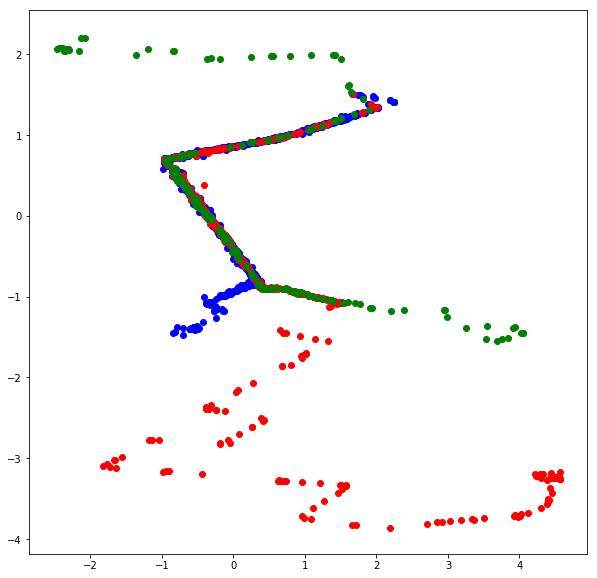

In [185]:
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print (accuracy)
z=rf.predict(X_test)
l=0
xone=list()
yone=list()
xtwo=list()
ytwo=list()
xthree=list()
ythree=list()
for i in z:
    if i=='0':
        xone.append(X_test[l][1])
        yone.append(X_test[l][0])
    if i=='1':
        xtwo.append(X_test[l][1])
        ytwo.append(X_test[l][0])
        
    if i=='2':
        xthree.append(X_test[l][1])
        ythree.append(X_test[l][0])
        
    l+=1
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
print (z)
print (Counter(z))
print(metrics.classification_report(y_test, z))

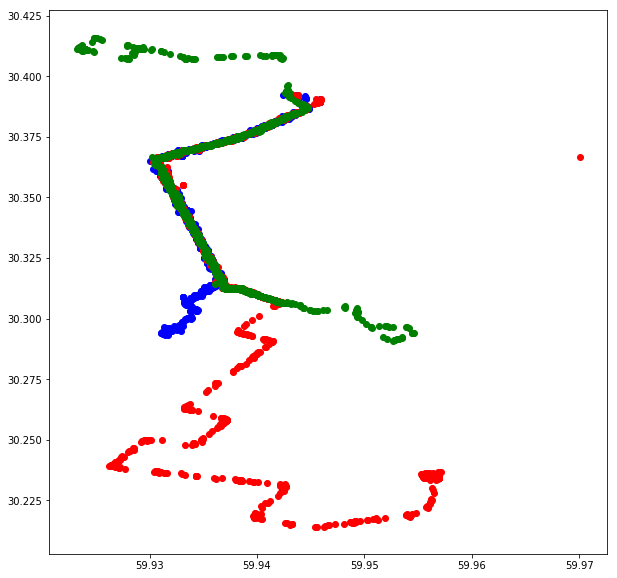

In [30]:
xr=data_upload[(data_upload.label!='?') & (data_upload.label!='-')]
one=xr[xr.label=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.label=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.label=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')

(5000, 16)

Counter({'0': 2434, '1': 1819, '2': 747})


5000

log        lat     to0_x     to1_x     to2_x    ind  request_ts  \
0  30.355488  59.931679  0.000036  0.000038  0.000000     18  1512244373   
1  30.355488  59.931679  0.000036  0.000038  0.000000  53185  1512244373   
2  30.294598  59.938126  0.005204  0.000000  0.011129     85  1512058457   
3  30.294598  59.938126  0.005204  0.000000  0.011129  26524  1512058457   
4  30.294598  59.938126  0.005204  0.000000  0.011129  37298  1512058457   

     trans_ts label day_sat hour_sat minute_sat sec_sat day hour minute sec  \
0  1512244363     2       2       22         52      53   2   22     52  43   
1  1512244363     2       2       22         52      53   2   22     52  43   
2  1512058432     1      30       19         14      17  30   19     13  52   
3  1512058432     1      30       19         14      17  30   19     13  52   
4  1512058432     1      30       19         14      17  30   19     13  52   

      to0_y     to1_y     to2_y  
0  0.000036  0.000038  0.000067  
1  0.000036  0.000038  0.000067  
2  0.005204  0.000290  0.011129  
3  0.005204  0.000290  0.011129  
4  0.005204  0.000290  0.011129

11
18
41
42
56
71
85
99
106
115
120
132
133
135
159
160
164
180
183
207
235
244
256
265
272
280
281
286
292
303
306
334
336
353
359
370
391
394
413
428
438
442
452
455
456
503
529
535
545
554
580
582
584
586
594
616
643
649
661
664
666
677
680
683
702
707
710
714
722
724
730
734
742
753
776
777
787
802
805
810
837
840
855
856
858
869
885
909
919
920
953
956
957
959
966
987
990
993
997
1054
1059
1076
1085
1087
1098
1107
1109
1110
1116
1148
1181
1191
1195
1196
1199
1228
1236
1244
1263
1275
1276
1277
1304
1312
1313
1314
1353
1374
1383
1387
1390
1400
1402
1407
1410
1425
1430
1458
1483
1488
1500
1529
1555
1576
1578
1602
1619
1623
1637
1664
1682
1686
1693
1705
1708
1712
1729
1751
1752
1757
1779
1786
1795
1803
1816
1832
1848
1856
1860
1872
1887
1894
1914
1921
1926
1957
1959
1961
1978
1980
1982
1988
1991
1994
1996
2023
2027
2032
2042
2044
2051
2053
2054
2065
2072
2086
2125
2136
2142
2199
2217
2274
2298
2321
2323
2336
2369
2378
2386
2395
2403
2409
2415
2416
2433
2434
2436
2450
2467
2487
2490
24

17819
17823
17827
17837
17846
17858
17868
17869
17875
17876
17898
17912
17926
17944
17954
17960
17961
17968
18002
18013
18060
18063
18067
18073
18093
18112
18118
18126
18152
18165
18174
18184
18187
18209
18218
18230
18245
18250
18273
18297
18308
18328
18348
18397
18400
18405
18407
18412
18413
18423
18432
18441
18447
18474
18478
18525
18529
18545
18546
18550
18561
18570
18576
18589
18591
18622
18632
18639
18665
18677
18685
18699
18712
18713
18727
18741
18748
18766
18776
18779
18800
18809
18822
18837
18866
18873
18889
18908
18912
18919
18952
18958
18959
18979
18993
19046
19064
19083
19086
19099
19112
19118
19152
19154
19160
19174
19179
19221
19224
19245
19269
19285
19301
19305
19306
19313
19314
19317
19335
19338
19346
19348
19359
19378
19403
19404
19432
19474
19485
19506
19513
19515
19526
19528
19533
19568
19580
19591
19594
19595
19649
19682
19715
19716
19740
19762
19785
19786
19800
19809
19815
19819
19821
19834
19848
19854
19857
19861
19865
19872
19875
19880
19893
19912
19926
19930
1993

35527
35551
35578
35610
35615
35648
35667
35676
35681
35688
35691
35747
35748
35765
35802
35804
35809
35817
35820
35833
35847
35859
35874
35893
35894
35895
35901
35904
35910
35924
35928
35929
35956
35960
35966
35978
35987
35995
36005
36008
36009
36018
36028
36035
36055
36068
36101
36107
36134
36145
36148
36177
36185
36217
36229
36234
36242
36249
36252
36264
36278
36281
36302
36323
36333
36340
36348
36350
36358
36402
36414
36432
36433
36434
36436
36442
36466
36467
36490
36512
36518
36525
36530
36537
36539
36580
36593
36622
36642
36652
36667
36686
36699
36702
36713
36715
36724
36728
36734
36772
36792
36802
36812
36825
36836
36842
36851
36875
36896
36923
36925
36926
36932
36949
36959
36962
36968
36995
37003
37028
37031
37040
37045
37071
37086
37087
37122
37139
37155
37189
37220
37222
37224
37225
37229
37259
37272
37282
37293
37298
37322
37329
37366
37371
37381
37404
37405
37425
37435
37452
37470
37472
37473
37494
37498
37533
37548
37569
37585
37614
37636
37657
37660
37662
37664
37672
3770

52001
52006
52008
52024
52035
52039
52040
52063
52071
52072
52082
52086
52097
52134
52138
52139
52147
52152
52193
52204
52279
52294
52334
52343
52363
52370
52395
52425
52428
52432
52461
52479
52484
52486
52509
52538
52555
52566
52573
52584
52609
52659
52667
52677
52686
52729
52734
52740
52773
52776
52785
52787
52788
52791
52800
52802
52814
52828
52833
52834
52835
52839
52858
52860
52863
52868
52885
52897
52907
52915
52931
52935
52942
52945
52946
53008
53009
53041
53066
53093
53095
53099
53104
53105
53130
53132
53137
53162
53170
53178
53181
53185
53190
53194
53208
53216
53242
53243
53255
53258
53262
53263
53273
53298
53310
53311
53314
53340
53344
53353
53365
53377
53380
53386
53396
53397
53399
53421
53422
53441
53472
53477
53479
53486
53490
53499
53513
53529
53569
53573
53579
53580
53581
53587
53611
53620
53627
53638
53651
53652
53661
53672
53674
53682
53683
53689
53693
53696
53704
53739
53766
53785
53811
53824
53826
53831
53837
53840
53851
53854
53878
53884
53889
53897
53901
53915
5393

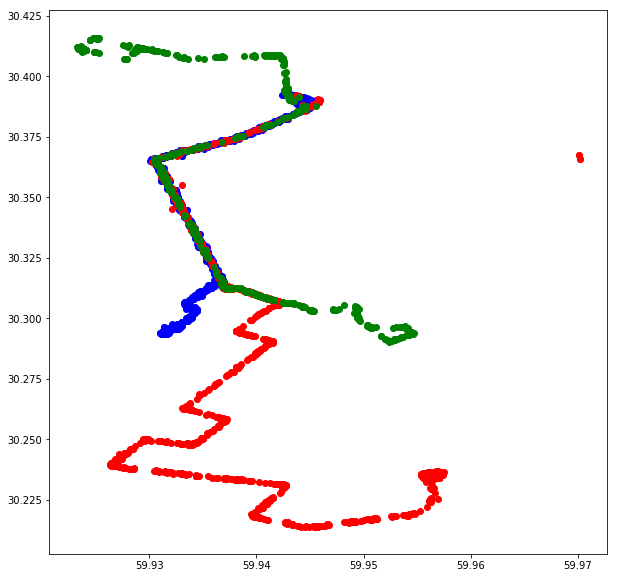

In [276]:
#questions=questions.drop(['trans_ts','request_ts'],axis=1)
#questions=questions.drop(['guess'],axis=1)
rf.fit(X, y) 
display(questions.shape)
out = open('res1.txt', 'w')
z=rf.predict(question)
print (Counter(z))
ff=pd.DataFrame(z,columns=['z'])
ff=ff.reindex(questions.index.values)
ff['z']=z
xr=questions
xr=xr.join(ff, lsuffix='_caller', rsuffix='_other')
one=xr[xr.z=='0']
xone=list(one['lat'])
yone=list(one['log'])
two=xr[xr.z=='1']
xtwo=list(two['lat'])
ytwo=list(two['log'])
three=xr[xr.z=='2']
xthree=list(three['lat'])
ythree=list(three['log'])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xone,yone,facecolor='blue')
ax.scatter(xtwo,ytwo,facecolor='red')
ax.scatter(xthree,ythree,facecolor='green')
display(len(questions['same']))
qs=questions

display(fited.head())
lb=list(fited['label'])
fit_ind=list(fited['ind'])

result=list()
a=0
for i,j in qs.iterrows():
    if j[15]==1:
        l=0
        for v in fit_ind:
            if v==i:
                result.append(lb[l])
                break
            l+=1
    else:
        result.append(z[a])
        a+=1
    print(i)
print(result)
print(len(result))
for i in result:
    out.write(i + '\n') 
out.close()

In [197]:
res=[53166, 53166, 18233, 18233, 18233, 18233, 18233, 161, 284, 51789, 316, 414, 729, 30467, 1135, 1580, 1707, 1774, 27902, 1932, 2542, 2542, 2028, 2084, 2464, 2460, 2596, 35663, 2784, 35144, 35144, 35144, 35144, 7447, 7447, 3047, 3047, 35677, 3145, 17600, 17600, 17600, 17600, 9460, 3536, 3488, 3568, 3645, 3519, 3519, 3862, 4474, 4606, 4773, 4773, 7206, 4829, 4829, 47038, 5642, 5782, 5870, 6023, 6371, 6424, 6496, 6743, 20809, 6842, 7150, 7192, 1922, 7204, 7262, 7381, 7397, 28861, 7800, 7819, 7819, 39496, 7945, 8200, 8200, 8271, 8747, 8352, 8824, 8999, 9030, 9158, 9506, 9706, 9952, 10081, 10217, 10217, 57703, 57703, 10328, 17986, 10692, 10704, 50177, 50177, 50177, 50177, 50177, 10751, 17356, 17356, 17356, 17356, 10866, 10830, 10788, 11029, 11439, 11400, 11588, 11332, 11715, 11737, 11737, 41425, 41425, 12249, 12447, 12862, 12723, 13030, 12989, 13219, 13389, 13611, 13650, 502, 13833, 13881, 10127, 10127, 10127, 10127, 57816, 31587, 14530, 14695, 50416, 15011, 15011, 58510, 15101, 15281, 33642, 15372, 21800, 21800, 21800, 15605, 15800, 33700, 15983, 16095, 16163, 16273, 16547, 16578, 16816, 17023, 53031, 17616, 17854, 18512, 18737, 19014, 19014, 19059, 19012, 13782, 23867, 23867, 23867, 19532, 15220, 19877, 19884, 41673, 20185, 20197, 20397, 44359, 20515, 20721, 20721, 440, 20983, 21078, 21107, 21116, 20117, 21466, 25165, 25165, 25165, 26618, 16710, 22282, 22407, 7311, 17352, 23496, 19409, 24394, 24394, 24394, 23811, 23878, 34721, 34721, 58262, 58262, 24270, 24545, 24545, 24487, 24487, 24487, 24617, 45947, 24864, 24943, 24906, 25501, 25532, 25739, 25967, 25967, 26212, 26433, 26745, 34827, 26890, 26890, 27028, 27204, 28080, 27399, 25913, 27525, 27686, 37090, 28058, 28182, 2368, 15901, 15901, 28469, 33604, 28554, 38111, 28603, 25754, 48172, 29075, 29051, 29197, 29295, 29752, 29752, 29752, 6125, 6396, 50153, 30096, 30202, 30149, 30228, 30343, 31458, 30691, 25378, 6024, 6024, 30869, 31115, 31093, 31343, 50408, 50408, 3821, 32286, 31299, 32405, 32540, 32907, 57864, 33236, 33368, 33812, 33812, 33812, 33821, 34373, 34659, 34659, 34659, 35100, 34954, 35262, 35262, 35245, 35556, 25228, 25228, 36070, 36169, 36516, 36516, 26886, 36465, 36441, 36697, 6530, 32375, 36806, 13631, 13631, 37156, 37080, 37080, 37252, 35846, 35846, 35846, 35846, 13461, 38201, 38271, 38672, 38672, 38625, 38627, 38968, 39026, 39184, 39211, 39287, 47753, 20450, 39829, 39832, 39993, 40423, 40440, 40960, 41217, 39456, 39456, 41569, 41618, 41796, 22542, 22542, 42009, 42233, 42283, 42283, 42906, 42918, 43041, 43041, 43368, 43365, 43601, 43706, 43825, 43888, 43952, 44119, 44372, 44940, 45366, 45459, 45616, 45960, 49611, 46560, 46659, 50699, 47066, 47127, 47127, 47312, 47551, 47551, 47669, 47729, 47922, 47869, 48307, 48307, 48365, 32668, 1206, 2551, 2551, 2551, 48786, 15230, 15230, 15230, 49180, 49254, 49336, 49344, 27141, 49702, 49712, 49868, 49876, 49943, 50037, 44781, 50056, 50189, 50216, 50294, 50403, 8309, 50537, 50612, 50674, 50628, 21213, 51088, 51518, 10635, 52505, 52558, 51473, 52922, 52882, 53384, 53413, 53413, 53391, 53391, 53489, 53565, 53539, 53566, 53604, 408, 38362, 53883, 54242, 54256, 54438, 54494, 54635, 54642, 54869, 55251, 55792, 56060, 56377, 56644, 56649, 28794, 57190, 57379, 57744, 2644, 54039, 54039, 57944, 58156, 58172, 58294, 58452, 58563, 58592]
print(len(result))

482


In [58]:
#data=pd.concat([samepos_data, data])
#display(data)

log        lat  request_ts    trans_ts label
0      30.295780  59.932167  1511956948  1511956936     0
1      30.295780  59.932167  1511957190  1511956981     0
2      30.295780  59.932167  1511957310  1511956981     0
3      30.295780  59.932167  1511975562  1511975540     0
4      30.295780  59.932167  1512026532  1512026521     0
5      30.295780  59.932167  1512026653  1512026621     0
6      30.295780  59.932167  1512026774  1512026761     0
7      30.295780  59.932167  1512044274  1512044268     0
8      30.295780  59.932167  1512044395  1512044348     0
9      30.295780  59.932167  1512049012  1512048901     0
10     30.295780  59.932167  1512069019  1512069008     0
11     30.295780  59.932167  1512074026  1512074013     0
12     30.295780  59.932167  1512102055  1512102035     0
13     30.295780  59.932167  1512102176  1512102035     0
14     30.295780  59.932167  1512102297  1512102035     0
15     30.295780  59.932167  1512102417  1512102035     0
16     30.295780  59.932167  1512103383  1512103378     0
17     30.295780  59.932167  1512103504  1512103478     0
18     30.295780  59.932167  1512107246  1512107221     0
19     30.295780  59.932167  1512107366  1512107341     0
20     30.295780  59.932167  1512107487  1512107466     0
21     30.295780  59.932167  1512111741  1512111721     0
22     30.295780  59.932167  1512111862  1512111721     0
23     30.295780  59.932167  1512112103  1512111721     0
24     30.295780  59.932167  1512112224  1512111721     0
25     30.295780  59.932167  1512112345  1512111721     0
26     30.295780  59.932167  1512112466  1512111721     0
27     30.295780  59.932167  1512112707  1512112680     0
28     30.295780  59.932167  1512145137  1512145121     0
29     30.295780  59.932167  1512157569  1512157526     0
...          ...        ...         ...         ...   ...
58493  30.355076  59.931911  1512301581  1512301577     0
58496  30.377714  59.939991  1512301611  1512301602     0
58498  30.357040  59.931484  1512301611  1512301607     0
58500  30.371246  59.935051  1512301641  1512301629     2
58505  30.372692  59.936245  1512301671  1512301655     1
58510  30.348333  59.932690  1512301671  1512301666     2
58516  30.369387  59.933323  1512301702  1512301689     2
58519  30.311445  59.939205  1512301732  1512301622     1
58531  30.368818  59.932781  1512301762  1512301760     1
58544  30.366373  59.930962  1512301822  1512301814     2
58545  30.390005  59.945950  1512301822  1512301816     1
58548  30.366184  59.930984  1512301822  1512301820     1
58554  30.374598  59.938137  1512301883  1512301872     1
58560  30.364706  59.930397  1512301913  1512301900     1
58563  30.335690  59.934261  1512301943  1512301907     0
58572  30.306583  59.933365  1512301943  1512301940     0
58574  30.380257  59.941254  1512301973  1512301952     1
58577  30.365887  59.930676  1512302003  1512301989     2
58584  30.331049  59.934822  1512302033  1512301926     2
58592  30.234760  59.955654  1512302064  1512302030     1
58594  30.323730  59.935715  1512302064  1512302051     2
58610  30.317116  59.936504  1512302154  1512302131     2
58630  30.306377  59.942505  1512302245  1512302223     2
58633  30.346596  59.932594  1512302245  1512302239     2
58636  30.312685  59.937798  1512302275  1512302256     2
58641  30.306583  59.933365  1512302305  1512302205     0
58653  30.342030  59.933289  1512302335  1512302324     2
58655  30.370579  59.934475  1512302365  1512302342     0
58657  30.363417  59.930714  1512302365  1512302351     0
58662  30.306704  59.933582  1512302395  1512302377     0

[68438 rows x 5 columns]